In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import h5py
from sklearn import preprocessing
from matplotlib.pyplot import figure
import pandas as pd
from sklearn import datasets
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree

In [6]:
def load_data(name):
    with h5py.File(f'{name}.h5', 'r') as f:
        filename = name.split('/')[0]
        return pd.DataFrame(f[filename][:], dtype=np.float64)

train = load_data('train')[1849:40000]
test  = load_data('test')[:38513]

In [7]:
all_variables = ['p_Eratio', 'p_E5x7_Lr2' , 'p_E3x5_Lr0', 'p_asy1', 'p_eClusterLr2',
 'p_e235', 'p_E_Lr3_HiG' ,'p_e255', 'p_maxEcell_energy', 'p_ambiguityType', 'p_e132', 'p_E7x7_Lr0']

trainR = train.loc[train['Truth'] == 1]

xtrain = trainR[all_variables]
ytrain = trainR['p_truth_E']
xtest = test[all_variables]

xtrain = xtrain.to_numpy()
ytrain = ytrain.to_numpy()
#ytrain = preprocessing.normalize([ytrain]).T
xtest = xtest.to_numpy()

print(xtrain.shape)
print(ytrain.shape)
print(xtest.shape)

(28513, 12)
(28513,)
(38513, 12)


In [9]:
#List of Best Features from GridSearch below
{'max_features': 'auto',
 'max_leaf_nodes': None,
 'min_samples_leaf': 1,
 'min_weight_fraction_leaf': 0.2,
 'splitter': 'best'}

regressor  = DecisionTreeRegressor(random_state=0, max_depth = 100, max_features = 'auto', max_leaf_nodes = None, min_samples_leaf = 1, min_weight_fraction_leaf = .2, splitter = 'best')
model = regressor.fit(xtrain, ytrain)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


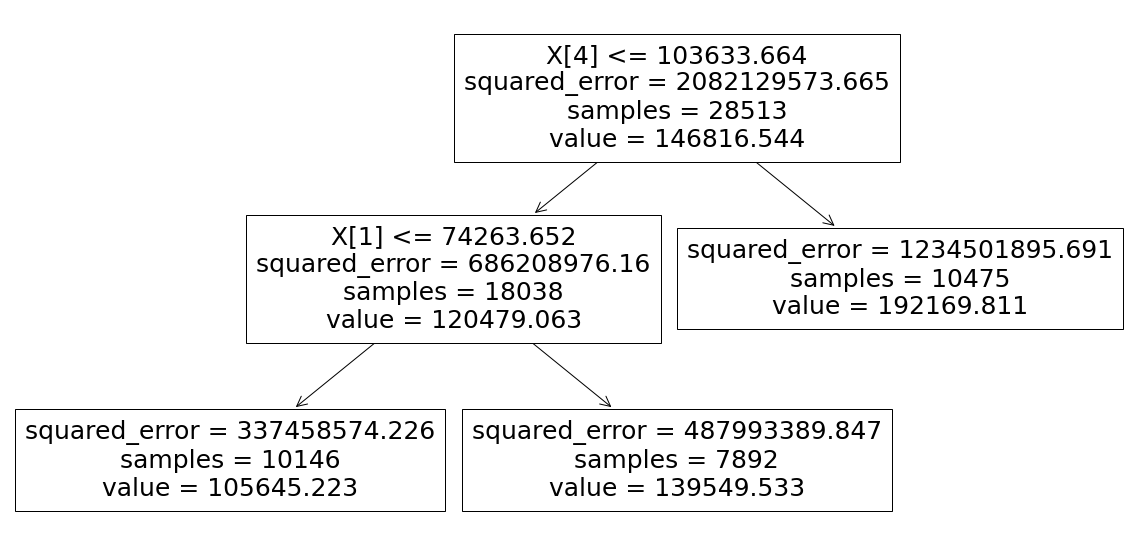

In [10]:
plt.rcParams['figure.figsize'] = [20,10]
fig = tree.plot_tree(model, max_depth = 10) 


In [15]:
ytest = model.predict(xtest)
ytest = pd.DataFrame(ytest)
predictions.to_csv('Regression_CooperNicolaysen_DecisionTreeRegressor.csv', header = False, index = True)

AttributeError: 'numpy.ndarray' object has no attribute 'to_csv'

In [36]:
parameters={"splitter":["best","random"],
            #"max_depth" : [1,3,5,7,9,11,12],
           "min_samples_leaf":[1,2,3,4,5,6,7,8,9,10],
           "min_weight_fraction_leaf":[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9],
           "max_features":["auto","log2","sqrt",None],
           "max_leaf_nodes":[None,10,20,30,40,50,60,70,80,90] }
from sklearn.model_selection import GridSearchCV
tuning_model=GridSearchCV(model,param_grid=parameters,scoring='neg_mean_squared_error',cv=3,verbose=3)
X=train.iloc[:,:-1]
y=train.iloc[:,-1]

tuning_model.fit(X,y)

Fitting 3 folds for each of 7200 candidates, totalling 21600 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 1/3] END max_features=auto, max_leaf_nodes=None, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=best;, score=-368525830.834 total time=   9.2s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 2/3] END max_features=auto, max_leaf_nodes=None, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=best;, score=-29015770.050 total time=   9.6s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 3/3] END max_features=auto, max_leaf_nodes=None, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=best;, score=-378947587.990 total time=   8.6s
[CV 1/3] END max_features=auto, max_leaf_nodes=None, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=random;, score=-377315072.730 total time=   0.0s
[CV 2/3] END max_features=auto, max_leaf_nodes=None, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=random;, score=-13802106.765 total time=   0.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 3/3] END max_features=auto, max_leaf_nodes=None, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=random;, score=-377387684.963 total time=   0.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 1/3] END max_features=auto, max_leaf_nodes=None, min_samples_leaf=1, min_weight_fraction_leaf=0.2, splitter=best;, score=-360910680.225 total time=   8.1s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 2/3] END max_features=auto, max_leaf_nodes=None, min_samples_leaf=1, min_weight_fraction_leaf=0.2, splitter=best;, score=-22225844.513 total time=   8.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 3/3] END max_features=auto, max_leaf_nodes=None, min_samples_leaf=1, min_weight_fraction_leaf=0.2, splitter=best;, score=-376775304.109 total time=   6.3s
[CV 1/3] END max_features=auto, max_leaf_nodes=None, min_samples_leaf=1, min_weight_fraction_leaf=0.2, splitter=random;, score=-377356250.079 total time=   0.0s
[CV 2/3] END max_features=auto, max_leaf_nodes=None, min_samples_leaf=1, min_weight_fraction_leaf=0.2, splitter=random;, score=-13507120.101 total time=   0.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 3/3] END max_features=auto, max_leaf_nodes=None, min_samples_leaf=1, min_weight_fraction_leaf=0.2, splitter=random;, score=-377351667.637 total time=   0.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 1/3] END max_features=auto, max_leaf_nodes=None, min_samples_leaf=1, min_weight_fraction_leaf=0.3, splitter=best;, score=-380764080.363 total time=   6.6s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 2/3] END max_features=auto, max_leaf_nodes=None, min_samples_leaf=1, min_weight_fraction_leaf=0.3, splitter=best;, score=-14905995.183 total time=   5.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 3/3] END max_features=auto, max_leaf_nodes=None, min_samples_leaf=1, min_weight_fraction_leaf=0.3, splitter=best;, score=-376428477.120 total time=   6.3s
[CV 1/3] END max_features=auto, max_leaf_nodes=None, min_samples_leaf=1, min_weight_fraction_leaf=0.3, splitter=random;, score=-377356250.079 total time=   0.0s
[CV 2/3] END max_features=auto, max_leaf_nodes=None, min_samples_leaf=1, min_weight_fraction_leaf=0.3, splitter=random;, score=-13507120.101 total time=   0.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 3/3] END max_features=auto, max_leaf_nodes=None, min_samples_leaf=1, min_weight_fraction_leaf=0.3, splitter=random;, score=-377392391.696 total time=   0.0s
[CV 1/3] END max_features=auto, max_leaf_nodes=None, min_samples_leaf=1, min_weight_fraction_leaf=0.4, splitter=best;, score=-376193517.071 total time=   5.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 2/3] END max_features=auto, max_leaf_nodes=None, min_samples_leaf=1, min_weight_fraction_leaf=0.4, splitter=best;, score=-14905995.183 total time=   5.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 3/3] END max_features=auto, max_leaf_nodes=None, min_samples_leaf=1, min_weight_fraction_leaf=0.4, splitter=best;, score=-377244769.226 total time=   5.0s
[CV 1/3] END max_features=auto, max_leaf_nodes=None, min_samples_leaf=1, min_weight_fraction_leaf=0.4, splitter=random;, score=-377393069.784 total time=   0.0s
[CV 2/3] END max_features=auto, max_leaf_nodes=None, min_samples_leaf=1, min_weight_fraction_leaf=0.4, splitter=random;, score=-13484883.945 total time=   0.0s
[CV 3/3] END max_features=auto, max_leaf_nodes=None, min_samples_leaf=1, min_weight_fraction_leaf=0.4, splitter=random;, score=-377392391.696 total time=   0.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 1/3] END max_features=auto, max_leaf_nodes=None, min_samples_leaf=1, min_weight_fraction_leaf=0.5, splitter=best;, score=-376718810.979 total time=   5.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 2/3] END max_features=auto, max_leaf_nodes=None, min_samples_leaf=1, min_weight_fraction_leaf=0.5, splitter=best;, score=-13921919.251 total time=   5.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 3/3] END max_features=auto, max_leaf_nodes=None, min_samples_leaf=1, min_weight_fraction_leaf=0.5, splitter=best;, score=-376487885.316 total time=   5.0s
[CV 1/3] END max_features=auto, max_leaf_nodes=None, min_samples_leaf=1, min_weight_fraction_leaf=0.5, splitter=random;, score=-377351540.917 total time=   0.0s
[CV 2/3] END max_features=auto, max_leaf_nodes=None, min_samples_leaf=1, min_weight_fraction_leaf=0.5, splitter=random;, score=-13476840.667 total time=   0.0s
[CV 3/3] END max_features=auto, max_leaf_nodes=None, min_samples_leaf=1, min_weight_fraction_leaf=0.5, splitter=random;, score=-377351540.917 total time=   0.0s
[CV 1/3] END max_features=auto, max_leaf_nodes=None, min_samples_leaf=1, min_weight_fraction_leaf=0.6, splitter=best;, score=nan total time=   0.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 2/3] END max_features=auto, max_leaf_nodes=None, min_samples_leaf=1, min_weight_fraction_leaf=0.6, splitter=best;, score=nan total time=   0.0s
[CV 3/3] END max_features=auto, max_leaf_nodes=None, min_samples_leaf=1, min_weight_fraction_leaf=0.6, splitter=best;, score=nan total time=   0.0s
[CV 1/3] END max_features=auto, max_leaf_nodes=None, min_samples_leaf=1, min_weight_fraction_leaf=0.6, splitter=random;, score=nan total time=   0.0s
[CV 2/3] END max_features=auto, max_leaf_nodes=None, min_samples_leaf=1, min_weight_fraction_leaf=0.6, splitter=random;, score=nan total time=   0.0s
[CV 3/3] END max_features=auto, max_leaf_nodes=None, min_samples_leaf=1, min_weight_fraction_leaf=0.6, splitter=random;, score=nan total time=   0.0s
[CV 1/3] END max_features=auto, max_leaf_nodes=None, min_samples_leaf=1, min_weight_fraction_leaf=0.7, splitter=best;, score=nan total time=   0.0s
[CV 2/3] END max_features=auto, max_leaf_nodes=None, min_samples_leaf=1, min_weight_fraction_leaf=0.7, spl

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 1/3] END max_features=auto, max_leaf_nodes=None, min_samples_leaf=2, min_weight_fraction_leaf=0.1, splitter=best;, score=-368525830.834 total time=   9.2s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 2/3] END max_features=auto, max_leaf_nodes=None, min_samples_leaf=2, min_weight_fraction_leaf=0.1, splitter=best;, score=-29015770.050 total time=   9.6s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 3/3] END max_features=auto, max_leaf_nodes=None, min_samples_leaf=2, min_weight_fraction_leaf=0.1, splitter=best;, score=-378947587.990 total time=   8.6s
[CV 1/3] END max_features=auto, max_leaf_nodes=None, min_samples_leaf=2, min_weight_fraction_leaf=0.1, splitter=random;, score=-377315072.730 total time=   0.0s
[CV 2/3] END max_features=auto, max_leaf_nodes=None, min_samples_leaf=2, min_weight_fraction_leaf=0.1, splitter=random;, score=-13802106.765 total time=   0.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 3/3] END max_features=auto, max_leaf_nodes=None, min_samples_leaf=2, min_weight_fraction_leaf=0.1, splitter=random;, score=-377387684.963 total time=   0.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 1/3] END max_features=auto, max_leaf_nodes=None, min_samples_leaf=2, min_weight_fraction_leaf=0.2, splitter=best;, score=-360910680.225 total time=   8.1s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 2/3] END max_features=auto, max_leaf_nodes=None, min_samples_leaf=2, min_weight_fraction_leaf=0.2, splitter=best;, score=-22225844.513 total time=   8.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 3/3] END max_features=auto, max_leaf_nodes=None, min_samples_leaf=2, min_weight_fraction_leaf=0.2, splitter=best;, score=-376775304.109 total time=   6.3s
[CV 1/3] END max_features=auto, max_leaf_nodes=None, min_samples_leaf=2, min_weight_fraction_leaf=0.2, splitter=random;, score=-377356250.079 total time=   0.0s
[CV 2/3] END max_features=auto, max_leaf_nodes=None, min_samples_leaf=2, min_weight_fraction_leaf=0.2, splitter=random;, score=-13507120.101 total time=   0.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 3/3] END max_features=auto, max_leaf_nodes=None, min_samples_leaf=2, min_weight_fraction_leaf=0.2, splitter=random;, score=-377351667.637 total time=   0.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 1/3] END max_features=auto, max_leaf_nodes=None, min_samples_leaf=2, min_weight_fraction_leaf=0.3, splitter=best;, score=-380764080.363 total time=   6.6s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 2/3] END max_features=auto, max_leaf_nodes=None, min_samples_leaf=2, min_weight_fraction_leaf=0.3, splitter=best;, score=-14905995.183 total time=   5.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 3/3] END max_features=auto, max_leaf_nodes=None, min_samples_leaf=2, min_weight_fraction_leaf=0.3, splitter=best;, score=-376428477.120 total time=   6.2s
[CV 1/3] END max_features=auto, max_leaf_nodes=None, min_samples_leaf=2, min_weight_fraction_leaf=0.3, splitter=random;, score=-377356250.079 total time=   0.0s
[CV 2/3] END max_features=auto, max_leaf_nodes=None, min_samples_leaf=2, min_weight_fraction_leaf=0.3, splitter=random;, score=-13507120.101 total time=   0.0s
[CV 3/3] END max_features=auto, max_leaf_nodes=None, min_samples_leaf=2, min_weight_fraction_leaf=0.3, splitter=random;, score=-377392391.696 total time=   0.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 1/3] END max_features=auto, max_leaf_nodes=None, min_samples_leaf=2, min_weight_fraction_leaf=0.4, splitter=best;, score=-376193517.071 total time=   5.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 2/3] END max_features=auto, max_leaf_nodes=None, min_samples_leaf=2, min_weight_fraction_leaf=0.4, splitter=best;, score=-14905995.183 total time=   5.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 3/3] END max_features=auto, max_leaf_nodes=None, min_samples_leaf=2, min_weight_fraction_leaf=0.4, splitter=best;, score=-377244769.226 total time=   5.0s
[CV 1/3] END max_features=auto, max_leaf_nodes=None, min_samples_leaf=2, min_weight_fraction_leaf=0.4, splitter=random;, score=-377393069.784 total time=   0.0s
[CV 2/3] END max_features=auto, max_leaf_nodes=None, min_samples_leaf=2, min_weight_fraction_leaf=0.4, splitter=random;, score=-13484883.945 total time=   0.0s
[CV 3/3] END max_features=auto, max_leaf_nodes=None, min_samples_leaf=2, min_weight_fraction_leaf=0.4, splitter=random;, score=-377392391.696 total time=   0.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 1/3] END max_features=auto, max_leaf_nodes=None, min_samples_leaf=2, min_weight_fraction_leaf=0.5, splitter=best;, score=-376718810.979 total time=   5.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 2/3] END max_features=auto, max_leaf_nodes=None, min_samples_leaf=2, min_weight_fraction_leaf=0.5, splitter=best;, score=-13921919.251 total time=   5.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 3/3] END max_features=auto, max_leaf_nodes=None, min_samples_leaf=2, min_weight_fraction_leaf=0.5, splitter=best;, score=-376487885.316 total time=   5.0s
[CV 1/3] END max_features=auto, max_leaf_nodes=None, min_samples_leaf=2, min_weight_fraction_leaf=0.5, splitter=random;, score=-377351540.917 total time=   0.0s
[CV 2/3] END max_features=auto, max_leaf_nodes=None, min_samples_leaf=2, min_weight_fraction_leaf=0.5, splitter=random;, score=-13476840.667 total time=   0.0s
[CV 3/3] END max_features=auto, max_leaf_nodes=None, min_samples_leaf=2, min_weight_fraction_leaf=0.5, splitter=random;, score=-377351540.917 total time=   0.0s
[CV 1/3] END max_features=auto, max_leaf_nodes=None, min_samples_leaf=2, min_weight_fraction_leaf=0.6, splitter=best;, score=nan total time=   0.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 2/3] END max_features=auto, max_leaf_nodes=None, min_samples_leaf=2, min_weight_fraction_leaf=0.6, splitter=best;, score=nan total time=   0.0s
[CV 3/3] END max_features=auto, max_leaf_nodes=None, min_samples_leaf=2, min_weight_fraction_leaf=0.6, splitter=best;, score=nan total time=   0.0s
[CV 1/3] END max_features=auto, max_leaf_nodes=None, min_samples_leaf=2, min_weight_fraction_leaf=0.6, splitter=random;, score=nan total time=   0.0s
[CV 2/3] END max_features=auto, max_leaf_nodes=None, min_samples_leaf=2, min_weight_fraction_leaf=0.6, splitter=random;, score=nan total time=   0.0s
[CV 3/3] END max_features=auto, max_leaf_nodes=None, min_samples_leaf=2, min_weight_fraction_leaf=0.6, splitter=random;, score=nan total time=   0.0s
[CV 1/3] END max_features=auto, max_leaf_nodes=None, min_samples_leaf=2, min_weight_fraction_leaf=0.7, splitter=best;, score=nan total time=   0.0s
[CV 2/3] END max_features=auto, max_leaf_nodes=None, min_samples_leaf=2, min_weight_fraction_leaf=0.7, spl

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 1/3] END max_features=auto, max_leaf_nodes=None, min_samples_leaf=3, min_weight_fraction_leaf=0.1, splitter=best;, score=-368525830.834 total time=   9.2s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 2/3] END max_features=auto, max_leaf_nodes=None, min_samples_leaf=3, min_weight_fraction_leaf=0.1, splitter=best;, score=-29015770.050 total time=   9.6s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 3/3] END max_features=auto, max_leaf_nodes=None, min_samples_leaf=3, min_weight_fraction_leaf=0.1, splitter=best;, score=-378947587.990 total time=   8.6s
[CV 1/3] END max_features=auto, max_leaf_nodes=None, min_samples_leaf=3, min_weight_fraction_leaf=0.1, splitter=random;, score=-377315072.730 total time=   0.0s
[CV 2/3] END max_features=auto, max_leaf_nodes=None, min_samples_leaf=3, min_weight_fraction_leaf=0.1, splitter=random;, score=-13802106.765 total time=   0.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 3/3] END max_features=auto, max_leaf_nodes=None, min_samples_leaf=3, min_weight_fraction_leaf=0.1, splitter=random;, score=-377387684.963 total time=   0.0s
[CV 1/3] END max_features=auto, max_leaf_nodes=None, min_samples_leaf=3, min_weight_fraction_leaf=0.2, splitter=best;, score=-360910680.225 total time=   8.1s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 2/3] END max_features=auto, max_leaf_nodes=None, min_samples_leaf=3, min_weight_fraction_leaf=0.2, splitter=best;, score=-22225844.513 total time=   8.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 3/3] END max_features=auto, max_leaf_nodes=None, min_samples_leaf=3, min_weight_fraction_leaf=0.2, splitter=best;, score=-376775304.109 total time=   6.3s
[CV 1/3] END max_features=auto, max_leaf_nodes=None, min_samples_leaf=3, min_weight_fraction_leaf=0.2, splitter=random;, score=-377356250.079 total time=   0.0s
[CV 2/3] END max_features=auto, max_leaf_nodes=None, min_samples_leaf=3, min_weight_fraction_leaf=0.2, splitter=random;, score=-13507120.101 total time=   0.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 3/3] END max_features=auto, max_leaf_nodes=None, min_samples_leaf=3, min_weight_fraction_leaf=0.2, splitter=random;, score=-377351667.637 total time=   0.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 1/3] END max_features=auto, max_leaf_nodes=None, min_samples_leaf=3, min_weight_fraction_leaf=0.3, splitter=best;, score=-380764080.363 total time=   6.6s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 2/3] END max_features=auto, max_leaf_nodes=None, min_samples_leaf=3, min_weight_fraction_leaf=0.3, splitter=best;, score=-14905995.183 total time=   5.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 3/3] END max_features=auto, max_leaf_nodes=None, min_samples_leaf=3, min_weight_fraction_leaf=0.3, splitter=best;, score=-376428477.120 total time=   6.3s
[CV 1/3] END max_features=auto, max_leaf_nodes=None, min_samples_leaf=3, min_weight_fraction_leaf=0.3, splitter=random;, score=-377356250.079 total time=   0.0s
[CV 2/3] END max_features=auto, max_leaf_nodes=None, min_samples_leaf=3, min_weight_fraction_leaf=0.3, splitter=random;, score=-13507120.101 total time=   0.0s
[CV 3/3] END max_features=auto, max_leaf_nodes=None, min_samples_leaf=3, min_weight_fraction_leaf=0.3, splitter=random;, score=-377392391.696 total time=   0.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 1/3] END max_features=auto, max_leaf_nodes=None, min_samples_leaf=3, min_weight_fraction_leaf=0.4, splitter=best;, score=-376193517.071 total time=   5.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 2/3] END max_features=auto, max_leaf_nodes=None, min_samples_leaf=3, min_weight_fraction_leaf=0.4, splitter=best;, score=-14905995.183 total time=   5.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 3/3] END max_features=auto, max_leaf_nodes=None, min_samples_leaf=3, min_weight_fraction_leaf=0.4, splitter=best;, score=-377244769.226 total time=   5.0s
[CV 1/3] END max_features=auto, max_leaf_nodes=None, min_samples_leaf=3, min_weight_fraction_leaf=0.4, splitter=random;, score=-377393069.784 total time=   0.0s
[CV 2/3] END max_features=auto, max_leaf_nodes=None, min_samples_leaf=3, min_weight_fraction_leaf=0.4, splitter=random;, score=-13484883.945 total time=   0.0s
[CV 3/3] END max_features=auto, max_leaf_nodes=None, min_samples_leaf=3, min_weight_fraction_leaf=0.4, splitter=random;, score=-377392391.696 total time=   0.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 1/3] END max_features=auto, max_leaf_nodes=None, min_samples_leaf=3, min_weight_fraction_leaf=0.5, splitter=best;, score=-376718810.979 total time=   5.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 2/3] END max_features=auto, max_leaf_nodes=None, min_samples_leaf=3, min_weight_fraction_leaf=0.5, splitter=best;, score=-13921919.251 total time=   5.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 3/3] END max_features=auto, max_leaf_nodes=None, min_samples_leaf=3, min_weight_fraction_leaf=0.5, splitter=best;, score=-376487885.316 total time=   5.0s
[CV 1/3] END max_features=auto, max_leaf_nodes=None, min_samples_leaf=3, min_weight_fraction_leaf=0.5, splitter=random;, score=-377351540.917 total time=   0.0s
[CV 2/3] END max_features=auto, max_leaf_nodes=None, min_samples_leaf=3, min_weight_fraction_leaf=0.5, splitter=random;, score=-13476840.667 total time=   0.0s
[CV 3/3] END max_features=auto, max_leaf_nodes=None, min_samples_leaf=3, min_weight_fraction_leaf=0.5, splitter=random;, score=-377351540.917 total time=   0.0s
[CV 1/3] END max_features=auto, max_leaf_nodes=None, min_samples_leaf=3, min_weight_fraction_leaf=0.6, splitter=best;, score=nan total time=   0.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 2/3] END max_features=auto, max_leaf_nodes=None, min_samples_leaf=3, min_weight_fraction_leaf=0.6, splitter=best;, score=nan total time=   0.0s
[CV 3/3] END max_features=auto, max_leaf_nodes=None, min_samples_leaf=3, min_weight_fraction_leaf=0.6, splitter=best;, score=nan total time=   0.0s
[CV 1/3] END max_features=auto, max_leaf_nodes=None, min_samples_leaf=3, min_weight_fraction_leaf=0.6, splitter=random;, score=nan total time=   0.0s
[CV 2/3] END max_features=auto, max_leaf_nodes=None, min_samples_leaf=3, min_weight_fraction_leaf=0.6, splitter=random;, score=nan total time=   0.0s
[CV 3/3] END max_features=auto, max_leaf_nodes=None, min_samples_leaf=3, min_weight_fraction_leaf=0.6, splitter=random;, score=nan total time=   0.0s
[CV 1/3] END max_features=auto, max_leaf_nodes=None, min_samples_leaf=3, min_weight_fraction_leaf=0.7, splitter=best;, score=nan total time=   0.0s
[CV 2/3] END max_features=auto, max_leaf_nodes=None, min_samples_leaf=3, min_weight_fraction_leaf=0.7, spl

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 1/3] END max_features=auto, max_leaf_nodes=None, min_samples_leaf=4, min_weight_fraction_leaf=0.1, splitter=best;, score=-368525830.834 total time=   9.2s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 2/3] END max_features=auto, max_leaf_nodes=None, min_samples_leaf=4, min_weight_fraction_leaf=0.1, splitter=best;, score=-29015770.050 total time=   9.7s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 3/3] END max_features=auto, max_leaf_nodes=None, min_samples_leaf=4, min_weight_fraction_leaf=0.1, splitter=best;, score=-378947587.990 total time=   8.6s
[CV 1/3] END max_features=auto, max_leaf_nodes=None, min_samples_leaf=4, min_weight_fraction_leaf=0.1, splitter=random;, score=-377315072.730 total time=   0.0s
[CV 2/3] END max_features=auto, max_leaf_nodes=None, min_samples_leaf=4, min_weight_fraction_leaf=0.1, splitter=random;, score=-13802106.765 total time=   0.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 3/3] END max_features=auto, max_leaf_nodes=None, min_samples_leaf=4, min_weight_fraction_leaf=0.1, splitter=random;, score=-377387684.963 total time=   0.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 1/3] END max_features=auto, max_leaf_nodes=None, min_samples_leaf=4, min_weight_fraction_leaf=0.2, splitter=best;, score=-360910680.225 total time=   8.2s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 2/3] END max_features=auto, max_leaf_nodes=None, min_samples_leaf=4, min_weight_fraction_leaf=0.2, splitter=best;, score=-22225844.513 total time=   8.1s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 3/3] END max_features=auto, max_leaf_nodes=None, min_samples_leaf=4, min_weight_fraction_leaf=0.2, splitter=best;, score=-376775304.109 total time=   6.3s
[CV 1/3] END max_features=auto, max_leaf_nodes=None, min_samples_leaf=4, min_weight_fraction_leaf=0.2, splitter=random;, score=-377356250.079 total time=   0.0s
[CV 2/3] END max_features=auto, max_leaf_nodes=None, min_samples_leaf=4, min_weight_fraction_leaf=0.2, splitter=random;, score=-13507120.101 total time=   0.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 3/3] END max_features=auto, max_leaf_nodes=None, min_samples_leaf=4, min_weight_fraction_leaf=0.2, splitter=random;, score=-377351667.637 total time=   0.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 1/3] END max_features=auto, max_leaf_nodes=None, min_samples_leaf=4, min_weight_fraction_leaf=0.3, splitter=best;, score=-380764080.363 total time=   6.6s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 2/3] END max_features=auto, max_leaf_nodes=None, min_samples_leaf=4, min_weight_fraction_leaf=0.3, splitter=best;, score=-14905995.183 total time=   5.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 3/3] END max_features=auto, max_leaf_nodes=None, min_samples_leaf=4, min_weight_fraction_leaf=0.3, splitter=best;, score=-376428477.120 total time=   6.3s
[CV 1/3] END max_features=auto, max_leaf_nodes=None, min_samples_leaf=4, min_weight_fraction_leaf=0.3, splitter=random;, score=-377356250.079 total time=   0.0s
[CV 2/3] END max_features=auto, max_leaf_nodes=None, min_samples_leaf=4, min_weight_fraction_leaf=0.3, splitter=random;, score=-13507120.101 total time=   0.0s
[CV 3/3] END max_features=auto, max_leaf_nodes=None, min_samples_leaf=4, min_weight_fraction_leaf=0.3, splitter=random;, score=-377392391.696 total time=   0.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 1/3] END max_features=auto, max_leaf_nodes=None, min_samples_leaf=4, min_weight_fraction_leaf=0.4, splitter=best;, score=-376193517.071 total time=   5.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 2/3] END max_features=auto, max_leaf_nodes=None, min_samples_leaf=4, min_weight_fraction_leaf=0.4, splitter=best;, score=-14905995.183 total time=   5.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 3/3] END max_features=auto, max_leaf_nodes=None, min_samples_leaf=4, min_weight_fraction_leaf=0.4, splitter=best;, score=-377244769.226 total time=   5.0s
[CV 1/3] END max_features=auto, max_leaf_nodes=None, min_samples_leaf=4, min_weight_fraction_leaf=0.4, splitter=random;, score=-377393069.784 total time=   0.0s
[CV 2/3] END max_features=auto, max_leaf_nodes=None, min_samples_leaf=4, min_weight_fraction_leaf=0.4, splitter=random;, score=-13484883.945 total time=   0.0s
[CV 3/3] END max_features=auto, max_leaf_nodes=None, min_samples_leaf=4, min_weight_fraction_leaf=0.4, splitter=random;, score=-377392391.696 total time=   0.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 1/3] END max_features=auto, max_leaf_nodes=None, min_samples_leaf=4, min_weight_fraction_leaf=0.5, splitter=best;, score=-376718810.979 total time=   5.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 2/3] END max_features=auto, max_leaf_nodes=None, min_samples_leaf=4, min_weight_fraction_leaf=0.5, splitter=best;, score=-13921919.251 total time=   5.1s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 3/3] END max_features=auto, max_leaf_nodes=None, min_samples_leaf=4, min_weight_fraction_leaf=0.5, splitter=best;, score=-376487885.316 total time=   5.0s
[CV 1/3] END max_features=auto, max_leaf_nodes=None, min_samples_leaf=4, min_weight_fraction_leaf=0.5, splitter=random;, score=-377351540.917 total time=   0.0s
[CV 2/3] END max_features=auto, max_leaf_nodes=None, min_samples_leaf=4, min_weight_fraction_leaf=0.5, splitter=random;, score=-13476840.667 total time=   0.0s
[CV 3/3] END max_features=auto, max_leaf_nodes=None, min_samples_leaf=4, min_weight_fraction_leaf=0.5, splitter=random;, score=-377351540.917 total time=   0.0s
[CV 1/3] END max_features=auto, max_leaf_nodes=None, min_samples_leaf=4, min_weight_fraction_leaf=0.6, splitter=best;, score=nan total time=   0.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 2/3] END max_features=auto, max_leaf_nodes=None, min_samples_leaf=4, min_weight_fraction_leaf=0.6, splitter=best;, score=nan total time=   0.0s
[CV 3/3] END max_features=auto, max_leaf_nodes=None, min_samples_leaf=4, min_weight_fraction_leaf=0.6, splitter=best;, score=nan total time=   0.0s
[CV 1/3] END max_features=auto, max_leaf_nodes=None, min_samples_leaf=4, min_weight_fraction_leaf=0.6, splitter=random;, score=nan total time=   0.0s
[CV 2/3] END max_features=auto, max_leaf_nodes=None, min_samples_leaf=4, min_weight_fraction_leaf=0.6, splitter=random;, score=nan total time=   0.0s
[CV 3/3] END max_features=auto, max_leaf_nodes=None, min_samples_leaf=4, min_weight_fraction_leaf=0.6, splitter=random;, score=nan total time=   0.0s
[CV 1/3] END max_features=auto, max_leaf_nodes=None, min_samples_leaf=4, min_weight_fraction_leaf=0.7, splitter=best;, score=nan total time=   0.0s
[CV 2/3] END max_features=auto, max_leaf_nodes=None, min_samples_leaf=4, min_weight_fraction_leaf=0.7, spl

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 1/3] END max_features=auto, max_leaf_nodes=None, min_samples_leaf=5, min_weight_fraction_leaf=0.1, splitter=best;, score=-368525830.834 total time=   9.3s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 2/3] END max_features=auto, max_leaf_nodes=None, min_samples_leaf=5, min_weight_fraction_leaf=0.1, splitter=best;, score=-29015770.050 total time=   9.7s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 3/3] END max_features=auto, max_leaf_nodes=None, min_samples_leaf=5, min_weight_fraction_leaf=0.1, splitter=best;, score=-378947587.990 total time=   8.6s
[CV 1/3] END max_features=auto, max_leaf_nodes=None, min_samples_leaf=5, min_weight_fraction_leaf=0.1, splitter=random;, score=-377315072.730 total time=   0.0s
[CV 2/3] END max_features=auto, max_leaf_nodes=None, min_samples_leaf=5, min_weight_fraction_leaf=0.1, splitter=random;, score=-13802106.765 total time=   0.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 3/3] END max_features=auto, max_leaf_nodes=None, min_samples_leaf=5, min_weight_fraction_leaf=0.1, splitter=random;, score=-377387684.963 total time=   0.0s
[CV 1/3] END max_features=auto, max_leaf_nodes=None, min_samples_leaf=5, min_weight_fraction_leaf=0.2, splitter=best;, score=-360910680.225 total time=   8.2s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 2/3] END max_features=auto, max_leaf_nodes=None, min_samples_leaf=5, min_weight_fraction_leaf=0.2, splitter=best;, score=-22225844.513 total time=   8.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 3/3] END max_features=auto, max_leaf_nodes=None, min_samples_leaf=5, min_weight_fraction_leaf=0.2, splitter=best;, score=-376775304.109 total time=   6.3s
[CV 1/3] END max_features=auto, max_leaf_nodes=None, min_samples_leaf=5, min_weight_fraction_leaf=0.2, splitter=random;, score=-377356250.079 total time=   0.0s
[CV 2/3] END max_features=auto, max_leaf_nodes=None, min_samples_leaf=5, min_weight_fraction_leaf=0.2, splitter=random;, score=-13507120.101 total time=   0.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 3/3] END max_features=auto, max_leaf_nodes=None, min_samples_leaf=5, min_weight_fraction_leaf=0.2, splitter=random;, score=-377351667.637 total time=   0.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 1/3] END max_features=auto, max_leaf_nodes=None, min_samples_leaf=5, min_weight_fraction_leaf=0.3, splitter=best;, score=-380764080.363 total time=   6.6s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 2/3] END max_features=auto, max_leaf_nodes=None, min_samples_leaf=5, min_weight_fraction_leaf=0.3, splitter=best;, score=-14905995.183 total time=   5.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 3/3] END max_features=auto, max_leaf_nodes=None, min_samples_leaf=5, min_weight_fraction_leaf=0.3, splitter=best;, score=-376428477.120 total time=   6.3s
[CV 1/3] END max_features=auto, max_leaf_nodes=None, min_samples_leaf=5, min_weight_fraction_leaf=0.3, splitter=random;, score=-377356250.079 total time=   0.0s
[CV 2/3] END max_features=auto, max_leaf_nodes=None, min_samples_leaf=5, min_weight_fraction_leaf=0.3, splitter=random;, score=-13507120.101 total time=   0.0s
[CV 3/3] END max_features=auto, max_leaf_nodes=None, min_samples_leaf=5, min_weight_fraction_leaf=0.3, splitter=random;, score=-377392391.696 total time=   0.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 1/3] END max_features=auto, max_leaf_nodes=None, min_samples_leaf=5, min_weight_fraction_leaf=0.4, splitter=best;, score=-376193517.071 total time=   5.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 2/3] END max_features=auto, max_leaf_nodes=None, min_samples_leaf=5, min_weight_fraction_leaf=0.4, splitter=best;, score=-14905995.183 total time=   5.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 3/3] END max_features=auto, max_leaf_nodes=None, min_samples_leaf=5, min_weight_fraction_leaf=0.4, splitter=best;, score=-377244769.226 total time=   5.0s
[CV 1/3] END max_features=auto, max_leaf_nodes=None, min_samples_leaf=5, min_weight_fraction_leaf=0.4, splitter=random;, score=-377393069.784 total time=   0.0s
[CV 2/3] END max_features=auto, max_leaf_nodes=None, min_samples_leaf=5, min_weight_fraction_leaf=0.4, splitter=random;, score=-13484883.945 total time=   0.0s
[CV 3/3] END max_features=auto, max_leaf_nodes=None, min_samples_leaf=5, min_weight_fraction_leaf=0.4, splitter=random;, score=-377392391.696 total time=   0.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 1/3] END max_features=auto, max_leaf_nodes=None, min_samples_leaf=5, min_weight_fraction_leaf=0.5, splitter=best;, score=-376718810.979 total time=   5.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 2/3] END max_features=auto, max_leaf_nodes=None, min_samples_leaf=5, min_weight_fraction_leaf=0.5, splitter=best;, score=-13921919.251 total time=   5.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 3/3] END max_features=auto, max_leaf_nodes=None, min_samples_leaf=5, min_weight_fraction_leaf=0.5, splitter=best;, score=-376487885.316 total time=   5.0s
[CV 1/3] END max_features=auto, max_leaf_nodes=None, min_samples_leaf=5, min_weight_fraction_leaf=0.5, splitter=random;, score=-377351540.917 total time=   0.0s
[CV 2/3] END max_features=auto, max_leaf_nodes=None, min_samples_leaf=5, min_weight_fraction_leaf=0.5, splitter=random;, score=-13476840.667 total time=   0.0s
[CV 3/3] END max_features=auto, max_leaf_nodes=None, min_samples_leaf=5, min_weight_fraction_leaf=0.5, splitter=random;, score=-377351540.917 total time=   0.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 1/3] END max_features=auto, max_leaf_nodes=None, min_samples_leaf=5, min_weight_fraction_leaf=0.6, splitter=best;, score=nan total time=   0.0s
[CV 2/3] END max_features=auto, max_leaf_nodes=None, min_samples_leaf=5, min_weight_fraction_leaf=0.6, splitter=best;, score=nan total time=   0.0s
[CV 3/3] END max_features=auto, max_leaf_nodes=None, min_samples_leaf=5, min_weight_fraction_leaf=0.6, splitter=best;, score=nan total time=   0.0s
[CV 1/3] END max_features=auto, max_leaf_nodes=None, min_samples_leaf=5, min_weight_fraction_leaf=0.6, splitter=random;, score=nan total time=   0.0s
[CV 2/3] END max_features=auto, max_leaf_nodes=None, min_samples_leaf=5, min_weight_fraction_leaf=0.6, splitter=random;, score=nan total time=   0.0s
[CV 3/3] END max_features=auto, max_leaf_nodes=None, min_samples_leaf=5, min_weight_fraction_leaf=0.6, splitter=random;, score=nan total time=   0.0s
[CV 1/3] END max_features=auto, max_leaf_nodes=None, min_samples_leaf=5, min_weight_fraction_leaf=0.7, spl

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 1/3] END max_features=auto, max_leaf_nodes=None, min_samples_leaf=6, min_weight_fraction_leaf=0.1, splitter=best;, score=-368525830.834 total time=   9.2s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 2/3] END max_features=auto, max_leaf_nodes=None, min_samples_leaf=6, min_weight_fraction_leaf=0.1, splitter=best;, score=-29015770.050 total time=   9.6s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 3/3] END max_features=auto, max_leaf_nodes=None, min_samples_leaf=6, min_weight_fraction_leaf=0.1, splitter=best;, score=-378947587.990 total time=   8.6s
[CV 1/3] END max_features=auto, max_leaf_nodes=None, min_samples_leaf=6, min_weight_fraction_leaf=0.1, splitter=random;, score=-377315072.730 total time=   0.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 2/3] END max_features=auto, max_leaf_nodes=None, min_samples_leaf=6, min_weight_fraction_leaf=0.1, splitter=random;, score=-13802106.765 total time=   0.0s
[CV 3/3] END max_features=auto, max_leaf_nodes=None, min_samples_leaf=6, min_weight_fraction_leaf=0.1, splitter=random;, score=-377387684.963 total time=   0.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 1/3] END max_features=auto, max_leaf_nodes=None, min_samples_leaf=6, min_weight_fraction_leaf=0.2, splitter=best;, score=-360910680.225 total time=   8.1s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 2/3] END max_features=auto, max_leaf_nodes=None, min_samples_leaf=6, min_weight_fraction_leaf=0.2, splitter=best;, score=-22225844.513 total time=   8.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 3/3] END max_features=auto, max_leaf_nodes=None, min_samples_leaf=6, min_weight_fraction_leaf=0.2, splitter=best;, score=-376775304.109 total time=   6.3s
[CV 1/3] END max_features=auto, max_leaf_nodes=None, min_samples_leaf=6, min_weight_fraction_leaf=0.2, splitter=random;, score=-377356250.079 total time=   0.0s
[CV 2/3] END max_features=auto, max_leaf_nodes=None, min_samples_leaf=6, min_weight_fraction_leaf=0.2, splitter=random;, score=-13507120.101 total time=   0.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 3/3] END max_features=auto, max_leaf_nodes=None, min_samples_leaf=6, min_weight_fraction_leaf=0.2, splitter=random;, score=-377351667.637 total time=   0.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 1/3] END max_features=auto, max_leaf_nodes=None, min_samples_leaf=6, min_weight_fraction_leaf=0.3, splitter=best;, score=-380764080.363 total time=   6.6s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 2/3] END max_features=auto, max_leaf_nodes=None, min_samples_leaf=6, min_weight_fraction_leaf=0.3, splitter=best;, score=-14905995.183 total time=   5.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 3/3] END max_features=auto, max_leaf_nodes=None, min_samples_leaf=6, min_weight_fraction_leaf=0.3, splitter=best;, score=-376428477.120 total time=   6.3s
[CV 1/3] END max_features=auto, max_leaf_nodes=None, min_samples_leaf=6, min_weight_fraction_leaf=0.3, splitter=random;, score=-377356250.079 total time=   0.0s
[CV 2/3] END max_features=auto, max_leaf_nodes=None, min_samples_leaf=6, min_weight_fraction_leaf=0.3, splitter=random;, score=-13507120.101 total time=   0.0s
[CV 3/3] END max_features=auto, max_leaf_nodes=None, min_samples_leaf=6, min_weight_fraction_leaf=0.3, splitter=random;, score=-377392391.696 total time=   0.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 1/3] END max_features=auto, max_leaf_nodes=None, min_samples_leaf=6, min_weight_fraction_leaf=0.4, splitter=best;, score=-376193517.071 total time=   5.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 2/3] END max_features=auto, max_leaf_nodes=None, min_samples_leaf=6, min_weight_fraction_leaf=0.4, splitter=best;, score=-14905995.183 total time=   5.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 3/3] END max_features=auto, max_leaf_nodes=None, min_samples_leaf=6, min_weight_fraction_leaf=0.4, splitter=best;, score=-377244769.226 total time=   5.0s
[CV 1/3] END max_features=auto, max_leaf_nodes=None, min_samples_leaf=6, min_weight_fraction_leaf=0.4, splitter=random;, score=-377393069.784 total time=   0.0s
[CV 2/3] END max_features=auto, max_leaf_nodes=None, min_samples_leaf=6, min_weight_fraction_leaf=0.4, splitter=random;, score=-13484883.945 total time=   0.0s
[CV 3/3] END max_features=auto, max_leaf_nodes=None, min_samples_leaf=6, min_weight_fraction_leaf=0.4, splitter=random;, score=-377392391.696 total time=   0.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 1/3] END max_features=auto, max_leaf_nodes=None, min_samples_leaf=6, min_weight_fraction_leaf=0.5, splitter=best;, score=-376718810.979 total time=   5.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 2/3] END max_features=auto, max_leaf_nodes=None, min_samples_leaf=6, min_weight_fraction_leaf=0.5, splitter=best;, score=-13921919.251 total time=   5.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 3/3] END max_features=auto, max_leaf_nodes=None, min_samples_leaf=6, min_weight_fraction_leaf=0.5, splitter=best;, score=-376487885.316 total time=   5.0s
[CV 1/3] END max_features=auto, max_leaf_nodes=None, min_samples_leaf=6, min_weight_fraction_leaf=0.5, splitter=random;, score=-377351540.917 total time=   0.0s
[CV 2/3] END max_features=auto, max_leaf_nodes=None, min_samples_leaf=6, min_weight_fraction_leaf=0.5, splitter=random;, score=-13476840.667 total time=   0.0s
[CV 3/3] END max_features=auto, max_leaf_nodes=None, min_samples_leaf=6, min_weight_fraction_leaf=0.5, splitter=random;, score=-377351540.917 total time=   0.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 1/3] END max_features=auto, max_leaf_nodes=None, min_samples_leaf=6, min_weight_fraction_leaf=0.6, splitter=best;, score=nan total time=   0.0s
[CV 2/3] END max_features=auto, max_leaf_nodes=None, min_samples_leaf=6, min_weight_fraction_leaf=0.6, splitter=best;, score=nan total time=   0.0s
[CV 3/3] END max_features=auto, max_leaf_nodes=None, min_samples_leaf=6, min_weight_fraction_leaf=0.6, splitter=best;, score=nan total time=   0.0s
[CV 1/3] END max_features=auto, max_leaf_nodes=None, min_samples_leaf=6, min_weight_fraction_leaf=0.6, splitter=random;, score=nan total time=   0.0s
[CV 2/3] END max_features=auto, max_leaf_nodes=None, min_samples_leaf=6, min_weight_fraction_leaf=0.6, splitter=random;, score=nan total time=   0.0s
[CV 3/3] END max_features=auto, max_leaf_nodes=None, min_samples_leaf=6, min_weight_fraction_leaf=0.6, splitter=random;, score=nan total time=   0.0s
[CV 1/3] END max_features=auto, max_leaf_nodes=None, min_samples_leaf=6, min_weight_fraction_leaf=0.7, spl

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 1/3] END max_features=auto, max_leaf_nodes=None, min_samples_leaf=7, min_weight_fraction_leaf=0.1, splitter=best;, score=-368525830.834 total time=   9.2s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 2/3] END max_features=auto, max_leaf_nodes=None, min_samples_leaf=7, min_weight_fraction_leaf=0.1, splitter=best;, score=-29015770.050 total time=   9.6s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 3/3] END max_features=auto, max_leaf_nodes=None, min_samples_leaf=7, min_weight_fraction_leaf=0.1, splitter=best;, score=-378947587.990 total time=   8.6s
[CV 1/3] END max_features=auto, max_leaf_nodes=None, min_samples_leaf=7, min_weight_fraction_leaf=0.1, splitter=random;, score=-377315072.730 total time=   0.0s
[CV 2/3] END max_features=auto, max_leaf_nodes=None, min_samples_leaf=7, min_weight_fraction_leaf=0.1, splitter=random;, score=-13802106.765 total time=   0.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 3/3] END max_features=auto, max_leaf_nodes=None, min_samples_leaf=7, min_weight_fraction_leaf=0.1, splitter=random;, score=-377387684.963 total time=   0.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 1/3] END max_features=auto, max_leaf_nodes=None, min_samples_leaf=7, min_weight_fraction_leaf=0.2, splitter=best;, score=-360910680.225 total time=   8.1s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 2/3] END max_features=auto, max_leaf_nodes=None, min_samples_leaf=7, min_weight_fraction_leaf=0.2, splitter=best;, score=-22225844.513 total time=   8.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 3/3] END max_features=auto, max_leaf_nodes=None, min_samples_leaf=7, min_weight_fraction_leaf=0.2, splitter=best;, score=-376775304.109 total time=   6.3s
[CV 1/3] END max_features=auto, max_leaf_nodes=None, min_samples_leaf=7, min_weight_fraction_leaf=0.2, splitter=random;, score=-377356250.079 total time=   0.0s
[CV 2/3] END max_features=auto, max_leaf_nodes=None, min_samples_leaf=7, min_weight_fraction_leaf=0.2, splitter=random;, score=-13507120.101 total time=   0.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 3/3] END max_features=auto, max_leaf_nodes=None, min_samples_leaf=7, min_weight_fraction_leaf=0.2, splitter=random;, score=-377351667.637 total time=   0.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 1/3] END max_features=auto, max_leaf_nodes=None, min_samples_leaf=7, min_weight_fraction_leaf=0.3, splitter=best;, score=-380764080.363 total time=   6.6s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 2/3] END max_features=auto, max_leaf_nodes=None, min_samples_leaf=7, min_weight_fraction_leaf=0.3, splitter=best;, score=-14905995.183 total time=   5.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 3/3] END max_features=auto, max_leaf_nodes=None, min_samples_leaf=7, min_weight_fraction_leaf=0.3, splitter=best;, score=-376428477.120 total time=   6.3s
[CV 1/3] END max_features=auto, max_leaf_nodes=None, min_samples_leaf=7, min_weight_fraction_leaf=0.3, splitter=random;, score=-377356250.079 total time=   0.0s
[CV 2/3] END max_features=auto, max_leaf_nodes=None, min_samples_leaf=7, min_weight_fraction_leaf=0.3, splitter=random;, score=-13507120.101 total time=   0.0s
[CV 3/3] END max_features=auto, max_leaf_nodes=None, min_samples_leaf=7, min_weight_fraction_leaf=0.3, splitter=random;, score=-377392391.696 total time=   0.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 1/3] END max_features=auto, max_leaf_nodes=None, min_samples_leaf=7, min_weight_fraction_leaf=0.4, splitter=best;, score=-376193517.071 total time=   5.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 2/3] END max_features=auto, max_leaf_nodes=None, min_samples_leaf=7, min_weight_fraction_leaf=0.4, splitter=best;, score=-14905995.183 total time=   5.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 3/3] END max_features=auto, max_leaf_nodes=None, min_samples_leaf=7, min_weight_fraction_leaf=0.4, splitter=best;, score=-377244769.226 total time=   5.0s
[CV 1/3] END max_features=auto, max_leaf_nodes=None, min_samples_leaf=7, min_weight_fraction_leaf=0.4, splitter=random;, score=-377393069.784 total time=   0.0s
[CV 2/3] END max_features=auto, max_leaf_nodes=None, min_samples_leaf=7, min_weight_fraction_leaf=0.4, splitter=random;, score=-13484883.945 total time=   0.0s
[CV 3/3] END max_features=auto, max_leaf_nodes=None, min_samples_leaf=7, min_weight_fraction_leaf=0.4, splitter=random;, score=-377392391.696 total time=   0.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 1/3] END max_features=auto, max_leaf_nodes=None, min_samples_leaf=7, min_weight_fraction_leaf=0.5, splitter=best;, score=-376718810.979 total time=   5.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 2/3] END max_features=auto, max_leaf_nodes=None, min_samples_leaf=7, min_weight_fraction_leaf=0.5, splitter=best;, score=-13921919.251 total time=   5.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 3/3] END max_features=auto, max_leaf_nodes=None, min_samples_leaf=7, min_weight_fraction_leaf=0.5, splitter=best;, score=-376487885.316 total time=   5.0s
[CV 1/3] END max_features=auto, max_leaf_nodes=None, min_samples_leaf=7, min_weight_fraction_leaf=0.5, splitter=random;, score=-377351540.917 total time=   0.0s
[CV 2/3] END max_features=auto, max_leaf_nodes=None, min_samples_leaf=7, min_weight_fraction_leaf=0.5, splitter=random;, score=-13476840.667 total time=   0.0s
[CV 3/3] END max_features=auto, max_leaf_nodes=None, min_samples_leaf=7, min_weight_fraction_leaf=0.5, splitter=random;, score=-377351540.917 total time=   0.0s
[CV 1/3] END max_features=auto, max_leaf_nodes=None, min_samples_leaf=7, min_weight_fraction_leaf=0.6, splitter=best;, score=nan total time=   0.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 2/3] END max_features=auto, max_leaf_nodes=None, min_samples_leaf=7, min_weight_fraction_leaf=0.6, splitter=best;, score=nan total time=   0.0s
[CV 3/3] END max_features=auto, max_leaf_nodes=None, min_samples_leaf=7, min_weight_fraction_leaf=0.6, splitter=best;, score=nan total time=   0.0s
[CV 1/3] END max_features=auto, max_leaf_nodes=None, min_samples_leaf=7, min_weight_fraction_leaf=0.6, splitter=random;, score=nan total time=   0.0s
[CV 2/3] END max_features=auto, max_leaf_nodes=None, min_samples_leaf=7, min_weight_fraction_leaf=0.6, splitter=random;, score=nan total time=   0.0s
[CV 3/3] END max_features=auto, max_leaf_nodes=None, min_samples_leaf=7, min_weight_fraction_leaf=0.6, splitter=random;, score=nan total time=   0.0s
[CV 1/3] END max_features=auto, max_leaf_nodes=None, min_samples_leaf=7, min_weight_fraction_leaf=0.7, splitter=best;, score=nan total time=   0.0s
[CV 2/3] END max_features=auto, max_leaf_nodes=None, min_samples_leaf=7, min_weight_fraction_leaf=0.7, spl

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 1/3] END max_features=auto, max_leaf_nodes=None, min_samples_leaf=8, min_weight_fraction_leaf=0.1, splitter=best;, score=-368525830.834 total time=   9.2s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 2/3] END max_features=auto, max_leaf_nodes=None, min_samples_leaf=8, min_weight_fraction_leaf=0.1, splitter=best;, score=-29015770.050 total time=   9.7s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 3/3] END max_features=auto, max_leaf_nodes=None, min_samples_leaf=8, min_weight_fraction_leaf=0.1, splitter=best;, score=-378947587.990 total time=   8.7s
[CV 1/3] END max_features=auto, max_leaf_nodes=None, min_samples_leaf=8, min_weight_fraction_leaf=0.1, splitter=random;, score=-377315072.730 total time=   0.0s
[CV 2/3] END max_features=auto, max_leaf_nodes=None, min_samples_leaf=8, min_weight_fraction_leaf=0.1, splitter=random;, score=-13802106.765 total time=   0.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 3/3] END max_features=auto, max_leaf_nodes=None, min_samples_leaf=8, min_weight_fraction_leaf=0.1, splitter=random;, score=-377387684.963 total time=   0.0s
[CV 1/3] END max_features=auto, max_leaf_nodes=None, min_samples_leaf=8, min_weight_fraction_leaf=0.2, splitter=best;, score=-360910680.225 total time=   8.1s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 2/3] END max_features=auto, max_leaf_nodes=None, min_samples_leaf=8, min_weight_fraction_leaf=0.2, splitter=best;, score=-22225844.513 total time=   8.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 3/3] END max_features=auto, max_leaf_nodes=None, min_samples_leaf=8, min_weight_fraction_leaf=0.2, splitter=best;, score=-376775304.109 total time=   6.3s
[CV 1/3] END max_features=auto, max_leaf_nodes=None, min_samples_leaf=8, min_weight_fraction_leaf=0.2, splitter=random;, score=-377356250.079 total time=   0.0s
[CV 2/3] END max_features=auto, max_leaf_nodes=None, min_samples_leaf=8, min_weight_fraction_leaf=0.2, splitter=random;, score=-13507120.101 total time=   0.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 3/3] END max_features=auto, max_leaf_nodes=None, min_samples_leaf=8, min_weight_fraction_leaf=0.2, splitter=random;, score=-377351667.637 total time=   0.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 1/3] END max_features=auto, max_leaf_nodes=None, min_samples_leaf=8, min_weight_fraction_leaf=0.3, splitter=best;, score=-380764080.363 total time=   6.6s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 2/3] END max_features=auto, max_leaf_nodes=None, min_samples_leaf=8, min_weight_fraction_leaf=0.3, splitter=best;, score=-14905995.183 total time=   5.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 3/3] END max_features=auto, max_leaf_nodes=None, min_samples_leaf=8, min_weight_fraction_leaf=0.3, splitter=best;, score=-376428477.120 total time=   6.3s
[CV 1/3] END max_features=auto, max_leaf_nodes=None, min_samples_leaf=8, min_weight_fraction_leaf=0.3, splitter=random;, score=-377356250.079 total time=   0.0s
[CV 2/3] END max_features=auto, max_leaf_nodes=None, min_samples_leaf=8, min_weight_fraction_leaf=0.3, splitter=random;, score=-13507120.101 total time=   0.0s
[CV 3/3] END max_features=auto, max_leaf_nodes=None, min_samples_leaf=8, min_weight_fraction_leaf=0.3, splitter=random;, score=-377392391.696 total time=   0.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 1/3] END max_features=auto, max_leaf_nodes=None, min_samples_leaf=8, min_weight_fraction_leaf=0.4, splitter=best;, score=-376193517.071 total time=   5.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 2/3] END max_features=auto, max_leaf_nodes=None, min_samples_leaf=8, min_weight_fraction_leaf=0.4, splitter=best;, score=-14905995.183 total time=   5.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 3/3] END max_features=auto, max_leaf_nodes=None, min_samples_leaf=8, min_weight_fraction_leaf=0.4, splitter=best;, score=-377244769.226 total time=   5.0s
[CV 1/3] END max_features=auto, max_leaf_nodes=None, min_samples_leaf=8, min_weight_fraction_leaf=0.4, splitter=random;, score=-377393069.784 total time=   0.0s
[CV 2/3] END max_features=auto, max_leaf_nodes=None, min_samples_leaf=8, min_weight_fraction_leaf=0.4, splitter=random;, score=-13484883.945 total time=   0.0s
[CV 3/3] END max_features=auto, max_leaf_nodes=None, min_samples_leaf=8, min_weight_fraction_leaf=0.4, splitter=random;, score=-377392391.696 total time=   0.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 1/3] END max_features=auto, max_leaf_nodes=None, min_samples_leaf=8, min_weight_fraction_leaf=0.5, splitter=best;, score=-376718810.979 total time=   5.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 2/3] END max_features=auto, max_leaf_nodes=None, min_samples_leaf=8, min_weight_fraction_leaf=0.5, splitter=best;, score=-13921919.251 total time=   5.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 3/3] END max_features=auto, max_leaf_nodes=None, min_samples_leaf=8, min_weight_fraction_leaf=0.5, splitter=best;, score=-376487885.316 total time=   5.0s
[CV 1/3] END max_features=auto, max_leaf_nodes=None, min_samples_leaf=8, min_weight_fraction_leaf=0.5, splitter=random;, score=-377351540.917 total time=   0.0s
[CV 2/3] END max_features=auto, max_leaf_nodes=None, min_samples_leaf=8, min_weight_fraction_leaf=0.5, splitter=random;, score=-13476840.667 total time=   0.0s
[CV 3/3] END max_features=auto, max_leaf_nodes=None, min_samples_leaf=8, min_weight_fraction_leaf=0.5, splitter=random;, score=-377351540.917 total time=   0.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 1/3] END max_features=auto, max_leaf_nodes=None, min_samples_leaf=8, min_weight_fraction_leaf=0.6, splitter=best;, score=nan total time=   0.0s
[CV 2/3] END max_features=auto, max_leaf_nodes=None, min_samples_leaf=8, min_weight_fraction_leaf=0.6, splitter=best;, score=nan total time=   0.0s
[CV 3/3] END max_features=auto, max_leaf_nodes=None, min_samples_leaf=8, min_weight_fraction_leaf=0.6, splitter=best;, score=nan total time=   0.0s
[CV 1/3] END max_features=auto, max_leaf_nodes=None, min_samples_leaf=8, min_weight_fraction_leaf=0.6, splitter=random;, score=nan total time=   0.0s
[CV 2/3] END max_features=auto, max_leaf_nodes=None, min_samples_leaf=8, min_weight_fraction_leaf=0.6, splitter=random;, score=nan total time=   0.0s
[CV 3/3] END max_features=auto, max_leaf_nodes=None, min_samples_leaf=8, min_weight_fraction_leaf=0.6, splitter=random;, score=nan total time=   0.0s
[CV 1/3] END max_features=auto, max_leaf_nodes=None, min_samples_leaf=8, min_weight_fraction_leaf=0.7, spl

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 1/3] END max_features=auto, max_leaf_nodes=None, min_samples_leaf=9, min_weight_fraction_leaf=0.1, splitter=best;, score=-368525830.834 total time=   9.3s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 2/3] END max_features=auto, max_leaf_nodes=None, min_samples_leaf=9, min_weight_fraction_leaf=0.1, splitter=best;, score=-29015770.050 total time=   9.7s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 3/3] END max_features=auto, max_leaf_nodes=None, min_samples_leaf=9, min_weight_fraction_leaf=0.1, splitter=best;, score=-378947587.990 total time=   8.9s
[CV 1/3] END max_features=auto, max_leaf_nodes=None, min_samples_leaf=9, min_weight_fraction_leaf=0.1, splitter=random;, score=-377315072.730 total time=   0.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 2/3] END max_features=auto, max_leaf_nodes=None, min_samples_leaf=9, min_weight_fraction_leaf=0.1, splitter=random;, score=-13802106.765 total time=   0.0s
[CV 3/3] END max_features=auto, max_leaf_nodes=None, min_samples_leaf=9, min_weight_fraction_leaf=0.1, splitter=random;, score=-377387684.963 total time=   0.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 1/3] END max_features=auto, max_leaf_nodes=None, min_samples_leaf=9, min_weight_fraction_leaf=0.2, splitter=best;, score=-360910680.225 total time=   8.2s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 2/3] END max_features=auto, max_leaf_nodes=None, min_samples_leaf=9, min_weight_fraction_leaf=0.2, splitter=best;, score=-22225844.513 total time=   8.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 3/3] END max_features=auto, max_leaf_nodes=None, min_samples_leaf=9, min_weight_fraction_leaf=0.2, splitter=best;, score=-376775304.109 total time=   6.3s
[CV 1/3] END max_features=auto, max_leaf_nodes=None, min_samples_leaf=9, min_weight_fraction_leaf=0.2, splitter=random;, score=-377356250.079 total time=   0.0s
[CV 2/3] END max_features=auto, max_leaf_nodes=None, min_samples_leaf=9, min_weight_fraction_leaf=0.2, splitter=random;, score=-13507120.101 total time=   0.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 3/3] END max_features=auto, max_leaf_nodes=None, min_samples_leaf=9, min_weight_fraction_leaf=0.2, splitter=random;, score=-377351667.637 total time=   0.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 1/3] END max_features=auto, max_leaf_nodes=None, min_samples_leaf=9, min_weight_fraction_leaf=0.3, splitter=best;, score=-380764080.363 total time=   6.6s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 2/3] END max_features=auto, max_leaf_nodes=None, min_samples_leaf=9, min_weight_fraction_leaf=0.3, splitter=best;, score=-14905995.183 total time=   5.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 3/3] END max_features=auto, max_leaf_nodes=None, min_samples_leaf=9, min_weight_fraction_leaf=0.3, splitter=best;, score=-376428477.120 total time=   6.3s
[CV 1/3] END max_features=auto, max_leaf_nodes=None, min_samples_leaf=9, min_weight_fraction_leaf=0.3, splitter=random;, score=-377356250.079 total time=   0.0s
[CV 2/3] END max_features=auto, max_leaf_nodes=None, min_samples_leaf=9, min_weight_fraction_leaf=0.3, splitter=random;, score=-13507120.101 total time=   0.0s
[CV 3/3] END max_features=auto, max_leaf_nodes=None, min_samples_leaf=9, min_weight_fraction_leaf=0.3, splitter=random;, score=-377392391.696 total time=   0.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 1/3] END max_features=auto, max_leaf_nodes=None, min_samples_leaf=9, min_weight_fraction_leaf=0.4, splitter=best;, score=-376193517.071 total time=   5.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 2/3] END max_features=auto, max_leaf_nodes=None, min_samples_leaf=9, min_weight_fraction_leaf=0.4, splitter=best;, score=-14905995.183 total time=   5.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 3/3] END max_features=auto, max_leaf_nodes=None, min_samples_leaf=9, min_weight_fraction_leaf=0.4, splitter=best;, score=-377244769.226 total time=   5.0s
[CV 1/3] END max_features=auto, max_leaf_nodes=None, min_samples_leaf=9, min_weight_fraction_leaf=0.4, splitter=random;, score=-377393069.784 total time=   0.0s
[CV 2/3] END max_features=auto, max_leaf_nodes=None, min_samples_leaf=9, min_weight_fraction_leaf=0.4, splitter=random;, score=-13484883.945 total time=   0.0s
[CV 3/3] END max_features=auto, max_leaf_nodes=None, min_samples_leaf=9, min_weight_fraction_leaf=0.4, splitter=random;, score=-377392391.696 total time=   0.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 1/3] END max_features=auto, max_leaf_nodes=None, min_samples_leaf=9, min_weight_fraction_leaf=0.5, splitter=best;, score=-376718810.979 total time=   5.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 2/3] END max_features=auto, max_leaf_nodes=None, min_samples_leaf=9, min_weight_fraction_leaf=0.5, splitter=best;, score=-13921919.251 total time=   5.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 3/3] END max_features=auto, max_leaf_nodes=None, min_samples_leaf=9, min_weight_fraction_leaf=0.5, splitter=best;, score=-376487885.316 total time=   5.0s
[CV 1/3] END max_features=auto, max_leaf_nodes=None, min_samples_leaf=9, min_weight_fraction_leaf=0.5, splitter=random;, score=-377351540.917 total time=   0.0s
[CV 2/3] END max_features=auto, max_leaf_nodes=None, min_samples_leaf=9, min_weight_fraction_leaf=0.5, splitter=random;, score=-13476840.667 total time=   0.0s
[CV 3/3] END max_features=auto, max_leaf_nodes=None, min_samples_leaf=9, min_weight_fraction_leaf=0.5, splitter=random;, score=-377351540.917 total time=   0.0s
[CV 1/3] END max_features=auto, max_leaf_nodes=None, min_samples_leaf=9, min_weight_fraction_leaf=0.6, splitter=best;, score=nan total time=   0.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 2/3] END max_features=auto, max_leaf_nodes=None, min_samples_leaf=9, min_weight_fraction_leaf=0.6, splitter=best;, score=nan total time=   0.0s
[CV 3/3] END max_features=auto, max_leaf_nodes=None, min_samples_leaf=9, min_weight_fraction_leaf=0.6, splitter=best;, score=nan total time=   0.0s
[CV 1/3] END max_features=auto, max_leaf_nodes=None, min_samples_leaf=9, min_weight_fraction_leaf=0.6, splitter=random;, score=nan total time=   0.0s
[CV 2/3] END max_features=auto, max_leaf_nodes=None, min_samples_leaf=9, min_weight_fraction_leaf=0.6, splitter=random;, score=nan total time=   0.0s
[CV 3/3] END max_features=auto, max_leaf_nodes=None, min_samples_leaf=9, min_weight_fraction_leaf=0.6, splitter=random;, score=nan total time=   0.0s
[CV 1/3] END max_features=auto, max_leaf_nodes=None, min_samples_leaf=9, min_weight_fraction_leaf=0.7, splitter=best;, score=nan total time=   0.0s
[CV 2/3] END max_features=auto, max_leaf_nodes=None, min_samples_leaf=9, min_weight_fraction_leaf=0.7, spl

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 1/3] END max_features=auto, max_leaf_nodes=None, min_samples_leaf=10, min_weight_fraction_leaf=0.1, splitter=best;, score=-368525830.834 total time=   9.3s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 2/3] END max_features=auto, max_leaf_nodes=None, min_samples_leaf=10, min_weight_fraction_leaf=0.1, splitter=best;, score=-29015770.050 total time=   9.7s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 3/3] END max_features=auto, max_leaf_nodes=None, min_samples_leaf=10, min_weight_fraction_leaf=0.1, splitter=best;, score=-378947587.990 total time=   8.7s
[CV 1/3] END max_features=auto, max_leaf_nodes=None, min_samples_leaf=10, min_weight_fraction_leaf=0.1, splitter=random;, score=-377315072.730 total time=   0.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 2/3] END max_features=auto, max_leaf_nodes=None, min_samples_leaf=10, min_weight_fraction_leaf=0.1, splitter=random;, score=-13802106.765 total time=   0.0s
[CV 3/3] END max_features=auto, max_leaf_nodes=None, min_samples_leaf=10, min_weight_fraction_leaf=0.1, splitter=random;, score=-377387684.963 total time=   0.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 1/3] END max_features=auto, max_leaf_nodes=None, min_samples_leaf=10, min_weight_fraction_leaf=0.2, splitter=best;, score=-360910680.225 total time=   8.2s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 2/3] END max_features=auto, max_leaf_nodes=None, min_samples_leaf=10, min_weight_fraction_leaf=0.2, splitter=best;, score=-22225844.513 total time=   8.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 3/3] END max_features=auto, max_leaf_nodes=None, min_samples_leaf=10, min_weight_fraction_leaf=0.2, splitter=best;, score=-376775304.109 total time=   6.3s
[CV 1/3] END max_features=auto, max_leaf_nodes=None, min_samples_leaf=10, min_weight_fraction_leaf=0.2, splitter=random;, score=-377356250.079 total time=   0.0s
[CV 2/3] END max_features=auto, max_leaf_nodes=None, min_samples_leaf=10, min_weight_fraction_leaf=0.2, splitter=random;, score=-13507120.101 total time=   0.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 3/3] END max_features=auto, max_leaf_nodes=None, min_samples_leaf=10, min_weight_fraction_leaf=0.2, splitter=random;, score=-377351667.637 total time=   0.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 1/3] END max_features=auto, max_leaf_nodes=None, min_samples_leaf=10, min_weight_fraction_leaf=0.3, splitter=best;, score=-380764080.363 total time=   6.6s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 2/3] END max_features=auto, max_leaf_nodes=None, min_samples_leaf=10, min_weight_fraction_leaf=0.3, splitter=best;, score=-14905995.183 total time=   5.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 3/3] END max_features=auto, max_leaf_nodes=None, min_samples_leaf=10, min_weight_fraction_leaf=0.3, splitter=best;, score=-376428477.120 total time=   6.3s
[CV 1/3] END max_features=auto, max_leaf_nodes=None, min_samples_leaf=10, min_weight_fraction_leaf=0.3, splitter=random;, score=-377356250.079 total time=   0.0s
[CV 2/3] END max_features=auto, max_leaf_nodes=None, min_samples_leaf=10, min_weight_fraction_leaf=0.3, splitter=random;, score=-13507120.101 total time=   0.0s
[CV 3/3] END max_features=auto, max_leaf_nodes=None, min_samples_leaf=10, min_weight_fraction_leaf=0.3, splitter=random;, score=-377392391.696 total time=   0.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 1/3] END max_features=auto, max_leaf_nodes=None, min_samples_leaf=10, min_weight_fraction_leaf=0.4, splitter=best;, score=-376193517.071 total time=   5.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 2/3] END max_features=auto, max_leaf_nodes=None, min_samples_leaf=10, min_weight_fraction_leaf=0.4, splitter=best;, score=-14905995.183 total time=   5.1s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 3/3] END max_features=auto, max_leaf_nodes=None, min_samples_leaf=10, min_weight_fraction_leaf=0.4, splitter=best;, score=-377244769.226 total time=   5.0s
[CV 1/3] END max_features=auto, max_leaf_nodes=None, min_samples_leaf=10, min_weight_fraction_leaf=0.4, splitter=random;, score=-377393069.784 total time=   0.0s
[CV 2/3] END max_features=auto, max_leaf_nodes=None, min_samples_leaf=10, min_weight_fraction_leaf=0.4, splitter=random;, score=-13484883.945 total time=   0.0s
[CV 3/3] END max_features=auto, max_leaf_nodes=None, min_samples_leaf=10, min_weight_fraction_leaf=0.4, splitter=random;, score=-377392391.696 total time=   0.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 1/3] END max_features=auto, max_leaf_nodes=None, min_samples_leaf=10, min_weight_fraction_leaf=0.5, splitter=best;, score=-376718810.979 total time=   5.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 2/3] END max_features=auto, max_leaf_nodes=None, min_samples_leaf=10, min_weight_fraction_leaf=0.5, splitter=best;, score=-13921919.251 total time=   5.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 3/3] END max_features=auto, max_leaf_nodes=None, min_samples_leaf=10, min_weight_fraction_leaf=0.5, splitter=best;, score=-376487885.316 total time=   5.0s
[CV 1/3] END max_features=auto, max_leaf_nodes=None, min_samples_leaf=10, min_weight_fraction_leaf=0.5, splitter=random;, score=-377351540.917 total time=   0.0s
[CV 2/3] END max_features=auto, max_leaf_nodes=None, min_samples_leaf=10, min_weight_fraction_leaf=0.5, splitter=random;, score=-13476840.667 total time=   0.0s
[CV 3/3] END max_features=auto, max_leaf_nodes=None, min_samples_leaf=10, min_weight_fraction_leaf=0.5, splitter=random;, score=-377351540.917 total time=   0.0s
[CV 1/3] END max_features=auto, max_leaf_nodes=None, min_samples_leaf=10, min_weight_fraction_leaf=0.6, splitter=best;, score=nan total time=   0.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 2/3] END max_features=auto, max_leaf_nodes=None, min_samples_leaf=10, min_weight_fraction_leaf=0.6, splitter=best;, score=nan total time=   0.0s
[CV 3/3] END max_features=auto, max_leaf_nodes=None, min_samples_leaf=10, min_weight_fraction_leaf=0.6, splitter=best;, score=nan total time=   0.0s
[CV 1/3] END max_features=auto, max_leaf_nodes=None, min_samples_leaf=10, min_weight_fraction_leaf=0.6, splitter=random;, score=nan total time=   0.0s
[CV 2/3] END max_features=auto, max_leaf_nodes=None, min_samples_leaf=10, min_weight_fraction_leaf=0.6, splitter=random;, score=nan total time=   0.0s
[CV 3/3] END max_features=auto, max_leaf_nodes=None, min_samples_leaf=10, min_weight_fraction_leaf=0.6, splitter=random;, score=nan total time=   0.0s
[CV 1/3] END max_features=auto, max_leaf_nodes=None, min_samples_leaf=10, min_weight_fraction_leaf=0.7, splitter=best;, score=nan total time=   0.0s
[CV 2/3] END max_features=auto, max_leaf_nodes=None, min_samples_leaf=10, min_weight_fraction_leaf=0

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 1/3] END max_features=auto, max_leaf_nodes=10, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=best;, score=-368525830.834 total time=  11.4s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 2/3] END max_features=auto, max_leaf_nodes=10, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=best;, score=-29015770.050 total time=  12.7s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 3/3] END max_features=auto, max_leaf_nodes=10, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=best;, score=-378947587.990 total time=  10.6s
[CV 1/3] END max_features=auto, max_leaf_nodes=10, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=random;, score=-377428447.058 total time=   0.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 2/3] END max_features=auto, max_leaf_nodes=10, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=random;, score=-13799233.474 total time=   0.0s
[CV 3/3] END max_features=auto, max_leaf_nodes=10, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=random;, score=-377435533.856 total time=   0.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 1/3] END max_features=auto, max_leaf_nodes=10, min_samples_leaf=1, min_weight_fraction_leaf=0.2, splitter=best;, score=-360910680.225 total time=   9.8s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 2/3] END max_features=auto, max_leaf_nodes=10, min_samples_leaf=1, min_weight_fraction_leaf=0.2, splitter=best;, score=-22225844.513 total time=  10.1s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 3/3] END max_features=auto, max_leaf_nodes=10, min_samples_leaf=1, min_weight_fraction_leaf=0.2, splitter=best;, score=-376775304.109 total time=   7.0s
[CV 1/3] END max_features=auto, max_leaf_nodes=10, min_samples_leaf=1, min_weight_fraction_leaf=0.2, splitter=random;, score=-377356250.079 total time=   0.0s
[CV 2/3] END max_features=auto, max_leaf_nodes=10, min_samples_leaf=1, min_weight_fraction_leaf=0.2, splitter=random;, score=-13507120.101 total time=   0.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 3/3] END max_features=auto, max_leaf_nodes=10, min_samples_leaf=1, min_weight_fraction_leaf=0.2, splitter=random;, score=-377441508.587 total time=   0.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 1/3] END max_features=auto, max_leaf_nodes=10, min_samples_leaf=1, min_weight_fraction_leaf=0.3, splitter=best;, score=-380764080.363 total time=   7.5s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 2/3] END max_features=auto, max_leaf_nodes=10, min_samples_leaf=1, min_weight_fraction_leaf=0.3, splitter=best;, score=-14905995.183 total time=   5.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 3/3] END max_features=auto, max_leaf_nodes=10, min_samples_leaf=1, min_weight_fraction_leaf=0.3, splitter=best;, score=-376428477.120 total time=   6.9s
[CV 1/3] END max_features=auto, max_leaf_nodes=10, min_samples_leaf=1, min_weight_fraction_leaf=0.3, splitter=random;, score=-377356250.079 total time=   0.0s
[CV 2/3] END max_features=auto, max_leaf_nodes=10, min_samples_leaf=1, min_weight_fraction_leaf=0.3, splitter=random;, score=-13507120.101 total time=   0.0s
[CV 3/3] END max_features=auto, max_leaf_nodes=10, min_samples_leaf=1, min_weight_fraction_leaf=0.3, splitter=random;, score=-377392391.696 total time=   0.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 1/3] END max_features=auto, max_leaf_nodes=10, min_samples_leaf=1, min_weight_fraction_leaf=0.4, splitter=best;, score=-376193517.071 total time=   5.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 2/3] END max_features=auto, max_leaf_nodes=10, min_samples_leaf=1, min_weight_fraction_leaf=0.4, splitter=best;, score=-14905995.183 total time=   5.1s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 3/3] END max_features=auto, max_leaf_nodes=10, min_samples_leaf=1, min_weight_fraction_leaf=0.4, splitter=best;, score=-377244769.226 total time=   5.1s
[CV 1/3] END max_features=auto, max_leaf_nodes=10, min_samples_leaf=1, min_weight_fraction_leaf=0.4, splitter=random;, score=-377393069.784 total time=   0.0s
[CV 2/3] END max_features=auto, max_leaf_nodes=10, min_samples_leaf=1, min_weight_fraction_leaf=0.4, splitter=random;, score=-13484883.945 total time=   0.0s
[CV 3/3] END max_features=auto, max_leaf_nodes=10, min_samples_leaf=1, min_weight_fraction_leaf=0.4, splitter=random;, score=-377392391.696 total time=   0.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 1/3] END max_features=auto, max_leaf_nodes=10, min_samples_leaf=1, min_weight_fraction_leaf=0.5, splitter=best;, score=-376718810.979 total time=   5.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 2/3] END max_features=auto, max_leaf_nodes=10, min_samples_leaf=1, min_weight_fraction_leaf=0.5, splitter=best;, score=-13921919.251 total time=   5.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 3/3] END max_features=auto, max_leaf_nodes=10, min_samples_leaf=1, min_weight_fraction_leaf=0.5, splitter=best;, score=-376487885.316 total time=   5.0s
[CV 1/3] END max_features=auto, max_leaf_nodes=10, min_samples_leaf=1, min_weight_fraction_leaf=0.5, splitter=random;, score=-377351540.917 total time=   0.0s
[CV 2/3] END max_features=auto, max_leaf_nodes=10, min_samples_leaf=1, min_weight_fraction_leaf=0.5, splitter=random;, score=-13476840.667 total time=   0.0s
[CV 3/3] END max_features=auto, max_leaf_nodes=10, min_samples_leaf=1, min_weight_fraction_leaf=0.5, splitter=random;, score=-377351540.917 total time=   0.0s
[CV 1/3] END max_features=auto, max_leaf_nodes=10, min_samples_leaf=1, min_weight_fraction_leaf=0.6, splitter=best;, score=nan total time=   0.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 2/3] END max_features=auto, max_leaf_nodes=10, min_samples_leaf=1, min_weight_fraction_leaf=0.6, splitter=best;, score=nan total time=   0.0s
[CV 3/3] END max_features=auto, max_leaf_nodes=10, min_samples_leaf=1, min_weight_fraction_leaf=0.6, splitter=best;, score=nan total time=   0.0s
[CV 1/3] END max_features=auto, max_leaf_nodes=10, min_samples_leaf=1, min_weight_fraction_leaf=0.6, splitter=random;, score=nan total time=   0.0s
[CV 2/3] END max_features=auto, max_leaf_nodes=10, min_samples_leaf=1, min_weight_fraction_leaf=0.6, splitter=random;, score=nan total time=   0.0s
[CV 3/3] END max_features=auto, max_leaf_nodes=10, min_samples_leaf=1, min_weight_fraction_leaf=0.6, splitter=random;, score=nan total time=   0.0s
[CV 1/3] END max_features=auto, max_leaf_nodes=10, min_samples_leaf=1, min_weight_fraction_leaf=0.7, splitter=best;, score=nan total time=   0.0s
[CV 2/3] END max_features=auto, max_leaf_nodes=10, min_samples_leaf=1, min_weight_fraction_leaf=0.7, splitter=best;, s

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 1/3] END max_features=auto, max_leaf_nodes=10, min_samples_leaf=2, min_weight_fraction_leaf=0.1, splitter=best;, score=-368525830.834 total time=  11.4s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 2/3] END max_features=auto, max_leaf_nodes=10, min_samples_leaf=2, min_weight_fraction_leaf=0.1, splitter=best;, score=-29015770.050 total time=  12.8s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 3/3] END max_features=auto, max_leaf_nodes=10, min_samples_leaf=2, min_weight_fraction_leaf=0.1, splitter=best;, score=-378947587.990 total time=  10.5s
[CV 1/3] END max_features=auto, max_leaf_nodes=10, min_samples_leaf=2, min_weight_fraction_leaf=0.1, splitter=random;, score=-377428447.058 total time=   0.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 2/3] END max_features=auto, max_leaf_nodes=10, min_samples_leaf=2, min_weight_fraction_leaf=0.1, splitter=random;, score=-13799233.474 total time=   0.0s
[CV 3/3] END max_features=auto, max_leaf_nodes=10, min_samples_leaf=2, min_weight_fraction_leaf=0.1, splitter=random;, score=-377435533.856 total time=   0.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 1/3] END max_features=auto, max_leaf_nodes=10, min_samples_leaf=2, min_weight_fraction_leaf=0.2, splitter=best;, score=-360910680.225 total time=   9.7s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 2/3] END max_features=auto, max_leaf_nodes=10, min_samples_leaf=2, min_weight_fraction_leaf=0.2, splitter=best;, score=-22225844.513 total time=  10.1s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 3/3] END max_features=auto, max_leaf_nodes=10, min_samples_leaf=2, min_weight_fraction_leaf=0.2, splitter=best;, score=-376775304.109 total time=   7.0s
[CV 1/3] END max_features=auto, max_leaf_nodes=10, min_samples_leaf=2, min_weight_fraction_leaf=0.2, splitter=random;, score=-377356250.079 total time=   0.0s
[CV 2/3] END max_features=auto, max_leaf_nodes=10, min_samples_leaf=2, min_weight_fraction_leaf=0.2, splitter=random;, score=-13507120.101 total time=   0.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 3/3] END max_features=auto, max_leaf_nodes=10, min_samples_leaf=2, min_weight_fraction_leaf=0.2, splitter=random;, score=-377441508.587 total time=   0.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 1/3] END max_features=auto, max_leaf_nodes=10, min_samples_leaf=2, min_weight_fraction_leaf=0.3, splitter=best;, score=-380764080.363 total time=   7.4s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 2/3] END max_features=auto, max_leaf_nodes=10, min_samples_leaf=2, min_weight_fraction_leaf=0.3, splitter=best;, score=-14905995.183 total time=   5.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 3/3] END max_features=auto, max_leaf_nodes=10, min_samples_leaf=2, min_weight_fraction_leaf=0.3, splitter=best;, score=-376428477.120 total time=   6.9s
[CV 1/3] END max_features=auto, max_leaf_nodes=10, min_samples_leaf=2, min_weight_fraction_leaf=0.3, splitter=random;, score=-377356250.079 total time=   0.0s
[CV 2/3] END max_features=auto, max_leaf_nodes=10, min_samples_leaf=2, min_weight_fraction_leaf=0.3, splitter=random;, score=-13507120.101 total time=   0.0s
[CV 3/3] END max_features=auto, max_leaf_nodes=10, min_samples_leaf=2, min_weight_fraction_leaf=0.3, splitter=random;, score=-377392391.696 total time=   0.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 1/3] END max_features=auto, max_leaf_nodes=10, min_samples_leaf=2, min_weight_fraction_leaf=0.4, splitter=best;, score=-376193517.071 total time=   5.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 2/3] END max_features=auto, max_leaf_nodes=10, min_samples_leaf=2, min_weight_fraction_leaf=0.4, splitter=best;, score=-14905995.183 total time=   5.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 3/3] END max_features=auto, max_leaf_nodes=10, min_samples_leaf=2, min_weight_fraction_leaf=0.4, splitter=best;, score=-377244769.226 total time=   5.0s
[CV 1/3] END max_features=auto, max_leaf_nodes=10, min_samples_leaf=2, min_weight_fraction_leaf=0.4, splitter=random;, score=-377393069.784 total time=   0.0s
[CV 2/3] END max_features=auto, max_leaf_nodes=10, min_samples_leaf=2, min_weight_fraction_leaf=0.4, splitter=random;, score=-13484883.945 total time=   0.0s
[CV 3/3] END max_features=auto, max_leaf_nodes=10, min_samples_leaf=2, min_weight_fraction_leaf=0.4, splitter=random;, score=-377392391.696 total time=   0.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 1/3] END max_features=auto, max_leaf_nodes=10, min_samples_leaf=2, min_weight_fraction_leaf=0.5, splitter=best;, score=-376718810.979 total time=   5.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 2/3] END max_features=auto, max_leaf_nodes=10, min_samples_leaf=2, min_weight_fraction_leaf=0.5, splitter=best;, score=-13921919.251 total time=   5.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 3/3] END max_features=auto, max_leaf_nodes=10, min_samples_leaf=2, min_weight_fraction_leaf=0.5, splitter=best;, score=-376487885.316 total time=   5.0s
[CV 1/3] END max_features=auto, max_leaf_nodes=10, min_samples_leaf=2, min_weight_fraction_leaf=0.5, splitter=random;, score=-377351540.917 total time=   0.0s
[CV 2/3] END max_features=auto, max_leaf_nodes=10, min_samples_leaf=2, min_weight_fraction_leaf=0.5, splitter=random;, score=-13476840.667 total time=   0.0s
[CV 3/3] END max_features=auto, max_leaf_nodes=10, min_samples_leaf=2, min_weight_fraction_leaf=0.5, splitter=random;, score=-377351540.917 total time=   0.0s
[CV 1/3] END max_features=auto, max_leaf_nodes=10, min_samples_leaf=2, min_weight_fraction_leaf=0.6, splitter=best;, score=nan total time=   0.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 2/3] END max_features=auto, max_leaf_nodes=10, min_samples_leaf=2, min_weight_fraction_leaf=0.6, splitter=best;, score=nan total time=   0.0s
[CV 3/3] END max_features=auto, max_leaf_nodes=10, min_samples_leaf=2, min_weight_fraction_leaf=0.6, splitter=best;, score=nan total time=   0.0s
[CV 1/3] END max_features=auto, max_leaf_nodes=10, min_samples_leaf=2, min_weight_fraction_leaf=0.6, splitter=random;, score=nan total time=   0.0s
[CV 2/3] END max_features=auto, max_leaf_nodes=10, min_samples_leaf=2, min_weight_fraction_leaf=0.6, splitter=random;, score=nan total time=   0.0s
[CV 3/3] END max_features=auto, max_leaf_nodes=10, min_samples_leaf=2, min_weight_fraction_leaf=0.6, splitter=random;, score=nan total time=   0.0s
[CV 1/3] END max_features=auto, max_leaf_nodes=10, min_samples_leaf=2, min_weight_fraction_leaf=0.7, splitter=best;, score=nan total time=   0.0s
[CV 2/3] END max_features=auto, max_leaf_nodes=10, min_samples_leaf=2, min_weight_fraction_leaf=0.7, splitter=best;, s

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 1/3] END max_features=auto, max_leaf_nodes=10, min_samples_leaf=3, min_weight_fraction_leaf=0.1, splitter=best;, score=-368525830.834 total time=  11.3s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 2/3] END max_features=auto, max_leaf_nodes=10, min_samples_leaf=3, min_weight_fraction_leaf=0.1, splitter=best;, score=-29015770.050 total time=  12.6s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 3/3] END max_features=auto, max_leaf_nodes=10, min_samples_leaf=3, min_weight_fraction_leaf=0.1, splitter=best;, score=-378947587.990 total time=  10.4s
[CV 1/3] END max_features=auto, max_leaf_nodes=10, min_samples_leaf=3, min_weight_fraction_leaf=0.1, splitter=random;, score=-377428447.058 total time=   0.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 2/3] END max_features=auto, max_leaf_nodes=10, min_samples_leaf=3, min_weight_fraction_leaf=0.1, splitter=random;, score=-13799233.474 total time=   0.0s
[CV 3/3] END max_features=auto, max_leaf_nodes=10, min_samples_leaf=3, min_weight_fraction_leaf=0.1, splitter=random;, score=-377435533.856 total time=   0.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 1/3] END max_features=auto, max_leaf_nodes=10, min_samples_leaf=3, min_weight_fraction_leaf=0.2, splitter=best;, score=-360910680.225 total time=   9.7s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 2/3] END max_features=auto, max_leaf_nodes=10, min_samples_leaf=3, min_weight_fraction_leaf=0.2, splitter=best;, score=-22225844.513 total time=  10.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 3/3] END max_features=auto, max_leaf_nodes=10, min_samples_leaf=3, min_weight_fraction_leaf=0.2, splitter=best;, score=-376775304.109 total time=   6.9s
[CV 1/3] END max_features=auto, max_leaf_nodes=10, min_samples_leaf=3, min_weight_fraction_leaf=0.2, splitter=random;, score=-377356250.079 total time=   0.0s
[CV 2/3] END max_features=auto, max_leaf_nodes=10, min_samples_leaf=3, min_weight_fraction_leaf=0.2, splitter=random;, score=-13507120.101 total time=   0.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 3/3] END max_features=auto, max_leaf_nodes=10, min_samples_leaf=3, min_weight_fraction_leaf=0.2, splitter=random;, score=-377441508.587 total time=   0.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 1/3] END max_features=auto, max_leaf_nodes=10, min_samples_leaf=3, min_weight_fraction_leaf=0.3, splitter=best;, score=-380764080.363 total time=   7.4s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 2/3] END max_features=auto, max_leaf_nodes=10, min_samples_leaf=3, min_weight_fraction_leaf=0.3, splitter=best;, score=-14905995.183 total time=   5.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 3/3] END max_features=auto, max_leaf_nodes=10, min_samples_leaf=3, min_weight_fraction_leaf=0.3, splitter=best;, score=-376428477.120 total time=   6.9s
[CV 1/3] END max_features=auto, max_leaf_nodes=10, min_samples_leaf=3, min_weight_fraction_leaf=0.3, splitter=random;, score=-377356250.079 total time=   0.0s
[CV 2/3] END max_features=auto, max_leaf_nodes=10, min_samples_leaf=3, min_weight_fraction_leaf=0.3, splitter=random;, score=-13507120.101 total time=   0.0s
[CV 3/3] END max_features=auto, max_leaf_nodes=10, min_samples_leaf=3, min_weight_fraction_leaf=0.3, splitter=random;, score=-377392391.696 total time=   0.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 1/3] END max_features=auto, max_leaf_nodes=10, min_samples_leaf=3, min_weight_fraction_leaf=0.4, splitter=best;, score=-376193517.071 total time=   5.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 2/3] END max_features=auto, max_leaf_nodes=10, min_samples_leaf=3, min_weight_fraction_leaf=0.4, splitter=best;, score=-14905995.183 total time=   5.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 3/3] END max_features=auto, max_leaf_nodes=10, min_samples_leaf=3, min_weight_fraction_leaf=0.4, splitter=best;, score=-377244769.226 total time=   5.0s
[CV 1/3] END max_features=auto, max_leaf_nodes=10, min_samples_leaf=3, min_weight_fraction_leaf=0.4, splitter=random;, score=-377393069.784 total time=   0.0s
[CV 2/3] END max_features=auto, max_leaf_nodes=10, min_samples_leaf=3, min_weight_fraction_leaf=0.4, splitter=random;, score=-13484883.945 total time=   0.0s
[CV 3/3] END max_features=auto, max_leaf_nodes=10, min_samples_leaf=3, min_weight_fraction_leaf=0.4, splitter=random;, score=-377392391.696 total time=   0.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 1/3] END max_features=auto, max_leaf_nodes=10, min_samples_leaf=3, min_weight_fraction_leaf=0.5, splitter=best;, score=-376718810.979 total time=   5.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 2/3] END max_features=auto, max_leaf_nodes=10, min_samples_leaf=3, min_weight_fraction_leaf=0.5, splitter=best;, score=-13921919.251 total time=   5.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 3/3] END max_features=auto, max_leaf_nodes=10, min_samples_leaf=3, min_weight_fraction_leaf=0.5, splitter=best;, score=-376487885.316 total time=   5.0s
[CV 1/3] END max_features=auto, max_leaf_nodes=10, min_samples_leaf=3, min_weight_fraction_leaf=0.5, splitter=random;, score=-377351540.917 total time=   0.0s
[CV 2/3] END max_features=auto, max_leaf_nodes=10, min_samples_leaf=3, min_weight_fraction_leaf=0.5, splitter=random;, score=-13476840.667 total time=   0.0s
[CV 3/3] END max_features=auto, max_leaf_nodes=10, min_samples_leaf=3, min_weight_fraction_leaf=0.5, splitter=random;, score=-377351540.917 total time=   0.0s
[CV 1/3] END max_features=auto, max_leaf_nodes=10, min_samples_leaf=3, min_weight_fraction_leaf=0.6, splitter=best;, score=nan total time=   0.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 2/3] END max_features=auto, max_leaf_nodes=10, min_samples_leaf=3, min_weight_fraction_leaf=0.6, splitter=best;, score=nan total time=   0.0s
[CV 3/3] END max_features=auto, max_leaf_nodes=10, min_samples_leaf=3, min_weight_fraction_leaf=0.6, splitter=best;, score=nan total time=   0.0s
[CV 1/3] END max_features=auto, max_leaf_nodes=10, min_samples_leaf=3, min_weight_fraction_leaf=0.6, splitter=random;, score=nan total time=   0.0s
[CV 2/3] END max_features=auto, max_leaf_nodes=10, min_samples_leaf=3, min_weight_fraction_leaf=0.6, splitter=random;, score=nan total time=   0.0s
[CV 3/3] END max_features=auto, max_leaf_nodes=10, min_samples_leaf=3, min_weight_fraction_leaf=0.6, splitter=random;, score=nan total time=   0.0s
[CV 1/3] END max_features=auto, max_leaf_nodes=10, min_samples_leaf=3, min_weight_fraction_leaf=0.7, splitter=best;, score=nan total time=   0.0s
[CV 2/3] END max_features=auto, max_leaf_nodes=10, min_samples_leaf=3, min_weight_fraction_leaf=0.7, splitter=best;, s

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 1/3] END max_features=auto, max_leaf_nodes=10, min_samples_leaf=4, min_weight_fraction_leaf=0.1, splitter=best;, score=-368525830.834 total time=  11.3s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 2/3] END max_features=auto, max_leaf_nodes=10, min_samples_leaf=4, min_weight_fraction_leaf=0.1, splitter=best;, score=-29015770.050 total time=  12.7s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 3/3] END max_features=auto, max_leaf_nodes=10, min_samples_leaf=4, min_weight_fraction_leaf=0.1, splitter=best;, score=-378947587.990 total time=  10.4s
[CV 1/3] END max_features=auto, max_leaf_nodes=10, min_samples_leaf=4, min_weight_fraction_leaf=0.1, splitter=random;, score=-377428447.058 total time=   0.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 2/3] END max_features=auto, max_leaf_nodes=10, min_samples_leaf=4, min_weight_fraction_leaf=0.1, splitter=random;, score=-13799233.474 total time=   0.0s
[CV 3/3] END max_features=auto, max_leaf_nodes=10, min_samples_leaf=4, min_weight_fraction_leaf=0.1, splitter=random;, score=-377435533.856 total time=   0.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 1/3] END max_features=auto, max_leaf_nodes=10, min_samples_leaf=4, min_weight_fraction_leaf=0.2, splitter=best;, score=-360910680.225 total time=   9.6s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 2/3] END max_features=auto, max_leaf_nodes=10, min_samples_leaf=4, min_weight_fraction_leaf=0.2, splitter=best;, score=-22225844.513 total time=  10.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 3/3] END max_features=auto, max_leaf_nodes=10, min_samples_leaf=4, min_weight_fraction_leaf=0.2, splitter=best;, score=-376775304.109 total time=   6.9s
[CV 1/3] END max_features=auto, max_leaf_nodes=10, min_samples_leaf=4, min_weight_fraction_leaf=0.2, splitter=random;, score=-377356250.079 total time=   0.0s
[CV 2/3] END max_features=auto, max_leaf_nodes=10, min_samples_leaf=4, min_weight_fraction_leaf=0.2, splitter=random;, score=-13507120.101 total time=   0.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 3/3] END max_features=auto, max_leaf_nodes=10, min_samples_leaf=4, min_weight_fraction_leaf=0.2, splitter=random;, score=-377441508.587 total time=   0.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 1/3] END max_features=auto, max_leaf_nodes=10, min_samples_leaf=4, min_weight_fraction_leaf=0.3, splitter=best;, score=-380764080.363 total time=   7.4s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 2/3] END max_features=auto, max_leaf_nodes=10, min_samples_leaf=4, min_weight_fraction_leaf=0.3, splitter=best;, score=-14905995.183 total time=   5.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 3/3] END max_features=auto, max_leaf_nodes=10, min_samples_leaf=4, min_weight_fraction_leaf=0.3, splitter=best;, score=-376428477.120 total time=   6.9s
[CV 1/3] END max_features=auto, max_leaf_nodes=10, min_samples_leaf=4, min_weight_fraction_leaf=0.3, splitter=random;, score=-377356250.079 total time=   0.0s
[CV 2/3] END max_features=auto, max_leaf_nodes=10, min_samples_leaf=4, min_weight_fraction_leaf=0.3, splitter=random;, score=-13507120.101 total time=   0.0s
[CV 3/3] END max_features=auto, max_leaf_nodes=10, min_samples_leaf=4, min_weight_fraction_leaf=0.3, splitter=random;, score=-377392391.696 total time=   0.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 1/3] END max_features=auto, max_leaf_nodes=10, min_samples_leaf=4, min_weight_fraction_leaf=0.4, splitter=best;, score=-376193517.071 total time=   5.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 2/3] END max_features=auto, max_leaf_nodes=10, min_samples_leaf=4, min_weight_fraction_leaf=0.4, splitter=best;, score=-14905995.183 total time=   5.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 3/3] END max_features=auto, max_leaf_nodes=10, min_samples_leaf=4, min_weight_fraction_leaf=0.4, splitter=best;, score=-377244769.226 total time=   5.0s
[CV 1/3] END max_features=auto, max_leaf_nodes=10, min_samples_leaf=4, min_weight_fraction_leaf=0.4, splitter=random;, score=-377393069.784 total time=   0.0s
[CV 2/3] END max_features=auto, max_leaf_nodes=10, min_samples_leaf=4, min_weight_fraction_leaf=0.4, splitter=random;, score=-13484883.945 total time=   0.0s
[CV 3/3] END max_features=auto, max_leaf_nodes=10, min_samples_leaf=4, min_weight_fraction_leaf=0.4, splitter=random;, score=-377392391.696 total time=   0.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 1/3] END max_features=auto, max_leaf_nodes=10, min_samples_leaf=4, min_weight_fraction_leaf=0.5, splitter=best;, score=-376718810.979 total time=   5.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 2/3] END max_features=auto, max_leaf_nodes=10, min_samples_leaf=4, min_weight_fraction_leaf=0.5, splitter=best;, score=-13921919.251 total time=   5.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 3/3] END max_features=auto, max_leaf_nodes=10, min_samples_leaf=4, min_weight_fraction_leaf=0.5, splitter=best;, score=-376487885.316 total time=   5.0s
[CV 1/3] END max_features=auto, max_leaf_nodes=10, min_samples_leaf=4, min_weight_fraction_leaf=0.5, splitter=random;, score=-377351540.917 total time=   0.0s
[CV 2/3] END max_features=auto, max_leaf_nodes=10, min_samples_leaf=4, min_weight_fraction_leaf=0.5, splitter=random;, score=-13476840.667 total time=   0.0s
[CV 3/3] END max_features=auto, max_leaf_nodes=10, min_samples_leaf=4, min_weight_fraction_leaf=0.5, splitter=random;, score=-377351540.917 total time=   0.0s
[CV 1/3] END max_features=auto, max_leaf_nodes=10, min_samples_leaf=4, min_weight_fraction_leaf=0.6, splitter=best;, score=nan total time=   0.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 2/3] END max_features=auto, max_leaf_nodes=10, min_samples_leaf=4, min_weight_fraction_leaf=0.6, splitter=best;, score=nan total time=   0.0s
[CV 3/3] END max_features=auto, max_leaf_nodes=10, min_samples_leaf=4, min_weight_fraction_leaf=0.6, splitter=best;, score=nan total time=   0.0s
[CV 1/3] END max_features=auto, max_leaf_nodes=10, min_samples_leaf=4, min_weight_fraction_leaf=0.6, splitter=random;, score=nan total time=   0.0s
[CV 2/3] END max_features=auto, max_leaf_nodes=10, min_samples_leaf=4, min_weight_fraction_leaf=0.6, splitter=random;, score=nan total time=   0.0s
[CV 3/3] END max_features=auto, max_leaf_nodes=10, min_samples_leaf=4, min_weight_fraction_leaf=0.6, splitter=random;, score=nan total time=   0.0s
[CV 1/3] END max_features=auto, max_leaf_nodes=10, min_samples_leaf=4, min_weight_fraction_leaf=0.7, splitter=best;, score=nan total time=   0.0s
[CV 2/3] END max_features=auto, max_leaf_nodes=10, min_samples_leaf=4, min_weight_fraction_leaf=0.7, splitter=best;, s

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 1/3] END max_features=auto, max_leaf_nodes=10, min_samples_leaf=5, min_weight_fraction_leaf=0.1, splitter=best;, score=-368525830.834 total time=  11.3s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 2/3] END max_features=auto, max_leaf_nodes=10, min_samples_leaf=5, min_weight_fraction_leaf=0.1, splitter=best;, score=-29015770.050 total time=  12.7s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 3/3] END max_features=auto, max_leaf_nodes=10, min_samples_leaf=5, min_weight_fraction_leaf=0.1, splitter=best;, score=-378947587.990 total time=  10.4s
[CV 1/3] END max_features=auto, max_leaf_nodes=10, min_samples_leaf=5, min_weight_fraction_leaf=0.1, splitter=random;, score=-377428447.058 total time=   0.0s
[CV 2/3] END max_features=auto, max_leaf_nodes=10, min_samples_leaf=5, min_weight_fraction_leaf=0.1, splitter=random;, score=-13799233.474 total time=   0.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 3/3] END max_features=auto, max_leaf_nodes=10, min_samples_leaf=5, min_weight_fraction_leaf=0.1, splitter=random;, score=-377435533.856 total time=   0.0s
[CV 1/3] END max_features=auto, max_leaf_nodes=10, min_samples_leaf=5, min_weight_fraction_leaf=0.2, splitter=best;, score=-360910680.225 total time=   9.7s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 2/3] END max_features=auto, max_leaf_nodes=10, min_samples_leaf=5, min_weight_fraction_leaf=0.2, splitter=best;, score=-22225844.513 total time=  10.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 3/3] END max_features=auto, max_leaf_nodes=10, min_samples_leaf=5, min_weight_fraction_leaf=0.2, splitter=best;, score=-376775304.109 total time=   6.8s
[CV 1/3] END max_features=auto, max_leaf_nodes=10, min_samples_leaf=5, min_weight_fraction_leaf=0.2, splitter=random;, score=-377356250.079 total time=   0.0s
[CV 2/3] END max_features=auto, max_leaf_nodes=10, min_samples_leaf=5, min_weight_fraction_leaf=0.2, splitter=random;, score=-13507120.101 total time=   0.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 3/3] END max_features=auto, max_leaf_nodes=10, min_samples_leaf=5, min_weight_fraction_leaf=0.2, splitter=random;, score=-377441508.587 total time=   0.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 1/3] END max_features=auto, max_leaf_nodes=10, min_samples_leaf=5, min_weight_fraction_leaf=0.3, splitter=best;, score=-380764080.363 total time=   7.3s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 2/3] END max_features=auto, max_leaf_nodes=10, min_samples_leaf=5, min_weight_fraction_leaf=0.3, splitter=best;, score=-14905995.183 total time=   5.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 3/3] END max_features=auto, max_leaf_nodes=10, min_samples_leaf=5, min_weight_fraction_leaf=0.3, splitter=best;, score=-376428477.120 total time=   6.8s
[CV 1/3] END max_features=auto, max_leaf_nodes=10, min_samples_leaf=5, min_weight_fraction_leaf=0.3, splitter=random;, score=-377356250.079 total time=   0.0s
[CV 2/3] END max_features=auto, max_leaf_nodes=10, min_samples_leaf=5, min_weight_fraction_leaf=0.3, splitter=random;, score=-13507120.101 total time=   0.0s
[CV 3/3] END max_features=auto, max_leaf_nodes=10, min_samples_leaf=5, min_weight_fraction_leaf=0.3, splitter=random;, score=-377392391.696 total time=   0.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 1/3] END max_features=auto, max_leaf_nodes=10, min_samples_leaf=5, min_weight_fraction_leaf=0.4, splitter=best;, score=-376193517.071 total time=   5.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 2/3] END max_features=auto, max_leaf_nodes=10, min_samples_leaf=5, min_weight_fraction_leaf=0.4, splitter=best;, score=-14905995.183 total time=   5.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 3/3] END max_features=auto, max_leaf_nodes=10, min_samples_leaf=5, min_weight_fraction_leaf=0.4, splitter=best;, score=-377244769.226 total time=   5.0s
[CV 1/3] END max_features=auto, max_leaf_nodes=10, min_samples_leaf=5, min_weight_fraction_leaf=0.4, splitter=random;, score=-377393069.784 total time=   0.0s
[CV 2/3] END max_features=auto, max_leaf_nodes=10, min_samples_leaf=5, min_weight_fraction_leaf=0.4, splitter=random;, score=-13484883.945 total time=   0.0s
[CV 3/3] END max_features=auto, max_leaf_nodes=10, min_samples_leaf=5, min_weight_fraction_leaf=0.4, splitter=random;, score=-377392391.696 total time=   0.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 1/3] END max_features=auto, max_leaf_nodes=10, min_samples_leaf=5, min_weight_fraction_leaf=0.5, splitter=best;, score=-376718810.979 total time=   5.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 2/3] END max_features=auto, max_leaf_nodes=10, min_samples_leaf=5, min_weight_fraction_leaf=0.5, splitter=best;, score=-13921919.251 total time=   5.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 3/3] END max_features=auto, max_leaf_nodes=10, min_samples_leaf=5, min_weight_fraction_leaf=0.5, splitter=best;, score=-376487885.316 total time=   5.0s
[CV 1/3] END max_features=auto, max_leaf_nodes=10, min_samples_leaf=5, min_weight_fraction_leaf=0.5, splitter=random;, score=-377351540.917 total time=   0.0s
[CV 2/3] END max_features=auto, max_leaf_nodes=10, min_samples_leaf=5, min_weight_fraction_leaf=0.5, splitter=random;, score=-13476840.667 total time=   0.0s
[CV 3/3] END max_features=auto, max_leaf_nodes=10, min_samples_leaf=5, min_weight_fraction_leaf=0.5, splitter=random;, score=-377351540.917 total time=   0.0s
[CV 1/3] END max_features=auto, max_leaf_nodes=10, min_samples_leaf=5, min_weight_fraction_leaf=0.6, splitter=best;, score=nan total time=   0.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 2/3] END max_features=auto, max_leaf_nodes=10, min_samples_leaf=5, min_weight_fraction_leaf=0.6, splitter=best;, score=nan total time=   0.0s
[CV 3/3] END max_features=auto, max_leaf_nodes=10, min_samples_leaf=5, min_weight_fraction_leaf=0.6, splitter=best;, score=nan total time=   0.0s
[CV 1/3] END max_features=auto, max_leaf_nodes=10, min_samples_leaf=5, min_weight_fraction_leaf=0.6, splitter=random;, score=nan total time=   0.0s
[CV 2/3] END max_features=auto, max_leaf_nodes=10, min_samples_leaf=5, min_weight_fraction_leaf=0.6, splitter=random;, score=nan total time=   0.0s
[CV 3/3] END max_features=auto, max_leaf_nodes=10, min_samples_leaf=5, min_weight_fraction_leaf=0.6, splitter=random;, score=nan total time=   0.0s
[CV 1/3] END max_features=auto, max_leaf_nodes=10, min_samples_leaf=5, min_weight_fraction_leaf=0.7, splitter=best;, score=nan total time=   0.0s
[CV 2/3] END max_features=auto, max_leaf_nodes=10, min_samples_leaf=5, min_weight_fraction_leaf=0.7, splitter=best;, s

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 1/3] END max_features=auto, max_leaf_nodes=10, min_samples_leaf=6, min_weight_fraction_leaf=0.1, splitter=best;, score=-368525830.834 total time=  11.3s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 2/3] END max_features=auto, max_leaf_nodes=10, min_samples_leaf=6, min_weight_fraction_leaf=0.1, splitter=best;, score=-29015770.050 total time=  12.6s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 3/3] END max_features=auto, max_leaf_nodes=10, min_samples_leaf=6, min_weight_fraction_leaf=0.1, splitter=best;, score=-378947587.990 total time=  10.4s
[CV 1/3] END max_features=auto, max_leaf_nodes=10, min_samples_leaf=6, min_weight_fraction_leaf=0.1, splitter=random;, score=-377428447.058 total time=   0.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 2/3] END max_features=auto, max_leaf_nodes=10, min_samples_leaf=6, min_weight_fraction_leaf=0.1, splitter=random;, score=-13799233.474 total time=   0.0s
[CV 3/3] END max_features=auto, max_leaf_nodes=10, min_samples_leaf=6, min_weight_fraction_leaf=0.1, splitter=random;, score=-377435533.856 total time=   0.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 1/3] END max_features=auto, max_leaf_nodes=10, min_samples_leaf=6, min_weight_fraction_leaf=0.2, splitter=best;, score=-360910680.225 total time=   9.6s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 2/3] END max_features=auto, max_leaf_nodes=10, min_samples_leaf=6, min_weight_fraction_leaf=0.2, splitter=best;, score=-22225844.513 total time=   9.9s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 3/3] END max_features=auto, max_leaf_nodes=10, min_samples_leaf=6, min_weight_fraction_leaf=0.2, splitter=best;, score=-376775304.109 total time=   6.9s
[CV 1/3] END max_features=auto, max_leaf_nodes=10, min_samples_leaf=6, min_weight_fraction_leaf=0.2, splitter=random;, score=-377356250.079 total time=   0.0s
[CV 2/3] END max_features=auto, max_leaf_nodes=10, min_samples_leaf=6, min_weight_fraction_leaf=0.2, splitter=random;, score=-13507120.101 total time=   0.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 3/3] END max_features=auto, max_leaf_nodes=10, min_samples_leaf=6, min_weight_fraction_leaf=0.2, splitter=random;, score=-377441508.587 total time=   0.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 1/3] END max_features=auto, max_leaf_nodes=10, min_samples_leaf=6, min_weight_fraction_leaf=0.3, splitter=best;, score=-380764080.363 total time=   7.4s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 2/3] END max_features=auto, max_leaf_nodes=10, min_samples_leaf=6, min_weight_fraction_leaf=0.3, splitter=best;, score=-14905995.183 total time=   5.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 3/3] END max_features=auto, max_leaf_nodes=10, min_samples_leaf=6, min_weight_fraction_leaf=0.3, splitter=best;, score=-376428477.120 total time=   6.9s
[CV 1/3] END max_features=auto, max_leaf_nodes=10, min_samples_leaf=6, min_weight_fraction_leaf=0.3, splitter=random;, score=-377356250.079 total time=   0.0s
[CV 2/3] END max_features=auto, max_leaf_nodes=10, min_samples_leaf=6, min_weight_fraction_leaf=0.3, splitter=random;, score=-13507120.101 total time=   0.0s
[CV 3/3] END max_features=auto, max_leaf_nodes=10, min_samples_leaf=6, min_weight_fraction_leaf=0.3, splitter=random;, score=-377392391.696 total time=   0.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 1/3] END max_features=auto, max_leaf_nodes=10, min_samples_leaf=6, min_weight_fraction_leaf=0.4, splitter=best;, score=-376193517.071 total time=   5.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 2/3] END max_features=auto, max_leaf_nodes=10, min_samples_leaf=6, min_weight_fraction_leaf=0.4, splitter=best;, score=-14905995.183 total time=   5.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 3/3] END max_features=auto, max_leaf_nodes=10, min_samples_leaf=6, min_weight_fraction_leaf=0.4, splitter=best;, score=-377244769.226 total time=   5.0s
[CV 1/3] END max_features=auto, max_leaf_nodes=10, min_samples_leaf=6, min_weight_fraction_leaf=0.4, splitter=random;, score=-377393069.784 total time=   0.0s
[CV 2/3] END max_features=auto, max_leaf_nodes=10, min_samples_leaf=6, min_weight_fraction_leaf=0.4, splitter=random;, score=-13484883.945 total time=   0.0s
[CV 3/3] END max_features=auto, max_leaf_nodes=10, min_samples_leaf=6, min_weight_fraction_leaf=0.4, splitter=random;, score=-377392391.696 total time=   0.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 1/3] END max_features=auto, max_leaf_nodes=10, min_samples_leaf=6, min_weight_fraction_leaf=0.5, splitter=best;, score=-376718810.979 total time=   5.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 2/3] END max_features=auto, max_leaf_nodes=10, min_samples_leaf=6, min_weight_fraction_leaf=0.5, splitter=best;, score=-13921919.251 total time=   5.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 3/3] END max_features=auto, max_leaf_nodes=10, min_samples_leaf=6, min_weight_fraction_leaf=0.5, splitter=best;, score=-376487885.316 total time=   5.0s
[CV 1/3] END max_features=auto, max_leaf_nodes=10, min_samples_leaf=6, min_weight_fraction_leaf=0.5, splitter=random;, score=-377351540.917 total time=   0.0s
[CV 2/3] END max_features=auto, max_leaf_nodes=10, min_samples_leaf=6, min_weight_fraction_leaf=0.5, splitter=random;, score=-13476840.667 total time=   0.0s
[CV 3/3] END max_features=auto, max_leaf_nodes=10, min_samples_leaf=6, min_weight_fraction_leaf=0.5, splitter=random;, score=-377351540.917 total time=   0.0s
[CV 1/3] END max_features=auto, max_leaf_nodes=10, min_samples_leaf=6, min_weight_fraction_leaf=0.6, splitter=best;, score=nan total time=   0.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 2/3] END max_features=auto, max_leaf_nodes=10, min_samples_leaf=6, min_weight_fraction_leaf=0.6, splitter=best;, score=nan total time=   0.0s
[CV 3/3] END max_features=auto, max_leaf_nodes=10, min_samples_leaf=6, min_weight_fraction_leaf=0.6, splitter=best;, score=nan total time=   0.0s
[CV 1/3] END max_features=auto, max_leaf_nodes=10, min_samples_leaf=6, min_weight_fraction_leaf=0.6, splitter=random;, score=nan total time=   0.0s
[CV 2/3] END max_features=auto, max_leaf_nodes=10, min_samples_leaf=6, min_weight_fraction_leaf=0.6, splitter=random;, score=nan total time=   0.0s
[CV 3/3] END max_features=auto, max_leaf_nodes=10, min_samples_leaf=6, min_weight_fraction_leaf=0.6, splitter=random;, score=nan total time=   0.0s
[CV 1/3] END max_features=auto, max_leaf_nodes=10, min_samples_leaf=6, min_weight_fraction_leaf=0.7, splitter=best;, score=nan total time=   0.0s
[CV 2/3] END max_features=auto, max_leaf_nodes=10, min_samples_leaf=6, min_weight_fraction_leaf=0.7, splitter=best;, s

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 1/3] END max_features=auto, max_leaf_nodes=10, min_samples_leaf=7, min_weight_fraction_leaf=0.1, splitter=best;, score=-368525830.834 total time=  11.3s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 2/3] END max_features=auto, max_leaf_nodes=10, min_samples_leaf=7, min_weight_fraction_leaf=0.1, splitter=best;, score=-29015770.050 total time=  12.7s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 3/3] END max_features=auto, max_leaf_nodes=10, min_samples_leaf=7, min_weight_fraction_leaf=0.1, splitter=best;, score=-378947587.990 total time=  10.4s
[CV 1/3] END max_features=auto, max_leaf_nodes=10, min_samples_leaf=7, min_weight_fraction_leaf=0.1, splitter=random;, score=-377428447.058 total time=   0.0s
[CV 2/3] END max_features=auto, max_leaf_nodes=10, min_samples_leaf=7, min_weight_fraction_leaf=0.1, splitter=random;, score=-13799233.474 total time=   0.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 3/3] END max_features=auto, max_leaf_nodes=10, min_samples_leaf=7, min_weight_fraction_leaf=0.1, splitter=random;, score=-377435533.856 total time=   0.0s
[CV 1/3] END max_features=auto, max_leaf_nodes=10, min_samples_leaf=7, min_weight_fraction_leaf=0.2, splitter=best;, score=-360910680.225 total time=   9.6s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 2/3] END max_features=auto, max_leaf_nodes=10, min_samples_leaf=7, min_weight_fraction_leaf=0.2, splitter=best;, score=-22225844.513 total time=  10.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 3/3] END max_features=auto, max_leaf_nodes=10, min_samples_leaf=7, min_weight_fraction_leaf=0.2, splitter=best;, score=-376775304.109 total time=   6.9s
[CV 1/3] END max_features=auto, max_leaf_nodes=10, min_samples_leaf=7, min_weight_fraction_leaf=0.2, splitter=random;, score=-377356250.079 total time=   0.0s
[CV 2/3] END max_features=auto, max_leaf_nodes=10, min_samples_leaf=7, min_weight_fraction_leaf=0.2, splitter=random;, score=-13507120.101 total time=   0.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 3/3] END max_features=auto, max_leaf_nodes=10, min_samples_leaf=7, min_weight_fraction_leaf=0.2, splitter=random;, score=-377441508.587 total time=   0.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 1/3] END max_features=auto, max_leaf_nodes=10, min_samples_leaf=7, min_weight_fraction_leaf=0.3, splitter=best;, score=-380764080.363 total time=   7.4s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 2/3] END max_features=auto, max_leaf_nodes=10, min_samples_leaf=7, min_weight_fraction_leaf=0.3, splitter=best;, score=-14905995.183 total time=   5.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 3/3] END max_features=auto, max_leaf_nodes=10, min_samples_leaf=7, min_weight_fraction_leaf=0.3, splitter=best;, score=-376428477.120 total time=   6.8s
[CV 1/3] END max_features=auto, max_leaf_nodes=10, min_samples_leaf=7, min_weight_fraction_leaf=0.3, splitter=random;, score=-377356250.079 total time=   0.0s
[CV 2/3] END max_features=auto, max_leaf_nodes=10, min_samples_leaf=7, min_weight_fraction_leaf=0.3, splitter=random;, score=-13507120.101 total time=   0.0s
[CV 3/3] END max_features=auto, max_leaf_nodes=10, min_samples_leaf=7, min_weight_fraction_leaf=0.3, splitter=random;, score=-377392391.696 total time=   0.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 1/3] END max_features=auto, max_leaf_nodes=10, min_samples_leaf=7, min_weight_fraction_leaf=0.4, splitter=best;, score=-376193517.071 total time=   5.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 2/3] END max_features=auto, max_leaf_nodes=10, min_samples_leaf=7, min_weight_fraction_leaf=0.4, splitter=best;, score=-14905995.183 total time=   5.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 3/3] END max_features=auto, max_leaf_nodes=10, min_samples_leaf=7, min_weight_fraction_leaf=0.4, splitter=best;, score=-377244769.226 total time=   5.0s
[CV 1/3] END max_features=auto, max_leaf_nodes=10, min_samples_leaf=7, min_weight_fraction_leaf=0.4, splitter=random;, score=-377393069.784 total time=   0.0s
[CV 2/3] END max_features=auto, max_leaf_nodes=10, min_samples_leaf=7, min_weight_fraction_leaf=0.4, splitter=random;, score=-13484883.945 total time=   0.0s
[CV 3/3] END max_features=auto, max_leaf_nodes=10, min_samples_leaf=7, min_weight_fraction_leaf=0.4, splitter=random;, score=-377392391.696 total time=   0.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 1/3] END max_features=auto, max_leaf_nodes=10, min_samples_leaf=7, min_weight_fraction_leaf=0.5, splitter=best;, score=-376718810.979 total time=   5.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 2/3] END max_features=auto, max_leaf_nodes=10, min_samples_leaf=7, min_weight_fraction_leaf=0.5, splitter=best;, score=-13921919.251 total time=   5.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 3/3] END max_features=auto, max_leaf_nodes=10, min_samples_leaf=7, min_weight_fraction_leaf=0.5, splitter=best;, score=-376487885.316 total time=   5.0s
[CV 1/3] END max_features=auto, max_leaf_nodes=10, min_samples_leaf=7, min_weight_fraction_leaf=0.5, splitter=random;, score=-377351540.917 total time=   0.0s
[CV 2/3] END max_features=auto, max_leaf_nodes=10, min_samples_leaf=7, min_weight_fraction_leaf=0.5, splitter=random;, score=-13476840.667 total time=   0.0s
[CV 3/3] END max_features=auto, max_leaf_nodes=10, min_samples_leaf=7, min_weight_fraction_leaf=0.5, splitter=random;, score=-377351540.917 total time=   0.0s
[CV 1/3] END max_features=auto, max_leaf_nodes=10, min_samples_leaf=7, min_weight_fraction_leaf=0.6, splitter=best;, score=nan total time=   0.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 2/3] END max_features=auto, max_leaf_nodes=10, min_samples_leaf=7, min_weight_fraction_leaf=0.6, splitter=best;, score=nan total time=   0.0s
[CV 3/3] END max_features=auto, max_leaf_nodes=10, min_samples_leaf=7, min_weight_fraction_leaf=0.6, splitter=best;, score=nan total time=   0.0s
[CV 1/3] END max_features=auto, max_leaf_nodes=10, min_samples_leaf=7, min_weight_fraction_leaf=0.6, splitter=random;, score=nan total time=   0.0s
[CV 2/3] END max_features=auto, max_leaf_nodes=10, min_samples_leaf=7, min_weight_fraction_leaf=0.6, splitter=random;, score=nan total time=   0.0s
[CV 3/3] END max_features=auto, max_leaf_nodes=10, min_samples_leaf=7, min_weight_fraction_leaf=0.6, splitter=random;, score=nan total time=   0.0s
[CV 1/3] END max_features=auto, max_leaf_nodes=10, min_samples_leaf=7, min_weight_fraction_leaf=0.7, splitter=best;, score=nan total time=   0.0s
[CV 2/3] END max_features=auto, max_leaf_nodes=10, min_samples_leaf=7, min_weight_fraction_leaf=0.7, splitter=best;, s

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 1/3] END max_features=auto, max_leaf_nodes=10, min_samples_leaf=8, min_weight_fraction_leaf=0.1, splitter=best;, score=-368525830.834 total time=  11.3s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 2/3] END max_features=auto, max_leaf_nodes=10, min_samples_leaf=8, min_weight_fraction_leaf=0.1, splitter=best;, score=-29015770.050 total time=  12.6s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 3/3] END max_features=auto, max_leaf_nodes=10, min_samples_leaf=8, min_weight_fraction_leaf=0.1, splitter=best;, score=-378947587.990 total time=  10.4s
[CV 1/3] END max_features=auto, max_leaf_nodes=10, min_samples_leaf=8, min_weight_fraction_leaf=0.1, splitter=random;, score=-377428447.058 total time=   0.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 2/3] END max_features=auto, max_leaf_nodes=10, min_samples_leaf=8, min_weight_fraction_leaf=0.1, splitter=random;, score=-13799233.474 total time=   0.0s
[CV 3/3] END max_features=auto, max_leaf_nodes=10, min_samples_leaf=8, min_weight_fraction_leaf=0.1, splitter=random;, score=-377435533.856 total time=   0.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 1/3] END max_features=auto, max_leaf_nodes=10, min_samples_leaf=8, min_weight_fraction_leaf=0.2, splitter=best;, score=-360910680.225 total time=   9.6s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 2/3] END max_features=auto, max_leaf_nodes=10, min_samples_leaf=8, min_weight_fraction_leaf=0.2, splitter=best;, score=-22225844.513 total time=   9.9s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 3/3] END max_features=auto, max_leaf_nodes=10, min_samples_leaf=8, min_weight_fraction_leaf=0.2, splitter=best;, score=-376775304.109 total time=   6.9s
[CV 1/3] END max_features=auto, max_leaf_nodes=10, min_samples_leaf=8, min_weight_fraction_leaf=0.2, splitter=random;, score=-377356250.079 total time=   0.0s
[CV 2/3] END max_features=auto, max_leaf_nodes=10, min_samples_leaf=8, min_weight_fraction_leaf=0.2, splitter=random;, score=-13507120.101 total time=   0.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 3/3] END max_features=auto, max_leaf_nodes=10, min_samples_leaf=8, min_weight_fraction_leaf=0.2, splitter=random;, score=-377441508.587 total time=   0.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 1/3] END max_features=auto, max_leaf_nodes=10, min_samples_leaf=8, min_weight_fraction_leaf=0.3, splitter=best;, score=-380764080.363 total time=   7.3s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 2/3] END max_features=auto, max_leaf_nodes=10, min_samples_leaf=8, min_weight_fraction_leaf=0.3, splitter=best;, score=-14905995.183 total time=   5.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 3/3] END max_features=auto, max_leaf_nodes=10, min_samples_leaf=8, min_weight_fraction_leaf=0.3, splitter=best;, score=-376428477.120 total time=   6.9s
[CV 1/3] END max_features=auto, max_leaf_nodes=10, min_samples_leaf=8, min_weight_fraction_leaf=0.3, splitter=random;, score=-377356250.079 total time=   0.0s
[CV 2/3] END max_features=auto, max_leaf_nodes=10, min_samples_leaf=8, min_weight_fraction_leaf=0.3, splitter=random;, score=-13507120.101 total time=   0.0s
[CV 3/3] END max_features=auto, max_leaf_nodes=10, min_samples_leaf=8, min_weight_fraction_leaf=0.3, splitter=random;, score=-377392391.696 total time=   0.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 1/3] END max_features=auto, max_leaf_nodes=10, min_samples_leaf=8, min_weight_fraction_leaf=0.4, splitter=best;, score=-376193517.071 total time=   5.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 2/3] END max_features=auto, max_leaf_nodes=10, min_samples_leaf=8, min_weight_fraction_leaf=0.4, splitter=best;, score=-14905995.183 total time=   5.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 3/3] END max_features=auto, max_leaf_nodes=10, min_samples_leaf=8, min_weight_fraction_leaf=0.4, splitter=best;, score=-377244769.226 total time=   5.0s
[CV 1/3] END max_features=auto, max_leaf_nodes=10, min_samples_leaf=8, min_weight_fraction_leaf=0.4, splitter=random;, score=-377393069.784 total time=   0.0s
[CV 2/3] END max_features=auto, max_leaf_nodes=10, min_samples_leaf=8, min_weight_fraction_leaf=0.4, splitter=random;, score=-13484883.945 total time=   0.0s
[CV 3/3] END max_features=auto, max_leaf_nodes=10, min_samples_leaf=8, min_weight_fraction_leaf=0.4, splitter=random;, score=-377392391.696 total time=   0.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 1/3] END max_features=auto, max_leaf_nodes=10, min_samples_leaf=8, min_weight_fraction_leaf=0.5, splitter=best;, score=-376718810.979 total time=   5.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 2/3] END max_features=auto, max_leaf_nodes=10, min_samples_leaf=8, min_weight_fraction_leaf=0.5, splitter=best;, score=-13921919.251 total time=   5.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 3/3] END max_features=auto, max_leaf_nodes=10, min_samples_leaf=8, min_weight_fraction_leaf=0.5, splitter=best;, score=-376487885.316 total time=   5.0s
[CV 1/3] END max_features=auto, max_leaf_nodes=10, min_samples_leaf=8, min_weight_fraction_leaf=0.5, splitter=random;, score=-377351540.917 total time=   0.0s
[CV 2/3] END max_features=auto, max_leaf_nodes=10, min_samples_leaf=8, min_weight_fraction_leaf=0.5, splitter=random;, score=-13476840.667 total time=   0.0s
[CV 3/3] END max_features=auto, max_leaf_nodes=10, min_samples_leaf=8, min_weight_fraction_leaf=0.5, splitter=random;, score=-377351540.917 total time=   0.0s
[CV 1/3] END max_features=auto, max_leaf_nodes=10, min_samples_leaf=8, min_weight_fraction_leaf=0.6, splitter=best;, score=nan total time=   0.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 2/3] END max_features=auto, max_leaf_nodes=10, min_samples_leaf=8, min_weight_fraction_leaf=0.6, splitter=best;, score=nan total time=   0.0s
[CV 3/3] END max_features=auto, max_leaf_nodes=10, min_samples_leaf=8, min_weight_fraction_leaf=0.6, splitter=best;, score=nan total time=   0.0s
[CV 1/3] END max_features=auto, max_leaf_nodes=10, min_samples_leaf=8, min_weight_fraction_leaf=0.6, splitter=random;, score=nan total time=   0.0s
[CV 2/3] END max_features=auto, max_leaf_nodes=10, min_samples_leaf=8, min_weight_fraction_leaf=0.6, splitter=random;, score=nan total time=   0.0s
[CV 3/3] END max_features=auto, max_leaf_nodes=10, min_samples_leaf=8, min_weight_fraction_leaf=0.6, splitter=random;, score=nan total time=   0.0s
[CV 1/3] END max_features=auto, max_leaf_nodes=10, min_samples_leaf=8, min_weight_fraction_leaf=0.7, splitter=best;, score=nan total time=   0.0s
[CV 2/3] END max_features=auto, max_leaf_nodes=10, min_samples_leaf=8, min_weight_fraction_leaf=0.7, splitter=best;, s

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 1/3] END max_features=auto, max_leaf_nodes=10, min_samples_leaf=9, min_weight_fraction_leaf=0.1, splitter=best;, score=-368525830.834 total time=  11.3s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 2/3] END max_features=auto, max_leaf_nodes=10, min_samples_leaf=9, min_weight_fraction_leaf=0.1, splitter=best;, score=-29015770.050 total time=  12.7s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 3/3] END max_features=auto, max_leaf_nodes=10, min_samples_leaf=9, min_weight_fraction_leaf=0.1, splitter=best;, score=-378947587.990 total time=  10.4s
[CV 1/3] END max_features=auto, max_leaf_nodes=10, min_samples_leaf=9, min_weight_fraction_leaf=0.1, splitter=random;, score=-377428447.058 total time=   0.0s
[CV 2/3] END max_features=auto, max_leaf_nodes=10, min_samples_leaf=9, min_weight_fraction_leaf=0.1, splitter=random;, score=-13799233.474 total time=   0.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 3/3] END max_features=auto, max_leaf_nodes=10, min_samples_leaf=9, min_weight_fraction_leaf=0.1, splitter=random;, score=-377435533.856 total time=   0.0s
[CV 1/3] END max_features=auto, max_leaf_nodes=10, min_samples_leaf=9, min_weight_fraction_leaf=0.2, splitter=best;, score=-360910680.225 total time=   9.6s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 2/3] END max_features=auto, max_leaf_nodes=10, min_samples_leaf=9, min_weight_fraction_leaf=0.2, splitter=best;, score=-22225844.513 total time=  10.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 3/3] END max_features=auto, max_leaf_nodes=10, min_samples_leaf=9, min_weight_fraction_leaf=0.2, splitter=best;, score=-376775304.109 total time=   6.8s
[CV 1/3] END max_features=auto, max_leaf_nodes=10, min_samples_leaf=9, min_weight_fraction_leaf=0.2, splitter=random;, score=-377356250.079 total time=   0.0s
[CV 2/3] END max_features=auto, max_leaf_nodes=10, min_samples_leaf=9, min_weight_fraction_leaf=0.2, splitter=random;, score=-13507120.101 total time=   0.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 3/3] END max_features=auto, max_leaf_nodes=10, min_samples_leaf=9, min_weight_fraction_leaf=0.2, splitter=random;, score=-377441508.587 total time=   0.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 1/3] END max_features=auto, max_leaf_nodes=10, min_samples_leaf=9, min_weight_fraction_leaf=0.3, splitter=best;, score=-380764080.363 total time=   7.3s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 2/3] END max_features=auto, max_leaf_nodes=10, min_samples_leaf=9, min_weight_fraction_leaf=0.3, splitter=best;, score=-14905995.183 total time=   5.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 3/3] END max_features=auto, max_leaf_nodes=10, min_samples_leaf=9, min_weight_fraction_leaf=0.3, splitter=best;, score=-376428477.120 total time=   6.9s
[CV 1/3] END max_features=auto, max_leaf_nodes=10, min_samples_leaf=9, min_weight_fraction_leaf=0.3, splitter=random;, score=-377356250.079 total time=   0.0s
[CV 2/3] END max_features=auto, max_leaf_nodes=10, min_samples_leaf=9, min_weight_fraction_leaf=0.3, splitter=random;, score=-13507120.101 total time=   0.0s
[CV 3/3] END max_features=auto, max_leaf_nodes=10, min_samples_leaf=9, min_weight_fraction_leaf=0.3, splitter=random;, score=-377392391.696 total time=   0.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 1/3] END max_features=auto, max_leaf_nodes=10, min_samples_leaf=9, min_weight_fraction_leaf=0.4, splitter=best;, score=-376193517.071 total time=   5.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 2/3] END max_features=auto, max_leaf_nodes=10, min_samples_leaf=9, min_weight_fraction_leaf=0.4, splitter=best;, score=-14905995.183 total time=   5.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 3/3] END max_features=auto, max_leaf_nodes=10, min_samples_leaf=9, min_weight_fraction_leaf=0.4, splitter=best;, score=-377244769.226 total time=   5.0s
[CV 1/3] END max_features=auto, max_leaf_nodes=10, min_samples_leaf=9, min_weight_fraction_leaf=0.4, splitter=random;, score=-377393069.784 total time=   0.0s
[CV 2/3] END max_features=auto, max_leaf_nodes=10, min_samples_leaf=9, min_weight_fraction_leaf=0.4, splitter=random;, score=-13484883.945 total time=   0.0s
[CV 3/3] END max_features=auto, max_leaf_nodes=10, min_samples_leaf=9, min_weight_fraction_leaf=0.4, splitter=random;, score=-377392391.696 total time=   0.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 1/3] END max_features=auto, max_leaf_nodes=10, min_samples_leaf=9, min_weight_fraction_leaf=0.5, splitter=best;, score=-376718810.979 total time=   5.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 2/3] END max_features=auto, max_leaf_nodes=10, min_samples_leaf=9, min_weight_fraction_leaf=0.5, splitter=best;, score=-13921919.251 total time=   5.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 3/3] END max_features=auto, max_leaf_nodes=10, min_samples_leaf=9, min_weight_fraction_leaf=0.5, splitter=best;, score=-376487885.316 total time=   5.0s
[CV 1/3] END max_features=auto, max_leaf_nodes=10, min_samples_leaf=9, min_weight_fraction_leaf=0.5, splitter=random;, score=-377351540.917 total time=   0.0s
[CV 2/3] END max_features=auto, max_leaf_nodes=10, min_samples_leaf=9, min_weight_fraction_leaf=0.5, splitter=random;, score=-13476840.667 total time=   0.0s
[CV 3/3] END max_features=auto, max_leaf_nodes=10, min_samples_leaf=9, min_weight_fraction_leaf=0.5, splitter=random;, score=-377351540.917 total time=   0.0s
[CV 1/3] END max_features=auto, max_leaf_nodes=10, min_samples_leaf=9, min_weight_fraction_leaf=0.6, splitter=best;, score=nan total time=   0.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 2/3] END max_features=auto, max_leaf_nodes=10, min_samples_leaf=9, min_weight_fraction_leaf=0.6, splitter=best;, score=nan total time=   0.0s
[CV 3/3] END max_features=auto, max_leaf_nodes=10, min_samples_leaf=9, min_weight_fraction_leaf=0.6, splitter=best;, score=nan total time=   0.0s
[CV 1/3] END max_features=auto, max_leaf_nodes=10, min_samples_leaf=9, min_weight_fraction_leaf=0.6, splitter=random;, score=nan total time=   0.0s
[CV 2/3] END max_features=auto, max_leaf_nodes=10, min_samples_leaf=9, min_weight_fraction_leaf=0.6, splitter=random;, score=nan total time=   0.0s
[CV 3/3] END max_features=auto, max_leaf_nodes=10, min_samples_leaf=9, min_weight_fraction_leaf=0.6, splitter=random;, score=nan total time=   0.0s
[CV 1/3] END max_features=auto, max_leaf_nodes=10, min_samples_leaf=9, min_weight_fraction_leaf=0.7, splitter=best;, score=nan total time=   0.0s
[CV 2/3] END max_features=auto, max_leaf_nodes=10, min_samples_leaf=9, min_weight_fraction_leaf=0.7, splitter=best;, s

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 1/3] END max_features=auto, max_leaf_nodes=10, min_samples_leaf=10, min_weight_fraction_leaf=0.1, splitter=best;, score=-368525830.834 total time=  11.3s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 2/3] END max_features=auto, max_leaf_nodes=10, min_samples_leaf=10, min_weight_fraction_leaf=0.1, splitter=best;, score=-29015770.050 total time=  12.6s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 3/3] END max_features=auto, max_leaf_nodes=10, min_samples_leaf=10, min_weight_fraction_leaf=0.1, splitter=best;, score=-378947587.990 total time=  10.4s
[CV 1/3] END max_features=auto, max_leaf_nodes=10, min_samples_leaf=10, min_weight_fraction_leaf=0.1, splitter=random;, score=-377428447.058 total time=   0.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 2/3] END max_features=auto, max_leaf_nodes=10, min_samples_leaf=10, min_weight_fraction_leaf=0.1, splitter=random;, score=-13799233.474 total time=   0.0s
[CV 3/3] END max_features=auto, max_leaf_nodes=10, min_samples_leaf=10, min_weight_fraction_leaf=0.1, splitter=random;, score=-377435533.856 total time=   0.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 1/3] END max_features=auto, max_leaf_nodes=10, min_samples_leaf=10, min_weight_fraction_leaf=0.2, splitter=best;, score=-360910680.225 total time=   9.7s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 2/3] END max_features=auto, max_leaf_nodes=10, min_samples_leaf=10, min_weight_fraction_leaf=0.2, splitter=best;, score=-22225844.513 total time=  10.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 3/3] END max_features=auto, max_leaf_nodes=10, min_samples_leaf=10, min_weight_fraction_leaf=0.2, splitter=best;, score=-376775304.109 total time=   6.9s
[CV 1/3] END max_features=auto, max_leaf_nodes=10, min_samples_leaf=10, min_weight_fraction_leaf=0.2, splitter=random;, score=-377356250.079 total time=   0.0s
[CV 2/3] END max_features=auto, max_leaf_nodes=10, min_samples_leaf=10, min_weight_fraction_leaf=0.2, splitter=random;, score=-13507120.101 total time=   0.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 3/3] END max_features=auto, max_leaf_nodes=10, min_samples_leaf=10, min_weight_fraction_leaf=0.2, splitter=random;, score=-377441508.587 total time=   0.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 1/3] END max_features=auto, max_leaf_nodes=10, min_samples_leaf=10, min_weight_fraction_leaf=0.3, splitter=best;, score=-380764080.363 total time=   7.3s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 2/3] END max_features=auto, max_leaf_nodes=10, min_samples_leaf=10, min_weight_fraction_leaf=0.3, splitter=best;, score=-14905995.183 total time=   5.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 3/3] END max_features=auto, max_leaf_nodes=10, min_samples_leaf=10, min_weight_fraction_leaf=0.3, splitter=best;, score=-376428477.120 total time=   6.8s
[CV 1/3] END max_features=auto, max_leaf_nodes=10, min_samples_leaf=10, min_weight_fraction_leaf=0.3, splitter=random;, score=-377356250.079 total time=   0.0s
[CV 2/3] END max_features=auto, max_leaf_nodes=10, min_samples_leaf=10, min_weight_fraction_leaf=0.3, splitter=random;, score=-13507120.101 total time=   0.0s
[CV 3/3] END max_features=auto, max_leaf_nodes=10, min_samples_leaf=10, min_weight_fraction_leaf=0.3, splitter=random;, score=-377392391.696 total time=   0.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 1/3] END max_features=auto, max_leaf_nodes=10, min_samples_leaf=10, min_weight_fraction_leaf=0.4, splitter=best;, score=-376193517.071 total time=   5.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 2/3] END max_features=auto, max_leaf_nodes=10, min_samples_leaf=10, min_weight_fraction_leaf=0.4, splitter=best;, score=-14905995.183 total time=   5.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 3/3] END max_features=auto, max_leaf_nodes=10, min_samples_leaf=10, min_weight_fraction_leaf=0.4, splitter=best;, score=-377244769.226 total time=   5.0s
[CV 1/3] END max_features=auto, max_leaf_nodes=10, min_samples_leaf=10, min_weight_fraction_leaf=0.4, splitter=random;, score=-377393069.784 total time=   0.0s
[CV 2/3] END max_features=auto, max_leaf_nodes=10, min_samples_leaf=10, min_weight_fraction_leaf=0.4, splitter=random;, score=-13484883.945 total time=   0.0s
[CV 3/3] END max_features=auto, max_leaf_nodes=10, min_samples_leaf=10, min_weight_fraction_leaf=0.4, splitter=random;, score=-377392391.696 total time=   0.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 1/3] END max_features=auto, max_leaf_nodes=10, min_samples_leaf=10, min_weight_fraction_leaf=0.5, splitter=best;, score=-376718810.979 total time=   5.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 2/3] END max_features=auto, max_leaf_nodes=10, min_samples_leaf=10, min_weight_fraction_leaf=0.5, splitter=best;, score=-13921919.251 total time=   5.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 3/3] END max_features=auto, max_leaf_nodes=10, min_samples_leaf=10, min_weight_fraction_leaf=0.5, splitter=best;, score=-376487885.316 total time=   5.0s
[CV 1/3] END max_features=auto, max_leaf_nodes=10, min_samples_leaf=10, min_weight_fraction_leaf=0.5, splitter=random;, score=-377351540.917 total time=   0.0s
[CV 2/3] END max_features=auto, max_leaf_nodes=10, min_samples_leaf=10, min_weight_fraction_leaf=0.5, splitter=random;, score=-13476840.667 total time=   0.0s
[CV 3/3] END max_features=auto, max_leaf_nodes=10, min_samples_leaf=10, min_weight_fraction_leaf=0.5, splitter=random;, score=-377351540.917 total time=   0.0s
[CV 1/3] END max_features=auto, max_leaf_nodes=10, min_samples_leaf=10, min_weight_fraction_leaf=0.6, splitter=best;, score=nan total time=   0.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 2/3] END max_features=auto, max_leaf_nodes=10, min_samples_leaf=10, min_weight_fraction_leaf=0.6, splitter=best;, score=nan total time=   0.0s
[CV 3/3] END max_features=auto, max_leaf_nodes=10, min_samples_leaf=10, min_weight_fraction_leaf=0.6, splitter=best;, score=nan total time=   0.0s
[CV 1/3] END max_features=auto, max_leaf_nodes=10, min_samples_leaf=10, min_weight_fraction_leaf=0.6, splitter=random;, score=nan total time=   0.0s
[CV 2/3] END max_features=auto, max_leaf_nodes=10, min_samples_leaf=10, min_weight_fraction_leaf=0.6, splitter=random;, score=nan total time=   0.0s
[CV 3/3] END max_features=auto, max_leaf_nodes=10, min_samples_leaf=10, min_weight_fraction_leaf=0.6, splitter=random;, score=nan total time=   0.0s
[CV 1/3] END max_features=auto, max_leaf_nodes=10, min_samples_leaf=10, min_weight_fraction_leaf=0.7, splitter=best;, score=nan total time=   0.0s
[CV 2/3] END max_features=auto, max_leaf_nodes=10, min_samples_leaf=10, min_weight_fraction_leaf=0.7, splitter=b

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 1/3] END max_features=auto, max_leaf_nodes=20, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=best;, score=-368525830.834 total time=  11.3s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 2/3] END max_features=auto, max_leaf_nodes=20, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=best;, score=-29015770.050 total time=  12.6s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 3/3] END max_features=auto, max_leaf_nodes=20, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=best;, score=-378947587.990 total time=  10.4s
[CV 1/3] END max_features=auto, max_leaf_nodes=20, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=random;, score=-377428447.058 total time=   0.0s
[CV 2/3] END max_features=auto, max_leaf_nodes=20, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=random;, score=-13799233.474 total time=   0.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 3/3] END max_features=auto, max_leaf_nodes=20, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=random;, score=-377435533.856 total time=   0.0s
[CV 1/3] END max_features=auto, max_leaf_nodes=20, min_samples_leaf=1, min_weight_fraction_leaf=0.2, splitter=best;, score=-360910680.225 total time=   9.6s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 2/3] END max_features=auto, max_leaf_nodes=20, min_samples_leaf=1, min_weight_fraction_leaf=0.2, splitter=best;, score=-22225844.513 total time=  10.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 3/3] END max_features=auto, max_leaf_nodes=20, min_samples_leaf=1, min_weight_fraction_leaf=0.2, splitter=best;, score=-376775304.109 total time=   6.9s
[CV 1/3] END max_features=auto, max_leaf_nodes=20, min_samples_leaf=1, min_weight_fraction_leaf=0.2, splitter=random;, score=-377356250.079 total time=   0.0s
[CV 2/3] END max_features=auto, max_leaf_nodes=20, min_samples_leaf=1, min_weight_fraction_leaf=0.2, splitter=random;, score=-13507120.101 total time=   0.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 3/3] END max_features=auto, max_leaf_nodes=20, min_samples_leaf=1, min_weight_fraction_leaf=0.2, splitter=random;, score=-377441508.587 total time=   0.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 1/3] END max_features=auto, max_leaf_nodes=20, min_samples_leaf=1, min_weight_fraction_leaf=0.3, splitter=best;, score=-380764080.363 total time=   7.3s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 2/3] END max_features=auto, max_leaf_nodes=20, min_samples_leaf=1, min_weight_fraction_leaf=0.3, splitter=best;, score=-14905995.183 total time=   5.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 3/3] END max_features=auto, max_leaf_nodes=20, min_samples_leaf=1, min_weight_fraction_leaf=0.3, splitter=best;, score=-376428477.120 total time=   6.9s
[CV 1/3] END max_features=auto, max_leaf_nodes=20, min_samples_leaf=1, min_weight_fraction_leaf=0.3, splitter=random;, score=-377356250.079 total time=   0.0s
[CV 2/3] END max_features=auto, max_leaf_nodes=20, min_samples_leaf=1, min_weight_fraction_leaf=0.3, splitter=random;, score=-13507120.101 total time=   0.0s
[CV 3/3] END max_features=auto, max_leaf_nodes=20, min_samples_leaf=1, min_weight_fraction_leaf=0.3, splitter=random;, score=-377392391.696 total time=   0.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 1/3] END max_features=auto, max_leaf_nodes=20, min_samples_leaf=1, min_weight_fraction_leaf=0.4, splitter=best;, score=-376193517.071 total time=   5.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 2/3] END max_features=auto, max_leaf_nodes=20, min_samples_leaf=1, min_weight_fraction_leaf=0.4, splitter=best;, score=-14905995.183 total time=   5.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 3/3] END max_features=auto, max_leaf_nodes=20, min_samples_leaf=1, min_weight_fraction_leaf=0.4, splitter=best;, score=-377244769.226 total time=   5.0s
[CV 1/3] END max_features=auto, max_leaf_nodes=20, min_samples_leaf=1, min_weight_fraction_leaf=0.4, splitter=random;, score=-377393069.784 total time=   0.0s
[CV 2/3] END max_features=auto, max_leaf_nodes=20, min_samples_leaf=1, min_weight_fraction_leaf=0.4, splitter=random;, score=-13484883.945 total time=   0.0s
[CV 3/3] END max_features=auto, max_leaf_nodes=20, min_samples_leaf=1, min_weight_fraction_leaf=0.4, splitter=random;, score=-377392391.696 total time=   0.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 1/3] END max_features=auto, max_leaf_nodes=20, min_samples_leaf=1, min_weight_fraction_leaf=0.5, splitter=best;, score=-376718810.979 total time=   5.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 2/3] END max_features=auto, max_leaf_nodes=20, min_samples_leaf=1, min_weight_fraction_leaf=0.5, splitter=best;, score=-13921919.251 total time=   5.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 3/3] END max_features=auto, max_leaf_nodes=20, min_samples_leaf=1, min_weight_fraction_leaf=0.5, splitter=best;, score=-376487885.316 total time=   5.0s
[CV 1/3] END max_features=auto, max_leaf_nodes=20, min_samples_leaf=1, min_weight_fraction_leaf=0.5, splitter=random;, score=-377351540.917 total time=   0.0s
[CV 2/3] END max_features=auto, max_leaf_nodes=20, min_samples_leaf=1, min_weight_fraction_leaf=0.5, splitter=random;, score=-13476840.667 total time=   0.0s
[CV 3/3] END max_features=auto, max_leaf_nodes=20, min_samples_leaf=1, min_weight_fraction_leaf=0.5, splitter=random;, score=-377351540.917 total time=   0.0s
[CV 1/3] END max_features=auto, max_leaf_nodes=20, min_samples_leaf=1, min_weight_fraction_leaf=0.6, splitter=best;, score=nan total time=   0.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 2/3] END max_features=auto, max_leaf_nodes=20, min_samples_leaf=1, min_weight_fraction_leaf=0.6, splitter=best;, score=nan total time=   0.0s
[CV 3/3] END max_features=auto, max_leaf_nodes=20, min_samples_leaf=1, min_weight_fraction_leaf=0.6, splitter=best;, score=nan total time=   0.0s
[CV 1/3] END max_features=auto, max_leaf_nodes=20, min_samples_leaf=1, min_weight_fraction_leaf=0.6, splitter=random;, score=nan total time=   0.0s
[CV 2/3] END max_features=auto, max_leaf_nodes=20, min_samples_leaf=1, min_weight_fraction_leaf=0.6, splitter=random;, score=nan total time=   0.0s
[CV 3/3] END max_features=auto, max_leaf_nodes=20, min_samples_leaf=1, min_weight_fraction_leaf=0.6, splitter=random;, score=nan total time=   0.0s
[CV 1/3] END max_features=auto, max_leaf_nodes=20, min_samples_leaf=1, min_weight_fraction_leaf=0.7, splitter=best;, score=nan total time=   0.0s
[CV 2/3] END max_features=auto, max_leaf_nodes=20, min_samples_leaf=1, min_weight_fraction_leaf=0.7, splitter=best;, s

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 1/3] END max_features=auto, max_leaf_nodes=20, min_samples_leaf=2, min_weight_fraction_leaf=0.1, splitter=best;, score=-368525830.834 total time=  11.3s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 2/3] END max_features=auto, max_leaf_nodes=20, min_samples_leaf=2, min_weight_fraction_leaf=0.1, splitter=best;, score=-29015770.050 total time=  12.6s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 3/3] END max_features=auto, max_leaf_nodes=20, min_samples_leaf=2, min_weight_fraction_leaf=0.1, splitter=best;, score=-378947587.990 total time=  10.4s
[CV 1/3] END max_features=auto, max_leaf_nodes=20, min_samples_leaf=2, min_weight_fraction_leaf=0.1, splitter=random;, score=-377428447.058 total time=   0.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 2/3] END max_features=auto, max_leaf_nodes=20, min_samples_leaf=2, min_weight_fraction_leaf=0.1, splitter=random;, score=-13799233.474 total time=   0.0s
[CV 3/3] END max_features=auto, max_leaf_nodes=20, min_samples_leaf=2, min_weight_fraction_leaf=0.1, splitter=random;, score=-377435533.856 total time=   0.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 1/3] END max_features=auto, max_leaf_nodes=20, min_samples_leaf=2, min_weight_fraction_leaf=0.2, splitter=best;, score=-360910680.225 total time=   9.6s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 2/3] END max_features=auto, max_leaf_nodes=20, min_samples_leaf=2, min_weight_fraction_leaf=0.2, splitter=best;, score=-22225844.513 total time=   9.9s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 3/3] END max_features=auto, max_leaf_nodes=20, min_samples_leaf=2, min_weight_fraction_leaf=0.2, splitter=best;, score=-376775304.109 total time=   6.9s
[CV 1/3] END max_features=auto, max_leaf_nodes=20, min_samples_leaf=2, min_weight_fraction_leaf=0.2, splitter=random;, score=-377356250.079 total time=   0.0s
[CV 2/3] END max_features=auto, max_leaf_nodes=20, min_samples_leaf=2, min_weight_fraction_leaf=0.2, splitter=random;, score=-13507120.101 total time=   0.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 3/3] END max_features=auto, max_leaf_nodes=20, min_samples_leaf=2, min_weight_fraction_leaf=0.2, splitter=random;, score=-377441508.587 total time=   0.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 1/3] END max_features=auto, max_leaf_nodes=20, min_samples_leaf=2, min_weight_fraction_leaf=0.3, splitter=best;, score=-380764080.363 total time=   7.4s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 2/3] END max_features=auto, max_leaf_nodes=20, min_samples_leaf=2, min_weight_fraction_leaf=0.3, splitter=best;, score=-14905995.183 total time=   5.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 3/3] END max_features=auto, max_leaf_nodes=20, min_samples_leaf=2, min_weight_fraction_leaf=0.3, splitter=best;, score=-376428477.120 total time=   6.9s
[CV 1/3] END max_features=auto, max_leaf_nodes=20, min_samples_leaf=2, min_weight_fraction_leaf=0.3, splitter=random;, score=-377356250.079 total time=   0.0s
[CV 2/3] END max_features=auto, max_leaf_nodes=20, min_samples_leaf=2, min_weight_fraction_leaf=0.3, splitter=random;, score=-13507120.101 total time=   0.0s
[CV 3/3] END max_features=auto, max_leaf_nodes=20, min_samples_leaf=2, min_weight_fraction_leaf=0.3, splitter=random;, score=-377392391.696 total time=   0.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 1/3] END max_features=auto, max_leaf_nodes=20, min_samples_leaf=2, min_weight_fraction_leaf=0.4, splitter=best;, score=-376193517.071 total time=   5.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 2/3] END max_features=auto, max_leaf_nodes=20, min_samples_leaf=2, min_weight_fraction_leaf=0.4, splitter=best;, score=-14905995.183 total time=   5.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 3/3] END max_features=auto, max_leaf_nodes=20, min_samples_leaf=2, min_weight_fraction_leaf=0.4, splitter=best;, score=-377244769.226 total time=   5.0s
[CV 1/3] END max_features=auto, max_leaf_nodes=20, min_samples_leaf=2, min_weight_fraction_leaf=0.4, splitter=random;, score=-377393069.784 total time=   0.0s
[CV 2/3] END max_features=auto, max_leaf_nodes=20, min_samples_leaf=2, min_weight_fraction_leaf=0.4, splitter=random;, score=-13484883.945 total time=   0.0s
[CV 3/3] END max_features=auto, max_leaf_nodes=20, min_samples_leaf=2, min_weight_fraction_leaf=0.4, splitter=random;, score=-377392391.696 total time=   0.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 1/3] END max_features=auto, max_leaf_nodes=20, min_samples_leaf=2, min_weight_fraction_leaf=0.5, splitter=best;, score=-376718810.979 total time=   5.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 2/3] END max_features=auto, max_leaf_nodes=20, min_samples_leaf=2, min_weight_fraction_leaf=0.5, splitter=best;, score=-13921919.251 total time=   5.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 3/3] END max_features=auto, max_leaf_nodes=20, min_samples_leaf=2, min_weight_fraction_leaf=0.5, splitter=best;, score=-376487885.316 total time=   5.0s
[CV 1/3] END max_features=auto, max_leaf_nodes=20, min_samples_leaf=2, min_weight_fraction_leaf=0.5, splitter=random;, score=-377351540.917 total time=   0.0s
[CV 2/3] END max_features=auto, max_leaf_nodes=20, min_samples_leaf=2, min_weight_fraction_leaf=0.5, splitter=random;, score=-13476840.667 total time=   0.0s
[CV 3/3] END max_features=auto, max_leaf_nodes=20, min_samples_leaf=2, min_weight_fraction_leaf=0.5, splitter=random;, score=-377351540.917 total time=   0.0s
[CV 1/3] END max_features=auto, max_leaf_nodes=20, min_samples_leaf=2, min_weight_fraction_leaf=0.6, splitter=best;, score=nan total time=   0.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 2/3] END max_features=auto, max_leaf_nodes=20, min_samples_leaf=2, min_weight_fraction_leaf=0.6, splitter=best;, score=nan total time=   0.0s
[CV 3/3] END max_features=auto, max_leaf_nodes=20, min_samples_leaf=2, min_weight_fraction_leaf=0.6, splitter=best;, score=nan total time=   0.0s
[CV 1/3] END max_features=auto, max_leaf_nodes=20, min_samples_leaf=2, min_weight_fraction_leaf=0.6, splitter=random;, score=nan total time=   0.0s
[CV 2/3] END max_features=auto, max_leaf_nodes=20, min_samples_leaf=2, min_weight_fraction_leaf=0.6, splitter=random;, score=nan total time=   0.0s
[CV 3/3] END max_features=auto, max_leaf_nodes=20, min_samples_leaf=2, min_weight_fraction_leaf=0.6, splitter=random;, score=nan total time=   0.0s
[CV 1/3] END max_features=auto, max_leaf_nodes=20, min_samples_leaf=2, min_weight_fraction_leaf=0.7, splitter=best;, score=nan total time=   0.0s
[CV 2/3] END max_features=auto, max_leaf_nodes=20, min_samples_leaf=2, min_weight_fraction_leaf=0.7, splitter=best;, s

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 1/3] END max_features=auto, max_leaf_nodes=20, min_samples_leaf=3, min_weight_fraction_leaf=0.1, splitter=best;, score=-368525830.834 total time=  11.3s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 2/3] END max_features=auto, max_leaf_nodes=20, min_samples_leaf=3, min_weight_fraction_leaf=0.1, splitter=best;, score=-29015770.050 total time=  12.6s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 3/3] END max_features=auto, max_leaf_nodes=20, min_samples_leaf=3, min_weight_fraction_leaf=0.1, splitter=best;, score=-378947587.990 total time=  10.4s
[CV 1/3] END max_features=auto, max_leaf_nodes=20, min_samples_leaf=3, min_weight_fraction_leaf=0.1, splitter=random;, score=-377428447.058 total time=   0.0s
[CV 2/3] END max_features=auto, max_leaf_nodes=20, min_samples_leaf=3, min_weight_fraction_leaf=0.1, splitter=random;, score=-13799233.474 total time=   0.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 3/3] END max_features=auto, max_leaf_nodes=20, min_samples_leaf=3, min_weight_fraction_leaf=0.1, splitter=random;, score=-377435533.856 total time=   0.0s
[CV 1/3] END max_features=auto, max_leaf_nodes=20, min_samples_leaf=3, min_weight_fraction_leaf=0.2, splitter=best;, score=-360910680.225 total time=   9.6s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 2/3] END max_features=auto, max_leaf_nodes=20, min_samples_leaf=3, min_weight_fraction_leaf=0.2, splitter=best;, score=-22225844.513 total time=  10.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 3/3] END max_features=auto, max_leaf_nodes=20, min_samples_leaf=3, min_weight_fraction_leaf=0.2, splitter=best;, score=-376775304.109 total time=   6.9s
[CV 1/3] END max_features=auto, max_leaf_nodes=20, min_samples_leaf=3, min_weight_fraction_leaf=0.2, splitter=random;, score=-377356250.079 total time=   0.0s
[CV 2/3] END max_features=auto, max_leaf_nodes=20, min_samples_leaf=3, min_weight_fraction_leaf=0.2, splitter=random;, score=-13507120.101 total time=   0.0s
[CV 3/3] END max_features=auto, max_leaf_nodes=20, min_samples_leaf=3, min_weight_fraction_leaf=0.2, splitter=random;, score=-377441508.587 total time=   0.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 1/3] END max_features=auto, max_leaf_nodes=20, min_samples_leaf=3, min_weight_fraction_leaf=0.3, splitter=best;, score=-380764080.363 total time=   7.3s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 2/3] END max_features=auto, max_leaf_nodes=20, min_samples_leaf=3, min_weight_fraction_leaf=0.3, splitter=best;, score=-14905995.183 total time=   5.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 3/3] END max_features=auto, max_leaf_nodes=20, min_samples_leaf=3, min_weight_fraction_leaf=0.3, splitter=best;, score=-376428477.120 total time=   6.9s
[CV 1/3] END max_features=auto, max_leaf_nodes=20, min_samples_leaf=3, min_weight_fraction_leaf=0.3, splitter=random;, score=-377356250.079 total time=   0.0s
[CV 2/3] END max_features=auto, max_leaf_nodes=20, min_samples_leaf=3, min_weight_fraction_leaf=0.3, splitter=random;, score=-13507120.101 total time=   0.0s
[CV 3/3] END max_features=auto, max_leaf_nodes=20, min_samples_leaf=3, min_weight_fraction_leaf=0.3, splitter=random;, score=-377392391.696 total time=   0.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 1/3] END max_features=auto, max_leaf_nodes=20, min_samples_leaf=3, min_weight_fraction_leaf=0.4, splitter=best;, score=-376193517.071 total time=   5.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 2/3] END max_features=auto, max_leaf_nodes=20, min_samples_leaf=3, min_weight_fraction_leaf=0.4, splitter=best;, score=-14905995.183 total time=   5.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 3/3] END max_features=auto, max_leaf_nodes=20, min_samples_leaf=3, min_weight_fraction_leaf=0.4, splitter=best;, score=-377244769.226 total time=   5.0s
[CV 1/3] END max_features=auto, max_leaf_nodes=20, min_samples_leaf=3, min_weight_fraction_leaf=0.4, splitter=random;, score=-377393069.784 total time=   0.0s
[CV 2/3] END max_features=auto, max_leaf_nodes=20, min_samples_leaf=3, min_weight_fraction_leaf=0.4, splitter=random;, score=-13484883.945 total time=   0.0s
[CV 3/3] END max_features=auto, max_leaf_nodes=20, min_samples_leaf=3, min_weight_fraction_leaf=0.4, splitter=random;, score=-377392391.696 total time=   0.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 1/3] END max_features=auto, max_leaf_nodes=20, min_samples_leaf=3, min_weight_fraction_leaf=0.5, splitter=best;, score=-376718810.979 total time=   5.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 2/3] END max_features=auto, max_leaf_nodes=20, min_samples_leaf=3, min_weight_fraction_leaf=0.5, splitter=best;, score=-13921919.251 total time=   5.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 3/3] END max_features=auto, max_leaf_nodes=20, min_samples_leaf=3, min_weight_fraction_leaf=0.5, splitter=best;, score=-376487885.316 total time=   5.0s
[CV 1/3] END max_features=auto, max_leaf_nodes=20, min_samples_leaf=3, min_weight_fraction_leaf=0.5, splitter=random;, score=-377351540.917 total time=   0.0s
[CV 2/3] END max_features=auto, max_leaf_nodes=20, min_samples_leaf=3, min_weight_fraction_leaf=0.5, splitter=random;, score=-13476840.667 total time=   0.0s
[CV 3/3] END max_features=auto, max_leaf_nodes=20, min_samples_leaf=3, min_weight_fraction_leaf=0.5, splitter=random;, score=-377351540.917 total time=   0.0s
[CV 1/3] END max_features=auto, max_leaf_nodes=20, min_samples_leaf=3, min_weight_fraction_leaf=0.6, splitter=best;, score=nan total time=   0.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 2/3] END max_features=auto, max_leaf_nodes=20, min_samples_leaf=3, min_weight_fraction_leaf=0.6, splitter=best;, score=nan total time=   0.0s
[CV 3/3] END max_features=auto, max_leaf_nodes=20, min_samples_leaf=3, min_weight_fraction_leaf=0.6, splitter=best;, score=nan total time=   0.0s
[CV 1/3] END max_features=auto, max_leaf_nodes=20, min_samples_leaf=3, min_weight_fraction_leaf=0.6, splitter=random;, score=nan total time=   0.0s
[CV 2/3] END max_features=auto, max_leaf_nodes=20, min_samples_leaf=3, min_weight_fraction_leaf=0.6, splitter=random;, score=nan total time=   0.0s
[CV 3/3] END max_features=auto, max_leaf_nodes=20, min_samples_leaf=3, min_weight_fraction_leaf=0.6, splitter=random;, score=nan total time=   0.0s
[CV 1/3] END max_features=auto, max_leaf_nodes=20, min_samples_leaf=3, min_weight_fraction_leaf=0.7, splitter=best;, score=nan total time=   0.0s
[CV 2/3] END max_features=auto, max_leaf_nodes=20, min_samples_leaf=3, min_weight_fraction_leaf=0.7, splitter=best;, s

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 1/3] END max_features=auto, max_leaf_nodes=20, min_samples_leaf=4, min_weight_fraction_leaf=0.1, splitter=best;, score=-368525830.834 total time=  11.3s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 2/3] END max_features=auto, max_leaf_nodes=20, min_samples_leaf=4, min_weight_fraction_leaf=0.1, splitter=best;, score=-29015770.050 total time=  12.6s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 3/3] END max_features=auto, max_leaf_nodes=20, min_samples_leaf=4, min_weight_fraction_leaf=0.1, splitter=best;, score=-378947587.990 total time=  10.4s
[CV 1/3] END max_features=auto, max_leaf_nodes=20, min_samples_leaf=4, min_weight_fraction_leaf=0.1, splitter=random;, score=-377428447.058 total time=   0.0s
[CV 2/3] END max_features=auto, max_leaf_nodes=20, min_samples_leaf=4, min_weight_fraction_leaf=0.1, splitter=random;, score=-13799233.474 total time=   0.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 3/3] END max_features=auto, max_leaf_nodes=20, min_samples_leaf=4, min_weight_fraction_leaf=0.1, splitter=random;, score=-377435533.856 total time=   0.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 1/3] END max_features=auto, max_leaf_nodes=20, min_samples_leaf=4, min_weight_fraction_leaf=0.2, splitter=best;, score=-360910680.225 total time=   9.6s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 2/3] END max_features=auto, max_leaf_nodes=20, min_samples_leaf=4, min_weight_fraction_leaf=0.2, splitter=best;, score=-22225844.513 total time=  10.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 3/3] END max_features=auto, max_leaf_nodes=20, min_samples_leaf=4, min_weight_fraction_leaf=0.2, splitter=best;, score=-376775304.109 total time=   6.9s
[CV 1/3] END max_features=auto, max_leaf_nodes=20, min_samples_leaf=4, min_weight_fraction_leaf=0.2, splitter=random;, score=-377356250.079 total time=   0.0s
[CV 2/3] END max_features=auto, max_leaf_nodes=20, min_samples_leaf=4, min_weight_fraction_leaf=0.2, splitter=random;, score=-13507120.101 total time=   0.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 3/3] END max_features=auto, max_leaf_nodes=20, min_samples_leaf=4, min_weight_fraction_leaf=0.2, splitter=random;, score=-377441508.587 total time=   0.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 1/3] END max_features=auto, max_leaf_nodes=20, min_samples_leaf=4, min_weight_fraction_leaf=0.3, splitter=best;, score=-380764080.363 total time=   7.4s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 2/3] END max_features=auto, max_leaf_nodes=20, min_samples_leaf=4, min_weight_fraction_leaf=0.3, splitter=best;, score=-14905995.183 total time=   5.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 3/3] END max_features=auto, max_leaf_nodes=20, min_samples_leaf=4, min_weight_fraction_leaf=0.3, splitter=best;, score=-376428477.120 total time=   6.9s
[CV 1/3] END max_features=auto, max_leaf_nodes=20, min_samples_leaf=4, min_weight_fraction_leaf=0.3, splitter=random;, score=-377356250.079 total time=   0.0s
[CV 2/3] END max_features=auto, max_leaf_nodes=20, min_samples_leaf=4, min_weight_fraction_leaf=0.3, splitter=random;, score=-13507120.101 total time=   0.0s
[CV 3/3] END max_features=auto, max_leaf_nodes=20, min_samples_leaf=4, min_weight_fraction_leaf=0.3, splitter=random;, score=-377392391.696 total time=   0.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 1/3] END max_features=auto, max_leaf_nodes=20, min_samples_leaf=4, min_weight_fraction_leaf=0.4, splitter=best;, score=-376193517.071 total time=   5.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 2/3] END max_features=auto, max_leaf_nodes=20, min_samples_leaf=4, min_weight_fraction_leaf=0.4, splitter=best;, score=-14905995.183 total time=   5.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 3/3] END max_features=auto, max_leaf_nodes=20, min_samples_leaf=4, min_weight_fraction_leaf=0.4, splitter=best;, score=-377244769.226 total time=   5.0s
[CV 1/3] END max_features=auto, max_leaf_nodes=20, min_samples_leaf=4, min_weight_fraction_leaf=0.4, splitter=random;, score=-377393069.784 total time=   0.0s
[CV 2/3] END max_features=auto, max_leaf_nodes=20, min_samples_leaf=4, min_weight_fraction_leaf=0.4, splitter=random;, score=-13484883.945 total time=   0.0s
[CV 3/3] END max_features=auto, max_leaf_nodes=20, min_samples_leaf=4, min_weight_fraction_leaf=0.4, splitter=random;, score=-377392391.696 total time=   0.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 1/3] END max_features=auto, max_leaf_nodes=20, min_samples_leaf=4, min_weight_fraction_leaf=0.5, splitter=best;, score=-376718810.979 total time=   5.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 2/3] END max_features=auto, max_leaf_nodes=20, min_samples_leaf=4, min_weight_fraction_leaf=0.5, splitter=best;, score=-13921919.251 total time=   5.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 3/3] END max_features=auto, max_leaf_nodes=20, min_samples_leaf=4, min_weight_fraction_leaf=0.5, splitter=best;, score=-376487885.316 total time=   5.0s
[CV 1/3] END max_features=auto, max_leaf_nodes=20, min_samples_leaf=4, min_weight_fraction_leaf=0.5, splitter=random;, score=-377351540.917 total time=   0.0s
[CV 2/3] END max_features=auto, max_leaf_nodes=20, min_samples_leaf=4, min_weight_fraction_leaf=0.5, splitter=random;, score=-13476840.667 total time=   0.0s
[CV 3/3] END max_features=auto, max_leaf_nodes=20, min_samples_leaf=4, min_weight_fraction_leaf=0.5, splitter=random;, score=-377351540.917 total time=   0.0s
[CV 1/3] END max_features=auto, max_leaf_nodes=20, min_samples_leaf=4, min_weight_fraction_leaf=0.6, splitter=best;, score=nan total time=   0.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 2/3] END max_features=auto, max_leaf_nodes=20, min_samples_leaf=4, min_weight_fraction_leaf=0.6, splitter=best;, score=nan total time=   0.0s
[CV 3/3] END max_features=auto, max_leaf_nodes=20, min_samples_leaf=4, min_weight_fraction_leaf=0.6, splitter=best;, score=nan total time=   0.0s
[CV 1/3] END max_features=auto, max_leaf_nodes=20, min_samples_leaf=4, min_weight_fraction_leaf=0.6, splitter=random;, score=nan total time=   0.0s
[CV 2/3] END max_features=auto, max_leaf_nodes=20, min_samples_leaf=4, min_weight_fraction_leaf=0.6, splitter=random;, score=nan total time=   0.0s
[CV 3/3] END max_features=auto, max_leaf_nodes=20, min_samples_leaf=4, min_weight_fraction_leaf=0.6, splitter=random;, score=nan total time=   0.0s
[CV 1/3] END max_features=auto, max_leaf_nodes=20, min_samples_leaf=4, min_weight_fraction_leaf=0.7, splitter=best;, score=nan total time=   0.0s
[CV 2/3] END max_features=auto, max_leaf_nodes=20, min_samples_leaf=4, min_weight_fraction_leaf=0.7, splitter=best;, s

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 1/3] END max_features=auto, max_leaf_nodes=20, min_samples_leaf=5, min_weight_fraction_leaf=0.1, splitter=best;, score=-368525830.834 total time=  11.4s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 2/3] END max_features=auto, max_leaf_nodes=20, min_samples_leaf=5, min_weight_fraction_leaf=0.1, splitter=best;, score=-29015770.050 total time=  12.7s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 3/3] END max_features=auto, max_leaf_nodes=20, min_samples_leaf=5, min_weight_fraction_leaf=0.1, splitter=best;, score=-378947587.990 total time=  10.6s
[CV 1/3] END max_features=auto, max_leaf_nodes=20, min_samples_leaf=5, min_weight_fraction_leaf=0.1, splitter=random;, score=-377428447.058 total time=   0.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 2/3] END max_features=auto, max_leaf_nodes=20, min_samples_leaf=5, min_weight_fraction_leaf=0.1, splitter=random;, score=-13799233.474 total time=   0.0s
[CV 3/3] END max_features=auto, max_leaf_nodes=20, min_samples_leaf=5, min_weight_fraction_leaf=0.1, splitter=random;, score=-377435533.856 total time=   0.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 1/3] END max_features=auto, max_leaf_nodes=20, min_samples_leaf=5, min_weight_fraction_leaf=0.2, splitter=best;, score=-360910680.225 total time=  10.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 2/3] END max_features=auto, max_leaf_nodes=20, min_samples_leaf=5, min_weight_fraction_leaf=0.2, splitter=best;, score=-22225844.513 total time=  10.1s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 3/3] END max_features=auto, max_leaf_nodes=20, min_samples_leaf=5, min_weight_fraction_leaf=0.2, splitter=best;, score=-376775304.109 total time=   7.0s
[CV 1/3] END max_features=auto, max_leaf_nodes=20, min_samples_leaf=5, min_weight_fraction_leaf=0.2, splitter=random;, score=-377356250.079 total time=   0.0s
[CV 2/3] END max_features=auto, max_leaf_nodes=20, min_samples_leaf=5, min_weight_fraction_leaf=0.2, splitter=random;, score=-13507120.101 total time=   0.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 3/3] END max_features=auto, max_leaf_nodes=20, min_samples_leaf=5, min_weight_fraction_leaf=0.2, splitter=random;, score=-377441508.587 total time=   0.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 1/3] END max_features=auto, max_leaf_nodes=20, min_samples_leaf=5, min_weight_fraction_leaf=0.3, splitter=best;, score=-380764080.363 total time=   7.5s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 2/3] END max_features=auto, max_leaf_nodes=20, min_samples_leaf=5, min_weight_fraction_leaf=0.3, splitter=best;, score=-14905995.183 total time=   5.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 3/3] END max_features=auto, max_leaf_nodes=20, min_samples_leaf=5, min_weight_fraction_leaf=0.3, splitter=best;, score=-376428477.120 total time=   6.9s
[CV 1/3] END max_features=auto, max_leaf_nodes=20, min_samples_leaf=5, min_weight_fraction_leaf=0.3, splitter=random;, score=-377356250.079 total time=   0.0s
[CV 2/3] END max_features=auto, max_leaf_nodes=20, min_samples_leaf=5, min_weight_fraction_leaf=0.3, splitter=random;, score=-13507120.101 total time=   0.0s
[CV 3/3] END max_features=auto, max_leaf_nodes=20, min_samples_leaf=5, min_weight_fraction_leaf=0.3, splitter=random;, score=-377392391.696 total time=   0.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 1/3] END max_features=auto, max_leaf_nodes=20, min_samples_leaf=5, min_weight_fraction_leaf=0.4, splitter=best;, score=-376193517.071 total time=   5.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 2/3] END max_features=auto, max_leaf_nodes=20, min_samples_leaf=5, min_weight_fraction_leaf=0.4, splitter=best;, score=-14905995.183 total time=   5.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 3/3] END max_features=auto, max_leaf_nodes=20, min_samples_leaf=5, min_weight_fraction_leaf=0.4, splitter=best;, score=-377244769.226 total time=   5.0s
[CV 1/3] END max_features=auto, max_leaf_nodes=20, min_samples_leaf=5, min_weight_fraction_leaf=0.4, splitter=random;, score=-377393069.784 total time=   0.0s
[CV 2/3] END max_features=auto, max_leaf_nodes=20, min_samples_leaf=5, min_weight_fraction_leaf=0.4, splitter=random;, score=-13484883.945 total time=   0.0s
[CV 3/3] END max_features=auto, max_leaf_nodes=20, min_samples_leaf=5, min_weight_fraction_leaf=0.4, splitter=random;, score=-377392391.696 total time=   0.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 1/3] END max_features=auto, max_leaf_nodes=20, min_samples_leaf=5, min_weight_fraction_leaf=0.5, splitter=best;, score=-376718810.979 total time=   5.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 2/3] END max_features=auto, max_leaf_nodes=20, min_samples_leaf=5, min_weight_fraction_leaf=0.5, splitter=best;, score=-13921919.251 total time=   5.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 3/3] END max_features=auto, max_leaf_nodes=20, min_samples_leaf=5, min_weight_fraction_leaf=0.5, splitter=best;, score=-376487885.316 total time=   5.0s
[CV 1/3] END max_features=auto, max_leaf_nodes=20, min_samples_leaf=5, min_weight_fraction_leaf=0.5, splitter=random;, score=-377351540.917 total time=   0.0s
[CV 2/3] END max_features=auto, max_leaf_nodes=20, min_samples_leaf=5, min_weight_fraction_leaf=0.5, splitter=random;, score=-13476840.667 total time=   0.0s
[CV 3/3] END max_features=auto, max_leaf_nodes=20, min_samples_leaf=5, min_weight_fraction_leaf=0.5, splitter=random;, score=-377351540.917 total time=   0.0s
[CV 1/3] END max_features=auto, max_leaf_nodes=20, min_samples_leaf=5, min_weight_fraction_leaf=0.6, splitter=best;, score=nan total time=   0.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 2/3] END max_features=auto, max_leaf_nodes=20, min_samples_leaf=5, min_weight_fraction_leaf=0.6, splitter=best;, score=nan total time=   0.0s
[CV 3/3] END max_features=auto, max_leaf_nodes=20, min_samples_leaf=5, min_weight_fraction_leaf=0.6, splitter=best;, score=nan total time=   0.0s
[CV 1/3] END max_features=auto, max_leaf_nodes=20, min_samples_leaf=5, min_weight_fraction_leaf=0.6, splitter=random;, score=nan total time=   0.0s
[CV 2/3] END max_features=auto, max_leaf_nodes=20, min_samples_leaf=5, min_weight_fraction_leaf=0.6, splitter=random;, score=nan total time=   0.0s
[CV 3/3] END max_features=auto, max_leaf_nodes=20, min_samples_leaf=5, min_weight_fraction_leaf=0.6, splitter=random;, score=nan total time=   0.0s
[CV 1/3] END max_features=auto, max_leaf_nodes=20, min_samples_leaf=5, min_weight_fraction_leaf=0.7, splitter=best;, score=nan total time=   0.0s
[CV 2/3] END max_features=auto, max_leaf_nodes=20, min_samples_leaf=5, min_weight_fraction_leaf=0.7, splitter=best;, s

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 1/3] END max_features=auto, max_leaf_nodes=20, min_samples_leaf=6, min_weight_fraction_leaf=0.1, splitter=best;, score=-368525830.834 total time=  11.3s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 2/3] END max_features=auto, max_leaf_nodes=20, min_samples_leaf=6, min_weight_fraction_leaf=0.1, splitter=best;, score=-29015770.050 total time=  12.6s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 3/3] END max_features=auto, max_leaf_nodes=20, min_samples_leaf=6, min_weight_fraction_leaf=0.1, splitter=best;, score=-378947587.990 total time=  10.5s
[CV 1/3] END max_features=auto, max_leaf_nodes=20, min_samples_leaf=6, min_weight_fraction_leaf=0.1, splitter=random;, score=-377428447.058 total time=   0.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 2/3] END max_features=auto, max_leaf_nodes=20, min_samples_leaf=6, min_weight_fraction_leaf=0.1, splitter=random;, score=-13799233.474 total time=   0.0s
[CV 3/3] END max_features=auto, max_leaf_nodes=20, min_samples_leaf=6, min_weight_fraction_leaf=0.1, splitter=random;, score=-377435533.856 total time=   0.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 1/3] END max_features=auto, max_leaf_nodes=20, min_samples_leaf=6, min_weight_fraction_leaf=0.2, splitter=best;, score=-360910680.225 total time=   9.7s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 2/3] END max_features=auto, max_leaf_nodes=20, min_samples_leaf=6, min_weight_fraction_leaf=0.2, splitter=best;, score=-22225844.513 total time=  10.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 3/3] END max_features=auto, max_leaf_nodes=20, min_samples_leaf=6, min_weight_fraction_leaf=0.2, splitter=best;, score=-376775304.109 total time=   6.9s
[CV 1/3] END max_features=auto, max_leaf_nodes=20, min_samples_leaf=6, min_weight_fraction_leaf=0.2, splitter=random;, score=-377356250.079 total time=   0.0s
[CV 2/3] END max_features=auto, max_leaf_nodes=20, min_samples_leaf=6, min_weight_fraction_leaf=0.2, splitter=random;, score=-13507120.101 total time=   0.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 3/3] END max_features=auto, max_leaf_nodes=20, min_samples_leaf=6, min_weight_fraction_leaf=0.2, splitter=random;, score=-377441508.587 total time=   0.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 1/3] END max_features=auto, max_leaf_nodes=20, min_samples_leaf=6, min_weight_fraction_leaf=0.3, splitter=best;, score=-380764080.363 total time=   7.3s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 2/3] END max_features=auto, max_leaf_nodes=20, min_samples_leaf=6, min_weight_fraction_leaf=0.3, splitter=best;, score=-14905995.183 total time=   5.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 3/3] END max_features=auto, max_leaf_nodes=20, min_samples_leaf=6, min_weight_fraction_leaf=0.3, splitter=best;, score=-376428477.120 total time=   6.9s
[CV 1/3] END max_features=auto, max_leaf_nodes=20, min_samples_leaf=6, min_weight_fraction_leaf=0.3, splitter=random;, score=-377356250.079 total time=   0.0s
[CV 2/3] END max_features=auto, max_leaf_nodes=20, min_samples_leaf=6, min_weight_fraction_leaf=0.3, splitter=random;, score=-13507120.101 total time=   0.0s
[CV 3/3] END max_features=auto, max_leaf_nodes=20, min_samples_leaf=6, min_weight_fraction_leaf=0.3, splitter=random;, score=-377392391.696 total time=   0.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 1/3] END max_features=auto, max_leaf_nodes=20, min_samples_leaf=6, min_weight_fraction_leaf=0.4, splitter=best;, score=-376193517.071 total time=   5.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 2/3] END max_features=auto, max_leaf_nodes=20, min_samples_leaf=6, min_weight_fraction_leaf=0.4, splitter=best;, score=-14905995.183 total time=   5.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 3/3] END max_features=auto, max_leaf_nodes=20, min_samples_leaf=6, min_weight_fraction_leaf=0.4, splitter=best;, score=-377244769.226 total time=   5.0s
[CV 1/3] END max_features=auto, max_leaf_nodes=20, min_samples_leaf=6, min_weight_fraction_leaf=0.4, splitter=random;, score=-377393069.784 total time=   0.0s
[CV 2/3] END max_features=auto, max_leaf_nodes=20, min_samples_leaf=6, min_weight_fraction_leaf=0.4, splitter=random;, score=-13484883.945 total time=   0.0s
[CV 3/3] END max_features=auto, max_leaf_nodes=20, min_samples_leaf=6, min_weight_fraction_leaf=0.4, splitter=random;, score=-377392391.696 total time=   0.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 1/3] END max_features=auto, max_leaf_nodes=20, min_samples_leaf=6, min_weight_fraction_leaf=0.5, splitter=best;, score=-376718810.979 total time=   5.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 2/3] END max_features=auto, max_leaf_nodes=20, min_samples_leaf=6, min_weight_fraction_leaf=0.5, splitter=best;, score=-13921919.251 total time=   5.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 3/3] END max_features=auto, max_leaf_nodes=20, min_samples_leaf=6, min_weight_fraction_leaf=0.5, splitter=best;, score=-376487885.316 total time=   5.0s
[CV 1/3] END max_features=auto, max_leaf_nodes=20, min_samples_leaf=6, min_weight_fraction_leaf=0.5, splitter=random;, score=-377351540.917 total time=   0.0s
[CV 2/3] END max_features=auto, max_leaf_nodes=20, min_samples_leaf=6, min_weight_fraction_leaf=0.5, splitter=random;, score=-13476840.667 total time=   0.0s
[CV 3/3] END max_features=auto, max_leaf_nodes=20, min_samples_leaf=6, min_weight_fraction_leaf=0.5, splitter=random;, score=-377351540.917 total time=   0.0s
[CV 1/3] END max_features=auto, max_leaf_nodes=20, min_samples_leaf=6, min_weight_fraction_leaf=0.6, splitter=best;, score=nan total time=   0.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 2/3] END max_features=auto, max_leaf_nodes=20, min_samples_leaf=6, min_weight_fraction_leaf=0.6, splitter=best;, score=nan total time=   0.0s
[CV 3/3] END max_features=auto, max_leaf_nodes=20, min_samples_leaf=6, min_weight_fraction_leaf=0.6, splitter=best;, score=nan total time=   0.0s
[CV 1/3] END max_features=auto, max_leaf_nodes=20, min_samples_leaf=6, min_weight_fraction_leaf=0.6, splitter=random;, score=nan total time=   0.0s
[CV 2/3] END max_features=auto, max_leaf_nodes=20, min_samples_leaf=6, min_weight_fraction_leaf=0.6, splitter=random;, score=nan total time=   0.0s
[CV 3/3] END max_features=auto, max_leaf_nodes=20, min_samples_leaf=6, min_weight_fraction_leaf=0.6, splitter=random;, score=nan total time=   0.0s
[CV 1/3] END max_features=auto, max_leaf_nodes=20, min_samples_leaf=6, min_weight_fraction_leaf=0.7, splitter=best;, score=nan total time=   0.0s
[CV 2/3] END max_features=auto, max_leaf_nodes=20, min_samples_leaf=6, min_weight_fraction_leaf=0.7, splitter=best;, s

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 1/3] END max_features=auto, max_leaf_nodes=20, min_samples_leaf=7, min_weight_fraction_leaf=0.1, splitter=best;, score=-368525830.834 total time=  11.3s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 2/3] END max_features=auto, max_leaf_nodes=20, min_samples_leaf=7, min_weight_fraction_leaf=0.1, splitter=best;, score=-29015770.050 total time=  12.6s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 3/3] END max_features=auto, max_leaf_nodes=20, min_samples_leaf=7, min_weight_fraction_leaf=0.1, splitter=best;, score=-378947587.990 total time=  10.4s
[CV 1/3] END max_features=auto, max_leaf_nodes=20, min_samples_leaf=7, min_weight_fraction_leaf=0.1, splitter=random;, score=-377428447.058 total time=   0.0s
[CV 2/3] END max_features=auto, max_leaf_nodes=20, min_samples_leaf=7, min_weight_fraction_leaf=0.1, splitter=random;, score=-13799233.474 total time=   0.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 3/3] END max_features=auto, max_leaf_nodes=20, min_samples_leaf=7, min_weight_fraction_leaf=0.1, splitter=random;, score=-377435533.856 total time=   0.0s
[CV 1/3] END max_features=auto, max_leaf_nodes=20, min_samples_leaf=7, min_weight_fraction_leaf=0.2, splitter=best;, score=-360910680.225 total time=   9.7s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 2/3] END max_features=auto, max_leaf_nodes=20, min_samples_leaf=7, min_weight_fraction_leaf=0.2, splitter=best;, score=-22225844.513 total time=  10.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 3/3] END max_features=auto, max_leaf_nodes=20, min_samples_leaf=7, min_weight_fraction_leaf=0.2, splitter=best;, score=-376775304.109 total time=   6.8s
[CV 1/3] END max_features=auto, max_leaf_nodes=20, min_samples_leaf=7, min_weight_fraction_leaf=0.2, splitter=random;, score=-377356250.079 total time=   0.0s
[CV 2/3] END max_features=auto, max_leaf_nodes=20, min_samples_leaf=7, min_weight_fraction_leaf=0.2, splitter=random;, score=-13507120.101 total time=   0.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 3/3] END max_features=auto, max_leaf_nodes=20, min_samples_leaf=7, min_weight_fraction_leaf=0.2, splitter=random;, score=-377441508.587 total time=   0.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 1/3] END max_features=auto, max_leaf_nodes=20, min_samples_leaf=7, min_weight_fraction_leaf=0.3, splitter=best;, score=-380764080.363 total time=   7.4s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 2/3] END max_features=auto, max_leaf_nodes=20, min_samples_leaf=7, min_weight_fraction_leaf=0.3, splitter=best;, score=-14905995.183 total time=   5.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 3/3] END max_features=auto, max_leaf_nodes=20, min_samples_leaf=7, min_weight_fraction_leaf=0.3, splitter=best;, score=-376428477.120 total time=   6.9s
[CV 1/3] END max_features=auto, max_leaf_nodes=20, min_samples_leaf=7, min_weight_fraction_leaf=0.3, splitter=random;, score=-377356250.079 total time=   0.0s
[CV 2/3] END max_features=auto, max_leaf_nodes=20, min_samples_leaf=7, min_weight_fraction_leaf=0.3, splitter=random;, score=-13507120.101 total time=   0.0s
[CV 3/3] END max_features=auto, max_leaf_nodes=20, min_samples_leaf=7, min_weight_fraction_leaf=0.3, splitter=random;, score=-377392391.696 total time=   0.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 1/3] END max_features=auto, max_leaf_nodes=20, min_samples_leaf=7, min_weight_fraction_leaf=0.4, splitter=best;, score=-376193517.071 total time=   5.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 2/3] END max_features=auto, max_leaf_nodes=20, min_samples_leaf=7, min_weight_fraction_leaf=0.4, splitter=best;, score=-14905995.183 total time=   5.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 3/3] END max_features=auto, max_leaf_nodes=20, min_samples_leaf=7, min_weight_fraction_leaf=0.4, splitter=best;, score=-377244769.226 total time=   5.0s
[CV 1/3] END max_features=auto, max_leaf_nodes=20, min_samples_leaf=7, min_weight_fraction_leaf=0.4, splitter=random;, score=-377393069.784 total time=   0.0s
[CV 2/3] END max_features=auto, max_leaf_nodes=20, min_samples_leaf=7, min_weight_fraction_leaf=0.4, splitter=random;, score=-13484883.945 total time=   0.0s
[CV 3/3] END max_features=auto, max_leaf_nodes=20, min_samples_leaf=7, min_weight_fraction_leaf=0.4, splitter=random;, score=-377392391.696 total time=   0.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 1/3] END max_features=auto, max_leaf_nodes=20, min_samples_leaf=7, min_weight_fraction_leaf=0.5, splitter=best;, score=-376718810.979 total time=   5.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 2/3] END max_features=auto, max_leaf_nodes=20, min_samples_leaf=7, min_weight_fraction_leaf=0.5, splitter=best;, score=-13921919.251 total time=   5.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 3/3] END max_features=auto, max_leaf_nodes=20, min_samples_leaf=7, min_weight_fraction_leaf=0.5, splitter=best;, score=-376487885.316 total time=   5.0s
[CV 1/3] END max_features=auto, max_leaf_nodes=20, min_samples_leaf=7, min_weight_fraction_leaf=0.5, splitter=random;, score=-377351540.917 total time=   0.0s
[CV 2/3] END max_features=auto, max_leaf_nodes=20, min_samples_leaf=7, min_weight_fraction_leaf=0.5, splitter=random;, score=-13476840.667 total time=   0.0s
[CV 3/3] END max_features=auto, max_leaf_nodes=20, min_samples_leaf=7, min_weight_fraction_leaf=0.5, splitter=random;, score=-377351540.917 total time=   0.0s
[CV 1/3] END max_features=auto, max_leaf_nodes=20, min_samples_leaf=7, min_weight_fraction_leaf=0.6, splitter=best;, score=nan total time=   0.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 2/3] END max_features=auto, max_leaf_nodes=20, min_samples_leaf=7, min_weight_fraction_leaf=0.6, splitter=best;, score=nan total time=   0.0s
[CV 3/3] END max_features=auto, max_leaf_nodes=20, min_samples_leaf=7, min_weight_fraction_leaf=0.6, splitter=best;, score=nan total time=   0.0s
[CV 1/3] END max_features=auto, max_leaf_nodes=20, min_samples_leaf=7, min_weight_fraction_leaf=0.6, splitter=random;, score=nan total time=   0.0s
[CV 2/3] END max_features=auto, max_leaf_nodes=20, min_samples_leaf=7, min_weight_fraction_leaf=0.6, splitter=random;, score=nan total time=   0.0s
[CV 3/3] END max_features=auto, max_leaf_nodes=20, min_samples_leaf=7, min_weight_fraction_leaf=0.6, splitter=random;, score=nan total time=   0.0s
[CV 1/3] END max_features=auto, max_leaf_nodes=20, min_samples_leaf=7, min_weight_fraction_leaf=0.7, splitter=best;, score=nan total time=   0.0s
[CV 2/3] END max_features=auto, max_leaf_nodes=20, min_samples_leaf=7, min_weight_fraction_leaf=0.7, splitter=best;, s

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 1/3] END max_features=auto, max_leaf_nodes=20, min_samples_leaf=8, min_weight_fraction_leaf=0.1, splitter=best;, score=-368525830.834 total time=  11.3s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 2/3] END max_features=auto, max_leaf_nodes=20, min_samples_leaf=8, min_weight_fraction_leaf=0.1, splitter=best;, score=-29015770.050 total time=  12.6s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 3/3] END max_features=auto, max_leaf_nodes=20, min_samples_leaf=8, min_weight_fraction_leaf=0.1, splitter=best;, score=-378947587.990 total time=  10.4s
[CV 1/3] END max_features=auto, max_leaf_nodes=20, min_samples_leaf=8, min_weight_fraction_leaf=0.1, splitter=random;, score=-377428447.058 total time=   0.0s
[CV 2/3] END max_features=auto, max_leaf_nodes=20, min_samples_leaf=8, min_weight_fraction_leaf=0.1, splitter=random;, score=-13799233.474 total time=   0.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 3/3] END max_features=auto, max_leaf_nodes=20, min_samples_leaf=8, min_weight_fraction_leaf=0.1, splitter=random;, score=-377435533.856 total time=   0.0s
[CV 1/3] END max_features=auto, max_leaf_nodes=20, min_samples_leaf=8, min_weight_fraction_leaf=0.2, splitter=best;, score=-360910680.225 total time=   9.6s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 2/3] END max_features=auto, max_leaf_nodes=20, min_samples_leaf=8, min_weight_fraction_leaf=0.2, splitter=best;, score=-22225844.513 total time=   9.9s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 3/3] END max_features=auto, max_leaf_nodes=20, min_samples_leaf=8, min_weight_fraction_leaf=0.2, splitter=best;, score=-376775304.109 total time=   6.9s
[CV 1/3] END max_features=auto, max_leaf_nodes=20, min_samples_leaf=8, min_weight_fraction_leaf=0.2, splitter=random;, score=-377356250.079 total time=   0.0s
[CV 2/3] END max_features=auto, max_leaf_nodes=20, min_samples_leaf=8, min_weight_fraction_leaf=0.2, splitter=random;, score=-13507120.101 total time=   0.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 3/3] END max_features=auto, max_leaf_nodes=20, min_samples_leaf=8, min_weight_fraction_leaf=0.2, splitter=random;, score=-377441508.587 total time=   0.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 1/3] END max_features=auto, max_leaf_nodes=20, min_samples_leaf=8, min_weight_fraction_leaf=0.3, splitter=best;, score=-380764080.363 total time=   7.4s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 2/3] END max_features=auto, max_leaf_nodes=20, min_samples_leaf=8, min_weight_fraction_leaf=0.3, splitter=best;, score=-14905995.183 total time=   5.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 3/3] END max_features=auto, max_leaf_nodes=20, min_samples_leaf=8, min_weight_fraction_leaf=0.3, splitter=best;, score=-376428477.120 total time=   6.9s
[CV 1/3] END max_features=auto, max_leaf_nodes=20, min_samples_leaf=8, min_weight_fraction_leaf=0.3, splitter=random;, score=-377356250.079 total time=   0.0s
[CV 2/3] END max_features=auto, max_leaf_nodes=20, min_samples_leaf=8, min_weight_fraction_leaf=0.3, splitter=random;, score=-13507120.101 total time=   0.0s
[CV 3/3] END max_features=auto, max_leaf_nodes=20, min_samples_leaf=8, min_weight_fraction_leaf=0.3, splitter=random;, score=-377392391.696 total time=   0.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 1/3] END max_features=auto, max_leaf_nodes=20, min_samples_leaf=8, min_weight_fraction_leaf=0.4, splitter=best;, score=-376193517.071 total time=   5.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 2/3] END max_features=auto, max_leaf_nodes=20, min_samples_leaf=8, min_weight_fraction_leaf=0.4, splitter=best;, score=-14905995.183 total time=   5.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 3/3] END max_features=auto, max_leaf_nodes=20, min_samples_leaf=8, min_weight_fraction_leaf=0.4, splitter=best;, score=-377244769.226 total time=   5.0s
[CV 1/3] END max_features=auto, max_leaf_nodes=20, min_samples_leaf=8, min_weight_fraction_leaf=0.4, splitter=random;, score=-377393069.784 total time=   0.0s
[CV 2/3] END max_features=auto, max_leaf_nodes=20, min_samples_leaf=8, min_weight_fraction_leaf=0.4, splitter=random;, score=-13484883.945 total time=   0.0s
[CV 3/3] END max_features=auto, max_leaf_nodes=20, min_samples_leaf=8, min_weight_fraction_leaf=0.4, splitter=random;, score=-377392391.696 total time=   0.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 1/3] END max_features=auto, max_leaf_nodes=20, min_samples_leaf=8, min_weight_fraction_leaf=0.5, splitter=best;, score=-376718810.979 total time=   5.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 2/3] END max_features=auto, max_leaf_nodes=20, min_samples_leaf=8, min_weight_fraction_leaf=0.5, splitter=best;, score=-13921919.251 total time=   5.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 3/3] END max_features=auto, max_leaf_nodes=20, min_samples_leaf=8, min_weight_fraction_leaf=0.5, splitter=best;, score=-376487885.316 total time=   5.0s
[CV 1/3] END max_features=auto, max_leaf_nodes=20, min_samples_leaf=8, min_weight_fraction_leaf=0.5, splitter=random;, score=-377351540.917 total time=   0.0s
[CV 2/3] END max_features=auto, max_leaf_nodes=20, min_samples_leaf=8, min_weight_fraction_leaf=0.5, splitter=random;, score=-13476840.667 total time=   0.0s
[CV 3/3] END max_features=auto, max_leaf_nodes=20, min_samples_leaf=8, min_weight_fraction_leaf=0.5, splitter=random;, score=-377351540.917 total time=   0.0s
[CV 1/3] END max_features=auto, max_leaf_nodes=20, min_samples_leaf=8, min_weight_fraction_leaf=0.6, splitter=best;, score=nan total time=   0.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 2/3] END max_features=auto, max_leaf_nodes=20, min_samples_leaf=8, min_weight_fraction_leaf=0.6, splitter=best;, score=nan total time=   0.0s
[CV 3/3] END max_features=auto, max_leaf_nodes=20, min_samples_leaf=8, min_weight_fraction_leaf=0.6, splitter=best;, score=nan total time=   0.0s
[CV 1/3] END max_features=auto, max_leaf_nodes=20, min_samples_leaf=8, min_weight_fraction_leaf=0.6, splitter=random;, score=nan total time=   0.0s
[CV 2/3] END max_features=auto, max_leaf_nodes=20, min_samples_leaf=8, min_weight_fraction_leaf=0.6, splitter=random;, score=nan total time=   0.0s
[CV 3/3] END max_features=auto, max_leaf_nodes=20, min_samples_leaf=8, min_weight_fraction_leaf=0.6, splitter=random;, score=nan total time=   0.0s
[CV 1/3] END max_features=auto, max_leaf_nodes=20, min_samples_leaf=8, min_weight_fraction_leaf=0.7, splitter=best;, score=nan total time=   0.0s
[CV 2/3] END max_features=auto, max_leaf_nodes=20, min_samples_leaf=8, min_weight_fraction_leaf=0.7, splitter=best;, s

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 1/3] END max_features=auto, max_leaf_nodes=20, min_samples_leaf=9, min_weight_fraction_leaf=0.1, splitter=best;, score=-368525830.834 total time=  11.3s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 2/3] END max_features=auto, max_leaf_nodes=20, min_samples_leaf=9, min_weight_fraction_leaf=0.1, splitter=best;, score=-29015770.050 total time=  12.7s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 3/3] END max_features=auto, max_leaf_nodes=20, min_samples_leaf=9, min_weight_fraction_leaf=0.1, splitter=best;, score=-378947587.990 total time=  10.4s
[CV 1/3] END max_features=auto, max_leaf_nodes=20, min_samples_leaf=9, min_weight_fraction_leaf=0.1, splitter=random;, score=-377428447.058 total time=   0.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 2/3] END max_features=auto, max_leaf_nodes=20, min_samples_leaf=9, min_weight_fraction_leaf=0.1, splitter=random;, score=-13799233.474 total time=   0.0s
[CV 3/3] END max_features=auto, max_leaf_nodes=20, min_samples_leaf=9, min_weight_fraction_leaf=0.1, splitter=random;, score=-377435533.856 total time=   0.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 1/3] END max_features=auto, max_leaf_nodes=20, min_samples_leaf=9, min_weight_fraction_leaf=0.2, splitter=best;, score=-360910680.225 total time=   9.6s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 2/3] END max_features=auto, max_leaf_nodes=20, min_samples_leaf=9, min_weight_fraction_leaf=0.2, splitter=best;, score=-22225844.513 total time=  10.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 3/3] END max_features=auto, max_leaf_nodes=20, min_samples_leaf=9, min_weight_fraction_leaf=0.2, splitter=best;, score=-376775304.109 total time=   6.9s
[CV 1/3] END max_features=auto, max_leaf_nodes=20, min_samples_leaf=9, min_weight_fraction_leaf=0.2, splitter=random;, score=-377356250.079 total time=   0.0s
[CV 2/3] END max_features=auto, max_leaf_nodes=20, min_samples_leaf=9, min_weight_fraction_leaf=0.2, splitter=random;, score=-13507120.101 total time=   0.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 3/3] END max_features=auto, max_leaf_nodes=20, min_samples_leaf=9, min_weight_fraction_leaf=0.2, splitter=random;, score=-377441508.587 total time=   0.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 1/3] END max_features=auto, max_leaf_nodes=20, min_samples_leaf=9, min_weight_fraction_leaf=0.3, splitter=best;, score=-380764080.363 total time=   7.4s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 2/3] END max_features=auto, max_leaf_nodes=20, min_samples_leaf=9, min_weight_fraction_leaf=0.3, splitter=best;, score=-14905995.183 total time=   5.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 3/3] END max_features=auto, max_leaf_nodes=20, min_samples_leaf=9, min_weight_fraction_leaf=0.3, splitter=best;, score=-376428477.120 total time=   6.8s
[CV 1/3] END max_features=auto, max_leaf_nodes=20, min_samples_leaf=9, min_weight_fraction_leaf=0.3, splitter=random;, score=-377356250.079 total time=   0.0s
[CV 2/3] END max_features=auto, max_leaf_nodes=20, min_samples_leaf=9, min_weight_fraction_leaf=0.3, splitter=random;, score=-13507120.101 total time=   0.0s
[CV 3/3] END max_features=auto, max_leaf_nodes=20, min_samples_leaf=9, min_weight_fraction_leaf=0.3, splitter=random;, score=-377392391.696 total time=   0.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 1/3] END max_features=auto, max_leaf_nodes=20, min_samples_leaf=9, min_weight_fraction_leaf=0.4, splitter=best;, score=-376193517.071 total time=   5.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 2/3] END max_features=auto, max_leaf_nodes=20, min_samples_leaf=9, min_weight_fraction_leaf=0.4, splitter=best;, score=-14905995.183 total time=   5.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 3/3] END max_features=auto, max_leaf_nodes=20, min_samples_leaf=9, min_weight_fraction_leaf=0.4, splitter=best;, score=-377244769.226 total time=   5.0s
[CV 1/3] END max_features=auto, max_leaf_nodes=20, min_samples_leaf=9, min_weight_fraction_leaf=0.4, splitter=random;, score=-377393069.784 total time=   0.0s
[CV 2/3] END max_features=auto, max_leaf_nodes=20, min_samples_leaf=9, min_weight_fraction_leaf=0.4, splitter=random;, score=-13484883.945 total time=   0.0s
[CV 3/3] END max_features=auto, max_leaf_nodes=20, min_samples_leaf=9, min_weight_fraction_leaf=0.4, splitter=random;, score=-377392391.696 total time=   0.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 1/3] END max_features=auto, max_leaf_nodes=20, min_samples_leaf=9, min_weight_fraction_leaf=0.5, splitter=best;, score=-376718810.979 total time=   5.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 2/3] END max_features=auto, max_leaf_nodes=20, min_samples_leaf=9, min_weight_fraction_leaf=0.5, splitter=best;, score=-13921919.251 total time=   5.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 3/3] END max_features=auto, max_leaf_nodes=20, min_samples_leaf=9, min_weight_fraction_leaf=0.5, splitter=best;, score=-376487885.316 total time=   5.0s
[CV 1/3] END max_features=auto, max_leaf_nodes=20, min_samples_leaf=9, min_weight_fraction_leaf=0.5, splitter=random;, score=-377351540.917 total time=   0.0s
[CV 2/3] END max_features=auto, max_leaf_nodes=20, min_samples_leaf=9, min_weight_fraction_leaf=0.5, splitter=random;, score=-13476840.667 total time=   0.0s
[CV 3/3] END max_features=auto, max_leaf_nodes=20, min_samples_leaf=9, min_weight_fraction_leaf=0.5, splitter=random;, score=-377351540.917 total time=   0.0s
[CV 1/3] END max_features=auto, max_leaf_nodes=20, min_samples_leaf=9, min_weight_fraction_leaf=0.6, splitter=best;, score=nan total time=   0.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 2/3] END max_features=auto, max_leaf_nodes=20, min_samples_leaf=9, min_weight_fraction_leaf=0.6, splitter=best;, score=nan total time=   0.0s
[CV 3/3] END max_features=auto, max_leaf_nodes=20, min_samples_leaf=9, min_weight_fraction_leaf=0.6, splitter=best;, score=nan total time=   0.0s
[CV 1/3] END max_features=auto, max_leaf_nodes=20, min_samples_leaf=9, min_weight_fraction_leaf=0.6, splitter=random;, score=nan total time=   0.0s
[CV 2/3] END max_features=auto, max_leaf_nodes=20, min_samples_leaf=9, min_weight_fraction_leaf=0.6, splitter=random;, score=nan total time=   0.0s
[CV 3/3] END max_features=auto, max_leaf_nodes=20, min_samples_leaf=9, min_weight_fraction_leaf=0.6, splitter=random;, score=nan total time=   0.0s
[CV 1/3] END max_features=auto, max_leaf_nodes=20, min_samples_leaf=9, min_weight_fraction_leaf=0.7, splitter=best;, score=nan total time=   0.0s
[CV 2/3] END max_features=auto, max_leaf_nodes=20, min_samples_leaf=9, min_weight_fraction_leaf=0.7, splitter=best;, s

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 1/3] END max_features=auto, max_leaf_nodes=20, min_samples_leaf=10, min_weight_fraction_leaf=0.1, splitter=best;, score=-368525830.834 total time=  11.3s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 2/3] END max_features=auto, max_leaf_nodes=20, min_samples_leaf=10, min_weight_fraction_leaf=0.1, splitter=best;, score=-29015770.050 total time=  12.7s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 3/3] END max_features=auto, max_leaf_nodes=20, min_samples_leaf=10, min_weight_fraction_leaf=0.1, splitter=best;, score=-378947587.990 total time=  10.4s
[CV 1/3] END max_features=auto, max_leaf_nodes=20, min_samples_leaf=10, min_weight_fraction_leaf=0.1, splitter=random;, score=-377428447.058 total time=   0.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 2/3] END max_features=auto, max_leaf_nodes=20, min_samples_leaf=10, min_weight_fraction_leaf=0.1, splitter=random;, score=-13799233.474 total time=   0.0s
[CV 3/3] END max_features=auto, max_leaf_nodes=20, min_samples_leaf=10, min_weight_fraction_leaf=0.1, splitter=random;, score=-377435533.856 total time=   0.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 1/3] END max_features=auto, max_leaf_nodes=20, min_samples_leaf=10, min_weight_fraction_leaf=0.2, splitter=best;, score=-360910680.225 total time=   9.6s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 2/3] END max_features=auto, max_leaf_nodes=20, min_samples_leaf=10, min_weight_fraction_leaf=0.2, splitter=best;, score=-22225844.513 total time=  10.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 3/3] END max_features=auto, max_leaf_nodes=20, min_samples_leaf=10, min_weight_fraction_leaf=0.2, splitter=best;, score=-376775304.109 total time=   6.9s
[CV 1/3] END max_features=auto, max_leaf_nodes=20, min_samples_leaf=10, min_weight_fraction_leaf=0.2, splitter=random;, score=-377356250.079 total time=   0.0s
[CV 2/3] END max_features=auto, max_leaf_nodes=20, min_samples_leaf=10, min_weight_fraction_leaf=0.2, splitter=random;, score=-13507120.101 total time=   0.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 3/3] END max_features=auto, max_leaf_nodes=20, min_samples_leaf=10, min_weight_fraction_leaf=0.2, splitter=random;, score=-377441508.587 total time=   0.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 1/3] END max_features=auto, max_leaf_nodes=20, min_samples_leaf=10, min_weight_fraction_leaf=0.3, splitter=best;, score=-380764080.363 total time=   7.4s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 2/3] END max_features=auto, max_leaf_nodes=20, min_samples_leaf=10, min_weight_fraction_leaf=0.3, splitter=best;, score=-14905995.183 total time=   5.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 3/3] END max_features=auto, max_leaf_nodes=20, min_samples_leaf=10, min_weight_fraction_leaf=0.3, splitter=best;, score=-376428477.120 total time=   6.8s
[CV 1/3] END max_features=auto, max_leaf_nodes=20, min_samples_leaf=10, min_weight_fraction_leaf=0.3, splitter=random;, score=-377356250.079 total time=   0.0s
[CV 2/3] END max_features=auto, max_leaf_nodes=20, min_samples_leaf=10, min_weight_fraction_leaf=0.3, splitter=random;, score=-13507120.101 total time=   0.0s
[CV 3/3] END max_features=auto, max_leaf_nodes=20, min_samples_leaf=10, min_weight_fraction_leaf=0.3, splitter=random;, score=-377392391.696 total time=   0.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 1/3] END max_features=auto, max_leaf_nodes=20, min_samples_leaf=10, min_weight_fraction_leaf=0.4, splitter=best;, score=-376193517.071 total time=   5.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 2/3] END max_features=auto, max_leaf_nodes=20, min_samples_leaf=10, min_weight_fraction_leaf=0.4, splitter=best;, score=-14905995.183 total time=   5.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 3/3] END max_features=auto, max_leaf_nodes=20, min_samples_leaf=10, min_weight_fraction_leaf=0.4, splitter=best;, score=-377244769.226 total time=   5.0s
[CV 1/3] END max_features=auto, max_leaf_nodes=20, min_samples_leaf=10, min_weight_fraction_leaf=0.4, splitter=random;, score=-377393069.784 total time=   0.0s
[CV 2/3] END max_features=auto, max_leaf_nodes=20, min_samples_leaf=10, min_weight_fraction_leaf=0.4, splitter=random;, score=-13484883.945 total time=   0.0s
[CV 3/3] END max_features=auto, max_leaf_nodes=20, min_samples_leaf=10, min_weight_fraction_leaf=0.4, splitter=random;, score=-377392391.696 total time=   0.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 1/3] END max_features=auto, max_leaf_nodes=20, min_samples_leaf=10, min_weight_fraction_leaf=0.5, splitter=best;, score=-376718810.979 total time=   5.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 2/3] END max_features=auto, max_leaf_nodes=20, min_samples_leaf=10, min_weight_fraction_leaf=0.5, splitter=best;, score=-13921919.251 total time=   5.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 3/3] END max_features=auto, max_leaf_nodes=20, min_samples_leaf=10, min_weight_fraction_leaf=0.5, splitter=best;, score=-376487885.316 total time=   5.0s
[CV 1/3] END max_features=auto, max_leaf_nodes=20, min_samples_leaf=10, min_weight_fraction_leaf=0.5, splitter=random;, score=-377351540.917 total time=   0.0s
[CV 2/3] END max_features=auto, max_leaf_nodes=20, min_samples_leaf=10, min_weight_fraction_leaf=0.5, splitter=random;, score=-13476840.667 total time=   0.0s
[CV 3/3] END max_features=auto, max_leaf_nodes=20, min_samples_leaf=10, min_weight_fraction_leaf=0.5, splitter=random;, score=-377351540.917 total time=   0.0s
[CV 1/3] END max_features=auto, max_leaf_nodes=20, min_samples_leaf=10, min_weight_fraction_leaf=0.6, splitter=best;, score=nan total time=   0.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 2/3] END max_features=auto, max_leaf_nodes=20, min_samples_leaf=10, min_weight_fraction_leaf=0.6, splitter=best;, score=nan total time=   0.0s
[CV 3/3] END max_features=auto, max_leaf_nodes=20, min_samples_leaf=10, min_weight_fraction_leaf=0.6, splitter=best;, score=nan total time=   0.0s
[CV 1/3] END max_features=auto, max_leaf_nodes=20, min_samples_leaf=10, min_weight_fraction_leaf=0.6, splitter=random;, score=nan total time=   0.0s
[CV 2/3] END max_features=auto, max_leaf_nodes=20, min_samples_leaf=10, min_weight_fraction_leaf=0.6, splitter=random;, score=nan total time=   0.0s
[CV 3/3] END max_features=auto, max_leaf_nodes=20, min_samples_leaf=10, min_weight_fraction_leaf=0.6, splitter=random;, score=nan total time=   0.0s
[CV 1/3] END max_features=auto, max_leaf_nodes=20, min_samples_leaf=10, min_weight_fraction_leaf=0.7, splitter=best;, score=nan total time=   0.0s
[CV 2/3] END max_features=auto, max_leaf_nodes=20, min_samples_leaf=10, min_weight_fraction_leaf=0.7, splitter=b

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 1/3] END max_features=auto, max_leaf_nodes=30, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=best;, score=-368525830.834 total time=  11.3s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 2/3] END max_features=auto, max_leaf_nodes=30, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=best;, score=-29015770.050 total time=  12.7s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 3/3] END max_features=auto, max_leaf_nodes=30, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=best;, score=-378947587.990 total time=  10.4s
[CV 1/3] END max_features=auto, max_leaf_nodes=30, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=random;, score=-377428447.058 total time=   0.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 2/3] END max_features=auto, max_leaf_nodes=30, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=random;, score=-13799233.474 total time=   0.0s
[CV 3/3] END max_features=auto, max_leaf_nodes=30, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=random;, score=-377435533.856 total time=   0.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 1/3] END max_features=auto, max_leaf_nodes=30, min_samples_leaf=1, min_weight_fraction_leaf=0.2, splitter=best;, score=-360910680.225 total time=   9.6s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 2/3] END max_features=auto, max_leaf_nodes=30, min_samples_leaf=1, min_weight_fraction_leaf=0.2, splitter=best;, score=-22225844.513 total time=  10.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 3/3] END max_features=auto, max_leaf_nodes=30, min_samples_leaf=1, min_weight_fraction_leaf=0.2, splitter=best;, score=-376775304.109 total time=   6.9s
[CV 1/3] END max_features=auto, max_leaf_nodes=30, min_samples_leaf=1, min_weight_fraction_leaf=0.2, splitter=random;, score=-377356250.079 total time=   0.0s
[CV 2/3] END max_features=auto, max_leaf_nodes=30, min_samples_leaf=1, min_weight_fraction_leaf=0.2, splitter=random;, score=-13507120.101 total time=   0.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 3/3] END max_features=auto, max_leaf_nodes=30, min_samples_leaf=1, min_weight_fraction_leaf=0.2, splitter=random;, score=-377441508.587 total time=   0.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 1/3] END max_features=auto, max_leaf_nodes=30, min_samples_leaf=1, min_weight_fraction_leaf=0.3, splitter=best;, score=-380764080.363 total time=   7.4s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 2/3] END max_features=auto, max_leaf_nodes=30, min_samples_leaf=1, min_weight_fraction_leaf=0.3, splitter=best;, score=-14905995.183 total time=   5.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 3/3] END max_features=auto, max_leaf_nodes=30, min_samples_leaf=1, min_weight_fraction_leaf=0.3, splitter=best;, score=-376428477.120 total time=   6.8s
[CV 1/3] END max_features=auto, max_leaf_nodes=30, min_samples_leaf=1, min_weight_fraction_leaf=0.3, splitter=random;, score=-377356250.079 total time=   0.0s
[CV 2/3] END max_features=auto, max_leaf_nodes=30, min_samples_leaf=1, min_weight_fraction_leaf=0.3, splitter=random;, score=-13507120.101 total time=   0.0s
[CV 3/3] END max_features=auto, max_leaf_nodes=30, min_samples_leaf=1, min_weight_fraction_leaf=0.3, splitter=random;, score=-377392391.696 total time=   0.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 1/3] END max_features=auto, max_leaf_nodes=30, min_samples_leaf=1, min_weight_fraction_leaf=0.4, splitter=best;, score=-376193517.071 total time=   5.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 2/3] END max_features=auto, max_leaf_nodes=30, min_samples_leaf=1, min_weight_fraction_leaf=0.4, splitter=best;, score=-14905995.183 total time=   5.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 3/3] END max_features=auto, max_leaf_nodes=30, min_samples_leaf=1, min_weight_fraction_leaf=0.4, splitter=best;, score=-377244769.226 total time=   5.0s
[CV 1/3] END max_features=auto, max_leaf_nodes=30, min_samples_leaf=1, min_weight_fraction_leaf=0.4, splitter=random;, score=-377393069.784 total time=   0.0s
[CV 2/3] END max_features=auto, max_leaf_nodes=30, min_samples_leaf=1, min_weight_fraction_leaf=0.4, splitter=random;, score=-13484883.945 total time=   0.0s
[CV 3/3] END max_features=auto, max_leaf_nodes=30, min_samples_leaf=1, min_weight_fraction_leaf=0.4, splitter=random;, score=-377392391.696 total time=   0.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 1/3] END max_features=auto, max_leaf_nodes=30, min_samples_leaf=1, min_weight_fraction_leaf=0.5, splitter=best;, score=-376718810.979 total time=   5.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 2/3] END max_features=auto, max_leaf_nodes=30, min_samples_leaf=1, min_weight_fraction_leaf=0.5, splitter=best;, score=-13921919.251 total time=   5.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 3/3] END max_features=auto, max_leaf_nodes=30, min_samples_leaf=1, min_weight_fraction_leaf=0.5, splitter=best;, score=-376487885.316 total time=   5.0s
[CV 1/3] END max_features=auto, max_leaf_nodes=30, min_samples_leaf=1, min_weight_fraction_leaf=0.5, splitter=random;, score=-377351540.917 total time=   0.0s
[CV 2/3] END max_features=auto, max_leaf_nodes=30, min_samples_leaf=1, min_weight_fraction_leaf=0.5, splitter=random;, score=-13476840.667 total time=   0.0s
[CV 3/3] END max_features=auto, max_leaf_nodes=30, min_samples_leaf=1, min_weight_fraction_leaf=0.5, splitter=random;, score=-377351540.917 total time=   0.0s
[CV 1/3] END max_features=auto, max_leaf_nodes=30, min_samples_leaf=1, min_weight_fraction_leaf=0.6, splitter=best;, score=nan total time=   0.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 2/3] END max_features=auto, max_leaf_nodes=30, min_samples_leaf=1, min_weight_fraction_leaf=0.6, splitter=best;, score=nan total time=   0.0s
[CV 3/3] END max_features=auto, max_leaf_nodes=30, min_samples_leaf=1, min_weight_fraction_leaf=0.6, splitter=best;, score=nan total time=   0.0s
[CV 1/3] END max_features=auto, max_leaf_nodes=30, min_samples_leaf=1, min_weight_fraction_leaf=0.6, splitter=random;, score=nan total time=   0.0s
[CV 2/3] END max_features=auto, max_leaf_nodes=30, min_samples_leaf=1, min_weight_fraction_leaf=0.6, splitter=random;, score=nan total time=   0.0s
[CV 3/3] END max_features=auto, max_leaf_nodes=30, min_samples_leaf=1, min_weight_fraction_leaf=0.6, splitter=random;, score=nan total time=   0.0s
[CV 1/3] END max_features=auto, max_leaf_nodes=30, min_samples_leaf=1, min_weight_fraction_leaf=0.7, splitter=best;, score=nan total time=   0.0s
[CV 2/3] END max_features=auto, max_leaf_nodes=30, min_samples_leaf=1, min_weight_fraction_leaf=0.7, splitter=best;, s

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 1/3] END max_features=auto, max_leaf_nodes=30, min_samples_leaf=2, min_weight_fraction_leaf=0.1, splitter=best;, score=-368525830.834 total time=  11.3s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 2/3] END max_features=auto, max_leaf_nodes=30, min_samples_leaf=2, min_weight_fraction_leaf=0.1, splitter=best;, score=-29015770.050 total time=  12.7s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 3/3] END max_features=auto, max_leaf_nodes=30, min_samples_leaf=2, min_weight_fraction_leaf=0.1, splitter=best;, score=-378947587.990 total time=  10.4s
[CV 1/3] END max_features=auto, max_leaf_nodes=30, min_samples_leaf=2, min_weight_fraction_leaf=0.1, splitter=random;, score=-377428447.058 total time=   0.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 2/3] END max_features=auto, max_leaf_nodes=30, min_samples_leaf=2, min_weight_fraction_leaf=0.1, splitter=random;, score=-13799233.474 total time=   0.0s
[CV 3/3] END max_features=auto, max_leaf_nodes=30, min_samples_leaf=2, min_weight_fraction_leaf=0.1, splitter=random;, score=-377435533.856 total time=   0.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 1/3] END max_features=auto, max_leaf_nodes=30, min_samples_leaf=2, min_weight_fraction_leaf=0.2, splitter=best;, score=-360910680.225 total time=   9.6s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 2/3] END max_features=auto, max_leaf_nodes=30, min_samples_leaf=2, min_weight_fraction_leaf=0.2, splitter=best;, score=-22225844.513 total time=   9.9s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 3/3] END max_features=auto, max_leaf_nodes=30, min_samples_leaf=2, min_weight_fraction_leaf=0.2, splitter=best;, score=-376775304.109 total time=   6.9s
[CV 1/3] END max_features=auto, max_leaf_nodes=30, min_samples_leaf=2, min_weight_fraction_leaf=0.2, splitter=random;, score=-377356250.079 total time=   0.0s
[CV 2/3] END max_features=auto, max_leaf_nodes=30, min_samples_leaf=2, min_weight_fraction_leaf=0.2, splitter=random;, score=-13507120.101 total time=   0.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 3/3] END max_features=auto, max_leaf_nodes=30, min_samples_leaf=2, min_weight_fraction_leaf=0.2, splitter=random;, score=-377441508.587 total time=   0.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 1/3] END max_features=auto, max_leaf_nodes=30, min_samples_leaf=2, min_weight_fraction_leaf=0.3, splitter=best;, score=-380764080.363 total time=   7.3s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 2/3] END max_features=auto, max_leaf_nodes=30, min_samples_leaf=2, min_weight_fraction_leaf=0.3, splitter=best;, score=-14905995.183 total time=   5.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 3/3] END max_features=auto, max_leaf_nodes=30, min_samples_leaf=2, min_weight_fraction_leaf=0.3, splitter=best;, score=-376428477.120 total time=   6.8s
[CV 1/3] END max_features=auto, max_leaf_nodes=30, min_samples_leaf=2, min_weight_fraction_leaf=0.3, splitter=random;, score=-377356250.079 total time=   0.0s
[CV 2/3] END max_features=auto, max_leaf_nodes=30, min_samples_leaf=2, min_weight_fraction_leaf=0.3, splitter=random;, score=-13507120.101 total time=   0.0s
[CV 3/3] END max_features=auto, max_leaf_nodes=30, min_samples_leaf=2, min_weight_fraction_leaf=0.3, splitter=random;, score=-377392391.696 total time=   0.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 1/3] END max_features=auto, max_leaf_nodes=30, min_samples_leaf=2, min_weight_fraction_leaf=0.4, splitter=best;, score=-376193517.071 total time=   5.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 2/3] END max_features=auto, max_leaf_nodes=30, min_samples_leaf=2, min_weight_fraction_leaf=0.4, splitter=best;, score=-14905995.183 total time=   5.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 3/3] END max_features=auto, max_leaf_nodes=30, min_samples_leaf=2, min_weight_fraction_leaf=0.4, splitter=best;, score=-377244769.226 total time=   5.0s
[CV 1/3] END max_features=auto, max_leaf_nodes=30, min_samples_leaf=2, min_weight_fraction_leaf=0.4, splitter=random;, score=-377393069.784 total time=   0.0s
[CV 2/3] END max_features=auto, max_leaf_nodes=30, min_samples_leaf=2, min_weight_fraction_leaf=0.4, splitter=random;, score=-13484883.945 total time=   0.0s
[CV 3/3] END max_features=auto, max_leaf_nodes=30, min_samples_leaf=2, min_weight_fraction_leaf=0.4, splitter=random;, score=-377392391.696 total time=   0.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 1/3] END max_features=auto, max_leaf_nodes=30, min_samples_leaf=2, min_weight_fraction_leaf=0.5, splitter=best;, score=-376718810.979 total time=   5.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 2/3] END max_features=auto, max_leaf_nodes=30, min_samples_leaf=2, min_weight_fraction_leaf=0.5, splitter=best;, score=-13921919.251 total time=   5.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 3/3] END max_features=auto, max_leaf_nodes=30, min_samples_leaf=2, min_weight_fraction_leaf=0.5, splitter=best;, score=-376487885.316 total time=   5.0s
[CV 1/3] END max_features=auto, max_leaf_nodes=30, min_samples_leaf=2, min_weight_fraction_leaf=0.5, splitter=random;, score=-377351540.917 total time=   0.0s
[CV 2/3] END max_features=auto, max_leaf_nodes=30, min_samples_leaf=2, min_weight_fraction_leaf=0.5, splitter=random;, score=-13476840.667 total time=   0.0s
[CV 3/3] END max_features=auto, max_leaf_nodes=30, min_samples_leaf=2, min_weight_fraction_leaf=0.5, splitter=random;, score=-377351540.917 total time=   0.0s
[CV 1/3] END max_features=auto, max_leaf_nodes=30, min_samples_leaf=2, min_weight_fraction_leaf=0.6, splitter=best;, score=nan total time=   0.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 2/3] END max_features=auto, max_leaf_nodes=30, min_samples_leaf=2, min_weight_fraction_leaf=0.6, splitter=best;, score=nan total time=   0.0s
[CV 3/3] END max_features=auto, max_leaf_nodes=30, min_samples_leaf=2, min_weight_fraction_leaf=0.6, splitter=best;, score=nan total time=   0.0s
[CV 1/3] END max_features=auto, max_leaf_nodes=30, min_samples_leaf=2, min_weight_fraction_leaf=0.6, splitter=random;, score=nan total time=   0.0s
[CV 2/3] END max_features=auto, max_leaf_nodes=30, min_samples_leaf=2, min_weight_fraction_leaf=0.6, splitter=random;, score=nan total time=   0.0s
[CV 3/3] END max_features=auto, max_leaf_nodes=30, min_samples_leaf=2, min_weight_fraction_leaf=0.6, splitter=random;, score=nan total time=   0.0s
[CV 1/3] END max_features=auto, max_leaf_nodes=30, min_samples_leaf=2, min_weight_fraction_leaf=0.7, splitter=best;, score=nan total time=   0.0s
[CV 2/3] END max_features=auto, max_leaf_nodes=30, min_samples_leaf=2, min_weight_fraction_leaf=0.7, splitter=best;, s

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 1/3] END max_features=auto, max_leaf_nodes=30, min_samples_leaf=3, min_weight_fraction_leaf=0.1, splitter=best;, score=-368525830.834 total time=  11.3s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 2/3] END max_features=auto, max_leaf_nodes=30, min_samples_leaf=3, min_weight_fraction_leaf=0.1, splitter=best;, score=-29015770.050 total time=  12.7s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 3/3] END max_features=auto, max_leaf_nodes=30, min_samples_leaf=3, min_weight_fraction_leaf=0.1, splitter=best;, score=-378947587.990 total time=  10.5s
[CV 1/3] END max_features=auto, max_leaf_nodes=30, min_samples_leaf=3, min_weight_fraction_leaf=0.1, splitter=random;, score=-377428447.058 total time=   0.0s
[CV 2/3] END max_features=auto, max_leaf_nodes=30, min_samples_leaf=3, min_weight_fraction_leaf=0.1, splitter=random;, score=-13799233.474 total time=   0.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 3/3] END max_features=auto, max_leaf_nodes=30, min_samples_leaf=3, min_weight_fraction_leaf=0.1, splitter=random;, score=-377435533.856 total time=   0.0s
[CV 1/3] END max_features=auto, max_leaf_nodes=30, min_samples_leaf=3, min_weight_fraction_leaf=0.2, splitter=best;, score=-360910680.225 total time=   9.6s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 2/3] END max_features=auto, max_leaf_nodes=30, min_samples_leaf=3, min_weight_fraction_leaf=0.2, splitter=best;, score=-22225844.513 total time=   9.9s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 3/3] END max_features=auto, max_leaf_nodes=30, min_samples_leaf=3, min_weight_fraction_leaf=0.2, splitter=best;, score=-376775304.109 total time=   6.8s
[CV 1/3] END max_features=auto, max_leaf_nodes=30, min_samples_leaf=3, min_weight_fraction_leaf=0.2, splitter=random;, score=-377356250.079 total time=   0.0s
[CV 2/3] END max_features=auto, max_leaf_nodes=30, min_samples_leaf=3, min_weight_fraction_leaf=0.2, splitter=random;, score=-13507120.101 total time=   0.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 3/3] END max_features=auto, max_leaf_nodes=30, min_samples_leaf=3, min_weight_fraction_leaf=0.2, splitter=random;, score=-377441508.587 total time=   0.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 1/3] END max_features=auto, max_leaf_nodes=30, min_samples_leaf=3, min_weight_fraction_leaf=0.3, splitter=best;, score=-380764080.363 total time=   7.3s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 2/3] END max_features=auto, max_leaf_nodes=30, min_samples_leaf=3, min_weight_fraction_leaf=0.3, splitter=best;, score=-14905995.183 total time=   5.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 3/3] END max_features=auto, max_leaf_nodes=30, min_samples_leaf=3, min_weight_fraction_leaf=0.3, splitter=best;, score=-376428477.120 total time=   6.8s
[CV 1/3] END max_features=auto, max_leaf_nodes=30, min_samples_leaf=3, min_weight_fraction_leaf=0.3, splitter=random;, score=-377356250.079 total time=   0.0s
[CV 2/3] END max_features=auto, max_leaf_nodes=30, min_samples_leaf=3, min_weight_fraction_leaf=0.3, splitter=random;, score=-13507120.101 total time=   0.0s
[CV 3/3] END max_features=auto, max_leaf_nodes=30, min_samples_leaf=3, min_weight_fraction_leaf=0.3, splitter=random;, score=-377392391.696 total time=   0.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 1/3] END max_features=auto, max_leaf_nodes=30, min_samples_leaf=3, min_weight_fraction_leaf=0.4, splitter=best;, score=-376193517.071 total time=   5.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 2/3] END max_features=auto, max_leaf_nodes=30, min_samples_leaf=3, min_weight_fraction_leaf=0.4, splitter=best;, score=-14905995.183 total time=   5.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 3/3] END max_features=auto, max_leaf_nodes=30, min_samples_leaf=3, min_weight_fraction_leaf=0.4, splitter=best;, score=-377244769.226 total time=   5.0s
[CV 1/3] END max_features=auto, max_leaf_nodes=30, min_samples_leaf=3, min_weight_fraction_leaf=0.4, splitter=random;, score=-377393069.784 total time=   0.0s
[CV 2/3] END max_features=auto, max_leaf_nodes=30, min_samples_leaf=3, min_weight_fraction_leaf=0.4, splitter=random;, score=-13484883.945 total time=   0.0s
[CV 3/3] END max_features=auto, max_leaf_nodes=30, min_samples_leaf=3, min_weight_fraction_leaf=0.4, splitter=random;, score=-377392391.696 total time=   0.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 1/3] END max_features=auto, max_leaf_nodes=30, min_samples_leaf=3, min_weight_fraction_leaf=0.5, splitter=best;, score=-376718810.979 total time=   5.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 2/3] END max_features=auto, max_leaf_nodes=30, min_samples_leaf=3, min_weight_fraction_leaf=0.5, splitter=best;, score=-13921919.251 total time=   5.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 3/3] END max_features=auto, max_leaf_nodes=30, min_samples_leaf=3, min_weight_fraction_leaf=0.5, splitter=best;, score=-376487885.316 total time=   5.0s
[CV 1/3] END max_features=auto, max_leaf_nodes=30, min_samples_leaf=3, min_weight_fraction_leaf=0.5, splitter=random;, score=-377351540.917 total time=   0.0s
[CV 2/3] END max_features=auto, max_leaf_nodes=30, min_samples_leaf=3, min_weight_fraction_leaf=0.5, splitter=random;, score=-13476840.667 total time=   0.0s
[CV 3/3] END max_features=auto, max_leaf_nodes=30, min_samples_leaf=3, min_weight_fraction_leaf=0.5, splitter=random;, score=-377351540.917 total time=   0.0s
[CV 1/3] END max_features=auto, max_leaf_nodes=30, min_samples_leaf=3, min_weight_fraction_leaf=0.6, splitter=best;, score=nan total time=   0.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 2/3] END max_features=auto, max_leaf_nodes=30, min_samples_leaf=3, min_weight_fraction_leaf=0.6, splitter=best;, score=nan total time=   0.0s
[CV 3/3] END max_features=auto, max_leaf_nodes=30, min_samples_leaf=3, min_weight_fraction_leaf=0.6, splitter=best;, score=nan total time=   0.0s
[CV 1/3] END max_features=auto, max_leaf_nodes=30, min_samples_leaf=3, min_weight_fraction_leaf=0.6, splitter=random;, score=nan total time=   0.0s
[CV 2/3] END max_features=auto, max_leaf_nodes=30, min_samples_leaf=3, min_weight_fraction_leaf=0.6, splitter=random;, score=nan total time=   0.0s
[CV 3/3] END max_features=auto, max_leaf_nodes=30, min_samples_leaf=3, min_weight_fraction_leaf=0.6, splitter=random;, score=nan total time=   0.0s
[CV 1/3] END max_features=auto, max_leaf_nodes=30, min_samples_leaf=3, min_weight_fraction_leaf=0.7, splitter=best;, score=nan total time=   0.0s
[CV 2/3] END max_features=auto, max_leaf_nodes=30, min_samples_leaf=3, min_weight_fraction_leaf=0.7, splitter=best;, s

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 1/3] END max_features=auto, max_leaf_nodes=30, min_samples_leaf=4, min_weight_fraction_leaf=0.1, splitter=best;, score=-368525830.834 total time=  11.3s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 2/3] END max_features=auto, max_leaf_nodes=30, min_samples_leaf=4, min_weight_fraction_leaf=0.1, splitter=best;, score=-29015770.050 total time=  12.7s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 3/3] END max_features=auto, max_leaf_nodes=30, min_samples_leaf=4, min_weight_fraction_leaf=0.1, splitter=best;, score=-378947587.990 total time=  10.5s
[CV 1/3] END max_features=auto, max_leaf_nodes=30, min_samples_leaf=4, min_weight_fraction_leaf=0.1, splitter=random;, score=-377428447.058 total time=   0.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 2/3] END max_features=auto, max_leaf_nodes=30, min_samples_leaf=4, min_weight_fraction_leaf=0.1, splitter=random;, score=-13799233.474 total time=   0.0s
[CV 3/3] END max_features=auto, max_leaf_nodes=30, min_samples_leaf=4, min_weight_fraction_leaf=0.1, splitter=random;, score=-377435533.856 total time=   0.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 1/3] END max_features=auto, max_leaf_nodes=30, min_samples_leaf=4, min_weight_fraction_leaf=0.2, splitter=best;, score=-360910680.225 total time=   9.6s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 2/3] END max_features=auto, max_leaf_nodes=30, min_samples_leaf=4, min_weight_fraction_leaf=0.2, splitter=best;, score=-22225844.513 total time=  10.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 3/3] END max_features=auto, max_leaf_nodes=30, min_samples_leaf=4, min_weight_fraction_leaf=0.2, splitter=best;, score=-376775304.109 total time=   6.9s
[CV 1/3] END max_features=auto, max_leaf_nodes=30, min_samples_leaf=4, min_weight_fraction_leaf=0.2, splitter=random;, score=-377356250.079 total time=   0.0s
[CV 2/3] END max_features=auto, max_leaf_nodes=30, min_samples_leaf=4, min_weight_fraction_leaf=0.2, splitter=random;, score=-13507120.101 total time=   0.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 3/3] END max_features=auto, max_leaf_nodes=30, min_samples_leaf=4, min_weight_fraction_leaf=0.2, splitter=random;, score=-377441508.587 total time=   0.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 1/3] END max_features=auto, max_leaf_nodes=30, min_samples_leaf=4, min_weight_fraction_leaf=0.3, splitter=best;, score=-380764080.363 total time=   7.4s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 2/3] END max_features=auto, max_leaf_nodes=30, min_samples_leaf=4, min_weight_fraction_leaf=0.3, splitter=best;, score=-14905995.183 total time=   5.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 3/3] END max_features=auto, max_leaf_nodes=30, min_samples_leaf=4, min_weight_fraction_leaf=0.3, splitter=best;, score=-376428477.120 total time=   6.8s
[CV 1/3] END max_features=auto, max_leaf_nodes=30, min_samples_leaf=4, min_weight_fraction_leaf=0.3, splitter=random;, score=-377356250.079 total time=   0.0s
[CV 2/3] END max_features=auto, max_leaf_nodes=30, min_samples_leaf=4, min_weight_fraction_leaf=0.3, splitter=random;, score=-13507120.101 total time=   0.0s
[CV 3/3] END max_features=auto, max_leaf_nodes=30, min_samples_leaf=4, min_weight_fraction_leaf=0.3, splitter=random;, score=-377392391.696 total time=   0.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 1/3] END max_features=auto, max_leaf_nodes=30, min_samples_leaf=4, min_weight_fraction_leaf=0.4, splitter=best;, score=-376193517.071 total time=   5.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 2/3] END max_features=auto, max_leaf_nodes=30, min_samples_leaf=4, min_weight_fraction_leaf=0.4, splitter=best;, score=-14905995.183 total time=   5.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 3/3] END max_features=auto, max_leaf_nodes=30, min_samples_leaf=4, min_weight_fraction_leaf=0.4, splitter=best;, score=-377244769.226 total time=   5.0s
[CV 1/3] END max_features=auto, max_leaf_nodes=30, min_samples_leaf=4, min_weight_fraction_leaf=0.4, splitter=random;, score=-377393069.784 total time=   0.0s
[CV 2/3] END max_features=auto, max_leaf_nodes=30, min_samples_leaf=4, min_weight_fraction_leaf=0.4, splitter=random;, score=-13484883.945 total time=   0.0s
[CV 3/3] END max_features=auto, max_leaf_nodes=30, min_samples_leaf=4, min_weight_fraction_leaf=0.4, splitter=random;, score=-377392391.696 total time=   0.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 1/3] END max_features=auto, max_leaf_nodes=30, min_samples_leaf=4, min_weight_fraction_leaf=0.5, splitter=best;, score=-376718810.979 total time=   5.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 2/3] END max_features=auto, max_leaf_nodes=30, min_samples_leaf=4, min_weight_fraction_leaf=0.5, splitter=best;, score=-13921919.251 total time=   5.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 3/3] END max_features=auto, max_leaf_nodes=30, min_samples_leaf=4, min_weight_fraction_leaf=0.5, splitter=best;, score=-376487885.316 total time=   5.0s
[CV 1/3] END max_features=auto, max_leaf_nodes=30, min_samples_leaf=4, min_weight_fraction_leaf=0.5, splitter=random;, score=-377351540.917 total time=   0.0s
[CV 2/3] END max_features=auto, max_leaf_nodes=30, min_samples_leaf=4, min_weight_fraction_leaf=0.5, splitter=random;, score=-13476840.667 total time=   0.0s
[CV 3/3] END max_features=auto, max_leaf_nodes=30, min_samples_leaf=4, min_weight_fraction_leaf=0.5, splitter=random;, score=-377351540.917 total time=   0.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 1/3] END max_features=auto, max_leaf_nodes=30, min_samples_leaf=4, min_weight_fraction_leaf=0.6, splitter=best;, score=nan total time=   0.0s
[CV 2/3] END max_features=auto, max_leaf_nodes=30, min_samples_leaf=4, min_weight_fraction_leaf=0.6, splitter=best;, score=nan total time=   0.0s
[CV 3/3] END max_features=auto, max_leaf_nodes=30, min_samples_leaf=4, min_weight_fraction_leaf=0.6, splitter=best;, score=nan total time=   0.0s
[CV 1/3] END max_features=auto, max_leaf_nodes=30, min_samples_leaf=4, min_weight_fraction_leaf=0.6, splitter=random;, score=nan total time=   0.0s
[CV 2/3] END max_features=auto, max_leaf_nodes=30, min_samples_leaf=4, min_weight_fraction_leaf=0.6, splitter=random;, score=nan total time=   0.0s
[CV 3/3] END max_features=auto, max_leaf_nodes=30, min_samples_leaf=4, min_weight_fraction_leaf=0.6, splitter=random;, score=nan total time=   0.0s
[CV 1/3] END max_features=auto, max_leaf_nodes=30, min_samples_leaf=4, min_weight_fraction_leaf=0.7, splitter=best;, s

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 1/3] END max_features=auto, max_leaf_nodes=30, min_samples_leaf=5, min_weight_fraction_leaf=0.1, splitter=best;, score=-368525830.834 total time=  11.3s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 2/3] END max_features=auto, max_leaf_nodes=30, min_samples_leaf=5, min_weight_fraction_leaf=0.1, splitter=best;, score=-29015770.050 total time=  12.6s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 3/3] END max_features=auto, max_leaf_nodes=30, min_samples_leaf=5, min_weight_fraction_leaf=0.1, splitter=best;, score=-378947587.990 total time=  10.4s
[CV 1/3] END max_features=auto, max_leaf_nodes=30, min_samples_leaf=5, min_weight_fraction_leaf=0.1, splitter=random;, score=-377428447.058 total time=   0.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 2/3] END max_features=auto, max_leaf_nodes=30, min_samples_leaf=5, min_weight_fraction_leaf=0.1, splitter=random;, score=-13799233.474 total time=   0.0s
[CV 3/3] END max_features=auto, max_leaf_nodes=30, min_samples_leaf=5, min_weight_fraction_leaf=0.1, splitter=random;, score=-377435533.856 total time=   0.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 1/3] END max_features=auto, max_leaf_nodes=30, min_samples_leaf=5, min_weight_fraction_leaf=0.2, splitter=best;, score=-360910680.225 total time=   9.6s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 2/3] END max_features=auto, max_leaf_nodes=30, min_samples_leaf=5, min_weight_fraction_leaf=0.2, splitter=best;, score=-22225844.513 total time=   9.9s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 3/3] END max_features=auto, max_leaf_nodes=30, min_samples_leaf=5, min_weight_fraction_leaf=0.2, splitter=best;, score=-376775304.109 total time=   6.9s
[CV 1/3] END max_features=auto, max_leaf_nodes=30, min_samples_leaf=5, min_weight_fraction_leaf=0.2, splitter=random;, score=-377356250.079 total time=   0.0s
[CV 2/3] END max_features=auto, max_leaf_nodes=30, min_samples_leaf=5, min_weight_fraction_leaf=0.2, splitter=random;, score=-13507120.101 total time=   0.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 3/3] END max_features=auto, max_leaf_nodes=30, min_samples_leaf=5, min_weight_fraction_leaf=0.2, splitter=random;, score=-377441508.587 total time=   0.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 1/3] END max_features=auto, max_leaf_nodes=30, min_samples_leaf=5, min_weight_fraction_leaf=0.3, splitter=best;, score=-380764080.363 total time=   7.4s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 2/3] END max_features=auto, max_leaf_nodes=30, min_samples_leaf=5, min_weight_fraction_leaf=0.3, splitter=best;, score=-14905995.183 total time=   5.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 3/3] END max_features=auto, max_leaf_nodes=30, min_samples_leaf=5, min_weight_fraction_leaf=0.3, splitter=best;, score=-376428477.120 total time=   6.8s
[CV 1/3] END max_features=auto, max_leaf_nodes=30, min_samples_leaf=5, min_weight_fraction_leaf=0.3, splitter=random;, score=-377356250.079 total time=   0.0s
[CV 2/3] END max_features=auto, max_leaf_nodes=30, min_samples_leaf=5, min_weight_fraction_leaf=0.3, splitter=random;, score=-13507120.101 total time=   0.0s
[CV 3/3] END max_features=auto, max_leaf_nodes=30, min_samples_leaf=5, min_weight_fraction_leaf=0.3, splitter=random;, score=-377392391.696 total time=   0.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 1/3] END max_features=auto, max_leaf_nodes=30, min_samples_leaf=5, min_weight_fraction_leaf=0.4, splitter=best;, score=-376193517.071 total time=   5.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 2/3] END max_features=auto, max_leaf_nodes=30, min_samples_leaf=5, min_weight_fraction_leaf=0.4, splitter=best;, score=-14905995.183 total time=   5.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 3/3] END max_features=auto, max_leaf_nodes=30, min_samples_leaf=5, min_weight_fraction_leaf=0.4, splitter=best;, score=-377244769.226 total time=   5.0s
[CV 1/3] END max_features=auto, max_leaf_nodes=30, min_samples_leaf=5, min_weight_fraction_leaf=0.4, splitter=random;, score=-377393069.784 total time=   0.0s
[CV 2/3] END max_features=auto, max_leaf_nodes=30, min_samples_leaf=5, min_weight_fraction_leaf=0.4, splitter=random;, score=-13484883.945 total time=   0.0s
[CV 3/3] END max_features=auto, max_leaf_nodes=30, min_samples_leaf=5, min_weight_fraction_leaf=0.4, splitter=random;, score=-377392391.696 total time=   0.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 1/3] END max_features=auto, max_leaf_nodes=30, min_samples_leaf=5, min_weight_fraction_leaf=0.5, splitter=best;, score=-376718810.979 total time=   5.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 2/3] END max_features=auto, max_leaf_nodes=30, min_samples_leaf=5, min_weight_fraction_leaf=0.5, splitter=best;, score=-13921919.251 total time=   5.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 3/3] END max_features=auto, max_leaf_nodes=30, min_samples_leaf=5, min_weight_fraction_leaf=0.5, splitter=best;, score=-376487885.316 total time=   5.0s
[CV 1/3] END max_features=auto, max_leaf_nodes=30, min_samples_leaf=5, min_weight_fraction_leaf=0.5, splitter=random;, score=-377351540.917 total time=   0.0s
[CV 2/3] END max_features=auto, max_leaf_nodes=30, min_samples_leaf=5, min_weight_fraction_leaf=0.5, splitter=random;, score=-13476840.667 total time=   0.0s
[CV 3/3] END max_features=auto, max_leaf_nodes=30, min_samples_leaf=5, min_weight_fraction_leaf=0.5, splitter=random;, score=-377351540.917 total time=   0.0s
[CV 1/3] END max_features=auto, max_leaf_nodes=30, min_samples_leaf=5, min_weight_fraction_leaf=0.6, splitter=best;, score=nan total time=   0.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 2/3] END max_features=auto, max_leaf_nodes=30, min_samples_leaf=5, min_weight_fraction_leaf=0.6, splitter=best;, score=nan total time=   0.0s
[CV 3/3] END max_features=auto, max_leaf_nodes=30, min_samples_leaf=5, min_weight_fraction_leaf=0.6, splitter=best;, score=nan total time=   0.0s
[CV 1/3] END max_features=auto, max_leaf_nodes=30, min_samples_leaf=5, min_weight_fraction_leaf=0.6, splitter=random;, score=nan total time=   0.0s
[CV 2/3] END max_features=auto, max_leaf_nodes=30, min_samples_leaf=5, min_weight_fraction_leaf=0.6, splitter=random;, score=nan total time=   0.0s
[CV 3/3] END max_features=auto, max_leaf_nodes=30, min_samples_leaf=5, min_weight_fraction_leaf=0.6, splitter=random;, score=nan total time=   0.0s
[CV 1/3] END max_features=auto, max_leaf_nodes=30, min_samples_leaf=5, min_weight_fraction_leaf=0.7, splitter=best;, score=nan total time=   0.0s
[CV 2/3] END max_features=auto, max_leaf_nodes=30, min_samples_leaf=5, min_weight_fraction_leaf=0.7, splitter=best;, s

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 1/3] END max_features=auto, max_leaf_nodes=30, min_samples_leaf=6, min_weight_fraction_leaf=0.1, splitter=best;, score=-368525830.834 total time=  11.3s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 2/3] END max_features=auto, max_leaf_nodes=30, min_samples_leaf=6, min_weight_fraction_leaf=0.1, splitter=best;, score=-29015770.050 total time=  12.6s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 3/3] END max_features=auto, max_leaf_nodes=30, min_samples_leaf=6, min_weight_fraction_leaf=0.1, splitter=best;, score=-378947587.990 total time=  10.4s
[CV 1/3] END max_features=auto, max_leaf_nodes=30, min_samples_leaf=6, min_weight_fraction_leaf=0.1, splitter=random;, score=-377428447.058 total time=   0.0s
[CV 2/3] END max_features=auto, max_leaf_nodes=30, min_samples_leaf=6, min_weight_fraction_leaf=0.1, splitter=random;, score=-13799233.474 total time=   0.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 3/3] END max_features=auto, max_leaf_nodes=30, min_samples_leaf=6, min_weight_fraction_leaf=0.1, splitter=random;, score=-377435533.856 total time=   0.0s
[CV 1/3] END max_features=auto, max_leaf_nodes=30, min_samples_leaf=6, min_weight_fraction_leaf=0.2, splitter=best;, score=-360910680.225 total time=   9.7s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 2/3] END max_features=auto, max_leaf_nodes=30, min_samples_leaf=6, min_weight_fraction_leaf=0.2, splitter=best;, score=-22225844.513 total time=  10.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 3/3] END max_features=auto, max_leaf_nodes=30, min_samples_leaf=6, min_weight_fraction_leaf=0.2, splitter=best;, score=-376775304.109 total time=   6.9s
[CV 1/3] END max_features=auto, max_leaf_nodes=30, min_samples_leaf=6, min_weight_fraction_leaf=0.2, splitter=random;, score=-377356250.079 total time=   0.0s
[CV 2/3] END max_features=auto, max_leaf_nodes=30, min_samples_leaf=6, min_weight_fraction_leaf=0.2, splitter=random;, score=-13507120.101 total time=   0.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 3/3] END max_features=auto, max_leaf_nodes=30, min_samples_leaf=6, min_weight_fraction_leaf=0.2, splitter=random;, score=-377441508.587 total time=   0.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 1/3] END max_features=auto, max_leaf_nodes=30, min_samples_leaf=6, min_weight_fraction_leaf=0.3, splitter=best;, score=-380764080.363 total time=   7.3s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 2/3] END max_features=auto, max_leaf_nodes=30, min_samples_leaf=6, min_weight_fraction_leaf=0.3, splitter=best;, score=-14905995.183 total time=   5.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 3/3] END max_features=auto, max_leaf_nodes=30, min_samples_leaf=6, min_weight_fraction_leaf=0.3, splitter=best;, score=-376428477.120 total time=   6.9s
[CV 1/3] END max_features=auto, max_leaf_nodes=30, min_samples_leaf=6, min_weight_fraction_leaf=0.3, splitter=random;, score=-377356250.079 total time=   0.0s
[CV 2/3] END max_features=auto, max_leaf_nodes=30, min_samples_leaf=6, min_weight_fraction_leaf=0.3, splitter=random;, score=-13507120.101 total time=   0.0s
[CV 3/3] END max_features=auto, max_leaf_nodes=30, min_samples_leaf=6, min_weight_fraction_leaf=0.3, splitter=random;, score=-377392391.696 total time=   0.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 1/3] END max_features=auto, max_leaf_nodes=30, min_samples_leaf=6, min_weight_fraction_leaf=0.4, splitter=best;, score=-376193517.071 total time=   5.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 2/3] END max_features=auto, max_leaf_nodes=30, min_samples_leaf=6, min_weight_fraction_leaf=0.4, splitter=best;, score=-14905995.183 total time=   5.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 3/3] END max_features=auto, max_leaf_nodes=30, min_samples_leaf=6, min_weight_fraction_leaf=0.4, splitter=best;, score=-377244769.226 total time=   5.0s
[CV 1/3] END max_features=auto, max_leaf_nodes=30, min_samples_leaf=6, min_weight_fraction_leaf=0.4, splitter=random;, score=-377393069.784 total time=   0.0s
[CV 2/3] END max_features=auto, max_leaf_nodes=30, min_samples_leaf=6, min_weight_fraction_leaf=0.4, splitter=random;, score=-13484883.945 total time=   0.0s
[CV 3/3] END max_features=auto, max_leaf_nodes=30, min_samples_leaf=6, min_weight_fraction_leaf=0.4, splitter=random;, score=-377392391.696 total time=   0.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 1/3] END max_features=auto, max_leaf_nodes=30, min_samples_leaf=6, min_weight_fraction_leaf=0.5, splitter=best;, score=-376718810.979 total time=   5.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 2/3] END max_features=auto, max_leaf_nodes=30, min_samples_leaf=6, min_weight_fraction_leaf=0.5, splitter=best;, score=-13921919.251 total time=   5.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 3/3] END max_features=auto, max_leaf_nodes=30, min_samples_leaf=6, min_weight_fraction_leaf=0.5, splitter=best;, score=-376487885.316 total time=   5.0s
[CV 1/3] END max_features=auto, max_leaf_nodes=30, min_samples_leaf=6, min_weight_fraction_leaf=0.5, splitter=random;, score=-377351540.917 total time=   0.0s
[CV 2/3] END max_features=auto, max_leaf_nodes=30, min_samples_leaf=6, min_weight_fraction_leaf=0.5, splitter=random;, score=-13476840.667 total time=   0.0s
[CV 3/3] END max_features=auto, max_leaf_nodes=30, min_samples_leaf=6, min_weight_fraction_leaf=0.5, splitter=random;, score=-377351540.917 total time=   0.0s
[CV 1/3] END max_features=auto, max_leaf_nodes=30, min_samples_leaf=6, min_weight_fraction_leaf=0.6, splitter=best;, score=nan total time=   0.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 2/3] END max_features=auto, max_leaf_nodes=30, min_samples_leaf=6, min_weight_fraction_leaf=0.6, splitter=best;, score=nan total time=   0.0s
[CV 3/3] END max_features=auto, max_leaf_nodes=30, min_samples_leaf=6, min_weight_fraction_leaf=0.6, splitter=best;, score=nan total time=   0.0s
[CV 1/3] END max_features=auto, max_leaf_nodes=30, min_samples_leaf=6, min_weight_fraction_leaf=0.6, splitter=random;, score=nan total time=   0.0s
[CV 2/3] END max_features=auto, max_leaf_nodes=30, min_samples_leaf=6, min_weight_fraction_leaf=0.6, splitter=random;, score=nan total time=   0.0s
[CV 3/3] END max_features=auto, max_leaf_nodes=30, min_samples_leaf=6, min_weight_fraction_leaf=0.6, splitter=random;, score=nan total time=   0.0s
[CV 1/3] END max_features=auto, max_leaf_nodes=30, min_samples_leaf=6, min_weight_fraction_leaf=0.7, splitter=best;, score=nan total time=   0.0s
[CV 2/3] END max_features=auto, max_leaf_nodes=30, min_samples_leaf=6, min_weight_fraction_leaf=0.7, splitter=best;, s

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 1/3] END max_features=auto, max_leaf_nodes=30, min_samples_leaf=7, min_weight_fraction_leaf=0.1, splitter=best;, score=-368525830.834 total time=  11.3s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 2/3] END max_features=auto, max_leaf_nodes=30, min_samples_leaf=7, min_weight_fraction_leaf=0.1, splitter=best;, score=-29015770.050 total time=  12.6s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 3/3] END max_features=auto, max_leaf_nodes=30, min_samples_leaf=7, min_weight_fraction_leaf=0.1, splitter=best;, score=-378947587.990 total time=  10.4s
[CV 1/3] END max_features=auto, max_leaf_nodes=30, min_samples_leaf=7, min_weight_fraction_leaf=0.1, splitter=random;, score=-377428447.058 total time=   0.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 2/3] END max_features=auto, max_leaf_nodes=30, min_samples_leaf=7, min_weight_fraction_leaf=0.1, splitter=random;, score=-13799233.474 total time=   0.0s
[CV 3/3] END max_features=auto, max_leaf_nodes=30, min_samples_leaf=7, min_weight_fraction_leaf=0.1, splitter=random;, score=-377435533.856 total time=   0.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 1/3] END max_features=auto, max_leaf_nodes=30, min_samples_leaf=7, min_weight_fraction_leaf=0.2, splitter=best;, score=-360910680.225 total time=   9.7s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 2/3] END max_features=auto, max_leaf_nodes=30, min_samples_leaf=7, min_weight_fraction_leaf=0.2, splitter=best;, score=-22225844.513 total time=  10.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 3/3] END max_features=auto, max_leaf_nodes=30, min_samples_leaf=7, min_weight_fraction_leaf=0.2, splitter=best;, score=-376775304.109 total time=   6.9s
[CV 1/3] END max_features=auto, max_leaf_nodes=30, min_samples_leaf=7, min_weight_fraction_leaf=0.2, splitter=random;, score=-377356250.079 total time=   0.0s
[CV 2/3] END max_features=auto, max_leaf_nodes=30, min_samples_leaf=7, min_weight_fraction_leaf=0.2, splitter=random;, score=-13507120.101 total time=   0.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 3/3] END max_features=auto, max_leaf_nodes=30, min_samples_leaf=7, min_weight_fraction_leaf=0.2, splitter=random;, score=-377441508.587 total time=   0.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 1/3] END max_features=auto, max_leaf_nodes=30, min_samples_leaf=7, min_weight_fraction_leaf=0.3, splitter=best;, score=-380764080.363 total time=   7.3s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 2/3] END max_features=auto, max_leaf_nodes=30, min_samples_leaf=7, min_weight_fraction_leaf=0.3, splitter=best;, score=-14905995.183 total time=   5.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 3/3] END max_features=auto, max_leaf_nodes=30, min_samples_leaf=7, min_weight_fraction_leaf=0.3, splitter=best;, score=-376428477.120 total time=   6.9s
[CV 1/3] END max_features=auto, max_leaf_nodes=30, min_samples_leaf=7, min_weight_fraction_leaf=0.3, splitter=random;, score=-377356250.079 total time=   0.0s
[CV 2/3] END max_features=auto, max_leaf_nodes=30, min_samples_leaf=7, min_weight_fraction_leaf=0.3, splitter=random;, score=-13507120.101 total time=   0.0s
[CV 3/3] END max_features=auto, max_leaf_nodes=30, min_samples_leaf=7, min_weight_fraction_leaf=0.3, splitter=random;, score=-377392391.696 total time=   0.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 1/3] END max_features=auto, max_leaf_nodes=30, min_samples_leaf=7, min_weight_fraction_leaf=0.4, splitter=best;, score=-376193517.071 total time=   5.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 2/3] END max_features=auto, max_leaf_nodes=30, min_samples_leaf=7, min_weight_fraction_leaf=0.4, splitter=best;, score=-14905995.183 total time=   5.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 3/3] END max_features=auto, max_leaf_nodes=30, min_samples_leaf=7, min_weight_fraction_leaf=0.4, splitter=best;, score=-377244769.226 total time=   5.0s
[CV 1/3] END max_features=auto, max_leaf_nodes=30, min_samples_leaf=7, min_weight_fraction_leaf=0.4, splitter=random;, score=-377393069.784 total time=   0.0s
[CV 2/3] END max_features=auto, max_leaf_nodes=30, min_samples_leaf=7, min_weight_fraction_leaf=0.4, splitter=random;, score=-13484883.945 total time=   0.0s
[CV 3/3] END max_features=auto, max_leaf_nodes=30, min_samples_leaf=7, min_weight_fraction_leaf=0.4, splitter=random;, score=-377392391.696 total time=   0.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 1/3] END max_features=auto, max_leaf_nodes=30, min_samples_leaf=7, min_weight_fraction_leaf=0.5, splitter=best;, score=-376718810.979 total time=   5.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 2/3] END max_features=auto, max_leaf_nodes=30, min_samples_leaf=7, min_weight_fraction_leaf=0.5, splitter=best;, score=-13921919.251 total time=   5.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 3/3] END max_features=auto, max_leaf_nodes=30, min_samples_leaf=7, min_weight_fraction_leaf=0.5, splitter=best;, score=-376487885.316 total time=   5.0s
[CV 1/3] END max_features=auto, max_leaf_nodes=30, min_samples_leaf=7, min_weight_fraction_leaf=0.5, splitter=random;, score=-377351540.917 total time=   0.0s
[CV 2/3] END max_features=auto, max_leaf_nodes=30, min_samples_leaf=7, min_weight_fraction_leaf=0.5, splitter=random;, score=-13476840.667 total time=   0.0s
[CV 3/3] END max_features=auto, max_leaf_nodes=30, min_samples_leaf=7, min_weight_fraction_leaf=0.5, splitter=random;, score=-377351540.917 total time=   0.0s
[CV 1/3] END max_features=auto, max_leaf_nodes=30, min_samples_leaf=7, min_weight_fraction_leaf=0.6, splitter=best;, score=nan total time=   0.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 2/3] END max_features=auto, max_leaf_nodes=30, min_samples_leaf=7, min_weight_fraction_leaf=0.6, splitter=best;, score=nan total time=   0.0s
[CV 3/3] END max_features=auto, max_leaf_nodes=30, min_samples_leaf=7, min_weight_fraction_leaf=0.6, splitter=best;, score=nan total time=   0.0s
[CV 1/3] END max_features=auto, max_leaf_nodes=30, min_samples_leaf=7, min_weight_fraction_leaf=0.6, splitter=random;, score=nan total time=   0.0s
[CV 2/3] END max_features=auto, max_leaf_nodes=30, min_samples_leaf=7, min_weight_fraction_leaf=0.6, splitter=random;, score=nan total time=   0.0s
[CV 3/3] END max_features=auto, max_leaf_nodes=30, min_samples_leaf=7, min_weight_fraction_leaf=0.6, splitter=random;, score=nan total time=   0.0s
[CV 1/3] END max_features=auto, max_leaf_nodes=30, min_samples_leaf=7, min_weight_fraction_leaf=0.7, splitter=best;, score=nan total time=   0.0s
[CV 2/3] END max_features=auto, max_leaf_nodes=30, min_samples_leaf=7, min_weight_fraction_leaf=0.7, splitter=best;, s

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 1/3] END max_features=auto, max_leaf_nodes=30, min_samples_leaf=8, min_weight_fraction_leaf=0.1, splitter=best;, score=-368525830.834 total time=  11.3s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 2/3] END max_features=auto, max_leaf_nodes=30, min_samples_leaf=8, min_weight_fraction_leaf=0.1, splitter=best;, score=-29015770.050 total time=  12.7s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 3/3] END max_features=auto, max_leaf_nodes=30, min_samples_leaf=8, min_weight_fraction_leaf=0.1, splitter=best;, score=-378947587.990 total time=  10.5s
[CV 1/3] END max_features=auto, max_leaf_nodes=30, min_samples_leaf=8, min_weight_fraction_leaf=0.1, splitter=random;, score=-377428447.058 total time=   0.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 2/3] END max_features=auto, max_leaf_nodes=30, min_samples_leaf=8, min_weight_fraction_leaf=0.1, splitter=random;, score=-13799233.474 total time=   0.0s
[CV 3/3] END max_features=auto, max_leaf_nodes=30, min_samples_leaf=8, min_weight_fraction_leaf=0.1, splitter=random;, score=-377435533.856 total time=   0.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 1/3] END max_features=auto, max_leaf_nodes=30, min_samples_leaf=8, min_weight_fraction_leaf=0.2, splitter=best;, score=-360910680.225 total time=   9.7s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 2/3] END max_features=auto, max_leaf_nodes=30, min_samples_leaf=8, min_weight_fraction_leaf=0.2, splitter=best;, score=-22225844.513 total time=  10.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 3/3] END max_features=auto, max_leaf_nodes=30, min_samples_leaf=8, min_weight_fraction_leaf=0.2, splitter=best;, score=-376775304.109 total time=   6.9s
[CV 1/3] END max_features=auto, max_leaf_nodes=30, min_samples_leaf=8, min_weight_fraction_leaf=0.2, splitter=random;, score=-377356250.079 total time=   0.0s
[CV 2/3] END max_features=auto, max_leaf_nodes=30, min_samples_leaf=8, min_weight_fraction_leaf=0.2, splitter=random;, score=-13507120.101 total time=   0.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 3/3] END max_features=auto, max_leaf_nodes=30, min_samples_leaf=8, min_weight_fraction_leaf=0.2, splitter=random;, score=-377441508.587 total time=   0.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 1/3] END max_features=auto, max_leaf_nodes=30, min_samples_leaf=8, min_weight_fraction_leaf=0.3, splitter=best;, score=-380764080.363 total time=   7.4s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 2/3] END max_features=auto, max_leaf_nodes=30, min_samples_leaf=8, min_weight_fraction_leaf=0.3, splitter=best;, score=-14905995.183 total time=   5.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 3/3] END max_features=auto, max_leaf_nodes=30, min_samples_leaf=8, min_weight_fraction_leaf=0.3, splitter=best;, score=-376428477.120 total time=   6.9s
[CV 1/3] END max_features=auto, max_leaf_nodes=30, min_samples_leaf=8, min_weight_fraction_leaf=0.3, splitter=random;, score=-377356250.079 total time=   0.0s
[CV 2/3] END max_features=auto, max_leaf_nodes=30, min_samples_leaf=8, min_weight_fraction_leaf=0.3, splitter=random;, score=-13507120.101 total time=   0.0s
[CV 3/3] END max_features=auto, max_leaf_nodes=30, min_samples_leaf=8, min_weight_fraction_leaf=0.3, splitter=random;, score=-377392391.696 total time=   0.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 1/3] END max_features=auto, max_leaf_nodes=30, min_samples_leaf=8, min_weight_fraction_leaf=0.4, splitter=best;, score=-376193517.071 total time=   5.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 2/3] END max_features=auto, max_leaf_nodes=30, min_samples_leaf=8, min_weight_fraction_leaf=0.4, splitter=best;, score=-14905995.183 total time=   5.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 3/3] END max_features=auto, max_leaf_nodes=30, min_samples_leaf=8, min_weight_fraction_leaf=0.4, splitter=best;, score=-377244769.226 total time=   5.0s
[CV 1/3] END max_features=auto, max_leaf_nodes=30, min_samples_leaf=8, min_weight_fraction_leaf=0.4, splitter=random;, score=-377393069.784 total time=   0.0s
[CV 2/3] END max_features=auto, max_leaf_nodes=30, min_samples_leaf=8, min_weight_fraction_leaf=0.4, splitter=random;, score=-13484883.945 total time=   0.0s
[CV 3/3] END max_features=auto, max_leaf_nodes=30, min_samples_leaf=8, min_weight_fraction_leaf=0.4, splitter=random;, score=-377392391.696 total time=   0.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 1/3] END max_features=auto, max_leaf_nodes=30, min_samples_leaf=8, min_weight_fraction_leaf=0.5, splitter=best;, score=-376718810.979 total time=   5.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 2/3] END max_features=auto, max_leaf_nodes=30, min_samples_leaf=8, min_weight_fraction_leaf=0.5, splitter=best;, score=-13921919.251 total time=   5.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 3/3] END max_features=auto, max_leaf_nodes=30, min_samples_leaf=8, min_weight_fraction_leaf=0.5, splitter=best;, score=-376487885.316 total time=   5.0s
[CV 1/3] END max_features=auto, max_leaf_nodes=30, min_samples_leaf=8, min_weight_fraction_leaf=0.5, splitter=random;, score=-377351540.917 total time=   0.0s
[CV 2/3] END max_features=auto, max_leaf_nodes=30, min_samples_leaf=8, min_weight_fraction_leaf=0.5, splitter=random;, score=-13476840.667 total time=   0.0s
[CV 3/3] END max_features=auto, max_leaf_nodes=30, min_samples_leaf=8, min_weight_fraction_leaf=0.5, splitter=random;, score=-377351540.917 total time=   0.0s
[CV 1/3] END max_features=auto, max_leaf_nodes=30, min_samples_leaf=8, min_weight_fraction_leaf=0.6, splitter=best;, score=nan total time=   0.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 2/3] END max_features=auto, max_leaf_nodes=30, min_samples_leaf=8, min_weight_fraction_leaf=0.6, splitter=best;, score=nan total time=   0.0s
[CV 3/3] END max_features=auto, max_leaf_nodes=30, min_samples_leaf=8, min_weight_fraction_leaf=0.6, splitter=best;, score=nan total time=   0.0s
[CV 1/3] END max_features=auto, max_leaf_nodes=30, min_samples_leaf=8, min_weight_fraction_leaf=0.6, splitter=random;, score=nan total time=   0.0s
[CV 2/3] END max_features=auto, max_leaf_nodes=30, min_samples_leaf=8, min_weight_fraction_leaf=0.6, splitter=random;, score=nan total time=   0.0s
[CV 3/3] END max_features=auto, max_leaf_nodes=30, min_samples_leaf=8, min_weight_fraction_leaf=0.6, splitter=random;, score=nan total time=   0.0s
[CV 1/3] END max_features=auto, max_leaf_nodes=30, min_samples_leaf=8, min_weight_fraction_leaf=0.7, splitter=best;, score=nan total time=   0.0s
[CV 2/3] END max_features=auto, max_leaf_nodes=30, min_samples_leaf=8, min_weight_fraction_leaf=0.7, splitter=best;, s

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 1/3] END max_features=auto, max_leaf_nodes=30, min_samples_leaf=9, min_weight_fraction_leaf=0.1, splitter=best;, score=-368525830.834 total time=  11.3s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 2/3] END max_features=auto, max_leaf_nodes=30, min_samples_leaf=9, min_weight_fraction_leaf=0.1, splitter=best;, score=-29015770.050 total time=  12.6s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 3/3] END max_features=auto, max_leaf_nodes=30, min_samples_leaf=9, min_weight_fraction_leaf=0.1, splitter=best;, score=-378947587.990 total time=  10.4s
[CV 1/3] END max_features=auto, max_leaf_nodes=30, min_samples_leaf=9, min_weight_fraction_leaf=0.1, splitter=random;, score=-377428447.058 total time=   0.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 2/3] END max_features=auto, max_leaf_nodes=30, min_samples_leaf=9, min_weight_fraction_leaf=0.1, splitter=random;, score=-13799233.474 total time=   0.0s
[CV 3/3] END max_features=auto, max_leaf_nodes=30, min_samples_leaf=9, min_weight_fraction_leaf=0.1, splitter=random;, score=-377435533.856 total time=   0.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 1/3] END max_features=auto, max_leaf_nodes=30, min_samples_leaf=9, min_weight_fraction_leaf=0.2, splitter=best;, score=-360910680.225 total time=   9.6s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 2/3] END max_features=auto, max_leaf_nodes=30, min_samples_leaf=9, min_weight_fraction_leaf=0.2, splitter=best;, score=-22225844.513 total time=  10.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 3/3] END max_features=auto, max_leaf_nodes=30, min_samples_leaf=9, min_weight_fraction_leaf=0.2, splitter=best;, score=-376775304.109 total time=   6.9s
[CV 1/3] END max_features=auto, max_leaf_nodes=30, min_samples_leaf=9, min_weight_fraction_leaf=0.2, splitter=random;, score=-377356250.079 total time=   0.0s
[CV 2/3] END max_features=auto, max_leaf_nodes=30, min_samples_leaf=9, min_weight_fraction_leaf=0.2, splitter=random;, score=-13507120.101 total time=   0.0s
[CV 3/3] END max_features=auto, max_leaf_nodes=30, min_samples_leaf=9, min_weight_fraction_leaf=0.2, splitter=random;, score=-377441508.587 total time=   0.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 1/3] END max_features=auto, max_leaf_nodes=30, min_samples_leaf=9, min_weight_fraction_leaf=0.3, splitter=best;, score=-380764080.363 total time=   7.3s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 2/3] END max_features=auto, max_leaf_nodes=30, min_samples_leaf=9, min_weight_fraction_leaf=0.3, splitter=best;, score=-14905995.183 total time=   5.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 3/3] END max_features=auto, max_leaf_nodes=30, min_samples_leaf=9, min_weight_fraction_leaf=0.3, splitter=best;, score=-376428477.120 total time=   6.9s
[CV 1/3] END max_features=auto, max_leaf_nodes=30, min_samples_leaf=9, min_weight_fraction_leaf=0.3, splitter=random;, score=-377356250.079 total time=   0.0s
[CV 2/3] END max_features=auto, max_leaf_nodes=30, min_samples_leaf=9, min_weight_fraction_leaf=0.3, splitter=random;, score=-13507120.101 total time=   0.0s
[CV 3/3] END max_features=auto, max_leaf_nodes=30, min_samples_leaf=9, min_weight_fraction_leaf=0.3, splitter=random;, score=-377392391.696 total time=   0.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 1/3] END max_features=auto, max_leaf_nodes=30, min_samples_leaf=9, min_weight_fraction_leaf=0.4, splitter=best;, score=-376193517.071 total time=   5.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 2/3] END max_features=auto, max_leaf_nodes=30, min_samples_leaf=9, min_weight_fraction_leaf=0.4, splitter=best;, score=-14905995.183 total time=   5.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 3/3] END max_features=auto, max_leaf_nodes=30, min_samples_leaf=9, min_weight_fraction_leaf=0.4, splitter=best;, score=-377244769.226 total time=   5.0s
[CV 1/3] END max_features=auto, max_leaf_nodes=30, min_samples_leaf=9, min_weight_fraction_leaf=0.4, splitter=random;, score=-377393069.784 total time=   0.0s
[CV 2/3] END max_features=auto, max_leaf_nodes=30, min_samples_leaf=9, min_weight_fraction_leaf=0.4, splitter=random;, score=-13484883.945 total time=   0.0s
[CV 3/3] END max_features=auto, max_leaf_nodes=30, min_samples_leaf=9, min_weight_fraction_leaf=0.4, splitter=random;, score=-377392391.696 total time=   0.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 1/3] END max_features=auto, max_leaf_nodes=30, min_samples_leaf=9, min_weight_fraction_leaf=0.5, splitter=best;, score=-376718810.979 total time=   5.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 2/3] END max_features=auto, max_leaf_nodes=30, min_samples_leaf=9, min_weight_fraction_leaf=0.5, splitter=best;, score=-13921919.251 total time=   5.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 3/3] END max_features=auto, max_leaf_nodes=30, min_samples_leaf=9, min_weight_fraction_leaf=0.5, splitter=best;, score=-376487885.316 total time=   5.0s
[CV 1/3] END max_features=auto, max_leaf_nodes=30, min_samples_leaf=9, min_weight_fraction_leaf=0.5, splitter=random;, score=-377351540.917 total time=   0.0s
[CV 2/3] END max_features=auto, max_leaf_nodes=30, min_samples_leaf=9, min_weight_fraction_leaf=0.5, splitter=random;, score=-13476840.667 total time=   0.0s
[CV 3/3] END max_features=auto, max_leaf_nodes=30, min_samples_leaf=9, min_weight_fraction_leaf=0.5, splitter=random;, score=-377351540.917 total time=   0.0s
[CV 1/3] END max_features=auto, max_leaf_nodes=30, min_samples_leaf=9, min_weight_fraction_leaf=0.6, splitter=best;, score=nan total time=   0.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 2/3] END max_features=auto, max_leaf_nodes=30, min_samples_leaf=9, min_weight_fraction_leaf=0.6, splitter=best;, score=nan total time=   0.0s
[CV 3/3] END max_features=auto, max_leaf_nodes=30, min_samples_leaf=9, min_weight_fraction_leaf=0.6, splitter=best;, score=nan total time=   0.0s
[CV 1/3] END max_features=auto, max_leaf_nodes=30, min_samples_leaf=9, min_weight_fraction_leaf=0.6, splitter=random;, score=nan total time=   0.0s
[CV 2/3] END max_features=auto, max_leaf_nodes=30, min_samples_leaf=9, min_weight_fraction_leaf=0.6, splitter=random;, score=nan total time=   0.0s
[CV 3/3] END max_features=auto, max_leaf_nodes=30, min_samples_leaf=9, min_weight_fraction_leaf=0.6, splitter=random;, score=nan total time=   0.0s
[CV 1/3] END max_features=auto, max_leaf_nodes=30, min_samples_leaf=9, min_weight_fraction_leaf=0.7, splitter=best;, score=nan total time=   0.0s
[CV 2/3] END max_features=auto, max_leaf_nodes=30, min_samples_leaf=9, min_weight_fraction_leaf=0.7, splitter=best;, s

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 1/3] END max_features=auto, max_leaf_nodes=30, min_samples_leaf=10, min_weight_fraction_leaf=0.1, splitter=best;, score=-368525830.834 total time=  11.3s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 2/3] END max_features=auto, max_leaf_nodes=30, min_samples_leaf=10, min_weight_fraction_leaf=0.1, splitter=best;, score=-29015770.050 total time=  12.7s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 3/3] END max_features=auto, max_leaf_nodes=30, min_samples_leaf=10, min_weight_fraction_leaf=0.1, splitter=best;, score=-378947587.990 total time=  10.4s
[CV 1/3] END max_features=auto, max_leaf_nodes=30, min_samples_leaf=10, min_weight_fraction_leaf=0.1, splitter=random;, score=-377428447.058 total time=   0.0s
[CV 2/3] END max_features=auto, max_leaf_nodes=30, min_samples_leaf=10, min_weight_fraction_leaf=0.1, splitter=random;, score=-13799233.474 total time=   0.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 3/3] END max_features=auto, max_leaf_nodes=30, min_samples_leaf=10, min_weight_fraction_leaf=0.1, splitter=random;, score=-377435533.856 total time=   0.0s
[CV 1/3] END max_features=auto, max_leaf_nodes=30, min_samples_leaf=10, min_weight_fraction_leaf=0.2, splitter=best;, score=-360910680.225 total time=   9.6s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 2/3] END max_features=auto, max_leaf_nodes=30, min_samples_leaf=10, min_weight_fraction_leaf=0.2, splitter=best;, score=-22225844.513 total time=   9.9s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 3/3] END max_features=auto, max_leaf_nodes=30, min_samples_leaf=10, min_weight_fraction_leaf=0.2, splitter=best;, score=-376775304.109 total time=   6.9s
[CV 1/3] END max_features=auto, max_leaf_nodes=30, min_samples_leaf=10, min_weight_fraction_leaf=0.2, splitter=random;, score=-377356250.079 total time=   0.0s
[CV 2/3] END max_features=auto, max_leaf_nodes=30, min_samples_leaf=10, min_weight_fraction_leaf=0.2, splitter=random;, score=-13507120.101 total time=   0.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 3/3] END max_features=auto, max_leaf_nodes=30, min_samples_leaf=10, min_weight_fraction_leaf=0.2, splitter=random;, score=-377441508.587 total time=   0.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 1/3] END max_features=auto, max_leaf_nodes=30, min_samples_leaf=10, min_weight_fraction_leaf=0.3, splitter=best;, score=-380764080.363 total time=   7.4s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 2/3] END max_features=auto, max_leaf_nodes=30, min_samples_leaf=10, min_weight_fraction_leaf=0.3, splitter=best;, score=-14905995.183 total time=   5.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 3/3] END max_features=auto, max_leaf_nodes=30, min_samples_leaf=10, min_weight_fraction_leaf=0.3, splitter=best;, score=-376428477.120 total time=   6.9s
[CV 1/3] END max_features=auto, max_leaf_nodes=30, min_samples_leaf=10, min_weight_fraction_leaf=0.3, splitter=random;, score=-377356250.079 total time=   0.0s
[CV 2/3] END max_features=auto, max_leaf_nodes=30, min_samples_leaf=10, min_weight_fraction_leaf=0.3, splitter=random;, score=-13507120.101 total time=   0.0s
[CV 3/3] END max_features=auto, max_leaf_nodes=30, min_samples_leaf=10, min_weight_fraction_leaf=0.3, splitter=random;, score=-377392391.696 total time=   0.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 1/3] END max_features=auto, max_leaf_nodes=30, min_samples_leaf=10, min_weight_fraction_leaf=0.4, splitter=best;, score=-376193517.071 total time=   5.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 2/3] END max_features=auto, max_leaf_nodes=30, min_samples_leaf=10, min_weight_fraction_leaf=0.4, splitter=best;, score=-14905995.183 total time=   5.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 3/3] END max_features=auto, max_leaf_nodes=30, min_samples_leaf=10, min_weight_fraction_leaf=0.4, splitter=best;, score=-377244769.226 total time=   5.0s
[CV 1/3] END max_features=auto, max_leaf_nodes=30, min_samples_leaf=10, min_weight_fraction_leaf=0.4, splitter=random;, score=-377393069.784 total time=   0.0s
[CV 2/3] END max_features=auto, max_leaf_nodes=30, min_samples_leaf=10, min_weight_fraction_leaf=0.4, splitter=random;, score=-13484883.945 total time=   0.0s
[CV 3/3] END max_features=auto, max_leaf_nodes=30, min_samples_leaf=10, min_weight_fraction_leaf=0.4, splitter=random;, score=-377392391.696 total time=   0.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 1/3] END max_features=auto, max_leaf_nodes=30, min_samples_leaf=10, min_weight_fraction_leaf=0.5, splitter=best;, score=-376718810.979 total time=   5.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 2/3] END max_features=auto, max_leaf_nodes=30, min_samples_leaf=10, min_weight_fraction_leaf=0.5, splitter=best;, score=-13921919.251 total time=   5.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 3/3] END max_features=auto, max_leaf_nodes=30, min_samples_leaf=10, min_weight_fraction_leaf=0.5, splitter=best;, score=-376487885.316 total time=   5.0s
[CV 1/3] END max_features=auto, max_leaf_nodes=30, min_samples_leaf=10, min_weight_fraction_leaf=0.5, splitter=random;, score=-377351540.917 total time=   0.0s
[CV 2/3] END max_features=auto, max_leaf_nodes=30, min_samples_leaf=10, min_weight_fraction_leaf=0.5, splitter=random;, score=-13476840.667 total time=   0.0s
[CV 3/3] END max_features=auto, max_leaf_nodes=30, min_samples_leaf=10, min_weight_fraction_leaf=0.5, splitter=random;, score=-377351540.917 total time=   0.0s
[CV 1/3] END max_features=auto, max_leaf_nodes=30, min_samples_leaf=10, min_weight_fraction_leaf=0.6, splitter=best;, score=nan total time=   0.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 2/3] END max_features=auto, max_leaf_nodes=30, min_samples_leaf=10, min_weight_fraction_leaf=0.6, splitter=best;, score=nan total time=   0.0s
[CV 3/3] END max_features=auto, max_leaf_nodes=30, min_samples_leaf=10, min_weight_fraction_leaf=0.6, splitter=best;, score=nan total time=   0.0s
[CV 1/3] END max_features=auto, max_leaf_nodes=30, min_samples_leaf=10, min_weight_fraction_leaf=0.6, splitter=random;, score=nan total time=   0.0s
[CV 2/3] END max_features=auto, max_leaf_nodes=30, min_samples_leaf=10, min_weight_fraction_leaf=0.6, splitter=random;, score=nan total time=   0.0s
[CV 3/3] END max_features=auto, max_leaf_nodes=30, min_samples_leaf=10, min_weight_fraction_leaf=0.6, splitter=random;, score=nan total time=   0.0s
[CV 1/3] END max_features=auto, max_leaf_nodes=30, min_samples_leaf=10, min_weight_fraction_leaf=0.7, splitter=best;, score=nan total time=   0.0s
[CV 2/3] END max_features=auto, max_leaf_nodes=30, min_samples_leaf=10, min_weight_fraction_leaf=0.7, splitter=b

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 1/3] END max_features=auto, max_leaf_nodes=40, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=best;, score=-368525830.834 total time=  11.3s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 2/3] END max_features=auto, max_leaf_nodes=40, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=best;, score=-29015770.050 total time=  12.6s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 3/3] END max_features=auto, max_leaf_nodes=40, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=best;, score=-378947587.990 total time=  10.4s
[CV 1/3] END max_features=auto, max_leaf_nodes=40, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=random;, score=-377428447.058 total time=   0.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 2/3] END max_features=auto, max_leaf_nodes=40, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=random;, score=-13799233.474 total time=   0.0s
[CV 3/3] END max_features=auto, max_leaf_nodes=40, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=random;, score=-377435533.856 total time=   0.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 1/3] END max_features=auto, max_leaf_nodes=40, min_samples_leaf=1, min_weight_fraction_leaf=0.2, splitter=best;, score=-360910680.225 total time=   9.6s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 2/3] END max_features=auto, max_leaf_nodes=40, min_samples_leaf=1, min_weight_fraction_leaf=0.2, splitter=best;, score=-22225844.513 total time=  10.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 3/3] END max_features=auto, max_leaf_nodes=40, min_samples_leaf=1, min_weight_fraction_leaf=0.2, splitter=best;, score=-376775304.109 total time=   6.9s
[CV 1/3] END max_features=auto, max_leaf_nodes=40, min_samples_leaf=1, min_weight_fraction_leaf=0.2, splitter=random;, score=-377356250.079 total time=   0.0s
[CV 2/3] END max_features=auto, max_leaf_nodes=40, min_samples_leaf=1, min_weight_fraction_leaf=0.2, splitter=random;, score=-13507120.101 total time=   0.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 3/3] END max_features=auto, max_leaf_nodes=40, min_samples_leaf=1, min_weight_fraction_leaf=0.2, splitter=random;, score=-377441508.587 total time=   0.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 1/3] END max_features=auto, max_leaf_nodes=40, min_samples_leaf=1, min_weight_fraction_leaf=0.3, splitter=best;, score=-380764080.363 total time=   7.4s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 2/3] END max_features=auto, max_leaf_nodes=40, min_samples_leaf=1, min_weight_fraction_leaf=0.3, splitter=best;, score=-14905995.183 total time=   5.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 3/3] END max_features=auto, max_leaf_nodes=40, min_samples_leaf=1, min_weight_fraction_leaf=0.3, splitter=best;, score=-376428477.120 total time=   6.9s
[CV 1/3] END max_features=auto, max_leaf_nodes=40, min_samples_leaf=1, min_weight_fraction_leaf=0.3, splitter=random;, score=-377356250.079 total time=   0.0s
[CV 2/3] END max_features=auto, max_leaf_nodes=40, min_samples_leaf=1, min_weight_fraction_leaf=0.3, splitter=random;, score=-13507120.101 total time=   0.0s
[CV 3/3] END max_features=auto, max_leaf_nodes=40, min_samples_leaf=1, min_weight_fraction_leaf=0.3, splitter=random;, score=-377392391.696 total time=   0.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 1/3] END max_features=auto, max_leaf_nodes=40, min_samples_leaf=1, min_weight_fraction_leaf=0.4, splitter=best;, score=-376193517.071 total time=   5.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 2/3] END max_features=auto, max_leaf_nodes=40, min_samples_leaf=1, min_weight_fraction_leaf=0.4, splitter=best;, score=-14905995.183 total time=   5.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 3/3] END max_features=auto, max_leaf_nodes=40, min_samples_leaf=1, min_weight_fraction_leaf=0.4, splitter=best;, score=-377244769.226 total time=   5.0s
[CV 1/3] END max_features=auto, max_leaf_nodes=40, min_samples_leaf=1, min_weight_fraction_leaf=0.4, splitter=random;, score=-377393069.784 total time=   0.0s
[CV 2/3] END max_features=auto, max_leaf_nodes=40, min_samples_leaf=1, min_weight_fraction_leaf=0.4, splitter=random;, score=-13484883.945 total time=   0.0s
[CV 3/3] END max_features=auto, max_leaf_nodes=40, min_samples_leaf=1, min_weight_fraction_leaf=0.4, splitter=random;, score=-377392391.696 total time=   0.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 1/3] END max_features=auto, max_leaf_nodes=40, min_samples_leaf=1, min_weight_fraction_leaf=0.5, splitter=best;, score=-376718810.979 total time=   5.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 2/3] END max_features=auto, max_leaf_nodes=40, min_samples_leaf=1, min_weight_fraction_leaf=0.5, splitter=best;, score=-13921919.251 total time=   5.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 3/3] END max_features=auto, max_leaf_nodes=40, min_samples_leaf=1, min_weight_fraction_leaf=0.5, splitter=best;, score=-376487885.316 total time=   5.0s
[CV 1/3] END max_features=auto, max_leaf_nodes=40, min_samples_leaf=1, min_weight_fraction_leaf=0.5, splitter=random;, score=-377351540.917 total time=   0.0s
[CV 2/3] END max_features=auto, max_leaf_nodes=40, min_samples_leaf=1, min_weight_fraction_leaf=0.5, splitter=random;, score=-13476840.667 total time=   0.0s
[CV 3/3] END max_features=auto, max_leaf_nodes=40, min_samples_leaf=1, min_weight_fraction_leaf=0.5, splitter=random;, score=-377351540.917 total time=   0.0s
[CV 1/3] END max_features=auto, max_leaf_nodes=40, min_samples_leaf=1, min_weight_fraction_leaf=0.6, splitter=best;, score=nan total time=   0.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 2/3] END max_features=auto, max_leaf_nodes=40, min_samples_leaf=1, min_weight_fraction_leaf=0.6, splitter=best;, score=nan total time=   0.0s
[CV 3/3] END max_features=auto, max_leaf_nodes=40, min_samples_leaf=1, min_weight_fraction_leaf=0.6, splitter=best;, score=nan total time=   0.0s
[CV 1/3] END max_features=auto, max_leaf_nodes=40, min_samples_leaf=1, min_weight_fraction_leaf=0.6, splitter=random;, score=nan total time=   0.0s
[CV 2/3] END max_features=auto, max_leaf_nodes=40, min_samples_leaf=1, min_weight_fraction_leaf=0.6, splitter=random;, score=nan total time=   0.0s
[CV 3/3] END max_features=auto, max_leaf_nodes=40, min_samples_leaf=1, min_weight_fraction_leaf=0.6, splitter=random;, score=nan total time=   0.0s
[CV 1/3] END max_features=auto, max_leaf_nodes=40, min_samples_leaf=1, min_weight_fraction_leaf=0.7, splitter=best;, score=nan total time=   0.0s
[CV 2/3] END max_features=auto, max_leaf_nodes=40, min_samples_leaf=1, min_weight_fraction_leaf=0.7, splitter=best;, s

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 1/3] END max_features=auto, max_leaf_nodes=40, min_samples_leaf=2, min_weight_fraction_leaf=0.1, splitter=best;, score=-368525830.834 total time=  11.3s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 2/3] END max_features=auto, max_leaf_nodes=40, min_samples_leaf=2, min_weight_fraction_leaf=0.1, splitter=best;, score=-29015770.050 total time=  12.7s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 3/3] END max_features=auto, max_leaf_nodes=40, min_samples_leaf=2, min_weight_fraction_leaf=0.1, splitter=best;, score=-378947587.990 total time=  10.4s
[CV 1/3] END max_features=auto, max_leaf_nodes=40, min_samples_leaf=2, min_weight_fraction_leaf=0.1, splitter=random;, score=-377428447.058 total time=   0.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 2/3] END max_features=auto, max_leaf_nodes=40, min_samples_leaf=2, min_weight_fraction_leaf=0.1, splitter=random;, score=-13799233.474 total time=   0.0s
[CV 3/3] END max_features=auto, max_leaf_nodes=40, min_samples_leaf=2, min_weight_fraction_leaf=0.1, splitter=random;, score=-377435533.856 total time=   0.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 1/3] END max_features=auto, max_leaf_nodes=40, min_samples_leaf=2, min_weight_fraction_leaf=0.2, splitter=best;, score=-360910680.225 total time=   9.6s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 2/3] END max_features=auto, max_leaf_nodes=40, min_samples_leaf=2, min_weight_fraction_leaf=0.2, splitter=best;, score=-22225844.513 total time=  10.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 3/3] END max_features=auto, max_leaf_nodes=40, min_samples_leaf=2, min_weight_fraction_leaf=0.2, splitter=best;, score=-376775304.109 total time=   6.9s
[CV 1/3] END max_features=auto, max_leaf_nodes=40, min_samples_leaf=2, min_weight_fraction_leaf=0.2, splitter=random;, score=-377356250.079 total time=   0.0s
[CV 2/3] END max_features=auto, max_leaf_nodes=40, min_samples_leaf=2, min_weight_fraction_leaf=0.2, splitter=random;, score=-13507120.101 total time=   0.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 3/3] END max_features=auto, max_leaf_nodes=40, min_samples_leaf=2, min_weight_fraction_leaf=0.2, splitter=random;, score=-377441508.587 total time=   0.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 1/3] END max_features=auto, max_leaf_nodes=40, min_samples_leaf=2, min_weight_fraction_leaf=0.3, splitter=best;, score=-380764080.363 total time=   7.4s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 2/3] END max_features=auto, max_leaf_nodes=40, min_samples_leaf=2, min_weight_fraction_leaf=0.3, splitter=best;, score=-14905995.183 total time=   5.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 3/3] END max_features=auto, max_leaf_nodes=40, min_samples_leaf=2, min_weight_fraction_leaf=0.3, splitter=best;, score=-376428477.120 total time=   6.8s
[CV 1/3] END max_features=auto, max_leaf_nodes=40, min_samples_leaf=2, min_weight_fraction_leaf=0.3, splitter=random;, score=-377356250.079 total time=   0.0s
[CV 2/3] END max_features=auto, max_leaf_nodes=40, min_samples_leaf=2, min_weight_fraction_leaf=0.3, splitter=random;, score=-13507120.101 total time=   0.0s
[CV 3/3] END max_features=auto, max_leaf_nodes=40, min_samples_leaf=2, min_weight_fraction_leaf=0.3, splitter=random;, score=-377392391.696 total time=   0.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 1/3] END max_features=auto, max_leaf_nodes=40, min_samples_leaf=2, min_weight_fraction_leaf=0.4, splitter=best;, score=-376193517.071 total time=   5.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 2/3] END max_features=auto, max_leaf_nodes=40, min_samples_leaf=2, min_weight_fraction_leaf=0.4, splitter=best;, score=-14905995.183 total time=   5.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 3/3] END max_features=auto, max_leaf_nodes=40, min_samples_leaf=2, min_weight_fraction_leaf=0.4, splitter=best;, score=-377244769.226 total time=   5.0s
[CV 1/3] END max_features=auto, max_leaf_nodes=40, min_samples_leaf=2, min_weight_fraction_leaf=0.4, splitter=random;, score=-377393069.784 total time=   0.0s
[CV 2/3] END max_features=auto, max_leaf_nodes=40, min_samples_leaf=2, min_weight_fraction_leaf=0.4, splitter=random;, score=-13484883.945 total time=   0.0s
[CV 3/3] END max_features=auto, max_leaf_nodes=40, min_samples_leaf=2, min_weight_fraction_leaf=0.4, splitter=random;, score=-377392391.696 total time=   0.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 1/3] END max_features=auto, max_leaf_nodes=40, min_samples_leaf=2, min_weight_fraction_leaf=0.5, splitter=best;, score=-376718810.979 total time=   5.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 2/3] END max_features=auto, max_leaf_nodes=40, min_samples_leaf=2, min_weight_fraction_leaf=0.5, splitter=best;, score=-13921919.251 total time=   5.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 3/3] END max_features=auto, max_leaf_nodes=40, min_samples_leaf=2, min_weight_fraction_leaf=0.5, splitter=best;, score=-376487885.316 total time=   5.0s
[CV 1/3] END max_features=auto, max_leaf_nodes=40, min_samples_leaf=2, min_weight_fraction_leaf=0.5, splitter=random;, score=-377351540.917 total time=   0.0s
[CV 2/3] END max_features=auto, max_leaf_nodes=40, min_samples_leaf=2, min_weight_fraction_leaf=0.5, splitter=random;, score=-13476840.667 total time=   0.0s
[CV 3/3] END max_features=auto, max_leaf_nodes=40, min_samples_leaf=2, min_weight_fraction_leaf=0.5, splitter=random;, score=-377351540.917 total time=   0.0s
[CV 1/3] END max_features=auto, max_leaf_nodes=40, min_samples_leaf=2, min_weight_fraction_leaf=0.6, splitter=best;, score=nan total time=   0.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 2/3] END max_features=auto, max_leaf_nodes=40, min_samples_leaf=2, min_weight_fraction_leaf=0.6, splitter=best;, score=nan total time=   0.0s
[CV 3/3] END max_features=auto, max_leaf_nodes=40, min_samples_leaf=2, min_weight_fraction_leaf=0.6, splitter=best;, score=nan total time=   0.0s
[CV 1/3] END max_features=auto, max_leaf_nodes=40, min_samples_leaf=2, min_weight_fraction_leaf=0.6, splitter=random;, score=nan total time=   0.0s
[CV 2/3] END max_features=auto, max_leaf_nodes=40, min_samples_leaf=2, min_weight_fraction_leaf=0.6, splitter=random;, score=nan total time=   0.0s
[CV 3/3] END max_features=auto, max_leaf_nodes=40, min_samples_leaf=2, min_weight_fraction_leaf=0.6, splitter=random;, score=nan total time=   0.0s
[CV 1/3] END max_features=auto, max_leaf_nodes=40, min_samples_leaf=2, min_weight_fraction_leaf=0.7, splitter=best;, score=nan total time=   0.0s
[CV 2/3] END max_features=auto, max_leaf_nodes=40, min_samples_leaf=2, min_weight_fraction_leaf=0.7, splitter=best;, s

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 1/3] END max_features=auto, max_leaf_nodes=40, min_samples_leaf=3, min_weight_fraction_leaf=0.1, splitter=best;, score=-368525830.834 total time=  11.3s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 2/3] END max_features=auto, max_leaf_nodes=40, min_samples_leaf=3, min_weight_fraction_leaf=0.1, splitter=best;, score=-29015770.050 total time=  12.6s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 3/3] END max_features=auto, max_leaf_nodes=40, min_samples_leaf=3, min_weight_fraction_leaf=0.1, splitter=best;, score=-378947587.990 total time=  10.4s
[CV 1/3] END max_features=auto, max_leaf_nodes=40, min_samples_leaf=3, min_weight_fraction_leaf=0.1, splitter=random;, score=-377428447.058 total time=   0.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 2/3] END max_features=auto, max_leaf_nodes=40, min_samples_leaf=3, min_weight_fraction_leaf=0.1, splitter=random;, score=-13799233.474 total time=   0.0s
[CV 3/3] END max_features=auto, max_leaf_nodes=40, min_samples_leaf=3, min_weight_fraction_leaf=0.1, splitter=random;, score=-377435533.856 total time=   0.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 1/3] END max_features=auto, max_leaf_nodes=40, min_samples_leaf=3, min_weight_fraction_leaf=0.2, splitter=best;, score=-360910680.225 total time=   9.6s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 2/3] END max_features=auto, max_leaf_nodes=40, min_samples_leaf=3, min_weight_fraction_leaf=0.2, splitter=best;, score=-22225844.513 total time=   9.9s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 3/3] END max_features=auto, max_leaf_nodes=40, min_samples_leaf=3, min_weight_fraction_leaf=0.2, splitter=best;, score=-376775304.109 total time=   6.9s
[CV 1/3] END max_features=auto, max_leaf_nodes=40, min_samples_leaf=3, min_weight_fraction_leaf=0.2, splitter=random;, score=-377356250.079 total time=   0.0s
[CV 2/3] END max_features=auto, max_leaf_nodes=40, min_samples_leaf=3, min_weight_fraction_leaf=0.2, splitter=random;, score=-13507120.101 total time=   0.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 3/3] END max_features=auto, max_leaf_nodes=40, min_samples_leaf=3, min_weight_fraction_leaf=0.2, splitter=random;, score=-377441508.587 total time=   0.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 1/3] END max_features=auto, max_leaf_nodes=40, min_samples_leaf=3, min_weight_fraction_leaf=0.3, splitter=best;, score=-380764080.363 total time=   7.3s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 2/3] END max_features=auto, max_leaf_nodes=40, min_samples_leaf=3, min_weight_fraction_leaf=0.3, splitter=best;, score=-14905995.183 total time=   5.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 3/3] END max_features=auto, max_leaf_nodes=40, min_samples_leaf=3, min_weight_fraction_leaf=0.3, splitter=best;, score=-376428477.120 total time=   6.9s
[CV 1/3] END max_features=auto, max_leaf_nodes=40, min_samples_leaf=3, min_weight_fraction_leaf=0.3, splitter=random;, score=-377356250.079 total time=   0.0s
[CV 2/3] END max_features=auto, max_leaf_nodes=40, min_samples_leaf=3, min_weight_fraction_leaf=0.3, splitter=random;, score=-13507120.101 total time=   0.0s
[CV 3/3] END max_features=auto, max_leaf_nodes=40, min_samples_leaf=3, min_weight_fraction_leaf=0.3, splitter=random;, score=-377392391.696 total time=   0.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 1/3] END max_features=auto, max_leaf_nodes=40, min_samples_leaf=3, min_weight_fraction_leaf=0.4, splitter=best;, score=-376193517.071 total time=   5.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 2/3] END max_features=auto, max_leaf_nodes=40, min_samples_leaf=3, min_weight_fraction_leaf=0.4, splitter=best;, score=-14905995.183 total time=   5.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 3/3] END max_features=auto, max_leaf_nodes=40, min_samples_leaf=3, min_weight_fraction_leaf=0.4, splitter=best;, score=-377244769.226 total time=   5.0s
[CV 1/3] END max_features=auto, max_leaf_nodes=40, min_samples_leaf=3, min_weight_fraction_leaf=0.4, splitter=random;, score=-377393069.784 total time=   0.0s
[CV 2/3] END max_features=auto, max_leaf_nodes=40, min_samples_leaf=3, min_weight_fraction_leaf=0.4, splitter=random;, score=-13484883.945 total time=   0.0s
[CV 3/3] END max_features=auto, max_leaf_nodes=40, min_samples_leaf=3, min_weight_fraction_leaf=0.4, splitter=random;, score=-377392391.696 total time=   0.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 1/3] END max_features=auto, max_leaf_nodes=40, min_samples_leaf=3, min_weight_fraction_leaf=0.5, splitter=best;, score=-376718810.979 total time=   5.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 2/3] END max_features=auto, max_leaf_nodes=40, min_samples_leaf=3, min_weight_fraction_leaf=0.5, splitter=best;, score=-13921919.251 total time=   5.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 3/3] END max_features=auto, max_leaf_nodes=40, min_samples_leaf=3, min_weight_fraction_leaf=0.5, splitter=best;, score=-376487885.316 total time=   5.0s
[CV 1/3] END max_features=auto, max_leaf_nodes=40, min_samples_leaf=3, min_weight_fraction_leaf=0.5, splitter=random;, score=-377351540.917 total time=   0.0s
[CV 2/3] END max_features=auto, max_leaf_nodes=40, min_samples_leaf=3, min_weight_fraction_leaf=0.5, splitter=random;, score=-13476840.667 total time=   0.0s
[CV 3/3] END max_features=auto, max_leaf_nodes=40, min_samples_leaf=3, min_weight_fraction_leaf=0.5, splitter=random;, score=-377351540.917 total time=   0.0s
[CV 1/3] END max_features=auto, max_leaf_nodes=40, min_samples_leaf=3, min_weight_fraction_leaf=0.6, splitter=best;, score=nan total time=   0.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 2/3] END max_features=auto, max_leaf_nodes=40, min_samples_leaf=3, min_weight_fraction_leaf=0.6, splitter=best;, score=nan total time=   0.0s
[CV 3/3] END max_features=auto, max_leaf_nodes=40, min_samples_leaf=3, min_weight_fraction_leaf=0.6, splitter=best;, score=nan total time=   0.0s
[CV 1/3] END max_features=auto, max_leaf_nodes=40, min_samples_leaf=3, min_weight_fraction_leaf=0.6, splitter=random;, score=nan total time=   0.0s
[CV 2/3] END max_features=auto, max_leaf_nodes=40, min_samples_leaf=3, min_weight_fraction_leaf=0.6, splitter=random;, score=nan total time=   0.0s
[CV 3/3] END max_features=auto, max_leaf_nodes=40, min_samples_leaf=3, min_weight_fraction_leaf=0.6, splitter=random;, score=nan total time=   0.0s
[CV 1/3] END max_features=auto, max_leaf_nodes=40, min_samples_leaf=3, min_weight_fraction_leaf=0.7, splitter=best;, score=nan total time=   0.0s
[CV 2/3] END max_features=auto, max_leaf_nodes=40, min_samples_leaf=3, min_weight_fraction_leaf=0.7, splitter=best;, s

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 1/3] END max_features=auto, max_leaf_nodes=40, min_samples_leaf=4, min_weight_fraction_leaf=0.1, splitter=best;, score=-368525830.834 total time=  11.3s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 2/3] END max_features=auto, max_leaf_nodes=40, min_samples_leaf=4, min_weight_fraction_leaf=0.1, splitter=best;, score=-29015770.050 total time=  12.7s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 3/3] END max_features=auto, max_leaf_nodes=40, min_samples_leaf=4, min_weight_fraction_leaf=0.1, splitter=best;, score=-378947587.990 total time=  10.4s
[CV 1/3] END max_features=auto, max_leaf_nodes=40, min_samples_leaf=4, min_weight_fraction_leaf=0.1, splitter=random;, score=-377428447.058 total time=   0.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 2/3] END max_features=auto, max_leaf_nodes=40, min_samples_leaf=4, min_weight_fraction_leaf=0.1, splitter=random;, score=-13799233.474 total time=   0.0s
[CV 3/3] END max_features=auto, max_leaf_nodes=40, min_samples_leaf=4, min_weight_fraction_leaf=0.1, splitter=random;, score=-377435533.856 total time=   0.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 1/3] END max_features=auto, max_leaf_nodes=40, min_samples_leaf=4, min_weight_fraction_leaf=0.2, splitter=best;, score=-360910680.225 total time=   9.6s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 2/3] END max_features=auto, max_leaf_nodes=40, min_samples_leaf=4, min_weight_fraction_leaf=0.2, splitter=best;, score=-22225844.513 total time=   9.9s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 3/3] END max_features=auto, max_leaf_nodes=40, min_samples_leaf=4, min_weight_fraction_leaf=0.2, splitter=best;, score=-376775304.109 total time=   6.9s
[CV 1/3] END max_features=auto, max_leaf_nodes=40, min_samples_leaf=4, min_weight_fraction_leaf=0.2, splitter=random;, score=-377356250.079 total time=   0.0s
[CV 2/3] END max_features=auto, max_leaf_nodes=40, min_samples_leaf=4, min_weight_fraction_leaf=0.2, splitter=random;, score=-13507120.101 total time=   0.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 3/3] END max_features=auto, max_leaf_nodes=40, min_samples_leaf=4, min_weight_fraction_leaf=0.2, splitter=random;, score=-377441508.587 total time=   0.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 1/3] END max_features=auto, max_leaf_nodes=40, min_samples_leaf=4, min_weight_fraction_leaf=0.3, splitter=best;, score=-380764080.363 total time=   7.3s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 2/3] END max_features=auto, max_leaf_nodes=40, min_samples_leaf=4, min_weight_fraction_leaf=0.3, splitter=best;, score=-14905995.183 total time=   5.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 3/3] END max_features=auto, max_leaf_nodes=40, min_samples_leaf=4, min_weight_fraction_leaf=0.3, splitter=best;, score=-376428477.120 total time=   6.9s
[CV 1/3] END max_features=auto, max_leaf_nodes=40, min_samples_leaf=4, min_weight_fraction_leaf=0.3, splitter=random;, score=-377356250.079 total time=   0.0s
[CV 2/3] END max_features=auto, max_leaf_nodes=40, min_samples_leaf=4, min_weight_fraction_leaf=0.3, splitter=random;, score=-13507120.101 total time=   0.0s
[CV 3/3] END max_features=auto, max_leaf_nodes=40, min_samples_leaf=4, min_weight_fraction_leaf=0.3, splitter=random;, score=-377392391.696 total time=   0.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 1/3] END max_features=auto, max_leaf_nodes=40, min_samples_leaf=4, min_weight_fraction_leaf=0.4, splitter=best;, score=-376193517.071 total time=   5.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 2/3] END max_features=auto, max_leaf_nodes=40, min_samples_leaf=4, min_weight_fraction_leaf=0.4, splitter=best;, score=-14905995.183 total time=   5.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 3/3] END max_features=auto, max_leaf_nodes=40, min_samples_leaf=4, min_weight_fraction_leaf=0.4, splitter=best;, score=-377244769.226 total time=   5.0s
[CV 1/3] END max_features=auto, max_leaf_nodes=40, min_samples_leaf=4, min_weight_fraction_leaf=0.4, splitter=random;, score=-377393069.784 total time=   0.0s
[CV 2/3] END max_features=auto, max_leaf_nodes=40, min_samples_leaf=4, min_weight_fraction_leaf=0.4, splitter=random;, score=-13484883.945 total time=   0.0s
[CV 3/3] END max_features=auto, max_leaf_nodes=40, min_samples_leaf=4, min_weight_fraction_leaf=0.4, splitter=random;, score=-377392391.696 total time=   0.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 1/3] END max_features=auto, max_leaf_nodes=40, min_samples_leaf=4, min_weight_fraction_leaf=0.5, splitter=best;, score=-376718810.979 total time=   5.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 2/3] END max_features=auto, max_leaf_nodes=40, min_samples_leaf=4, min_weight_fraction_leaf=0.5, splitter=best;, score=-13921919.251 total time=   5.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 3/3] END max_features=auto, max_leaf_nodes=40, min_samples_leaf=4, min_weight_fraction_leaf=0.5, splitter=best;, score=-376487885.316 total time=   5.0s
[CV 1/3] END max_features=auto, max_leaf_nodes=40, min_samples_leaf=4, min_weight_fraction_leaf=0.5, splitter=random;, score=-377351540.917 total time=   0.0s
[CV 2/3] END max_features=auto, max_leaf_nodes=40, min_samples_leaf=4, min_weight_fraction_leaf=0.5, splitter=random;, score=-13476840.667 total time=   0.0s
[CV 3/3] END max_features=auto, max_leaf_nodes=40, min_samples_leaf=4, min_weight_fraction_leaf=0.5, splitter=random;, score=-377351540.917 total time=   0.0s
[CV 1/3] END max_features=auto, max_leaf_nodes=40, min_samples_leaf=4, min_weight_fraction_leaf=0.6, splitter=best;, score=nan total time=   0.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 2/3] END max_features=auto, max_leaf_nodes=40, min_samples_leaf=4, min_weight_fraction_leaf=0.6, splitter=best;, score=nan total time=   0.0s
[CV 3/3] END max_features=auto, max_leaf_nodes=40, min_samples_leaf=4, min_weight_fraction_leaf=0.6, splitter=best;, score=nan total time=   0.0s
[CV 1/3] END max_features=auto, max_leaf_nodes=40, min_samples_leaf=4, min_weight_fraction_leaf=0.6, splitter=random;, score=nan total time=   0.0s
[CV 2/3] END max_features=auto, max_leaf_nodes=40, min_samples_leaf=4, min_weight_fraction_leaf=0.6, splitter=random;, score=nan total time=   0.0s
[CV 3/3] END max_features=auto, max_leaf_nodes=40, min_samples_leaf=4, min_weight_fraction_leaf=0.6, splitter=random;, score=nan total time=   0.0s
[CV 1/3] END max_features=auto, max_leaf_nodes=40, min_samples_leaf=4, min_weight_fraction_leaf=0.7, splitter=best;, score=nan total time=   0.0s
[CV 2/3] END max_features=auto, max_leaf_nodes=40, min_samples_leaf=4, min_weight_fraction_leaf=0.7, splitter=best;, s

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 1/3] END max_features=auto, max_leaf_nodes=40, min_samples_leaf=5, min_weight_fraction_leaf=0.1, splitter=best;, score=-368525830.834 total time=  11.3s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 2/3] END max_features=auto, max_leaf_nodes=40, min_samples_leaf=5, min_weight_fraction_leaf=0.1, splitter=best;, score=-29015770.050 total time=  12.7s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 3/3] END max_features=auto, max_leaf_nodes=40, min_samples_leaf=5, min_weight_fraction_leaf=0.1, splitter=best;, score=-378947587.990 total time=  10.4s
[CV 1/3] END max_features=auto, max_leaf_nodes=40, min_samples_leaf=5, min_weight_fraction_leaf=0.1, splitter=random;, score=-377428447.058 total time=   0.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 2/3] END max_features=auto, max_leaf_nodes=40, min_samples_leaf=5, min_weight_fraction_leaf=0.1, splitter=random;, score=-13799233.474 total time=   0.0s
[CV 3/3] END max_features=auto, max_leaf_nodes=40, min_samples_leaf=5, min_weight_fraction_leaf=0.1, splitter=random;, score=-377435533.856 total time=   0.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 1/3] END max_features=auto, max_leaf_nodes=40, min_samples_leaf=5, min_weight_fraction_leaf=0.2, splitter=best;, score=-360910680.225 total time=   9.6s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 2/3] END max_features=auto, max_leaf_nodes=40, min_samples_leaf=5, min_weight_fraction_leaf=0.2, splitter=best;, score=-22225844.513 total time=  10.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 3/3] END max_features=auto, max_leaf_nodes=40, min_samples_leaf=5, min_weight_fraction_leaf=0.2, splitter=best;, score=-376775304.109 total time=   6.9s
[CV 1/3] END max_features=auto, max_leaf_nodes=40, min_samples_leaf=5, min_weight_fraction_leaf=0.2, splitter=random;, score=-377356250.079 total time=   0.0s
[CV 2/3] END max_features=auto, max_leaf_nodes=40, min_samples_leaf=5, min_weight_fraction_leaf=0.2, splitter=random;, score=-13507120.101 total time=   0.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 3/3] END max_features=auto, max_leaf_nodes=40, min_samples_leaf=5, min_weight_fraction_leaf=0.2, splitter=random;, score=-377441508.587 total time=   0.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 1/3] END max_features=auto, max_leaf_nodes=40, min_samples_leaf=5, min_weight_fraction_leaf=0.3, splitter=best;, score=-380764080.363 total time=   7.4s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 2/3] END max_features=auto, max_leaf_nodes=40, min_samples_leaf=5, min_weight_fraction_leaf=0.3, splitter=best;, score=-14905995.183 total time=   5.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 3/3] END max_features=auto, max_leaf_nodes=40, min_samples_leaf=5, min_weight_fraction_leaf=0.3, splitter=best;, score=-376428477.120 total time=   6.9s
[CV 1/3] END max_features=auto, max_leaf_nodes=40, min_samples_leaf=5, min_weight_fraction_leaf=0.3, splitter=random;, score=-377356250.079 total time=   0.0s
[CV 2/3] END max_features=auto, max_leaf_nodes=40, min_samples_leaf=5, min_weight_fraction_leaf=0.3, splitter=random;, score=-13507120.101 total time=   0.0s
[CV 3/3] END max_features=auto, max_leaf_nodes=40, min_samples_leaf=5, min_weight_fraction_leaf=0.3, splitter=random;, score=-377392391.696 total time=   0.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 1/3] END max_features=auto, max_leaf_nodes=40, min_samples_leaf=5, min_weight_fraction_leaf=0.4, splitter=best;, score=-376193517.071 total time=   5.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 2/3] END max_features=auto, max_leaf_nodes=40, min_samples_leaf=5, min_weight_fraction_leaf=0.4, splitter=best;, score=-14905995.183 total time=   5.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 3/3] END max_features=auto, max_leaf_nodes=40, min_samples_leaf=5, min_weight_fraction_leaf=0.4, splitter=best;, score=-377244769.226 total time=   5.0s
[CV 1/3] END max_features=auto, max_leaf_nodes=40, min_samples_leaf=5, min_weight_fraction_leaf=0.4, splitter=random;, score=-377393069.784 total time=   0.0s
[CV 2/3] END max_features=auto, max_leaf_nodes=40, min_samples_leaf=5, min_weight_fraction_leaf=0.4, splitter=random;, score=-13484883.945 total time=   0.0s
[CV 3/3] END max_features=auto, max_leaf_nodes=40, min_samples_leaf=5, min_weight_fraction_leaf=0.4, splitter=random;, score=-377392391.696 total time=   0.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 1/3] END max_features=auto, max_leaf_nodes=40, min_samples_leaf=5, min_weight_fraction_leaf=0.5, splitter=best;, score=-376718810.979 total time=   5.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 2/3] END max_features=auto, max_leaf_nodes=40, min_samples_leaf=5, min_weight_fraction_leaf=0.5, splitter=best;, score=-13921919.251 total time=   5.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 3/3] END max_features=auto, max_leaf_nodes=40, min_samples_leaf=5, min_weight_fraction_leaf=0.5, splitter=best;, score=-376487885.316 total time=   5.0s
[CV 1/3] END max_features=auto, max_leaf_nodes=40, min_samples_leaf=5, min_weight_fraction_leaf=0.5, splitter=random;, score=-377351540.917 total time=   0.0s
[CV 2/3] END max_features=auto, max_leaf_nodes=40, min_samples_leaf=5, min_weight_fraction_leaf=0.5, splitter=random;, score=-13476840.667 total time=   0.0s
[CV 3/3] END max_features=auto, max_leaf_nodes=40, min_samples_leaf=5, min_weight_fraction_leaf=0.5, splitter=random;, score=-377351540.917 total time=   0.0s
[CV 1/3] END max_features=auto, max_leaf_nodes=40, min_samples_leaf=5, min_weight_fraction_leaf=0.6, splitter=best;, score=nan total time=   0.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 2/3] END max_features=auto, max_leaf_nodes=40, min_samples_leaf=5, min_weight_fraction_leaf=0.6, splitter=best;, score=nan total time=   0.0s
[CV 3/3] END max_features=auto, max_leaf_nodes=40, min_samples_leaf=5, min_weight_fraction_leaf=0.6, splitter=best;, score=nan total time=   0.0s
[CV 1/3] END max_features=auto, max_leaf_nodes=40, min_samples_leaf=5, min_weight_fraction_leaf=0.6, splitter=random;, score=nan total time=   0.0s
[CV 2/3] END max_features=auto, max_leaf_nodes=40, min_samples_leaf=5, min_weight_fraction_leaf=0.6, splitter=random;, score=nan total time=   0.0s
[CV 3/3] END max_features=auto, max_leaf_nodes=40, min_samples_leaf=5, min_weight_fraction_leaf=0.6, splitter=random;, score=nan total time=   0.0s
[CV 1/3] END max_features=auto, max_leaf_nodes=40, min_samples_leaf=5, min_weight_fraction_leaf=0.7, splitter=best;, score=nan total time=   0.0s
[CV 2/3] END max_features=auto, max_leaf_nodes=40, min_samples_leaf=5, min_weight_fraction_leaf=0.7, splitter=best;, s

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 1/3] END max_features=auto, max_leaf_nodes=40, min_samples_leaf=6, min_weight_fraction_leaf=0.1, splitter=best;, score=-368525830.834 total time=  11.3s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 2/3] END max_features=auto, max_leaf_nodes=40, min_samples_leaf=6, min_weight_fraction_leaf=0.1, splitter=best;, score=-29015770.050 total time=  12.6s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 3/3] END max_features=auto, max_leaf_nodes=40, min_samples_leaf=6, min_weight_fraction_leaf=0.1, splitter=best;, score=-378947587.990 total time=  10.4s
[CV 1/3] END max_features=auto, max_leaf_nodes=40, min_samples_leaf=6, min_weight_fraction_leaf=0.1, splitter=random;, score=-377428447.058 total time=   0.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 2/3] END max_features=auto, max_leaf_nodes=40, min_samples_leaf=6, min_weight_fraction_leaf=0.1, splitter=random;, score=-13799233.474 total time=   0.0s
[CV 3/3] END max_features=auto, max_leaf_nodes=40, min_samples_leaf=6, min_weight_fraction_leaf=0.1, splitter=random;, score=-377435533.856 total time=   0.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 1/3] END max_features=auto, max_leaf_nodes=40, min_samples_leaf=6, min_weight_fraction_leaf=0.2, splitter=best;, score=-360910680.225 total time=   9.7s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 2/3] END max_features=auto, max_leaf_nodes=40, min_samples_leaf=6, min_weight_fraction_leaf=0.2, splitter=best;, score=-22225844.513 total time=  10.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 3/3] END max_features=auto, max_leaf_nodes=40, min_samples_leaf=6, min_weight_fraction_leaf=0.2, splitter=best;, score=-376775304.109 total time=   6.9s
[CV 1/3] END max_features=auto, max_leaf_nodes=40, min_samples_leaf=6, min_weight_fraction_leaf=0.2, splitter=random;, score=-377356250.079 total time=   0.0s
[CV 2/3] END max_features=auto, max_leaf_nodes=40, min_samples_leaf=6, min_weight_fraction_leaf=0.2, splitter=random;, score=-13507120.101 total time=   0.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 3/3] END max_features=auto, max_leaf_nodes=40, min_samples_leaf=6, min_weight_fraction_leaf=0.2, splitter=random;, score=-377441508.587 total time=   0.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 1/3] END max_features=auto, max_leaf_nodes=40, min_samples_leaf=6, min_weight_fraction_leaf=0.3, splitter=best;, score=-380764080.363 total time=   7.3s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 2/3] END max_features=auto, max_leaf_nodes=40, min_samples_leaf=6, min_weight_fraction_leaf=0.3, splitter=best;, score=-14905995.183 total time=   5.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 3/3] END max_features=auto, max_leaf_nodes=40, min_samples_leaf=6, min_weight_fraction_leaf=0.3, splitter=best;, score=-376428477.120 total time=   7.0s
[CV 1/3] END max_features=auto, max_leaf_nodes=40, min_samples_leaf=6, min_weight_fraction_leaf=0.3, splitter=random;, score=-377356250.079 total time=   0.0s
[CV 2/3] END max_features=auto, max_leaf_nodes=40, min_samples_leaf=6, min_weight_fraction_leaf=0.3, splitter=random;, score=-13507120.101 total time=   0.0s
[CV 3/3] END max_features=auto, max_leaf_nodes=40, min_samples_leaf=6, min_weight_fraction_leaf=0.3, splitter=random;, score=-377392391.696 total time=   0.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 1/3] END max_features=auto, max_leaf_nodes=40, min_samples_leaf=6, min_weight_fraction_leaf=0.4, splitter=best;, score=-376193517.071 total time=   5.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 2/3] END max_features=auto, max_leaf_nodes=40, min_samples_leaf=6, min_weight_fraction_leaf=0.4, splitter=best;, score=-14905995.183 total time=   5.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 3/3] END max_features=auto, max_leaf_nodes=40, min_samples_leaf=6, min_weight_fraction_leaf=0.4, splitter=best;, score=-377244769.226 total time=   5.0s
[CV 1/3] END max_features=auto, max_leaf_nodes=40, min_samples_leaf=6, min_weight_fraction_leaf=0.4, splitter=random;, score=-377393069.784 total time=   0.0s
[CV 2/3] END max_features=auto, max_leaf_nodes=40, min_samples_leaf=6, min_weight_fraction_leaf=0.4, splitter=random;, score=-13484883.945 total time=   0.0s
[CV 3/3] END max_features=auto, max_leaf_nodes=40, min_samples_leaf=6, min_weight_fraction_leaf=0.4, splitter=random;, score=-377392391.696 total time=   0.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 1/3] END max_features=auto, max_leaf_nodes=40, min_samples_leaf=6, min_weight_fraction_leaf=0.5, splitter=best;, score=-376718810.979 total time=   5.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 2/3] END max_features=auto, max_leaf_nodes=40, min_samples_leaf=6, min_weight_fraction_leaf=0.5, splitter=best;, score=-13921919.251 total time=   5.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 3/3] END max_features=auto, max_leaf_nodes=40, min_samples_leaf=6, min_weight_fraction_leaf=0.5, splitter=best;, score=-376487885.316 total time=   5.0s
[CV 1/3] END max_features=auto, max_leaf_nodes=40, min_samples_leaf=6, min_weight_fraction_leaf=0.5, splitter=random;, score=-377351540.917 total time=   0.0s
[CV 2/3] END max_features=auto, max_leaf_nodes=40, min_samples_leaf=6, min_weight_fraction_leaf=0.5, splitter=random;, score=-13476840.667 total time=   0.0s
[CV 3/3] END max_features=auto, max_leaf_nodes=40, min_samples_leaf=6, min_weight_fraction_leaf=0.5, splitter=random;, score=-377351540.917 total time=   0.0s
[CV 1/3] END max_features=auto, max_leaf_nodes=40, min_samples_leaf=6, min_weight_fraction_leaf=0.6, splitter=best;, score=nan total time=   0.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 2/3] END max_features=auto, max_leaf_nodes=40, min_samples_leaf=6, min_weight_fraction_leaf=0.6, splitter=best;, score=nan total time=   0.0s
[CV 3/3] END max_features=auto, max_leaf_nodes=40, min_samples_leaf=6, min_weight_fraction_leaf=0.6, splitter=best;, score=nan total time=   0.0s
[CV 1/3] END max_features=auto, max_leaf_nodes=40, min_samples_leaf=6, min_weight_fraction_leaf=0.6, splitter=random;, score=nan total time=   0.0s
[CV 2/3] END max_features=auto, max_leaf_nodes=40, min_samples_leaf=6, min_weight_fraction_leaf=0.6, splitter=random;, score=nan total time=   0.0s
[CV 3/3] END max_features=auto, max_leaf_nodes=40, min_samples_leaf=6, min_weight_fraction_leaf=0.6, splitter=random;, score=nan total time=   0.0s
[CV 1/3] END max_features=auto, max_leaf_nodes=40, min_samples_leaf=6, min_weight_fraction_leaf=0.7, splitter=best;, score=nan total time=   0.0s
[CV 2/3] END max_features=auto, max_leaf_nodes=40, min_samples_leaf=6, min_weight_fraction_leaf=0.7, splitter=best;, s

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 1/3] END max_features=auto, max_leaf_nodes=40, min_samples_leaf=7, min_weight_fraction_leaf=0.1, splitter=best;, score=-368525830.834 total time=  11.3s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 2/3] END max_features=auto, max_leaf_nodes=40, min_samples_leaf=7, min_weight_fraction_leaf=0.1, splitter=best;, score=-29015770.050 total time=  12.6s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 3/3] END max_features=auto, max_leaf_nodes=40, min_samples_leaf=7, min_weight_fraction_leaf=0.1, splitter=best;, score=-378947587.990 total time=  10.5s
[CV 1/3] END max_features=auto, max_leaf_nodes=40, min_samples_leaf=7, min_weight_fraction_leaf=0.1, splitter=random;, score=-377428447.058 total time=   0.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 2/3] END max_features=auto, max_leaf_nodes=40, min_samples_leaf=7, min_weight_fraction_leaf=0.1, splitter=random;, score=-13799233.474 total time=   0.0s
[CV 3/3] END max_features=auto, max_leaf_nodes=40, min_samples_leaf=7, min_weight_fraction_leaf=0.1, splitter=random;, score=-377435533.856 total time=   0.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 1/3] END max_features=auto, max_leaf_nodes=40, min_samples_leaf=7, min_weight_fraction_leaf=0.2, splitter=best;, score=-360910680.225 total time=   9.6s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 2/3] END max_features=auto, max_leaf_nodes=40, min_samples_leaf=7, min_weight_fraction_leaf=0.2, splitter=best;, score=-22225844.513 total time=  10.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 3/3] END max_features=auto, max_leaf_nodes=40, min_samples_leaf=7, min_weight_fraction_leaf=0.2, splitter=best;, score=-376775304.109 total time=   6.9s
[CV 1/3] END max_features=auto, max_leaf_nodes=40, min_samples_leaf=7, min_weight_fraction_leaf=0.2, splitter=random;, score=-377356250.079 total time=   0.0s
[CV 2/3] END max_features=auto, max_leaf_nodes=40, min_samples_leaf=7, min_weight_fraction_leaf=0.2, splitter=random;, score=-13507120.101 total time=   0.0s
[CV 3/3] END max_features=auto, max_leaf_nodes=40, min_samples_leaf=7, min_weight_fraction_leaf=0.2, splitter=random;, score=-377441508.587 total time=   0.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 1/3] END max_features=auto, max_leaf_nodes=40, min_samples_leaf=7, min_weight_fraction_leaf=0.3, splitter=best;, score=-380764080.363 total time=   7.3s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 2/3] END max_features=auto, max_leaf_nodes=40, min_samples_leaf=7, min_weight_fraction_leaf=0.3, splitter=best;, score=-14905995.183 total time=   5.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 3/3] END max_features=auto, max_leaf_nodes=40, min_samples_leaf=7, min_weight_fraction_leaf=0.3, splitter=best;, score=-376428477.120 total time=   6.8s
[CV 1/3] END max_features=auto, max_leaf_nodes=40, min_samples_leaf=7, min_weight_fraction_leaf=0.3, splitter=random;, score=-377356250.079 total time=   0.0s
[CV 2/3] END max_features=auto, max_leaf_nodes=40, min_samples_leaf=7, min_weight_fraction_leaf=0.3, splitter=random;, score=-13507120.101 total time=   0.0s
[CV 3/3] END max_features=auto, max_leaf_nodes=40, min_samples_leaf=7, min_weight_fraction_leaf=0.3, splitter=random;, score=-377392391.696 total time=   0.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 1/3] END max_features=auto, max_leaf_nodes=40, min_samples_leaf=7, min_weight_fraction_leaf=0.4, splitter=best;, score=-376193517.071 total time=   5.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 2/3] END max_features=auto, max_leaf_nodes=40, min_samples_leaf=7, min_weight_fraction_leaf=0.4, splitter=best;, score=-14905995.183 total time=   5.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 3/3] END max_features=auto, max_leaf_nodes=40, min_samples_leaf=7, min_weight_fraction_leaf=0.4, splitter=best;, score=-377244769.226 total time=   5.0s
[CV 1/3] END max_features=auto, max_leaf_nodes=40, min_samples_leaf=7, min_weight_fraction_leaf=0.4, splitter=random;, score=-377393069.784 total time=   0.0s
[CV 2/3] END max_features=auto, max_leaf_nodes=40, min_samples_leaf=7, min_weight_fraction_leaf=0.4, splitter=random;, score=-13484883.945 total time=   0.0s
[CV 3/3] END max_features=auto, max_leaf_nodes=40, min_samples_leaf=7, min_weight_fraction_leaf=0.4, splitter=random;, score=-377392391.696 total time=   0.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 1/3] END max_features=auto, max_leaf_nodes=40, min_samples_leaf=7, min_weight_fraction_leaf=0.5, splitter=best;, score=-376718810.979 total time=   5.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 2/3] END max_features=auto, max_leaf_nodes=40, min_samples_leaf=7, min_weight_fraction_leaf=0.5, splitter=best;, score=-13921919.251 total time=   5.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 3/3] END max_features=auto, max_leaf_nodes=40, min_samples_leaf=7, min_weight_fraction_leaf=0.5, splitter=best;, score=-376487885.316 total time=   5.0s
[CV 1/3] END max_features=auto, max_leaf_nodes=40, min_samples_leaf=7, min_weight_fraction_leaf=0.5, splitter=random;, score=-377351540.917 total time=   0.0s
[CV 2/3] END max_features=auto, max_leaf_nodes=40, min_samples_leaf=7, min_weight_fraction_leaf=0.5, splitter=random;, score=-13476840.667 total time=   0.0s
[CV 3/3] END max_features=auto, max_leaf_nodes=40, min_samples_leaf=7, min_weight_fraction_leaf=0.5, splitter=random;, score=-377351540.917 total time=   0.0s
[CV 1/3] END max_features=auto, max_leaf_nodes=40, min_samples_leaf=7, min_weight_fraction_leaf=0.6, splitter=best;, score=nan total time=   0.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 2/3] END max_features=auto, max_leaf_nodes=40, min_samples_leaf=7, min_weight_fraction_leaf=0.6, splitter=best;, score=nan total time=   0.0s
[CV 3/3] END max_features=auto, max_leaf_nodes=40, min_samples_leaf=7, min_weight_fraction_leaf=0.6, splitter=best;, score=nan total time=   0.0s
[CV 1/3] END max_features=auto, max_leaf_nodes=40, min_samples_leaf=7, min_weight_fraction_leaf=0.6, splitter=random;, score=nan total time=   0.0s
[CV 2/3] END max_features=auto, max_leaf_nodes=40, min_samples_leaf=7, min_weight_fraction_leaf=0.6, splitter=random;, score=nan total time=   0.0s
[CV 3/3] END max_features=auto, max_leaf_nodes=40, min_samples_leaf=7, min_weight_fraction_leaf=0.6, splitter=random;, score=nan total time=   0.0s
[CV 1/3] END max_features=auto, max_leaf_nodes=40, min_samples_leaf=7, min_weight_fraction_leaf=0.7, splitter=best;, score=nan total time=   0.0s
[CV 2/3] END max_features=auto, max_leaf_nodes=40, min_samples_leaf=7, min_weight_fraction_leaf=0.7, splitter=best;, s

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 1/3] END max_features=auto, max_leaf_nodes=40, min_samples_leaf=8, min_weight_fraction_leaf=0.1, splitter=best;, score=-368525830.834 total time=  11.3s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 2/3] END max_features=auto, max_leaf_nodes=40, min_samples_leaf=8, min_weight_fraction_leaf=0.1, splitter=best;, score=-29015770.050 total time=  12.6s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 3/3] END max_features=auto, max_leaf_nodes=40, min_samples_leaf=8, min_weight_fraction_leaf=0.1, splitter=best;, score=-378947587.990 total time=  10.4s
[CV 1/3] END max_features=auto, max_leaf_nodes=40, min_samples_leaf=8, min_weight_fraction_leaf=0.1, splitter=random;, score=-377428447.058 total time=   0.0s
[CV 2/3] END max_features=auto, max_leaf_nodes=40, min_samples_leaf=8, min_weight_fraction_leaf=0.1, splitter=random;, score=-13799233.474 total time=   0.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 3/3] END max_features=auto, max_leaf_nodes=40, min_samples_leaf=8, min_weight_fraction_leaf=0.1, splitter=random;, score=-377435533.856 total time=   0.0s
[CV 1/3] END max_features=auto, max_leaf_nodes=40, min_samples_leaf=8, min_weight_fraction_leaf=0.2, splitter=best;, score=-360910680.225 total time=   9.6s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 2/3] END max_features=auto, max_leaf_nodes=40, min_samples_leaf=8, min_weight_fraction_leaf=0.2, splitter=best;, score=-22225844.513 total time=   9.9s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 3/3] END max_features=auto, max_leaf_nodes=40, min_samples_leaf=8, min_weight_fraction_leaf=0.2, splitter=best;, score=-376775304.109 total time=   6.9s
[CV 1/3] END max_features=auto, max_leaf_nodes=40, min_samples_leaf=8, min_weight_fraction_leaf=0.2, splitter=random;, score=-377356250.079 total time=   0.0s
[CV 2/3] END max_features=auto, max_leaf_nodes=40, min_samples_leaf=8, min_weight_fraction_leaf=0.2, splitter=random;, score=-13507120.101 total time=   0.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 3/3] END max_features=auto, max_leaf_nodes=40, min_samples_leaf=8, min_weight_fraction_leaf=0.2, splitter=random;, score=-377441508.587 total time=   0.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 1/3] END max_features=auto, max_leaf_nodes=40, min_samples_leaf=8, min_weight_fraction_leaf=0.3, splitter=best;, score=-380764080.363 total time=   7.4s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 2/3] END max_features=auto, max_leaf_nodes=40, min_samples_leaf=8, min_weight_fraction_leaf=0.3, splitter=best;, score=-14905995.183 total time=   5.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 3/3] END max_features=auto, max_leaf_nodes=40, min_samples_leaf=8, min_weight_fraction_leaf=0.3, splitter=best;, score=-376428477.120 total time=   6.8s
[CV 1/3] END max_features=auto, max_leaf_nodes=40, min_samples_leaf=8, min_weight_fraction_leaf=0.3, splitter=random;, score=-377356250.079 total time=   0.0s
[CV 2/3] END max_features=auto, max_leaf_nodes=40, min_samples_leaf=8, min_weight_fraction_leaf=0.3, splitter=random;, score=-13507120.101 total time=   0.0s
[CV 3/3] END max_features=auto, max_leaf_nodes=40, min_samples_leaf=8, min_weight_fraction_leaf=0.3, splitter=random;, score=-377392391.696 total time=   0.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 1/3] END max_features=auto, max_leaf_nodes=40, min_samples_leaf=8, min_weight_fraction_leaf=0.4, splitter=best;, score=-376193517.071 total time=   5.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 2/3] END max_features=auto, max_leaf_nodes=40, min_samples_leaf=8, min_weight_fraction_leaf=0.4, splitter=best;, score=-14905995.183 total time=   5.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 3/3] END max_features=auto, max_leaf_nodes=40, min_samples_leaf=8, min_weight_fraction_leaf=0.4, splitter=best;, score=-377244769.226 total time=   5.0s
[CV 1/3] END max_features=auto, max_leaf_nodes=40, min_samples_leaf=8, min_weight_fraction_leaf=0.4, splitter=random;, score=-377393069.784 total time=   0.0s
[CV 2/3] END max_features=auto, max_leaf_nodes=40, min_samples_leaf=8, min_weight_fraction_leaf=0.4, splitter=random;, score=-13484883.945 total time=   0.0s
[CV 3/3] END max_features=auto, max_leaf_nodes=40, min_samples_leaf=8, min_weight_fraction_leaf=0.4, splitter=random;, score=-377392391.696 total time=   0.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 1/3] END max_features=auto, max_leaf_nodes=40, min_samples_leaf=8, min_weight_fraction_leaf=0.5, splitter=best;, score=-376718810.979 total time=   5.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 2/3] END max_features=auto, max_leaf_nodes=40, min_samples_leaf=8, min_weight_fraction_leaf=0.5, splitter=best;, score=-13921919.251 total time=   5.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 3/3] END max_features=auto, max_leaf_nodes=40, min_samples_leaf=8, min_weight_fraction_leaf=0.5, splitter=best;, score=-376487885.316 total time=   5.0s
[CV 1/3] END max_features=auto, max_leaf_nodes=40, min_samples_leaf=8, min_weight_fraction_leaf=0.5, splitter=random;, score=-377351540.917 total time=   0.0s
[CV 2/3] END max_features=auto, max_leaf_nodes=40, min_samples_leaf=8, min_weight_fraction_leaf=0.5, splitter=random;, score=-13476840.667 total time=   0.0s
[CV 3/3] END max_features=auto, max_leaf_nodes=40, min_samples_leaf=8, min_weight_fraction_leaf=0.5, splitter=random;, score=-377351540.917 total time=   0.0s
[CV 1/3] END max_features=auto, max_leaf_nodes=40, min_samples_leaf=8, min_weight_fraction_leaf=0.6, splitter=best;, score=nan total time=   0.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 2/3] END max_features=auto, max_leaf_nodes=40, min_samples_leaf=8, min_weight_fraction_leaf=0.6, splitter=best;, score=nan total time=   0.0s
[CV 3/3] END max_features=auto, max_leaf_nodes=40, min_samples_leaf=8, min_weight_fraction_leaf=0.6, splitter=best;, score=nan total time=   0.0s
[CV 1/3] END max_features=auto, max_leaf_nodes=40, min_samples_leaf=8, min_weight_fraction_leaf=0.6, splitter=random;, score=nan total time=   0.0s
[CV 2/3] END max_features=auto, max_leaf_nodes=40, min_samples_leaf=8, min_weight_fraction_leaf=0.6, splitter=random;, score=nan total time=   0.0s
[CV 3/3] END max_features=auto, max_leaf_nodes=40, min_samples_leaf=8, min_weight_fraction_leaf=0.6, splitter=random;, score=nan total time=   0.0s
[CV 1/3] END max_features=auto, max_leaf_nodes=40, min_samples_leaf=8, min_weight_fraction_leaf=0.7, splitter=best;, score=nan total time=   0.0s
[CV 2/3] END max_features=auto, max_leaf_nodes=40, min_samples_leaf=8, min_weight_fraction_leaf=0.7, splitter=best;, s

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 1/3] END max_features=auto, max_leaf_nodes=40, min_samples_leaf=9, min_weight_fraction_leaf=0.1, splitter=best;, score=-368525830.834 total time=  11.3s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 2/3] END max_features=auto, max_leaf_nodes=40, min_samples_leaf=9, min_weight_fraction_leaf=0.1, splitter=best;, score=-29015770.050 total time=  12.6s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 3/3] END max_features=auto, max_leaf_nodes=40, min_samples_leaf=9, min_weight_fraction_leaf=0.1, splitter=best;, score=-378947587.990 total time=  10.4s
[CV 1/3] END max_features=auto, max_leaf_nodes=40, min_samples_leaf=9, min_weight_fraction_leaf=0.1, splitter=random;, score=-377428447.058 total time=   0.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 2/3] END max_features=auto, max_leaf_nodes=40, min_samples_leaf=9, min_weight_fraction_leaf=0.1, splitter=random;, score=-13799233.474 total time=   0.0s
[CV 3/3] END max_features=auto, max_leaf_nodes=40, min_samples_leaf=9, min_weight_fraction_leaf=0.1, splitter=random;, score=-377435533.856 total time=   0.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 1/3] END max_features=auto, max_leaf_nodes=40, min_samples_leaf=9, min_weight_fraction_leaf=0.2, splitter=best;, score=-360910680.225 total time=   9.6s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 2/3] END max_features=auto, max_leaf_nodes=40, min_samples_leaf=9, min_weight_fraction_leaf=0.2, splitter=best;, score=-22225844.513 total time=  10.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 3/3] END max_features=auto, max_leaf_nodes=40, min_samples_leaf=9, min_weight_fraction_leaf=0.2, splitter=best;, score=-376775304.109 total time=   6.8s
[CV 1/3] END max_features=auto, max_leaf_nodes=40, min_samples_leaf=9, min_weight_fraction_leaf=0.2, splitter=random;, score=-377356250.079 total time=   0.0s
[CV 2/3] END max_features=auto, max_leaf_nodes=40, min_samples_leaf=9, min_weight_fraction_leaf=0.2, splitter=random;, score=-13507120.101 total time=   0.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 3/3] END max_features=auto, max_leaf_nodes=40, min_samples_leaf=9, min_weight_fraction_leaf=0.2, splitter=random;, score=-377441508.587 total time=   0.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 1/3] END max_features=auto, max_leaf_nodes=40, min_samples_leaf=9, min_weight_fraction_leaf=0.3, splitter=best;, score=-380764080.363 total time=   7.3s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 2/3] END max_features=auto, max_leaf_nodes=40, min_samples_leaf=9, min_weight_fraction_leaf=0.3, splitter=best;, score=-14905995.183 total time=   5.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 3/3] END max_features=auto, max_leaf_nodes=40, min_samples_leaf=9, min_weight_fraction_leaf=0.3, splitter=best;, score=-376428477.120 total time=   6.9s
[CV 1/3] END max_features=auto, max_leaf_nodes=40, min_samples_leaf=9, min_weight_fraction_leaf=0.3, splitter=random;, score=-377356250.079 total time=   0.0s
[CV 2/3] END max_features=auto, max_leaf_nodes=40, min_samples_leaf=9, min_weight_fraction_leaf=0.3, splitter=random;, score=-13507120.101 total time=   0.0s
[CV 3/3] END max_features=auto, max_leaf_nodes=40, min_samples_leaf=9, min_weight_fraction_leaf=0.3, splitter=random;, score=-377392391.696 total time=   0.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 1/3] END max_features=auto, max_leaf_nodes=40, min_samples_leaf=9, min_weight_fraction_leaf=0.4, splitter=best;, score=-376193517.071 total time=   5.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 2/3] END max_features=auto, max_leaf_nodes=40, min_samples_leaf=9, min_weight_fraction_leaf=0.4, splitter=best;, score=-14905995.183 total time=   5.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 3/3] END max_features=auto, max_leaf_nodes=40, min_samples_leaf=9, min_weight_fraction_leaf=0.4, splitter=best;, score=-377244769.226 total time=   5.0s
[CV 1/3] END max_features=auto, max_leaf_nodes=40, min_samples_leaf=9, min_weight_fraction_leaf=0.4, splitter=random;, score=-377393069.784 total time=   0.0s
[CV 2/3] END max_features=auto, max_leaf_nodes=40, min_samples_leaf=9, min_weight_fraction_leaf=0.4, splitter=random;, score=-13484883.945 total time=   0.0s
[CV 3/3] END max_features=auto, max_leaf_nodes=40, min_samples_leaf=9, min_weight_fraction_leaf=0.4, splitter=random;, score=-377392391.696 total time=   0.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 1/3] END max_features=auto, max_leaf_nodes=40, min_samples_leaf=9, min_weight_fraction_leaf=0.5, splitter=best;, score=-376718810.979 total time=   5.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 2/3] END max_features=auto, max_leaf_nodes=40, min_samples_leaf=9, min_weight_fraction_leaf=0.5, splitter=best;, score=-13921919.251 total time=   5.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 3/3] END max_features=auto, max_leaf_nodes=40, min_samples_leaf=9, min_weight_fraction_leaf=0.5, splitter=best;, score=-376487885.316 total time=   5.0s
[CV 1/3] END max_features=auto, max_leaf_nodes=40, min_samples_leaf=9, min_weight_fraction_leaf=0.5, splitter=random;, score=-377351540.917 total time=   0.0s
[CV 2/3] END max_features=auto, max_leaf_nodes=40, min_samples_leaf=9, min_weight_fraction_leaf=0.5, splitter=random;, score=-13476840.667 total time=   0.0s
[CV 3/3] END max_features=auto, max_leaf_nodes=40, min_samples_leaf=9, min_weight_fraction_leaf=0.5, splitter=random;, score=-377351540.917 total time=   0.0s
[CV 1/3] END max_features=auto, max_leaf_nodes=40, min_samples_leaf=9, min_weight_fraction_leaf=0.6, splitter=best;, score=nan total time=   0.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 2/3] END max_features=auto, max_leaf_nodes=40, min_samples_leaf=9, min_weight_fraction_leaf=0.6, splitter=best;, score=nan total time=   0.0s
[CV 3/3] END max_features=auto, max_leaf_nodes=40, min_samples_leaf=9, min_weight_fraction_leaf=0.6, splitter=best;, score=nan total time=   0.0s
[CV 1/3] END max_features=auto, max_leaf_nodes=40, min_samples_leaf=9, min_weight_fraction_leaf=0.6, splitter=random;, score=nan total time=   0.0s
[CV 2/3] END max_features=auto, max_leaf_nodes=40, min_samples_leaf=9, min_weight_fraction_leaf=0.6, splitter=random;, score=nan total time=   0.0s
[CV 3/3] END max_features=auto, max_leaf_nodes=40, min_samples_leaf=9, min_weight_fraction_leaf=0.6, splitter=random;, score=nan total time=   0.0s
[CV 1/3] END max_features=auto, max_leaf_nodes=40, min_samples_leaf=9, min_weight_fraction_leaf=0.7, splitter=best;, score=nan total time=   0.0s
[CV 2/3] END max_features=auto, max_leaf_nodes=40, min_samples_leaf=9, min_weight_fraction_leaf=0.7, splitter=best;, s

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 1/3] END max_features=auto, max_leaf_nodes=40, min_samples_leaf=10, min_weight_fraction_leaf=0.1, splitter=best;, score=-368525830.834 total time=  11.3s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 2/3] END max_features=auto, max_leaf_nodes=40, min_samples_leaf=10, min_weight_fraction_leaf=0.1, splitter=best;, score=-29015770.050 total time=  12.6s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 3/3] END max_features=auto, max_leaf_nodes=40, min_samples_leaf=10, min_weight_fraction_leaf=0.1, splitter=best;, score=-378947587.990 total time=  10.4s
[CV 1/3] END max_features=auto, max_leaf_nodes=40, min_samples_leaf=10, min_weight_fraction_leaf=0.1, splitter=random;, score=-377428447.058 total time=   0.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 2/3] END max_features=auto, max_leaf_nodes=40, min_samples_leaf=10, min_weight_fraction_leaf=0.1, splitter=random;, score=-13799233.474 total time=   0.0s
[CV 3/3] END max_features=auto, max_leaf_nodes=40, min_samples_leaf=10, min_weight_fraction_leaf=0.1, splitter=random;, score=-377435533.856 total time=   0.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 1/3] END max_features=auto, max_leaf_nodes=40, min_samples_leaf=10, min_weight_fraction_leaf=0.2, splitter=best;, score=-360910680.225 total time=   9.6s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 2/3] END max_features=auto, max_leaf_nodes=40, min_samples_leaf=10, min_weight_fraction_leaf=0.2, splitter=best;, score=-22225844.513 total time=   9.9s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 3/3] END max_features=auto, max_leaf_nodes=40, min_samples_leaf=10, min_weight_fraction_leaf=0.2, splitter=best;, score=-376775304.109 total time=   6.9s
[CV 1/3] END max_features=auto, max_leaf_nodes=40, min_samples_leaf=10, min_weight_fraction_leaf=0.2, splitter=random;, score=-377356250.079 total time=   0.0s
[CV 2/3] END max_features=auto, max_leaf_nodes=40, min_samples_leaf=10, min_weight_fraction_leaf=0.2, splitter=random;, score=-13507120.101 total time=   0.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 3/3] END max_features=auto, max_leaf_nodes=40, min_samples_leaf=10, min_weight_fraction_leaf=0.2, splitter=random;, score=-377441508.587 total time=   0.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 1/3] END max_features=auto, max_leaf_nodes=40, min_samples_leaf=10, min_weight_fraction_leaf=0.3, splitter=best;, score=-380764080.363 total time=   7.4s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 2/3] END max_features=auto, max_leaf_nodes=40, min_samples_leaf=10, min_weight_fraction_leaf=0.3, splitter=best;, score=-14905995.183 total time=   5.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 3/3] END max_features=auto, max_leaf_nodes=40, min_samples_leaf=10, min_weight_fraction_leaf=0.3, splitter=best;, score=-376428477.120 total time=   6.8s
[CV 1/3] END max_features=auto, max_leaf_nodes=40, min_samples_leaf=10, min_weight_fraction_leaf=0.3, splitter=random;, score=-377356250.079 total time=   0.0s
[CV 2/3] END max_features=auto, max_leaf_nodes=40, min_samples_leaf=10, min_weight_fraction_leaf=0.3, splitter=random;, score=-13507120.101 total time=   0.0s
[CV 3/3] END max_features=auto, max_leaf_nodes=40, min_samples_leaf=10, min_weight_fraction_leaf=0.3, splitter=random;, score=-377392391.696 total time=   0.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 1/3] END max_features=auto, max_leaf_nodes=40, min_samples_leaf=10, min_weight_fraction_leaf=0.4, splitter=best;, score=-376193517.071 total time=   5.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 2/3] END max_features=auto, max_leaf_nodes=40, min_samples_leaf=10, min_weight_fraction_leaf=0.4, splitter=best;, score=-14905995.183 total time=   5.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 3/3] END max_features=auto, max_leaf_nodes=40, min_samples_leaf=10, min_weight_fraction_leaf=0.4, splitter=best;, score=-377244769.226 total time=   5.0s
[CV 1/3] END max_features=auto, max_leaf_nodes=40, min_samples_leaf=10, min_weight_fraction_leaf=0.4, splitter=random;, score=-377393069.784 total time=   0.0s
[CV 2/3] END max_features=auto, max_leaf_nodes=40, min_samples_leaf=10, min_weight_fraction_leaf=0.4, splitter=random;, score=-13484883.945 total time=   0.0s
[CV 3/3] END max_features=auto, max_leaf_nodes=40, min_samples_leaf=10, min_weight_fraction_leaf=0.4, splitter=random;, score=-377392391.696 total time=   0.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 1/3] END max_features=auto, max_leaf_nodes=40, min_samples_leaf=10, min_weight_fraction_leaf=0.5, splitter=best;, score=-376718810.979 total time=   5.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 2/3] END max_features=auto, max_leaf_nodes=40, min_samples_leaf=10, min_weight_fraction_leaf=0.5, splitter=best;, score=-13921919.251 total time=   5.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 3/3] END max_features=auto, max_leaf_nodes=40, min_samples_leaf=10, min_weight_fraction_leaf=0.5, splitter=best;, score=-376487885.316 total time=   5.0s
[CV 1/3] END max_features=auto, max_leaf_nodes=40, min_samples_leaf=10, min_weight_fraction_leaf=0.5, splitter=random;, score=-377351540.917 total time=   0.0s
[CV 2/3] END max_features=auto, max_leaf_nodes=40, min_samples_leaf=10, min_weight_fraction_leaf=0.5, splitter=random;, score=-13476840.667 total time=   0.0s
[CV 3/3] END max_features=auto, max_leaf_nodes=40, min_samples_leaf=10, min_weight_fraction_leaf=0.5, splitter=random;, score=-377351540.917 total time=   0.0s
[CV 1/3] END max_features=auto, max_leaf_nodes=40, min_samples_leaf=10, min_weight_fraction_leaf=0.6, splitter=best;, score=nan total time=   0.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 2/3] END max_features=auto, max_leaf_nodes=40, min_samples_leaf=10, min_weight_fraction_leaf=0.6, splitter=best;, score=nan total time=   0.0s
[CV 3/3] END max_features=auto, max_leaf_nodes=40, min_samples_leaf=10, min_weight_fraction_leaf=0.6, splitter=best;, score=nan total time=   0.0s
[CV 1/3] END max_features=auto, max_leaf_nodes=40, min_samples_leaf=10, min_weight_fraction_leaf=0.6, splitter=random;, score=nan total time=   0.0s
[CV 2/3] END max_features=auto, max_leaf_nodes=40, min_samples_leaf=10, min_weight_fraction_leaf=0.6, splitter=random;, score=nan total time=   0.0s
[CV 3/3] END max_features=auto, max_leaf_nodes=40, min_samples_leaf=10, min_weight_fraction_leaf=0.6, splitter=random;, score=nan total time=   0.0s
[CV 1/3] END max_features=auto, max_leaf_nodes=40, min_samples_leaf=10, min_weight_fraction_leaf=0.7, splitter=best;, score=nan total time=   0.0s
[CV 2/3] END max_features=auto, max_leaf_nodes=40, min_samples_leaf=10, min_weight_fraction_leaf=0.7, splitter=b

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 1/3] END max_features=auto, max_leaf_nodes=50, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=best;, score=-368525830.834 total time=  11.3s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 2/3] END max_features=auto, max_leaf_nodes=50, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=best;, score=-29015770.050 total time=  12.6s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 3/3] END max_features=auto, max_leaf_nodes=50, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=best;, score=-378947587.990 total time=  10.4s
[CV 1/3] END max_features=auto, max_leaf_nodes=50, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=random;, score=-377428447.058 total time=   0.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 2/3] END max_features=auto, max_leaf_nodes=50, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=random;, score=-13799233.474 total time=   0.0s
[CV 3/3] END max_features=auto, max_leaf_nodes=50, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=random;, score=-377435533.856 total time=   0.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 1/3] END max_features=auto, max_leaf_nodes=50, min_samples_leaf=1, min_weight_fraction_leaf=0.2, splitter=best;, score=-360910680.225 total time=   9.6s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 2/3] END max_features=auto, max_leaf_nodes=50, min_samples_leaf=1, min_weight_fraction_leaf=0.2, splitter=best;, score=-22225844.513 total time=  10.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 3/3] END max_features=auto, max_leaf_nodes=50, min_samples_leaf=1, min_weight_fraction_leaf=0.2, splitter=best;, score=-376775304.109 total time=   6.9s
[CV 1/3] END max_features=auto, max_leaf_nodes=50, min_samples_leaf=1, min_weight_fraction_leaf=0.2, splitter=random;, score=-377356250.079 total time=   0.0s
[CV 2/3] END max_features=auto, max_leaf_nodes=50, min_samples_leaf=1, min_weight_fraction_leaf=0.2, splitter=random;, score=-13507120.101 total time=   0.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 3/3] END max_features=auto, max_leaf_nodes=50, min_samples_leaf=1, min_weight_fraction_leaf=0.2, splitter=random;, score=-377441508.587 total time=   0.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 1/3] END max_features=auto, max_leaf_nodes=50, min_samples_leaf=1, min_weight_fraction_leaf=0.3, splitter=best;, score=-380764080.363 total time=   7.3s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 2/3] END max_features=auto, max_leaf_nodes=50, min_samples_leaf=1, min_weight_fraction_leaf=0.3, splitter=best;, score=-14905995.183 total time=   5.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 3/3] END max_features=auto, max_leaf_nodes=50, min_samples_leaf=1, min_weight_fraction_leaf=0.3, splitter=best;, score=-376428477.120 total time=   6.8s
[CV 1/3] END max_features=auto, max_leaf_nodes=50, min_samples_leaf=1, min_weight_fraction_leaf=0.3, splitter=random;, score=-377356250.079 total time=   0.0s
[CV 2/3] END max_features=auto, max_leaf_nodes=50, min_samples_leaf=1, min_weight_fraction_leaf=0.3, splitter=random;, score=-13507120.101 total time=   0.0s
[CV 3/3] END max_features=auto, max_leaf_nodes=50, min_samples_leaf=1, min_weight_fraction_leaf=0.3, splitter=random;, score=-377392391.696 total time=   0.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 1/3] END max_features=auto, max_leaf_nodes=50, min_samples_leaf=1, min_weight_fraction_leaf=0.4, splitter=best;, score=-376193517.071 total time=   5.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 2/3] END max_features=auto, max_leaf_nodes=50, min_samples_leaf=1, min_weight_fraction_leaf=0.4, splitter=best;, score=-14905995.183 total time=   5.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 3/3] END max_features=auto, max_leaf_nodes=50, min_samples_leaf=1, min_weight_fraction_leaf=0.4, splitter=best;, score=-377244769.226 total time=   5.0s
[CV 1/3] END max_features=auto, max_leaf_nodes=50, min_samples_leaf=1, min_weight_fraction_leaf=0.4, splitter=random;, score=-377393069.784 total time=   0.0s
[CV 2/3] END max_features=auto, max_leaf_nodes=50, min_samples_leaf=1, min_weight_fraction_leaf=0.4, splitter=random;, score=-13484883.945 total time=   0.0s
[CV 3/3] END max_features=auto, max_leaf_nodes=50, min_samples_leaf=1, min_weight_fraction_leaf=0.4, splitter=random;, score=-377392391.696 total time=   0.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 1/3] END max_features=auto, max_leaf_nodes=50, min_samples_leaf=1, min_weight_fraction_leaf=0.5, splitter=best;, score=-376718810.979 total time=   5.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 2/3] END max_features=auto, max_leaf_nodes=50, min_samples_leaf=1, min_weight_fraction_leaf=0.5, splitter=best;, score=-13921919.251 total time=   5.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 3/3] END max_features=auto, max_leaf_nodes=50, min_samples_leaf=1, min_weight_fraction_leaf=0.5, splitter=best;, score=-376487885.316 total time=   5.0s
[CV 1/3] END max_features=auto, max_leaf_nodes=50, min_samples_leaf=1, min_weight_fraction_leaf=0.5, splitter=random;, score=-377351540.917 total time=   0.0s
[CV 2/3] END max_features=auto, max_leaf_nodes=50, min_samples_leaf=1, min_weight_fraction_leaf=0.5, splitter=random;, score=-13476840.667 total time=   0.0s
[CV 3/3] END max_features=auto, max_leaf_nodes=50, min_samples_leaf=1, min_weight_fraction_leaf=0.5, splitter=random;, score=-377351540.917 total time=   0.0s
[CV 1/3] END max_features=auto, max_leaf_nodes=50, min_samples_leaf=1, min_weight_fraction_leaf=0.6, splitter=best;, score=nan total time=   0.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 2/3] END max_features=auto, max_leaf_nodes=50, min_samples_leaf=1, min_weight_fraction_leaf=0.6, splitter=best;, score=nan total time=   0.0s
[CV 3/3] END max_features=auto, max_leaf_nodes=50, min_samples_leaf=1, min_weight_fraction_leaf=0.6, splitter=best;, score=nan total time=   0.0s
[CV 1/3] END max_features=auto, max_leaf_nodes=50, min_samples_leaf=1, min_weight_fraction_leaf=0.6, splitter=random;, score=nan total time=   0.0s
[CV 2/3] END max_features=auto, max_leaf_nodes=50, min_samples_leaf=1, min_weight_fraction_leaf=0.6, splitter=random;, score=nan total time=   0.0s
[CV 3/3] END max_features=auto, max_leaf_nodes=50, min_samples_leaf=1, min_weight_fraction_leaf=0.6, splitter=random;, score=nan total time=   0.0s
[CV 1/3] END max_features=auto, max_leaf_nodes=50, min_samples_leaf=1, min_weight_fraction_leaf=0.7, splitter=best;, score=nan total time=   0.0s
[CV 2/3] END max_features=auto, max_leaf_nodes=50, min_samples_leaf=1, min_weight_fraction_leaf=0.7, splitter=best;, s

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 1/3] END max_features=auto, max_leaf_nodes=50, min_samples_leaf=2, min_weight_fraction_leaf=0.1, splitter=best;, score=-368525830.834 total time=  11.3s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 2/3] END max_features=auto, max_leaf_nodes=50, min_samples_leaf=2, min_weight_fraction_leaf=0.1, splitter=best;, score=-29015770.050 total time=  12.6s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 3/3] END max_features=auto, max_leaf_nodes=50, min_samples_leaf=2, min_weight_fraction_leaf=0.1, splitter=best;, score=-378947587.990 total time=  10.4s
[CV 1/3] END max_features=auto, max_leaf_nodes=50, min_samples_leaf=2, min_weight_fraction_leaf=0.1, splitter=random;, score=-377428447.058 total time=   0.0s
[CV 2/3] END max_features=auto, max_leaf_nodes=50, min_samples_leaf=2, min_weight_fraction_leaf=0.1, splitter=random;, score=-13799233.474 total time=   0.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 3/3] END max_features=auto, max_leaf_nodes=50, min_samples_leaf=2, min_weight_fraction_leaf=0.1, splitter=random;, score=-377435533.856 total time=   0.0s
[CV 1/3] END max_features=auto, max_leaf_nodes=50, min_samples_leaf=2, min_weight_fraction_leaf=0.2, splitter=best;, score=-360910680.225 total time=   9.6s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 2/3] END max_features=auto, max_leaf_nodes=50, min_samples_leaf=2, min_weight_fraction_leaf=0.2, splitter=best;, score=-22225844.513 total time=   9.9s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 3/3] END max_features=auto, max_leaf_nodes=50, min_samples_leaf=2, min_weight_fraction_leaf=0.2, splitter=best;, score=-376775304.109 total time=   6.9s
[CV 1/3] END max_features=auto, max_leaf_nodes=50, min_samples_leaf=2, min_weight_fraction_leaf=0.2, splitter=random;, score=-377356250.079 total time=   0.0s
[CV 2/3] END max_features=auto, max_leaf_nodes=50, min_samples_leaf=2, min_weight_fraction_leaf=0.2, splitter=random;, score=-13507120.101 total time=   0.0s
[CV 3/3] END max_features=auto, max_leaf_nodes=50, min_samples_leaf=2, min_weight_fraction_leaf=0.2, splitter=random;, score=-377441508.587 total time=   0.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 1/3] END max_features=auto, max_leaf_nodes=50, min_samples_leaf=2, min_weight_fraction_leaf=0.3, splitter=best;, score=-380764080.363 total time=   7.4s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 2/3] END max_features=auto, max_leaf_nodes=50, min_samples_leaf=2, min_weight_fraction_leaf=0.3, splitter=best;, score=-14905995.183 total time=   5.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 3/3] END max_features=auto, max_leaf_nodes=50, min_samples_leaf=2, min_weight_fraction_leaf=0.3, splitter=best;, score=-376428477.120 total time=   6.8s
[CV 1/3] END max_features=auto, max_leaf_nodes=50, min_samples_leaf=2, min_weight_fraction_leaf=0.3, splitter=random;, score=-377356250.079 total time=   0.0s
[CV 2/3] END max_features=auto, max_leaf_nodes=50, min_samples_leaf=2, min_weight_fraction_leaf=0.3, splitter=random;, score=-13507120.101 total time=   0.0s
[CV 3/3] END max_features=auto, max_leaf_nodes=50, min_samples_leaf=2, min_weight_fraction_leaf=0.3, splitter=random;, score=-377392391.696 total time=   0.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 1/3] END max_features=auto, max_leaf_nodes=50, min_samples_leaf=2, min_weight_fraction_leaf=0.4, splitter=best;, score=-376193517.071 total time=   5.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 2/3] END max_features=auto, max_leaf_nodes=50, min_samples_leaf=2, min_weight_fraction_leaf=0.4, splitter=best;, score=-14905995.183 total time=   5.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 3/3] END max_features=auto, max_leaf_nodes=50, min_samples_leaf=2, min_weight_fraction_leaf=0.4, splitter=best;, score=-377244769.226 total time=   5.0s
[CV 1/3] END max_features=auto, max_leaf_nodes=50, min_samples_leaf=2, min_weight_fraction_leaf=0.4, splitter=random;, score=-377393069.784 total time=   0.0s
[CV 2/3] END max_features=auto, max_leaf_nodes=50, min_samples_leaf=2, min_weight_fraction_leaf=0.4, splitter=random;, score=-13484883.945 total time=   0.0s
[CV 3/3] END max_features=auto, max_leaf_nodes=50, min_samples_leaf=2, min_weight_fraction_leaf=0.4, splitter=random;, score=-377392391.696 total time=   0.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 1/3] END max_features=auto, max_leaf_nodes=50, min_samples_leaf=2, min_weight_fraction_leaf=0.5, splitter=best;, score=-376718810.979 total time=   5.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 2/3] END max_features=auto, max_leaf_nodes=50, min_samples_leaf=2, min_weight_fraction_leaf=0.5, splitter=best;, score=-13921919.251 total time=   5.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 3/3] END max_features=auto, max_leaf_nodes=50, min_samples_leaf=2, min_weight_fraction_leaf=0.5, splitter=best;, score=-376487885.316 total time=   5.0s
[CV 1/3] END max_features=auto, max_leaf_nodes=50, min_samples_leaf=2, min_weight_fraction_leaf=0.5, splitter=random;, score=-377351540.917 total time=   0.0s
[CV 2/3] END max_features=auto, max_leaf_nodes=50, min_samples_leaf=2, min_weight_fraction_leaf=0.5, splitter=random;, score=-13476840.667 total time=   0.0s
[CV 3/3] END max_features=auto, max_leaf_nodes=50, min_samples_leaf=2, min_weight_fraction_leaf=0.5, splitter=random;, score=-377351540.917 total time=   0.0s
[CV 1/3] END max_features=auto, max_leaf_nodes=50, min_samples_leaf=2, min_weight_fraction_leaf=0.6, splitter=best;, score=nan total time=   0.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 2/3] END max_features=auto, max_leaf_nodes=50, min_samples_leaf=2, min_weight_fraction_leaf=0.6, splitter=best;, score=nan total time=   0.0s
[CV 3/3] END max_features=auto, max_leaf_nodes=50, min_samples_leaf=2, min_weight_fraction_leaf=0.6, splitter=best;, score=nan total time=   0.0s
[CV 1/3] END max_features=auto, max_leaf_nodes=50, min_samples_leaf=2, min_weight_fraction_leaf=0.6, splitter=random;, score=nan total time=   0.0s
[CV 2/3] END max_features=auto, max_leaf_nodes=50, min_samples_leaf=2, min_weight_fraction_leaf=0.6, splitter=random;, score=nan total time=   0.0s
[CV 3/3] END max_features=auto, max_leaf_nodes=50, min_samples_leaf=2, min_weight_fraction_leaf=0.6, splitter=random;, score=nan total time=   0.0s
[CV 1/3] END max_features=auto, max_leaf_nodes=50, min_samples_leaf=2, min_weight_fraction_leaf=0.7, splitter=best;, score=nan total time=   0.0s
[CV 2/3] END max_features=auto, max_leaf_nodes=50, min_samples_leaf=2, min_weight_fraction_leaf=0.7, splitter=best;, s

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 1/3] END max_features=auto, max_leaf_nodes=50, min_samples_leaf=3, min_weight_fraction_leaf=0.1, splitter=best;, score=-368525830.834 total time=  11.3s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 2/3] END max_features=auto, max_leaf_nodes=50, min_samples_leaf=3, min_weight_fraction_leaf=0.1, splitter=best;, score=-29015770.050 total time=  12.6s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 3/3] END max_features=auto, max_leaf_nodes=50, min_samples_leaf=3, min_weight_fraction_leaf=0.1, splitter=best;, score=-378947587.990 total time=  10.4s
[CV 1/3] END max_features=auto, max_leaf_nodes=50, min_samples_leaf=3, min_weight_fraction_leaf=0.1, splitter=random;, score=-377428447.058 total time=   0.0s
[CV 2/3] END max_features=auto, max_leaf_nodes=50, min_samples_leaf=3, min_weight_fraction_leaf=0.1, splitter=random;, score=-13799233.474 total time=   0.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 3/3] END max_features=auto, max_leaf_nodes=50, min_samples_leaf=3, min_weight_fraction_leaf=0.1, splitter=random;, score=-377435533.856 total time=   0.0s
[CV 1/3] END max_features=auto, max_leaf_nodes=50, min_samples_leaf=3, min_weight_fraction_leaf=0.2, splitter=best;, score=-360910680.225 total time=   9.6s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 2/3] END max_features=auto, max_leaf_nodes=50, min_samples_leaf=3, min_weight_fraction_leaf=0.2, splitter=best;, score=-22225844.513 total time=   9.9s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 3/3] END max_features=auto, max_leaf_nodes=50, min_samples_leaf=3, min_weight_fraction_leaf=0.2, splitter=best;, score=-376775304.109 total time=   6.9s
[CV 1/3] END max_features=auto, max_leaf_nodes=50, min_samples_leaf=3, min_weight_fraction_leaf=0.2, splitter=random;, score=-377356250.079 total time=   0.0s
[CV 2/3] END max_features=auto, max_leaf_nodes=50, min_samples_leaf=3, min_weight_fraction_leaf=0.2, splitter=random;, score=-13507120.101 total time=   0.0s
[CV 3/3] END max_features=auto, max_leaf_nodes=50, min_samples_leaf=3, min_weight_fraction_leaf=0.2, splitter=random;, score=-377441508.587 total time=   0.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 1/3] END max_features=auto, max_leaf_nodes=50, min_samples_leaf=3, min_weight_fraction_leaf=0.3, splitter=best;, score=-380764080.363 total time=   7.4s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 2/3] END max_features=auto, max_leaf_nodes=50, min_samples_leaf=3, min_weight_fraction_leaf=0.3, splitter=best;, score=-14905995.183 total time=   5.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 3/3] END max_features=auto, max_leaf_nodes=50, min_samples_leaf=3, min_weight_fraction_leaf=0.3, splitter=best;, score=-376428477.120 total time=   6.8s
[CV 1/3] END max_features=auto, max_leaf_nodes=50, min_samples_leaf=3, min_weight_fraction_leaf=0.3, splitter=random;, score=-377356250.079 total time=   0.0s
[CV 2/3] END max_features=auto, max_leaf_nodes=50, min_samples_leaf=3, min_weight_fraction_leaf=0.3, splitter=random;, score=-13507120.101 total time=   0.0s
[CV 3/3] END max_features=auto, max_leaf_nodes=50, min_samples_leaf=3, min_weight_fraction_leaf=0.3, splitter=random;, score=-377392391.696 total time=   0.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 1/3] END max_features=auto, max_leaf_nodes=50, min_samples_leaf=3, min_weight_fraction_leaf=0.4, splitter=best;, score=-376193517.071 total time=   5.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 2/3] END max_features=auto, max_leaf_nodes=50, min_samples_leaf=3, min_weight_fraction_leaf=0.4, splitter=best;, score=-14905995.183 total time=   5.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 3/3] END max_features=auto, max_leaf_nodes=50, min_samples_leaf=3, min_weight_fraction_leaf=0.4, splitter=best;, score=-377244769.226 total time=   5.0s
[CV 1/3] END max_features=auto, max_leaf_nodes=50, min_samples_leaf=3, min_weight_fraction_leaf=0.4, splitter=random;, score=-377393069.784 total time=   0.0s
[CV 2/3] END max_features=auto, max_leaf_nodes=50, min_samples_leaf=3, min_weight_fraction_leaf=0.4, splitter=random;, score=-13484883.945 total time=   0.0s
[CV 3/3] END max_features=auto, max_leaf_nodes=50, min_samples_leaf=3, min_weight_fraction_leaf=0.4, splitter=random;, score=-377392391.696 total time=   0.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 1/3] END max_features=auto, max_leaf_nodes=50, min_samples_leaf=3, min_weight_fraction_leaf=0.5, splitter=best;, score=-376718810.979 total time=   5.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 2/3] END max_features=auto, max_leaf_nodes=50, min_samples_leaf=3, min_weight_fraction_leaf=0.5, splitter=best;, score=-13921919.251 total time=   5.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 3/3] END max_features=auto, max_leaf_nodes=50, min_samples_leaf=3, min_weight_fraction_leaf=0.5, splitter=best;, score=-376487885.316 total time=   5.0s
[CV 1/3] END max_features=auto, max_leaf_nodes=50, min_samples_leaf=3, min_weight_fraction_leaf=0.5, splitter=random;, score=-377351540.917 total time=   0.0s
[CV 2/3] END max_features=auto, max_leaf_nodes=50, min_samples_leaf=3, min_weight_fraction_leaf=0.5, splitter=random;, score=-13476840.667 total time=   0.0s
[CV 3/3] END max_features=auto, max_leaf_nodes=50, min_samples_leaf=3, min_weight_fraction_leaf=0.5, splitter=random;, score=-377351540.917 total time=   0.0s
[CV 1/3] END max_features=auto, max_leaf_nodes=50, min_samples_leaf=3, min_weight_fraction_leaf=0.6, splitter=best;, score=nan total time=   0.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 2/3] END max_features=auto, max_leaf_nodes=50, min_samples_leaf=3, min_weight_fraction_leaf=0.6, splitter=best;, score=nan total time=   0.0s
[CV 3/3] END max_features=auto, max_leaf_nodes=50, min_samples_leaf=3, min_weight_fraction_leaf=0.6, splitter=best;, score=nan total time=   0.0s
[CV 1/3] END max_features=auto, max_leaf_nodes=50, min_samples_leaf=3, min_weight_fraction_leaf=0.6, splitter=random;, score=nan total time=   0.0s
[CV 2/3] END max_features=auto, max_leaf_nodes=50, min_samples_leaf=3, min_weight_fraction_leaf=0.6, splitter=random;, score=nan total time=   0.0s
[CV 3/3] END max_features=auto, max_leaf_nodes=50, min_samples_leaf=3, min_weight_fraction_leaf=0.6, splitter=random;, score=nan total time=   0.0s
[CV 1/3] END max_features=auto, max_leaf_nodes=50, min_samples_leaf=3, min_weight_fraction_leaf=0.7, splitter=best;, score=nan total time=   0.0s
[CV 2/3] END max_features=auto, max_leaf_nodes=50, min_samples_leaf=3, min_weight_fraction_leaf=0.7, splitter=best;, s

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 1/3] END max_features=auto, max_leaf_nodes=50, min_samples_leaf=4, min_weight_fraction_leaf=0.1, splitter=best;, score=-368525830.834 total time=  11.3s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 2/3] END max_features=auto, max_leaf_nodes=50, min_samples_leaf=4, min_weight_fraction_leaf=0.1, splitter=best;, score=-29015770.050 total time=  12.7s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 3/3] END max_features=auto, max_leaf_nodes=50, min_samples_leaf=4, min_weight_fraction_leaf=0.1, splitter=best;, score=-378947587.990 total time=  10.4s
[CV 1/3] END max_features=auto, max_leaf_nodes=50, min_samples_leaf=4, min_weight_fraction_leaf=0.1, splitter=random;, score=-377428447.058 total time=   0.0s
[CV 2/3] END max_features=auto, max_leaf_nodes=50, min_samples_leaf=4, min_weight_fraction_leaf=0.1, splitter=random;, score=-13799233.474 total time=   0.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 3/3] END max_features=auto, max_leaf_nodes=50, min_samples_leaf=4, min_weight_fraction_leaf=0.1, splitter=random;, score=-377435533.856 total time=   0.0s
[CV 1/3] END max_features=auto, max_leaf_nodes=50, min_samples_leaf=4, min_weight_fraction_leaf=0.2, splitter=best;, score=-360910680.225 total time=   9.6s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 2/3] END max_features=auto, max_leaf_nodes=50, min_samples_leaf=4, min_weight_fraction_leaf=0.2, splitter=best;, score=-22225844.513 total time=  10.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 3/3] END max_features=auto, max_leaf_nodes=50, min_samples_leaf=4, min_weight_fraction_leaf=0.2, splitter=best;, score=-376775304.109 total time=   6.9s
[CV 1/3] END max_features=auto, max_leaf_nodes=50, min_samples_leaf=4, min_weight_fraction_leaf=0.2, splitter=random;, score=-377356250.079 total time=   0.0s
[CV 2/3] END max_features=auto, max_leaf_nodes=50, min_samples_leaf=4, min_weight_fraction_leaf=0.2, splitter=random;, score=-13507120.101 total time=   0.0s
[CV 3/3] END max_features=auto, max_leaf_nodes=50, min_samples_leaf=4, min_weight_fraction_leaf=0.2, splitter=random;, score=-377441508.587 total time=   0.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 1/3] END max_features=auto, max_leaf_nodes=50, min_samples_leaf=4, min_weight_fraction_leaf=0.3, splitter=best;, score=-380764080.363 total time=   7.4s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 2/3] END max_features=auto, max_leaf_nodes=50, min_samples_leaf=4, min_weight_fraction_leaf=0.3, splitter=best;, score=-14905995.183 total time=   5.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 3/3] END max_features=auto, max_leaf_nodes=50, min_samples_leaf=4, min_weight_fraction_leaf=0.3, splitter=best;, score=-376428477.120 total time=   6.9s
[CV 1/3] END max_features=auto, max_leaf_nodes=50, min_samples_leaf=4, min_weight_fraction_leaf=0.3, splitter=random;, score=-377356250.079 total time=   0.0s
[CV 2/3] END max_features=auto, max_leaf_nodes=50, min_samples_leaf=4, min_weight_fraction_leaf=0.3, splitter=random;, score=-13507120.101 total time=   0.0s
[CV 3/3] END max_features=auto, max_leaf_nodes=50, min_samples_leaf=4, min_weight_fraction_leaf=0.3, splitter=random;, score=-377392391.696 total time=   0.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 1/3] END max_features=auto, max_leaf_nodes=50, min_samples_leaf=4, min_weight_fraction_leaf=0.4, splitter=best;, score=-376193517.071 total time=   5.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 2/3] END max_features=auto, max_leaf_nodes=50, min_samples_leaf=4, min_weight_fraction_leaf=0.4, splitter=best;, score=-14905995.183 total time=   5.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 3/3] END max_features=auto, max_leaf_nodes=50, min_samples_leaf=4, min_weight_fraction_leaf=0.4, splitter=best;, score=-377244769.226 total time=   5.0s
[CV 1/3] END max_features=auto, max_leaf_nodes=50, min_samples_leaf=4, min_weight_fraction_leaf=0.4, splitter=random;, score=-377393069.784 total time=   0.0s
[CV 2/3] END max_features=auto, max_leaf_nodes=50, min_samples_leaf=4, min_weight_fraction_leaf=0.4, splitter=random;, score=-13484883.945 total time=   0.0s
[CV 3/3] END max_features=auto, max_leaf_nodes=50, min_samples_leaf=4, min_weight_fraction_leaf=0.4, splitter=random;, score=-377392391.696 total time=   0.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 1/3] END max_features=auto, max_leaf_nodes=50, min_samples_leaf=4, min_weight_fraction_leaf=0.5, splitter=best;, score=-376718810.979 total time=   5.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 2/3] END max_features=auto, max_leaf_nodes=50, min_samples_leaf=4, min_weight_fraction_leaf=0.5, splitter=best;, score=-13921919.251 total time=   5.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 3/3] END max_features=auto, max_leaf_nodes=50, min_samples_leaf=4, min_weight_fraction_leaf=0.5, splitter=best;, score=-376487885.316 total time=   5.0s
[CV 1/3] END max_features=auto, max_leaf_nodes=50, min_samples_leaf=4, min_weight_fraction_leaf=0.5, splitter=random;, score=-377351540.917 total time=   0.0s
[CV 2/3] END max_features=auto, max_leaf_nodes=50, min_samples_leaf=4, min_weight_fraction_leaf=0.5, splitter=random;, score=-13476840.667 total time=   0.0s
[CV 3/3] END max_features=auto, max_leaf_nodes=50, min_samples_leaf=4, min_weight_fraction_leaf=0.5, splitter=random;, score=-377351540.917 total time=   0.0s
[CV 1/3] END max_features=auto, max_leaf_nodes=50, min_samples_leaf=4, min_weight_fraction_leaf=0.6, splitter=best;, score=nan total time=   0.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 2/3] END max_features=auto, max_leaf_nodes=50, min_samples_leaf=4, min_weight_fraction_leaf=0.6, splitter=best;, score=nan total time=   0.0s
[CV 3/3] END max_features=auto, max_leaf_nodes=50, min_samples_leaf=4, min_weight_fraction_leaf=0.6, splitter=best;, score=nan total time=   0.0s
[CV 1/3] END max_features=auto, max_leaf_nodes=50, min_samples_leaf=4, min_weight_fraction_leaf=0.6, splitter=random;, score=nan total time=   0.0s
[CV 2/3] END max_features=auto, max_leaf_nodes=50, min_samples_leaf=4, min_weight_fraction_leaf=0.6, splitter=random;, score=nan total time=   0.0s
[CV 3/3] END max_features=auto, max_leaf_nodes=50, min_samples_leaf=4, min_weight_fraction_leaf=0.6, splitter=random;, score=nan total time=   0.0s
[CV 1/3] END max_features=auto, max_leaf_nodes=50, min_samples_leaf=4, min_weight_fraction_leaf=0.7, splitter=best;, score=nan total time=   0.0s
[CV 2/3] END max_features=auto, max_leaf_nodes=50, min_samples_leaf=4, min_weight_fraction_leaf=0.7, splitter=best;, s

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 1/3] END max_features=auto, max_leaf_nodes=50, min_samples_leaf=5, min_weight_fraction_leaf=0.1, splitter=best;, score=-368525830.834 total time=  11.3s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 2/3] END max_features=auto, max_leaf_nodes=50, min_samples_leaf=5, min_weight_fraction_leaf=0.1, splitter=best;, score=-29015770.050 total time=  12.6s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 3/3] END max_features=auto, max_leaf_nodes=50, min_samples_leaf=5, min_weight_fraction_leaf=0.1, splitter=best;, score=-378947587.990 total time=  10.4s
[CV 1/3] END max_features=auto, max_leaf_nodes=50, min_samples_leaf=5, min_weight_fraction_leaf=0.1, splitter=random;, score=-377428447.058 total time=   0.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 2/3] END max_features=auto, max_leaf_nodes=50, min_samples_leaf=5, min_weight_fraction_leaf=0.1, splitter=random;, score=-13799233.474 total time=   0.0s
[CV 3/3] END max_features=auto, max_leaf_nodes=50, min_samples_leaf=5, min_weight_fraction_leaf=0.1, splitter=random;, score=-377435533.856 total time=   0.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 1/3] END max_features=auto, max_leaf_nodes=50, min_samples_leaf=5, min_weight_fraction_leaf=0.2, splitter=best;, score=-360910680.225 total time=   9.6s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 2/3] END max_features=auto, max_leaf_nodes=50, min_samples_leaf=5, min_weight_fraction_leaf=0.2, splitter=best;, score=-22225844.513 total time=  10.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 3/3] END max_features=auto, max_leaf_nodes=50, min_samples_leaf=5, min_weight_fraction_leaf=0.2, splitter=best;, score=-376775304.109 total time=   6.9s
[CV 1/3] END max_features=auto, max_leaf_nodes=50, min_samples_leaf=5, min_weight_fraction_leaf=0.2, splitter=random;, score=-377356250.079 total time=   0.0s
[CV 2/3] END max_features=auto, max_leaf_nodes=50, min_samples_leaf=5, min_weight_fraction_leaf=0.2, splitter=random;, score=-13507120.101 total time=   0.0s
[CV 3/3] END max_features=auto, max_leaf_nodes=50, min_samples_leaf=5, min_weight_fraction_leaf=0.2, splitter=random;, score=-377441508.587 total time=   0.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 1/3] END max_features=auto, max_leaf_nodes=50, min_samples_leaf=5, min_weight_fraction_leaf=0.3, splitter=best;, score=-380764080.363 total time=   7.3s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 2/3] END max_features=auto, max_leaf_nodes=50, min_samples_leaf=5, min_weight_fraction_leaf=0.3, splitter=best;, score=-14905995.183 total time=   5.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 3/3] END max_features=auto, max_leaf_nodes=50, min_samples_leaf=5, min_weight_fraction_leaf=0.3, splitter=best;, score=-376428477.120 total time=   6.8s
[CV 1/3] END max_features=auto, max_leaf_nodes=50, min_samples_leaf=5, min_weight_fraction_leaf=0.3, splitter=random;, score=-377356250.079 total time=   0.0s
[CV 2/3] END max_features=auto, max_leaf_nodes=50, min_samples_leaf=5, min_weight_fraction_leaf=0.3, splitter=random;, score=-13507120.101 total time=   0.0s
[CV 3/3] END max_features=auto, max_leaf_nodes=50, min_samples_leaf=5, min_weight_fraction_leaf=0.3, splitter=random;, score=-377392391.696 total time=   0.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 1/3] END max_features=auto, max_leaf_nodes=50, min_samples_leaf=5, min_weight_fraction_leaf=0.4, splitter=best;, score=-376193517.071 total time=   5.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 2/3] END max_features=auto, max_leaf_nodes=50, min_samples_leaf=5, min_weight_fraction_leaf=0.4, splitter=best;, score=-14905995.183 total time=   5.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 3/3] END max_features=auto, max_leaf_nodes=50, min_samples_leaf=5, min_weight_fraction_leaf=0.4, splitter=best;, score=-377244769.226 total time=   5.0s
[CV 1/3] END max_features=auto, max_leaf_nodes=50, min_samples_leaf=5, min_weight_fraction_leaf=0.4, splitter=random;, score=-377393069.784 total time=   0.0s
[CV 2/3] END max_features=auto, max_leaf_nodes=50, min_samples_leaf=5, min_weight_fraction_leaf=0.4, splitter=random;, score=-13484883.945 total time=   0.0s
[CV 3/3] END max_features=auto, max_leaf_nodes=50, min_samples_leaf=5, min_weight_fraction_leaf=0.4, splitter=random;, score=-377392391.696 total time=   0.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 1/3] END max_features=auto, max_leaf_nodes=50, min_samples_leaf=5, min_weight_fraction_leaf=0.5, splitter=best;, score=-376718810.979 total time=   5.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 2/3] END max_features=auto, max_leaf_nodes=50, min_samples_leaf=5, min_weight_fraction_leaf=0.5, splitter=best;, score=-13921919.251 total time=   5.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 3/3] END max_features=auto, max_leaf_nodes=50, min_samples_leaf=5, min_weight_fraction_leaf=0.5, splitter=best;, score=-376487885.316 total time=   5.0s
[CV 1/3] END max_features=auto, max_leaf_nodes=50, min_samples_leaf=5, min_weight_fraction_leaf=0.5, splitter=random;, score=-377351540.917 total time=   0.0s
[CV 2/3] END max_features=auto, max_leaf_nodes=50, min_samples_leaf=5, min_weight_fraction_leaf=0.5, splitter=random;, score=-13476840.667 total time=   0.0s
[CV 3/3] END max_features=auto, max_leaf_nodes=50, min_samples_leaf=5, min_weight_fraction_leaf=0.5, splitter=random;, score=-377351540.917 total time=   0.0s
[CV 1/3] END max_features=auto, max_leaf_nodes=50, min_samples_leaf=5, min_weight_fraction_leaf=0.6, splitter=best;, score=nan total time=   0.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 2/3] END max_features=auto, max_leaf_nodes=50, min_samples_leaf=5, min_weight_fraction_leaf=0.6, splitter=best;, score=nan total time=   0.0s
[CV 3/3] END max_features=auto, max_leaf_nodes=50, min_samples_leaf=5, min_weight_fraction_leaf=0.6, splitter=best;, score=nan total time=   0.0s
[CV 1/3] END max_features=auto, max_leaf_nodes=50, min_samples_leaf=5, min_weight_fraction_leaf=0.6, splitter=random;, score=nan total time=   0.0s
[CV 2/3] END max_features=auto, max_leaf_nodes=50, min_samples_leaf=5, min_weight_fraction_leaf=0.6, splitter=random;, score=nan total time=   0.0s
[CV 3/3] END max_features=auto, max_leaf_nodes=50, min_samples_leaf=5, min_weight_fraction_leaf=0.6, splitter=random;, score=nan total time=   0.0s
[CV 1/3] END max_features=auto, max_leaf_nodes=50, min_samples_leaf=5, min_weight_fraction_leaf=0.7, splitter=best;, score=nan total time=   0.0s
[CV 2/3] END max_features=auto, max_leaf_nodes=50, min_samples_leaf=5, min_weight_fraction_leaf=0.7, splitter=best;, s

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 1/3] END max_features=auto, max_leaf_nodes=50, min_samples_leaf=6, min_weight_fraction_leaf=0.1, splitter=best;, score=-368525830.834 total time=  11.3s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 2/3] END max_features=auto, max_leaf_nodes=50, min_samples_leaf=6, min_weight_fraction_leaf=0.1, splitter=best;, score=-29015770.050 total time=  12.6s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 3/3] END max_features=auto, max_leaf_nodes=50, min_samples_leaf=6, min_weight_fraction_leaf=0.1, splitter=best;, score=-378947587.990 total time=  10.4s
[CV 1/3] END max_features=auto, max_leaf_nodes=50, min_samples_leaf=6, min_weight_fraction_leaf=0.1, splitter=random;, score=-377428447.058 total time=   0.0s
[CV 2/3] END max_features=auto, max_leaf_nodes=50, min_samples_leaf=6, min_weight_fraction_leaf=0.1, splitter=random;, score=-13799233.474 total time=   0.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 3/3] END max_features=auto, max_leaf_nodes=50, min_samples_leaf=6, min_weight_fraction_leaf=0.1, splitter=random;, score=-377435533.856 total time=   0.0s
[CV 1/3] END max_features=auto, max_leaf_nodes=50, min_samples_leaf=6, min_weight_fraction_leaf=0.2, splitter=best;, score=-360910680.225 total time=   9.7s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 2/3] END max_features=auto, max_leaf_nodes=50, min_samples_leaf=6, min_weight_fraction_leaf=0.2, splitter=best;, score=-22225844.513 total time=  10.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 3/3] END max_features=auto, max_leaf_nodes=50, min_samples_leaf=6, min_weight_fraction_leaf=0.2, splitter=best;, score=-376775304.109 total time=   6.8s
[CV 1/3] END max_features=auto, max_leaf_nodes=50, min_samples_leaf=6, min_weight_fraction_leaf=0.2, splitter=random;, score=-377356250.079 total time=   0.0s
[CV 2/3] END max_features=auto, max_leaf_nodes=50, min_samples_leaf=6, min_weight_fraction_leaf=0.2, splitter=random;, score=-13507120.101 total time=   0.0s
[CV 3/3] END max_features=auto, max_leaf_nodes=50, min_samples_leaf=6, min_weight_fraction_leaf=0.2, splitter=random;, score=-377441508.587 total time=   0.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 1/3] END max_features=auto, max_leaf_nodes=50, min_samples_leaf=6, min_weight_fraction_leaf=0.3, splitter=best;, score=-380764080.363 total time=   7.4s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 2/3] END max_features=auto, max_leaf_nodes=50, min_samples_leaf=6, min_weight_fraction_leaf=0.3, splitter=best;, score=-14905995.183 total time=   5.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 3/3] END max_features=auto, max_leaf_nodes=50, min_samples_leaf=6, min_weight_fraction_leaf=0.3, splitter=best;, score=-376428477.120 total time=   6.9s
[CV 1/3] END max_features=auto, max_leaf_nodes=50, min_samples_leaf=6, min_weight_fraction_leaf=0.3, splitter=random;, score=-377356250.079 total time=   0.0s
[CV 2/3] END max_features=auto, max_leaf_nodes=50, min_samples_leaf=6, min_weight_fraction_leaf=0.3, splitter=random;, score=-13507120.101 total time=   0.0s
[CV 3/3] END max_features=auto, max_leaf_nodes=50, min_samples_leaf=6, min_weight_fraction_leaf=0.3, splitter=random;, score=-377392391.696 total time=   0.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 1/3] END max_features=auto, max_leaf_nodes=50, min_samples_leaf=6, min_weight_fraction_leaf=0.4, splitter=best;, score=-376193517.071 total time=   5.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 2/3] END max_features=auto, max_leaf_nodes=50, min_samples_leaf=6, min_weight_fraction_leaf=0.4, splitter=best;, score=-14905995.183 total time=   5.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 3/3] END max_features=auto, max_leaf_nodes=50, min_samples_leaf=6, min_weight_fraction_leaf=0.4, splitter=best;, score=-377244769.226 total time=   5.0s
[CV 1/3] END max_features=auto, max_leaf_nodes=50, min_samples_leaf=6, min_weight_fraction_leaf=0.4, splitter=random;, score=-377393069.784 total time=   0.0s
[CV 2/3] END max_features=auto, max_leaf_nodes=50, min_samples_leaf=6, min_weight_fraction_leaf=0.4, splitter=random;, score=-13484883.945 total time=   0.0s
[CV 3/3] END max_features=auto, max_leaf_nodes=50, min_samples_leaf=6, min_weight_fraction_leaf=0.4, splitter=random;, score=-377392391.696 total time=   0.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 1/3] END max_features=auto, max_leaf_nodes=50, min_samples_leaf=6, min_weight_fraction_leaf=0.5, splitter=best;, score=-376718810.979 total time=   5.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 2/3] END max_features=auto, max_leaf_nodes=50, min_samples_leaf=6, min_weight_fraction_leaf=0.5, splitter=best;, score=-13921919.251 total time=   5.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 3/3] END max_features=auto, max_leaf_nodes=50, min_samples_leaf=6, min_weight_fraction_leaf=0.5, splitter=best;, score=-376487885.316 total time=   5.0s
[CV 1/3] END max_features=auto, max_leaf_nodes=50, min_samples_leaf=6, min_weight_fraction_leaf=0.5, splitter=random;, score=-377351540.917 total time=   0.0s
[CV 2/3] END max_features=auto, max_leaf_nodes=50, min_samples_leaf=6, min_weight_fraction_leaf=0.5, splitter=random;, score=-13476840.667 total time=   0.0s
[CV 3/3] END max_features=auto, max_leaf_nodes=50, min_samples_leaf=6, min_weight_fraction_leaf=0.5, splitter=random;, score=-377351540.917 total time=   0.0s
[CV 1/3] END max_features=auto, max_leaf_nodes=50, min_samples_leaf=6, min_weight_fraction_leaf=0.6, splitter=best;, score=nan total time=   0.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 2/3] END max_features=auto, max_leaf_nodes=50, min_samples_leaf=6, min_weight_fraction_leaf=0.6, splitter=best;, score=nan total time=   0.0s
[CV 3/3] END max_features=auto, max_leaf_nodes=50, min_samples_leaf=6, min_weight_fraction_leaf=0.6, splitter=best;, score=nan total time=   0.0s
[CV 1/3] END max_features=auto, max_leaf_nodes=50, min_samples_leaf=6, min_weight_fraction_leaf=0.6, splitter=random;, score=nan total time=   0.0s
[CV 2/3] END max_features=auto, max_leaf_nodes=50, min_samples_leaf=6, min_weight_fraction_leaf=0.6, splitter=random;, score=nan total time=   0.0s
[CV 3/3] END max_features=auto, max_leaf_nodes=50, min_samples_leaf=6, min_weight_fraction_leaf=0.6, splitter=random;, score=nan total time=   0.0s
[CV 1/3] END max_features=auto, max_leaf_nodes=50, min_samples_leaf=6, min_weight_fraction_leaf=0.7, splitter=best;, score=nan total time=   0.0s
[CV 2/3] END max_features=auto, max_leaf_nodes=50, min_samples_leaf=6, min_weight_fraction_leaf=0.7, splitter=best;, s

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 1/3] END max_features=auto, max_leaf_nodes=50, min_samples_leaf=7, min_weight_fraction_leaf=0.1, splitter=best;, score=-368525830.834 total time=  11.3s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 2/3] END max_features=auto, max_leaf_nodes=50, min_samples_leaf=7, min_weight_fraction_leaf=0.1, splitter=best;, score=-29015770.050 total time=  12.6s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 3/3] END max_features=auto, max_leaf_nodes=50, min_samples_leaf=7, min_weight_fraction_leaf=0.1, splitter=best;, score=-378947587.990 total time=  10.4s
[CV 1/3] END max_features=auto, max_leaf_nodes=50, min_samples_leaf=7, min_weight_fraction_leaf=0.1, splitter=random;, score=-377428447.058 total time=   0.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 2/3] END max_features=auto, max_leaf_nodes=50, min_samples_leaf=7, min_weight_fraction_leaf=0.1, splitter=random;, score=-13799233.474 total time=   0.0s
[CV 3/3] END max_features=auto, max_leaf_nodes=50, min_samples_leaf=7, min_weight_fraction_leaf=0.1, splitter=random;, score=-377435533.856 total time=   0.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 1/3] END max_features=auto, max_leaf_nodes=50, min_samples_leaf=7, min_weight_fraction_leaf=0.2, splitter=best;, score=-360910680.225 total time=   9.6s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 2/3] END max_features=auto, max_leaf_nodes=50, min_samples_leaf=7, min_weight_fraction_leaf=0.2, splitter=best;, score=-22225844.513 total time=   9.9s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 3/3] END max_features=auto, max_leaf_nodes=50, min_samples_leaf=7, min_weight_fraction_leaf=0.2, splitter=best;, score=-376775304.109 total time=   6.9s
[CV 1/3] END max_features=auto, max_leaf_nodes=50, min_samples_leaf=7, min_weight_fraction_leaf=0.2, splitter=random;, score=-377356250.079 total time=   0.0s
[CV 2/3] END max_features=auto, max_leaf_nodes=50, min_samples_leaf=7, min_weight_fraction_leaf=0.2, splitter=random;, score=-13507120.101 total time=   0.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 3/3] END max_features=auto, max_leaf_nodes=50, min_samples_leaf=7, min_weight_fraction_leaf=0.2, splitter=random;, score=-377441508.587 total time=   0.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 1/3] END max_features=auto, max_leaf_nodes=50, min_samples_leaf=7, min_weight_fraction_leaf=0.3, splitter=best;, score=-380764080.363 total time=   7.4s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 2/3] END max_features=auto, max_leaf_nodes=50, min_samples_leaf=7, min_weight_fraction_leaf=0.3, splitter=best;, score=-14905995.183 total time=   5.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 3/3] END max_features=auto, max_leaf_nodes=50, min_samples_leaf=7, min_weight_fraction_leaf=0.3, splitter=best;, score=-376428477.120 total time=   6.9s
[CV 1/3] END max_features=auto, max_leaf_nodes=50, min_samples_leaf=7, min_weight_fraction_leaf=0.3, splitter=random;, score=-377356250.079 total time=   0.0s
[CV 2/3] END max_features=auto, max_leaf_nodes=50, min_samples_leaf=7, min_weight_fraction_leaf=0.3, splitter=random;, score=-13507120.101 total time=   0.0s
[CV 3/3] END max_features=auto, max_leaf_nodes=50, min_samples_leaf=7, min_weight_fraction_leaf=0.3, splitter=random;, score=-377392391.696 total time=   0.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 1/3] END max_features=auto, max_leaf_nodes=50, min_samples_leaf=7, min_weight_fraction_leaf=0.4, splitter=best;, score=-376193517.071 total time=   5.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 2/3] END max_features=auto, max_leaf_nodes=50, min_samples_leaf=7, min_weight_fraction_leaf=0.4, splitter=best;, score=-14905995.183 total time=   5.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 3/3] END max_features=auto, max_leaf_nodes=50, min_samples_leaf=7, min_weight_fraction_leaf=0.4, splitter=best;, score=-377244769.226 total time=   5.0s
[CV 1/3] END max_features=auto, max_leaf_nodes=50, min_samples_leaf=7, min_weight_fraction_leaf=0.4, splitter=random;, score=-377393069.784 total time=   0.0s
[CV 2/3] END max_features=auto, max_leaf_nodes=50, min_samples_leaf=7, min_weight_fraction_leaf=0.4, splitter=random;, score=-13484883.945 total time=   0.0s
[CV 3/3] END max_features=auto, max_leaf_nodes=50, min_samples_leaf=7, min_weight_fraction_leaf=0.4, splitter=random;, score=-377392391.696 total time=   0.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 1/3] END max_features=auto, max_leaf_nodes=50, min_samples_leaf=7, min_weight_fraction_leaf=0.5, splitter=best;, score=-376718810.979 total time=   5.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 2/3] END max_features=auto, max_leaf_nodes=50, min_samples_leaf=7, min_weight_fraction_leaf=0.5, splitter=best;, score=-13921919.251 total time=   5.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 3/3] END max_features=auto, max_leaf_nodes=50, min_samples_leaf=7, min_weight_fraction_leaf=0.5, splitter=best;, score=-376487885.316 total time=   5.0s
[CV 1/3] END max_features=auto, max_leaf_nodes=50, min_samples_leaf=7, min_weight_fraction_leaf=0.5, splitter=random;, score=-377351540.917 total time=   0.0s
[CV 2/3] END max_features=auto, max_leaf_nodes=50, min_samples_leaf=7, min_weight_fraction_leaf=0.5, splitter=random;, score=-13476840.667 total time=   0.0s
[CV 3/3] END max_features=auto, max_leaf_nodes=50, min_samples_leaf=7, min_weight_fraction_leaf=0.5, splitter=random;, score=-377351540.917 total time=   0.0s
[CV 1/3] END max_features=auto, max_leaf_nodes=50, min_samples_leaf=7, min_weight_fraction_leaf=0.6, splitter=best;, score=nan total time=   0.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 2/3] END max_features=auto, max_leaf_nodes=50, min_samples_leaf=7, min_weight_fraction_leaf=0.6, splitter=best;, score=nan total time=   0.0s
[CV 3/3] END max_features=auto, max_leaf_nodes=50, min_samples_leaf=7, min_weight_fraction_leaf=0.6, splitter=best;, score=nan total time=   0.0s
[CV 1/3] END max_features=auto, max_leaf_nodes=50, min_samples_leaf=7, min_weight_fraction_leaf=0.6, splitter=random;, score=nan total time=   0.0s
[CV 2/3] END max_features=auto, max_leaf_nodes=50, min_samples_leaf=7, min_weight_fraction_leaf=0.6, splitter=random;, score=nan total time=   0.0s
[CV 3/3] END max_features=auto, max_leaf_nodes=50, min_samples_leaf=7, min_weight_fraction_leaf=0.6, splitter=random;, score=nan total time=   0.0s
[CV 1/3] END max_features=auto, max_leaf_nodes=50, min_samples_leaf=7, min_weight_fraction_leaf=0.7, splitter=best;, score=nan total time=   0.0s
[CV 2/3] END max_features=auto, max_leaf_nodes=50, min_samples_leaf=7, min_weight_fraction_leaf=0.7, splitter=best;, s

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 1/3] END max_features=auto, max_leaf_nodes=50, min_samples_leaf=8, min_weight_fraction_leaf=0.1, splitter=best;, score=-368525830.834 total time=  11.3s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 2/3] END max_features=auto, max_leaf_nodes=50, min_samples_leaf=8, min_weight_fraction_leaf=0.1, splitter=best;, score=-29015770.050 total time=  12.6s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 3/3] END max_features=auto, max_leaf_nodes=50, min_samples_leaf=8, min_weight_fraction_leaf=0.1, splitter=best;, score=-378947587.990 total time=  10.4s
[CV 1/3] END max_features=auto, max_leaf_nodes=50, min_samples_leaf=8, min_weight_fraction_leaf=0.1, splitter=random;, score=-377428447.058 total time=   0.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 2/3] END max_features=auto, max_leaf_nodes=50, min_samples_leaf=8, min_weight_fraction_leaf=0.1, splitter=random;, score=-13799233.474 total time=   0.0s
[CV 3/3] END max_features=auto, max_leaf_nodes=50, min_samples_leaf=8, min_weight_fraction_leaf=0.1, splitter=random;, score=-377435533.856 total time=   0.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 1/3] END max_features=auto, max_leaf_nodes=50, min_samples_leaf=8, min_weight_fraction_leaf=0.2, splitter=best;, score=-360910680.225 total time=   9.6s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 2/3] END max_features=auto, max_leaf_nodes=50, min_samples_leaf=8, min_weight_fraction_leaf=0.2, splitter=best;, score=-22225844.513 total time=  10.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 3/3] END max_features=auto, max_leaf_nodes=50, min_samples_leaf=8, min_weight_fraction_leaf=0.2, splitter=best;, score=-376775304.109 total time=   6.8s
[CV 1/3] END max_features=auto, max_leaf_nodes=50, min_samples_leaf=8, min_weight_fraction_leaf=0.2, splitter=random;, score=-377356250.079 total time=   0.0s
[CV 2/3] END max_features=auto, max_leaf_nodes=50, min_samples_leaf=8, min_weight_fraction_leaf=0.2, splitter=random;, score=-13507120.101 total time=   0.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 3/3] END max_features=auto, max_leaf_nodes=50, min_samples_leaf=8, min_weight_fraction_leaf=0.2, splitter=random;, score=-377441508.587 total time=   0.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 1/3] END max_features=auto, max_leaf_nodes=50, min_samples_leaf=8, min_weight_fraction_leaf=0.3, splitter=best;, score=-380764080.363 total time=   7.3s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 2/3] END max_features=auto, max_leaf_nodes=50, min_samples_leaf=8, min_weight_fraction_leaf=0.3, splitter=best;, score=-14905995.183 total time=   5.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 3/3] END max_features=auto, max_leaf_nodes=50, min_samples_leaf=8, min_weight_fraction_leaf=0.3, splitter=best;, score=-376428477.120 total time=   6.8s
[CV 1/3] END max_features=auto, max_leaf_nodes=50, min_samples_leaf=8, min_weight_fraction_leaf=0.3, splitter=random;, score=-377356250.079 total time=   0.0s
[CV 2/3] END max_features=auto, max_leaf_nodes=50, min_samples_leaf=8, min_weight_fraction_leaf=0.3, splitter=random;, score=-13507120.101 total time=   0.0s
[CV 3/3] END max_features=auto, max_leaf_nodes=50, min_samples_leaf=8, min_weight_fraction_leaf=0.3, splitter=random;, score=-377392391.696 total time=   0.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 1/3] END max_features=auto, max_leaf_nodes=50, min_samples_leaf=8, min_weight_fraction_leaf=0.4, splitter=best;, score=-376193517.071 total time=   5.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 2/3] END max_features=auto, max_leaf_nodes=50, min_samples_leaf=8, min_weight_fraction_leaf=0.4, splitter=best;, score=-14905995.183 total time=   5.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 3/3] END max_features=auto, max_leaf_nodes=50, min_samples_leaf=8, min_weight_fraction_leaf=0.4, splitter=best;, score=-377244769.226 total time=   5.0s
[CV 1/3] END max_features=auto, max_leaf_nodes=50, min_samples_leaf=8, min_weight_fraction_leaf=0.4, splitter=random;, score=-377393069.784 total time=   0.0s
[CV 2/3] END max_features=auto, max_leaf_nodes=50, min_samples_leaf=8, min_weight_fraction_leaf=0.4, splitter=random;, score=-13484883.945 total time=   0.0s
[CV 3/3] END max_features=auto, max_leaf_nodes=50, min_samples_leaf=8, min_weight_fraction_leaf=0.4, splitter=random;, score=-377392391.696 total time=   0.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 1/3] END max_features=auto, max_leaf_nodes=50, min_samples_leaf=8, min_weight_fraction_leaf=0.5, splitter=best;, score=-376718810.979 total time=   5.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 2/3] END max_features=auto, max_leaf_nodes=50, min_samples_leaf=8, min_weight_fraction_leaf=0.5, splitter=best;, score=-13921919.251 total time=   5.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 3/3] END max_features=auto, max_leaf_nodes=50, min_samples_leaf=8, min_weight_fraction_leaf=0.5, splitter=best;, score=-376487885.316 total time=   5.0s
[CV 1/3] END max_features=auto, max_leaf_nodes=50, min_samples_leaf=8, min_weight_fraction_leaf=0.5, splitter=random;, score=-377351540.917 total time=   0.0s
[CV 2/3] END max_features=auto, max_leaf_nodes=50, min_samples_leaf=8, min_weight_fraction_leaf=0.5, splitter=random;, score=-13476840.667 total time=   0.0s
[CV 3/3] END max_features=auto, max_leaf_nodes=50, min_samples_leaf=8, min_weight_fraction_leaf=0.5, splitter=random;, score=-377351540.917 total time=   0.0s
[CV 1/3] END max_features=auto, max_leaf_nodes=50, min_samples_leaf=8, min_weight_fraction_leaf=0.6, splitter=best;, score=nan total time=   0.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 2/3] END max_features=auto, max_leaf_nodes=50, min_samples_leaf=8, min_weight_fraction_leaf=0.6, splitter=best;, score=nan total time=   0.0s
[CV 3/3] END max_features=auto, max_leaf_nodes=50, min_samples_leaf=8, min_weight_fraction_leaf=0.6, splitter=best;, score=nan total time=   0.0s
[CV 1/3] END max_features=auto, max_leaf_nodes=50, min_samples_leaf=8, min_weight_fraction_leaf=0.6, splitter=random;, score=nan total time=   0.0s
[CV 2/3] END max_features=auto, max_leaf_nodes=50, min_samples_leaf=8, min_weight_fraction_leaf=0.6, splitter=random;, score=nan total time=   0.0s
[CV 3/3] END max_features=auto, max_leaf_nodes=50, min_samples_leaf=8, min_weight_fraction_leaf=0.6, splitter=random;, score=nan total time=   0.0s
[CV 1/3] END max_features=auto, max_leaf_nodes=50, min_samples_leaf=8, min_weight_fraction_leaf=0.7, splitter=best;, score=nan total time=   0.0s
[CV 2/3] END max_features=auto, max_leaf_nodes=50, min_samples_leaf=8, min_weight_fraction_leaf=0.7, splitter=best;, s

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 1/3] END max_features=auto, max_leaf_nodes=50, min_samples_leaf=9, min_weight_fraction_leaf=0.1, splitter=best;, score=-368525830.834 total time=  11.3s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 2/3] END max_features=auto, max_leaf_nodes=50, min_samples_leaf=9, min_weight_fraction_leaf=0.1, splitter=best;, score=-29015770.050 total time=  12.6s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 3/3] END max_features=auto, max_leaf_nodes=50, min_samples_leaf=9, min_weight_fraction_leaf=0.1, splitter=best;, score=-378947587.990 total time=  10.4s
[CV 1/3] END max_features=auto, max_leaf_nodes=50, min_samples_leaf=9, min_weight_fraction_leaf=0.1, splitter=random;, score=-377428447.058 total time=   0.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 2/3] END max_features=auto, max_leaf_nodes=50, min_samples_leaf=9, min_weight_fraction_leaf=0.1, splitter=random;, score=-13799233.474 total time=   0.0s
[CV 3/3] END max_features=auto, max_leaf_nodes=50, min_samples_leaf=9, min_weight_fraction_leaf=0.1, splitter=random;, score=-377435533.856 total time=   0.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 1/3] END max_features=auto, max_leaf_nodes=50, min_samples_leaf=9, min_weight_fraction_leaf=0.2, splitter=best;, score=-360910680.225 total time=   9.7s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 2/3] END max_features=auto, max_leaf_nodes=50, min_samples_leaf=9, min_weight_fraction_leaf=0.2, splitter=best;, score=-22225844.513 total time=   9.9s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 3/3] END max_features=auto, max_leaf_nodes=50, min_samples_leaf=9, min_weight_fraction_leaf=0.2, splitter=best;, score=-376775304.109 total time=   6.9s
[CV 1/3] END max_features=auto, max_leaf_nodes=50, min_samples_leaf=9, min_weight_fraction_leaf=0.2, splitter=random;, score=-377356250.079 total time=   0.0s
[CV 2/3] END max_features=auto, max_leaf_nodes=50, min_samples_leaf=9, min_weight_fraction_leaf=0.2, splitter=random;, score=-13507120.101 total time=   0.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 3/3] END max_features=auto, max_leaf_nodes=50, min_samples_leaf=9, min_weight_fraction_leaf=0.2, splitter=random;, score=-377441508.587 total time=   0.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 1/3] END max_features=auto, max_leaf_nodes=50, min_samples_leaf=9, min_weight_fraction_leaf=0.3, splitter=best;, score=-380764080.363 total time=   7.3s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 2/3] END max_features=auto, max_leaf_nodes=50, min_samples_leaf=9, min_weight_fraction_leaf=0.3, splitter=best;, score=-14905995.183 total time=   5.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 3/3] END max_features=auto, max_leaf_nodes=50, min_samples_leaf=9, min_weight_fraction_leaf=0.3, splitter=best;, score=-376428477.120 total time=   6.9s
[CV 1/3] END max_features=auto, max_leaf_nodes=50, min_samples_leaf=9, min_weight_fraction_leaf=0.3, splitter=random;, score=-377356250.079 total time=   0.0s
[CV 2/3] END max_features=auto, max_leaf_nodes=50, min_samples_leaf=9, min_weight_fraction_leaf=0.3, splitter=random;, score=-13507120.101 total time=   0.0s
[CV 3/3] END max_features=auto, max_leaf_nodes=50, min_samples_leaf=9, min_weight_fraction_leaf=0.3, splitter=random;, score=-377392391.696 total time=   0.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 1/3] END max_features=auto, max_leaf_nodes=50, min_samples_leaf=9, min_weight_fraction_leaf=0.4, splitter=best;, score=-376193517.071 total time=   5.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 2/3] END max_features=auto, max_leaf_nodes=50, min_samples_leaf=9, min_weight_fraction_leaf=0.4, splitter=best;, score=-14905995.183 total time=   5.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 3/3] END max_features=auto, max_leaf_nodes=50, min_samples_leaf=9, min_weight_fraction_leaf=0.4, splitter=best;, score=-377244769.226 total time=   5.0s
[CV 1/3] END max_features=auto, max_leaf_nodes=50, min_samples_leaf=9, min_weight_fraction_leaf=0.4, splitter=random;, score=-377393069.784 total time=   0.0s
[CV 2/3] END max_features=auto, max_leaf_nodes=50, min_samples_leaf=9, min_weight_fraction_leaf=0.4, splitter=random;, score=-13484883.945 total time=   0.0s
[CV 3/3] END max_features=auto, max_leaf_nodes=50, min_samples_leaf=9, min_weight_fraction_leaf=0.4, splitter=random;, score=-377392391.696 total time=   0.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 1/3] END max_features=auto, max_leaf_nodes=50, min_samples_leaf=9, min_weight_fraction_leaf=0.5, splitter=best;, score=-376718810.979 total time=   5.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 2/3] END max_features=auto, max_leaf_nodes=50, min_samples_leaf=9, min_weight_fraction_leaf=0.5, splitter=best;, score=-13921919.251 total time=   5.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 3/3] END max_features=auto, max_leaf_nodes=50, min_samples_leaf=9, min_weight_fraction_leaf=0.5, splitter=best;, score=-376487885.316 total time=   5.0s
[CV 1/3] END max_features=auto, max_leaf_nodes=50, min_samples_leaf=9, min_weight_fraction_leaf=0.5, splitter=random;, score=-377351540.917 total time=   0.0s
[CV 2/3] END max_features=auto, max_leaf_nodes=50, min_samples_leaf=9, min_weight_fraction_leaf=0.5, splitter=random;, score=-13476840.667 total time=   0.0s
[CV 3/3] END max_features=auto, max_leaf_nodes=50, min_samples_leaf=9, min_weight_fraction_leaf=0.5, splitter=random;, score=-377351540.917 total time=   0.0s
[CV 1/3] END max_features=auto, max_leaf_nodes=50, min_samples_leaf=9, min_weight_fraction_leaf=0.6, splitter=best;, score=nan total time=   0.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 2/3] END max_features=auto, max_leaf_nodes=50, min_samples_leaf=9, min_weight_fraction_leaf=0.6, splitter=best;, score=nan total time=   0.0s
[CV 3/3] END max_features=auto, max_leaf_nodes=50, min_samples_leaf=9, min_weight_fraction_leaf=0.6, splitter=best;, score=nan total time=   0.0s
[CV 1/3] END max_features=auto, max_leaf_nodes=50, min_samples_leaf=9, min_weight_fraction_leaf=0.6, splitter=random;, score=nan total time=   0.0s
[CV 2/3] END max_features=auto, max_leaf_nodes=50, min_samples_leaf=9, min_weight_fraction_leaf=0.6, splitter=random;, score=nan total time=   0.0s
[CV 3/3] END max_features=auto, max_leaf_nodes=50, min_samples_leaf=9, min_weight_fraction_leaf=0.6, splitter=random;, score=nan total time=   0.0s
[CV 1/3] END max_features=auto, max_leaf_nodes=50, min_samples_leaf=9, min_weight_fraction_leaf=0.7, splitter=best;, score=nan total time=   0.0s
[CV 2/3] END max_features=auto, max_leaf_nodes=50, min_samples_leaf=9, min_weight_fraction_leaf=0.7, splitter=best;, s

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 1/3] END max_features=auto, max_leaf_nodes=50, min_samples_leaf=10, min_weight_fraction_leaf=0.1, splitter=best;, score=-368525830.834 total time=  11.4s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 2/3] END max_features=auto, max_leaf_nodes=50, min_samples_leaf=10, min_weight_fraction_leaf=0.1, splitter=best;, score=-29015770.050 total time=  12.7s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 3/3] END max_features=auto, max_leaf_nodes=50, min_samples_leaf=10, min_weight_fraction_leaf=0.1, splitter=best;, score=-378947587.990 total time=  10.5s
[CV 1/3] END max_features=auto, max_leaf_nodes=50, min_samples_leaf=10, min_weight_fraction_leaf=0.1, splitter=random;, score=-377428447.058 total time=   0.0s
[CV 2/3] END max_features=auto, max_leaf_nodes=50, min_samples_leaf=10, min_weight_fraction_leaf=0.1, splitter=random;, score=-13799233.474 total time=   0.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 3/3] END max_features=auto, max_leaf_nodes=50, min_samples_leaf=10, min_weight_fraction_leaf=0.1, splitter=random;, score=-377435533.856 total time=   0.0s
[CV 1/3] END max_features=auto, max_leaf_nodes=50, min_samples_leaf=10, min_weight_fraction_leaf=0.2, splitter=best;, score=-360910680.225 total time=   9.7s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 2/3] END max_features=auto, max_leaf_nodes=50, min_samples_leaf=10, min_weight_fraction_leaf=0.2, splitter=best;, score=-22225844.513 total time=  10.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 3/3] END max_features=auto, max_leaf_nodes=50, min_samples_leaf=10, min_weight_fraction_leaf=0.2, splitter=best;, score=-376775304.109 total time=   6.9s
[CV 1/3] END max_features=auto, max_leaf_nodes=50, min_samples_leaf=10, min_weight_fraction_leaf=0.2, splitter=random;, score=-377356250.079 total time=   0.0s
[CV 2/3] END max_features=auto, max_leaf_nodes=50, min_samples_leaf=10, min_weight_fraction_leaf=0.2, splitter=random;, score=-13507120.101 total time=   0.0s
[CV 3/3] END max_features=auto, max_leaf_nodes=50, min_samples_leaf=10, min_weight_fraction_leaf=0.2, splitter=random;, score=-377441508.587 total time=   0.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 1/3] END max_features=auto, max_leaf_nodes=50, min_samples_leaf=10, min_weight_fraction_leaf=0.3, splitter=best;, score=-380764080.363 total time=   7.4s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 2/3] END max_features=auto, max_leaf_nodes=50, min_samples_leaf=10, min_weight_fraction_leaf=0.3, splitter=best;, score=-14905995.183 total time=   5.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 3/3] END max_features=auto, max_leaf_nodes=50, min_samples_leaf=10, min_weight_fraction_leaf=0.3, splitter=best;, score=-376428477.120 total time=   6.9s
[CV 1/3] END max_features=auto, max_leaf_nodes=50, min_samples_leaf=10, min_weight_fraction_leaf=0.3, splitter=random;, score=-377356250.079 total time=   0.0s
[CV 2/3] END max_features=auto, max_leaf_nodes=50, min_samples_leaf=10, min_weight_fraction_leaf=0.3, splitter=random;, score=-13507120.101 total time=   0.0s
[CV 3/3] END max_features=auto, max_leaf_nodes=50, min_samples_leaf=10, min_weight_fraction_leaf=0.3, splitter=random;, score=-377392391.696 total time=   0.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 1/3] END max_features=auto, max_leaf_nodes=50, min_samples_leaf=10, min_weight_fraction_leaf=0.4, splitter=best;, score=-376193517.071 total time=   5.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 2/3] END max_features=auto, max_leaf_nodes=50, min_samples_leaf=10, min_weight_fraction_leaf=0.4, splitter=best;, score=-14905995.183 total time=   5.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 3/3] END max_features=auto, max_leaf_nodes=50, min_samples_leaf=10, min_weight_fraction_leaf=0.4, splitter=best;, score=-377244769.226 total time=   5.0s
[CV 1/3] END max_features=auto, max_leaf_nodes=50, min_samples_leaf=10, min_weight_fraction_leaf=0.4, splitter=random;, score=-377393069.784 total time=   0.0s
[CV 2/3] END max_features=auto, max_leaf_nodes=50, min_samples_leaf=10, min_weight_fraction_leaf=0.4, splitter=random;, score=-13484883.945 total time=   0.0s
[CV 3/3] END max_features=auto, max_leaf_nodes=50, min_samples_leaf=10, min_weight_fraction_leaf=0.4, splitter=random;, score=-377392391.696 total time=   0.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 1/3] END max_features=auto, max_leaf_nodes=50, min_samples_leaf=10, min_weight_fraction_leaf=0.5, splitter=best;, score=-376718810.979 total time=   5.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 2/3] END max_features=auto, max_leaf_nodes=50, min_samples_leaf=10, min_weight_fraction_leaf=0.5, splitter=best;, score=-13921919.251 total time=   5.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 3/3] END max_features=auto, max_leaf_nodes=50, min_samples_leaf=10, min_weight_fraction_leaf=0.5, splitter=best;, score=-376487885.316 total time=   5.0s
[CV 1/3] END max_features=auto, max_leaf_nodes=50, min_samples_leaf=10, min_weight_fraction_leaf=0.5, splitter=random;, score=-377351540.917 total time=   0.0s
[CV 2/3] END max_features=auto, max_leaf_nodes=50, min_samples_leaf=10, min_weight_fraction_leaf=0.5, splitter=random;, score=-13476840.667 total time=   0.0s
[CV 3/3] END max_features=auto, max_leaf_nodes=50, min_samples_leaf=10, min_weight_fraction_leaf=0.5, splitter=random;, score=-377351540.917 total time=   0.0s
[CV 1/3] END max_features=auto, max_leaf_nodes=50, min_samples_leaf=10, min_weight_fraction_leaf=0.6, splitter=best;, score=nan total time=   0.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 2/3] END max_features=auto, max_leaf_nodes=50, min_samples_leaf=10, min_weight_fraction_leaf=0.6, splitter=best;, score=nan total time=   0.0s
[CV 3/3] END max_features=auto, max_leaf_nodes=50, min_samples_leaf=10, min_weight_fraction_leaf=0.6, splitter=best;, score=nan total time=   0.0s
[CV 1/3] END max_features=auto, max_leaf_nodes=50, min_samples_leaf=10, min_weight_fraction_leaf=0.6, splitter=random;, score=nan total time=   0.0s
[CV 2/3] END max_features=auto, max_leaf_nodes=50, min_samples_leaf=10, min_weight_fraction_leaf=0.6, splitter=random;, score=nan total time=   0.0s
[CV 3/3] END max_features=auto, max_leaf_nodes=50, min_samples_leaf=10, min_weight_fraction_leaf=0.6, splitter=random;, score=nan total time=   0.0s
[CV 1/3] END max_features=auto, max_leaf_nodes=50, min_samples_leaf=10, min_weight_fraction_leaf=0.7, splitter=best;, score=nan total time=   0.0s
[CV 2/3] END max_features=auto, max_leaf_nodes=50, min_samples_leaf=10, min_weight_fraction_leaf=0.7, splitter=b

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 1/3] END max_features=auto, max_leaf_nodes=60, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=best;, score=-368525830.834 total time=  11.3s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 2/3] END max_features=auto, max_leaf_nodes=60, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=best;, score=-29015770.050 total time=  12.6s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 3/3] END max_features=auto, max_leaf_nodes=60, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=best;, score=-378947587.990 total time=  10.5s
[CV 1/3] END max_features=auto, max_leaf_nodes=60, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=random;, score=-377428447.058 total time=   0.0s
[CV 2/3] END max_features=auto, max_leaf_nodes=60, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=random;, score=-13799233.474 total time=   0.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 3/3] END max_features=auto, max_leaf_nodes=60, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=random;, score=-377435533.856 total time=   0.0s
[CV 1/3] END max_features=auto, max_leaf_nodes=60, min_samples_leaf=1, min_weight_fraction_leaf=0.2, splitter=best;, score=-360910680.225 total time=   9.7s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 2/3] END max_features=auto, max_leaf_nodes=60, min_samples_leaf=1, min_weight_fraction_leaf=0.2, splitter=best;, score=-22225844.513 total time=  10.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 3/3] END max_features=auto, max_leaf_nodes=60, min_samples_leaf=1, min_weight_fraction_leaf=0.2, splitter=best;, score=-376775304.109 total time=   6.9s
[CV 1/3] END max_features=auto, max_leaf_nodes=60, min_samples_leaf=1, min_weight_fraction_leaf=0.2, splitter=random;, score=-377356250.079 total time=   0.0s
[CV 2/3] END max_features=auto, max_leaf_nodes=60, min_samples_leaf=1, min_weight_fraction_leaf=0.2, splitter=random;, score=-13507120.101 total time=   0.0s
[CV 3/3] END max_features=auto, max_leaf_nodes=60, min_samples_leaf=1, min_weight_fraction_leaf=0.2, splitter=random;, score=-377441508.587 total time=   0.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 1/3] END max_features=auto, max_leaf_nodes=60, min_samples_leaf=1, min_weight_fraction_leaf=0.3, splitter=best;, score=-380764080.363 total time=   7.4s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 2/3] END max_features=auto, max_leaf_nodes=60, min_samples_leaf=1, min_weight_fraction_leaf=0.3, splitter=best;, score=-14905995.183 total time=   5.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 3/3] END max_features=auto, max_leaf_nodes=60, min_samples_leaf=1, min_weight_fraction_leaf=0.3, splitter=best;, score=-376428477.120 total time=   6.9s
[CV 1/3] END max_features=auto, max_leaf_nodes=60, min_samples_leaf=1, min_weight_fraction_leaf=0.3, splitter=random;, score=-377356250.079 total time=   0.0s
[CV 2/3] END max_features=auto, max_leaf_nodes=60, min_samples_leaf=1, min_weight_fraction_leaf=0.3, splitter=random;, score=-13507120.101 total time=   0.0s
[CV 3/3] END max_features=auto, max_leaf_nodes=60, min_samples_leaf=1, min_weight_fraction_leaf=0.3, splitter=random;, score=-377392391.696 total time=   0.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 1/3] END max_features=auto, max_leaf_nodes=60, min_samples_leaf=1, min_weight_fraction_leaf=0.4, splitter=best;, score=-376193517.071 total time=   5.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 2/3] END max_features=auto, max_leaf_nodes=60, min_samples_leaf=1, min_weight_fraction_leaf=0.4, splitter=best;, score=-14905995.183 total time=   5.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 3/3] END max_features=auto, max_leaf_nodes=60, min_samples_leaf=1, min_weight_fraction_leaf=0.4, splitter=best;, score=-377244769.226 total time=   5.0s
[CV 1/3] END max_features=auto, max_leaf_nodes=60, min_samples_leaf=1, min_weight_fraction_leaf=0.4, splitter=random;, score=-377393069.784 total time=   0.0s
[CV 2/3] END max_features=auto, max_leaf_nodes=60, min_samples_leaf=1, min_weight_fraction_leaf=0.4, splitter=random;, score=-13484883.945 total time=   0.0s
[CV 3/3] END max_features=auto, max_leaf_nodes=60, min_samples_leaf=1, min_weight_fraction_leaf=0.4, splitter=random;, score=-377392391.696 total time=   0.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 1/3] END max_features=auto, max_leaf_nodes=60, min_samples_leaf=1, min_weight_fraction_leaf=0.5, splitter=best;, score=-376718810.979 total time=   5.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 2/3] END max_features=auto, max_leaf_nodes=60, min_samples_leaf=1, min_weight_fraction_leaf=0.5, splitter=best;, score=-13921919.251 total time=   5.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 3/3] END max_features=auto, max_leaf_nodes=60, min_samples_leaf=1, min_weight_fraction_leaf=0.5, splitter=best;, score=-376487885.316 total time=   5.0s
[CV 1/3] END max_features=auto, max_leaf_nodes=60, min_samples_leaf=1, min_weight_fraction_leaf=0.5, splitter=random;, score=-377351540.917 total time=   0.0s
[CV 2/3] END max_features=auto, max_leaf_nodes=60, min_samples_leaf=1, min_weight_fraction_leaf=0.5, splitter=random;, score=-13476840.667 total time=   0.0s
[CV 3/3] END max_features=auto, max_leaf_nodes=60, min_samples_leaf=1, min_weight_fraction_leaf=0.5, splitter=random;, score=-377351540.917 total time=   0.0s
[CV 1/3] END max_features=auto, max_leaf_nodes=60, min_samples_leaf=1, min_weight_fraction_leaf=0.6, splitter=best;, score=nan total time=   0.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 2/3] END max_features=auto, max_leaf_nodes=60, min_samples_leaf=1, min_weight_fraction_leaf=0.6, splitter=best;, score=nan total time=   0.0s
[CV 3/3] END max_features=auto, max_leaf_nodes=60, min_samples_leaf=1, min_weight_fraction_leaf=0.6, splitter=best;, score=nan total time=   0.0s
[CV 1/3] END max_features=auto, max_leaf_nodes=60, min_samples_leaf=1, min_weight_fraction_leaf=0.6, splitter=random;, score=nan total time=   0.0s
[CV 2/3] END max_features=auto, max_leaf_nodes=60, min_samples_leaf=1, min_weight_fraction_leaf=0.6, splitter=random;, score=nan total time=   0.0s
[CV 3/3] END max_features=auto, max_leaf_nodes=60, min_samples_leaf=1, min_weight_fraction_leaf=0.6, splitter=random;, score=nan total time=   0.0s
[CV 1/3] END max_features=auto, max_leaf_nodes=60, min_samples_leaf=1, min_weight_fraction_leaf=0.7, splitter=best;, score=nan total time=   0.0s
[CV 2/3] END max_features=auto, max_leaf_nodes=60, min_samples_leaf=1, min_weight_fraction_leaf=0.7, splitter=best;, s

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 1/3] END max_features=auto, max_leaf_nodes=60, min_samples_leaf=2, min_weight_fraction_leaf=0.1, splitter=best;, score=-368525830.834 total time=  11.3s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 2/3] END max_features=auto, max_leaf_nodes=60, min_samples_leaf=2, min_weight_fraction_leaf=0.1, splitter=best;, score=-29015770.050 total time=  12.7s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 3/3] END max_features=auto, max_leaf_nodes=60, min_samples_leaf=2, min_weight_fraction_leaf=0.1, splitter=best;, score=-378947587.990 total time=  10.4s
[CV 1/3] END max_features=auto, max_leaf_nodes=60, min_samples_leaf=2, min_weight_fraction_leaf=0.1, splitter=random;, score=-377428447.058 total time=   0.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 2/3] END max_features=auto, max_leaf_nodes=60, min_samples_leaf=2, min_weight_fraction_leaf=0.1, splitter=random;, score=-13799233.474 total time=   0.0s
[CV 3/3] END max_features=auto, max_leaf_nodes=60, min_samples_leaf=2, min_weight_fraction_leaf=0.1, splitter=random;, score=-377435533.856 total time=   0.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 1/3] END max_features=auto, max_leaf_nodes=60, min_samples_leaf=2, min_weight_fraction_leaf=0.2, splitter=best;, score=-360910680.225 total time=   9.6s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 2/3] END max_features=auto, max_leaf_nodes=60, min_samples_leaf=2, min_weight_fraction_leaf=0.2, splitter=best;, score=-22225844.513 total time=  10.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 3/3] END max_features=auto, max_leaf_nodes=60, min_samples_leaf=2, min_weight_fraction_leaf=0.2, splitter=best;, score=-376775304.109 total time=   6.8s
[CV 1/3] END max_features=auto, max_leaf_nodes=60, min_samples_leaf=2, min_weight_fraction_leaf=0.2, splitter=random;, score=-377356250.079 total time=   0.0s
[CV 2/3] END max_features=auto, max_leaf_nodes=60, min_samples_leaf=2, min_weight_fraction_leaf=0.2, splitter=random;, score=-13507120.101 total time=   0.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 3/3] END max_features=auto, max_leaf_nodes=60, min_samples_leaf=2, min_weight_fraction_leaf=0.2, splitter=random;, score=-377441508.587 total time=   0.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 1/3] END max_features=auto, max_leaf_nodes=60, min_samples_leaf=2, min_weight_fraction_leaf=0.3, splitter=best;, score=-380764080.363 total time=   7.4s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 2/3] END max_features=auto, max_leaf_nodes=60, min_samples_leaf=2, min_weight_fraction_leaf=0.3, splitter=best;, score=-14905995.183 total time=   5.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 3/3] END max_features=auto, max_leaf_nodes=60, min_samples_leaf=2, min_weight_fraction_leaf=0.3, splitter=best;, score=-376428477.120 total time=   6.9s
[CV 1/3] END max_features=auto, max_leaf_nodes=60, min_samples_leaf=2, min_weight_fraction_leaf=0.3, splitter=random;, score=-377356250.079 total time=   0.0s
[CV 2/3] END max_features=auto, max_leaf_nodes=60, min_samples_leaf=2, min_weight_fraction_leaf=0.3, splitter=random;, score=-13507120.101 total time=   0.0s
[CV 3/3] END max_features=auto, max_leaf_nodes=60, min_samples_leaf=2, min_weight_fraction_leaf=0.3, splitter=random;, score=-377392391.696 total time=   0.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 1/3] END max_features=auto, max_leaf_nodes=60, min_samples_leaf=2, min_weight_fraction_leaf=0.4, splitter=best;, score=-376193517.071 total time=   5.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 2/3] END max_features=auto, max_leaf_nodes=60, min_samples_leaf=2, min_weight_fraction_leaf=0.4, splitter=best;, score=-14905995.183 total time=   5.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 3/3] END max_features=auto, max_leaf_nodes=60, min_samples_leaf=2, min_weight_fraction_leaf=0.4, splitter=best;, score=-377244769.226 total time=   5.0s
[CV 1/3] END max_features=auto, max_leaf_nodes=60, min_samples_leaf=2, min_weight_fraction_leaf=0.4, splitter=random;, score=-377393069.784 total time=   0.0s
[CV 2/3] END max_features=auto, max_leaf_nodes=60, min_samples_leaf=2, min_weight_fraction_leaf=0.4, splitter=random;, score=-13484883.945 total time=   0.0s
[CV 3/3] END max_features=auto, max_leaf_nodes=60, min_samples_leaf=2, min_weight_fraction_leaf=0.4, splitter=random;, score=-377392391.696 total time=   0.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 1/3] END max_features=auto, max_leaf_nodes=60, min_samples_leaf=2, min_weight_fraction_leaf=0.5, splitter=best;, score=-376718810.979 total time=   5.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 2/3] END max_features=auto, max_leaf_nodes=60, min_samples_leaf=2, min_weight_fraction_leaf=0.5, splitter=best;, score=-13921919.251 total time=   5.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 3/3] END max_features=auto, max_leaf_nodes=60, min_samples_leaf=2, min_weight_fraction_leaf=0.5, splitter=best;, score=-376487885.316 total time=   5.0s
[CV 1/3] END max_features=auto, max_leaf_nodes=60, min_samples_leaf=2, min_weight_fraction_leaf=0.5, splitter=random;, score=-377351540.917 total time=   0.0s
[CV 2/3] END max_features=auto, max_leaf_nodes=60, min_samples_leaf=2, min_weight_fraction_leaf=0.5, splitter=random;, score=-13476840.667 total time=   0.0s
[CV 3/3] END max_features=auto, max_leaf_nodes=60, min_samples_leaf=2, min_weight_fraction_leaf=0.5, splitter=random;, score=-377351540.917 total time=   0.0s
[CV 1/3] END max_features=auto, max_leaf_nodes=60, min_samples_leaf=2, min_weight_fraction_leaf=0.6, splitter=best;, score=nan total time=   0.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 2/3] END max_features=auto, max_leaf_nodes=60, min_samples_leaf=2, min_weight_fraction_leaf=0.6, splitter=best;, score=nan total time=   0.0s
[CV 3/3] END max_features=auto, max_leaf_nodes=60, min_samples_leaf=2, min_weight_fraction_leaf=0.6, splitter=best;, score=nan total time=   0.0s
[CV 1/3] END max_features=auto, max_leaf_nodes=60, min_samples_leaf=2, min_weight_fraction_leaf=0.6, splitter=random;, score=nan total time=   0.0s
[CV 2/3] END max_features=auto, max_leaf_nodes=60, min_samples_leaf=2, min_weight_fraction_leaf=0.6, splitter=random;, score=nan total time=   0.0s
[CV 3/3] END max_features=auto, max_leaf_nodes=60, min_samples_leaf=2, min_weight_fraction_leaf=0.6, splitter=random;, score=nan total time=   0.0s
[CV 1/3] END max_features=auto, max_leaf_nodes=60, min_samples_leaf=2, min_weight_fraction_leaf=0.7, splitter=best;, score=nan total time=   0.0s
[CV 2/3] END max_features=auto, max_leaf_nodes=60, min_samples_leaf=2, min_weight_fraction_leaf=0.7, splitter=best;, s

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 1/3] END max_features=auto, max_leaf_nodes=60, min_samples_leaf=3, min_weight_fraction_leaf=0.1, splitter=best;, score=-368525830.834 total time=  11.3s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 2/3] END max_features=auto, max_leaf_nodes=60, min_samples_leaf=3, min_weight_fraction_leaf=0.1, splitter=best;, score=-29015770.050 total time=  12.6s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 3/3] END max_features=auto, max_leaf_nodes=60, min_samples_leaf=3, min_weight_fraction_leaf=0.1, splitter=best;, score=-378947587.990 total time=  10.4s
[CV 1/3] END max_features=auto, max_leaf_nodes=60, min_samples_leaf=3, min_weight_fraction_leaf=0.1, splitter=random;, score=-377428447.058 total time=   0.0s
[CV 2/3] END max_features=auto, max_leaf_nodes=60, min_samples_leaf=3, min_weight_fraction_leaf=0.1, splitter=random;, score=-13799233.474 total time=   0.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 3/3] END max_features=auto, max_leaf_nodes=60, min_samples_leaf=3, min_weight_fraction_leaf=0.1, splitter=random;, score=-377435533.856 total time=   0.0s
[CV 1/3] END max_features=auto, max_leaf_nodes=60, min_samples_leaf=3, min_weight_fraction_leaf=0.2, splitter=best;, score=-360910680.225 total time=   9.7s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 2/3] END max_features=auto, max_leaf_nodes=60, min_samples_leaf=3, min_weight_fraction_leaf=0.2, splitter=best;, score=-22225844.513 total time=   9.9s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 3/3] END max_features=auto, max_leaf_nodes=60, min_samples_leaf=3, min_weight_fraction_leaf=0.2, splitter=best;, score=-376775304.109 total time=   6.9s
[CV 1/3] END max_features=auto, max_leaf_nodes=60, min_samples_leaf=3, min_weight_fraction_leaf=0.2, splitter=random;, score=-377356250.079 total time=   0.0s
[CV 2/3] END max_features=auto, max_leaf_nodes=60, min_samples_leaf=3, min_weight_fraction_leaf=0.2, splitter=random;, score=-13507120.101 total time=   0.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 3/3] END max_features=auto, max_leaf_nodes=60, min_samples_leaf=3, min_weight_fraction_leaf=0.2, splitter=random;, score=-377441508.587 total time=   0.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 1/3] END max_features=auto, max_leaf_nodes=60, min_samples_leaf=3, min_weight_fraction_leaf=0.3, splitter=best;, score=-380764080.363 total time=   7.3s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 2/3] END max_features=auto, max_leaf_nodes=60, min_samples_leaf=3, min_weight_fraction_leaf=0.3, splitter=best;, score=-14905995.183 total time=   5.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 3/3] END max_features=auto, max_leaf_nodes=60, min_samples_leaf=3, min_weight_fraction_leaf=0.3, splitter=best;, score=-376428477.120 total time=   6.8s
[CV 1/3] END max_features=auto, max_leaf_nodes=60, min_samples_leaf=3, min_weight_fraction_leaf=0.3, splitter=random;, score=-377356250.079 total time=   0.0s
[CV 2/3] END max_features=auto, max_leaf_nodes=60, min_samples_leaf=3, min_weight_fraction_leaf=0.3, splitter=random;, score=-13507120.101 total time=   0.0s
[CV 3/3] END max_features=auto, max_leaf_nodes=60, min_samples_leaf=3, min_weight_fraction_leaf=0.3, splitter=random;, score=-377392391.696 total time=   0.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 1/3] END max_features=auto, max_leaf_nodes=60, min_samples_leaf=3, min_weight_fraction_leaf=0.4, splitter=best;, score=-376193517.071 total time=   5.1s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 2/3] END max_features=auto, max_leaf_nodes=60, min_samples_leaf=3, min_weight_fraction_leaf=0.4, splitter=best;, score=-14905995.183 total time=   5.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 3/3] END max_features=auto, max_leaf_nodes=60, min_samples_leaf=3, min_weight_fraction_leaf=0.4, splitter=best;, score=-377244769.226 total time=   5.0s
[CV 1/3] END max_features=auto, max_leaf_nodes=60, min_samples_leaf=3, min_weight_fraction_leaf=0.4, splitter=random;, score=-377393069.784 total time=   0.0s
[CV 2/3] END max_features=auto, max_leaf_nodes=60, min_samples_leaf=3, min_weight_fraction_leaf=0.4, splitter=random;, score=-13484883.945 total time=   0.0s
[CV 3/3] END max_features=auto, max_leaf_nodes=60, min_samples_leaf=3, min_weight_fraction_leaf=0.4, splitter=random;, score=-377392391.696 total time=   0.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 1/3] END max_features=auto, max_leaf_nodes=60, min_samples_leaf=3, min_weight_fraction_leaf=0.5, splitter=best;, score=-376718810.979 total time=   5.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 2/3] END max_features=auto, max_leaf_nodes=60, min_samples_leaf=3, min_weight_fraction_leaf=0.5, splitter=best;, score=-13921919.251 total time=   5.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 3/3] END max_features=auto, max_leaf_nodes=60, min_samples_leaf=3, min_weight_fraction_leaf=0.5, splitter=best;, score=-376487885.316 total time=   5.0s
[CV 1/3] END max_features=auto, max_leaf_nodes=60, min_samples_leaf=3, min_weight_fraction_leaf=0.5, splitter=random;, score=-377351540.917 total time=   0.0s
[CV 2/3] END max_features=auto, max_leaf_nodes=60, min_samples_leaf=3, min_weight_fraction_leaf=0.5, splitter=random;, score=-13476840.667 total time=   0.0s
[CV 3/3] END max_features=auto, max_leaf_nodes=60, min_samples_leaf=3, min_weight_fraction_leaf=0.5, splitter=random;, score=-377351540.917 total time=   0.0s
[CV 1/3] END max_features=auto, max_leaf_nodes=60, min_samples_leaf=3, min_weight_fraction_leaf=0.6, splitter=best;, score=nan total time=   0.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 2/3] END max_features=auto, max_leaf_nodes=60, min_samples_leaf=3, min_weight_fraction_leaf=0.6, splitter=best;, score=nan total time=   0.0s
[CV 3/3] END max_features=auto, max_leaf_nodes=60, min_samples_leaf=3, min_weight_fraction_leaf=0.6, splitter=best;, score=nan total time=   0.0s
[CV 1/3] END max_features=auto, max_leaf_nodes=60, min_samples_leaf=3, min_weight_fraction_leaf=0.6, splitter=random;, score=nan total time=   0.0s
[CV 2/3] END max_features=auto, max_leaf_nodes=60, min_samples_leaf=3, min_weight_fraction_leaf=0.6, splitter=random;, score=nan total time=   0.0s
[CV 3/3] END max_features=auto, max_leaf_nodes=60, min_samples_leaf=3, min_weight_fraction_leaf=0.6, splitter=random;, score=nan total time=   0.0s
[CV 1/3] END max_features=auto, max_leaf_nodes=60, min_samples_leaf=3, min_weight_fraction_leaf=0.7, splitter=best;, score=nan total time=   0.0s
[CV 2/3] END max_features=auto, max_leaf_nodes=60, min_samples_leaf=3, min_weight_fraction_leaf=0.7, splitter=best;, s

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 1/3] END max_features=auto, max_leaf_nodes=60, min_samples_leaf=4, min_weight_fraction_leaf=0.1, splitter=best;, score=-368525830.834 total time=  11.3s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 2/3] END max_features=auto, max_leaf_nodes=60, min_samples_leaf=4, min_weight_fraction_leaf=0.1, splitter=best;, score=-29015770.050 total time=  12.6s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 3/3] END max_features=auto, max_leaf_nodes=60, min_samples_leaf=4, min_weight_fraction_leaf=0.1, splitter=best;, score=-378947587.990 total time=  10.4s
[CV 1/3] END max_features=auto, max_leaf_nodes=60, min_samples_leaf=4, min_weight_fraction_leaf=0.1, splitter=random;, score=-377428447.058 total time=   0.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 2/3] END max_features=auto, max_leaf_nodes=60, min_samples_leaf=4, min_weight_fraction_leaf=0.1, splitter=random;, score=-13799233.474 total time=   0.0s
[CV 3/3] END max_features=auto, max_leaf_nodes=60, min_samples_leaf=4, min_weight_fraction_leaf=0.1, splitter=random;, score=-377435533.856 total time=   0.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 1/3] END max_features=auto, max_leaf_nodes=60, min_samples_leaf=4, min_weight_fraction_leaf=0.2, splitter=best;, score=-360910680.225 total time=   9.7s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 2/3] END max_features=auto, max_leaf_nodes=60, min_samples_leaf=4, min_weight_fraction_leaf=0.2, splitter=best;, score=-22225844.513 total time=   9.9s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 3/3] END max_features=auto, max_leaf_nodes=60, min_samples_leaf=4, min_weight_fraction_leaf=0.2, splitter=best;, score=-376775304.109 total time=   6.9s
[CV 1/3] END max_features=auto, max_leaf_nodes=60, min_samples_leaf=4, min_weight_fraction_leaf=0.2, splitter=random;, score=-377356250.079 total time=   0.0s
[CV 2/3] END max_features=auto, max_leaf_nodes=60, min_samples_leaf=4, min_weight_fraction_leaf=0.2, splitter=random;, score=-13507120.101 total time=   0.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 3/3] END max_features=auto, max_leaf_nodes=60, min_samples_leaf=4, min_weight_fraction_leaf=0.2, splitter=random;, score=-377441508.587 total time=   0.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 1/3] END max_features=auto, max_leaf_nodes=60, min_samples_leaf=4, min_weight_fraction_leaf=0.3, splitter=best;, score=-380764080.363 total time=   7.3s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 2/3] END max_features=auto, max_leaf_nodes=60, min_samples_leaf=4, min_weight_fraction_leaf=0.3, splitter=best;, score=-14905995.183 total time=   5.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 3/3] END max_features=auto, max_leaf_nodes=60, min_samples_leaf=4, min_weight_fraction_leaf=0.3, splitter=best;, score=-376428477.120 total time=   6.8s
[CV 1/3] END max_features=auto, max_leaf_nodes=60, min_samples_leaf=4, min_weight_fraction_leaf=0.3, splitter=random;, score=-377356250.079 total time=   0.0s
[CV 2/3] END max_features=auto, max_leaf_nodes=60, min_samples_leaf=4, min_weight_fraction_leaf=0.3, splitter=random;, score=-13507120.101 total time=   0.0s
[CV 3/3] END max_features=auto, max_leaf_nodes=60, min_samples_leaf=4, min_weight_fraction_leaf=0.3, splitter=random;, score=-377392391.696 total time=   0.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 1/3] END max_features=auto, max_leaf_nodes=60, min_samples_leaf=4, min_weight_fraction_leaf=0.4, splitter=best;, score=-376193517.071 total time=   5.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 2/3] END max_features=auto, max_leaf_nodes=60, min_samples_leaf=4, min_weight_fraction_leaf=0.4, splitter=best;, score=-14905995.183 total time=   5.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 3/3] END max_features=auto, max_leaf_nodes=60, min_samples_leaf=4, min_weight_fraction_leaf=0.4, splitter=best;, score=-377244769.226 total time=   5.0s
[CV 1/3] END max_features=auto, max_leaf_nodes=60, min_samples_leaf=4, min_weight_fraction_leaf=0.4, splitter=random;, score=-377393069.784 total time=   0.0s
[CV 2/3] END max_features=auto, max_leaf_nodes=60, min_samples_leaf=4, min_weight_fraction_leaf=0.4, splitter=random;, score=-13484883.945 total time=   0.0s
[CV 3/3] END max_features=auto, max_leaf_nodes=60, min_samples_leaf=4, min_weight_fraction_leaf=0.4, splitter=random;, score=-377392391.696 total time=   0.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 1/3] END max_features=auto, max_leaf_nodes=60, min_samples_leaf=4, min_weight_fraction_leaf=0.5, splitter=best;, score=-376718810.979 total time=   5.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 2/3] END max_features=auto, max_leaf_nodes=60, min_samples_leaf=4, min_weight_fraction_leaf=0.5, splitter=best;, score=-13921919.251 total time=   5.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 3/3] END max_features=auto, max_leaf_nodes=60, min_samples_leaf=4, min_weight_fraction_leaf=0.5, splitter=best;, score=-376487885.316 total time=   5.0s
[CV 1/3] END max_features=auto, max_leaf_nodes=60, min_samples_leaf=4, min_weight_fraction_leaf=0.5, splitter=random;, score=-377351540.917 total time=   0.0s
[CV 2/3] END max_features=auto, max_leaf_nodes=60, min_samples_leaf=4, min_weight_fraction_leaf=0.5, splitter=random;, score=-13476840.667 total time=   0.0s
[CV 3/3] END max_features=auto, max_leaf_nodes=60, min_samples_leaf=4, min_weight_fraction_leaf=0.5, splitter=random;, score=-377351540.917 total time=   0.0s
[CV 1/3] END max_features=auto, max_leaf_nodes=60, min_samples_leaf=4, min_weight_fraction_leaf=0.6, splitter=best;, score=nan total time=   0.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 2/3] END max_features=auto, max_leaf_nodes=60, min_samples_leaf=4, min_weight_fraction_leaf=0.6, splitter=best;, score=nan total time=   0.0s
[CV 3/3] END max_features=auto, max_leaf_nodes=60, min_samples_leaf=4, min_weight_fraction_leaf=0.6, splitter=best;, score=nan total time=   0.0s
[CV 1/3] END max_features=auto, max_leaf_nodes=60, min_samples_leaf=4, min_weight_fraction_leaf=0.6, splitter=random;, score=nan total time=   0.0s
[CV 2/3] END max_features=auto, max_leaf_nodes=60, min_samples_leaf=4, min_weight_fraction_leaf=0.6, splitter=random;, score=nan total time=   0.0s
[CV 3/3] END max_features=auto, max_leaf_nodes=60, min_samples_leaf=4, min_weight_fraction_leaf=0.6, splitter=random;, score=nan total time=   0.0s
[CV 1/3] END max_features=auto, max_leaf_nodes=60, min_samples_leaf=4, min_weight_fraction_leaf=0.7, splitter=best;, score=nan total time=   0.0s
[CV 2/3] END max_features=auto, max_leaf_nodes=60, min_samples_leaf=4, min_weight_fraction_leaf=0.7, splitter=best;, s

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 1/3] END max_features=auto, max_leaf_nodes=60, min_samples_leaf=5, min_weight_fraction_leaf=0.1, splitter=best;, score=-368525830.834 total time=  11.3s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 2/3] END max_features=auto, max_leaf_nodes=60, min_samples_leaf=5, min_weight_fraction_leaf=0.1, splitter=best;, score=-29015770.050 total time=  12.6s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 3/3] END max_features=auto, max_leaf_nodes=60, min_samples_leaf=5, min_weight_fraction_leaf=0.1, splitter=best;, score=-378947587.990 total time=  10.4s
[CV 1/3] END max_features=auto, max_leaf_nodes=60, min_samples_leaf=5, min_weight_fraction_leaf=0.1, splitter=random;, score=-377428447.058 total time=   0.0s
[CV 2/3] END max_features=auto, max_leaf_nodes=60, min_samples_leaf=5, min_weight_fraction_leaf=0.1, splitter=random;, score=-13799233.474 total time=   0.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 3/3] END max_features=auto, max_leaf_nodes=60, min_samples_leaf=5, min_weight_fraction_leaf=0.1, splitter=random;, score=-377435533.856 total time=   0.0s
[CV 1/3] END max_features=auto, max_leaf_nodes=60, min_samples_leaf=5, min_weight_fraction_leaf=0.2, splitter=best;, score=-360910680.225 total time=   9.7s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 2/3] END max_features=auto, max_leaf_nodes=60, min_samples_leaf=5, min_weight_fraction_leaf=0.2, splitter=best;, score=-22225844.513 total time=  10.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 3/3] END max_features=auto, max_leaf_nodes=60, min_samples_leaf=5, min_weight_fraction_leaf=0.2, splitter=best;, score=-376775304.109 total time=   6.9s
[CV 1/3] END max_features=auto, max_leaf_nodes=60, min_samples_leaf=5, min_weight_fraction_leaf=0.2, splitter=random;, score=-377356250.079 total time=   0.0s
[CV 2/3] END max_features=auto, max_leaf_nodes=60, min_samples_leaf=5, min_weight_fraction_leaf=0.2, splitter=random;, score=-13507120.101 total time=   0.0s
[CV 3/3] END max_features=auto, max_leaf_nodes=60, min_samples_leaf=5, min_weight_fraction_leaf=0.2, splitter=random;, score=-377441508.587 total time=   0.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 1/3] END max_features=auto, max_leaf_nodes=60, min_samples_leaf=5, min_weight_fraction_leaf=0.3, splitter=best;, score=-380764080.363 total time=   7.4s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 2/3] END max_features=auto, max_leaf_nodes=60, min_samples_leaf=5, min_weight_fraction_leaf=0.3, splitter=best;, score=-14905995.183 total time=   5.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 3/3] END max_features=auto, max_leaf_nodes=60, min_samples_leaf=5, min_weight_fraction_leaf=0.3, splitter=best;, score=-376428477.120 total time=   6.9s
[CV 1/3] END max_features=auto, max_leaf_nodes=60, min_samples_leaf=5, min_weight_fraction_leaf=0.3, splitter=random;, score=-377356250.079 total time=   0.0s
[CV 2/3] END max_features=auto, max_leaf_nodes=60, min_samples_leaf=5, min_weight_fraction_leaf=0.3, splitter=random;, score=-13507120.101 total time=   0.0s
[CV 3/3] END max_features=auto, max_leaf_nodes=60, min_samples_leaf=5, min_weight_fraction_leaf=0.3, splitter=random;, score=-377392391.696 total time=   0.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 1/3] END max_features=auto, max_leaf_nodes=60, min_samples_leaf=5, min_weight_fraction_leaf=0.4, splitter=best;, score=-376193517.071 total time=   5.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 2/3] END max_features=auto, max_leaf_nodes=60, min_samples_leaf=5, min_weight_fraction_leaf=0.4, splitter=best;, score=-14905995.183 total time=   5.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 3/3] END max_features=auto, max_leaf_nodes=60, min_samples_leaf=5, min_weight_fraction_leaf=0.4, splitter=best;, score=-377244769.226 total time=   5.0s
[CV 1/3] END max_features=auto, max_leaf_nodes=60, min_samples_leaf=5, min_weight_fraction_leaf=0.4, splitter=random;, score=-377393069.784 total time=   0.0s
[CV 2/3] END max_features=auto, max_leaf_nodes=60, min_samples_leaf=5, min_weight_fraction_leaf=0.4, splitter=random;, score=-13484883.945 total time=   0.0s
[CV 3/3] END max_features=auto, max_leaf_nodes=60, min_samples_leaf=5, min_weight_fraction_leaf=0.4, splitter=random;, score=-377392391.696 total time=   0.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 1/3] END max_features=auto, max_leaf_nodes=60, min_samples_leaf=5, min_weight_fraction_leaf=0.5, splitter=best;, score=-376718810.979 total time=   5.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 2/3] END max_features=auto, max_leaf_nodes=60, min_samples_leaf=5, min_weight_fraction_leaf=0.5, splitter=best;, score=-13921919.251 total time=   5.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 3/3] END max_features=auto, max_leaf_nodes=60, min_samples_leaf=5, min_weight_fraction_leaf=0.5, splitter=best;, score=-376487885.316 total time=   5.0s
[CV 1/3] END max_features=auto, max_leaf_nodes=60, min_samples_leaf=5, min_weight_fraction_leaf=0.5, splitter=random;, score=-377351540.917 total time=   0.0s
[CV 2/3] END max_features=auto, max_leaf_nodes=60, min_samples_leaf=5, min_weight_fraction_leaf=0.5, splitter=random;, score=-13476840.667 total time=   0.0s
[CV 3/3] END max_features=auto, max_leaf_nodes=60, min_samples_leaf=5, min_weight_fraction_leaf=0.5, splitter=random;, score=-377351540.917 total time=   0.0s
[CV 1/3] END max_features=auto, max_leaf_nodes=60, min_samples_leaf=5, min_weight_fraction_leaf=0.6, splitter=best;, score=nan total time=   0.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 2/3] END max_features=auto, max_leaf_nodes=60, min_samples_leaf=5, min_weight_fraction_leaf=0.6, splitter=best;, score=nan total time=   0.0s
[CV 3/3] END max_features=auto, max_leaf_nodes=60, min_samples_leaf=5, min_weight_fraction_leaf=0.6, splitter=best;, score=nan total time=   0.0s
[CV 1/3] END max_features=auto, max_leaf_nodes=60, min_samples_leaf=5, min_weight_fraction_leaf=0.6, splitter=random;, score=nan total time=   0.0s
[CV 2/3] END max_features=auto, max_leaf_nodes=60, min_samples_leaf=5, min_weight_fraction_leaf=0.6, splitter=random;, score=nan total time=   0.0s
[CV 3/3] END max_features=auto, max_leaf_nodes=60, min_samples_leaf=5, min_weight_fraction_leaf=0.6, splitter=random;, score=nan total time=   0.0s
[CV 1/3] END max_features=auto, max_leaf_nodes=60, min_samples_leaf=5, min_weight_fraction_leaf=0.7, splitter=best;, score=nan total time=   0.0s
[CV 2/3] END max_features=auto, max_leaf_nodes=60, min_samples_leaf=5, min_weight_fraction_leaf=0.7, splitter=best;, s

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 1/3] END max_features=auto, max_leaf_nodes=60, min_samples_leaf=6, min_weight_fraction_leaf=0.1, splitter=best;, score=-368525830.834 total time=  11.3s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 2/3] END max_features=auto, max_leaf_nodes=60, min_samples_leaf=6, min_weight_fraction_leaf=0.1, splitter=best;, score=-29015770.050 total time=  12.6s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 3/3] END max_features=auto, max_leaf_nodes=60, min_samples_leaf=6, min_weight_fraction_leaf=0.1, splitter=best;, score=-378947587.990 total time=  10.4s
[CV 1/3] END max_features=auto, max_leaf_nodes=60, min_samples_leaf=6, min_weight_fraction_leaf=0.1, splitter=random;, score=-377428447.058 total time=   0.0s
[CV 2/3] END max_features=auto, max_leaf_nodes=60, min_samples_leaf=6, min_weight_fraction_leaf=0.1, splitter=random;, score=-13799233.474 total time=   0.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 3/3] END max_features=auto, max_leaf_nodes=60, min_samples_leaf=6, min_weight_fraction_leaf=0.1, splitter=random;, score=-377435533.856 total time=   0.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 1/3] END max_features=auto, max_leaf_nodes=60, min_samples_leaf=6, min_weight_fraction_leaf=0.2, splitter=best;, score=-360910680.225 total time=   9.7s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 2/3] END max_features=auto, max_leaf_nodes=60, min_samples_leaf=6, min_weight_fraction_leaf=0.2, splitter=best;, score=-22225844.513 total time=  10.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 3/3] END max_features=auto, max_leaf_nodes=60, min_samples_leaf=6, min_weight_fraction_leaf=0.2, splitter=best;, score=-376775304.109 total time=   6.9s
[CV 1/3] END max_features=auto, max_leaf_nodes=60, min_samples_leaf=6, min_weight_fraction_leaf=0.2, splitter=random;, score=-377356250.079 total time=   0.0s
[CV 2/3] END max_features=auto, max_leaf_nodes=60, min_samples_leaf=6, min_weight_fraction_leaf=0.2, splitter=random;, score=-13507120.101 total time=   0.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 3/3] END max_features=auto, max_leaf_nodes=60, min_samples_leaf=6, min_weight_fraction_leaf=0.2, splitter=random;, score=-377441508.587 total time=   0.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 1/3] END max_features=auto, max_leaf_nodes=60, min_samples_leaf=6, min_weight_fraction_leaf=0.3, splitter=best;, score=-380764080.363 total time=   7.4s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 2/3] END max_features=auto, max_leaf_nodes=60, min_samples_leaf=6, min_weight_fraction_leaf=0.3, splitter=best;, score=-14905995.183 total time=   5.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 3/3] END max_features=auto, max_leaf_nodes=60, min_samples_leaf=6, min_weight_fraction_leaf=0.3, splitter=best;, score=-376428477.120 total time=   6.8s
[CV 1/3] END max_features=auto, max_leaf_nodes=60, min_samples_leaf=6, min_weight_fraction_leaf=0.3, splitter=random;, score=-377356250.079 total time=   0.0s
[CV 2/3] END max_features=auto, max_leaf_nodes=60, min_samples_leaf=6, min_weight_fraction_leaf=0.3, splitter=random;, score=-13507120.101 total time=   0.0s
[CV 3/3] END max_features=auto, max_leaf_nodes=60, min_samples_leaf=6, min_weight_fraction_leaf=0.3, splitter=random;, score=-377392391.696 total time=   0.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 1/3] END max_features=auto, max_leaf_nodes=60, min_samples_leaf=6, min_weight_fraction_leaf=0.4, splitter=best;, score=-376193517.071 total time=   5.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 2/3] END max_features=auto, max_leaf_nodes=60, min_samples_leaf=6, min_weight_fraction_leaf=0.4, splitter=best;, score=-14905995.183 total time=   5.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 3/3] END max_features=auto, max_leaf_nodes=60, min_samples_leaf=6, min_weight_fraction_leaf=0.4, splitter=best;, score=-377244769.226 total time=   5.0s
[CV 1/3] END max_features=auto, max_leaf_nodes=60, min_samples_leaf=6, min_weight_fraction_leaf=0.4, splitter=random;, score=-377393069.784 total time=   0.0s
[CV 2/3] END max_features=auto, max_leaf_nodes=60, min_samples_leaf=6, min_weight_fraction_leaf=0.4, splitter=random;, score=-13484883.945 total time=   0.0s
[CV 3/3] END max_features=auto, max_leaf_nodes=60, min_samples_leaf=6, min_weight_fraction_leaf=0.4, splitter=random;, score=-377392391.696 total time=   0.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 1/3] END max_features=auto, max_leaf_nodes=60, min_samples_leaf=6, min_weight_fraction_leaf=0.5, splitter=best;, score=-376718810.979 total time=   5.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 2/3] END max_features=auto, max_leaf_nodes=60, min_samples_leaf=6, min_weight_fraction_leaf=0.5, splitter=best;, score=-13921919.251 total time=   5.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 3/3] END max_features=auto, max_leaf_nodes=60, min_samples_leaf=6, min_weight_fraction_leaf=0.5, splitter=best;, score=-376487885.316 total time=   5.0s
[CV 1/3] END max_features=auto, max_leaf_nodes=60, min_samples_leaf=6, min_weight_fraction_leaf=0.5, splitter=random;, score=-377351540.917 total time=   0.0s
[CV 2/3] END max_features=auto, max_leaf_nodes=60, min_samples_leaf=6, min_weight_fraction_leaf=0.5, splitter=random;, score=-13476840.667 total time=   0.0s
[CV 3/3] END max_features=auto, max_leaf_nodes=60, min_samples_leaf=6, min_weight_fraction_leaf=0.5, splitter=random;, score=-377351540.917 total time=   0.0s
[CV 1/3] END max_features=auto, max_leaf_nodes=60, min_samples_leaf=6, min_weight_fraction_leaf=0.6, splitter=best;, score=nan total time=   0.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 2/3] END max_features=auto, max_leaf_nodes=60, min_samples_leaf=6, min_weight_fraction_leaf=0.6, splitter=best;, score=nan total time=   0.0s
[CV 3/3] END max_features=auto, max_leaf_nodes=60, min_samples_leaf=6, min_weight_fraction_leaf=0.6, splitter=best;, score=nan total time=   0.0s
[CV 1/3] END max_features=auto, max_leaf_nodes=60, min_samples_leaf=6, min_weight_fraction_leaf=0.6, splitter=random;, score=nan total time=   0.0s
[CV 2/3] END max_features=auto, max_leaf_nodes=60, min_samples_leaf=6, min_weight_fraction_leaf=0.6, splitter=random;, score=nan total time=   0.0s
[CV 3/3] END max_features=auto, max_leaf_nodes=60, min_samples_leaf=6, min_weight_fraction_leaf=0.6, splitter=random;, score=nan total time=   0.0s
[CV 1/3] END max_features=auto, max_leaf_nodes=60, min_samples_leaf=6, min_weight_fraction_leaf=0.7, splitter=best;, score=nan total time=   0.0s
[CV 2/3] END max_features=auto, max_leaf_nodes=60, min_samples_leaf=6, min_weight_fraction_leaf=0.7, splitter=best;, s

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 1/3] END max_features=auto, max_leaf_nodes=60, min_samples_leaf=7, min_weight_fraction_leaf=0.1, splitter=best;, score=-368525830.834 total time=  11.3s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 2/3] END max_features=auto, max_leaf_nodes=60, min_samples_leaf=7, min_weight_fraction_leaf=0.1, splitter=best;, score=-29015770.050 total time=  12.6s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 3/3] END max_features=auto, max_leaf_nodes=60, min_samples_leaf=7, min_weight_fraction_leaf=0.1, splitter=best;, score=-378947587.990 total time=  10.4s
[CV 1/3] END max_features=auto, max_leaf_nodes=60, min_samples_leaf=7, min_weight_fraction_leaf=0.1, splitter=random;, score=-377428447.058 total time=   0.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 2/3] END max_features=auto, max_leaf_nodes=60, min_samples_leaf=7, min_weight_fraction_leaf=0.1, splitter=random;, score=-13799233.474 total time=   0.0s
[CV 3/3] END max_features=auto, max_leaf_nodes=60, min_samples_leaf=7, min_weight_fraction_leaf=0.1, splitter=random;, score=-377435533.856 total time=   0.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 1/3] END max_features=auto, max_leaf_nodes=60, min_samples_leaf=7, min_weight_fraction_leaf=0.2, splitter=best;, score=-360910680.225 total time=   9.6s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 2/3] END max_features=auto, max_leaf_nodes=60, min_samples_leaf=7, min_weight_fraction_leaf=0.2, splitter=best;, score=-22225844.513 total time=  10.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 3/3] END max_features=auto, max_leaf_nodes=60, min_samples_leaf=7, min_weight_fraction_leaf=0.2, splitter=best;, score=-376775304.109 total time=   6.9s
[CV 1/3] END max_features=auto, max_leaf_nodes=60, min_samples_leaf=7, min_weight_fraction_leaf=0.2, splitter=random;, score=-377356250.079 total time=   0.0s
[CV 2/3] END max_features=auto, max_leaf_nodes=60, min_samples_leaf=7, min_weight_fraction_leaf=0.2, splitter=random;, score=-13507120.101 total time=   0.0s
[CV 3/3] END max_features=auto, max_leaf_nodes=60, min_samples_leaf=7, min_weight_fraction_leaf=0.2, splitter=random;, score=-377441508.587 total time=   0.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 1/3] END max_features=auto, max_leaf_nodes=60, min_samples_leaf=7, min_weight_fraction_leaf=0.3, splitter=best;, score=-380764080.363 total time=   7.3s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 2/3] END max_features=auto, max_leaf_nodes=60, min_samples_leaf=7, min_weight_fraction_leaf=0.3, splitter=best;, score=-14905995.183 total time=   5.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 3/3] END max_features=auto, max_leaf_nodes=60, min_samples_leaf=7, min_weight_fraction_leaf=0.3, splitter=best;, score=-376428477.120 total time=   6.8s
[CV 1/3] END max_features=auto, max_leaf_nodes=60, min_samples_leaf=7, min_weight_fraction_leaf=0.3, splitter=random;, score=-377356250.079 total time=   0.0s
[CV 2/3] END max_features=auto, max_leaf_nodes=60, min_samples_leaf=7, min_weight_fraction_leaf=0.3, splitter=random;, score=-13507120.101 total time=   0.0s
[CV 3/3] END max_features=auto, max_leaf_nodes=60, min_samples_leaf=7, min_weight_fraction_leaf=0.3, splitter=random;, score=-377392391.696 total time=   0.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 1/3] END max_features=auto, max_leaf_nodes=60, min_samples_leaf=7, min_weight_fraction_leaf=0.4, splitter=best;, score=-376193517.071 total time=   5.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 2/3] END max_features=auto, max_leaf_nodes=60, min_samples_leaf=7, min_weight_fraction_leaf=0.4, splitter=best;, score=-14905995.183 total time=   5.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 3/3] END max_features=auto, max_leaf_nodes=60, min_samples_leaf=7, min_weight_fraction_leaf=0.4, splitter=best;, score=-377244769.226 total time=   5.0s
[CV 1/3] END max_features=auto, max_leaf_nodes=60, min_samples_leaf=7, min_weight_fraction_leaf=0.4, splitter=random;, score=-377393069.784 total time=   0.0s
[CV 2/3] END max_features=auto, max_leaf_nodes=60, min_samples_leaf=7, min_weight_fraction_leaf=0.4, splitter=random;, score=-13484883.945 total time=   0.0s
[CV 3/3] END max_features=auto, max_leaf_nodes=60, min_samples_leaf=7, min_weight_fraction_leaf=0.4, splitter=random;, score=-377392391.696 total time=   0.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 1/3] END max_features=auto, max_leaf_nodes=60, min_samples_leaf=7, min_weight_fraction_leaf=0.5, splitter=best;, score=-376718810.979 total time=   5.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 2/3] END max_features=auto, max_leaf_nodes=60, min_samples_leaf=7, min_weight_fraction_leaf=0.5, splitter=best;, score=-13921919.251 total time=   5.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 3/3] END max_features=auto, max_leaf_nodes=60, min_samples_leaf=7, min_weight_fraction_leaf=0.5, splitter=best;, score=-376487885.316 total time=   5.0s
[CV 1/3] END max_features=auto, max_leaf_nodes=60, min_samples_leaf=7, min_weight_fraction_leaf=0.5, splitter=random;, score=-377351540.917 total time=   0.0s
[CV 2/3] END max_features=auto, max_leaf_nodes=60, min_samples_leaf=7, min_weight_fraction_leaf=0.5, splitter=random;, score=-13476840.667 total time=   0.0s
[CV 3/3] END max_features=auto, max_leaf_nodes=60, min_samples_leaf=7, min_weight_fraction_leaf=0.5, splitter=random;, score=-377351540.917 total time=   0.0s
[CV 1/3] END max_features=auto, max_leaf_nodes=60, min_samples_leaf=7, min_weight_fraction_leaf=0.6, splitter=best;, score=nan total time=   0.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 2/3] END max_features=auto, max_leaf_nodes=60, min_samples_leaf=7, min_weight_fraction_leaf=0.6, splitter=best;, score=nan total time=   0.0s
[CV 3/3] END max_features=auto, max_leaf_nodes=60, min_samples_leaf=7, min_weight_fraction_leaf=0.6, splitter=best;, score=nan total time=   0.0s
[CV 1/3] END max_features=auto, max_leaf_nodes=60, min_samples_leaf=7, min_weight_fraction_leaf=0.6, splitter=random;, score=nan total time=   0.0s
[CV 2/3] END max_features=auto, max_leaf_nodes=60, min_samples_leaf=7, min_weight_fraction_leaf=0.6, splitter=random;, score=nan total time=   0.0s
[CV 3/3] END max_features=auto, max_leaf_nodes=60, min_samples_leaf=7, min_weight_fraction_leaf=0.6, splitter=random;, score=nan total time=   0.0s
[CV 1/3] END max_features=auto, max_leaf_nodes=60, min_samples_leaf=7, min_weight_fraction_leaf=0.7, splitter=best;, score=nan total time=   0.0s
[CV 2/3] END max_features=auto, max_leaf_nodes=60, min_samples_leaf=7, min_weight_fraction_leaf=0.7, splitter=best;, s

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 1/3] END max_features=auto, max_leaf_nodes=60, min_samples_leaf=8, min_weight_fraction_leaf=0.1, splitter=best;, score=-368525830.834 total time=  11.3s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 2/3] END max_features=auto, max_leaf_nodes=60, min_samples_leaf=8, min_weight_fraction_leaf=0.1, splitter=best;, score=-29015770.050 total time=  12.6s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 3/3] END max_features=auto, max_leaf_nodes=60, min_samples_leaf=8, min_weight_fraction_leaf=0.1, splitter=best;, score=-378947587.990 total time=  10.4s
[CV 1/3] END max_features=auto, max_leaf_nodes=60, min_samples_leaf=8, min_weight_fraction_leaf=0.1, splitter=random;, score=-377428447.058 total time=   0.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 2/3] END max_features=auto, max_leaf_nodes=60, min_samples_leaf=8, min_weight_fraction_leaf=0.1, splitter=random;, score=-13799233.474 total time=   0.0s
[CV 3/3] END max_features=auto, max_leaf_nodes=60, min_samples_leaf=8, min_weight_fraction_leaf=0.1, splitter=random;, score=-377435533.856 total time=   0.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 1/3] END max_features=auto, max_leaf_nodes=60, min_samples_leaf=8, min_weight_fraction_leaf=0.2, splitter=best;, score=-360910680.225 total time=   9.6s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 2/3] END max_features=auto, max_leaf_nodes=60, min_samples_leaf=8, min_weight_fraction_leaf=0.2, splitter=best;, score=-22225844.513 total time=  10.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 3/3] END max_features=auto, max_leaf_nodes=60, min_samples_leaf=8, min_weight_fraction_leaf=0.2, splitter=best;, score=-376775304.109 total time=   6.9s
[CV 1/3] END max_features=auto, max_leaf_nodes=60, min_samples_leaf=8, min_weight_fraction_leaf=0.2, splitter=random;, score=-377356250.079 total time=   0.0s
[CV 2/3] END max_features=auto, max_leaf_nodes=60, min_samples_leaf=8, min_weight_fraction_leaf=0.2, splitter=random;, score=-13507120.101 total time=   0.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 3/3] END max_features=auto, max_leaf_nodes=60, min_samples_leaf=8, min_weight_fraction_leaf=0.2, splitter=random;, score=-377441508.587 total time=   0.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 1/3] END max_features=auto, max_leaf_nodes=60, min_samples_leaf=8, min_weight_fraction_leaf=0.3, splitter=best;, score=-380764080.363 total time=   7.4s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 2/3] END max_features=auto, max_leaf_nodes=60, min_samples_leaf=8, min_weight_fraction_leaf=0.3, splitter=best;, score=-14905995.183 total time=   5.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 3/3] END max_features=auto, max_leaf_nodes=60, min_samples_leaf=8, min_weight_fraction_leaf=0.3, splitter=best;, score=-376428477.120 total time=   6.9s
[CV 1/3] END max_features=auto, max_leaf_nodes=60, min_samples_leaf=8, min_weight_fraction_leaf=0.3, splitter=random;, score=-377356250.079 total time=   0.0s
[CV 2/3] END max_features=auto, max_leaf_nodes=60, min_samples_leaf=8, min_weight_fraction_leaf=0.3, splitter=random;, score=-13507120.101 total time=   0.0s
[CV 3/3] END max_features=auto, max_leaf_nodes=60, min_samples_leaf=8, min_weight_fraction_leaf=0.3, splitter=random;, score=-377392391.696 total time=   0.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 1/3] END max_features=auto, max_leaf_nodes=60, min_samples_leaf=8, min_weight_fraction_leaf=0.4, splitter=best;, score=-376193517.071 total time=   5.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 2/3] END max_features=auto, max_leaf_nodes=60, min_samples_leaf=8, min_weight_fraction_leaf=0.4, splitter=best;, score=-14905995.183 total time=   5.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 3/3] END max_features=auto, max_leaf_nodes=60, min_samples_leaf=8, min_weight_fraction_leaf=0.4, splitter=best;, score=-377244769.226 total time=   5.0s
[CV 1/3] END max_features=auto, max_leaf_nodes=60, min_samples_leaf=8, min_weight_fraction_leaf=0.4, splitter=random;, score=-377393069.784 total time=   0.0s
[CV 2/3] END max_features=auto, max_leaf_nodes=60, min_samples_leaf=8, min_weight_fraction_leaf=0.4, splitter=random;, score=-13484883.945 total time=   0.0s
[CV 3/3] END max_features=auto, max_leaf_nodes=60, min_samples_leaf=8, min_weight_fraction_leaf=0.4, splitter=random;, score=-377392391.696 total time=   0.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 1/3] END max_features=auto, max_leaf_nodes=60, min_samples_leaf=8, min_weight_fraction_leaf=0.5, splitter=best;, score=-376718810.979 total time=   5.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 2/3] END max_features=auto, max_leaf_nodes=60, min_samples_leaf=8, min_weight_fraction_leaf=0.5, splitter=best;, score=-13921919.251 total time=   5.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 3/3] END max_features=auto, max_leaf_nodes=60, min_samples_leaf=8, min_weight_fraction_leaf=0.5, splitter=best;, score=-376487885.316 total time=   5.0s
[CV 1/3] END max_features=auto, max_leaf_nodes=60, min_samples_leaf=8, min_weight_fraction_leaf=0.5, splitter=random;, score=-377351540.917 total time=   0.0s
[CV 2/3] END max_features=auto, max_leaf_nodes=60, min_samples_leaf=8, min_weight_fraction_leaf=0.5, splitter=random;, score=-13476840.667 total time=   0.0s
[CV 3/3] END max_features=auto, max_leaf_nodes=60, min_samples_leaf=8, min_weight_fraction_leaf=0.5, splitter=random;, score=-377351540.917 total time=   0.0s
[CV 1/3] END max_features=auto, max_leaf_nodes=60, min_samples_leaf=8, min_weight_fraction_leaf=0.6, splitter=best;, score=nan total time=   0.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 2/3] END max_features=auto, max_leaf_nodes=60, min_samples_leaf=8, min_weight_fraction_leaf=0.6, splitter=best;, score=nan total time=   0.0s
[CV 3/3] END max_features=auto, max_leaf_nodes=60, min_samples_leaf=8, min_weight_fraction_leaf=0.6, splitter=best;, score=nan total time=   0.0s
[CV 1/3] END max_features=auto, max_leaf_nodes=60, min_samples_leaf=8, min_weight_fraction_leaf=0.6, splitter=random;, score=nan total time=   0.0s
[CV 2/3] END max_features=auto, max_leaf_nodes=60, min_samples_leaf=8, min_weight_fraction_leaf=0.6, splitter=random;, score=nan total time=   0.0s
[CV 3/3] END max_features=auto, max_leaf_nodes=60, min_samples_leaf=8, min_weight_fraction_leaf=0.6, splitter=random;, score=nan total time=   0.0s
[CV 1/3] END max_features=auto, max_leaf_nodes=60, min_samples_leaf=8, min_weight_fraction_leaf=0.7, splitter=best;, score=nan total time=   0.0s
[CV 2/3] END max_features=auto, max_leaf_nodes=60, min_samples_leaf=8, min_weight_fraction_leaf=0.7, splitter=best;, s

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 1/3] END max_features=auto, max_leaf_nodes=60, min_samples_leaf=9, min_weight_fraction_leaf=0.1, splitter=best;, score=-368525830.834 total time=  11.3s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 2/3] END max_features=auto, max_leaf_nodes=60, min_samples_leaf=9, min_weight_fraction_leaf=0.1, splitter=best;, score=-29015770.050 total time=  12.7s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 3/3] END max_features=auto, max_leaf_nodes=60, min_samples_leaf=9, min_weight_fraction_leaf=0.1, splitter=best;, score=-378947587.990 total time=  10.4s
[CV 1/3] END max_features=auto, max_leaf_nodes=60, min_samples_leaf=9, min_weight_fraction_leaf=0.1, splitter=random;, score=-377428447.058 total time=   0.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 2/3] END max_features=auto, max_leaf_nodes=60, min_samples_leaf=9, min_weight_fraction_leaf=0.1, splitter=random;, score=-13799233.474 total time=   0.0s
[CV 3/3] END max_features=auto, max_leaf_nodes=60, min_samples_leaf=9, min_weight_fraction_leaf=0.1, splitter=random;, score=-377435533.856 total time=   0.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 1/3] END max_features=auto, max_leaf_nodes=60, min_samples_leaf=9, min_weight_fraction_leaf=0.2, splitter=best;, score=-360910680.225 total time=   9.7s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 2/3] END max_features=auto, max_leaf_nodes=60, min_samples_leaf=9, min_weight_fraction_leaf=0.2, splitter=best;, score=-22225844.513 total time=   9.9s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 3/3] END max_features=auto, max_leaf_nodes=60, min_samples_leaf=9, min_weight_fraction_leaf=0.2, splitter=best;, score=-376775304.109 total time=   6.9s
[CV 1/3] END max_features=auto, max_leaf_nodes=60, min_samples_leaf=9, min_weight_fraction_leaf=0.2, splitter=random;, score=-377356250.079 total time=   0.0s
[CV 2/3] END max_features=auto, max_leaf_nodes=60, min_samples_leaf=9, min_weight_fraction_leaf=0.2, splitter=random;, score=-13507120.101 total time=   0.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 3/3] END max_features=auto, max_leaf_nodes=60, min_samples_leaf=9, min_weight_fraction_leaf=0.2, splitter=random;, score=-377441508.587 total time=   0.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 1/3] END max_features=auto, max_leaf_nodes=60, min_samples_leaf=9, min_weight_fraction_leaf=0.3, splitter=best;, score=-380764080.363 total time=   7.4s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 2/3] END max_features=auto, max_leaf_nodes=60, min_samples_leaf=9, min_weight_fraction_leaf=0.3, splitter=best;, score=-14905995.183 total time=   5.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 3/3] END max_features=auto, max_leaf_nodes=60, min_samples_leaf=9, min_weight_fraction_leaf=0.3, splitter=best;, score=-376428477.120 total time=   6.9s
[CV 1/3] END max_features=auto, max_leaf_nodes=60, min_samples_leaf=9, min_weight_fraction_leaf=0.3, splitter=random;, score=-377356250.079 total time=   0.0s
[CV 2/3] END max_features=auto, max_leaf_nodes=60, min_samples_leaf=9, min_weight_fraction_leaf=0.3, splitter=random;, score=-13507120.101 total time=   0.0s
[CV 3/3] END max_features=auto, max_leaf_nodes=60, min_samples_leaf=9, min_weight_fraction_leaf=0.3, splitter=random;, score=-377392391.696 total time=   0.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 1/3] END max_features=auto, max_leaf_nodes=60, min_samples_leaf=9, min_weight_fraction_leaf=0.4, splitter=best;, score=-376193517.071 total time=   5.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 2/3] END max_features=auto, max_leaf_nodes=60, min_samples_leaf=9, min_weight_fraction_leaf=0.4, splitter=best;, score=-14905995.183 total time=   5.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 3/3] END max_features=auto, max_leaf_nodes=60, min_samples_leaf=9, min_weight_fraction_leaf=0.4, splitter=best;, score=-377244769.226 total time=   5.0s
[CV 1/3] END max_features=auto, max_leaf_nodes=60, min_samples_leaf=9, min_weight_fraction_leaf=0.4, splitter=random;, score=-377393069.784 total time=   0.0s
[CV 2/3] END max_features=auto, max_leaf_nodes=60, min_samples_leaf=9, min_weight_fraction_leaf=0.4, splitter=random;, score=-13484883.945 total time=   0.0s
[CV 3/3] END max_features=auto, max_leaf_nodes=60, min_samples_leaf=9, min_weight_fraction_leaf=0.4, splitter=random;, score=-377392391.696 total time=   0.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 1/3] END max_features=auto, max_leaf_nodes=60, min_samples_leaf=9, min_weight_fraction_leaf=0.5, splitter=best;, score=-376718810.979 total time=   5.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 2/3] END max_features=auto, max_leaf_nodes=60, min_samples_leaf=9, min_weight_fraction_leaf=0.5, splitter=best;, score=-13921919.251 total time=   5.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 3/3] END max_features=auto, max_leaf_nodes=60, min_samples_leaf=9, min_weight_fraction_leaf=0.5, splitter=best;, score=-376487885.316 total time=   5.0s
[CV 1/3] END max_features=auto, max_leaf_nodes=60, min_samples_leaf=9, min_weight_fraction_leaf=0.5, splitter=random;, score=-377351540.917 total time=   0.0s
[CV 2/3] END max_features=auto, max_leaf_nodes=60, min_samples_leaf=9, min_weight_fraction_leaf=0.5, splitter=random;, score=-13476840.667 total time=   0.0s
[CV 3/3] END max_features=auto, max_leaf_nodes=60, min_samples_leaf=9, min_weight_fraction_leaf=0.5, splitter=random;, score=-377351540.917 total time=   0.0s
[CV 1/3] END max_features=auto, max_leaf_nodes=60, min_samples_leaf=9, min_weight_fraction_leaf=0.6, splitter=best;, score=nan total time=   0.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 2/3] END max_features=auto, max_leaf_nodes=60, min_samples_leaf=9, min_weight_fraction_leaf=0.6, splitter=best;, score=nan total time=   0.0s
[CV 3/3] END max_features=auto, max_leaf_nodes=60, min_samples_leaf=9, min_weight_fraction_leaf=0.6, splitter=best;, score=nan total time=   0.0s
[CV 1/3] END max_features=auto, max_leaf_nodes=60, min_samples_leaf=9, min_weight_fraction_leaf=0.6, splitter=random;, score=nan total time=   0.0s
[CV 2/3] END max_features=auto, max_leaf_nodes=60, min_samples_leaf=9, min_weight_fraction_leaf=0.6, splitter=random;, score=nan total time=   0.0s
[CV 3/3] END max_features=auto, max_leaf_nodes=60, min_samples_leaf=9, min_weight_fraction_leaf=0.6, splitter=random;, score=nan total time=   0.0s
[CV 1/3] END max_features=auto, max_leaf_nodes=60, min_samples_leaf=9, min_weight_fraction_leaf=0.7, splitter=best;, score=nan total time=   0.0s
[CV 2/3] END max_features=auto, max_leaf_nodes=60, min_samples_leaf=9, min_weight_fraction_leaf=0.7, splitter=best;, s

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 1/3] END max_features=auto, max_leaf_nodes=60, min_samples_leaf=10, min_weight_fraction_leaf=0.1, splitter=best;, score=-368525830.834 total time=  11.3s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 2/3] END max_features=auto, max_leaf_nodes=60, min_samples_leaf=10, min_weight_fraction_leaf=0.1, splitter=best;, score=-29015770.050 total time=  12.6s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 3/3] END max_features=auto, max_leaf_nodes=60, min_samples_leaf=10, min_weight_fraction_leaf=0.1, splitter=best;, score=-378947587.990 total time=  10.4s
[CV 1/3] END max_features=auto, max_leaf_nodes=60, min_samples_leaf=10, min_weight_fraction_leaf=0.1, splitter=random;, score=-377428447.058 total time=   0.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 2/3] END max_features=auto, max_leaf_nodes=60, min_samples_leaf=10, min_weight_fraction_leaf=0.1, splitter=random;, score=-13799233.474 total time=   0.0s
[CV 3/3] END max_features=auto, max_leaf_nodes=60, min_samples_leaf=10, min_weight_fraction_leaf=0.1, splitter=random;, score=-377435533.856 total time=   0.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 1/3] END max_features=auto, max_leaf_nodes=60, min_samples_leaf=10, min_weight_fraction_leaf=0.2, splitter=best;, score=-360910680.225 total time=   9.7s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 2/3] END max_features=auto, max_leaf_nodes=60, min_samples_leaf=10, min_weight_fraction_leaf=0.2, splitter=best;, score=-22225844.513 total time=  10.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 3/3] END max_features=auto, max_leaf_nodes=60, min_samples_leaf=10, min_weight_fraction_leaf=0.2, splitter=best;, score=-376775304.109 total time=   6.9s
[CV 1/3] END max_features=auto, max_leaf_nodes=60, min_samples_leaf=10, min_weight_fraction_leaf=0.2, splitter=random;, score=-377356250.079 total time=   0.0s
[CV 2/3] END max_features=auto, max_leaf_nodes=60, min_samples_leaf=10, min_weight_fraction_leaf=0.2, splitter=random;, score=-13507120.101 total time=   0.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 3/3] END max_features=auto, max_leaf_nodes=60, min_samples_leaf=10, min_weight_fraction_leaf=0.2, splitter=random;, score=-377441508.587 total time=   0.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 1/3] END max_features=auto, max_leaf_nodes=60, min_samples_leaf=10, min_weight_fraction_leaf=0.3, splitter=best;, score=-380764080.363 total time=   7.3s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 2/3] END max_features=auto, max_leaf_nodes=60, min_samples_leaf=10, min_weight_fraction_leaf=0.3, splitter=best;, score=-14905995.183 total time=   5.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 3/3] END max_features=auto, max_leaf_nodes=60, min_samples_leaf=10, min_weight_fraction_leaf=0.3, splitter=best;, score=-376428477.120 total time=   6.8s
[CV 1/3] END max_features=auto, max_leaf_nodes=60, min_samples_leaf=10, min_weight_fraction_leaf=0.3, splitter=random;, score=-377356250.079 total time=   0.0s
[CV 2/3] END max_features=auto, max_leaf_nodes=60, min_samples_leaf=10, min_weight_fraction_leaf=0.3, splitter=random;, score=-13507120.101 total time=   0.0s
[CV 3/3] END max_features=auto, max_leaf_nodes=60, min_samples_leaf=10, min_weight_fraction_leaf=0.3, splitter=random;, score=-377392391.696 total time=   0.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 1/3] END max_features=auto, max_leaf_nodes=60, min_samples_leaf=10, min_weight_fraction_leaf=0.4, splitter=best;, score=-376193517.071 total time=   5.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 2/3] END max_features=auto, max_leaf_nodes=60, min_samples_leaf=10, min_weight_fraction_leaf=0.4, splitter=best;, score=-14905995.183 total time=   5.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 3/3] END max_features=auto, max_leaf_nodes=60, min_samples_leaf=10, min_weight_fraction_leaf=0.4, splitter=best;, score=-377244769.226 total time=   5.0s
[CV 1/3] END max_features=auto, max_leaf_nodes=60, min_samples_leaf=10, min_weight_fraction_leaf=0.4, splitter=random;, score=-377393069.784 total time=   0.0s
[CV 2/3] END max_features=auto, max_leaf_nodes=60, min_samples_leaf=10, min_weight_fraction_leaf=0.4, splitter=random;, score=-13484883.945 total time=   0.0s
[CV 3/3] END max_features=auto, max_leaf_nodes=60, min_samples_leaf=10, min_weight_fraction_leaf=0.4, splitter=random;, score=-377392391.696 total time=   0.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 1/3] END max_features=auto, max_leaf_nodes=60, min_samples_leaf=10, min_weight_fraction_leaf=0.5, splitter=best;, score=-376718810.979 total time=   5.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 2/3] END max_features=auto, max_leaf_nodes=60, min_samples_leaf=10, min_weight_fraction_leaf=0.5, splitter=best;, score=-13921919.251 total time=   5.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 3/3] END max_features=auto, max_leaf_nodes=60, min_samples_leaf=10, min_weight_fraction_leaf=0.5, splitter=best;, score=-376487885.316 total time=   5.0s
[CV 1/3] END max_features=auto, max_leaf_nodes=60, min_samples_leaf=10, min_weight_fraction_leaf=0.5, splitter=random;, score=-377351540.917 total time=   0.0s
[CV 2/3] END max_features=auto, max_leaf_nodes=60, min_samples_leaf=10, min_weight_fraction_leaf=0.5, splitter=random;, score=-13476840.667 total time=   0.0s
[CV 3/3] END max_features=auto, max_leaf_nodes=60, min_samples_leaf=10, min_weight_fraction_leaf=0.5, splitter=random;, score=-377351540.917 total time=   0.0s
[CV 1/3] END max_features=auto, max_leaf_nodes=60, min_samples_leaf=10, min_weight_fraction_leaf=0.6, splitter=best;, score=nan total time=   0.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 2/3] END max_features=auto, max_leaf_nodes=60, min_samples_leaf=10, min_weight_fraction_leaf=0.6, splitter=best;, score=nan total time=   0.0s
[CV 3/3] END max_features=auto, max_leaf_nodes=60, min_samples_leaf=10, min_weight_fraction_leaf=0.6, splitter=best;, score=nan total time=   0.0s
[CV 1/3] END max_features=auto, max_leaf_nodes=60, min_samples_leaf=10, min_weight_fraction_leaf=0.6, splitter=random;, score=nan total time=   0.0s
[CV 2/3] END max_features=auto, max_leaf_nodes=60, min_samples_leaf=10, min_weight_fraction_leaf=0.6, splitter=random;, score=nan total time=   0.0s
[CV 3/3] END max_features=auto, max_leaf_nodes=60, min_samples_leaf=10, min_weight_fraction_leaf=0.6, splitter=random;, score=nan total time=   0.0s
[CV 1/3] END max_features=auto, max_leaf_nodes=60, min_samples_leaf=10, min_weight_fraction_leaf=0.7, splitter=best;, score=nan total time=   0.0s
[CV 2/3] END max_features=auto, max_leaf_nodes=60, min_samples_leaf=10, min_weight_fraction_leaf=0.7, splitter=b

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 1/3] END max_features=auto, max_leaf_nodes=70, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=best;, score=-368525830.834 total time=  11.3s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 2/3] END max_features=auto, max_leaf_nodes=70, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=best;, score=-29015770.050 total time=  12.7s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 3/3] END max_features=auto, max_leaf_nodes=70, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=best;, score=-378947587.990 total time=  10.5s
[CV 1/3] END max_features=auto, max_leaf_nodes=70, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=random;, score=-377428447.058 total time=   0.0s
[CV 2/3] END max_features=auto, max_leaf_nodes=70, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=random;, score=-13799233.474 total time=   0.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 3/3] END max_features=auto, max_leaf_nodes=70, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=random;, score=-377435533.856 total time=   0.0s
[CV 1/3] END max_features=auto, max_leaf_nodes=70, min_samples_leaf=1, min_weight_fraction_leaf=0.2, splitter=best;, score=-360910680.225 total time=   9.7s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 2/3] END max_features=auto, max_leaf_nodes=70, min_samples_leaf=1, min_weight_fraction_leaf=0.2, splitter=best;, score=-22225844.513 total time=   9.9s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 3/3] END max_features=auto, max_leaf_nodes=70, min_samples_leaf=1, min_weight_fraction_leaf=0.2, splitter=best;, score=-376775304.109 total time=   6.8s
[CV 1/3] END max_features=auto, max_leaf_nodes=70, min_samples_leaf=1, min_weight_fraction_leaf=0.2, splitter=random;, score=-377356250.079 total time=   0.0s
[CV 2/3] END max_features=auto, max_leaf_nodes=70, min_samples_leaf=1, min_weight_fraction_leaf=0.2, splitter=random;, score=-13507120.101 total time=   0.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 3/3] END max_features=auto, max_leaf_nodes=70, min_samples_leaf=1, min_weight_fraction_leaf=0.2, splitter=random;, score=-377441508.587 total time=   0.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 1/3] END max_features=auto, max_leaf_nodes=70, min_samples_leaf=1, min_weight_fraction_leaf=0.3, splitter=best;, score=-380764080.363 total time=   7.4s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 2/3] END max_features=auto, max_leaf_nodes=70, min_samples_leaf=1, min_weight_fraction_leaf=0.3, splitter=best;, score=-14905995.183 total time=   5.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 3/3] END max_features=auto, max_leaf_nodes=70, min_samples_leaf=1, min_weight_fraction_leaf=0.3, splitter=best;, score=-376428477.120 total time=   6.8s
[CV 1/3] END max_features=auto, max_leaf_nodes=70, min_samples_leaf=1, min_weight_fraction_leaf=0.3, splitter=random;, score=-377356250.079 total time=   0.0s
[CV 2/3] END max_features=auto, max_leaf_nodes=70, min_samples_leaf=1, min_weight_fraction_leaf=0.3, splitter=random;, score=-13507120.101 total time=   0.0s
[CV 3/3] END max_features=auto, max_leaf_nodes=70, min_samples_leaf=1, min_weight_fraction_leaf=0.3, splitter=random;, score=-377392391.696 total time=   0.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 1/3] END max_features=auto, max_leaf_nodes=70, min_samples_leaf=1, min_weight_fraction_leaf=0.4, splitter=best;, score=-376193517.071 total time=   5.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 2/3] END max_features=auto, max_leaf_nodes=70, min_samples_leaf=1, min_weight_fraction_leaf=0.4, splitter=best;, score=-14905995.183 total time=   5.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 3/3] END max_features=auto, max_leaf_nodes=70, min_samples_leaf=1, min_weight_fraction_leaf=0.4, splitter=best;, score=-377244769.226 total time=   5.0s
[CV 1/3] END max_features=auto, max_leaf_nodes=70, min_samples_leaf=1, min_weight_fraction_leaf=0.4, splitter=random;, score=-377393069.784 total time=   0.0s
[CV 2/3] END max_features=auto, max_leaf_nodes=70, min_samples_leaf=1, min_weight_fraction_leaf=0.4, splitter=random;, score=-13484883.945 total time=   0.0s
[CV 3/3] END max_features=auto, max_leaf_nodes=70, min_samples_leaf=1, min_weight_fraction_leaf=0.4, splitter=random;, score=-377392391.696 total time=   0.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 1/3] END max_features=auto, max_leaf_nodes=70, min_samples_leaf=1, min_weight_fraction_leaf=0.5, splitter=best;, score=-376718810.979 total time=   5.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 2/3] END max_features=auto, max_leaf_nodes=70, min_samples_leaf=1, min_weight_fraction_leaf=0.5, splitter=best;, score=-13921919.251 total time=   5.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 3/3] END max_features=auto, max_leaf_nodes=70, min_samples_leaf=1, min_weight_fraction_leaf=0.5, splitter=best;, score=-376487885.316 total time=   5.0s
[CV 1/3] END max_features=auto, max_leaf_nodes=70, min_samples_leaf=1, min_weight_fraction_leaf=0.5, splitter=random;, score=-377351540.917 total time=   0.0s
[CV 2/3] END max_features=auto, max_leaf_nodes=70, min_samples_leaf=1, min_weight_fraction_leaf=0.5, splitter=random;, score=-13476840.667 total time=   0.0s
[CV 3/3] END max_features=auto, max_leaf_nodes=70, min_samples_leaf=1, min_weight_fraction_leaf=0.5, splitter=random;, score=-377351540.917 total time=   0.0s
[CV 1/3] END max_features=auto, max_leaf_nodes=70, min_samples_leaf=1, min_weight_fraction_leaf=0.6, splitter=best;, score=nan total time=   0.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 2/3] END max_features=auto, max_leaf_nodes=70, min_samples_leaf=1, min_weight_fraction_leaf=0.6, splitter=best;, score=nan total time=   0.0s
[CV 3/3] END max_features=auto, max_leaf_nodes=70, min_samples_leaf=1, min_weight_fraction_leaf=0.6, splitter=best;, score=nan total time=   0.0s
[CV 1/3] END max_features=auto, max_leaf_nodes=70, min_samples_leaf=1, min_weight_fraction_leaf=0.6, splitter=random;, score=nan total time=   0.0s
[CV 2/3] END max_features=auto, max_leaf_nodes=70, min_samples_leaf=1, min_weight_fraction_leaf=0.6, splitter=random;, score=nan total time=   0.0s
[CV 3/3] END max_features=auto, max_leaf_nodes=70, min_samples_leaf=1, min_weight_fraction_leaf=0.6, splitter=random;, score=nan total time=   0.0s
[CV 1/3] END max_features=auto, max_leaf_nodes=70, min_samples_leaf=1, min_weight_fraction_leaf=0.7, splitter=best;, score=nan total time=   0.0s
[CV 2/3] END max_features=auto, max_leaf_nodes=70, min_samples_leaf=1, min_weight_fraction_leaf=0.7, splitter=best;, s

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 1/3] END max_features=auto, max_leaf_nodes=70, min_samples_leaf=2, min_weight_fraction_leaf=0.1, splitter=best;, score=-368525830.834 total time=  11.3s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 2/3] END max_features=auto, max_leaf_nodes=70, min_samples_leaf=2, min_weight_fraction_leaf=0.1, splitter=best;, score=-29015770.050 total time=  12.7s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 3/3] END max_features=auto, max_leaf_nodes=70, min_samples_leaf=2, min_weight_fraction_leaf=0.1, splitter=best;, score=-378947587.990 total time=  10.4s
[CV 1/3] END max_features=auto, max_leaf_nodes=70, min_samples_leaf=2, min_weight_fraction_leaf=0.1, splitter=random;, score=-377428447.058 total time=   0.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 2/3] END max_features=auto, max_leaf_nodes=70, min_samples_leaf=2, min_weight_fraction_leaf=0.1, splitter=random;, score=-13799233.474 total time=   0.0s
[CV 3/3] END max_features=auto, max_leaf_nodes=70, min_samples_leaf=2, min_weight_fraction_leaf=0.1, splitter=random;, score=-377435533.856 total time=   0.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 1/3] END max_features=auto, max_leaf_nodes=70, min_samples_leaf=2, min_weight_fraction_leaf=0.2, splitter=best;, score=-360910680.225 total time=   9.6s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 2/3] END max_features=auto, max_leaf_nodes=70, min_samples_leaf=2, min_weight_fraction_leaf=0.2, splitter=best;, score=-22225844.513 total time=   9.9s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 3/3] END max_features=auto, max_leaf_nodes=70, min_samples_leaf=2, min_weight_fraction_leaf=0.2, splitter=best;, score=-376775304.109 total time=   6.9s
[CV 1/3] END max_features=auto, max_leaf_nodes=70, min_samples_leaf=2, min_weight_fraction_leaf=0.2, splitter=random;, score=-377356250.079 total time=   0.0s
[CV 2/3] END max_features=auto, max_leaf_nodes=70, min_samples_leaf=2, min_weight_fraction_leaf=0.2, splitter=random;, score=-13507120.101 total time=   0.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 3/3] END max_features=auto, max_leaf_nodes=70, min_samples_leaf=2, min_weight_fraction_leaf=0.2, splitter=random;, score=-377441508.587 total time=   0.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 1/3] END max_features=auto, max_leaf_nodes=70, min_samples_leaf=2, min_weight_fraction_leaf=0.3, splitter=best;, score=-380764080.363 total time=   7.4s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 2/3] END max_features=auto, max_leaf_nodes=70, min_samples_leaf=2, min_weight_fraction_leaf=0.3, splitter=best;, score=-14905995.183 total time=   5.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 3/3] END max_features=auto, max_leaf_nodes=70, min_samples_leaf=2, min_weight_fraction_leaf=0.3, splitter=best;, score=-376428477.120 total time=   6.9s
[CV 1/3] END max_features=auto, max_leaf_nodes=70, min_samples_leaf=2, min_weight_fraction_leaf=0.3, splitter=random;, score=-377356250.079 total time=   0.0s
[CV 2/3] END max_features=auto, max_leaf_nodes=70, min_samples_leaf=2, min_weight_fraction_leaf=0.3, splitter=random;, score=-13507120.101 total time=   0.0s
[CV 3/3] END max_features=auto, max_leaf_nodes=70, min_samples_leaf=2, min_weight_fraction_leaf=0.3, splitter=random;, score=-377392391.696 total time=   0.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 1/3] END max_features=auto, max_leaf_nodes=70, min_samples_leaf=2, min_weight_fraction_leaf=0.4, splitter=best;, score=-376193517.071 total time=   5.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 2/3] END max_features=auto, max_leaf_nodes=70, min_samples_leaf=2, min_weight_fraction_leaf=0.4, splitter=best;, score=-14905995.183 total time=   5.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 3/3] END max_features=auto, max_leaf_nodes=70, min_samples_leaf=2, min_weight_fraction_leaf=0.4, splitter=best;, score=-377244769.226 total time=   5.0s
[CV 1/3] END max_features=auto, max_leaf_nodes=70, min_samples_leaf=2, min_weight_fraction_leaf=0.4, splitter=random;, score=-377393069.784 total time=   0.0s
[CV 2/3] END max_features=auto, max_leaf_nodes=70, min_samples_leaf=2, min_weight_fraction_leaf=0.4, splitter=random;, score=-13484883.945 total time=   0.0s
[CV 3/3] END max_features=auto, max_leaf_nodes=70, min_samples_leaf=2, min_weight_fraction_leaf=0.4, splitter=random;, score=-377392391.696 total time=   0.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 1/3] END max_features=auto, max_leaf_nodes=70, min_samples_leaf=2, min_weight_fraction_leaf=0.5, splitter=best;, score=-376718810.979 total time=   5.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 2/3] END max_features=auto, max_leaf_nodes=70, min_samples_leaf=2, min_weight_fraction_leaf=0.5, splitter=best;, score=-13921919.251 total time=   5.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 3/3] END max_features=auto, max_leaf_nodes=70, min_samples_leaf=2, min_weight_fraction_leaf=0.5, splitter=best;, score=-376487885.316 total time=   5.0s
[CV 1/3] END max_features=auto, max_leaf_nodes=70, min_samples_leaf=2, min_weight_fraction_leaf=0.5, splitter=random;, score=-377351540.917 total time=   0.0s
[CV 2/3] END max_features=auto, max_leaf_nodes=70, min_samples_leaf=2, min_weight_fraction_leaf=0.5, splitter=random;, score=-13476840.667 total time=   0.0s
[CV 3/3] END max_features=auto, max_leaf_nodes=70, min_samples_leaf=2, min_weight_fraction_leaf=0.5, splitter=random;, score=-377351540.917 total time=   0.0s
[CV 1/3] END max_features=auto, max_leaf_nodes=70, min_samples_leaf=2, min_weight_fraction_leaf=0.6, splitter=best;, score=nan total time=   0.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 2/3] END max_features=auto, max_leaf_nodes=70, min_samples_leaf=2, min_weight_fraction_leaf=0.6, splitter=best;, score=nan total time=   0.0s
[CV 3/3] END max_features=auto, max_leaf_nodes=70, min_samples_leaf=2, min_weight_fraction_leaf=0.6, splitter=best;, score=nan total time=   0.0s
[CV 1/3] END max_features=auto, max_leaf_nodes=70, min_samples_leaf=2, min_weight_fraction_leaf=0.6, splitter=random;, score=nan total time=   0.0s
[CV 2/3] END max_features=auto, max_leaf_nodes=70, min_samples_leaf=2, min_weight_fraction_leaf=0.6, splitter=random;, score=nan total time=   0.0s
[CV 3/3] END max_features=auto, max_leaf_nodes=70, min_samples_leaf=2, min_weight_fraction_leaf=0.6, splitter=random;, score=nan total time=   0.0s
[CV 1/3] END max_features=auto, max_leaf_nodes=70, min_samples_leaf=2, min_weight_fraction_leaf=0.7, splitter=best;, score=nan total time=   0.0s
[CV 2/3] END max_features=auto, max_leaf_nodes=70, min_samples_leaf=2, min_weight_fraction_leaf=0.7, splitter=best;, s

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 1/3] END max_features=auto, max_leaf_nodes=70, min_samples_leaf=3, min_weight_fraction_leaf=0.1, splitter=best;, score=-368525830.834 total time=  11.3s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 2/3] END max_features=auto, max_leaf_nodes=70, min_samples_leaf=3, min_weight_fraction_leaf=0.1, splitter=best;, score=-29015770.050 total time=  12.6s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 3/3] END max_features=auto, max_leaf_nodes=70, min_samples_leaf=3, min_weight_fraction_leaf=0.1, splitter=best;, score=-378947587.990 total time=  10.4s
[CV 1/3] END max_features=auto, max_leaf_nodes=70, min_samples_leaf=3, min_weight_fraction_leaf=0.1, splitter=random;, score=-377428447.058 total time=   0.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 2/3] END max_features=auto, max_leaf_nodes=70, min_samples_leaf=3, min_weight_fraction_leaf=0.1, splitter=random;, score=-13799233.474 total time=   0.0s
[CV 3/3] END max_features=auto, max_leaf_nodes=70, min_samples_leaf=3, min_weight_fraction_leaf=0.1, splitter=random;, score=-377435533.856 total time=   0.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 1/3] END max_features=auto, max_leaf_nodes=70, min_samples_leaf=3, min_weight_fraction_leaf=0.2, splitter=best;, score=-360910680.225 total time=   9.6s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 2/3] END max_features=auto, max_leaf_nodes=70, min_samples_leaf=3, min_weight_fraction_leaf=0.2, splitter=best;, score=-22225844.513 total time=   9.9s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 3/3] END max_features=auto, max_leaf_nodes=70, min_samples_leaf=3, min_weight_fraction_leaf=0.2, splitter=best;, score=-376775304.109 total time=   6.9s
[CV 1/3] END max_features=auto, max_leaf_nodes=70, min_samples_leaf=3, min_weight_fraction_leaf=0.2, splitter=random;, score=-377356250.079 total time=   0.0s
[CV 2/3] END max_features=auto, max_leaf_nodes=70, min_samples_leaf=3, min_weight_fraction_leaf=0.2, splitter=random;, score=-13507120.101 total time=   0.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 3/3] END max_features=auto, max_leaf_nodes=70, min_samples_leaf=3, min_weight_fraction_leaf=0.2, splitter=random;, score=-377441508.587 total time=   0.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 1/3] END max_features=auto, max_leaf_nodes=70, min_samples_leaf=3, min_weight_fraction_leaf=0.3, splitter=best;, score=-380764080.363 total time=   7.4s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 2/3] END max_features=auto, max_leaf_nodes=70, min_samples_leaf=3, min_weight_fraction_leaf=0.3, splitter=best;, score=-14905995.183 total time=   5.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 3/3] END max_features=auto, max_leaf_nodes=70, min_samples_leaf=3, min_weight_fraction_leaf=0.3, splitter=best;, score=-376428477.120 total time=   6.9s
[CV 1/3] END max_features=auto, max_leaf_nodes=70, min_samples_leaf=3, min_weight_fraction_leaf=0.3, splitter=random;, score=-377356250.079 total time=   0.0s
[CV 2/3] END max_features=auto, max_leaf_nodes=70, min_samples_leaf=3, min_weight_fraction_leaf=0.3, splitter=random;, score=-13507120.101 total time=   0.0s
[CV 3/3] END max_features=auto, max_leaf_nodes=70, min_samples_leaf=3, min_weight_fraction_leaf=0.3, splitter=random;, score=-377392391.696 total time=   0.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 1/3] END max_features=auto, max_leaf_nodes=70, min_samples_leaf=3, min_weight_fraction_leaf=0.4, splitter=best;, score=-376193517.071 total time=   5.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 2/3] END max_features=auto, max_leaf_nodes=70, min_samples_leaf=3, min_weight_fraction_leaf=0.4, splitter=best;, score=-14905995.183 total time=   5.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 3/3] END max_features=auto, max_leaf_nodes=70, min_samples_leaf=3, min_weight_fraction_leaf=0.4, splitter=best;, score=-377244769.226 total time=   5.0s
[CV 1/3] END max_features=auto, max_leaf_nodes=70, min_samples_leaf=3, min_weight_fraction_leaf=0.4, splitter=random;, score=-377393069.784 total time=   0.0s
[CV 2/3] END max_features=auto, max_leaf_nodes=70, min_samples_leaf=3, min_weight_fraction_leaf=0.4, splitter=random;, score=-13484883.945 total time=   0.0s
[CV 3/3] END max_features=auto, max_leaf_nodes=70, min_samples_leaf=3, min_weight_fraction_leaf=0.4, splitter=random;, score=-377392391.696 total time=   0.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 1/3] END max_features=auto, max_leaf_nodes=70, min_samples_leaf=3, min_weight_fraction_leaf=0.5, splitter=best;, score=-376718810.979 total time=   5.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 2/3] END max_features=auto, max_leaf_nodes=70, min_samples_leaf=3, min_weight_fraction_leaf=0.5, splitter=best;, score=-13921919.251 total time=   5.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 3/3] END max_features=auto, max_leaf_nodes=70, min_samples_leaf=3, min_weight_fraction_leaf=0.5, splitter=best;, score=-376487885.316 total time=   5.0s
[CV 1/3] END max_features=auto, max_leaf_nodes=70, min_samples_leaf=3, min_weight_fraction_leaf=0.5, splitter=random;, score=-377351540.917 total time=   0.0s
[CV 2/3] END max_features=auto, max_leaf_nodes=70, min_samples_leaf=3, min_weight_fraction_leaf=0.5, splitter=random;, score=-13476840.667 total time=   0.0s
[CV 3/3] END max_features=auto, max_leaf_nodes=70, min_samples_leaf=3, min_weight_fraction_leaf=0.5, splitter=random;, score=-377351540.917 total time=   0.0s
[CV 1/3] END max_features=auto, max_leaf_nodes=70, min_samples_leaf=3, min_weight_fraction_leaf=0.6, splitter=best;, score=nan total time=   0.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 2/3] END max_features=auto, max_leaf_nodes=70, min_samples_leaf=3, min_weight_fraction_leaf=0.6, splitter=best;, score=nan total time=   0.0s
[CV 3/3] END max_features=auto, max_leaf_nodes=70, min_samples_leaf=3, min_weight_fraction_leaf=0.6, splitter=best;, score=nan total time=   0.0s
[CV 1/3] END max_features=auto, max_leaf_nodes=70, min_samples_leaf=3, min_weight_fraction_leaf=0.6, splitter=random;, score=nan total time=   0.0s
[CV 2/3] END max_features=auto, max_leaf_nodes=70, min_samples_leaf=3, min_weight_fraction_leaf=0.6, splitter=random;, score=nan total time=   0.0s
[CV 3/3] END max_features=auto, max_leaf_nodes=70, min_samples_leaf=3, min_weight_fraction_leaf=0.6, splitter=random;, score=nan total time=   0.0s
[CV 1/3] END max_features=auto, max_leaf_nodes=70, min_samples_leaf=3, min_weight_fraction_leaf=0.7, splitter=best;, score=nan total time=   0.0s
[CV 2/3] END max_features=auto, max_leaf_nodes=70, min_samples_leaf=3, min_weight_fraction_leaf=0.7, splitter=best;, s

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 1/3] END max_features=auto, max_leaf_nodes=70, min_samples_leaf=4, min_weight_fraction_leaf=0.1, splitter=best;, score=-368525830.834 total time=  11.3s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 2/3] END max_features=auto, max_leaf_nodes=70, min_samples_leaf=4, min_weight_fraction_leaf=0.1, splitter=best;, score=-29015770.050 total time=  12.7s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 3/3] END max_features=auto, max_leaf_nodes=70, min_samples_leaf=4, min_weight_fraction_leaf=0.1, splitter=best;, score=-378947587.990 total time=  10.4s
[CV 1/3] END max_features=auto, max_leaf_nodes=70, min_samples_leaf=4, min_weight_fraction_leaf=0.1, splitter=random;, score=-377428447.058 total time=   0.0s
[CV 2/3] END max_features=auto, max_leaf_nodes=70, min_samples_leaf=4, min_weight_fraction_leaf=0.1, splitter=random;, score=-13799233.474 total time=   0.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 3/3] END max_features=auto, max_leaf_nodes=70, min_samples_leaf=4, min_weight_fraction_leaf=0.1, splitter=random;, score=-377435533.856 total time=   0.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 1/3] END max_features=auto, max_leaf_nodes=70, min_samples_leaf=4, min_weight_fraction_leaf=0.2, splitter=best;, score=-360910680.225 total time=   9.6s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 2/3] END max_features=auto, max_leaf_nodes=70, min_samples_leaf=4, min_weight_fraction_leaf=0.2, splitter=best;, score=-22225844.513 total time=   9.9s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 3/3] END max_features=auto, max_leaf_nodes=70, min_samples_leaf=4, min_weight_fraction_leaf=0.2, splitter=best;, score=-376775304.109 total time=   6.9s
[CV 1/3] END max_features=auto, max_leaf_nodes=70, min_samples_leaf=4, min_weight_fraction_leaf=0.2, splitter=random;, score=-377356250.079 total time=   0.0s
[CV 2/3] END max_features=auto, max_leaf_nodes=70, min_samples_leaf=4, min_weight_fraction_leaf=0.2, splitter=random;, score=-13507120.101 total time=   0.0s
[CV 3/3] END max_features=auto, max_leaf_nodes=70, min_samples_leaf=4, min_weight_fraction_leaf=0.2, splitter=random;, score=-377441508.587 total time=   0.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 1/3] END max_features=auto, max_leaf_nodes=70, min_samples_leaf=4, min_weight_fraction_leaf=0.3, splitter=best;, score=-380764080.363 total time=   7.4s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 2/3] END max_features=auto, max_leaf_nodes=70, min_samples_leaf=4, min_weight_fraction_leaf=0.3, splitter=best;, score=-14905995.183 total time=   5.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 3/3] END max_features=auto, max_leaf_nodes=70, min_samples_leaf=4, min_weight_fraction_leaf=0.3, splitter=best;, score=-376428477.120 total time=   6.9s
[CV 1/3] END max_features=auto, max_leaf_nodes=70, min_samples_leaf=4, min_weight_fraction_leaf=0.3, splitter=random;, score=-377356250.079 total time=   0.0s
[CV 2/3] END max_features=auto, max_leaf_nodes=70, min_samples_leaf=4, min_weight_fraction_leaf=0.3, splitter=random;, score=-13507120.101 total time=   0.0s
[CV 3/3] END max_features=auto, max_leaf_nodes=70, min_samples_leaf=4, min_weight_fraction_leaf=0.3, splitter=random;, score=-377392391.696 total time=   0.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 1/3] END max_features=auto, max_leaf_nodes=70, min_samples_leaf=4, min_weight_fraction_leaf=0.4, splitter=best;, score=-376193517.071 total time=   5.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 2/3] END max_features=auto, max_leaf_nodes=70, min_samples_leaf=4, min_weight_fraction_leaf=0.4, splitter=best;, score=-14905995.183 total time=   5.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 3/3] END max_features=auto, max_leaf_nodes=70, min_samples_leaf=4, min_weight_fraction_leaf=0.4, splitter=best;, score=-377244769.226 total time=   5.0s
[CV 1/3] END max_features=auto, max_leaf_nodes=70, min_samples_leaf=4, min_weight_fraction_leaf=0.4, splitter=random;, score=-377393069.784 total time=   0.0s
[CV 2/3] END max_features=auto, max_leaf_nodes=70, min_samples_leaf=4, min_weight_fraction_leaf=0.4, splitter=random;, score=-13484883.945 total time=   0.0s
[CV 3/3] END max_features=auto, max_leaf_nodes=70, min_samples_leaf=4, min_weight_fraction_leaf=0.4, splitter=random;, score=-377392391.696 total time=   0.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 1/3] END max_features=auto, max_leaf_nodes=70, min_samples_leaf=4, min_weight_fraction_leaf=0.5, splitter=best;, score=-376718810.979 total time=   5.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 2/3] END max_features=auto, max_leaf_nodes=70, min_samples_leaf=4, min_weight_fraction_leaf=0.5, splitter=best;, score=-13921919.251 total time=   5.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 3/3] END max_features=auto, max_leaf_nodes=70, min_samples_leaf=4, min_weight_fraction_leaf=0.5, splitter=best;, score=-376487885.316 total time=   5.0s
[CV 1/3] END max_features=auto, max_leaf_nodes=70, min_samples_leaf=4, min_weight_fraction_leaf=0.5, splitter=random;, score=-377351540.917 total time=   0.0s
[CV 2/3] END max_features=auto, max_leaf_nodes=70, min_samples_leaf=4, min_weight_fraction_leaf=0.5, splitter=random;, score=-13476840.667 total time=   0.0s
[CV 3/3] END max_features=auto, max_leaf_nodes=70, min_samples_leaf=4, min_weight_fraction_leaf=0.5, splitter=random;, score=-377351540.917 total time=   0.0s
[CV 1/3] END max_features=auto, max_leaf_nodes=70, min_samples_leaf=4, min_weight_fraction_leaf=0.6, splitter=best;, score=nan total time=   0.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 2/3] END max_features=auto, max_leaf_nodes=70, min_samples_leaf=4, min_weight_fraction_leaf=0.6, splitter=best;, score=nan total time=   0.0s
[CV 3/3] END max_features=auto, max_leaf_nodes=70, min_samples_leaf=4, min_weight_fraction_leaf=0.6, splitter=best;, score=nan total time=   0.0s
[CV 1/3] END max_features=auto, max_leaf_nodes=70, min_samples_leaf=4, min_weight_fraction_leaf=0.6, splitter=random;, score=nan total time=   0.0s
[CV 2/3] END max_features=auto, max_leaf_nodes=70, min_samples_leaf=4, min_weight_fraction_leaf=0.6, splitter=random;, score=nan total time=   0.0s
[CV 3/3] END max_features=auto, max_leaf_nodes=70, min_samples_leaf=4, min_weight_fraction_leaf=0.6, splitter=random;, score=nan total time=   0.0s
[CV 1/3] END max_features=auto, max_leaf_nodes=70, min_samples_leaf=4, min_weight_fraction_leaf=0.7, splitter=best;, score=nan total time=   0.0s
[CV 2/3] END max_features=auto, max_leaf_nodes=70, min_samples_leaf=4, min_weight_fraction_leaf=0.7, splitter=best;, s

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 1/3] END max_features=auto, max_leaf_nodes=70, min_samples_leaf=5, min_weight_fraction_leaf=0.1, splitter=best;, score=-368525830.834 total time=  11.3s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 2/3] END max_features=auto, max_leaf_nodes=70, min_samples_leaf=5, min_weight_fraction_leaf=0.1, splitter=best;, score=-29015770.050 total time=  12.7s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 3/3] END max_features=auto, max_leaf_nodes=70, min_samples_leaf=5, min_weight_fraction_leaf=0.1, splitter=best;, score=-378947587.990 total time=  10.4s
[CV 1/3] END max_features=auto, max_leaf_nodes=70, min_samples_leaf=5, min_weight_fraction_leaf=0.1, splitter=random;, score=-377428447.058 total time=   0.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 2/3] END max_features=auto, max_leaf_nodes=70, min_samples_leaf=5, min_weight_fraction_leaf=0.1, splitter=random;, score=-13799233.474 total time=   0.0s
[CV 3/3] END max_features=auto, max_leaf_nodes=70, min_samples_leaf=5, min_weight_fraction_leaf=0.1, splitter=random;, score=-377435533.856 total time=   0.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 1/3] END max_features=auto, max_leaf_nodes=70, min_samples_leaf=5, min_weight_fraction_leaf=0.2, splitter=best;, score=-360910680.225 total time=   9.7s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 2/3] END max_features=auto, max_leaf_nodes=70, min_samples_leaf=5, min_weight_fraction_leaf=0.2, splitter=best;, score=-22225844.513 total time=   9.9s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 3/3] END max_features=auto, max_leaf_nodes=70, min_samples_leaf=5, min_weight_fraction_leaf=0.2, splitter=best;, score=-376775304.109 total time=   6.8s
[CV 1/3] END max_features=auto, max_leaf_nodes=70, min_samples_leaf=5, min_weight_fraction_leaf=0.2, splitter=random;, score=-377356250.079 total time=   0.0s
[CV 2/3] END max_features=auto, max_leaf_nodes=70, min_samples_leaf=5, min_weight_fraction_leaf=0.2, splitter=random;, score=-13507120.101 total time=   0.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 3/3] END max_features=auto, max_leaf_nodes=70, min_samples_leaf=5, min_weight_fraction_leaf=0.2, splitter=random;, score=-377441508.587 total time=   0.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 1/3] END max_features=auto, max_leaf_nodes=70, min_samples_leaf=5, min_weight_fraction_leaf=0.3, splitter=best;, score=-380764080.363 total time=   7.4s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 2/3] END max_features=auto, max_leaf_nodes=70, min_samples_leaf=5, min_weight_fraction_leaf=0.3, splitter=best;, score=-14905995.183 total time=   5.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 3/3] END max_features=auto, max_leaf_nodes=70, min_samples_leaf=5, min_weight_fraction_leaf=0.3, splitter=best;, score=-376428477.120 total time=   6.8s
[CV 1/3] END max_features=auto, max_leaf_nodes=70, min_samples_leaf=5, min_weight_fraction_leaf=0.3, splitter=random;, score=-377356250.079 total time=   0.0s
[CV 2/3] END max_features=auto, max_leaf_nodes=70, min_samples_leaf=5, min_weight_fraction_leaf=0.3, splitter=random;, score=-13507120.101 total time=   0.0s
[CV 3/3] END max_features=auto, max_leaf_nodes=70, min_samples_leaf=5, min_weight_fraction_leaf=0.3, splitter=random;, score=-377392391.696 total time=   0.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 1/3] END max_features=auto, max_leaf_nodes=70, min_samples_leaf=5, min_weight_fraction_leaf=0.4, splitter=best;, score=-376193517.071 total time=   5.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 2/3] END max_features=auto, max_leaf_nodes=70, min_samples_leaf=5, min_weight_fraction_leaf=0.4, splitter=best;, score=-14905995.183 total time=   5.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 3/3] END max_features=auto, max_leaf_nodes=70, min_samples_leaf=5, min_weight_fraction_leaf=0.4, splitter=best;, score=-377244769.226 total time=   5.0s
[CV 1/3] END max_features=auto, max_leaf_nodes=70, min_samples_leaf=5, min_weight_fraction_leaf=0.4, splitter=random;, score=-377393069.784 total time=   0.0s
[CV 2/3] END max_features=auto, max_leaf_nodes=70, min_samples_leaf=5, min_weight_fraction_leaf=0.4, splitter=random;, score=-13484883.945 total time=   0.0s
[CV 3/3] END max_features=auto, max_leaf_nodes=70, min_samples_leaf=5, min_weight_fraction_leaf=0.4, splitter=random;, score=-377392391.696 total time=   0.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 1/3] END max_features=auto, max_leaf_nodes=70, min_samples_leaf=5, min_weight_fraction_leaf=0.5, splitter=best;, score=-376718810.979 total time=   5.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 2/3] END max_features=auto, max_leaf_nodes=70, min_samples_leaf=5, min_weight_fraction_leaf=0.5, splitter=best;, score=-13921919.251 total time=   5.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 3/3] END max_features=auto, max_leaf_nodes=70, min_samples_leaf=5, min_weight_fraction_leaf=0.5, splitter=best;, score=-376487885.316 total time=   5.0s
[CV 1/3] END max_features=auto, max_leaf_nodes=70, min_samples_leaf=5, min_weight_fraction_leaf=0.5, splitter=random;, score=-377351540.917 total time=   0.0s
[CV 2/3] END max_features=auto, max_leaf_nodes=70, min_samples_leaf=5, min_weight_fraction_leaf=0.5, splitter=random;, score=-13476840.667 total time=   0.0s
[CV 3/3] END max_features=auto, max_leaf_nodes=70, min_samples_leaf=5, min_weight_fraction_leaf=0.5, splitter=random;, score=-377351540.917 total time=   0.0s
[CV 1/3] END max_features=auto, max_leaf_nodes=70, min_samples_leaf=5, min_weight_fraction_leaf=0.6, splitter=best;, score=nan total time=   0.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 2/3] END max_features=auto, max_leaf_nodes=70, min_samples_leaf=5, min_weight_fraction_leaf=0.6, splitter=best;, score=nan total time=   0.0s
[CV 3/3] END max_features=auto, max_leaf_nodes=70, min_samples_leaf=5, min_weight_fraction_leaf=0.6, splitter=best;, score=nan total time=   0.0s
[CV 1/3] END max_features=auto, max_leaf_nodes=70, min_samples_leaf=5, min_weight_fraction_leaf=0.6, splitter=random;, score=nan total time=   0.0s
[CV 2/3] END max_features=auto, max_leaf_nodes=70, min_samples_leaf=5, min_weight_fraction_leaf=0.6, splitter=random;, score=nan total time=   0.0s
[CV 3/3] END max_features=auto, max_leaf_nodes=70, min_samples_leaf=5, min_weight_fraction_leaf=0.6, splitter=random;, score=nan total time=   0.0s
[CV 1/3] END max_features=auto, max_leaf_nodes=70, min_samples_leaf=5, min_weight_fraction_leaf=0.7, splitter=best;, score=nan total time=   0.0s
[CV 2/3] END max_features=auto, max_leaf_nodes=70, min_samples_leaf=5, min_weight_fraction_leaf=0.7, splitter=best;, s

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 1/3] END max_features=auto, max_leaf_nodes=70, min_samples_leaf=6, min_weight_fraction_leaf=0.1, splitter=best;, score=-368525830.834 total time=  11.3s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 2/3] END max_features=auto, max_leaf_nodes=70, min_samples_leaf=6, min_weight_fraction_leaf=0.1, splitter=best;, score=-29015770.050 total time=  12.7s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 3/3] END max_features=auto, max_leaf_nodes=70, min_samples_leaf=6, min_weight_fraction_leaf=0.1, splitter=best;, score=-378947587.990 total time=  10.4s
[CV 1/3] END max_features=auto, max_leaf_nodes=70, min_samples_leaf=6, min_weight_fraction_leaf=0.1, splitter=random;, score=-377428447.058 total time=   0.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 2/3] END max_features=auto, max_leaf_nodes=70, min_samples_leaf=6, min_weight_fraction_leaf=0.1, splitter=random;, score=-13799233.474 total time=   0.0s
[CV 3/3] END max_features=auto, max_leaf_nodes=70, min_samples_leaf=6, min_weight_fraction_leaf=0.1, splitter=random;, score=-377435533.856 total time=   0.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 1/3] END max_features=auto, max_leaf_nodes=70, min_samples_leaf=6, min_weight_fraction_leaf=0.2, splitter=best;, score=-360910680.225 total time=   9.6s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 2/3] END max_features=auto, max_leaf_nodes=70, min_samples_leaf=6, min_weight_fraction_leaf=0.2, splitter=best;, score=-22225844.513 total time=   9.9s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 3/3] END max_features=auto, max_leaf_nodes=70, min_samples_leaf=6, min_weight_fraction_leaf=0.2, splitter=best;, score=-376775304.109 total time=   6.9s
[CV 1/3] END max_features=auto, max_leaf_nodes=70, min_samples_leaf=6, min_weight_fraction_leaf=0.2, splitter=random;, score=-377356250.079 total time=   0.0s
[CV 2/3] END max_features=auto, max_leaf_nodes=70, min_samples_leaf=6, min_weight_fraction_leaf=0.2, splitter=random;, score=-13507120.101 total time=   0.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 3/3] END max_features=auto, max_leaf_nodes=70, min_samples_leaf=6, min_weight_fraction_leaf=0.2, splitter=random;, score=-377441508.587 total time=   0.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 1/3] END max_features=auto, max_leaf_nodes=70, min_samples_leaf=6, min_weight_fraction_leaf=0.3, splitter=best;, score=-380764080.363 total time=   7.3s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 2/3] END max_features=auto, max_leaf_nodes=70, min_samples_leaf=6, min_weight_fraction_leaf=0.3, splitter=best;, score=-14905995.183 total time=   5.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 3/3] END max_features=auto, max_leaf_nodes=70, min_samples_leaf=6, min_weight_fraction_leaf=0.3, splitter=best;, score=-376428477.120 total time=   6.8s
[CV 1/3] END max_features=auto, max_leaf_nodes=70, min_samples_leaf=6, min_weight_fraction_leaf=0.3, splitter=random;, score=-377356250.079 total time=   0.0s
[CV 2/3] END max_features=auto, max_leaf_nodes=70, min_samples_leaf=6, min_weight_fraction_leaf=0.3, splitter=random;, score=-13507120.101 total time=   0.0s
[CV 3/3] END max_features=auto, max_leaf_nodes=70, min_samples_leaf=6, min_weight_fraction_leaf=0.3, splitter=random;, score=-377392391.696 total time=   0.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 1/3] END max_features=auto, max_leaf_nodes=70, min_samples_leaf=6, min_weight_fraction_leaf=0.4, splitter=best;, score=-376193517.071 total time=   5.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 2/3] END max_features=auto, max_leaf_nodes=70, min_samples_leaf=6, min_weight_fraction_leaf=0.4, splitter=best;, score=-14905995.183 total time=   5.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 3/3] END max_features=auto, max_leaf_nodes=70, min_samples_leaf=6, min_weight_fraction_leaf=0.4, splitter=best;, score=-377244769.226 total time=   5.0s
[CV 1/3] END max_features=auto, max_leaf_nodes=70, min_samples_leaf=6, min_weight_fraction_leaf=0.4, splitter=random;, score=-377393069.784 total time=   0.0s
[CV 2/3] END max_features=auto, max_leaf_nodes=70, min_samples_leaf=6, min_weight_fraction_leaf=0.4, splitter=random;, score=-13484883.945 total time=   0.0s
[CV 3/3] END max_features=auto, max_leaf_nodes=70, min_samples_leaf=6, min_weight_fraction_leaf=0.4, splitter=random;, score=-377392391.696 total time=   0.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 1/3] END max_features=auto, max_leaf_nodes=70, min_samples_leaf=6, min_weight_fraction_leaf=0.5, splitter=best;, score=-376718810.979 total time=   5.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 2/3] END max_features=auto, max_leaf_nodes=70, min_samples_leaf=6, min_weight_fraction_leaf=0.5, splitter=best;, score=-13921919.251 total time=   5.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 3/3] END max_features=auto, max_leaf_nodes=70, min_samples_leaf=6, min_weight_fraction_leaf=0.5, splitter=best;, score=-376487885.316 total time=   5.0s
[CV 1/3] END max_features=auto, max_leaf_nodes=70, min_samples_leaf=6, min_weight_fraction_leaf=0.5, splitter=random;, score=-377351540.917 total time=   0.0s
[CV 2/3] END max_features=auto, max_leaf_nodes=70, min_samples_leaf=6, min_weight_fraction_leaf=0.5, splitter=random;, score=-13476840.667 total time=   0.0s
[CV 3/3] END max_features=auto, max_leaf_nodes=70, min_samples_leaf=6, min_weight_fraction_leaf=0.5, splitter=random;, score=-377351540.917 total time=   0.0s
[CV 1/3] END max_features=auto, max_leaf_nodes=70, min_samples_leaf=6, min_weight_fraction_leaf=0.6, splitter=best;, score=nan total time=   0.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 2/3] END max_features=auto, max_leaf_nodes=70, min_samples_leaf=6, min_weight_fraction_leaf=0.6, splitter=best;, score=nan total time=   0.0s
[CV 3/3] END max_features=auto, max_leaf_nodes=70, min_samples_leaf=6, min_weight_fraction_leaf=0.6, splitter=best;, score=nan total time=   0.0s
[CV 1/3] END max_features=auto, max_leaf_nodes=70, min_samples_leaf=6, min_weight_fraction_leaf=0.6, splitter=random;, score=nan total time=   0.0s
[CV 2/3] END max_features=auto, max_leaf_nodes=70, min_samples_leaf=6, min_weight_fraction_leaf=0.6, splitter=random;, score=nan total time=   0.0s
[CV 3/3] END max_features=auto, max_leaf_nodes=70, min_samples_leaf=6, min_weight_fraction_leaf=0.6, splitter=random;, score=nan total time=   0.0s
[CV 1/3] END max_features=auto, max_leaf_nodes=70, min_samples_leaf=6, min_weight_fraction_leaf=0.7, splitter=best;, score=nan total time=   0.0s
[CV 2/3] END max_features=auto, max_leaf_nodes=70, min_samples_leaf=6, min_weight_fraction_leaf=0.7, splitter=best;, s

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 1/3] END max_features=auto, max_leaf_nodes=70, min_samples_leaf=7, min_weight_fraction_leaf=0.1, splitter=best;, score=-368525830.834 total time=  11.3s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 2/3] END max_features=auto, max_leaf_nodes=70, min_samples_leaf=7, min_weight_fraction_leaf=0.1, splitter=best;, score=-29015770.050 total time=  12.6s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 3/3] END max_features=auto, max_leaf_nodes=70, min_samples_leaf=7, min_weight_fraction_leaf=0.1, splitter=best;, score=-378947587.990 total time=  10.4s
[CV 1/3] END max_features=auto, max_leaf_nodes=70, min_samples_leaf=7, min_weight_fraction_leaf=0.1, splitter=random;, score=-377428447.058 total time=   0.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 2/3] END max_features=auto, max_leaf_nodes=70, min_samples_leaf=7, min_weight_fraction_leaf=0.1, splitter=random;, score=-13799233.474 total time=   0.0s
[CV 3/3] END max_features=auto, max_leaf_nodes=70, min_samples_leaf=7, min_weight_fraction_leaf=0.1, splitter=random;, score=-377435533.856 total time=   0.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 1/3] END max_features=auto, max_leaf_nodes=70, min_samples_leaf=7, min_weight_fraction_leaf=0.2, splitter=best;, score=-360910680.225 total time=   9.6s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 2/3] END max_features=auto, max_leaf_nodes=70, min_samples_leaf=7, min_weight_fraction_leaf=0.2, splitter=best;, score=-22225844.513 total time=  10.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 3/3] END max_features=auto, max_leaf_nodes=70, min_samples_leaf=7, min_weight_fraction_leaf=0.2, splitter=best;, score=-376775304.109 total time=   6.9s
[CV 1/3] END max_features=auto, max_leaf_nodes=70, min_samples_leaf=7, min_weight_fraction_leaf=0.2, splitter=random;, score=-377356250.079 total time=   0.0s
[CV 2/3] END max_features=auto, max_leaf_nodes=70, min_samples_leaf=7, min_weight_fraction_leaf=0.2, splitter=random;, score=-13507120.101 total time=   0.0s
[CV 3/3] END max_features=auto, max_leaf_nodes=70, min_samples_leaf=7, min_weight_fraction_leaf=0.2, splitter=random;, score=-377441508.587 total time=   0.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 1/3] END max_features=auto, max_leaf_nodes=70, min_samples_leaf=7, min_weight_fraction_leaf=0.3, splitter=best;, score=-380764080.363 total time=   7.4s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 2/3] END max_features=auto, max_leaf_nodes=70, min_samples_leaf=7, min_weight_fraction_leaf=0.3, splitter=best;, score=-14905995.183 total time=   5.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 3/3] END max_features=auto, max_leaf_nodes=70, min_samples_leaf=7, min_weight_fraction_leaf=0.3, splitter=best;, score=-376428477.120 total time=   6.8s
[CV 1/3] END max_features=auto, max_leaf_nodes=70, min_samples_leaf=7, min_weight_fraction_leaf=0.3, splitter=random;, score=-377356250.079 total time=   0.0s
[CV 2/3] END max_features=auto, max_leaf_nodes=70, min_samples_leaf=7, min_weight_fraction_leaf=0.3, splitter=random;, score=-13507120.101 total time=   0.0s
[CV 3/3] END max_features=auto, max_leaf_nodes=70, min_samples_leaf=7, min_weight_fraction_leaf=0.3, splitter=random;, score=-377392391.696 total time=   0.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 1/3] END max_features=auto, max_leaf_nodes=70, min_samples_leaf=7, min_weight_fraction_leaf=0.4, splitter=best;, score=-376193517.071 total time=   5.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 2/3] END max_features=auto, max_leaf_nodes=70, min_samples_leaf=7, min_weight_fraction_leaf=0.4, splitter=best;, score=-14905995.183 total time=   5.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 3/3] END max_features=auto, max_leaf_nodes=70, min_samples_leaf=7, min_weight_fraction_leaf=0.4, splitter=best;, score=-377244769.226 total time=   5.0s
[CV 1/3] END max_features=auto, max_leaf_nodes=70, min_samples_leaf=7, min_weight_fraction_leaf=0.4, splitter=random;, score=-377393069.784 total time=   0.0s
[CV 2/3] END max_features=auto, max_leaf_nodes=70, min_samples_leaf=7, min_weight_fraction_leaf=0.4, splitter=random;, score=-13484883.945 total time=   0.0s
[CV 3/3] END max_features=auto, max_leaf_nodes=70, min_samples_leaf=7, min_weight_fraction_leaf=0.4, splitter=random;, score=-377392391.696 total time=   0.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 1/3] END max_features=auto, max_leaf_nodes=70, min_samples_leaf=7, min_weight_fraction_leaf=0.5, splitter=best;, score=-376718810.979 total time=   5.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 2/3] END max_features=auto, max_leaf_nodes=70, min_samples_leaf=7, min_weight_fraction_leaf=0.5, splitter=best;, score=-13921919.251 total time=   5.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 3/3] END max_features=auto, max_leaf_nodes=70, min_samples_leaf=7, min_weight_fraction_leaf=0.5, splitter=best;, score=-376487885.316 total time=   5.0s
[CV 1/3] END max_features=auto, max_leaf_nodes=70, min_samples_leaf=7, min_weight_fraction_leaf=0.5, splitter=random;, score=-377351540.917 total time=   0.0s
[CV 2/3] END max_features=auto, max_leaf_nodes=70, min_samples_leaf=7, min_weight_fraction_leaf=0.5, splitter=random;, score=-13476840.667 total time=   0.0s
[CV 3/3] END max_features=auto, max_leaf_nodes=70, min_samples_leaf=7, min_weight_fraction_leaf=0.5, splitter=random;, score=-377351540.917 total time=   0.0s
[CV 1/3] END max_features=auto, max_leaf_nodes=70, min_samples_leaf=7, min_weight_fraction_leaf=0.6, splitter=best;, score=nan total time=   0.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 2/3] END max_features=auto, max_leaf_nodes=70, min_samples_leaf=7, min_weight_fraction_leaf=0.6, splitter=best;, score=nan total time=   0.0s
[CV 3/3] END max_features=auto, max_leaf_nodes=70, min_samples_leaf=7, min_weight_fraction_leaf=0.6, splitter=best;, score=nan total time=   0.0s
[CV 1/3] END max_features=auto, max_leaf_nodes=70, min_samples_leaf=7, min_weight_fraction_leaf=0.6, splitter=random;, score=nan total time=   0.0s
[CV 2/3] END max_features=auto, max_leaf_nodes=70, min_samples_leaf=7, min_weight_fraction_leaf=0.6, splitter=random;, score=nan total time=   0.0s
[CV 3/3] END max_features=auto, max_leaf_nodes=70, min_samples_leaf=7, min_weight_fraction_leaf=0.6, splitter=random;, score=nan total time=   0.0s
[CV 1/3] END max_features=auto, max_leaf_nodes=70, min_samples_leaf=7, min_weight_fraction_leaf=0.7, splitter=best;, score=nan total time=   0.0s
[CV 2/3] END max_features=auto, max_leaf_nodes=70, min_samples_leaf=7, min_weight_fraction_leaf=0.7, splitter=best;, s

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 1/3] END max_features=auto, max_leaf_nodes=70, min_samples_leaf=8, min_weight_fraction_leaf=0.1, splitter=best;, score=-368525830.834 total time=  11.4s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 2/3] END max_features=auto, max_leaf_nodes=70, min_samples_leaf=8, min_weight_fraction_leaf=0.1, splitter=best;, score=-29015770.050 total time=  12.6s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 3/3] END max_features=auto, max_leaf_nodes=70, min_samples_leaf=8, min_weight_fraction_leaf=0.1, splitter=best;, score=-378947587.990 total time=  10.4s
[CV 1/3] END max_features=auto, max_leaf_nodes=70, min_samples_leaf=8, min_weight_fraction_leaf=0.1, splitter=random;, score=-377428447.058 total time=   0.0s
[CV 2/3] END max_features=auto, max_leaf_nodes=70, min_samples_leaf=8, min_weight_fraction_leaf=0.1, splitter=random;, score=-13799233.474 total time=   0.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 3/3] END max_features=auto, max_leaf_nodes=70, min_samples_leaf=8, min_weight_fraction_leaf=0.1, splitter=random;, score=-377435533.856 total time=   0.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 1/3] END max_features=auto, max_leaf_nodes=70, min_samples_leaf=8, min_weight_fraction_leaf=0.2, splitter=best;, score=-360910680.225 total time=   9.7s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 2/3] END max_features=auto, max_leaf_nodes=70, min_samples_leaf=8, min_weight_fraction_leaf=0.2, splitter=best;, score=-22225844.513 total time=   9.9s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 3/3] END max_features=auto, max_leaf_nodes=70, min_samples_leaf=8, min_weight_fraction_leaf=0.2, splitter=best;, score=-376775304.109 total time=   6.8s
[CV 1/3] END max_features=auto, max_leaf_nodes=70, min_samples_leaf=8, min_weight_fraction_leaf=0.2, splitter=random;, score=-377356250.079 total time=   0.0s
[CV 2/3] END max_features=auto, max_leaf_nodes=70, min_samples_leaf=8, min_weight_fraction_leaf=0.2, splitter=random;, score=-13507120.101 total time=   0.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 3/3] END max_features=auto, max_leaf_nodes=70, min_samples_leaf=8, min_weight_fraction_leaf=0.2, splitter=random;, score=-377441508.587 total time=   0.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 1/3] END max_features=auto, max_leaf_nodes=70, min_samples_leaf=8, min_weight_fraction_leaf=0.3, splitter=best;, score=-380764080.363 total time=   7.3s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 2/3] END max_features=auto, max_leaf_nodes=70, min_samples_leaf=8, min_weight_fraction_leaf=0.3, splitter=best;, score=-14905995.183 total time=   5.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 3/3] END max_features=auto, max_leaf_nodes=70, min_samples_leaf=8, min_weight_fraction_leaf=0.3, splitter=best;, score=-376428477.120 total time=   6.9s
[CV 1/3] END max_features=auto, max_leaf_nodes=70, min_samples_leaf=8, min_weight_fraction_leaf=0.3, splitter=random;, score=-377356250.079 total time=   0.0s
[CV 2/3] END max_features=auto, max_leaf_nodes=70, min_samples_leaf=8, min_weight_fraction_leaf=0.3, splitter=random;, score=-13507120.101 total time=   0.0s
[CV 3/3] END max_features=auto, max_leaf_nodes=70, min_samples_leaf=8, min_weight_fraction_leaf=0.3, splitter=random;, score=-377392391.696 total time=   0.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 1/3] END max_features=auto, max_leaf_nodes=70, min_samples_leaf=8, min_weight_fraction_leaf=0.4, splitter=best;, score=-376193517.071 total time=   5.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 2/3] END max_features=auto, max_leaf_nodes=70, min_samples_leaf=8, min_weight_fraction_leaf=0.4, splitter=best;, score=-14905995.183 total time=   5.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 3/3] END max_features=auto, max_leaf_nodes=70, min_samples_leaf=8, min_weight_fraction_leaf=0.4, splitter=best;, score=-377244769.226 total time=   5.0s
[CV 1/3] END max_features=auto, max_leaf_nodes=70, min_samples_leaf=8, min_weight_fraction_leaf=0.4, splitter=random;, score=-377393069.784 total time=   0.0s
[CV 2/3] END max_features=auto, max_leaf_nodes=70, min_samples_leaf=8, min_weight_fraction_leaf=0.4, splitter=random;, score=-13484883.945 total time=   0.0s
[CV 3/3] END max_features=auto, max_leaf_nodes=70, min_samples_leaf=8, min_weight_fraction_leaf=0.4, splitter=random;, score=-377392391.696 total time=   0.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 1/3] END max_features=auto, max_leaf_nodes=70, min_samples_leaf=8, min_weight_fraction_leaf=0.5, splitter=best;, score=-376718810.979 total time=   5.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 2/3] END max_features=auto, max_leaf_nodes=70, min_samples_leaf=8, min_weight_fraction_leaf=0.5, splitter=best;, score=-13921919.251 total time=   5.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 3/3] END max_features=auto, max_leaf_nodes=70, min_samples_leaf=8, min_weight_fraction_leaf=0.5, splitter=best;, score=-376487885.316 total time=   5.0s
[CV 1/3] END max_features=auto, max_leaf_nodes=70, min_samples_leaf=8, min_weight_fraction_leaf=0.5, splitter=random;, score=-377351540.917 total time=   0.0s
[CV 2/3] END max_features=auto, max_leaf_nodes=70, min_samples_leaf=8, min_weight_fraction_leaf=0.5, splitter=random;, score=-13476840.667 total time=   0.0s
[CV 3/3] END max_features=auto, max_leaf_nodes=70, min_samples_leaf=8, min_weight_fraction_leaf=0.5, splitter=random;, score=-377351540.917 total time=   0.0s
[CV 1/3] END max_features=auto, max_leaf_nodes=70, min_samples_leaf=8, min_weight_fraction_leaf=0.6, splitter=best;, score=nan total time=   0.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 2/3] END max_features=auto, max_leaf_nodes=70, min_samples_leaf=8, min_weight_fraction_leaf=0.6, splitter=best;, score=nan total time=   0.0s
[CV 3/3] END max_features=auto, max_leaf_nodes=70, min_samples_leaf=8, min_weight_fraction_leaf=0.6, splitter=best;, score=nan total time=   0.0s
[CV 1/3] END max_features=auto, max_leaf_nodes=70, min_samples_leaf=8, min_weight_fraction_leaf=0.6, splitter=random;, score=nan total time=   0.0s
[CV 2/3] END max_features=auto, max_leaf_nodes=70, min_samples_leaf=8, min_weight_fraction_leaf=0.6, splitter=random;, score=nan total time=   0.0s
[CV 3/3] END max_features=auto, max_leaf_nodes=70, min_samples_leaf=8, min_weight_fraction_leaf=0.6, splitter=random;, score=nan total time=   0.0s
[CV 1/3] END max_features=auto, max_leaf_nodes=70, min_samples_leaf=8, min_weight_fraction_leaf=0.7, splitter=best;, score=nan total time=   0.0s
[CV 2/3] END max_features=auto, max_leaf_nodes=70, min_samples_leaf=8, min_weight_fraction_leaf=0.7, splitter=best;, s

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 1/3] END max_features=auto, max_leaf_nodes=70, min_samples_leaf=9, min_weight_fraction_leaf=0.1, splitter=best;, score=-368525830.834 total time=  11.3s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 2/3] END max_features=auto, max_leaf_nodes=70, min_samples_leaf=9, min_weight_fraction_leaf=0.1, splitter=best;, score=-29015770.050 total time=  12.7s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 3/3] END max_features=auto, max_leaf_nodes=70, min_samples_leaf=9, min_weight_fraction_leaf=0.1, splitter=best;, score=-378947587.990 total time=  10.4s
[CV 1/3] END max_features=auto, max_leaf_nodes=70, min_samples_leaf=9, min_weight_fraction_leaf=0.1, splitter=random;, score=-377428447.058 total time=   0.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 2/3] END max_features=auto, max_leaf_nodes=70, min_samples_leaf=9, min_weight_fraction_leaf=0.1, splitter=random;, score=-13799233.474 total time=   0.0s
[CV 3/3] END max_features=auto, max_leaf_nodes=70, min_samples_leaf=9, min_weight_fraction_leaf=0.1, splitter=random;, score=-377435533.856 total time=   0.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 1/3] END max_features=auto, max_leaf_nodes=70, min_samples_leaf=9, min_weight_fraction_leaf=0.2, splitter=best;, score=-360910680.225 total time=   9.6s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 2/3] END max_features=auto, max_leaf_nodes=70, min_samples_leaf=9, min_weight_fraction_leaf=0.2, splitter=best;, score=-22225844.513 total time=  10.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 3/3] END max_features=auto, max_leaf_nodes=70, min_samples_leaf=9, min_weight_fraction_leaf=0.2, splitter=best;, score=-376775304.109 total time=   6.9s
[CV 1/3] END max_features=auto, max_leaf_nodes=70, min_samples_leaf=9, min_weight_fraction_leaf=0.2, splitter=random;, score=-377356250.079 total time=   0.0s
[CV 2/3] END max_features=auto, max_leaf_nodes=70, min_samples_leaf=9, min_weight_fraction_leaf=0.2, splitter=random;, score=-13507120.101 total time=   0.0s
[CV 3/3] END max_features=auto, max_leaf_nodes=70, min_samples_leaf=9, min_weight_fraction_leaf=0.2, splitter=random;, score=-377441508.587 total time=   0.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 1/3] END max_features=auto, max_leaf_nodes=70, min_samples_leaf=9, min_weight_fraction_leaf=0.3, splitter=best;, score=-380764080.363 total time=   7.4s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 2/3] END max_features=auto, max_leaf_nodes=70, min_samples_leaf=9, min_weight_fraction_leaf=0.3, splitter=best;, score=-14905995.183 total time=   5.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 3/3] END max_features=auto, max_leaf_nodes=70, min_samples_leaf=9, min_weight_fraction_leaf=0.3, splitter=best;, score=-376428477.120 total time=   6.9s
[CV 1/3] END max_features=auto, max_leaf_nodes=70, min_samples_leaf=9, min_weight_fraction_leaf=0.3, splitter=random;, score=-377356250.079 total time=   0.0s
[CV 2/3] END max_features=auto, max_leaf_nodes=70, min_samples_leaf=9, min_weight_fraction_leaf=0.3, splitter=random;, score=-13507120.101 total time=   0.0s
[CV 3/3] END max_features=auto, max_leaf_nodes=70, min_samples_leaf=9, min_weight_fraction_leaf=0.3, splitter=random;, score=-377392391.696 total time=   0.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 1/3] END max_features=auto, max_leaf_nodes=70, min_samples_leaf=9, min_weight_fraction_leaf=0.4, splitter=best;, score=-376193517.071 total time=   5.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 2/3] END max_features=auto, max_leaf_nodes=70, min_samples_leaf=9, min_weight_fraction_leaf=0.4, splitter=best;, score=-14905995.183 total time=   5.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 3/3] END max_features=auto, max_leaf_nodes=70, min_samples_leaf=9, min_weight_fraction_leaf=0.4, splitter=best;, score=-377244769.226 total time=   5.0s
[CV 1/3] END max_features=auto, max_leaf_nodes=70, min_samples_leaf=9, min_weight_fraction_leaf=0.4, splitter=random;, score=-377393069.784 total time=   0.0s
[CV 2/3] END max_features=auto, max_leaf_nodes=70, min_samples_leaf=9, min_weight_fraction_leaf=0.4, splitter=random;, score=-13484883.945 total time=   0.0s
[CV 3/3] END max_features=auto, max_leaf_nodes=70, min_samples_leaf=9, min_weight_fraction_leaf=0.4, splitter=random;, score=-377392391.696 total time=   0.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 1/3] END max_features=auto, max_leaf_nodes=70, min_samples_leaf=9, min_weight_fraction_leaf=0.5, splitter=best;, score=-376718810.979 total time=   5.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 2/3] END max_features=auto, max_leaf_nodes=70, min_samples_leaf=9, min_weight_fraction_leaf=0.5, splitter=best;, score=-13921919.251 total time=   5.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 3/3] END max_features=auto, max_leaf_nodes=70, min_samples_leaf=9, min_weight_fraction_leaf=0.5, splitter=best;, score=-376487885.316 total time=   5.0s
[CV 1/3] END max_features=auto, max_leaf_nodes=70, min_samples_leaf=9, min_weight_fraction_leaf=0.5, splitter=random;, score=-377351540.917 total time=   0.0s
[CV 2/3] END max_features=auto, max_leaf_nodes=70, min_samples_leaf=9, min_weight_fraction_leaf=0.5, splitter=random;, score=-13476840.667 total time=   0.0s
[CV 3/3] END max_features=auto, max_leaf_nodes=70, min_samples_leaf=9, min_weight_fraction_leaf=0.5, splitter=random;, score=-377351540.917 total time=   0.0s
[CV 1/3] END max_features=auto, max_leaf_nodes=70, min_samples_leaf=9, min_weight_fraction_leaf=0.6, splitter=best;, score=nan total time=   0.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 2/3] END max_features=auto, max_leaf_nodes=70, min_samples_leaf=9, min_weight_fraction_leaf=0.6, splitter=best;, score=nan total time=   0.0s
[CV 3/3] END max_features=auto, max_leaf_nodes=70, min_samples_leaf=9, min_weight_fraction_leaf=0.6, splitter=best;, score=nan total time=   0.0s
[CV 1/3] END max_features=auto, max_leaf_nodes=70, min_samples_leaf=9, min_weight_fraction_leaf=0.6, splitter=random;, score=nan total time=   0.0s
[CV 2/3] END max_features=auto, max_leaf_nodes=70, min_samples_leaf=9, min_weight_fraction_leaf=0.6, splitter=random;, score=nan total time=   0.0s
[CV 3/3] END max_features=auto, max_leaf_nodes=70, min_samples_leaf=9, min_weight_fraction_leaf=0.6, splitter=random;, score=nan total time=   0.0s
[CV 1/3] END max_features=auto, max_leaf_nodes=70, min_samples_leaf=9, min_weight_fraction_leaf=0.7, splitter=best;, score=nan total time=   0.0s
[CV 2/3] END max_features=auto, max_leaf_nodes=70, min_samples_leaf=9, min_weight_fraction_leaf=0.7, splitter=best;, s

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 1/3] END max_features=auto, max_leaf_nodes=70, min_samples_leaf=10, min_weight_fraction_leaf=0.1, splitter=best;, score=-368525830.834 total time=  11.3s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 2/3] END max_features=auto, max_leaf_nodes=70, min_samples_leaf=10, min_weight_fraction_leaf=0.1, splitter=best;, score=-29015770.050 total time=  12.6s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 3/3] END max_features=auto, max_leaf_nodes=70, min_samples_leaf=10, min_weight_fraction_leaf=0.1, splitter=best;, score=-378947587.990 total time=  10.4s
[CV 1/3] END max_features=auto, max_leaf_nodes=70, min_samples_leaf=10, min_weight_fraction_leaf=0.1, splitter=random;, score=-377428447.058 total time=   0.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 2/3] END max_features=auto, max_leaf_nodes=70, min_samples_leaf=10, min_weight_fraction_leaf=0.1, splitter=random;, score=-13799233.474 total time=   0.0s
[CV 3/3] END max_features=auto, max_leaf_nodes=70, min_samples_leaf=10, min_weight_fraction_leaf=0.1, splitter=random;, score=-377435533.856 total time=   0.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 1/3] END max_features=auto, max_leaf_nodes=70, min_samples_leaf=10, min_weight_fraction_leaf=0.2, splitter=best;, score=-360910680.225 total time=   9.7s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 2/3] END max_features=auto, max_leaf_nodes=70, min_samples_leaf=10, min_weight_fraction_leaf=0.2, splitter=best;, score=-22225844.513 total time=  10.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 3/3] END max_features=auto, max_leaf_nodes=70, min_samples_leaf=10, min_weight_fraction_leaf=0.2, splitter=best;, score=-376775304.109 total time=   6.9s
[CV 1/3] END max_features=auto, max_leaf_nodes=70, min_samples_leaf=10, min_weight_fraction_leaf=0.2, splitter=random;, score=-377356250.079 total time=   0.0s
[CV 2/3] END max_features=auto, max_leaf_nodes=70, min_samples_leaf=10, min_weight_fraction_leaf=0.2, splitter=random;, score=-13507120.101 total time=   0.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 3/3] END max_features=auto, max_leaf_nodes=70, min_samples_leaf=10, min_weight_fraction_leaf=0.2, splitter=random;, score=-377441508.587 total time=   0.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 1/3] END max_features=auto, max_leaf_nodes=70, min_samples_leaf=10, min_weight_fraction_leaf=0.3, splitter=best;, score=-380764080.363 total time=   7.3s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 2/3] END max_features=auto, max_leaf_nodes=70, min_samples_leaf=10, min_weight_fraction_leaf=0.3, splitter=best;, score=-14905995.183 total time=   5.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 3/3] END max_features=auto, max_leaf_nodes=70, min_samples_leaf=10, min_weight_fraction_leaf=0.3, splitter=best;, score=-376428477.120 total time=   6.9s
[CV 1/3] END max_features=auto, max_leaf_nodes=70, min_samples_leaf=10, min_weight_fraction_leaf=0.3, splitter=random;, score=-377356250.079 total time=   0.0s
[CV 2/3] END max_features=auto, max_leaf_nodes=70, min_samples_leaf=10, min_weight_fraction_leaf=0.3, splitter=random;, score=-13507120.101 total time=   0.0s
[CV 3/3] END max_features=auto, max_leaf_nodes=70, min_samples_leaf=10, min_weight_fraction_leaf=0.3, splitter=random;, score=-377392391.696 total time=   0.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 1/3] END max_features=auto, max_leaf_nodes=70, min_samples_leaf=10, min_weight_fraction_leaf=0.4, splitter=best;, score=-376193517.071 total time=   5.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 2/3] END max_features=auto, max_leaf_nodes=70, min_samples_leaf=10, min_weight_fraction_leaf=0.4, splitter=best;, score=-14905995.183 total time=   5.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 3/3] END max_features=auto, max_leaf_nodes=70, min_samples_leaf=10, min_weight_fraction_leaf=0.4, splitter=best;, score=-377244769.226 total time=   5.0s
[CV 1/3] END max_features=auto, max_leaf_nodes=70, min_samples_leaf=10, min_weight_fraction_leaf=0.4, splitter=random;, score=-377393069.784 total time=   0.0s
[CV 2/3] END max_features=auto, max_leaf_nodes=70, min_samples_leaf=10, min_weight_fraction_leaf=0.4, splitter=random;, score=-13484883.945 total time=   0.0s
[CV 3/3] END max_features=auto, max_leaf_nodes=70, min_samples_leaf=10, min_weight_fraction_leaf=0.4, splitter=random;, score=-377392391.696 total time=   0.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 1/3] END max_features=auto, max_leaf_nodes=70, min_samples_leaf=10, min_weight_fraction_leaf=0.5, splitter=best;, score=-376718810.979 total time=   5.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 2/3] END max_features=auto, max_leaf_nodes=70, min_samples_leaf=10, min_weight_fraction_leaf=0.5, splitter=best;, score=-13921919.251 total time=   5.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 3/3] END max_features=auto, max_leaf_nodes=70, min_samples_leaf=10, min_weight_fraction_leaf=0.5, splitter=best;, score=-376487885.316 total time=   5.0s
[CV 1/3] END max_features=auto, max_leaf_nodes=70, min_samples_leaf=10, min_weight_fraction_leaf=0.5, splitter=random;, score=-377351540.917 total time=   0.0s
[CV 2/3] END max_features=auto, max_leaf_nodes=70, min_samples_leaf=10, min_weight_fraction_leaf=0.5, splitter=random;, score=-13476840.667 total time=   0.0s
[CV 3/3] END max_features=auto, max_leaf_nodes=70, min_samples_leaf=10, min_weight_fraction_leaf=0.5, splitter=random;, score=-377351540.917 total time=   0.0s
[CV 1/3] END max_features=auto, max_leaf_nodes=70, min_samples_leaf=10, min_weight_fraction_leaf=0.6, splitter=best;, score=nan total time=   0.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 2/3] END max_features=auto, max_leaf_nodes=70, min_samples_leaf=10, min_weight_fraction_leaf=0.6, splitter=best;, score=nan total time=   0.0s
[CV 3/3] END max_features=auto, max_leaf_nodes=70, min_samples_leaf=10, min_weight_fraction_leaf=0.6, splitter=best;, score=nan total time=   0.0s
[CV 1/3] END max_features=auto, max_leaf_nodes=70, min_samples_leaf=10, min_weight_fraction_leaf=0.6, splitter=random;, score=nan total time=   0.0s
[CV 2/3] END max_features=auto, max_leaf_nodes=70, min_samples_leaf=10, min_weight_fraction_leaf=0.6, splitter=random;, score=nan total time=   0.0s
[CV 3/3] END max_features=auto, max_leaf_nodes=70, min_samples_leaf=10, min_weight_fraction_leaf=0.6, splitter=random;, score=nan total time=   0.0s
[CV 1/3] END max_features=auto, max_leaf_nodes=70, min_samples_leaf=10, min_weight_fraction_leaf=0.7, splitter=best;, score=nan total time=   0.0s
[CV 2/3] END max_features=auto, max_leaf_nodes=70, min_samples_leaf=10, min_weight_fraction_leaf=0.7, splitter=b

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 1/3] END max_features=auto, max_leaf_nodes=80, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=best;, score=-368525830.834 total time=  11.3s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 2/3] END max_features=auto, max_leaf_nodes=80, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=best;, score=-29015770.050 total time=  12.6s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 3/3] END max_features=auto, max_leaf_nodes=80, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=best;, score=-378947587.990 total time=  10.5s
[CV 1/3] END max_features=auto, max_leaf_nodes=80, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=random;, score=-377428447.058 total time=   0.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 2/3] END max_features=auto, max_leaf_nodes=80, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=random;, score=-13799233.474 total time=   0.0s
[CV 3/3] END max_features=auto, max_leaf_nodes=80, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=random;, score=-377435533.856 total time=   0.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 1/3] END max_features=auto, max_leaf_nodes=80, min_samples_leaf=1, min_weight_fraction_leaf=0.2, splitter=best;, score=-360910680.225 total time=   9.7s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 2/3] END max_features=auto, max_leaf_nodes=80, min_samples_leaf=1, min_weight_fraction_leaf=0.2, splitter=best;, score=-22225844.513 total time=  10.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 3/3] END max_features=auto, max_leaf_nodes=80, min_samples_leaf=1, min_weight_fraction_leaf=0.2, splitter=best;, score=-376775304.109 total time=   6.9s
[CV 1/3] END max_features=auto, max_leaf_nodes=80, min_samples_leaf=1, min_weight_fraction_leaf=0.2, splitter=random;, score=-377356250.079 total time=   0.0s
[CV 2/3] END max_features=auto, max_leaf_nodes=80, min_samples_leaf=1, min_weight_fraction_leaf=0.2, splitter=random;, score=-13507120.101 total time=   0.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 3/3] END max_features=auto, max_leaf_nodes=80, min_samples_leaf=1, min_weight_fraction_leaf=0.2, splitter=random;, score=-377441508.587 total time=   0.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 1/3] END max_features=auto, max_leaf_nodes=80, min_samples_leaf=1, min_weight_fraction_leaf=0.3, splitter=best;, score=-380764080.363 total time=   7.3s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 2/3] END max_features=auto, max_leaf_nodes=80, min_samples_leaf=1, min_weight_fraction_leaf=0.3, splitter=best;, score=-14905995.183 total time=   5.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 3/3] END max_features=auto, max_leaf_nodes=80, min_samples_leaf=1, min_weight_fraction_leaf=0.3, splitter=best;, score=-376428477.120 total time=   6.9s
[CV 1/3] END max_features=auto, max_leaf_nodes=80, min_samples_leaf=1, min_weight_fraction_leaf=0.3, splitter=random;, score=-377356250.079 total time=   0.0s
[CV 2/3] END max_features=auto, max_leaf_nodes=80, min_samples_leaf=1, min_weight_fraction_leaf=0.3, splitter=random;, score=-13507120.101 total time=   0.0s
[CV 3/3] END max_features=auto, max_leaf_nodes=80, min_samples_leaf=1, min_weight_fraction_leaf=0.3, splitter=random;, score=-377392391.696 total time=   0.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 1/3] END max_features=auto, max_leaf_nodes=80, min_samples_leaf=1, min_weight_fraction_leaf=0.4, splitter=best;, score=-376193517.071 total time=   5.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 2/3] END max_features=auto, max_leaf_nodes=80, min_samples_leaf=1, min_weight_fraction_leaf=0.4, splitter=best;, score=-14905995.183 total time=   5.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 3/3] END max_features=auto, max_leaf_nodes=80, min_samples_leaf=1, min_weight_fraction_leaf=0.4, splitter=best;, score=-377244769.226 total time=   5.0s
[CV 1/3] END max_features=auto, max_leaf_nodes=80, min_samples_leaf=1, min_weight_fraction_leaf=0.4, splitter=random;, score=-377393069.784 total time=   0.0s
[CV 2/3] END max_features=auto, max_leaf_nodes=80, min_samples_leaf=1, min_weight_fraction_leaf=0.4, splitter=random;, score=-13484883.945 total time=   0.0s
[CV 3/3] END max_features=auto, max_leaf_nodes=80, min_samples_leaf=1, min_weight_fraction_leaf=0.4, splitter=random;, score=-377392391.696 total time=   0.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 1/3] END max_features=auto, max_leaf_nodes=80, min_samples_leaf=1, min_weight_fraction_leaf=0.5, splitter=best;, score=-376718810.979 total time=   5.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 2/3] END max_features=auto, max_leaf_nodes=80, min_samples_leaf=1, min_weight_fraction_leaf=0.5, splitter=best;, score=-13921919.251 total time=   5.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 3/3] END max_features=auto, max_leaf_nodes=80, min_samples_leaf=1, min_weight_fraction_leaf=0.5, splitter=best;, score=-376487885.316 total time=   5.0s
[CV 1/3] END max_features=auto, max_leaf_nodes=80, min_samples_leaf=1, min_weight_fraction_leaf=0.5, splitter=random;, score=-377351540.917 total time=   0.0s
[CV 2/3] END max_features=auto, max_leaf_nodes=80, min_samples_leaf=1, min_weight_fraction_leaf=0.5, splitter=random;, score=-13476840.667 total time=   0.0s
[CV 3/3] END max_features=auto, max_leaf_nodes=80, min_samples_leaf=1, min_weight_fraction_leaf=0.5, splitter=random;, score=-377351540.917 total time=   0.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 1/3] END max_features=auto, max_leaf_nodes=80, min_samples_leaf=1, min_weight_fraction_leaf=0.6, splitter=best;, score=nan total time=   0.0s
[CV 2/3] END max_features=auto, max_leaf_nodes=80, min_samples_leaf=1, min_weight_fraction_leaf=0.6, splitter=best;, score=nan total time=   0.0s
[CV 3/3] END max_features=auto, max_leaf_nodes=80, min_samples_leaf=1, min_weight_fraction_leaf=0.6, splitter=best;, score=nan total time=   0.0s
[CV 1/3] END max_features=auto, max_leaf_nodes=80, min_samples_leaf=1, min_weight_fraction_leaf=0.6, splitter=random;, score=nan total time=   0.0s
[CV 2/3] END max_features=auto, max_leaf_nodes=80, min_samples_leaf=1, min_weight_fraction_leaf=0.6, splitter=random;, score=nan total time=   0.0s
[CV 3/3] END max_features=auto, max_leaf_nodes=80, min_samples_leaf=1, min_weight_fraction_leaf=0.6, splitter=random;, score=nan total time=   0.0s
[CV 1/3] END max_features=auto, max_leaf_nodes=80, min_samples_leaf=1, min_weight_fraction_leaf=0.7, splitter=best;, s

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 1/3] END max_features=auto, max_leaf_nodes=80, min_samples_leaf=2, min_weight_fraction_leaf=0.1, splitter=best;, score=-368525830.834 total time=  11.3s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 2/3] END max_features=auto, max_leaf_nodes=80, min_samples_leaf=2, min_weight_fraction_leaf=0.1, splitter=best;, score=-29015770.050 total time=  12.6s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 3/3] END max_features=auto, max_leaf_nodes=80, min_samples_leaf=2, min_weight_fraction_leaf=0.1, splitter=best;, score=-378947587.990 total time=  10.4s
[CV 1/3] END max_features=auto, max_leaf_nodes=80, min_samples_leaf=2, min_weight_fraction_leaf=0.1, splitter=random;, score=-377428447.058 total time=   0.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 2/3] END max_features=auto, max_leaf_nodes=80, min_samples_leaf=2, min_weight_fraction_leaf=0.1, splitter=random;, score=-13799233.474 total time=   0.0s
[CV 3/3] END max_features=auto, max_leaf_nodes=80, min_samples_leaf=2, min_weight_fraction_leaf=0.1, splitter=random;, score=-377435533.856 total time=   0.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 1/3] END max_features=auto, max_leaf_nodes=80, min_samples_leaf=2, min_weight_fraction_leaf=0.2, splitter=best;, score=-360910680.225 total time=   9.7s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 2/3] END max_features=auto, max_leaf_nodes=80, min_samples_leaf=2, min_weight_fraction_leaf=0.2, splitter=best;, score=-22225844.513 total time=  10.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 3/3] END max_features=auto, max_leaf_nodes=80, min_samples_leaf=2, min_weight_fraction_leaf=0.2, splitter=best;, score=-376775304.109 total time=   6.9s
[CV 1/3] END max_features=auto, max_leaf_nodes=80, min_samples_leaf=2, min_weight_fraction_leaf=0.2, splitter=random;, score=-377356250.079 total time=   0.0s
[CV 2/3] END max_features=auto, max_leaf_nodes=80, min_samples_leaf=2, min_weight_fraction_leaf=0.2, splitter=random;, score=-13507120.101 total time=   0.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 3/3] END max_features=auto, max_leaf_nodes=80, min_samples_leaf=2, min_weight_fraction_leaf=0.2, splitter=random;, score=-377441508.587 total time=   0.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 1/3] END max_features=auto, max_leaf_nodes=80, min_samples_leaf=2, min_weight_fraction_leaf=0.3, splitter=best;, score=-380764080.363 total time=   7.4s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 2/3] END max_features=auto, max_leaf_nodes=80, min_samples_leaf=2, min_weight_fraction_leaf=0.3, splitter=best;, score=-14905995.183 total time=   5.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 3/3] END max_features=auto, max_leaf_nodes=80, min_samples_leaf=2, min_weight_fraction_leaf=0.3, splitter=best;, score=-376428477.120 total time=   6.9s
[CV 1/3] END max_features=auto, max_leaf_nodes=80, min_samples_leaf=2, min_weight_fraction_leaf=0.3, splitter=random;, score=-377356250.079 total time=   0.0s
[CV 2/3] END max_features=auto, max_leaf_nodes=80, min_samples_leaf=2, min_weight_fraction_leaf=0.3, splitter=random;, score=-13507120.101 total time=   0.0s
[CV 3/3] END max_features=auto, max_leaf_nodes=80, min_samples_leaf=2, min_weight_fraction_leaf=0.3, splitter=random;, score=-377392391.696 total time=   0.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 1/3] END max_features=auto, max_leaf_nodes=80, min_samples_leaf=2, min_weight_fraction_leaf=0.4, splitter=best;, score=-376193517.071 total time=   5.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 2/3] END max_features=auto, max_leaf_nodes=80, min_samples_leaf=2, min_weight_fraction_leaf=0.4, splitter=best;, score=-14905995.183 total time=   5.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 3/3] END max_features=auto, max_leaf_nodes=80, min_samples_leaf=2, min_weight_fraction_leaf=0.4, splitter=best;, score=-377244769.226 total time=   5.0s
[CV 1/3] END max_features=auto, max_leaf_nodes=80, min_samples_leaf=2, min_weight_fraction_leaf=0.4, splitter=random;, score=-377393069.784 total time=   0.0s
[CV 2/3] END max_features=auto, max_leaf_nodes=80, min_samples_leaf=2, min_weight_fraction_leaf=0.4, splitter=random;, score=-13484883.945 total time=   0.0s
[CV 3/3] END max_features=auto, max_leaf_nodes=80, min_samples_leaf=2, min_weight_fraction_leaf=0.4, splitter=random;, score=-377392391.696 total time=   0.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 1/3] END max_features=auto, max_leaf_nodes=80, min_samples_leaf=2, min_weight_fraction_leaf=0.5, splitter=best;, score=-376718810.979 total time=   5.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 2/3] END max_features=auto, max_leaf_nodes=80, min_samples_leaf=2, min_weight_fraction_leaf=0.5, splitter=best;, score=-13921919.251 total time=   5.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 3/3] END max_features=auto, max_leaf_nodes=80, min_samples_leaf=2, min_weight_fraction_leaf=0.5, splitter=best;, score=-376487885.316 total time=   5.0s
[CV 1/3] END max_features=auto, max_leaf_nodes=80, min_samples_leaf=2, min_weight_fraction_leaf=0.5, splitter=random;, score=-377351540.917 total time=   0.0s
[CV 2/3] END max_features=auto, max_leaf_nodes=80, min_samples_leaf=2, min_weight_fraction_leaf=0.5, splitter=random;, score=-13476840.667 total time=   0.0s
[CV 3/3] END max_features=auto, max_leaf_nodes=80, min_samples_leaf=2, min_weight_fraction_leaf=0.5, splitter=random;, score=-377351540.917 total time=   0.0s
[CV 1/3] END max_features=auto, max_leaf_nodes=80, min_samples_leaf=2, min_weight_fraction_leaf=0.6, splitter=best;, score=nan total time=   0.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 2/3] END max_features=auto, max_leaf_nodes=80, min_samples_leaf=2, min_weight_fraction_leaf=0.6, splitter=best;, score=nan total time=   0.0s
[CV 3/3] END max_features=auto, max_leaf_nodes=80, min_samples_leaf=2, min_weight_fraction_leaf=0.6, splitter=best;, score=nan total time=   0.0s
[CV 1/3] END max_features=auto, max_leaf_nodes=80, min_samples_leaf=2, min_weight_fraction_leaf=0.6, splitter=random;, score=nan total time=   0.0s
[CV 2/3] END max_features=auto, max_leaf_nodes=80, min_samples_leaf=2, min_weight_fraction_leaf=0.6, splitter=random;, score=nan total time=   0.0s
[CV 3/3] END max_features=auto, max_leaf_nodes=80, min_samples_leaf=2, min_weight_fraction_leaf=0.6, splitter=random;, score=nan total time=   0.0s
[CV 1/3] END max_features=auto, max_leaf_nodes=80, min_samples_leaf=2, min_weight_fraction_leaf=0.7, splitter=best;, score=nan total time=   0.0s
[CV 2/3] END max_features=auto, max_leaf_nodes=80, min_samples_leaf=2, min_weight_fraction_leaf=0.7, splitter=best;, s

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 1/3] END max_features=auto, max_leaf_nodes=80, min_samples_leaf=3, min_weight_fraction_leaf=0.1, splitter=best;, score=-368525830.834 total time=  11.3s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 2/3] END max_features=auto, max_leaf_nodes=80, min_samples_leaf=3, min_weight_fraction_leaf=0.1, splitter=best;, score=-29015770.050 total time=  12.6s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 3/3] END max_features=auto, max_leaf_nodes=80, min_samples_leaf=3, min_weight_fraction_leaf=0.1, splitter=best;, score=-378947587.990 total time=  10.4s
[CV 1/3] END max_features=auto, max_leaf_nodes=80, min_samples_leaf=3, min_weight_fraction_leaf=0.1, splitter=random;, score=-377428447.058 total time=   0.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 2/3] END max_features=auto, max_leaf_nodes=80, min_samples_leaf=3, min_weight_fraction_leaf=0.1, splitter=random;, score=-13799233.474 total time=   0.0s
[CV 3/3] END max_features=auto, max_leaf_nodes=80, min_samples_leaf=3, min_weight_fraction_leaf=0.1, splitter=random;, score=-377435533.856 total time=   0.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 1/3] END max_features=auto, max_leaf_nodes=80, min_samples_leaf=3, min_weight_fraction_leaf=0.2, splitter=best;, score=-360910680.225 total time=   9.6s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 2/3] END max_features=auto, max_leaf_nodes=80, min_samples_leaf=3, min_weight_fraction_leaf=0.2, splitter=best;, score=-22225844.513 total time=  10.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 3/3] END max_features=auto, max_leaf_nodes=80, min_samples_leaf=3, min_weight_fraction_leaf=0.2, splitter=best;, score=-376775304.109 total time=   6.9s
[CV 1/3] END max_features=auto, max_leaf_nodes=80, min_samples_leaf=3, min_weight_fraction_leaf=0.2, splitter=random;, score=-377356250.079 total time=   0.0s
[CV 2/3] END max_features=auto, max_leaf_nodes=80, min_samples_leaf=3, min_weight_fraction_leaf=0.2, splitter=random;, score=-13507120.101 total time=   0.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 3/3] END max_features=auto, max_leaf_nodes=80, min_samples_leaf=3, min_weight_fraction_leaf=0.2, splitter=random;, score=-377441508.587 total time=   0.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 1/3] END max_features=auto, max_leaf_nodes=80, min_samples_leaf=3, min_weight_fraction_leaf=0.3, splitter=best;, score=-380764080.363 total time=   7.3s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 2/3] END max_features=auto, max_leaf_nodes=80, min_samples_leaf=3, min_weight_fraction_leaf=0.3, splitter=best;, score=-14905995.183 total time=   5.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 3/3] END max_features=auto, max_leaf_nodes=80, min_samples_leaf=3, min_weight_fraction_leaf=0.3, splitter=best;, score=-376428477.120 total time=   6.8s
[CV 1/3] END max_features=auto, max_leaf_nodes=80, min_samples_leaf=3, min_weight_fraction_leaf=0.3, splitter=random;, score=-377356250.079 total time=   0.0s
[CV 2/3] END max_features=auto, max_leaf_nodes=80, min_samples_leaf=3, min_weight_fraction_leaf=0.3, splitter=random;, score=-13507120.101 total time=   0.0s
[CV 3/3] END max_features=auto, max_leaf_nodes=80, min_samples_leaf=3, min_weight_fraction_leaf=0.3, splitter=random;, score=-377392391.696 total time=   0.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 1/3] END max_features=auto, max_leaf_nodes=80, min_samples_leaf=3, min_weight_fraction_leaf=0.4, splitter=best;, score=-376193517.071 total time=   5.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 2/3] END max_features=auto, max_leaf_nodes=80, min_samples_leaf=3, min_weight_fraction_leaf=0.4, splitter=best;, score=-14905995.183 total time=   5.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 3/3] END max_features=auto, max_leaf_nodes=80, min_samples_leaf=3, min_weight_fraction_leaf=0.4, splitter=best;, score=-377244769.226 total time=   5.0s
[CV 1/3] END max_features=auto, max_leaf_nodes=80, min_samples_leaf=3, min_weight_fraction_leaf=0.4, splitter=random;, score=-377393069.784 total time=   0.0s
[CV 2/3] END max_features=auto, max_leaf_nodes=80, min_samples_leaf=3, min_weight_fraction_leaf=0.4, splitter=random;, score=-13484883.945 total time=   0.0s
[CV 3/3] END max_features=auto, max_leaf_nodes=80, min_samples_leaf=3, min_weight_fraction_leaf=0.4, splitter=random;, score=-377392391.696 total time=   0.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 1/3] END max_features=auto, max_leaf_nodes=80, min_samples_leaf=3, min_weight_fraction_leaf=0.5, splitter=best;, score=-376718810.979 total time=   5.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 2/3] END max_features=auto, max_leaf_nodes=80, min_samples_leaf=3, min_weight_fraction_leaf=0.5, splitter=best;, score=-13921919.251 total time=   5.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 3/3] END max_features=auto, max_leaf_nodes=80, min_samples_leaf=3, min_weight_fraction_leaf=0.5, splitter=best;, score=-376487885.316 total time=   5.0s
[CV 1/3] END max_features=auto, max_leaf_nodes=80, min_samples_leaf=3, min_weight_fraction_leaf=0.5, splitter=random;, score=-377351540.917 total time=   0.0s
[CV 2/3] END max_features=auto, max_leaf_nodes=80, min_samples_leaf=3, min_weight_fraction_leaf=0.5, splitter=random;, score=-13476840.667 total time=   0.0s
[CV 3/3] END max_features=auto, max_leaf_nodes=80, min_samples_leaf=3, min_weight_fraction_leaf=0.5, splitter=random;, score=-377351540.917 total time=   0.0s
[CV 1/3] END max_features=auto, max_leaf_nodes=80, min_samples_leaf=3, min_weight_fraction_leaf=0.6, splitter=best;, score=nan total time=   0.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 2/3] END max_features=auto, max_leaf_nodes=80, min_samples_leaf=3, min_weight_fraction_leaf=0.6, splitter=best;, score=nan total time=   0.0s
[CV 3/3] END max_features=auto, max_leaf_nodes=80, min_samples_leaf=3, min_weight_fraction_leaf=0.6, splitter=best;, score=nan total time=   0.0s
[CV 1/3] END max_features=auto, max_leaf_nodes=80, min_samples_leaf=3, min_weight_fraction_leaf=0.6, splitter=random;, score=nan total time=   0.0s
[CV 2/3] END max_features=auto, max_leaf_nodes=80, min_samples_leaf=3, min_weight_fraction_leaf=0.6, splitter=random;, score=nan total time=   0.0s
[CV 3/3] END max_features=auto, max_leaf_nodes=80, min_samples_leaf=3, min_weight_fraction_leaf=0.6, splitter=random;, score=nan total time=   0.0s
[CV 1/3] END max_features=auto, max_leaf_nodes=80, min_samples_leaf=3, min_weight_fraction_leaf=0.7, splitter=best;, score=nan total time=   0.0s
[CV 2/3] END max_features=auto, max_leaf_nodes=80, min_samples_leaf=3, min_weight_fraction_leaf=0.7, splitter=best;, s

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 1/3] END max_features=auto, max_leaf_nodes=80, min_samples_leaf=4, min_weight_fraction_leaf=0.1, splitter=best;, score=-368525830.834 total time=  11.3s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 2/3] END max_features=auto, max_leaf_nodes=80, min_samples_leaf=4, min_weight_fraction_leaf=0.1, splitter=best;, score=-29015770.050 total time=  12.6s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 3/3] END max_features=auto, max_leaf_nodes=80, min_samples_leaf=4, min_weight_fraction_leaf=0.1, splitter=best;, score=-378947587.990 total time=  10.4s
[CV 1/3] END max_features=auto, max_leaf_nodes=80, min_samples_leaf=4, min_weight_fraction_leaf=0.1, splitter=random;, score=-377428447.058 total time=   0.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 2/3] END max_features=auto, max_leaf_nodes=80, min_samples_leaf=4, min_weight_fraction_leaf=0.1, splitter=random;, score=-13799233.474 total time=   0.0s
[CV 3/3] END max_features=auto, max_leaf_nodes=80, min_samples_leaf=4, min_weight_fraction_leaf=0.1, splitter=random;, score=-377435533.856 total time=   0.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 1/3] END max_features=auto, max_leaf_nodes=80, min_samples_leaf=4, min_weight_fraction_leaf=0.2, splitter=best;, score=-360910680.225 total time=   9.6s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 2/3] END max_features=auto, max_leaf_nodes=80, min_samples_leaf=4, min_weight_fraction_leaf=0.2, splitter=best;, score=-22225844.513 total time=   9.9s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 3/3] END max_features=auto, max_leaf_nodes=80, min_samples_leaf=4, min_weight_fraction_leaf=0.2, splitter=best;, score=-376775304.109 total time=   6.9s
[CV 1/3] END max_features=auto, max_leaf_nodes=80, min_samples_leaf=4, min_weight_fraction_leaf=0.2, splitter=random;, score=-377356250.079 total time=   0.0s
[CV 2/3] END max_features=auto, max_leaf_nodes=80, min_samples_leaf=4, min_weight_fraction_leaf=0.2, splitter=random;, score=-13507120.101 total time=   0.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 3/3] END max_features=auto, max_leaf_nodes=80, min_samples_leaf=4, min_weight_fraction_leaf=0.2, splitter=random;, score=-377441508.587 total time=   0.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 1/3] END max_features=auto, max_leaf_nodes=80, min_samples_leaf=4, min_weight_fraction_leaf=0.3, splitter=best;, score=-380764080.363 total time=   7.3s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 2/3] END max_features=auto, max_leaf_nodes=80, min_samples_leaf=4, min_weight_fraction_leaf=0.3, splitter=best;, score=-14905995.183 total time=   5.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 3/3] END max_features=auto, max_leaf_nodes=80, min_samples_leaf=4, min_weight_fraction_leaf=0.3, splitter=best;, score=-376428477.120 total time=   6.9s
[CV 1/3] END max_features=auto, max_leaf_nodes=80, min_samples_leaf=4, min_weight_fraction_leaf=0.3, splitter=random;, score=-377356250.079 total time=   0.0s
[CV 2/3] END max_features=auto, max_leaf_nodes=80, min_samples_leaf=4, min_weight_fraction_leaf=0.3, splitter=random;, score=-13507120.101 total time=   0.0s
[CV 3/3] END max_features=auto, max_leaf_nodes=80, min_samples_leaf=4, min_weight_fraction_leaf=0.3, splitter=random;, score=-377392391.696 total time=   0.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 1/3] END max_features=auto, max_leaf_nodes=80, min_samples_leaf=4, min_weight_fraction_leaf=0.4, splitter=best;, score=-376193517.071 total time=   5.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 2/3] END max_features=auto, max_leaf_nodes=80, min_samples_leaf=4, min_weight_fraction_leaf=0.4, splitter=best;, score=-14905995.183 total time=   5.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 3/3] END max_features=auto, max_leaf_nodes=80, min_samples_leaf=4, min_weight_fraction_leaf=0.4, splitter=best;, score=-377244769.226 total time=   5.0s
[CV 1/3] END max_features=auto, max_leaf_nodes=80, min_samples_leaf=4, min_weight_fraction_leaf=0.4, splitter=random;, score=-377393069.784 total time=   0.0s
[CV 2/3] END max_features=auto, max_leaf_nodes=80, min_samples_leaf=4, min_weight_fraction_leaf=0.4, splitter=random;, score=-13484883.945 total time=   0.0s
[CV 3/3] END max_features=auto, max_leaf_nodes=80, min_samples_leaf=4, min_weight_fraction_leaf=0.4, splitter=random;, score=-377392391.696 total time=   0.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 1/3] END max_features=auto, max_leaf_nodes=80, min_samples_leaf=4, min_weight_fraction_leaf=0.5, splitter=best;, score=-376718810.979 total time=   5.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 2/3] END max_features=auto, max_leaf_nodes=80, min_samples_leaf=4, min_weight_fraction_leaf=0.5, splitter=best;, score=-13921919.251 total time=   5.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 3/3] END max_features=auto, max_leaf_nodes=80, min_samples_leaf=4, min_weight_fraction_leaf=0.5, splitter=best;, score=-376487885.316 total time=   5.0s
[CV 1/3] END max_features=auto, max_leaf_nodes=80, min_samples_leaf=4, min_weight_fraction_leaf=0.5, splitter=random;, score=-377351540.917 total time=   0.0s
[CV 2/3] END max_features=auto, max_leaf_nodes=80, min_samples_leaf=4, min_weight_fraction_leaf=0.5, splitter=random;, score=-13476840.667 total time=   0.0s
[CV 3/3] END max_features=auto, max_leaf_nodes=80, min_samples_leaf=4, min_weight_fraction_leaf=0.5, splitter=random;, score=-377351540.917 total time=   0.0s
[CV 1/3] END max_features=auto, max_leaf_nodes=80, min_samples_leaf=4, min_weight_fraction_leaf=0.6, splitter=best;, score=nan total time=   0.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 2/3] END max_features=auto, max_leaf_nodes=80, min_samples_leaf=4, min_weight_fraction_leaf=0.6, splitter=best;, score=nan total time=   0.0s
[CV 3/3] END max_features=auto, max_leaf_nodes=80, min_samples_leaf=4, min_weight_fraction_leaf=0.6, splitter=best;, score=nan total time=   0.0s
[CV 1/3] END max_features=auto, max_leaf_nodes=80, min_samples_leaf=4, min_weight_fraction_leaf=0.6, splitter=random;, score=nan total time=   0.0s
[CV 2/3] END max_features=auto, max_leaf_nodes=80, min_samples_leaf=4, min_weight_fraction_leaf=0.6, splitter=random;, score=nan total time=   0.0s
[CV 3/3] END max_features=auto, max_leaf_nodes=80, min_samples_leaf=4, min_weight_fraction_leaf=0.6, splitter=random;, score=nan total time=   0.0s
[CV 1/3] END max_features=auto, max_leaf_nodes=80, min_samples_leaf=4, min_weight_fraction_leaf=0.7, splitter=best;, score=nan total time=   0.0s
[CV 2/3] END max_features=auto, max_leaf_nodes=80, min_samples_leaf=4, min_weight_fraction_leaf=0.7, splitter=best;, s

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 1/3] END max_features=auto, max_leaf_nodes=80, min_samples_leaf=5, min_weight_fraction_leaf=0.1, splitter=best;, score=-368525830.834 total time=  11.3s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 2/3] END max_features=auto, max_leaf_nodes=80, min_samples_leaf=5, min_weight_fraction_leaf=0.1, splitter=best;, score=-29015770.050 total time=  12.6s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 3/3] END max_features=auto, max_leaf_nodes=80, min_samples_leaf=5, min_weight_fraction_leaf=0.1, splitter=best;, score=-378947587.990 total time=  10.4s
[CV 1/3] END max_features=auto, max_leaf_nodes=80, min_samples_leaf=5, min_weight_fraction_leaf=0.1, splitter=random;, score=-377428447.058 total time=   0.0s
[CV 2/3] END max_features=auto, max_leaf_nodes=80, min_samples_leaf=5, min_weight_fraction_leaf=0.1, splitter=random;, score=-13799233.474 total time=   0.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 3/3] END max_features=auto, max_leaf_nodes=80, min_samples_leaf=5, min_weight_fraction_leaf=0.1, splitter=random;, score=-377435533.856 total time=   0.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 1/3] END max_features=auto, max_leaf_nodes=80, min_samples_leaf=5, min_weight_fraction_leaf=0.2, splitter=best;, score=-360910680.225 total time=   9.6s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 2/3] END max_features=auto, max_leaf_nodes=80, min_samples_leaf=5, min_weight_fraction_leaf=0.2, splitter=best;, score=-22225844.513 total time=  10.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 3/3] END max_features=auto, max_leaf_nodes=80, min_samples_leaf=5, min_weight_fraction_leaf=0.2, splitter=best;, score=-376775304.109 total time=   6.9s
[CV 1/3] END max_features=auto, max_leaf_nodes=80, min_samples_leaf=5, min_weight_fraction_leaf=0.2, splitter=random;, score=-377356250.079 total time=   0.0s
[CV 2/3] END max_features=auto, max_leaf_nodes=80, min_samples_leaf=5, min_weight_fraction_leaf=0.2, splitter=random;, score=-13507120.101 total time=   0.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 3/3] END max_features=auto, max_leaf_nodes=80, min_samples_leaf=5, min_weight_fraction_leaf=0.2, splitter=random;, score=-377441508.587 total time=   0.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 1/3] END max_features=auto, max_leaf_nodes=80, min_samples_leaf=5, min_weight_fraction_leaf=0.3, splitter=best;, score=-380764080.363 total time=   7.3s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 2/3] END max_features=auto, max_leaf_nodes=80, min_samples_leaf=5, min_weight_fraction_leaf=0.3, splitter=best;, score=-14905995.183 total time=   5.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 3/3] END max_features=auto, max_leaf_nodes=80, min_samples_leaf=5, min_weight_fraction_leaf=0.3, splitter=best;, score=-376428477.120 total time=   6.9s
[CV 1/3] END max_features=auto, max_leaf_nodes=80, min_samples_leaf=5, min_weight_fraction_leaf=0.3, splitter=random;, score=-377356250.079 total time=   0.0s
[CV 2/3] END max_features=auto, max_leaf_nodes=80, min_samples_leaf=5, min_weight_fraction_leaf=0.3, splitter=random;, score=-13507120.101 total time=   0.0s
[CV 3/3] END max_features=auto, max_leaf_nodes=80, min_samples_leaf=5, min_weight_fraction_leaf=0.3, splitter=random;, score=-377392391.696 total time=   0.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 1/3] END max_features=auto, max_leaf_nodes=80, min_samples_leaf=5, min_weight_fraction_leaf=0.4, splitter=best;, score=-376193517.071 total time=   5.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 2/3] END max_features=auto, max_leaf_nodes=80, min_samples_leaf=5, min_weight_fraction_leaf=0.4, splitter=best;, score=-14905995.183 total time=   5.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 3/3] END max_features=auto, max_leaf_nodes=80, min_samples_leaf=5, min_weight_fraction_leaf=0.4, splitter=best;, score=-377244769.226 total time=   5.0s
[CV 1/3] END max_features=auto, max_leaf_nodes=80, min_samples_leaf=5, min_weight_fraction_leaf=0.4, splitter=random;, score=-377393069.784 total time=   0.0s
[CV 2/3] END max_features=auto, max_leaf_nodes=80, min_samples_leaf=5, min_weight_fraction_leaf=0.4, splitter=random;, score=-13484883.945 total time=   0.0s
[CV 3/3] END max_features=auto, max_leaf_nodes=80, min_samples_leaf=5, min_weight_fraction_leaf=0.4, splitter=random;, score=-377392391.696 total time=   0.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 1/3] END max_features=auto, max_leaf_nodes=80, min_samples_leaf=5, min_weight_fraction_leaf=0.5, splitter=best;, score=-376718810.979 total time=   5.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 2/3] END max_features=auto, max_leaf_nodes=80, min_samples_leaf=5, min_weight_fraction_leaf=0.5, splitter=best;, score=-13921919.251 total time=   5.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 3/3] END max_features=auto, max_leaf_nodes=80, min_samples_leaf=5, min_weight_fraction_leaf=0.5, splitter=best;, score=-376487885.316 total time=   5.0s
[CV 1/3] END max_features=auto, max_leaf_nodes=80, min_samples_leaf=5, min_weight_fraction_leaf=0.5, splitter=random;, score=-377351540.917 total time=   0.0s
[CV 2/3] END max_features=auto, max_leaf_nodes=80, min_samples_leaf=5, min_weight_fraction_leaf=0.5, splitter=random;, score=-13476840.667 total time=   0.0s
[CV 3/3] END max_features=auto, max_leaf_nodes=80, min_samples_leaf=5, min_weight_fraction_leaf=0.5, splitter=random;, score=-377351540.917 total time=   0.0s
[CV 1/3] END max_features=auto, max_leaf_nodes=80, min_samples_leaf=5, min_weight_fraction_leaf=0.6, splitter=best;, score=nan total time=   0.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 2/3] END max_features=auto, max_leaf_nodes=80, min_samples_leaf=5, min_weight_fraction_leaf=0.6, splitter=best;, score=nan total time=   0.0s
[CV 3/3] END max_features=auto, max_leaf_nodes=80, min_samples_leaf=5, min_weight_fraction_leaf=0.6, splitter=best;, score=nan total time=   0.0s
[CV 1/3] END max_features=auto, max_leaf_nodes=80, min_samples_leaf=5, min_weight_fraction_leaf=0.6, splitter=random;, score=nan total time=   0.0s
[CV 2/3] END max_features=auto, max_leaf_nodes=80, min_samples_leaf=5, min_weight_fraction_leaf=0.6, splitter=random;, score=nan total time=   0.0s
[CV 3/3] END max_features=auto, max_leaf_nodes=80, min_samples_leaf=5, min_weight_fraction_leaf=0.6, splitter=random;, score=nan total time=   0.0s
[CV 1/3] END max_features=auto, max_leaf_nodes=80, min_samples_leaf=5, min_weight_fraction_leaf=0.7, splitter=best;, score=nan total time=   0.0s
[CV 2/3] END max_features=auto, max_leaf_nodes=80, min_samples_leaf=5, min_weight_fraction_leaf=0.7, splitter=best;, s

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 1/3] END max_features=auto, max_leaf_nodes=80, min_samples_leaf=6, min_weight_fraction_leaf=0.1, splitter=best;, score=-368525830.834 total time=  11.3s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 2/3] END max_features=auto, max_leaf_nodes=80, min_samples_leaf=6, min_weight_fraction_leaf=0.1, splitter=best;, score=-29015770.050 total time=  12.6s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 3/3] END max_features=auto, max_leaf_nodes=80, min_samples_leaf=6, min_weight_fraction_leaf=0.1, splitter=best;, score=-378947587.990 total time=  10.4s
[CV 1/3] END max_features=auto, max_leaf_nodes=80, min_samples_leaf=6, min_weight_fraction_leaf=0.1, splitter=random;, score=-377428447.058 total time=   0.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 2/3] END max_features=auto, max_leaf_nodes=80, min_samples_leaf=6, min_weight_fraction_leaf=0.1, splitter=random;, score=-13799233.474 total time=   0.0s
[CV 3/3] END max_features=auto, max_leaf_nodes=80, min_samples_leaf=6, min_weight_fraction_leaf=0.1, splitter=random;, score=-377435533.856 total time=   0.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 1/3] END max_features=auto, max_leaf_nodes=80, min_samples_leaf=6, min_weight_fraction_leaf=0.2, splitter=best;, score=-360910680.225 total time=   9.6s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 2/3] END max_features=auto, max_leaf_nodes=80, min_samples_leaf=6, min_weight_fraction_leaf=0.2, splitter=best;, score=-22225844.513 total time=   9.9s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 3/3] END max_features=auto, max_leaf_nodes=80, min_samples_leaf=6, min_weight_fraction_leaf=0.2, splitter=best;, score=-376775304.109 total time=   6.9s
[CV 1/3] END max_features=auto, max_leaf_nodes=80, min_samples_leaf=6, min_weight_fraction_leaf=0.2, splitter=random;, score=-377356250.079 total time=   0.0s
[CV 2/3] END max_features=auto, max_leaf_nodes=80, min_samples_leaf=6, min_weight_fraction_leaf=0.2, splitter=random;, score=-13507120.101 total time=   0.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 3/3] END max_features=auto, max_leaf_nodes=80, min_samples_leaf=6, min_weight_fraction_leaf=0.2, splitter=random;, score=-377441508.587 total time=   0.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 1/3] END max_features=auto, max_leaf_nodes=80, min_samples_leaf=6, min_weight_fraction_leaf=0.3, splitter=best;, score=-380764080.363 total time=   7.4s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 2/3] END max_features=auto, max_leaf_nodes=80, min_samples_leaf=6, min_weight_fraction_leaf=0.3, splitter=best;, score=-14905995.183 total time=   5.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 3/3] END max_features=auto, max_leaf_nodes=80, min_samples_leaf=6, min_weight_fraction_leaf=0.3, splitter=best;, score=-376428477.120 total time=   6.9s
[CV 1/3] END max_features=auto, max_leaf_nodes=80, min_samples_leaf=6, min_weight_fraction_leaf=0.3, splitter=random;, score=-377356250.079 total time=   0.0s
[CV 2/3] END max_features=auto, max_leaf_nodes=80, min_samples_leaf=6, min_weight_fraction_leaf=0.3, splitter=random;, score=-13507120.101 total time=   0.0s
[CV 3/3] END max_features=auto, max_leaf_nodes=80, min_samples_leaf=6, min_weight_fraction_leaf=0.3, splitter=random;, score=-377392391.696 total time=   0.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 1/3] END max_features=auto, max_leaf_nodes=80, min_samples_leaf=6, min_weight_fraction_leaf=0.4, splitter=best;, score=-376193517.071 total time=   5.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 2/3] END max_features=auto, max_leaf_nodes=80, min_samples_leaf=6, min_weight_fraction_leaf=0.4, splitter=best;, score=-14905995.183 total time=   5.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 3/3] END max_features=auto, max_leaf_nodes=80, min_samples_leaf=6, min_weight_fraction_leaf=0.4, splitter=best;, score=-377244769.226 total time=   5.0s
[CV 1/3] END max_features=auto, max_leaf_nodes=80, min_samples_leaf=6, min_weight_fraction_leaf=0.4, splitter=random;, score=-377393069.784 total time=   0.0s
[CV 2/3] END max_features=auto, max_leaf_nodes=80, min_samples_leaf=6, min_weight_fraction_leaf=0.4, splitter=random;, score=-13484883.945 total time=   0.0s
[CV 3/3] END max_features=auto, max_leaf_nodes=80, min_samples_leaf=6, min_weight_fraction_leaf=0.4, splitter=random;, score=-377392391.696 total time=   0.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 1/3] END max_features=auto, max_leaf_nodes=80, min_samples_leaf=6, min_weight_fraction_leaf=0.5, splitter=best;, score=-376718810.979 total time=   5.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 2/3] END max_features=auto, max_leaf_nodes=80, min_samples_leaf=6, min_weight_fraction_leaf=0.5, splitter=best;, score=-13921919.251 total time=   5.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 3/3] END max_features=auto, max_leaf_nodes=80, min_samples_leaf=6, min_weight_fraction_leaf=0.5, splitter=best;, score=-376487885.316 total time=   5.0s
[CV 1/3] END max_features=auto, max_leaf_nodes=80, min_samples_leaf=6, min_weight_fraction_leaf=0.5, splitter=random;, score=-377351540.917 total time=   0.0s
[CV 2/3] END max_features=auto, max_leaf_nodes=80, min_samples_leaf=6, min_weight_fraction_leaf=0.5, splitter=random;, score=-13476840.667 total time=   0.0s
[CV 3/3] END max_features=auto, max_leaf_nodes=80, min_samples_leaf=6, min_weight_fraction_leaf=0.5, splitter=random;, score=-377351540.917 total time=   0.0s
[CV 1/3] END max_features=auto, max_leaf_nodes=80, min_samples_leaf=6, min_weight_fraction_leaf=0.6, splitter=best;, score=nan total time=   0.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 2/3] END max_features=auto, max_leaf_nodes=80, min_samples_leaf=6, min_weight_fraction_leaf=0.6, splitter=best;, score=nan total time=   0.0s
[CV 3/3] END max_features=auto, max_leaf_nodes=80, min_samples_leaf=6, min_weight_fraction_leaf=0.6, splitter=best;, score=nan total time=   0.0s
[CV 1/3] END max_features=auto, max_leaf_nodes=80, min_samples_leaf=6, min_weight_fraction_leaf=0.6, splitter=random;, score=nan total time=   0.0s
[CV 2/3] END max_features=auto, max_leaf_nodes=80, min_samples_leaf=6, min_weight_fraction_leaf=0.6, splitter=random;, score=nan total time=   0.0s
[CV 3/3] END max_features=auto, max_leaf_nodes=80, min_samples_leaf=6, min_weight_fraction_leaf=0.6, splitter=random;, score=nan total time=   0.0s
[CV 1/3] END max_features=auto, max_leaf_nodes=80, min_samples_leaf=6, min_weight_fraction_leaf=0.7, splitter=best;, score=nan total time=   0.0s
[CV 2/3] END max_features=auto, max_leaf_nodes=80, min_samples_leaf=6, min_weight_fraction_leaf=0.7, splitter=best;, s

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 1/3] END max_features=auto, max_leaf_nodes=80, min_samples_leaf=7, min_weight_fraction_leaf=0.1, splitter=best;, score=-368525830.834 total time=  11.3s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 2/3] END max_features=auto, max_leaf_nodes=80, min_samples_leaf=7, min_weight_fraction_leaf=0.1, splitter=best;, score=-29015770.050 total time=  12.6s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 3/3] END max_features=auto, max_leaf_nodes=80, min_samples_leaf=7, min_weight_fraction_leaf=0.1, splitter=best;, score=-378947587.990 total time=  10.4s
[CV 1/3] END max_features=auto, max_leaf_nodes=80, min_samples_leaf=7, min_weight_fraction_leaf=0.1, splitter=random;, score=-377428447.058 total time=   0.0s
[CV 2/3] END max_features=auto, max_leaf_nodes=80, min_samples_leaf=7, min_weight_fraction_leaf=0.1, splitter=random;, score=-13799233.474 total time=   0.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 3/3] END max_features=auto, max_leaf_nodes=80, min_samples_leaf=7, min_weight_fraction_leaf=0.1, splitter=random;, score=-377435533.856 total time=   0.0s
[CV 1/3] END max_features=auto, max_leaf_nodes=80, min_samples_leaf=7, min_weight_fraction_leaf=0.2, splitter=best;, score=-360910680.225 total time=   9.6s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 2/3] END max_features=auto, max_leaf_nodes=80, min_samples_leaf=7, min_weight_fraction_leaf=0.2, splitter=best;, score=-22225844.513 total time=  10.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 3/3] END max_features=auto, max_leaf_nodes=80, min_samples_leaf=7, min_weight_fraction_leaf=0.2, splitter=best;, score=-376775304.109 total time=   6.9s
[CV 1/3] END max_features=auto, max_leaf_nodes=80, min_samples_leaf=7, min_weight_fraction_leaf=0.2, splitter=random;, score=-377356250.079 total time=   0.0s
[CV 2/3] END max_features=auto, max_leaf_nodes=80, min_samples_leaf=7, min_weight_fraction_leaf=0.2, splitter=random;, score=-13507120.101 total time=   0.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 3/3] END max_features=auto, max_leaf_nodes=80, min_samples_leaf=7, min_weight_fraction_leaf=0.2, splitter=random;, score=-377441508.587 total time=   0.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 1/3] END max_features=auto, max_leaf_nodes=80, min_samples_leaf=7, min_weight_fraction_leaf=0.3, splitter=best;, score=-380764080.363 total time=   7.4s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 2/3] END max_features=auto, max_leaf_nodes=80, min_samples_leaf=7, min_weight_fraction_leaf=0.3, splitter=best;, score=-14905995.183 total time=   5.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 3/3] END max_features=auto, max_leaf_nodes=80, min_samples_leaf=7, min_weight_fraction_leaf=0.3, splitter=best;, score=-376428477.120 total time=   6.8s
[CV 1/3] END max_features=auto, max_leaf_nodes=80, min_samples_leaf=7, min_weight_fraction_leaf=0.3, splitter=random;, score=-377356250.079 total time=   0.0s
[CV 2/3] END max_features=auto, max_leaf_nodes=80, min_samples_leaf=7, min_weight_fraction_leaf=0.3, splitter=random;, score=-13507120.101 total time=   0.0s
[CV 3/3] END max_features=auto, max_leaf_nodes=80, min_samples_leaf=7, min_weight_fraction_leaf=0.3, splitter=random;, score=-377392391.696 total time=   0.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 1/3] END max_features=auto, max_leaf_nodes=80, min_samples_leaf=7, min_weight_fraction_leaf=0.4, splitter=best;, score=-376193517.071 total time=   5.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 2/3] END max_features=auto, max_leaf_nodes=80, min_samples_leaf=7, min_weight_fraction_leaf=0.4, splitter=best;, score=-14905995.183 total time=   5.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 3/3] END max_features=auto, max_leaf_nodes=80, min_samples_leaf=7, min_weight_fraction_leaf=0.4, splitter=best;, score=-377244769.226 total time=   5.0s
[CV 1/3] END max_features=auto, max_leaf_nodes=80, min_samples_leaf=7, min_weight_fraction_leaf=0.4, splitter=random;, score=-377393069.784 total time=   0.0s
[CV 2/3] END max_features=auto, max_leaf_nodes=80, min_samples_leaf=7, min_weight_fraction_leaf=0.4, splitter=random;, score=-13484883.945 total time=   0.0s
[CV 3/3] END max_features=auto, max_leaf_nodes=80, min_samples_leaf=7, min_weight_fraction_leaf=0.4, splitter=random;, score=-377392391.696 total time=   0.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 1/3] END max_features=auto, max_leaf_nodes=80, min_samples_leaf=7, min_weight_fraction_leaf=0.5, splitter=best;, score=-376718810.979 total time=   5.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 2/3] END max_features=auto, max_leaf_nodes=80, min_samples_leaf=7, min_weight_fraction_leaf=0.5, splitter=best;, score=-13921919.251 total time=   5.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 3/3] END max_features=auto, max_leaf_nodes=80, min_samples_leaf=7, min_weight_fraction_leaf=0.5, splitter=best;, score=-376487885.316 total time=   5.0s
[CV 1/3] END max_features=auto, max_leaf_nodes=80, min_samples_leaf=7, min_weight_fraction_leaf=0.5, splitter=random;, score=-377351540.917 total time=   0.0s
[CV 2/3] END max_features=auto, max_leaf_nodes=80, min_samples_leaf=7, min_weight_fraction_leaf=0.5, splitter=random;, score=-13476840.667 total time=   0.0s
[CV 3/3] END max_features=auto, max_leaf_nodes=80, min_samples_leaf=7, min_weight_fraction_leaf=0.5, splitter=random;, score=-377351540.917 total time=   0.0s
[CV 1/3] END max_features=auto, max_leaf_nodes=80, min_samples_leaf=7, min_weight_fraction_leaf=0.6, splitter=best;, score=nan total time=   0.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 2/3] END max_features=auto, max_leaf_nodes=80, min_samples_leaf=7, min_weight_fraction_leaf=0.6, splitter=best;, score=nan total time=   0.0s
[CV 3/3] END max_features=auto, max_leaf_nodes=80, min_samples_leaf=7, min_weight_fraction_leaf=0.6, splitter=best;, score=nan total time=   0.0s
[CV 1/3] END max_features=auto, max_leaf_nodes=80, min_samples_leaf=7, min_weight_fraction_leaf=0.6, splitter=random;, score=nan total time=   0.0s
[CV 2/3] END max_features=auto, max_leaf_nodes=80, min_samples_leaf=7, min_weight_fraction_leaf=0.6, splitter=random;, score=nan total time=   0.0s
[CV 3/3] END max_features=auto, max_leaf_nodes=80, min_samples_leaf=7, min_weight_fraction_leaf=0.6, splitter=random;, score=nan total time=   0.0s
[CV 1/3] END max_features=auto, max_leaf_nodes=80, min_samples_leaf=7, min_weight_fraction_leaf=0.7, splitter=best;, score=nan total time=   0.0s
[CV 2/3] END max_features=auto, max_leaf_nodes=80, min_samples_leaf=7, min_weight_fraction_leaf=0.7, splitter=best;, s

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 1/3] END max_features=auto, max_leaf_nodes=80, min_samples_leaf=8, min_weight_fraction_leaf=0.1, splitter=best;, score=-368525830.834 total time=  11.3s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 2/3] END max_features=auto, max_leaf_nodes=80, min_samples_leaf=8, min_weight_fraction_leaf=0.1, splitter=best;, score=-29015770.050 total time=  12.7s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 3/3] END max_features=auto, max_leaf_nodes=80, min_samples_leaf=8, min_weight_fraction_leaf=0.1, splitter=best;, score=-378947587.990 total time=  10.4s
[CV 1/3] END max_features=auto, max_leaf_nodes=80, min_samples_leaf=8, min_weight_fraction_leaf=0.1, splitter=random;, score=-377428447.058 total time=   0.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 2/3] END max_features=auto, max_leaf_nodes=80, min_samples_leaf=8, min_weight_fraction_leaf=0.1, splitter=random;, score=-13799233.474 total time=   0.0s
[CV 3/3] END max_features=auto, max_leaf_nodes=80, min_samples_leaf=8, min_weight_fraction_leaf=0.1, splitter=random;, score=-377435533.856 total time=   0.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 1/3] END max_features=auto, max_leaf_nodes=80, min_samples_leaf=8, min_weight_fraction_leaf=0.2, splitter=best;, score=-360910680.225 total time=   9.6s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 2/3] END max_features=auto, max_leaf_nodes=80, min_samples_leaf=8, min_weight_fraction_leaf=0.2, splitter=best;, score=-22225844.513 total time=   9.9s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 3/3] END max_features=auto, max_leaf_nodes=80, min_samples_leaf=8, min_weight_fraction_leaf=0.2, splitter=best;, score=-376775304.109 total time=   6.9s
[CV 1/3] END max_features=auto, max_leaf_nodes=80, min_samples_leaf=8, min_weight_fraction_leaf=0.2, splitter=random;, score=-377356250.079 total time=   0.0s
[CV 2/3] END max_features=auto, max_leaf_nodes=80, min_samples_leaf=8, min_weight_fraction_leaf=0.2, splitter=random;, score=-13507120.101 total time=   0.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 3/3] END max_features=auto, max_leaf_nodes=80, min_samples_leaf=8, min_weight_fraction_leaf=0.2, splitter=random;, score=-377441508.587 total time=   0.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 1/3] END max_features=auto, max_leaf_nodes=80, min_samples_leaf=8, min_weight_fraction_leaf=0.3, splitter=best;, score=-380764080.363 total time=   7.4s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 2/3] END max_features=auto, max_leaf_nodes=80, min_samples_leaf=8, min_weight_fraction_leaf=0.3, splitter=best;, score=-14905995.183 total time=   5.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 3/3] END max_features=auto, max_leaf_nodes=80, min_samples_leaf=8, min_weight_fraction_leaf=0.3, splitter=best;, score=-376428477.120 total time=   6.9s
[CV 1/3] END max_features=auto, max_leaf_nodes=80, min_samples_leaf=8, min_weight_fraction_leaf=0.3, splitter=random;, score=-377356250.079 total time=   0.0s
[CV 2/3] END max_features=auto, max_leaf_nodes=80, min_samples_leaf=8, min_weight_fraction_leaf=0.3, splitter=random;, score=-13507120.101 total time=   0.0s
[CV 3/3] END max_features=auto, max_leaf_nodes=80, min_samples_leaf=8, min_weight_fraction_leaf=0.3, splitter=random;, score=-377392391.696 total time=   0.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 1/3] END max_features=auto, max_leaf_nodes=80, min_samples_leaf=8, min_weight_fraction_leaf=0.4, splitter=best;, score=-376193517.071 total time=   5.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 2/3] END max_features=auto, max_leaf_nodes=80, min_samples_leaf=8, min_weight_fraction_leaf=0.4, splitter=best;, score=-14905995.183 total time=   5.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 3/3] END max_features=auto, max_leaf_nodes=80, min_samples_leaf=8, min_weight_fraction_leaf=0.4, splitter=best;, score=-377244769.226 total time=   5.0s
[CV 1/3] END max_features=auto, max_leaf_nodes=80, min_samples_leaf=8, min_weight_fraction_leaf=0.4, splitter=random;, score=-377393069.784 total time=   0.0s
[CV 2/3] END max_features=auto, max_leaf_nodes=80, min_samples_leaf=8, min_weight_fraction_leaf=0.4, splitter=random;, score=-13484883.945 total time=   0.0s
[CV 3/3] END max_features=auto, max_leaf_nodes=80, min_samples_leaf=8, min_weight_fraction_leaf=0.4, splitter=random;, score=-377392391.696 total time=   0.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 1/3] END max_features=auto, max_leaf_nodes=80, min_samples_leaf=8, min_weight_fraction_leaf=0.5, splitter=best;, score=-376718810.979 total time=   5.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 2/3] END max_features=auto, max_leaf_nodes=80, min_samples_leaf=8, min_weight_fraction_leaf=0.5, splitter=best;, score=-13921919.251 total time=   5.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 3/3] END max_features=auto, max_leaf_nodes=80, min_samples_leaf=8, min_weight_fraction_leaf=0.5, splitter=best;, score=-376487885.316 total time=   5.0s
[CV 1/3] END max_features=auto, max_leaf_nodes=80, min_samples_leaf=8, min_weight_fraction_leaf=0.5, splitter=random;, score=-377351540.917 total time=   0.0s
[CV 2/3] END max_features=auto, max_leaf_nodes=80, min_samples_leaf=8, min_weight_fraction_leaf=0.5, splitter=random;, score=-13476840.667 total time=   0.0s
[CV 3/3] END max_features=auto, max_leaf_nodes=80, min_samples_leaf=8, min_weight_fraction_leaf=0.5, splitter=random;, score=-377351540.917 total time=   0.0s
[CV 1/3] END max_features=auto, max_leaf_nodes=80, min_samples_leaf=8, min_weight_fraction_leaf=0.6, splitter=best;, score=nan total time=   0.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 2/3] END max_features=auto, max_leaf_nodes=80, min_samples_leaf=8, min_weight_fraction_leaf=0.6, splitter=best;, score=nan total time=   0.0s
[CV 3/3] END max_features=auto, max_leaf_nodes=80, min_samples_leaf=8, min_weight_fraction_leaf=0.6, splitter=best;, score=nan total time=   0.0s
[CV 1/3] END max_features=auto, max_leaf_nodes=80, min_samples_leaf=8, min_weight_fraction_leaf=0.6, splitter=random;, score=nan total time=   0.0s
[CV 2/3] END max_features=auto, max_leaf_nodes=80, min_samples_leaf=8, min_weight_fraction_leaf=0.6, splitter=random;, score=nan total time=   0.0s
[CV 3/3] END max_features=auto, max_leaf_nodes=80, min_samples_leaf=8, min_weight_fraction_leaf=0.6, splitter=random;, score=nan total time=   0.0s
[CV 1/3] END max_features=auto, max_leaf_nodes=80, min_samples_leaf=8, min_weight_fraction_leaf=0.7, splitter=best;, score=nan total time=   0.0s
[CV 2/3] END max_features=auto, max_leaf_nodes=80, min_samples_leaf=8, min_weight_fraction_leaf=0.7, splitter=best;, s

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 1/3] END max_features=auto, max_leaf_nodes=80, min_samples_leaf=9, min_weight_fraction_leaf=0.1, splitter=best;, score=-368525830.834 total time=  11.3s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 2/3] END max_features=auto, max_leaf_nodes=80, min_samples_leaf=9, min_weight_fraction_leaf=0.1, splitter=best;, score=-29015770.050 total time=  12.6s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 3/3] END max_features=auto, max_leaf_nodes=80, min_samples_leaf=9, min_weight_fraction_leaf=0.1, splitter=best;, score=-378947587.990 total time=  10.4s
[CV 1/3] END max_features=auto, max_leaf_nodes=80, min_samples_leaf=9, min_weight_fraction_leaf=0.1, splitter=random;, score=-377428447.058 total time=   0.0s
[CV 2/3] END max_features=auto, max_leaf_nodes=80, min_samples_leaf=9, min_weight_fraction_leaf=0.1, splitter=random;, score=-13799233.474 total time=   0.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 3/3] END max_features=auto, max_leaf_nodes=80, min_samples_leaf=9, min_weight_fraction_leaf=0.1, splitter=random;, score=-377435533.856 total time=   0.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 1/3] END max_features=auto, max_leaf_nodes=80, min_samples_leaf=9, min_weight_fraction_leaf=0.2, splitter=best;, score=-360910680.225 total time=   9.7s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 2/3] END max_features=auto, max_leaf_nodes=80, min_samples_leaf=9, min_weight_fraction_leaf=0.2, splitter=best;, score=-22225844.513 total time=  10.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 3/3] END max_features=auto, max_leaf_nodes=80, min_samples_leaf=9, min_weight_fraction_leaf=0.2, splitter=best;, score=-376775304.109 total time=   6.9s
[CV 1/3] END max_features=auto, max_leaf_nodes=80, min_samples_leaf=9, min_weight_fraction_leaf=0.2, splitter=random;, score=-377356250.079 total time=   0.0s
[CV 2/3] END max_features=auto, max_leaf_nodes=80, min_samples_leaf=9, min_weight_fraction_leaf=0.2, splitter=random;, score=-13507120.101 total time=   0.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 3/3] END max_features=auto, max_leaf_nodes=80, min_samples_leaf=9, min_weight_fraction_leaf=0.2, splitter=random;, score=-377441508.587 total time=   0.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 1/3] END max_features=auto, max_leaf_nodes=80, min_samples_leaf=9, min_weight_fraction_leaf=0.3, splitter=best;, score=-380764080.363 total time=   7.4s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 2/3] END max_features=auto, max_leaf_nodes=80, min_samples_leaf=9, min_weight_fraction_leaf=0.3, splitter=best;, score=-14905995.183 total time=   5.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 3/3] END max_features=auto, max_leaf_nodes=80, min_samples_leaf=9, min_weight_fraction_leaf=0.3, splitter=best;, score=-376428477.120 total time=   6.9s
[CV 1/3] END max_features=auto, max_leaf_nodes=80, min_samples_leaf=9, min_weight_fraction_leaf=0.3, splitter=random;, score=-377356250.079 total time=   0.0s
[CV 2/3] END max_features=auto, max_leaf_nodes=80, min_samples_leaf=9, min_weight_fraction_leaf=0.3, splitter=random;, score=-13507120.101 total time=   0.0s
[CV 3/3] END max_features=auto, max_leaf_nodes=80, min_samples_leaf=9, min_weight_fraction_leaf=0.3, splitter=random;, score=-377392391.696 total time=   0.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 1/3] END max_features=auto, max_leaf_nodes=80, min_samples_leaf=9, min_weight_fraction_leaf=0.4, splitter=best;, score=-376193517.071 total time=   5.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 2/3] END max_features=auto, max_leaf_nodes=80, min_samples_leaf=9, min_weight_fraction_leaf=0.4, splitter=best;, score=-14905995.183 total time=   5.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 3/3] END max_features=auto, max_leaf_nodes=80, min_samples_leaf=9, min_weight_fraction_leaf=0.4, splitter=best;, score=-377244769.226 total time=   5.0s
[CV 1/3] END max_features=auto, max_leaf_nodes=80, min_samples_leaf=9, min_weight_fraction_leaf=0.4, splitter=random;, score=-377393069.784 total time=   0.0s
[CV 2/3] END max_features=auto, max_leaf_nodes=80, min_samples_leaf=9, min_weight_fraction_leaf=0.4, splitter=random;, score=-13484883.945 total time=   0.0s
[CV 3/3] END max_features=auto, max_leaf_nodes=80, min_samples_leaf=9, min_weight_fraction_leaf=0.4, splitter=random;, score=-377392391.696 total time=   0.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 1/3] END max_features=auto, max_leaf_nodes=80, min_samples_leaf=9, min_weight_fraction_leaf=0.5, splitter=best;, score=-376718810.979 total time=   5.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 2/3] END max_features=auto, max_leaf_nodes=80, min_samples_leaf=9, min_weight_fraction_leaf=0.5, splitter=best;, score=-13921919.251 total time=   5.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 3/3] END max_features=auto, max_leaf_nodes=80, min_samples_leaf=9, min_weight_fraction_leaf=0.5, splitter=best;, score=-376487885.316 total time=   5.0s
[CV 1/3] END max_features=auto, max_leaf_nodes=80, min_samples_leaf=9, min_weight_fraction_leaf=0.5, splitter=random;, score=-377351540.917 total time=   0.0s
[CV 2/3] END max_features=auto, max_leaf_nodes=80, min_samples_leaf=9, min_weight_fraction_leaf=0.5, splitter=random;, score=-13476840.667 total time=   0.0s
[CV 3/3] END max_features=auto, max_leaf_nodes=80, min_samples_leaf=9, min_weight_fraction_leaf=0.5, splitter=random;, score=-377351540.917 total time=   0.0s
[CV 1/3] END max_features=auto, max_leaf_nodes=80, min_samples_leaf=9, min_weight_fraction_leaf=0.6, splitter=best;, score=nan total time=   0.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 2/3] END max_features=auto, max_leaf_nodes=80, min_samples_leaf=9, min_weight_fraction_leaf=0.6, splitter=best;, score=nan total time=   0.0s
[CV 3/3] END max_features=auto, max_leaf_nodes=80, min_samples_leaf=9, min_weight_fraction_leaf=0.6, splitter=best;, score=nan total time=   0.0s
[CV 1/3] END max_features=auto, max_leaf_nodes=80, min_samples_leaf=9, min_weight_fraction_leaf=0.6, splitter=random;, score=nan total time=   0.0s
[CV 2/3] END max_features=auto, max_leaf_nodes=80, min_samples_leaf=9, min_weight_fraction_leaf=0.6, splitter=random;, score=nan total time=   0.0s
[CV 3/3] END max_features=auto, max_leaf_nodes=80, min_samples_leaf=9, min_weight_fraction_leaf=0.6, splitter=random;, score=nan total time=   0.0s
[CV 1/3] END max_features=auto, max_leaf_nodes=80, min_samples_leaf=9, min_weight_fraction_leaf=0.7, splitter=best;, score=nan total time=   0.0s
[CV 2/3] END max_features=auto, max_leaf_nodes=80, min_samples_leaf=9, min_weight_fraction_leaf=0.7, splitter=best;, s

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 1/3] END max_features=auto, max_leaf_nodes=80, min_samples_leaf=10, min_weight_fraction_leaf=0.1, splitter=best;, score=-368525830.834 total time=  11.3s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 2/3] END max_features=auto, max_leaf_nodes=80, min_samples_leaf=10, min_weight_fraction_leaf=0.1, splitter=best;, score=-29015770.050 total time=  12.7s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 3/3] END max_features=auto, max_leaf_nodes=80, min_samples_leaf=10, min_weight_fraction_leaf=0.1, splitter=best;, score=-378947587.990 total time=  10.5s
[CV 1/3] END max_features=auto, max_leaf_nodes=80, min_samples_leaf=10, min_weight_fraction_leaf=0.1, splitter=random;, score=-377428447.058 total time=   0.0s
[CV 2/3] END max_features=auto, max_leaf_nodes=80, min_samples_leaf=10, min_weight_fraction_leaf=0.1, splitter=random;, score=-13799233.474 total time=   0.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 3/3] END max_features=auto, max_leaf_nodes=80, min_samples_leaf=10, min_weight_fraction_leaf=0.1, splitter=random;, score=-377435533.856 total time=   0.0s
[CV 1/3] END max_features=auto, max_leaf_nodes=80, min_samples_leaf=10, min_weight_fraction_leaf=0.2, splitter=best;, score=-360910680.225 total time=   9.7s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 2/3] END max_features=auto, max_leaf_nodes=80, min_samples_leaf=10, min_weight_fraction_leaf=0.2, splitter=best;, score=-22225844.513 total time=  10.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 3/3] END max_features=auto, max_leaf_nodes=80, min_samples_leaf=10, min_weight_fraction_leaf=0.2, splitter=best;, score=-376775304.109 total time=   6.9s
[CV 1/3] END max_features=auto, max_leaf_nodes=80, min_samples_leaf=10, min_weight_fraction_leaf=0.2, splitter=random;, score=-377356250.079 total time=   0.0s
[CV 2/3] END max_features=auto, max_leaf_nodes=80, min_samples_leaf=10, min_weight_fraction_leaf=0.2, splitter=random;, score=-13507120.101 total time=   0.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 3/3] END max_features=auto, max_leaf_nodes=80, min_samples_leaf=10, min_weight_fraction_leaf=0.2, splitter=random;, score=-377441508.587 total time=   0.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 1/3] END max_features=auto, max_leaf_nodes=80, min_samples_leaf=10, min_weight_fraction_leaf=0.3, splitter=best;, score=-380764080.363 total time=   7.3s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 2/3] END max_features=auto, max_leaf_nodes=80, min_samples_leaf=10, min_weight_fraction_leaf=0.3, splitter=best;, score=-14905995.183 total time=   5.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 3/3] END max_features=auto, max_leaf_nodes=80, min_samples_leaf=10, min_weight_fraction_leaf=0.3, splitter=best;, score=-376428477.120 total time=   6.8s
[CV 1/3] END max_features=auto, max_leaf_nodes=80, min_samples_leaf=10, min_weight_fraction_leaf=0.3, splitter=random;, score=-377356250.079 total time=   0.0s
[CV 2/3] END max_features=auto, max_leaf_nodes=80, min_samples_leaf=10, min_weight_fraction_leaf=0.3, splitter=random;, score=-13507120.101 total time=   0.0s
[CV 3/3] END max_features=auto, max_leaf_nodes=80, min_samples_leaf=10, min_weight_fraction_leaf=0.3, splitter=random;, score=-377392391.696 total time=   0.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 1/3] END max_features=auto, max_leaf_nodes=80, min_samples_leaf=10, min_weight_fraction_leaf=0.4, splitter=best;, score=-376193517.071 total time=   5.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 2/3] END max_features=auto, max_leaf_nodes=80, min_samples_leaf=10, min_weight_fraction_leaf=0.4, splitter=best;, score=-14905995.183 total time=   5.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 3/3] END max_features=auto, max_leaf_nodes=80, min_samples_leaf=10, min_weight_fraction_leaf=0.4, splitter=best;, score=-377244769.226 total time=   5.0s
[CV 1/3] END max_features=auto, max_leaf_nodes=80, min_samples_leaf=10, min_weight_fraction_leaf=0.4, splitter=random;, score=-377393069.784 total time=   0.0s
[CV 2/3] END max_features=auto, max_leaf_nodes=80, min_samples_leaf=10, min_weight_fraction_leaf=0.4, splitter=random;, score=-13484883.945 total time=   0.0s
[CV 3/3] END max_features=auto, max_leaf_nodes=80, min_samples_leaf=10, min_weight_fraction_leaf=0.4, splitter=random;, score=-377392391.696 total time=   0.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 1/3] END max_features=auto, max_leaf_nodes=80, min_samples_leaf=10, min_weight_fraction_leaf=0.5, splitter=best;, score=-376718810.979 total time=   5.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 2/3] END max_features=auto, max_leaf_nodes=80, min_samples_leaf=10, min_weight_fraction_leaf=0.5, splitter=best;, score=-13921919.251 total time=   5.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 3/3] END max_features=auto, max_leaf_nodes=80, min_samples_leaf=10, min_weight_fraction_leaf=0.5, splitter=best;, score=-376487885.316 total time=   5.0s
[CV 1/3] END max_features=auto, max_leaf_nodes=80, min_samples_leaf=10, min_weight_fraction_leaf=0.5, splitter=random;, score=-377351540.917 total time=   0.0s
[CV 2/3] END max_features=auto, max_leaf_nodes=80, min_samples_leaf=10, min_weight_fraction_leaf=0.5, splitter=random;, score=-13476840.667 total time=   0.0s
[CV 3/3] END max_features=auto, max_leaf_nodes=80, min_samples_leaf=10, min_weight_fraction_leaf=0.5, splitter=random;, score=-377351540.917 total time=   0.0s
[CV 1/3] END max_features=auto, max_leaf_nodes=80, min_samples_leaf=10, min_weight_fraction_leaf=0.6, splitter=best;, score=nan total time=   0.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 2/3] END max_features=auto, max_leaf_nodes=80, min_samples_leaf=10, min_weight_fraction_leaf=0.6, splitter=best;, score=nan total time=   0.0s
[CV 3/3] END max_features=auto, max_leaf_nodes=80, min_samples_leaf=10, min_weight_fraction_leaf=0.6, splitter=best;, score=nan total time=   0.0s
[CV 1/3] END max_features=auto, max_leaf_nodes=80, min_samples_leaf=10, min_weight_fraction_leaf=0.6, splitter=random;, score=nan total time=   0.0s
[CV 2/3] END max_features=auto, max_leaf_nodes=80, min_samples_leaf=10, min_weight_fraction_leaf=0.6, splitter=random;, score=nan total time=   0.0s
[CV 3/3] END max_features=auto, max_leaf_nodes=80, min_samples_leaf=10, min_weight_fraction_leaf=0.6, splitter=random;, score=nan total time=   0.0s
[CV 1/3] END max_features=auto, max_leaf_nodes=80, min_samples_leaf=10, min_weight_fraction_leaf=0.7, splitter=best;, score=nan total time=   0.0s
[CV 2/3] END max_features=auto, max_leaf_nodes=80, min_samples_leaf=10, min_weight_fraction_leaf=0.7, splitter=b

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 1/3] END max_features=auto, max_leaf_nodes=90, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=best;, score=-368525830.834 total time=  11.3s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 2/3] END max_features=auto, max_leaf_nodes=90, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=best;, score=-29015770.050 total time=  12.7s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 3/3] END max_features=auto, max_leaf_nodes=90, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=best;, score=-378947587.990 total time=  10.4s
[CV 1/3] END max_features=auto, max_leaf_nodes=90, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=random;, score=-377428447.058 total time=   0.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 2/3] END max_features=auto, max_leaf_nodes=90, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=random;, score=-13799233.474 total time=   0.0s
[CV 3/3] END max_features=auto, max_leaf_nodes=90, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=random;, score=-377435533.856 total time=   0.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 1/3] END max_features=auto, max_leaf_nodes=90, min_samples_leaf=1, min_weight_fraction_leaf=0.2, splitter=best;, score=-360910680.225 total time=   9.6s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 2/3] END max_features=auto, max_leaf_nodes=90, min_samples_leaf=1, min_weight_fraction_leaf=0.2, splitter=best;, score=-22225844.513 total time=  10.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 3/3] END max_features=auto, max_leaf_nodes=90, min_samples_leaf=1, min_weight_fraction_leaf=0.2, splitter=best;, score=-376775304.109 total time=   6.8s
[CV 1/3] END max_features=auto, max_leaf_nodes=90, min_samples_leaf=1, min_weight_fraction_leaf=0.2, splitter=random;, score=-377356250.079 total time=   0.0s
[CV 2/3] END max_features=auto, max_leaf_nodes=90, min_samples_leaf=1, min_weight_fraction_leaf=0.2, splitter=random;, score=-13507120.101 total time=   0.0s
[CV 3/3] END max_features=auto, max_leaf_nodes=90, min_samples_leaf=1, min_weight_fraction_leaf=0.2, splitter=random;, score=-377441508.587 total time=   0.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 1/3] END max_features=auto, max_leaf_nodes=90, min_samples_leaf=1, min_weight_fraction_leaf=0.3, splitter=best;, score=-380764080.363 total time=   7.3s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 2/3] END max_features=auto, max_leaf_nodes=90, min_samples_leaf=1, min_weight_fraction_leaf=0.3, splitter=best;, score=-14905995.183 total time=   5.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 3/3] END max_features=auto, max_leaf_nodes=90, min_samples_leaf=1, min_weight_fraction_leaf=0.3, splitter=best;, score=-376428477.120 total time=   6.9s
[CV 1/3] END max_features=auto, max_leaf_nodes=90, min_samples_leaf=1, min_weight_fraction_leaf=0.3, splitter=random;, score=-377356250.079 total time=   0.0s
[CV 2/3] END max_features=auto, max_leaf_nodes=90, min_samples_leaf=1, min_weight_fraction_leaf=0.3, splitter=random;, score=-13507120.101 total time=   0.0s
[CV 3/3] END max_features=auto, max_leaf_nodes=90, min_samples_leaf=1, min_weight_fraction_leaf=0.3, splitter=random;, score=-377392391.696 total time=   0.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 1/3] END max_features=auto, max_leaf_nodes=90, min_samples_leaf=1, min_weight_fraction_leaf=0.4, splitter=best;, score=-376193517.071 total time=   5.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 2/3] END max_features=auto, max_leaf_nodes=90, min_samples_leaf=1, min_weight_fraction_leaf=0.4, splitter=best;, score=-14905995.183 total time=   5.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 3/3] END max_features=auto, max_leaf_nodes=90, min_samples_leaf=1, min_weight_fraction_leaf=0.4, splitter=best;, score=-377244769.226 total time=   5.0s
[CV 1/3] END max_features=auto, max_leaf_nodes=90, min_samples_leaf=1, min_weight_fraction_leaf=0.4, splitter=random;, score=-377393069.784 total time=   0.0s
[CV 2/3] END max_features=auto, max_leaf_nodes=90, min_samples_leaf=1, min_weight_fraction_leaf=0.4, splitter=random;, score=-13484883.945 total time=   0.0s
[CV 3/3] END max_features=auto, max_leaf_nodes=90, min_samples_leaf=1, min_weight_fraction_leaf=0.4, splitter=random;, score=-377392391.696 total time=   0.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 1/3] END max_features=auto, max_leaf_nodes=90, min_samples_leaf=1, min_weight_fraction_leaf=0.5, splitter=best;, score=-376718810.979 total time=   5.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 2/3] END max_features=auto, max_leaf_nodes=90, min_samples_leaf=1, min_weight_fraction_leaf=0.5, splitter=best;, score=-13921919.251 total time=   5.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 3/3] END max_features=auto, max_leaf_nodes=90, min_samples_leaf=1, min_weight_fraction_leaf=0.5, splitter=best;, score=-376487885.316 total time=   5.0s
[CV 1/3] END max_features=auto, max_leaf_nodes=90, min_samples_leaf=1, min_weight_fraction_leaf=0.5, splitter=random;, score=-377351540.917 total time=   0.0s
[CV 2/3] END max_features=auto, max_leaf_nodes=90, min_samples_leaf=1, min_weight_fraction_leaf=0.5, splitter=random;, score=-13476840.667 total time=   0.0s
[CV 3/3] END max_features=auto, max_leaf_nodes=90, min_samples_leaf=1, min_weight_fraction_leaf=0.5, splitter=random;, score=-377351540.917 total time=   0.0s
[CV 1/3] END max_features=auto, max_leaf_nodes=90, min_samples_leaf=1, min_weight_fraction_leaf=0.6, splitter=best;, score=nan total time=   0.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 2/3] END max_features=auto, max_leaf_nodes=90, min_samples_leaf=1, min_weight_fraction_leaf=0.6, splitter=best;, score=nan total time=   0.0s
[CV 3/3] END max_features=auto, max_leaf_nodes=90, min_samples_leaf=1, min_weight_fraction_leaf=0.6, splitter=best;, score=nan total time=   0.0s
[CV 1/3] END max_features=auto, max_leaf_nodes=90, min_samples_leaf=1, min_weight_fraction_leaf=0.6, splitter=random;, score=nan total time=   0.0s
[CV 2/3] END max_features=auto, max_leaf_nodes=90, min_samples_leaf=1, min_weight_fraction_leaf=0.6, splitter=random;, score=nan total time=   0.0s
[CV 3/3] END max_features=auto, max_leaf_nodes=90, min_samples_leaf=1, min_weight_fraction_leaf=0.6, splitter=random;, score=nan total time=   0.0s
[CV 1/3] END max_features=auto, max_leaf_nodes=90, min_samples_leaf=1, min_weight_fraction_leaf=0.7, splitter=best;, score=nan total time=   0.0s
[CV 2/3] END max_features=auto, max_leaf_nodes=90, min_samples_leaf=1, min_weight_fraction_leaf=0.7, splitter=best;, s

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 1/3] END max_features=auto, max_leaf_nodes=90, min_samples_leaf=2, min_weight_fraction_leaf=0.1, splitter=best;, score=-368525830.834 total time=  11.3s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 2/3] END max_features=auto, max_leaf_nodes=90, min_samples_leaf=2, min_weight_fraction_leaf=0.1, splitter=best;, score=-29015770.050 total time=  12.6s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 3/3] END max_features=auto, max_leaf_nodes=90, min_samples_leaf=2, min_weight_fraction_leaf=0.1, splitter=best;, score=-378947587.990 total time=  10.4s
[CV 1/3] END max_features=auto, max_leaf_nodes=90, min_samples_leaf=2, min_weight_fraction_leaf=0.1, splitter=random;, score=-377428447.058 total time=   0.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 2/3] END max_features=auto, max_leaf_nodes=90, min_samples_leaf=2, min_weight_fraction_leaf=0.1, splitter=random;, score=-13799233.474 total time=   0.0s
[CV 3/3] END max_features=auto, max_leaf_nodes=90, min_samples_leaf=2, min_weight_fraction_leaf=0.1, splitter=random;, score=-377435533.856 total time=   0.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 1/3] END max_features=auto, max_leaf_nodes=90, min_samples_leaf=2, min_weight_fraction_leaf=0.2, splitter=best;, score=-360910680.225 total time=   9.6s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 2/3] END max_features=auto, max_leaf_nodes=90, min_samples_leaf=2, min_weight_fraction_leaf=0.2, splitter=best;, score=-22225844.513 total time=   9.9s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 3/3] END max_features=auto, max_leaf_nodes=90, min_samples_leaf=2, min_weight_fraction_leaf=0.2, splitter=best;, score=-376775304.109 total time=   6.9s
[CV 1/3] END max_features=auto, max_leaf_nodes=90, min_samples_leaf=2, min_weight_fraction_leaf=0.2, splitter=random;, score=-377356250.079 total time=   0.0s
[CV 2/3] END max_features=auto, max_leaf_nodes=90, min_samples_leaf=2, min_weight_fraction_leaf=0.2, splitter=random;, score=-13507120.101 total time=   0.0s
[CV 3/3] END max_features=auto, max_leaf_nodes=90, min_samples_leaf=2, min_weight_fraction_leaf=0.2, splitter=random;, score=-377441508.587 total time=   0.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 1/3] END max_features=auto, max_leaf_nodes=90, min_samples_leaf=2, min_weight_fraction_leaf=0.3, splitter=best;, score=-380764080.363 total time=   7.3s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 2/3] END max_features=auto, max_leaf_nodes=90, min_samples_leaf=2, min_weight_fraction_leaf=0.3, splitter=best;, score=-14905995.183 total time=   5.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 3/3] END max_features=auto, max_leaf_nodes=90, min_samples_leaf=2, min_weight_fraction_leaf=0.3, splitter=best;, score=-376428477.120 total time=   6.8s
[CV 1/3] END max_features=auto, max_leaf_nodes=90, min_samples_leaf=2, min_weight_fraction_leaf=0.3, splitter=random;, score=-377356250.079 total time=   0.0s
[CV 2/3] END max_features=auto, max_leaf_nodes=90, min_samples_leaf=2, min_weight_fraction_leaf=0.3, splitter=random;, score=-13507120.101 total time=   0.0s
[CV 3/3] END max_features=auto, max_leaf_nodes=90, min_samples_leaf=2, min_weight_fraction_leaf=0.3, splitter=random;, score=-377392391.696 total time=   0.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 1/3] END max_features=auto, max_leaf_nodes=90, min_samples_leaf=2, min_weight_fraction_leaf=0.4, splitter=best;, score=-376193517.071 total time=   5.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 2/3] END max_features=auto, max_leaf_nodes=90, min_samples_leaf=2, min_weight_fraction_leaf=0.4, splitter=best;, score=-14905995.183 total time=   5.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 3/3] END max_features=auto, max_leaf_nodes=90, min_samples_leaf=2, min_weight_fraction_leaf=0.4, splitter=best;, score=-377244769.226 total time=   5.0s
[CV 1/3] END max_features=auto, max_leaf_nodes=90, min_samples_leaf=2, min_weight_fraction_leaf=0.4, splitter=random;, score=-377393069.784 total time=   0.0s
[CV 2/3] END max_features=auto, max_leaf_nodes=90, min_samples_leaf=2, min_weight_fraction_leaf=0.4, splitter=random;, score=-13484883.945 total time=   0.0s
[CV 3/3] END max_features=auto, max_leaf_nodes=90, min_samples_leaf=2, min_weight_fraction_leaf=0.4, splitter=random;, score=-377392391.696 total time=   0.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 1/3] END max_features=auto, max_leaf_nodes=90, min_samples_leaf=2, min_weight_fraction_leaf=0.5, splitter=best;, score=-376718810.979 total time=   5.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 2/3] END max_features=auto, max_leaf_nodes=90, min_samples_leaf=2, min_weight_fraction_leaf=0.5, splitter=best;, score=-13921919.251 total time=   5.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 3/3] END max_features=auto, max_leaf_nodes=90, min_samples_leaf=2, min_weight_fraction_leaf=0.5, splitter=best;, score=-376487885.316 total time=   5.0s
[CV 1/3] END max_features=auto, max_leaf_nodes=90, min_samples_leaf=2, min_weight_fraction_leaf=0.5, splitter=random;, score=-377351540.917 total time=   0.0s
[CV 2/3] END max_features=auto, max_leaf_nodes=90, min_samples_leaf=2, min_weight_fraction_leaf=0.5, splitter=random;, score=-13476840.667 total time=   0.0s
[CV 3/3] END max_features=auto, max_leaf_nodes=90, min_samples_leaf=2, min_weight_fraction_leaf=0.5, splitter=random;, score=-377351540.917 total time=   0.0s
[CV 1/3] END max_features=auto, max_leaf_nodes=90, min_samples_leaf=2, min_weight_fraction_leaf=0.6, splitter=best;, score=nan total time=   0.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 2/3] END max_features=auto, max_leaf_nodes=90, min_samples_leaf=2, min_weight_fraction_leaf=0.6, splitter=best;, score=nan total time=   0.0s
[CV 3/3] END max_features=auto, max_leaf_nodes=90, min_samples_leaf=2, min_weight_fraction_leaf=0.6, splitter=best;, score=nan total time=   0.0s
[CV 1/3] END max_features=auto, max_leaf_nodes=90, min_samples_leaf=2, min_weight_fraction_leaf=0.6, splitter=random;, score=nan total time=   0.0s
[CV 2/3] END max_features=auto, max_leaf_nodes=90, min_samples_leaf=2, min_weight_fraction_leaf=0.6, splitter=random;, score=nan total time=   0.0s
[CV 3/3] END max_features=auto, max_leaf_nodes=90, min_samples_leaf=2, min_weight_fraction_leaf=0.6, splitter=random;, score=nan total time=   0.0s
[CV 1/3] END max_features=auto, max_leaf_nodes=90, min_samples_leaf=2, min_weight_fraction_leaf=0.7, splitter=best;, score=nan total time=   0.0s
[CV 2/3] END max_features=auto, max_leaf_nodes=90, min_samples_leaf=2, min_weight_fraction_leaf=0.7, splitter=best;, s

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 1/3] END max_features=auto, max_leaf_nodes=90, min_samples_leaf=3, min_weight_fraction_leaf=0.1, splitter=best;, score=-368525830.834 total time=  11.3s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 2/3] END max_features=auto, max_leaf_nodes=90, min_samples_leaf=3, min_weight_fraction_leaf=0.1, splitter=best;, score=-29015770.050 total time=  12.6s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 3/3] END max_features=auto, max_leaf_nodes=90, min_samples_leaf=3, min_weight_fraction_leaf=0.1, splitter=best;, score=-378947587.990 total time=  10.4s
[CV 1/3] END max_features=auto, max_leaf_nodes=90, min_samples_leaf=3, min_weight_fraction_leaf=0.1, splitter=random;, score=-377428447.058 total time=   0.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 2/3] END max_features=auto, max_leaf_nodes=90, min_samples_leaf=3, min_weight_fraction_leaf=0.1, splitter=random;, score=-13799233.474 total time=   0.0s
[CV 3/3] END max_features=auto, max_leaf_nodes=90, min_samples_leaf=3, min_weight_fraction_leaf=0.1, splitter=random;, score=-377435533.856 total time=   0.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 1/3] END max_features=auto, max_leaf_nodes=90, min_samples_leaf=3, min_weight_fraction_leaf=0.2, splitter=best;, score=-360910680.225 total time=   9.7s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 2/3] END max_features=auto, max_leaf_nodes=90, min_samples_leaf=3, min_weight_fraction_leaf=0.2, splitter=best;, score=-22225844.513 total time=  10.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 3/3] END max_features=auto, max_leaf_nodes=90, min_samples_leaf=3, min_weight_fraction_leaf=0.2, splitter=best;, score=-376775304.109 total time=   6.9s
[CV 1/3] END max_features=auto, max_leaf_nodes=90, min_samples_leaf=3, min_weight_fraction_leaf=0.2, splitter=random;, score=-377356250.079 total time=   0.0s
[CV 2/3] END max_features=auto, max_leaf_nodes=90, min_samples_leaf=3, min_weight_fraction_leaf=0.2, splitter=random;, score=-13507120.101 total time=   0.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 3/3] END max_features=auto, max_leaf_nodes=90, min_samples_leaf=3, min_weight_fraction_leaf=0.2, splitter=random;, score=-377441508.587 total time=   0.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 1/3] END max_features=auto, max_leaf_nodes=90, min_samples_leaf=3, min_weight_fraction_leaf=0.3, splitter=best;, score=-380764080.363 total time=   7.4s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 2/3] END max_features=auto, max_leaf_nodes=90, min_samples_leaf=3, min_weight_fraction_leaf=0.3, splitter=best;, score=-14905995.183 total time=   5.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 3/3] END max_features=auto, max_leaf_nodes=90, min_samples_leaf=3, min_weight_fraction_leaf=0.3, splitter=best;, score=-376428477.120 total time=   6.8s
[CV 1/3] END max_features=auto, max_leaf_nodes=90, min_samples_leaf=3, min_weight_fraction_leaf=0.3, splitter=random;, score=-377356250.079 total time=   0.0s
[CV 2/3] END max_features=auto, max_leaf_nodes=90, min_samples_leaf=3, min_weight_fraction_leaf=0.3, splitter=random;, score=-13507120.101 total time=   0.0s
[CV 3/3] END max_features=auto, max_leaf_nodes=90, min_samples_leaf=3, min_weight_fraction_leaf=0.3, splitter=random;, score=-377392391.696 total time=   0.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 1/3] END max_features=auto, max_leaf_nodes=90, min_samples_leaf=3, min_weight_fraction_leaf=0.4, splitter=best;, score=-376193517.071 total time=   5.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 2/3] END max_features=auto, max_leaf_nodes=90, min_samples_leaf=3, min_weight_fraction_leaf=0.4, splitter=best;, score=-14905995.183 total time=   5.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 3/3] END max_features=auto, max_leaf_nodes=90, min_samples_leaf=3, min_weight_fraction_leaf=0.4, splitter=best;, score=-377244769.226 total time=   5.0s
[CV 1/3] END max_features=auto, max_leaf_nodes=90, min_samples_leaf=3, min_weight_fraction_leaf=0.4, splitter=random;, score=-377393069.784 total time=   0.0s
[CV 2/3] END max_features=auto, max_leaf_nodes=90, min_samples_leaf=3, min_weight_fraction_leaf=0.4, splitter=random;, score=-13484883.945 total time=   0.0s
[CV 3/3] END max_features=auto, max_leaf_nodes=90, min_samples_leaf=3, min_weight_fraction_leaf=0.4, splitter=random;, score=-377392391.696 total time=   0.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 1/3] END max_features=auto, max_leaf_nodes=90, min_samples_leaf=3, min_weight_fraction_leaf=0.5, splitter=best;, score=-376718810.979 total time=   5.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 2/3] END max_features=auto, max_leaf_nodes=90, min_samples_leaf=3, min_weight_fraction_leaf=0.5, splitter=best;, score=-13921919.251 total time=   5.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 3/3] END max_features=auto, max_leaf_nodes=90, min_samples_leaf=3, min_weight_fraction_leaf=0.5, splitter=best;, score=-376487885.316 total time=   5.0s
[CV 1/3] END max_features=auto, max_leaf_nodes=90, min_samples_leaf=3, min_weight_fraction_leaf=0.5, splitter=random;, score=-377351540.917 total time=   0.0s
[CV 2/3] END max_features=auto, max_leaf_nodes=90, min_samples_leaf=3, min_weight_fraction_leaf=0.5, splitter=random;, score=-13476840.667 total time=   0.0s
[CV 3/3] END max_features=auto, max_leaf_nodes=90, min_samples_leaf=3, min_weight_fraction_leaf=0.5, splitter=random;, score=-377351540.917 total time=   0.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 1/3] END max_features=auto, max_leaf_nodes=90, min_samples_leaf=3, min_weight_fraction_leaf=0.6, splitter=best;, score=nan total time=   0.0s
[CV 2/3] END max_features=auto, max_leaf_nodes=90, min_samples_leaf=3, min_weight_fraction_leaf=0.6, splitter=best;, score=nan total time=   0.0s
[CV 3/3] END max_features=auto, max_leaf_nodes=90, min_samples_leaf=3, min_weight_fraction_leaf=0.6, splitter=best;, score=nan total time=   0.0s
[CV 1/3] END max_features=auto, max_leaf_nodes=90, min_samples_leaf=3, min_weight_fraction_leaf=0.6, splitter=random;, score=nan total time=   0.0s
[CV 2/3] END max_features=auto, max_leaf_nodes=90, min_samples_leaf=3, min_weight_fraction_leaf=0.6, splitter=random;, score=nan total time=   0.0s
[CV 3/3] END max_features=auto, max_leaf_nodes=90, min_samples_leaf=3, min_weight_fraction_leaf=0.6, splitter=random;, score=nan total time=   0.0s
[CV 1/3] END max_features=auto, max_leaf_nodes=90, min_samples_leaf=3, min_weight_fraction_leaf=0.7, splitter=best;, s

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 1/3] END max_features=auto, max_leaf_nodes=90, min_samples_leaf=4, min_weight_fraction_leaf=0.1, splitter=best;, score=-368525830.834 total time=  11.3s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 2/3] END max_features=auto, max_leaf_nodes=90, min_samples_leaf=4, min_weight_fraction_leaf=0.1, splitter=best;, score=-29015770.050 total time=  12.6s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 3/3] END max_features=auto, max_leaf_nodes=90, min_samples_leaf=4, min_weight_fraction_leaf=0.1, splitter=best;, score=-378947587.990 total time=  10.4s
[CV 1/3] END max_features=auto, max_leaf_nodes=90, min_samples_leaf=4, min_weight_fraction_leaf=0.1, splitter=random;, score=-377428447.058 total time=   0.0s
[CV 2/3] END max_features=auto, max_leaf_nodes=90, min_samples_leaf=4, min_weight_fraction_leaf=0.1, splitter=random;, score=-13799233.474 total time=   0.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 3/3] END max_features=auto, max_leaf_nodes=90, min_samples_leaf=4, min_weight_fraction_leaf=0.1, splitter=random;, score=-377435533.856 total time=   0.0s
[CV 1/3] END max_features=auto, max_leaf_nodes=90, min_samples_leaf=4, min_weight_fraction_leaf=0.2, splitter=best;, score=-360910680.225 total time=   9.7s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 2/3] END max_features=auto, max_leaf_nodes=90, min_samples_leaf=4, min_weight_fraction_leaf=0.2, splitter=best;, score=-22225844.513 total time=   9.9s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 3/3] END max_features=auto, max_leaf_nodes=90, min_samples_leaf=4, min_weight_fraction_leaf=0.2, splitter=best;, score=-376775304.109 total time=   6.9s
[CV 1/3] END max_features=auto, max_leaf_nodes=90, min_samples_leaf=4, min_weight_fraction_leaf=0.2, splitter=random;, score=-377356250.079 total time=   0.0s
[CV 2/3] END max_features=auto, max_leaf_nodes=90, min_samples_leaf=4, min_weight_fraction_leaf=0.2, splitter=random;, score=-13507120.101 total time=   0.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 3/3] END max_features=auto, max_leaf_nodes=90, min_samples_leaf=4, min_weight_fraction_leaf=0.2, splitter=random;, score=-377441508.587 total time=   0.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 1/3] END max_features=auto, max_leaf_nodes=90, min_samples_leaf=4, min_weight_fraction_leaf=0.3, splitter=best;, score=-380764080.363 total time=   7.3s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 2/3] END max_features=auto, max_leaf_nodes=90, min_samples_leaf=4, min_weight_fraction_leaf=0.3, splitter=best;, score=-14905995.183 total time=   5.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 3/3] END max_features=auto, max_leaf_nodes=90, min_samples_leaf=4, min_weight_fraction_leaf=0.3, splitter=best;, score=-376428477.120 total time=   6.8s
[CV 1/3] END max_features=auto, max_leaf_nodes=90, min_samples_leaf=4, min_weight_fraction_leaf=0.3, splitter=random;, score=-377356250.079 total time=   0.0s
[CV 2/3] END max_features=auto, max_leaf_nodes=90, min_samples_leaf=4, min_weight_fraction_leaf=0.3, splitter=random;, score=-13507120.101 total time=   0.0s
[CV 3/3] END max_features=auto, max_leaf_nodes=90, min_samples_leaf=4, min_weight_fraction_leaf=0.3, splitter=random;, score=-377392391.696 total time=   0.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 1/3] END max_features=auto, max_leaf_nodes=90, min_samples_leaf=4, min_weight_fraction_leaf=0.4, splitter=best;, score=-376193517.071 total time=   5.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 2/3] END max_features=auto, max_leaf_nodes=90, min_samples_leaf=4, min_weight_fraction_leaf=0.4, splitter=best;, score=-14905995.183 total time=   5.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 3/3] END max_features=auto, max_leaf_nodes=90, min_samples_leaf=4, min_weight_fraction_leaf=0.4, splitter=best;, score=-377244769.226 total time=   5.0s
[CV 1/3] END max_features=auto, max_leaf_nodes=90, min_samples_leaf=4, min_weight_fraction_leaf=0.4, splitter=random;, score=-377393069.784 total time=   0.0s
[CV 2/3] END max_features=auto, max_leaf_nodes=90, min_samples_leaf=4, min_weight_fraction_leaf=0.4, splitter=random;, score=-13484883.945 total time=   0.0s
[CV 3/3] END max_features=auto, max_leaf_nodes=90, min_samples_leaf=4, min_weight_fraction_leaf=0.4, splitter=random;, score=-377392391.696 total time=   0.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 1/3] END max_features=auto, max_leaf_nodes=90, min_samples_leaf=4, min_weight_fraction_leaf=0.5, splitter=best;, score=-376718810.979 total time=   5.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 2/3] END max_features=auto, max_leaf_nodes=90, min_samples_leaf=4, min_weight_fraction_leaf=0.5, splitter=best;, score=-13921919.251 total time=   5.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 3/3] END max_features=auto, max_leaf_nodes=90, min_samples_leaf=4, min_weight_fraction_leaf=0.5, splitter=best;, score=-376487885.316 total time=   5.0s
[CV 1/3] END max_features=auto, max_leaf_nodes=90, min_samples_leaf=4, min_weight_fraction_leaf=0.5, splitter=random;, score=-377351540.917 total time=   0.0s
[CV 2/3] END max_features=auto, max_leaf_nodes=90, min_samples_leaf=4, min_weight_fraction_leaf=0.5, splitter=random;, score=-13476840.667 total time=   0.0s
[CV 3/3] END max_features=auto, max_leaf_nodes=90, min_samples_leaf=4, min_weight_fraction_leaf=0.5, splitter=random;, score=-377351540.917 total time=   0.0s
[CV 1/3] END max_features=auto, max_leaf_nodes=90, min_samples_leaf=4, min_weight_fraction_leaf=0.6, splitter=best;, score=nan total time=   0.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 2/3] END max_features=auto, max_leaf_nodes=90, min_samples_leaf=4, min_weight_fraction_leaf=0.6, splitter=best;, score=nan total time=   0.0s
[CV 3/3] END max_features=auto, max_leaf_nodes=90, min_samples_leaf=4, min_weight_fraction_leaf=0.6, splitter=best;, score=nan total time=   0.0s
[CV 1/3] END max_features=auto, max_leaf_nodes=90, min_samples_leaf=4, min_weight_fraction_leaf=0.6, splitter=random;, score=nan total time=   0.0s
[CV 2/3] END max_features=auto, max_leaf_nodes=90, min_samples_leaf=4, min_weight_fraction_leaf=0.6, splitter=random;, score=nan total time=   0.0s
[CV 3/3] END max_features=auto, max_leaf_nodes=90, min_samples_leaf=4, min_weight_fraction_leaf=0.6, splitter=random;, score=nan total time=   0.0s
[CV 1/3] END max_features=auto, max_leaf_nodes=90, min_samples_leaf=4, min_weight_fraction_leaf=0.7, splitter=best;, score=nan total time=   0.0s
[CV 2/3] END max_features=auto, max_leaf_nodes=90, min_samples_leaf=4, min_weight_fraction_leaf=0.7, splitter=best;, s

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 1/3] END max_features=auto, max_leaf_nodes=90, min_samples_leaf=5, min_weight_fraction_leaf=0.1, splitter=best;, score=-368525830.834 total time=  11.3s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 2/3] END max_features=auto, max_leaf_nodes=90, min_samples_leaf=5, min_weight_fraction_leaf=0.1, splitter=best;, score=-29015770.050 total time=  12.7s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 3/3] END max_features=auto, max_leaf_nodes=90, min_samples_leaf=5, min_weight_fraction_leaf=0.1, splitter=best;, score=-378947587.990 total time=  10.4s
[CV 1/3] END max_features=auto, max_leaf_nodes=90, min_samples_leaf=5, min_weight_fraction_leaf=0.1, splitter=random;, score=-377428447.058 total time=   0.0s
[CV 2/3] END max_features=auto, max_leaf_nodes=90, min_samples_leaf=5, min_weight_fraction_leaf=0.1, splitter=random;, score=-13799233.474 total time=   0.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 3/3] END max_features=auto, max_leaf_nodes=90, min_samples_leaf=5, min_weight_fraction_leaf=0.1, splitter=random;, score=-377435533.856 total time=   0.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 1/3] END max_features=auto, max_leaf_nodes=90, min_samples_leaf=5, min_weight_fraction_leaf=0.2, splitter=best;, score=-360910680.225 total time=   9.6s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 2/3] END max_features=auto, max_leaf_nodes=90, min_samples_leaf=5, min_weight_fraction_leaf=0.2, splitter=best;, score=-22225844.513 total time=   9.9s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 3/3] END max_features=auto, max_leaf_nodes=90, min_samples_leaf=5, min_weight_fraction_leaf=0.2, splitter=best;, score=-376775304.109 total time=   6.9s
[CV 1/3] END max_features=auto, max_leaf_nodes=90, min_samples_leaf=5, min_weight_fraction_leaf=0.2, splitter=random;, score=-377356250.079 total time=   0.0s
[CV 2/3] END max_features=auto, max_leaf_nodes=90, min_samples_leaf=5, min_weight_fraction_leaf=0.2, splitter=random;, score=-13507120.101 total time=   0.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 3/3] END max_features=auto, max_leaf_nodes=90, min_samples_leaf=5, min_weight_fraction_leaf=0.2, splitter=random;, score=-377441508.587 total time=   0.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 1/3] END max_features=auto, max_leaf_nodes=90, min_samples_leaf=5, min_weight_fraction_leaf=0.3, splitter=best;, score=-380764080.363 total time=   7.4s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 2/3] END max_features=auto, max_leaf_nodes=90, min_samples_leaf=5, min_weight_fraction_leaf=0.3, splitter=best;, score=-14905995.183 total time=   5.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 3/3] END max_features=auto, max_leaf_nodes=90, min_samples_leaf=5, min_weight_fraction_leaf=0.3, splitter=best;, score=-376428477.120 total time=   6.8s
[CV 1/3] END max_features=auto, max_leaf_nodes=90, min_samples_leaf=5, min_weight_fraction_leaf=0.3, splitter=random;, score=-377356250.079 total time=   0.0s
[CV 2/3] END max_features=auto, max_leaf_nodes=90, min_samples_leaf=5, min_weight_fraction_leaf=0.3, splitter=random;, score=-13507120.101 total time=   0.0s
[CV 3/3] END max_features=auto, max_leaf_nodes=90, min_samples_leaf=5, min_weight_fraction_leaf=0.3, splitter=random;, score=-377392391.696 total time=   0.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 1/3] END max_features=auto, max_leaf_nodes=90, min_samples_leaf=5, min_weight_fraction_leaf=0.4, splitter=best;, score=-376193517.071 total time=   5.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 2/3] END max_features=auto, max_leaf_nodes=90, min_samples_leaf=5, min_weight_fraction_leaf=0.4, splitter=best;, score=-14905995.183 total time=   5.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 3/3] END max_features=auto, max_leaf_nodes=90, min_samples_leaf=5, min_weight_fraction_leaf=0.4, splitter=best;, score=-377244769.226 total time=   5.0s
[CV 1/3] END max_features=auto, max_leaf_nodes=90, min_samples_leaf=5, min_weight_fraction_leaf=0.4, splitter=random;, score=-377393069.784 total time=   0.0s
[CV 2/3] END max_features=auto, max_leaf_nodes=90, min_samples_leaf=5, min_weight_fraction_leaf=0.4, splitter=random;, score=-13484883.945 total time=   0.0s
[CV 3/3] END max_features=auto, max_leaf_nodes=90, min_samples_leaf=5, min_weight_fraction_leaf=0.4, splitter=random;, score=-377392391.696 total time=   0.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 1/3] END max_features=auto, max_leaf_nodes=90, min_samples_leaf=5, min_weight_fraction_leaf=0.5, splitter=best;, score=-376718810.979 total time=   5.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 2/3] END max_features=auto, max_leaf_nodes=90, min_samples_leaf=5, min_weight_fraction_leaf=0.5, splitter=best;, score=-13921919.251 total time=   5.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 3/3] END max_features=auto, max_leaf_nodes=90, min_samples_leaf=5, min_weight_fraction_leaf=0.5, splitter=best;, score=-376487885.316 total time=   5.0s
[CV 1/3] END max_features=auto, max_leaf_nodes=90, min_samples_leaf=5, min_weight_fraction_leaf=0.5, splitter=random;, score=-377351540.917 total time=   0.0s
[CV 2/3] END max_features=auto, max_leaf_nodes=90, min_samples_leaf=5, min_weight_fraction_leaf=0.5, splitter=random;, score=-13476840.667 total time=   0.0s
[CV 3/3] END max_features=auto, max_leaf_nodes=90, min_samples_leaf=5, min_weight_fraction_leaf=0.5, splitter=random;, score=-377351540.917 total time=   0.0s
[CV 1/3] END max_features=auto, max_leaf_nodes=90, min_samples_leaf=5, min_weight_fraction_leaf=0.6, splitter=best;, score=nan total time=   0.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 2/3] END max_features=auto, max_leaf_nodes=90, min_samples_leaf=5, min_weight_fraction_leaf=0.6, splitter=best;, score=nan total time=   0.0s
[CV 3/3] END max_features=auto, max_leaf_nodes=90, min_samples_leaf=5, min_weight_fraction_leaf=0.6, splitter=best;, score=nan total time=   0.0s
[CV 1/3] END max_features=auto, max_leaf_nodes=90, min_samples_leaf=5, min_weight_fraction_leaf=0.6, splitter=random;, score=nan total time=   0.0s
[CV 2/3] END max_features=auto, max_leaf_nodes=90, min_samples_leaf=5, min_weight_fraction_leaf=0.6, splitter=random;, score=nan total time=   0.0s
[CV 3/3] END max_features=auto, max_leaf_nodes=90, min_samples_leaf=5, min_weight_fraction_leaf=0.6, splitter=random;, score=nan total time=   0.0s
[CV 1/3] END max_features=auto, max_leaf_nodes=90, min_samples_leaf=5, min_weight_fraction_leaf=0.7, splitter=best;, score=nan total time=   0.0s
[CV 2/3] END max_features=auto, max_leaf_nodes=90, min_samples_leaf=5, min_weight_fraction_leaf=0.7, splitter=best;, s

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 1/3] END max_features=auto, max_leaf_nodes=90, min_samples_leaf=6, min_weight_fraction_leaf=0.1, splitter=best;, score=-368525830.834 total time=  11.3s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 2/3] END max_features=auto, max_leaf_nodes=90, min_samples_leaf=6, min_weight_fraction_leaf=0.1, splitter=best;, score=-29015770.050 total time=  12.6s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 3/3] END max_features=auto, max_leaf_nodes=90, min_samples_leaf=6, min_weight_fraction_leaf=0.1, splitter=best;, score=-378947587.990 total time=  10.4s
[CV 1/3] END max_features=auto, max_leaf_nodes=90, min_samples_leaf=6, min_weight_fraction_leaf=0.1, splitter=random;, score=-377428447.058 total time=   0.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 2/3] END max_features=auto, max_leaf_nodes=90, min_samples_leaf=6, min_weight_fraction_leaf=0.1, splitter=random;, score=-13799233.474 total time=   0.0s
[CV 3/3] END max_features=auto, max_leaf_nodes=90, min_samples_leaf=6, min_weight_fraction_leaf=0.1, splitter=random;, score=-377435533.856 total time=   0.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 1/3] END max_features=auto, max_leaf_nodes=90, min_samples_leaf=6, min_weight_fraction_leaf=0.2, splitter=best;, score=-360910680.225 total time=   9.6s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 2/3] END max_features=auto, max_leaf_nodes=90, min_samples_leaf=6, min_weight_fraction_leaf=0.2, splitter=best;, score=-22225844.513 total time=  10.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 3/3] END max_features=auto, max_leaf_nodes=90, min_samples_leaf=6, min_weight_fraction_leaf=0.2, splitter=best;, score=-376775304.109 total time=   6.9s
[CV 1/3] END max_features=auto, max_leaf_nodes=90, min_samples_leaf=6, min_weight_fraction_leaf=0.2, splitter=random;, score=-377356250.079 total time=   0.0s
[CV 2/3] END max_features=auto, max_leaf_nodes=90, min_samples_leaf=6, min_weight_fraction_leaf=0.2, splitter=random;, score=-13507120.101 total time=   0.0s
[CV 3/3] END max_features=auto, max_leaf_nodes=90, min_samples_leaf=6, min_weight_fraction_leaf=0.2, splitter=random;, score=-377441508.587 total time=   0.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 1/3] END max_features=auto, max_leaf_nodes=90, min_samples_leaf=6, min_weight_fraction_leaf=0.3, splitter=best;, score=-380764080.363 total time=   7.4s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 2/3] END max_features=auto, max_leaf_nodes=90, min_samples_leaf=6, min_weight_fraction_leaf=0.3, splitter=best;, score=-14905995.183 total time=   5.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 3/3] END max_features=auto, max_leaf_nodes=90, min_samples_leaf=6, min_weight_fraction_leaf=0.3, splitter=best;, score=-376428477.120 total time=   6.9s
[CV 1/3] END max_features=auto, max_leaf_nodes=90, min_samples_leaf=6, min_weight_fraction_leaf=0.3, splitter=random;, score=-377356250.079 total time=   0.0s
[CV 2/3] END max_features=auto, max_leaf_nodes=90, min_samples_leaf=6, min_weight_fraction_leaf=0.3, splitter=random;, score=-13507120.101 total time=   0.0s
[CV 3/3] END max_features=auto, max_leaf_nodes=90, min_samples_leaf=6, min_weight_fraction_leaf=0.3, splitter=random;, score=-377392391.696 total time=   0.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 1/3] END max_features=auto, max_leaf_nodes=90, min_samples_leaf=6, min_weight_fraction_leaf=0.4, splitter=best;, score=-376193517.071 total time=   5.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 2/3] END max_features=auto, max_leaf_nodes=90, min_samples_leaf=6, min_weight_fraction_leaf=0.4, splitter=best;, score=-14905995.183 total time=   5.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 3/3] END max_features=auto, max_leaf_nodes=90, min_samples_leaf=6, min_weight_fraction_leaf=0.4, splitter=best;, score=-377244769.226 total time=   5.0s
[CV 1/3] END max_features=auto, max_leaf_nodes=90, min_samples_leaf=6, min_weight_fraction_leaf=0.4, splitter=random;, score=-377393069.784 total time=   0.0s
[CV 2/3] END max_features=auto, max_leaf_nodes=90, min_samples_leaf=6, min_weight_fraction_leaf=0.4, splitter=random;, score=-13484883.945 total time=   0.0s
[CV 3/3] END max_features=auto, max_leaf_nodes=90, min_samples_leaf=6, min_weight_fraction_leaf=0.4, splitter=random;, score=-377392391.696 total time=   0.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 1/3] END max_features=auto, max_leaf_nodes=90, min_samples_leaf=6, min_weight_fraction_leaf=0.5, splitter=best;, score=-376718810.979 total time=   5.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 2/3] END max_features=auto, max_leaf_nodes=90, min_samples_leaf=6, min_weight_fraction_leaf=0.5, splitter=best;, score=-13921919.251 total time=   5.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 3/3] END max_features=auto, max_leaf_nodes=90, min_samples_leaf=6, min_weight_fraction_leaf=0.5, splitter=best;, score=-376487885.316 total time=   5.0s
[CV 1/3] END max_features=auto, max_leaf_nodes=90, min_samples_leaf=6, min_weight_fraction_leaf=0.5, splitter=random;, score=-377351540.917 total time=   0.0s
[CV 2/3] END max_features=auto, max_leaf_nodes=90, min_samples_leaf=6, min_weight_fraction_leaf=0.5, splitter=random;, score=-13476840.667 total time=   0.0s
[CV 3/3] END max_features=auto, max_leaf_nodes=90, min_samples_leaf=6, min_weight_fraction_leaf=0.5, splitter=random;, score=-377351540.917 total time=   0.0s
[CV 1/3] END max_features=auto, max_leaf_nodes=90, min_samples_leaf=6, min_weight_fraction_leaf=0.6, splitter=best;, score=nan total time=   0.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 2/3] END max_features=auto, max_leaf_nodes=90, min_samples_leaf=6, min_weight_fraction_leaf=0.6, splitter=best;, score=nan total time=   0.0s
[CV 3/3] END max_features=auto, max_leaf_nodes=90, min_samples_leaf=6, min_weight_fraction_leaf=0.6, splitter=best;, score=nan total time=   0.0s
[CV 1/3] END max_features=auto, max_leaf_nodes=90, min_samples_leaf=6, min_weight_fraction_leaf=0.6, splitter=random;, score=nan total time=   0.0s
[CV 2/3] END max_features=auto, max_leaf_nodes=90, min_samples_leaf=6, min_weight_fraction_leaf=0.6, splitter=random;, score=nan total time=   0.0s
[CV 3/3] END max_features=auto, max_leaf_nodes=90, min_samples_leaf=6, min_weight_fraction_leaf=0.6, splitter=random;, score=nan total time=   0.0s
[CV 1/3] END max_features=auto, max_leaf_nodes=90, min_samples_leaf=6, min_weight_fraction_leaf=0.7, splitter=best;, score=nan total time=   0.0s
[CV 2/3] END max_features=auto, max_leaf_nodes=90, min_samples_leaf=6, min_weight_fraction_leaf=0.7, splitter=best;, s

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 1/3] END max_features=auto, max_leaf_nodes=90, min_samples_leaf=7, min_weight_fraction_leaf=0.1, splitter=best;, score=-368525830.834 total time=  11.3s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 2/3] END max_features=auto, max_leaf_nodes=90, min_samples_leaf=7, min_weight_fraction_leaf=0.1, splitter=best;, score=-29015770.050 total time=  12.7s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 3/3] END max_features=auto, max_leaf_nodes=90, min_samples_leaf=7, min_weight_fraction_leaf=0.1, splitter=best;, score=-378947587.990 total time=  10.4s
[CV 1/3] END max_features=auto, max_leaf_nodes=90, min_samples_leaf=7, min_weight_fraction_leaf=0.1, splitter=random;, score=-377428447.058 total time=   0.0s
[CV 2/3] END max_features=auto, max_leaf_nodes=90, min_samples_leaf=7, min_weight_fraction_leaf=0.1, splitter=random;, score=-13799233.474 total time=   0.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 3/3] END max_features=auto, max_leaf_nodes=90, min_samples_leaf=7, min_weight_fraction_leaf=0.1, splitter=random;, score=-377435533.856 total time=   0.0s
[CV 1/3] END max_features=auto, max_leaf_nodes=90, min_samples_leaf=7, min_weight_fraction_leaf=0.2, splitter=best;, score=-360910680.225 total time=   9.6s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 2/3] END max_features=auto, max_leaf_nodes=90, min_samples_leaf=7, min_weight_fraction_leaf=0.2, splitter=best;, score=-22225844.513 total time=   9.9s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 3/3] END max_features=auto, max_leaf_nodes=90, min_samples_leaf=7, min_weight_fraction_leaf=0.2, splitter=best;, score=-376775304.109 total time=   6.9s
[CV 1/3] END max_features=auto, max_leaf_nodes=90, min_samples_leaf=7, min_weight_fraction_leaf=0.2, splitter=random;, score=-377356250.079 total time=   0.0s
[CV 2/3] END max_features=auto, max_leaf_nodes=90, min_samples_leaf=7, min_weight_fraction_leaf=0.2, splitter=random;, score=-13507120.101 total time=   0.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 3/3] END max_features=auto, max_leaf_nodes=90, min_samples_leaf=7, min_weight_fraction_leaf=0.2, splitter=random;, score=-377441508.587 total time=   0.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 1/3] END max_features=auto, max_leaf_nodes=90, min_samples_leaf=7, min_weight_fraction_leaf=0.3, splitter=best;, score=-380764080.363 total time=   7.4s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 2/3] END max_features=auto, max_leaf_nodes=90, min_samples_leaf=7, min_weight_fraction_leaf=0.3, splitter=best;, score=-14905995.183 total time=   5.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 3/3] END max_features=auto, max_leaf_nodes=90, min_samples_leaf=7, min_weight_fraction_leaf=0.3, splitter=best;, score=-376428477.120 total time=   6.8s
[CV 1/3] END max_features=auto, max_leaf_nodes=90, min_samples_leaf=7, min_weight_fraction_leaf=0.3, splitter=random;, score=-377356250.079 total time=   0.0s
[CV 2/3] END max_features=auto, max_leaf_nodes=90, min_samples_leaf=7, min_weight_fraction_leaf=0.3, splitter=random;, score=-13507120.101 total time=   0.0s
[CV 3/3] END max_features=auto, max_leaf_nodes=90, min_samples_leaf=7, min_weight_fraction_leaf=0.3, splitter=random;, score=-377392391.696 total time=   0.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 1/3] END max_features=auto, max_leaf_nodes=90, min_samples_leaf=7, min_weight_fraction_leaf=0.4, splitter=best;, score=-376193517.071 total time=   5.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 2/3] END max_features=auto, max_leaf_nodes=90, min_samples_leaf=7, min_weight_fraction_leaf=0.4, splitter=best;, score=-14905995.183 total time=   5.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 3/3] END max_features=auto, max_leaf_nodes=90, min_samples_leaf=7, min_weight_fraction_leaf=0.4, splitter=best;, score=-377244769.226 total time=   5.0s
[CV 1/3] END max_features=auto, max_leaf_nodes=90, min_samples_leaf=7, min_weight_fraction_leaf=0.4, splitter=random;, score=-377393069.784 total time=   0.0s
[CV 2/3] END max_features=auto, max_leaf_nodes=90, min_samples_leaf=7, min_weight_fraction_leaf=0.4, splitter=random;, score=-13484883.945 total time=   0.0s
[CV 3/3] END max_features=auto, max_leaf_nodes=90, min_samples_leaf=7, min_weight_fraction_leaf=0.4, splitter=random;, score=-377392391.696 total time=   0.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 1/3] END max_features=auto, max_leaf_nodes=90, min_samples_leaf=7, min_weight_fraction_leaf=0.5, splitter=best;, score=-376718810.979 total time=   5.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 2/3] END max_features=auto, max_leaf_nodes=90, min_samples_leaf=7, min_weight_fraction_leaf=0.5, splitter=best;, score=-13921919.251 total time=   5.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 3/3] END max_features=auto, max_leaf_nodes=90, min_samples_leaf=7, min_weight_fraction_leaf=0.5, splitter=best;, score=-376487885.316 total time=   5.0s
[CV 1/3] END max_features=auto, max_leaf_nodes=90, min_samples_leaf=7, min_weight_fraction_leaf=0.5, splitter=random;, score=-377351540.917 total time=   0.0s
[CV 2/3] END max_features=auto, max_leaf_nodes=90, min_samples_leaf=7, min_weight_fraction_leaf=0.5, splitter=random;, score=-13476840.667 total time=   0.0s
[CV 3/3] END max_features=auto, max_leaf_nodes=90, min_samples_leaf=7, min_weight_fraction_leaf=0.5, splitter=random;, score=-377351540.917 total time=   0.0s
[CV 1/3] END max_features=auto, max_leaf_nodes=90, min_samples_leaf=7, min_weight_fraction_leaf=0.6, splitter=best;, score=nan total time=   0.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 2/3] END max_features=auto, max_leaf_nodes=90, min_samples_leaf=7, min_weight_fraction_leaf=0.6, splitter=best;, score=nan total time=   0.0s
[CV 3/3] END max_features=auto, max_leaf_nodes=90, min_samples_leaf=7, min_weight_fraction_leaf=0.6, splitter=best;, score=nan total time=   0.0s
[CV 1/3] END max_features=auto, max_leaf_nodes=90, min_samples_leaf=7, min_weight_fraction_leaf=0.6, splitter=random;, score=nan total time=   0.0s
[CV 2/3] END max_features=auto, max_leaf_nodes=90, min_samples_leaf=7, min_weight_fraction_leaf=0.6, splitter=random;, score=nan total time=   0.0s
[CV 3/3] END max_features=auto, max_leaf_nodes=90, min_samples_leaf=7, min_weight_fraction_leaf=0.6, splitter=random;, score=nan total time=   0.0s
[CV 1/3] END max_features=auto, max_leaf_nodes=90, min_samples_leaf=7, min_weight_fraction_leaf=0.7, splitter=best;, score=nan total time=   0.0s
[CV 2/3] END max_features=auto, max_leaf_nodes=90, min_samples_leaf=7, min_weight_fraction_leaf=0.7, splitter=best;, s

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 1/3] END max_features=auto, max_leaf_nodes=90, min_samples_leaf=8, min_weight_fraction_leaf=0.1, splitter=best;, score=-368525830.834 total time=  11.3s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 2/3] END max_features=auto, max_leaf_nodes=90, min_samples_leaf=8, min_weight_fraction_leaf=0.1, splitter=best;, score=-29015770.050 total time=  12.6s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 3/3] END max_features=auto, max_leaf_nodes=90, min_samples_leaf=8, min_weight_fraction_leaf=0.1, splitter=best;, score=-378947587.990 total time=  10.4s
[CV 1/3] END max_features=auto, max_leaf_nodes=90, min_samples_leaf=8, min_weight_fraction_leaf=0.1, splitter=random;, score=-377428447.058 total time=   0.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 2/3] END max_features=auto, max_leaf_nodes=90, min_samples_leaf=8, min_weight_fraction_leaf=0.1, splitter=random;, score=-13799233.474 total time=   0.0s
[CV 3/3] END max_features=auto, max_leaf_nodes=90, min_samples_leaf=8, min_weight_fraction_leaf=0.1, splitter=random;, score=-377435533.856 total time=   0.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 1/3] END max_features=auto, max_leaf_nodes=90, min_samples_leaf=8, min_weight_fraction_leaf=0.2, splitter=best;, score=-360910680.225 total time=   9.7s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 2/3] END max_features=auto, max_leaf_nodes=90, min_samples_leaf=8, min_weight_fraction_leaf=0.2, splitter=best;, score=-22225844.513 total time=  10.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 3/3] END max_features=auto, max_leaf_nodes=90, min_samples_leaf=8, min_weight_fraction_leaf=0.2, splitter=best;, score=-376775304.109 total time=   6.9s
[CV 1/3] END max_features=auto, max_leaf_nodes=90, min_samples_leaf=8, min_weight_fraction_leaf=0.2, splitter=random;, score=-377356250.079 total time=   0.0s
[CV 2/3] END max_features=auto, max_leaf_nodes=90, min_samples_leaf=8, min_weight_fraction_leaf=0.2, splitter=random;, score=-13507120.101 total time=   0.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 3/3] END max_features=auto, max_leaf_nodes=90, min_samples_leaf=8, min_weight_fraction_leaf=0.2, splitter=random;, score=-377441508.587 total time=   0.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 1/3] END max_features=auto, max_leaf_nodes=90, min_samples_leaf=8, min_weight_fraction_leaf=0.3, splitter=best;, score=-380764080.363 total time=   7.4s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 2/3] END max_features=auto, max_leaf_nodes=90, min_samples_leaf=8, min_weight_fraction_leaf=0.3, splitter=best;, score=-14905995.183 total time=   5.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 3/3] END max_features=auto, max_leaf_nodes=90, min_samples_leaf=8, min_weight_fraction_leaf=0.3, splitter=best;, score=-376428477.120 total time=   6.8s
[CV 1/3] END max_features=auto, max_leaf_nodes=90, min_samples_leaf=8, min_weight_fraction_leaf=0.3, splitter=random;, score=-377356250.079 total time=   0.0s
[CV 2/3] END max_features=auto, max_leaf_nodes=90, min_samples_leaf=8, min_weight_fraction_leaf=0.3, splitter=random;, score=-13507120.101 total time=   0.0s
[CV 3/3] END max_features=auto, max_leaf_nodes=90, min_samples_leaf=8, min_weight_fraction_leaf=0.3, splitter=random;, score=-377392391.696 total time=   0.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 1/3] END max_features=auto, max_leaf_nodes=90, min_samples_leaf=8, min_weight_fraction_leaf=0.4, splitter=best;, score=-376193517.071 total time=   5.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 2/3] END max_features=auto, max_leaf_nodes=90, min_samples_leaf=8, min_weight_fraction_leaf=0.4, splitter=best;, score=-14905995.183 total time=   5.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 3/3] END max_features=auto, max_leaf_nodes=90, min_samples_leaf=8, min_weight_fraction_leaf=0.4, splitter=best;, score=-377244769.226 total time=   5.0s
[CV 1/3] END max_features=auto, max_leaf_nodes=90, min_samples_leaf=8, min_weight_fraction_leaf=0.4, splitter=random;, score=-377393069.784 total time=   0.0s
[CV 2/3] END max_features=auto, max_leaf_nodes=90, min_samples_leaf=8, min_weight_fraction_leaf=0.4, splitter=random;, score=-13484883.945 total time=   0.0s
[CV 3/3] END max_features=auto, max_leaf_nodes=90, min_samples_leaf=8, min_weight_fraction_leaf=0.4, splitter=random;, score=-377392391.696 total time=   0.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 1/3] END max_features=auto, max_leaf_nodes=90, min_samples_leaf=8, min_weight_fraction_leaf=0.5, splitter=best;, score=-376718810.979 total time=   5.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 2/3] END max_features=auto, max_leaf_nodes=90, min_samples_leaf=8, min_weight_fraction_leaf=0.5, splitter=best;, score=-13921919.251 total time=   5.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 3/3] END max_features=auto, max_leaf_nodes=90, min_samples_leaf=8, min_weight_fraction_leaf=0.5, splitter=best;, score=-376487885.316 total time=   5.0s
[CV 1/3] END max_features=auto, max_leaf_nodes=90, min_samples_leaf=8, min_weight_fraction_leaf=0.5, splitter=random;, score=-377351540.917 total time=   0.0s
[CV 2/3] END max_features=auto, max_leaf_nodes=90, min_samples_leaf=8, min_weight_fraction_leaf=0.5, splitter=random;, score=-13476840.667 total time=   0.0s
[CV 3/3] END max_features=auto, max_leaf_nodes=90, min_samples_leaf=8, min_weight_fraction_leaf=0.5, splitter=random;, score=-377351540.917 total time=   0.0s
[CV 1/3] END max_features=auto, max_leaf_nodes=90, min_samples_leaf=8, min_weight_fraction_leaf=0.6, splitter=best;, score=nan total time=   0.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 2/3] END max_features=auto, max_leaf_nodes=90, min_samples_leaf=8, min_weight_fraction_leaf=0.6, splitter=best;, score=nan total time=   0.0s
[CV 3/3] END max_features=auto, max_leaf_nodes=90, min_samples_leaf=8, min_weight_fraction_leaf=0.6, splitter=best;, score=nan total time=   0.0s
[CV 1/3] END max_features=auto, max_leaf_nodes=90, min_samples_leaf=8, min_weight_fraction_leaf=0.6, splitter=random;, score=nan total time=   0.0s
[CV 2/3] END max_features=auto, max_leaf_nodes=90, min_samples_leaf=8, min_weight_fraction_leaf=0.6, splitter=random;, score=nan total time=   0.0s
[CV 3/3] END max_features=auto, max_leaf_nodes=90, min_samples_leaf=8, min_weight_fraction_leaf=0.6, splitter=random;, score=nan total time=   0.0s
[CV 1/3] END max_features=auto, max_leaf_nodes=90, min_samples_leaf=8, min_weight_fraction_leaf=0.7, splitter=best;, score=nan total time=   0.0s
[CV 2/3] END max_features=auto, max_leaf_nodes=90, min_samples_leaf=8, min_weight_fraction_leaf=0.7, splitter=best;, s

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 1/3] END max_features=auto, max_leaf_nodes=90, min_samples_leaf=9, min_weight_fraction_leaf=0.1, splitter=best;, score=-368525830.834 total time=  11.3s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 2/3] END max_features=auto, max_leaf_nodes=90, min_samples_leaf=9, min_weight_fraction_leaf=0.1, splitter=best;, score=-29015770.050 total time=  12.7s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 3/3] END max_features=auto, max_leaf_nodes=90, min_samples_leaf=9, min_weight_fraction_leaf=0.1, splitter=best;, score=-378947587.990 total time=  10.4s
[CV 1/3] END max_features=auto, max_leaf_nodes=90, min_samples_leaf=9, min_weight_fraction_leaf=0.1, splitter=random;, score=-377428447.058 total time=   0.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 2/3] END max_features=auto, max_leaf_nodes=90, min_samples_leaf=9, min_weight_fraction_leaf=0.1, splitter=random;, score=-13799233.474 total time=   0.0s
[CV 3/3] END max_features=auto, max_leaf_nodes=90, min_samples_leaf=9, min_weight_fraction_leaf=0.1, splitter=random;, score=-377435533.856 total time=   0.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 1/3] END max_features=auto, max_leaf_nodes=90, min_samples_leaf=9, min_weight_fraction_leaf=0.2, splitter=best;, score=-360910680.225 total time=   9.6s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 2/3] END max_features=auto, max_leaf_nodes=90, min_samples_leaf=9, min_weight_fraction_leaf=0.2, splitter=best;, score=-22225844.513 total time=  10.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 3/3] END max_features=auto, max_leaf_nodes=90, min_samples_leaf=9, min_weight_fraction_leaf=0.2, splitter=best;, score=-376775304.109 total time=   6.9s
[CV 1/3] END max_features=auto, max_leaf_nodes=90, min_samples_leaf=9, min_weight_fraction_leaf=0.2, splitter=random;, score=-377356250.079 total time=   0.0s
[CV 2/3] END max_features=auto, max_leaf_nodes=90, min_samples_leaf=9, min_weight_fraction_leaf=0.2, splitter=random;, score=-13507120.101 total time=   0.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 3/3] END max_features=auto, max_leaf_nodes=90, min_samples_leaf=9, min_weight_fraction_leaf=0.2, splitter=random;, score=-377441508.587 total time=   0.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 1/3] END max_features=auto, max_leaf_nodes=90, min_samples_leaf=9, min_weight_fraction_leaf=0.3, splitter=best;, score=-380764080.363 total time=   7.4s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 2/3] END max_features=auto, max_leaf_nodes=90, min_samples_leaf=9, min_weight_fraction_leaf=0.3, splitter=best;, score=-14905995.183 total time=   5.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 3/3] END max_features=auto, max_leaf_nodes=90, min_samples_leaf=9, min_weight_fraction_leaf=0.3, splitter=best;, score=-376428477.120 total time=   6.9s
[CV 1/3] END max_features=auto, max_leaf_nodes=90, min_samples_leaf=9, min_weight_fraction_leaf=0.3, splitter=random;, score=-377356250.079 total time=   0.0s
[CV 2/3] END max_features=auto, max_leaf_nodes=90, min_samples_leaf=9, min_weight_fraction_leaf=0.3, splitter=random;, score=-13507120.101 total time=   0.0s
[CV 3/3] END max_features=auto, max_leaf_nodes=90, min_samples_leaf=9, min_weight_fraction_leaf=0.3, splitter=random;, score=-377392391.696 total time=   0.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 1/3] END max_features=auto, max_leaf_nodes=90, min_samples_leaf=9, min_weight_fraction_leaf=0.4, splitter=best;, score=-376193517.071 total time=   5.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 2/3] END max_features=auto, max_leaf_nodes=90, min_samples_leaf=9, min_weight_fraction_leaf=0.4, splitter=best;, score=-14905995.183 total time=   5.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 3/3] END max_features=auto, max_leaf_nodes=90, min_samples_leaf=9, min_weight_fraction_leaf=0.4, splitter=best;, score=-377244769.226 total time=   5.0s
[CV 1/3] END max_features=auto, max_leaf_nodes=90, min_samples_leaf=9, min_weight_fraction_leaf=0.4, splitter=random;, score=-377393069.784 total time=   0.0s
[CV 2/3] END max_features=auto, max_leaf_nodes=90, min_samples_leaf=9, min_weight_fraction_leaf=0.4, splitter=random;, score=-13484883.945 total time=   0.0s
[CV 3/3] END max_features=auto, max_leaf_nodes=90, min_samples_leaf=9, min_weight_fraction_leaf=0.4, splitter=random;, score=-377392391.696 total time=   0.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 1/3] END max_features=auto, max_leaf_nodes=90, min_samples_leaf=9, min_weight_fraction_leaf=0.5, splitter=best;, score=-376718810.979 total time=   5.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 2/3] END max_features=auto, max_leaf_nodes=90, min_samples_leaf=9, min_weight_fraction_leaf=0.5, splitter=best;, score=-13921919.251 total time=   5.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 3/3] END max_features=auto, max_leaf_nodes=90, min_samples_leaf=9, min_weight_fraction_leaf=0.5, splitter=best;, score=-376487885.316 total time=   5.0s
[CV 1/3] END max_features=auto, max_leaf_nodes=90, min_samples_leaf=9, min_weight_fraction_leaf=0.5, splitter=random;, score=-377351540.917 total time=   0.0s
[CV 2/3] END max_features=auto, max_leaf_nodes=90, min_samples_leaf=9, min_weight_fraction_leaf=0.5, splitter=random;, score=-13476840.667 total time=   0.0s
[CV 3/3] END max_features=auto, max_leaf_nodes=90, min_samples_leaf=9, min_weight_fraction_leaf=0.5, splitter=random;, score=-377351540.917 total time=   0.0s
[CV 1/3] END max_features=auto, max_leaf_nodes=90, min_samples_leaf=9, min_weight_fraction_leaf=0.6, splitter=best;, score=nan total time=   0.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 2/3] END max_features=auto, max_leaf_nodes=90, min_samples_leaf=9, min_weight_fraction_leaf=0.6, splitter=best;, score=nan total time=   0.0s
[CV 3/3] END max_features=auto, max_leaf_nodes=90, min_samples_leaf=9, min_weight_fraction_leaf=0.6, splitter=best;, score=nan total time=   0.0s
[CV 1/3] END max_features=auto, max_leaf_nodes=90, min_samples_leaf=9, min_weight_fraction_leaf=0.6, splitter=random;, score=nan total time=   0.0s
[CV 2/3] END max_features=auto, max_leaf_nodes=90, min_samples_leaf=9, min_weight_fraction_leaf=0.6, splitter=random;, score=nan total time=   0.0s
[CV 3/3] END max_features=auto, max_leaf_nodes=90, min_samples_leaf=9, min_weight_fraction_leaf=0.6, splitter=random;, score=nan total time=   0.0s
[CV 1/3] END max_features=auto, max_leaf_nodes=90, min_samples_leaf=9, min_weight_fraction_leaf=0.7, splitter=best;, score=nan total time=   0.0s
[CV 2/3] END max_features=auto, max_leaf_nodes=90, min_samples_leaf=9, min_weight_fraction_leaf=0.7, splitter=best;, s

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 1/3] END max_features=auto, max_leaf_nodes=90, min_samples_leaf=10, min_weight_fraction_leaf=0.1, splitter=best;, score=-368525830.834 total time=  11.3s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 2/3] END max_features=auto, max_leaf_nodes=90, min_samples_leaf=10, min_weight_fraction_leaf=0.1, splitter=best;, score=-29015770.050 total time=  12.6s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 3/3] END max_features=auto, max_leaf_nodes=90, min_samples_leaf=10, min_weight_fraction_leaf=0.1, splitter=best;, score=-378947587.990 total time=  10.4s
[CV 1/3] END max_features=auto, max_leaf_nodes=90, min_samples_leaf=10, min_weight_fraction_leaf=0.1, splitter=random;, score=-377428447.058 total time=   0.0s
[CV 2/3] END max_features=auto, max_leaf_nodes=90, min_samples_leaf=10, min_weight_fraction_leaf=0.1, splitter=random;, score=-13799233.474 total time=   0.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 3/3] END max_features=auto, max_leaf_nodes=90, min_samples_leaf=10, min_weight_fraction_leaf=0.1, splitter=random;, score=-377435533.856 total time=   0.0s
[CV 1/3] END max_features=auto, max_leaf_nodes=90, min_samples_leaf=10, min_weight_fraction_leaf=0.2, splitter=best;, score=-360910680.225 total time=   9.6s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 2/3] END max_features=auto, max_leaf_nodes=90, min_samples_leaf=10, min_weight_fraction_leaf=0.2, splitter=best;, score=-22225844.513 total time=   9.9s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 3/3] END max_features=auto, max_leaf_nodes=90, min_samples_leaf=10, min_weight_fraction_leaf=0.2, splitter=best;, score=-376775304.109 total time=   6.9s
[CV 1/3] END max_features=auto, max_leaf_nodes=90, min_samples_leaf=10, min_weight_fraction_leaf=0.2, splitter=random;, score=-377356250.079 total time=   0.0s
[CV 2/3] END max_features=auto, max_leaf_nodes=90, min_samples_leaf=10, min_weight_fraction_leaf=0.2, splitter=random;, score=-13507120.101 total time=   0.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 3/3] END max_features=auto, max_leaf_nodes=90, min_samples_leaf=10, min_weight_fraction_leaf=0.2, splitter=random;, score=-377441508.587 total time=   0.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 1/3] END max_features=auto, max_leaf_nodes=90, min_samples_leaf=10, min_weight_fraction_leaf=0.3, splitter=best;, score=-380764080.363 total time=   7.4s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 2/3] END max_features=auto, max_leaf_nodes=90, min_samples_leaf=10, min_weight_fraction_leaf=0.3, splitter=best;, score=-14905995.183 total time=   5.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 3/3] END max_features=auto, max_leaf_nodes=90, min_samples_leaf=10, min_weight_fraction_leaf=0.3, splitter=best;, score=-376428477.120 total time=   6.9s
[CV 1/3] END max_features=auto, max_leaf_nodes=90, min_samples_leaf=10, min_weight_fraction_leaf=0.3, splitter=random;, score=-377356250.079 total time=   0.0s
[CV 2/3] END max_features=auto, max_leaf_nodes=90, min_samples_leaf=10, min_weight_fraction_leaf=0.3, splitter=random;, score=-13507120.101 total time=   0.0s
[CV 3/3] END max_features=auto, max_leaf_nodes=90, min_samples_leaf=10, min_weight_fraction_leaf=0.3, splitter=random;, score=-377392391.696 total time=   0.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 1/3] END max_features=auto, max_leaf_nodes=90, min_samples_leaf=10, min_weight_fraction_leaf=0.4, splitter=best;, score=-376193517.071 total time=   5.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 2/3] END max_features=auto, max_leaf_nodes=90, min_samples_leaf=10, min_weight_fraction_leaf=0.4, splitter=best;, score=-14905995.183 total time=   5.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 3/3] END max_features=auto, max_leaf_nodes=90, min_samples_leaf=10, min_weight_fraction_leaf=0.4, splitter=best;, score=-377244769.226 total time=   5.0s
[CV 1/3] END max_features=auto, max_leaf_nodes=90, min_samples_leaf=10, min_weight_fraction_leaf=0.4, splitter=random;, score=-377393069.784 total time=   0.0s
[CV 2/3] END max_features=auto, max_leaf_nodes=90, min_samples_leaf=10, min_weight_fraction_leaf=0.4, splitter=random;, score=-13484883.945 total time=   0.0s
[CV 3/3] END max_features=auto, max_leaf_nodes=90, min_samples_leaf=10, min_weight_fraction_leaf=0.4, splitter=random;, score=-377392391.696 total time=   0.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 1/3] END max_features=auto, max_leaf_nodes=90, min_samples_leaf=10, min_weight_fraction_leaf=0.5, splitter=best;, score=-376718810.979 total time=   5.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 2/3] END max_features=auto, max_leaf_nodes=90, min_samples_leaf=10, min_weight_fraction_leaf=0.5, splitter=best;, score=-13921919.251 total time=   5.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 3/3] END max_features=auto, max_leaf_nodes=90, min_samples_leaf=10, min_weight_fraction_leaf=0.5, splitter=best;, score=-376487885.316 total time=   5.0s
[CV 1/3] END max_features=auto, max_leaf_nodes=90, min_samples_leaf=10, min_weight_fraction_leaf=0.5, splitter=random;, score=-377351540.917 total time=   0.0s
[CV 2/3] END max_features=auto, max_leaf_nodes=90, min_samples_leaf=10, min_weight_fraction_leaf=0.5, splitter=random;, score=-13476840.667 total time=   0.0s
[CV 3/3] END max_features=auto, max_leaf_nodes=90, min_samples_leaf=10, min_weight_fraction_leaf=0.5, splitter=random;, score=-377351540.917 total time=   0.0s
[CV 1/3] END max_features=auto, max_leaf_nodes=90, min_samples_leaf=10, min_weight_fraction_leaf=0.6, splitter=best;, score=nan total time=   0.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 2/3] END max_features=auto, max_leaf_nodes=90, min_samples_leaf=10, min_weight_fraction_leaf=0.6, splitter=best;, score=nan total time=   0.0s
[CV 3/3] END max_features=auto, max_leaf_nodes=90, min_samples_leaf=10, min_weight_fraction_leaf=0.6, splitter=best;, score=nan total time=   0.0s
[CV 1/3] END max_features=auto, max_leaf_nodes=90, min_samples_leaf=10, min_weight_fraction_leaf=0.6, splitter=random;, score=nan total time=   0.0s
[CV 2/3] END max_features=auto, max_leaf_nodes=90, min_samples_leaf=10, min_weight_fraction_leaf=0.6, splitter=random;, score=nan total time=   0.0s
[CV 3/3] END max_features=auto, max_leaf_nodes=90, min_samples_leaf=10, min_weight_fraction_leaf=0.6, splitter=random;, score=nan total time=   0.0s
[CV 1/3] END max_features=auto, max_leaf_nodes=90, min_samples_leaf=10, min_weight_fraction_leaf=0.7, splitter=best;, score=nan total time=   0.0s
[CV 2/3] END max_features=auto, max_leaf_nodes=90, min_samples_leaf=10, min_weight_fraction_leaf=0.7, splitter=b

[CV 3/3] END max_features=log2, max_leaf_nodes=None, min_samples_leaf=1, min_weight_fraction_leaf=0.6, splitter=best;, score=nan total time=   0.0s
[CV 1/3] END max_features=log2, max_leaf_nodes=None, min_samples_leaf=1, min_weight_fraction_leaf=0.6, splitter=random;, score=nan total time=   0.0s
[CV 2/3] END max_features=log2, max_leaf_nodes=None, min_samples_leaf=1, min_weight_fraction_leaf=0.6, splitter=random;, score=nan total time=   0.0s
[CV 3/3] END max_features=log2, max_leaf_nodes=None, min_samples_leaf=1, min_weight_fraction_leaf=0.6, splitter=random;, score=nan total time=   0.0s
[CV 1/3] END max_features=log2, max_leaf_nodes=None, min_samples_leaf=1, min_weight_fraction_leaf=0.7, splitter=best;, score=nan total time=   0.0s
[CV 2/3] END max_features=log2, max_leaf_nodes=None, min_samples_leaf=1, min_weight_fraction_leaf=0.7, splitter=best;, score=nan total time=   0.0s
[CV 3/3] END max_features=log2, max_leaf_nodes=None, min_samples_leaf=1, min_weight_fraction_leaf=0.7, spl

[CV 1/3] END max_features=log2, max_leaf_nodes=None, min_samples_leaf=2, min_weight_fraction_leaf=0.6, splitter=random;, score=nan total time=   0.0s
[CV 2/3] END max_features=log2, max_leaf_nodes=None, min_samples_leaf=2, min_weight_fraction_leaf=0.6, splitter=random;, score=nan total time=   0.0s
[CV 3/3] END max_features=log2, max_leaf_nodes=None, min_samples_leaf=2, min_weight_fraction_leaf=0.6, splitter=random;, score=nan total time=   0.0s
[CV 1/3] END max_features=log2, max_leaf_nodes=None, min_samples_leaf=2, min_weight_fraction_leaf=0.7, splitter=best;, score=nan total time=   0.0s
[CV 2/3] END max_features=log2, max_leaf_nodes=None, min_samples_leaf=2, min_weight_fraction_leaf=0.7, splitter=best;, score=nan total time=   0.0s
[CV 3/3] END max_features=log2, max_leaf_nodes=None, min_samples_leaf=2, min_weight_fraction_leaf=0.7, splitter=best;, score=nan total time=   0.0s
[CV 1/3] END max_features=log2, max_leaf_nodes=None, min_samples_leaf=2, min_weight_fraction_leaf=0.7, spl

[CV 3/3] END max_features=log2, max_leaf_nodes=None, min_samples_leaf=3, min_weight_fraction_leaf=0.6, splitter=best;, score=nan total time=   0.0s
[CV 1/3] END max_features=log2, max_leaf_nodes=None, min_samples_leaf=3, min_weight_fraction_leaf=0.6, splitter=random;, score=nan total time=   0.0s
[CV 2/3] END max_features=log2, max_leaf_nodes=None, min_samples_leaf=3, min_weight_fraction_leaf=0.6, splitter=random;, score=nan total time=   0.0s
[CV 3/3] END max_features=log2, max_leaf_nodes=None, min_samples_leaf=3, min_weight_fraction_leaf=0.6, splitter=random;, score=nan total time=   0.0s
[CV 1/3] END max_features=log2, max_leaf_nodes=None, min_samples_leaf=3, min_weight_fraction_leaf=0.7, splitter=best;, score=nan total time=   0.0s
[CV 2/3] END max_features=log2, max_leaf_nodes=None, min_samples_leaf=3, min_weight_fraction_leaf=0.7, splitter=best;, score=nan total time=   0.0s
[CV 3/3] END max_features=log2, max_leaf_nodes=None, min_samples_leaf=3, min_weight_fraction_leaf=0.7, spl

[CV 1/3] END max_features=log2, max_leaf_nodes=None, min_samples_leaf=4, min_weight_fraction_leaf=0.6, splitter=random;, score=nan total time=   0.0s
[CV 2/3] END max_features=log2, max_leaf_nodes=None, min_samples_leaf=4, min_weight_fraction_leaf=0.6, splitter=random;, score=nan total time=   0.0s
[CV 3/3] END max_features=log2, max_leaf_nodes=None, min_samples_leaf=4, min_weight_fraction_leaf=0.6, splitter=random;, score=nan total time=   0.0s
[CV 1/3] END max_features=log2, max_leaf_nodes=None, min_samples_leaf=4, min_weight_fraction_leaf=0.7, splitter=best;, score=nan total time=   0.0s
[CV 2/3] END max_features=log2, max_leaf_nodes=None, min_samples_leaf=4, min_weight_fraction_leaf=0.7, splitter=best;, score=nan total time=   0.0s
[CV 3/3] END max_features=log2, max_leaf_nodes=None, min_samples_leaf=4, min_weight_fraction_leaf=0.7, splitter=best;, score=nan total time=   0.0s
[CV 1/3] END max_features=log2, max_leaf_nodes=None, min_samples_leaf=4, min_weight_fraction_leaf=0.7, spl

[CV 3/3] END max_features=log2, max_leaf_nodes=None, min_samples_leaf=5, min_weight_fraction_leaf=0.6, splitter=best;, score=nan total time=   0.0s
[CV 1/3] END max_features=log2, max_leaf_nodes=None, min_samples_leaf=5, min_weight_fraction_leaf=0.6, splitter=random;, score=nan total time=   0.0s
[CV 2/3] END max_features=log2, max_leaf_nodes=None, min_samples_leaf=5, min_weight_fraction_leaf=0.6, splitter=random;, score=nan total time=   0.0s
[CV 3/3] END max_features=log2, max_leaf_nodes=None, min_samples_leaf=5, min_weight_fraction_leaf=0.6, splitter=random;, score=nan total time=   0.0s
[CV 1/3] END max_features=log2, max_leaf_nodes=None, min_samples_leaf=5, min_weight_fraction_leaf=0.7, splitter=best;, score=nan total time=   0.0s
[CV 2/3] END max_features=log2, max_leaf_nodes=None, min_samples_leaf=5, min_weight_fraction_leaf=0.7, splitter=best;, score=nan total time=   0.0s
[CV 3/3] END max_features=log2, max_leaf_nodes=None, min_samples_leaf=5, min_weight_fraction_leaf=0.7, spl

[CV 1/3] END max_features=log2, max_leaf_nodes=None, min_samples_leaf=6, min_weight_fraction_leaf=0.6, splitter=random;, score=nan total time=   0.0s
[CV 2/3] END max_features=log2, max_leaf_nodes=None, min_samples_leaf=6, min_weight_fraction_leaf=0.6, splitter=random;, score=nan total time=   0.0s
[CV 3/3] END max_features=log2, max_leaf_nodes=None, min_samples_leaf=6, min_weight_fraction_leaf=0.6, splitter=random;, score=nan total time=   0.0s
[CV 1/3] END max_features=log2, max_leaf_nodes=None, min_samples_leaf=6, min_weight_fraction_leaf=0.7, splitter=best;, score=nan total time=   0.0s
[CV 2/3] END max_features=log2, max_leaf_nodes=None, min_samples_leaf=6, min_weight_fraction_leaf=0.7, splitter=best;, score=nan total time=   0.0s
[CV 3/3] END max_features=log2, max_leaf_nodes=None, min_samples_leaf=6, min_weight_fraction_leaf=0.7, splitter=best;, score=nan total time=   0.0s
[CV 1/3] END max_features=log2, max_leaf_nodes=None, min_samples_leaf=6, min_weight_fraction_leaf=0.7, spl

[CV 3/3] END max_features=log2, max_leaf_nodes=None, min_samples_leaf=7, min_weight_fraction_leaf=0.6, splitter=best;, score=nan total time=   0.0s
[CV 1/3] END max_features=log2, max_leaf_nodes=None, min_samples_leaf=7, min_weight_fraction_leaf=0.6, splitter=random;, score=nan total time=   0.0s
[CV 2/3] END max_features=log2, max_leaf_nodes=None, min_samples_leaf=7, min_weight_fraction_leaf=0.6, splitter=random;, score=nan total time=   0.0s
[CV 3/3] END max_features=log2, max_leaf_nodes=None, min_samples_leaf=7, min_weight_fraction_leaf=0.6, splitter=random;, score=nan total time=   0.0s
[CV 1/3] END max_features=log2, max_leaf_nodes=None, min_samples_leaf=7, min_weight_fraction_leaf=0.7, splitter=best;, score=nan total time=   0.0s
[CV 2/3] END max_features=log2, max_leaf_nodes=None, min_samples_leaf=7, min_weight_fraction_leaf=0.7, splitter=best;, score=nan total time=   0.0s
[CV 3/3] END max_features=log2, max_leaf_nodes=None, min_samples_leaf=7, min_weight_fraction_leaf=0.7, spl

[CV 1/3] END max_features=log2, max_leaf_nodes=None, min_samples_leaf=8, min_weight_fraction_leaf=0.6, splitter=random;, score=nan total time=   0.0s
[CV 2/3] END max_features=log2, max_leaf_nodes=None, min_samples_leaf=8, min_weight_fraction_leaf=0.6, splitter=random;, score=nan total time=   0.0s
[CV 3/3] END max_features=log2, max_leaf_nodes=None, min_samples_leaf=8, min_weight_fraction_leaf=0.6, splitter=random;, score=nan total time=   0.0s
[CV 1/3] END max_features=log2, max_leaf_nodes=None, min_samples_leaf=8, min_weight_fraction_leaf=0.7, splitter=best;, score=nan total time=   0.0s
[CV 2/3] END max_features=log2, max_leaf_nodes=None, min_samples_leaf=8, min_weight_fraction_leaf=0.7, splitter=best;, score=nan total time=   0.0s
[CV 3/3] END max_features=log2, max_leaf_nodes=None, min_samples_leaf=8, min_weight_fraction_leaf=0.7, splitter=best;, score=nan total time=   0.0s
[CV 1/3] END max_features=log2, max_leaf_nodes=None, min_samples_leaf=8, min_weight_fraction_leaf=0.7, spl

[CV 1/3] END max_features=log2, max_leaf_nodes=None, min_samples_leaf=9, min_weight_fraction_leaf=0.6, splitter=random;, score=nan total time=   0.0s
[CV 2/3] END max_features=log2, max_leaf_nodes=None, min_samples_leaf=9, min_weight_fraction_leaf=0.6, splitter=random;, score=nan total time=   0.0s
[CV 3/3] END max_features=log2, max_leaf_nodes=None, min_samples_leaf=9, min_weight_fraction_leaf=0.6, splitter=random;, score=nan total time=   0.0s
[CV 1/3] END max_features=log2, max_leaf_nodes=None, min_samples_leaf=9, min_weight_fraction_leaf=0.7, splitter=best;, score=nan total time=   0.0s
[CV 2/3] END max_features=log2, max_leaf_nodes=None, min_samples_leaf=9, min_weight_fraction_leaf=0.7, splitter=best;, score=nan total time=   0.0s
[CV 3/3] END max_features=log2, max_leaf_nodes=None, min_samples_leaf=9, min_weight_fraction_leaf=0.7, splitter=best;, score=nan total time=   0.0s
[CV 1/3] END max_features=log2, max_leaf_nodes=None, min_samples_leaf=9, min_weight_fraction_leaf=0.7, spl

[CV 1/3] END max_features=log2, max_leaf_nodes=None, min_samples_leaf=10, min_weight_fraction_leaf=0.6, splitter=random;, score=nan total time=   0.0s
[CV 2/3] END max_features=log2, max_leaf_nodes=None, min_samples_leaf=10, min_weight_fraction_leaf=0.6, splitter=random;, score=nan total time=   0.0s
[CV 3/3] END max_features=log2, max_leaf_nodes=None, min_samples_leaf=10, min_weight_fraction_leaf=0.6, splitter=random;, score=nan total time=   0.0s
[CV 1/3] END max_features=log2, max_leaf_nodes=None, min_samples_leaf=10, min_weight_fraction_leaf=0.7, splitter=best;, score=nan total time=   0.0s
[CV 2/3] END max_features=log2, max_leaf_nodes=None, min_samples_leaf=10, min_weight_fraction_leaf=0.7, splitter=best;, score=nan total time=   0.0s
[CV 3/3] END max_features=log2, max_leaf_nodes=None, min_samples_leaf=10, min_weight_fraction_leaf=0.7, splitter=best;, score=nan total time=   0.0s
[CV 1/3] END max_features=log2, max_leaf_nodes=None, min_samples_leaf=10, min_weight_fraction_leaf=0

[CV 1/3] END max_features=log2, max_leaf_nodes=10, min_samples_leaf=1, min_weight_fraction_leaf=0.7, splitter=random;, score=nan total time=   0.0s
[CV 2/3] END max_features=log2, max_leaf_nodes=10, min_samples_leaf=1, min_weight_fraction_leaf=0.7, splitter=random;, score=nan total time=   0.0s
[CV 3/3] END max_features=log2, max_leaf_nodes=10, min_samples_leaf=1, min_weight_fraction_leaf=0.7, splitter=random;, score=nan total time=   0.0s
[CV 1/3] END max_features=log2, max_leaf_nodes=10, min_samples_leaf=1, min_weight_fraction_leaf=0.8, splitter=best;, score=nan total time=   0.0s
[CV 2/3] END max_features=log2, max_leaf_nodes=10, min_samples_leaf=1, min_weight_fraction_leaf=0.8, splitter=best;, score=nan total time=   0.0s
[CV 3/3] END max_features=log2, max_leaf_nodes=10, min_samples_leaf=1, min_weight_fraction_leaf=0.8, splitter=best;, score=nan total time=   0.0s
[CV 1/3] END max_features=log2, max_leaf_nodes=10, min_samples_leaf=1, min_weight_fraction_leaf=0.8, splitter=random;,

[CV 1/3] END max_features=log2, max_leaf_nodes=10, min_samples_leaf=2, min_weight_fraction_leaf=0.7, splitter=random;, score=nan total time=   0.0s
[CV 2/3] END max_features=log2, max_leaf_nodes=10, min_samples_leaf=2, min_weight_fraction_leaf=0.7, splitter=random;, score=nan total time=   0.0s
[CV 3/3] END max_features=log2, max_leaf_nodes=10, min_samples_leaf=2, min_weight_fraction_leaf=0.7, splitter=random;, score=nan total time=   0.0s
[CV 1/3] END max_features=log2, max_leaf_nodes=10, min_samples_leaf=2, min_weight_fraction_leaf=0.8, splitter=best;, score=nan total time=   0.0s
[CV 2/3] END max_features=log2, max_leaf_nodes=10, min_samples_leaf=2, min_weight_fraction_leaf=0.8, splitter=best;, score=nan total time=   0.0s
[CV 3/3] END max_features=log2, max_leaf_nodes=10, min_samples_leaf=2, min_weight_fraction_leaf=0.8, splitter=best;, score=nan total time=   0.0s
[CV 1/3] END max_features=log2, max_leaf_nodes=10, min_samples_leaf=2, min_weight_fraction_leaf=0.8, splitter=random;,

[CV 2/3] END max_features=log2, max_leaf_nodes=10, min_samples_leaf=3, min_weight_fraction_leaf=0.7, splitter=random;, score=nan total time=   0.0s
[CV 3/3] END max_features=log2, max_leaf_nodes=10, min_samples_leaf=3, min_weight_fraction_leaf=0.7, splitter=random;, score=nan total time=   0.0s
[CV 1/3] END max_features=log2, max_leaf_nodes=10, min_samples_leaf=3, min_weight_fraction_leaf=0.8, splitter=best;, score=nan total time=   0.0s
[CV 2/3] END max_features=log2, max_leaf_nodes=10, min_samples_leaf=3, min_weight_fraction_leaf=0.8, splitter=best;, score=nan total time=   0.0s
[CV 3/3] END max_features=log2, max_leaf_nodes=10, min_samples_leaf=3, min_weight_fraction_leaf=0.8, splitter=best;, score=nan total time=   0.0s
[CV 1/3] END max_features=log2, max_leaf_nodes=10, min_samples_leaf=3, min_weight_fraction_leaf=0.8, splitter=random;, score=nan total time=   0.0s
[CV 2/3] END max_features=log2, max_leaf_nodes=10, min_samples_leaf=3, min_weight_fraction_leaf=0.8, splitter=random;,

[CV 2/3] END max_features=log2, max_leaf_nodes=10, min_samples_leaf=4, min_weight_fraction_leaf=0.7, splitter=random;, score=nan total time=   0.0s
[CV 3/3] END max_features=log2, max_leaf_nodes=10, min_samples_leaf=4, min_weight_fraction_leaf=0.7, splitter=random;, score=nan total time=   0.0s
[CV 1/3] END max_features=log2, max_leaf_nodes=10, min_samples_leaf=4, min_weight_fraction_leaf=0.8, splitter=best;, score=nan total time=   0.0s
[CV 2/3] END max_features=log2, max_leaf_nodes=10, min_samples_leaf=4, min_weight_fraction_leaf=0.8, splitter=best;, score=nan total time=   0.0s
[CV 3/3] END max_features=log2, max_leaf_nodes=10, min_samples_leaf=4, min_weight_fraction_leaf=0.8, splitter=best;, score=nan total time=   0.0s
[CV 1/3] END max_features=log2, max_leaf_nodes=10, min_samples_leaf=4, min_weight_fraction_leaf=0.8, splitter=random;, score=nan total time=   0.0s
[CV 2/3] END max_features=log2, max_leaf_nodes=10, min_samples_leaf=4, min_weight_fraction_leaf=0.8, splitter=random;,

[CV 2/3] END max_features=log2, max_leaf_nodes=10, min_samples_leaf=5, min_weight_fraction_leaf=0.8, splitter=random;, score=nan total time=   0.0s
[CV 3/3] END max_features=log2, max_leaf_nodes=10, min_samples_leaf=5, min_weight_fraction_leaf=0.8, splitter=random;, score=nan total time=   0.0s
[CV 1/3] END max_features=log2, max_leaf_nodes=10, min_samples_leaf=5, min_weight_fraction_leaf=0.9, splitter=best;, score=nan total time=   0.0s
[CV 2/3] END max_features=log2, max_leaf_nodes=10, min_samples_leaf=5, min_weight_fraction_leaf=0.9, splitter=best;, score=nan total time=   0.0s
[CV 3/3] END max_features=log2, max_leaf_nodes=10, min_samples_leaf=5, min_weight_fraction_leaf=0.9, splitter=best;, score=nan total time=   0.0s
[CV 1/3] END max_features=log2, max_leaf_nodes=10, min_samples_leaf=5, min_weight_fraction_leaf=0.9, splitter=random;, score=nan total time=   0.0s
[CV 2/3] END max_features=log2, max_leaf_nodes=10, min_samples_leaf=5, min_weight_fraction_leaf=0.9, splitter=random;,

[CV 3/3] END max_features=log2, max_leaf_nodes=10, min_samples_leaf=6, min_weight_fraction_leaf=0.8, splitter=random;, score=nan total time=   0.0s
[CV 1/3] END max_features=log2, max_leaf_nodes=10, min_samples_leaf=6, min_weight_fraction_leaf=0.9, splitter=best;, score=nan total time=   0.0s
[CV 2/3] END max_features=log2, max_leaf_nodes=10, min_samples_leaf=6, min_weight_fraction_leaf=0.9, splitter=best;, score=nan total time=   0.0s
[CV 3/3] END max_features=log2, max_leaf_nodes=10, min_samples_leaf=6, min_weight_fraction_leaf=0.9, splitter=best;, score=nan total time=   0.0s
[CV 1/3] END max_features=log2, max_leaf_nodes=10, min_samples_leaf=6, min_weight_fraction_leaf=0.9, splitter=random;, score=nan total time=   0.0s
[CV 2/3] END max_features=log2, max_leaf_nodes=10, min_samples_leaf=6, min_weight_fraction_leaf=0.9, splitter=random;, score=nan total time=   0.0s
[CV 3/3] END max_features=log2, max_leaf_nodes=10, min_samples_leaf=6, min_weight_fraction_leaf=0.9, splitter=random;,

[CV 3/3] END max_features=log2, max_leaf_nodes=10, min_samples_leaf=7, min_weight_fraction_leaf=0.8, splitter=random;, score=nan total time=   0.0s
[CV 1/3] END max_features=log2, max_leaf_nodes=10, min_samples_leaf=7, min_weight_fraction_leaf=0.9, splitter=best;, score=nan total time=   0.0s
[CV 2/3] END max_features=log2, max_leaf_nodes=10, min_samples_leaf=7, min_weight_fraction_leaf=0.9, splitter=best;, score=nan total time=   0.0s
[CV 3/3] END max_features=log2, max_leaf_nodes=10, min_samples_leaf=7, min_weight_fraction_leaf=0.9, splitter=best;, score=nan total time=   0.0s
[CV 1/3] END max_features=log2, max_leaf_nodes=10, min_samples_leaf=7, min_weight_fraction_leaf=0.9, splitter=random;, score=nan total time=   0.0s
[CV 2/3] END max_features=log2, max_leaf_nodes=10, min_samples_leaf=7, min_weight_fraction_leaf=0.9, splitter=random;, score=nan total time=   0.0s
[CV 3/3] END max_features=log2, max_leaf_nodes=10, min_samples_leaf=7, min_weight_fraction_leaf=0.9, splitter=random;,

[CV 3/3] END max_features=log2, max_leaf_nodes=10, min_samples_leaf=8, min_weight_fraction_leaf=0.9, splitter=random;, score=nan total time=   0.0s
[CV 1/3] END max_features=log2, max_leaf_nodes=10, min_samples_leaf=9, min_weight_fraction_leaf=0.1, splitter=best;, score=-377271043.696 total time=   0.5s
[CV 2/3] END max_features=log2, max_leaf_nodes=10, min_samples_leaf=9, min_weight_fraction_leaf=0.1, splitter=best;, score=-13708615.058 total time=   0.4s
[CV 3/3] END max_features=log2, max_leaf_nodes=10, min_samples_leaf=9, min_weight_fraction_leaf=0.1, splitter=best;, score=-377425477.487 total time=   0.4s
[CV 1/3] END max_features=log2, max_leaf_nodes=10, min_samples_leaf=9, min_weight_fraction_leaf=0.1, splitter=random;, score=-377336757.869 total time=   0.0s
[CV 2/3] END max_features=log2, max_leaf_nodes=10, min_samples_leaf=9, min_weight_fraction_leaf=0.1, splitter=random;, score=-13502022.150 total time=   0.0s
[CV 3/3] END max_features=log2, max_leaf_nodes=10, min_samples_le

[CV 1/3] END max_features=log2, max_leaf_nodes=10, min_samples_leaf=10, min_weight_fraction_leaf=0.1, splitter=best;, score=-377271043.696 total time=   0.5s
[CV 2/3] END max_features=log2, max_leaf_nodes=10, min_samples_leaf=10, min_weight_fraction_leaf=0.1, splitter=best;, score=-13708615.058 total time=   0.4s
[CV 3/3] END max_features=log2, max_leaf_nodes=10, min_samples_leaf=10, min_weight_fraction_leaf=0.1, splitter=best;, score=-377425477.487 total time=   0.4s
[CV 1/3] END max_features=log2, max_leaf_nodes=10, min_samples_leaf=10, min_weight_fraction_leaf=0.1, splitter=random;, score=-377336757.869 total time=   0.0s
[CV 2/3] END max_features=log2, max_leaf_nodes=10, min_samples_leaf=10, min_weight_fraction_leaf=0.1, splitter=random;, score=-13502022.150 total time=   0.0s
[CV 3/3] END max_features=log2, max_leaf_nodes=10, min_samples_leaf=10, min_weight_fraction_leaf=0.1, splitter=random;, score=-377334110.689 total time=   0.0s
[CV 1/3] END max_features=log2, max_leaf_nodes=1

[CV 1/3] END max_features=log2, max_leaf_nodes=20, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=best;, score=-377271043.696 total time=   0.5s
[CV 2/3] END max_features=log2, max_leaf_nodes=20, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=best;, score=-13708615.058 total time=   0.4s
[CV 3/3] END max_features=log2, max_leaf_nodes=20, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=best;, score=-377425477.487 total time=   0.4s
[CV 1/3] END max_features=log2, max_leaf_nodes=20, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=random;, score=-377336757.869 total time=   0.0s
[CV 2/3] END max_features=log2, max_leaf_nodes=20, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=random;, score=-13502022.150 total time=   0.0s
[CV 3/3] END max_features=log2, max_leaf_nodes=20, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=random;, score=-377334110.689 total time=   0.0s
[CV 1/3] END max_features=log2, max_leaf_nodes=20, min

[CV 1/3] END max_features=log2, max_leaf_nodes=20, min_samples_leaf=2, min_weight_fraction_leaf=0.1, splitter=best;, score=-377271043.696 total time=   0.5s
[CV 2/3] END max_features=log2, max_leaf_nodes=20, min_samples_leaf=2, min_weight_fraction_leaf=0.1, splitter=best;, score=-13708615.058 total time=   0.4s
[CV 3/3] END max_features=log2, max_leaf_nodes=20, min_samples_leaf=2, min_weight_fraction_leaf=0.1, splitter=best;, score=-377425477.487 total time=   0.4s
[CV 1/3] END max_features=log2, max_leaf_nodes=20, min_samples_leaf=2, min_weight_fraction_leaf=0.1, splitter=random;, score=-377336757.869 total time=   0.0s
[CV 2/3] END max_features=log2, max_leaf_nodes=20, min_samples_leaf=2, min_weight_fraction_leaf=0.1, splitter=random;, score=-13502022.150 total time=   0.0s
[CV 3/3] END max_features=log2, max_leaf_nodes=20, min_samples_leaf=2, min_weight_fraction_leaf=0.1, splitter=random;, score=-377334110.689 total time=   0.0s
[CV 1/3] END max_features=log2, max_leaf_nodes=20, min

[CV 1/3] END max_features=log2, max_leaf_nodes=20, min_samples_leaf=3, min_weight_fraction_leaf=0.1, splitter=best;, score=-377271043.696 total time=   0.5s
[CV 2/3] END max_features=log2, max_leaf_nodes=20, min_samples_leaf=3, min_weight_fraction_leaf=0.1, splitter=best;, score=-13708615.058 total time=   0.4s
[CV 3/3] END max_features=log2, max_leaf_nodes=20, min_samples_leaf=3, min_weight_fraction_leaf=0.1, splitter=best;, score=-377425477.487 total time=   0.4s
[CV 1/3] END max_features=log2, max_leaf_nodes=20, min_samples_leaf=3, min_weight_fraction_leaf=0.1, splitter=random;, score=-377336757.869 total time=   0.0s
[CV 2/3] END max_features=log2, max_leaf_nodes=20, min_samples_leaf=3, min_weight_fraction_leaf=0.1, splitter=random;, score=-13502022.150 total time=   0.0s
[CV 3/3] END max_features=log2, max_leaf_nodes=20, min_samples_leaf=3, min_weight_fraction_leaf=0.1, splitter=random;, score=-377334110.689 total time=   0.0s
[CV 1/3] END max_features=log2, max_leaf_nodes=20, min

[CV 1/3] END max_features=log2, max_leaf_nodes=20, min_samples_leaf=4, min_weight_fraction_leaf=0.1, splitter=best;, score=-377271043.696 total time=   0.5s
[CV 2/3] END max_features=log2, max_leaf_nodes=20, min_samples_leaf=4, min_weight_fraction_leaf=0.1, splitter=best;, score=-13708615.058 total time=   0.4s
[CV 3/3] END max_features=log2, max_leaf_nodes=20, min_samples_leaf=4, min_weight_fraction_leaf=0.1, splitter=best;, score=-377425477.487 total time=   0.4s
[CV 1/3] END max_features=log2, max_leaf_nodes=20, min_samples_leaf=4, min_weight_fraction_leaf=0.1, splitter=random;, score=-377336757.869 total time=   0.0s
[CV 2/3] END max_features=log2, max_leaf_nodes=20, min_samples_leaf=4, min_weight_fraction_leaf=0.1, splitter=random;, score=-13502022.150 total time=   0.0s
[CV 3/3] END max_features=log2, max_leaf_nodes=20, min_samples_leaf=4, min_weight_fraction_leaf=0.1, splitter=random;, score=-377334110.689 total time=   0.0s
[CV 1/3] END max_features=log2, max_leaf_nodes=20, min

[CV 1/3] END max_features=log2, max_leaf_nodes=20, min_samples_leaf=5, min_weight_fraction_leaf=0.1, splitter=best;, score=-377271043.696 total time=   0.5s
[CV 2/3] END max_features=log2, max_leaf_nodes=20, min_samples_leaf=5, min_weight_fraction_leaf=0.1, splitter=best;, score=-13708615.058 total time=   0.4s
[CV 3/3] END max_features=log2, max_leaf_nodes=20, min_samples_leaf=5, min_weight_fraction_leaf=0.1, splitter=best;, score=-377425477.487 total time=   0.4s
[CV 1/3] END max_features=log2, max_leaf_nodes=20, min_samples_leaf=5, min_weight_fraction_leaf=0.1, splitter=random;, score=-377336757.869 total time=   0.0s
[CV 2/3] END max_features=log2, max_leaf_nodes=20, min_samples_leaf=5, min_weight_fraction_leaf=0.1, splitter=random;, score=-13502022.150 total time=   0.0s
[CV 3/3] END max_features=log2, max_leaf_nodes=20, min_samples_leaf=5, min_weight_fraction_leaf=0.1, splitter=random;, score=-377334110.689 total time=   0.0s
[CV 1/3] END max_features=log2, max_leaf_nodes=20, min

[CV 1/3] END max_features=log2, max_leaf_nodes=20, min_samples_leaf=6, min_weight_fraction_leaf=0.1, splitter=best;, score=-377271043.696 total time=   0.5s
[CV 2/3] END max_features=log2, max_leaf_nodes=20, min_samples_leaf=6, min_weight_fraction_leaf=0.1, splitter=best;, score=-13708615.058 total time=   0.4s
[CV 3/3] END max_features=log2, max_leaf_nodes=20, min_samples_leaf=6, min_weight_fraction_leaf=0.1, splitter=best;, score=-377425477.487 total time=   0.4s
[CV 1/3] END max_features=log2, max_leaf_nodes=20, min_samples_leaf=6, min_weight_fraction_leaf=0.1, splitter=random;, score=-377336757.869 total time=   0.0s
[CV 2/3] END max_features=log2, max_leaf_nodes=20, min_samples_leaf=6, min_weight_fraction_leaf=0.1, splitter=random;, score=-13502022.150 total time=   0.0s
[CV 3/3] END max_features=log2, max_leaf_nodes=20, min_samples_leaf=6, min_weight_fraction_leaf=0.1, splitter=random;, score=-377334110.689 total time=   0.0s
[CV 1/3] END max_features=log2, max_leaf_nodes=20, min

[CV 1/3] END max_features=log2, max_leaf_nodes=20, min_samples_leaf=7, min_weight_fraction_leaf=0.1, splitter=best;, score=-377271043.696 total time=   0.5s
[CV 2/3] END max_features=log2, max_leaf_nodes=20, min_samples_leaf=7, min_weight_fraction_leaf=0.1, splitter=best;, score=-13708615.058 total time=   0.4s
[CV 3/3] END max_features=log2, max_leaf_nodes=20, min_samples_leaf=7, min_weight_fraction_leaf=0.1, splitter=best;, score=-377425477.487 total time=   0.4s
[CV 1/3] END max_features=log2, max_leaf_nodes=20, min_samples_leaf=7, min_weight_fraction_leaf=0.1, splitter=random;, score=-377336757.869 total time=   0.0s
[CV 2/3] END max_features=log2, max_leaf_nodes=20, min_samples_leaf=7, min_weight_fraction_leaf=0.1, splitter=random;, score=-13502022.150 total time=   0.0s
[CV 3/3] END max_features=log2, max_leaf_nodes=20, min_samples_leaf=7, min_weight_fraction_leaf=0.1, splitter=random;, score=-377334110.689 total time=   0.0s
[CV 1/3] END max_features=log2, max_leaf_nodes=20, min

[CV 1/3] END max_features=log2, max_leaf_nodes=20, min_samples_leaf=8, min_weight_fraction_leaf=0.1, splitter=best;, score=-377271043.696 total time=   0.5s
[CV 2/3] END max_features=log2, max_leaf_nodes=20, min_samples_leaf=8, min_weight_fraction_leaf=0.1, splitter=best;, score=-13708615.058 total time=   0.4s
[CV 3/3] END max_features=log2, max_leaf_nodes=20, min_samples_leaf=8, min_weight_fraction_leaf=0.1, splitter=best;, score=-377425477.487 total time=   0.4s
[CV 1/3] END max_features=log2, max_leaf_nodes=20, min_samples_leaf=8, min_weight_fraction_leaf=0.1, splitter=random;, score=-377336757.869 total time=   0.0s
[CV 2/3] END max_features=log2, max_leaf_nodes=20, min_samples_leaf=8, min_weight_fraction_leaf=0.1, splitter=random;, score=-13502022.150 total time=   0.0s
[CV 3/3] END max_features=log2, max_leaf_nodes=20, min_samples_leaf=8, min_weight_fraction_leaf=0.1, splitter=random;, score=-377334110.689 total time=   0.0s
[CV 1/3] END max_features=log2, max_leaf_nodes=20, min

[CV 1/3] END max_features=log2, max_leaf_nodes=20, min_samples_leaf=9, min_weight_fraction_leaf=0.1, splitter=best;, score=-377271043.696 total time=   0.5s
[CV 2/3] END max_features=log2, max_leaf_nodes=20, min_samples_leaf=9, min_weight_fraction_leaf=0.1, splitter=best;, score=-13708615.058 total time=   0.4s
[CV 3/3] END max_features=log2, max_leaf_nodes=20, min_samples_leaf=9, min_weight_fraction_leaf=0.1, splitter=best;, score=-377425477.487 total time=   0.4s
[CV 1/3] END max_features=log2, max_leaf_nodes=20, min_samples_leaf=9, min_weight_fraction_leaf=0.1, splitter=random;, score=-377336757.869 total time=   0.0s
[CV 2/3] END max_features=log2, max_leaf_nodes=20, min_samples_leaf=9, min_weight_fraction_leaf=0.1, splitter=random;, score=-13502022.150 total time=   0.0s
[CV 3/3] END max_features=log2, max_leaf_nodes=20, min_samples_leaf=9, min_weight_fraction_leaf=0.1, splitter=random;, score=-377334110.689 total time=   0.0s
[CV 1/3] END max_features=log2, max_leaf_nodes=20, min

[CV 1/3] END max_features=log2, max_leaf_nodes=20, min_samples_leaf=10, min_weight_fraction_leaf=0.1, splitter=best;, score=-377271043.696 total time=   0.5s
[CV 2/3] END max_features=log2, max_leaf_nodes=20, min_samples_leaf=10, min_weight_fraction_leaf=0.1, splitter=best;, score=-13708615.058 total time=   0.4s
[CV 3/3] END max_features=log2, max_leaf_nodes=20, min_samples_leaf=10, min_weight_fraction_leaf=0.1, splitter=best;, score=-377425477.487 total time=   0.4s
[CV 1/3] END max_features=log2, max_leaf_nodes=20, min_samples_leaf=10, min_weight_fraction_leaf=0.1, splitter=random;, score=-377336757.869 total time=   0.0s
[CV 2/3] END max_features=log2, max_leaf_nodes=20, min_samples_leaf=10, min_weight_fraction_leaf=0.1, splitter=random;, score=-13502022.150 total time=   0.0s
[CV 3/3] END max_features=log2, max_leaf_nodes=20, min_samples_leaf=10, min_weight_fraction_leaf=0.1, splitter=random;, score=-377334110.689 total time=   0.0s
[CV 1/3] END max_features=log2, max_leaf_nodes=2

[CV 1/3] END max_features=log2, max_leaf_nodes=30, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=best;, score=-377271043.696 total time=   0.5s
[CV 2/3] END max_features=log2, max_leaf_nodes=30, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=best;, score=-13708615.058 total time=   0.4s
[CV 3/3] END max_features=log2, max_leaf_nodes=30, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=best;, score=-377425477.487 total time=   0.4s
[CV 1/3] END max_features=log2, max_leaf_nodes=30, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=random;, score=-377336757.869 total time=   0.0s
[CV 2/3] END max_features=log2, max_leaf_nodes=30, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=random;, score=-13502022.150 total time=   0.0s
[CV 3/3] END max_features=log2, max_leaf_nodes=30, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=random;, score=-377334110.689 total time=   0.0s
[CV 1/3] END max_features=log2, max_leaf_nodes=30, min

[CV 1/3] END max_features=log2, max_leaf_nodes=30, min_samples_leaf=2, min_weight_fraction_leaf=0.1, splitter=best;, score=-377271043.696 total time=   0.5s
[CV 2/3] END max_features=log2, max_leaf_nodes=30, min_samples_leaf=2, min_weight_fraction_leaf=0.1, splitter=best;, score=-13708615.058 total time=   0.4s
[CV 3/3] END max_features=log2, max_leaf_nodes=30, min_samples_leaf=2, min_weight_fraction_leaf=0.1, splitter=best;, score=-377425477.487 total time=   0.4s
[CV 1/3] END max_features=log2, max_leaf_nodes=30, min_samples_leaf=2, min_weight_fraction_leaf=0.1, splitter=random;, score=-377336757.869 total time=   0.0s
[CV 2/3] END max_features=log2, max_leaf_nodes=30, min_samples_leaf=2, min_weight_fraction_leaf=0.1, splitter=random;, score=-13502022.150 total time=   0.0s
[CV 3/3] END max_features=log2, max_leaf_nodes=30, min_samples_leaf=2, min_weight_fraction_leaf=0.1, splitter=random;, score=-377334110.689 total time=   0.0s
[CV 1/3] END max_features=log2, max_leaf_nodes=30, min

[CV 1/3] END max_features=log2, max_leaf_nodes=30, min_samples_leaf=3, min_weight_fraction_leaf=0.1, splitter=best;, score=-377271043.696 total time=   0.5s
[CV 2/3] END max_features=log2, max_leaf_nodes=30, min_samples_leaf=3, min_weight_fraction_leaf=0.1, splitter=best;, score=-13708615.058 total time=   0.4s
[CV 3/3] END max_features=log2, max_leaf_nodes=30, min_samples_leaf=3, min_weight_fraction_leaf=0.1, splitter=best;, score=-377425477.487 total time=   0.4s
[CV 1/3] END max_features=log2, max_leaf_nodes=30, min_samples_leaf=3, min_weight_fraction_leaf=0.1, splitter=random;, score=-377336757.869 total time=   0.0s
[CV 2/3] END max_features=log2, max_leaf_nodes=30, min_samples_leaf=3, min_weight_fraction_leaf=0.1, splitter=random;, score=-13502022.150 total time=   0.0s
[CV 3/3] END max_features=log2, max_leaf_nodes=30, min_samples_leaf=3, min_weight_fraction_leaf=0.1, splitter=random;, score=-377334110.689 total time=   0.0s
[CV 1/3] END max_features=log2, max_leaf_nodes=30, min

[CV 1/3] END max_features=log2, max_leaf_nodes=30, min_samples_leaf=4, min_weight_fraction_leaf=0.1, splitter=best;, score=-377271043.696 total time=   0.5s
[CV 2/3] END max_features=log2, max_leaf_nodes=30, min_samples_leaf=4, min_weight_fraction_leaf=0.1, splitter=best;, score=-13708615.058 total time=   0.4s
[CV 3/3] END max_features=log2, max_leaf_nodes=30, min_samples_leaf=4, min_weight_fraction_leaf=0.1, splitter=best;, score=-377425477.487 total time=   0.4s
[CV 1/3] END max_features=log2, max_leaf_nodes=30, min_samples_leaf=4, min_weight_fraction_leaf=0.1, splitter=random;, score=-377336757.869 total time=   0.0s
[CV 2/3] END max_features=log2, max_leaf_nodes=30, min_samples_leaf=4, min_weight_fraction_leaf=0.1, splitter=random;, score=-13502022.150 total time=   0.0s
[CV 3/3] END max_features=log2, max_leaf_nodes=30, min_samples_leaf=4, min_weight_fraction_leaf=0.1, splitter=random;, score=-377334110.689 total time=   0.0s
[CV 1/3] END max_features=log2, max_leaf_nodes=30, min

[CV 1/3] END max_features=log2, max_leaf_nodes=30, min_samples_leaf=5, min_weight_fraction_leaf=0.1, splitter=best;, score=-377271043.696 total time=   0.5s
[CV 2/3] END max_features=log2, max_leaf_nodes=30, min_samples_leaf=5, min_weight_fraction_leaf=0.1, splitter=best;, score=-13708615.058 total time=   0.4s
[CV 3/3] END max_features=log2, max_leaf_nodes=30, min_samples_leaf=5, min_weight_fraction_leaf=0.1, splitter=best;, score=-377425477.487 total time=   0.4s
[CV 1/3] END max_features=log2, max_leaf_nodes=30, min_samples_leaf=5, min_weight_fraction_leaf=0.1, splitter=random;, score=-377336757.869 total time=   0.0s
[CV 2/3] END max_features=log2, max_leaf_nodes=30, min_samples_leaf=5, min_weight_fraction_leaf=0.1, splitter=random;, score=-13502022.150 total time=   0.0s
[CV 3/3] END max_features=log2, max_leaf_nodes=30, min_samples_leaf=5, min_weight_fraction_leaf=0.1, splitter=random;, score=-377334110.689 total time=   0.0s
[CV 1/3] END max_features=log2, max_leaf_nodes=30, min

[CV 1/3] END max_features=log2, max_leaf_nodes=30, min_samples_leaf=6, min_weight_fraction_leaf=0.1, splitter=best;, score=-377271043.696 total time=   0.5s
[CV 2/3] END max_features=log2, max_leaf_nodes=30, min_samples_leaf=6, min_weight_fraction_leaf=0.1, splitter=best;, score=-13708615.058 total time=   0.4s
[CV 3/3] END max_features=log2, max_leaf_nodes=30, min_samples_leaf=6, min_weight_fraction_leaf=0.1, splitter=best;, score=-377425477.487 total time=   0.4s
[CV 1/3] END max_features=log2, max_leaf_nodes=30, min_samples_leaf=6, min_weight_fraction_leaf=0.1, splitter=random;, score=-377336757.869 total time=   0.0s
[CV 2/3] END max_features=log2, max_leaf_nodes=30, min_samples_leaf=6, min_weight_fraction_leaf=0.1, splitter=random;, score=-13502022.150 total time=   0.0s
[CV 3/3] END max_features=log2, max_leaf_nodes=30, min_samples_leaf=6, min_weight_fraction_leaf=0.1, splitter=random;, score=-377334110.689 total time=   0.0s
[CV 1/3] END max_features=log2, max_leaf_nodes=30, min

[CV 1/3] END max_features=log2, max_leaf_nodes=30, min_samples_leaf=7, min_weight_fraction_leaf=0.1, splitter=best;, score=-377271043.696 total time=   0.5s
[CV 2/3] END max_features=log2, max_leaf_nodes=30, min_samples_leaf=7, min_weight_fraction_leaf=0.1, splitter=best;, score=-13708615.058 total time=   0.4s
[CV 3/3] END max_features=log2, max_leaf_nodes=30, min_samples_leaf=7, min_weight_fraction_leaf=0.1, splitter=best;, score=-377425477.487 total time=   0.4s
[CV 1/3] END max_features=log2, max_leaf_nodes=30, min_samples_leaf=7, min_weight_fraction_leaf=0.1, splitter=random;, score=-377336757.869 total time=   0.0s
[CV 2/3] END max_features=log2, max_leaf_nodes=30, min_samples_leaf=7, min_weight_fraction_leaf=0.1, splitter=random;, score=-13502022.150 total time=   0.0s
[CV 3/3] END max_features=log2, max_leaf_nodes=30, min_samples_leaf=7, min_weight_fraction_leaf=0.1, splitter=random;, score=-377334110.689 total time=   0.0s
[CV 1/3] END max_features=log2, max_leaf_nodes=30, min

[CV 1/3] END max_features=log2, max_leaf_nodes=30, min_samples_leaf=8, min_weight_fraction_leaf=0.1, splitter=best;, score=-377271043.696 total time=   0.5s
[CV 2/3] END max_features=log2, max_leaf_nodes=30, min_samples_leaf=8, min_weight_fraction_leaf=0.1, splitter=best;, score=-13708615.058 total time=   0.4s
[CV 3/3] END max_features=log2, max_leaf_nodes=30, min_samples_leaf=8, min_weight_fraction_leaf=0.1, splitter=best;, score=-377425477.487 total time=   0.4s
[CV 1/3] END max_features=log2, max_leaf_nodes=30, min_samples_leaf=8, min_weight_fraction_leaf=0.1, splitter=random;, score=-377336757.869 total time=   0.0s
[CV 2/3] END max_features=log2, max_leaf_nodes=30, min_samples_leaf=8, min_weight_fraction_leaf=0.1, splitter=random;, score=-13502022.150 total time=   0.0s
[CV 3/3] END max_features=log2, max_leaf_nodes=30, min_samples_leaf=8, min_weight_fraction_leaf=0.1, splitter=random;, score=-377334110.689 total time=   0.0s
[CV 1/3] END max_features=log2, max_leaf_nodes=30, min

[CV 1/3] END max_features=log2, max_leaf_nodes=30, min_samples_leaf=9, min_weight_fraction_leaf=0.1, splitter=best;, score=-377271043.696 total time=   0.5s
[CV 2/3] END max_features=log2, max_leaf_nodes=30, min_samples_leaf=9, min_weight_fraction_leaf=0.1, splitter=best;, score=-13708615.058 total time=   0.4s
[CV 3/3] END max_features=log2, max_leaf_nodes=30, min_samples_leaf=9, min_weight_fraction_leaf=0.1, splitter=best;, score=-377425477.487 total time=   0.4s
[CV 1/3] END max_features=log2, max_leaf_nodes=30, min_samples_leaf=9, min_weight_fraction_leaf=0.1, splitter=random;, score=-377336757.869 total time=   0.0s
[CV 2/3] END max_features=log2, max_leaf_nodes=30, min_samples_leaf=9, min_weight_fraction_leaf=0.1, splitter=random;, score=-13502022.150 total time=   0.0s
[CV 3/3] END max_features=log2, max_leaf_nodes=30, min_samples_leaf=9, min_weight_fraction_leaf=0.1, splitter=random;, score=-377334110.689 total time=   0.0s
[CV 1/3] END max_features=log2, max_leaf_nodes=30, min

[CV 1/3] END max_features=log2, max_leaf_nodes=30, min_samples_leaf=10, min_weight_fraction_leaf=0.1, splitter=best;, score=-377271043.696 total time=   0.5s
[CV 2/3] END max_features=log2, max_leaf_nodes=30, min_samples_leaf=10, min_weight_fraction_leaf=0.1, splitter=best;, score=-13708615.058 total time=   0.4s
[CV 3/3] END max_features=log2, max_leaf_nodes=30, min_samples_leaf=10, min_weight_fraction_leaf=0.1, splitter=best;, score=-377425477.487 total time=   0.4s
[CV 1/3] END max_features=log2, max_leaf_nodes=30, min_samples_leaf=10, min_weight_fraction_leaf=0.1, splitter=random;, score=-377336757.869 total time=   0.0s
[CV 2/3] END max_features=log2, max_leaf_nodes=30, min_samples_leaf=10, min_weight_fraction_leaf=0.1, splitter=random;, score=-13502022.150 total time=   0.0s
[CV 3/3] END max_features=log2, max_leaf_nodes=30, min_samples_leaf=10, min_weight_fraction_leaf=0.1, splitter=random;, score=-377334110.689 total time=   0.0s
[CV 1/3] END max_features=log2, max_leaf_nodes=3

[CV 1/3] END max_features=log2, max_leaf_nodes=40, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=best;, score=-377271043.696 total time=   0.5s
[CV 2/3] END max_features=log2, max_leaf_nodes=40, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=best;, score=-13708615.058 total time=   0.4s
[CV 3/3] END max_features=log2, max_leaf_nodes=40, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=best;, score=-377425477.487 total time=   0.4s
[CV 1/3] END max_features=log2, max_leaf_nodes=40, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=random;, score=-377336757.869 total time=   0.0s
[CV 2/3] END max_features=log2, max_leaf_nodes=40, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=random;, score=-13502022.150 total time=   0.0s
[CV 3/3] END max_features=log2, max_leaf_nodes=40, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=random;, score=-377334110.689 total time=   0.0s
[CV 1/3] END max_features=log2, max_leaf_nodes=40, min

[CV 1/3] END max_features=log2, max_leaf_nodes=40, min_samples_leaf=2, min_weight_fraction_leaf=0.1, splitter=best;, score=-377271043.696 total time=   0.5s
[CV 2/3] END max_features=log2, max_leaf_nodes=40, min_samples_leaf=2, min_weight_fraction_leaf=0.1, splitter=best;, score=-13708615.058 total time=   0.4s
[CV 3/3] END max_features=log2, max_leaf_nodes=40, min_samples_leaf=2, min_weight_fraction_leaf=0.1, splitter=best;, score=-377425477.487 total time=   0.4s
[CV 1/3] END max_features=log2, max_leaf_nodes=40, min_samples_leaf=2, min_weight_fraction_leaf=0.1, splitter=random;, score=-377336757.869 total time=   0.0s
[CV 2/3] END max_features=log2, max_leaf_nodes=40, min_samples_leaf=2, min_weight_fraction_leaf=0.1, splitter=random;, score=-13502022.150 total time=   0.0s
[CV 3/3] END max_features=log2, max_leaf_nodes=40, min_samples_leaf=2, min_weight_fraction_leaf=0.1, splitter=random;, score=-377334110.689 total time=   0.0s
[CV 1/3] END max_features=log2, max_leaf_nodes=40, min

[CV 1/3] END max_features=log2, max_leaf_nodes=40, min_samples_leaf=3, min_weight_fraction_leaf=0.1, splitter=best;, score=-377271043.696 total time=   0.5s
[CV 2/3] END max_features=log2, max_leaf_nodes=40, min_samples_leaf=3, min_weight_fraction_leaf=0.1, splitter=best;, score=-13708615.058 total time=   0.4s
[CV 3/3] END max_features=log2, max_leaf_nodes=40, min_samples_leaf=3, min_weight_fraction_leaf=0.1, splitter=best;, score=-377425477.487 total time=   0.4s
[CV 1/3] END max_features=log2, max_leaf_nodes=40, min_samples_leaf=3, min_weight_fraction_leaf=0.1, splitter=random;, score=-377336757.869 total time=   0.0s
[CV 2/3] END max_features=log2, max_leaf_nodes=40, min_samples_leaf=3, min_weight_fraction_leaf=0.1, splitter=random;, score=-13502022.150 total time=   0.0s
[CV 3/3] END max_features=log2, max_leaf_nodes=40, min_samples_leaf=3, min_weight_fraction_leaf=0.1, splitter=random;, score=-377334110.689 total time=   0.0s
[CV 1/3] END max_features=log2, max_leaf_nodes=40, min

[CV 1/3] END max_features=log2, max_leaf_nodes=40, min_samples_leaf=4, min_weight_fraction_leaf=0.1, splitter=best;, score=-377271043.696 total time=   0.5s
[CV 2/3] END max_features=log2, max_leaf_nodes=40, min_samples_leaf=4, min_weight_fraction_leaf=0.1, splitter=best;, score=-13708615.058 total time=   0.4s
[CV 3/3] END max_features=log2, max_leaf_nodes=40, min_samples_leaf=4, min_weight_fraction_leaf=0.1, splitter=best;, score=-377425477.487 total time=   0.4s
[CV 1/3] END max_features=log2, max_leaf_nodes=40, min_samples_leaf=4, min_weight_fraction_leaf=0.1, splitter=random;, score=-377336757.869 total time=   0.0s
[CV 2/3] END max_features=log2, max_leaf_nodes=40, min_samples_leaf=4, min_weight_fraction_leaf=0.1, splitter=random;, score=-13502022.150 total time=   0.0s
[CV 3/3] END max_features=log2, max_leaf_nodes=40, min_samples_leaf=4, min_weight_fraction_leaf=0.1, splitter=random;, score=-377334110.689 total time=   0.0s
[CV 1/3] END max_features=log2, max_leaf_nodes=40, min

[CV 1/3] END max_features=log2, max_leaf_nodes=40, min_samples_leaf=5, min_weight_fraction_leaf=0.1, splitter=best;, score=-377271043.696 total time=   0.5s
[CV 2/3] END max_features=log2, max_leaf_nodes=40, min_samples_leaf=5, min_weight_fraction_leaf=0.1, splitter=best;, score=-13708615.058 total time=   0.4s
[CV 3/3] END max_features=log2, max_leaf_nodes=40, min_samples_leaf=5, min_weight_fraction_leaf=0.1, splitter=best;, score=-377425477.487 total time=   0.4s
[CV 1/3] END max_features=log2, max_leaf_nodes=40, min_samples_leaf=5, min_weight_fraction_leaf=0.1, splitter=random;, score=-377336757.869 total time=   0.0s
[CV 2/3] END max_features=log2, max_leaf_nodes=40, min_samples_leaf=5, min_weight_fraction_leaf=0.1, splitter=random;, score=-13502022.150 total time=   0.0s
[CV 3/3] END max_features=log2, max_leaf_nodes=40, min_samples_leaf=5, min_weight_fraction_leaf=0.1, splitter=random;, score=-377334110.689 total time=   0.0s
[CV 1/3] END max_features=log2, max_leaf_nodes=40, min

[CV 1/3] END max_features=log2, max_leaf_nodes=40, min_samples_leaf=6, min_weight_fraction_leaf=0.1, splitter=best;, score=-377271043.696 total time=   0.5s
[CV 2/3] END max_features=log2, max_leaf_nodes=40, min_samples_leaf=6, min_weight_fraction_leaf=0.1, splitter=best;, score=-13708615.058 total time=   0.4s
[CV 3/3] END max_features=log2, max_leaf_nodes=40, min_samples_leaf=6, min_weight_fraction_leaf=0.1, splitter=best;, score=-377425477.487 total time=   0.4s
[CV 1/3] END max_features=log2, max_leaf_nodes=40, min_samples_leaf=6, min_weight_fraction_leaf=0.1, splitter=random;, score=-377336757.869 total time=   0.0s
[CV 2/3] END max_features=log2, max_leaf_nodes=40, min_samples_leaf=6, min_weight_fraction_leaf=0.1, splitter=random;, score=-13502022.150 total time=   0.0s
[CV 3/3] END max_features=log2, max_leaf_nodes=40, min_samples_leaf=6, min_weight_fraction_leaf=0.1, splitter=random;, score=-377334110.689 total time=   0.0s
[CV 1/3] END max_features=log2, max_leaf_nodes=40, min

[CV 1/3] END max_features=log2, max_leaf_nodes=40, min_samples_leaf=7, min_weight_fraction_leaf=0.1, splitter=best;, score=-377271043.696 total time=   0.5s
[CV 2/3] END max_features=log2, max_leaf_nodes=40, min_samples_leaf=7, min_weight_fraction_leaf=0.1, splitter=best;, score=-13708615.058 total time=   0.4s
[CV 3/3] END max_features=log2, max_leaf_nodes=40, min_samples_leaf=7, min_weight_fraction_leaf=0.1, splitter=best;, score=-377425477.487 total time=   0.4s
[CV 1/3] END max_features=log2, max_leaf_nodes=40, min_samples_leaf=7, min_weight_fraction_leaf=0.1, splitter=random;, score=-377336757.869 total time=   0.0s
[CV 2/3] END max_features=log2, max_leaf_nodes=40, min_samples_leaf=7, min_weight_fraction_leaf=0.1, splitter=random;, score=-13502022.150 total time=   0.0s
[CV 3/3] END max_features=log2, max_leaf_nodes=40, min_samples_leaf=7, min_weight_fraction_leaf=0.1, splitter=random;, score=-377334110.689 total time=   0.0s
[CV 1/3] END max_features=log2, max_leaf_nodes=40, min

[CV 1/3] END max_features=log2, max_leaf_nodes=40, min_samples_leaf=8, min_weight_fraction_leaf=0.1, splitter=best;, score=-377271043.696 total time=   0.5s
[CV 2/3] END max_features=log2, max_leaf_nodes=40, min_samples_leaf=8, min_weight_fraction_leaf=0.1, splitter=best;, score=-13708615.058 total time=   0.4s
[CV 3/3] END max_features=log2, max_leaf_nodes=40, min_samples_leaf=8, min_weight_fraction_leaf=0.1, splitter=best;, score=-377425477.487 total time=   0.4s
[CV 1/3] END max_features=log2, max_leaf_nodes=40, min_samples_leaf=8, min_weight_fraction_leaf=0.1, splitter=random;, score=-377336757.869 total time=   0.0s
[CV 2/3] END max_features=log2, max_leaf_nodes=40, min_samples_leaf=8, min_weight_fraction_leaf=0.1, splitter=random;, score=-13502022.150 total time=   0.0s
[CV 3/3] END max_features=log2, max_leaf_nodes=40, min_samples_leaf=8, min_weight_fraction_leaf=0.1, splitter=random;, score=-377334110.689 total time=   0.0s
[CV 1/3] END max_features=log2, max_leaf_nodes=40, min

[CV 1/3] END max_features=log2, max_leaf_nodes=40, min_samples_leaf=9, min_weight_fraction_leaf=0.1, splitter=best;, score=-377271043.696 total time=   0.5s
[CV 2/3] END max_features=log2, max_leaf_nodes=40, min_samples_leaf=9, min_weight_fraction_leaf=0.1, splitter=best;, score=-13708615.058 total time=   0.4s
[CV 3/3] END max_features=log2, max_leaf_nodes=40, min_samples_leaf=9, min_weight_fraction_leaf=0.1, splitter=best;, score=-377425477.487 total time=   0.4s
[CV 1/3] END max_features=log2, max_leaf_nodes=40, min_samples_leaf=9, min_weight_fraction_leaf=0.1, splitter=random;, score=-377336757.869 total time=   0.0s
[CV 2/3] END max_features=log2, max_leaf_nodes=40, min_samples_leaf=9, min_weight_fraction_leaf=0.1, splitter=random;, score=-13502022.150 total time=   0.0s
[CV 3/3] END max_features=log2, max_leaf_nodes=40, min_samples_leaf=9, min_weight_fraction_leaf=0.1, splitter=random;, score=-377334110.689 total time=   0.0s
[CV 1/3] END max_features=log2, max_leaf_nodes=40, min

[CV 1/3] END max_features=log2, max_leaf_nodes=40, min_samples_leaf=10, min_weight_fraction_leaf=0.1, splitter=best;, score=-377271043.696 total time=   0.5s
[CV 2/3] END max_features=log2, max_leaf_nodes=40, min_samples_leaf=10, min_weight_fraction_leaf=0.1, splitter=best;, score=-13708615.058 total time=   0.4s
[CV 3/3] END max_features=log2, max_leaf_nodes=40, min_samples_leaf=10, min_weight_fraction_leaf=0.1, splitter=best;, score=-377425477.487 total time=   0.4s
[CV 1/3] END max_features=log2, max_leaf_nodes=40, min_samples_leaf=10, min_weight_fraction_leaf=0.1, splitter=random;, score=-377336757.869 total time=   0.0s
[CV 2/3] END max_features=log2, max_leaf_nodes=40, min_samples_leaf=10, min_weight_fraction_leaf=0.1, splitter=random;, score=-13502022.150 total time=   0.0s
[CV 3/3] END max_features=log2, max_leaf_nodes=40, min_samples_leaf=10, min_weight_fraction_leaf=0.1, splitter=random;, score=-377334110.689 total time=   0.0s
[CV 1/3] END max_features=log2, max_leaf_nodes=4

[CV 1/3] END max_features=log2, max_leaf_nodes=50, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=best;, score=-377271043.696 total time=   0.5s
[CV 2/3] END max_features=log2, max_leaf_nodes=50, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=best;, score=-13708615.058 total time=   0.4s
[CV 3/3] END max_features=log2, max_leaf_nodes=50, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=best;, score=-377425477.487 total time=   0.4s
[CV 1/3] END max_features=log2, max_leaf_nodes=50, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=random;, score=-377336757.869 total time=   0.0s
[CV 2/3] END max_features=log2, max_leaf_nodes=50, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=random;, score=-13502022.150 total time=   0.0s
[CV 3/3] END max_features=log2, max_leaf_nodes=50, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=random;, score=-377334110.689 total time=   0.0s
[CV 1/3] END max_features=log2, max_leaf_nodes=50, min

[CV 1/3] END max_features=log2, max_leaf_nodes=50, min_samples_leaf=2, min_weight_fraction_leaf=0.1, splitter=best;, score=-377271043.696 total time=   0.5s
[CV 2/3] END max_features=log2, max_leaf_nodes=50, min_samples_leaf=2, min_weight_fraction_leaf=0.1, splitter=best;, score=-13708615.058 total time=   0.4s
[CV 3/3] END max_features=log2, max_leaf_nodes=50, min_samples_leaf=2, min_weight_fraction_leaf=0.1, splitter=best;, score=-377425477.487 total time=   0.4s
[CV 1/3] END max_features=log2, max_leaf_nodes=50, min_samples_leaf=2, min_weight_fraction_leaf=0.1, splitter=random;, score=-377336757.869 total time=   0.0s
[CV 2/3] END max_features=log2, max_leaf_nodes=50, min_samples_leaf=2, min_weight_fraction_leaf=0.1, splitter=random;, score=-13502022.150 total time=   0.0s
[CV 3/3] END max_features=log2, max_leaf_nodes=50, min_samples_leaf=2, min_weight_fraction_leaf=0.1, splitter=random;, score=-377334110.689 total time=   0.0s
[CV 1/3] END max_features=log2, max_leaf_nodes=50, min

[CV 1/3] END max_features=log2, max_leaf_nodes=50, min_samples_leaf=3, min_weight_fraction_leaf=0.1, splitter=best;, score=-377271043.696 total time=   0.5s
[CV 2/3] END max_features=log2, max_leaf_nodes=50, min_samples_leaf=3, min_weight_fraction_leaf=0.1, splitter=best;, score=-13708615.058 total time=   0.4s
[CV 3/3] END max_features=log2, max_leaf_nodes=50, min_samples_leaf=3, min_weight_fraction_leaf=0.1, splitter=best;, score=-377425477.487 total time=   0.4s
[CV 1/3] END max_features=log2, max_leaf_nodes=50, min_samples_leaf=3, min_weight_fraction_leaf=0.1, splitter=random;, score=-377336757.869 total time=   0.0s
[CV 2/3] END max_features=log2, max_leaf_nodes=50, min_samples_leaf=3, min_weight_fraction_leaf=0.1, splitter=random;, score=-13502022.150 total time=   0.0s
[CV 3/3] END max_features=log2, max_leaf_nodes=50, min_samples_leaf=3, min_weight_fraction_leaf=0.1, splitter=random;, score=-377334110.689 total time=   0.0s
[CV 1/3] END max_features=log2, max_leaf_nodes=50, min

[CV 1/3] END max_features=log2, max_leaf_nodes=50, min_samples_leaf=4, min_weight_fraction_leaf=0.1, splitter=best;, score=-377271043.696 total time=   0.5s
[CV 2/3] END max_features=log2, max_leaf_nodes=50, min_samples_leaf=4, min_weight_fraction_leaf=0.1, splitter=best;, score=-13708615.058 total time=   0.4s
[CV 3/3] END max_features=log2, max_leaf_nodes=50, min_samples_leaf=4, min_weight_fraction_leaf=0.1, splitter=best;, score=-377425477.487 total time=   0.4s
[CV 1/3] END max_features=log2, max_leaf_nodes=50, min_samples_leaf=4, min_weight_fraction_leaf=0.1, splitter=random;, score=-377336757.869 total time=   0.0s
[CV 2/3] END max_features=log2, max_leaf_nodes=50, min_samples_leaf=4, min_weight_fraction_leaf=0.1, splitter=random;, score=-13502022.150 total time=   0.0s
[CV 3/3] END max_features=log2, max_leaf_nodes=50, min_samples_leaf=4, min_weight_fraction_leaf=0.1, splitter=random;, score=-377334110.689 total time=   0.0s
[CV 1/3] END max_features=log2, max_leaf_nodes=50, min

[CV 1/3] END max_features=log2, max_leaf_nodes=50, min_samples_leaf=5, min_weight_fraction_leaf=0.1, splitter=best;, score=-377271043.696 total time=   0.5s
[CV 2/3] END max_features=log2, max_leaf_nodes=50, min_samples_leaf=5, min_weight_fraction_leaf=0.1, splitter=best;, score=-13708615.058 total time=   0.4s
[CV 3/3] END max_features=log2, max_leaf_nodes=50, min_samples_leaf=5, min_weight_fraction_leaf=0.1, splitter=best;, score=-377425477.487 total time=   0.4s
[CV 1/3] END max_features=log2, max_leaf_nodes=50, min_samples_leaf=5, min_weight_fraction_leaf=0.1, splitter=random;, score=-377336757.869 total time=   0.0s
[CV 2/3] END max_features=log2, max_leaf_nodes=50, min_samples_leaf=5, min_weight_fraction_leaf=0.1, splitter=random;, score=-13502022.150 total time=   0.0s
[CV 3/3] END max_features=log2, max_leaf_nodes=50, min_samples_leaf=5, min_weight_fraction_leaf=0.1, splitter=random;, score=-377334110.689 total time=   0.0s
[CV 1/3] END max_features=log2, max_leaf_nodes=50, min

[CV 1/3] END max_features=log2, max_leaf_nodes=50, min_samples_leaf=6, min_weight_fraction_leaf=0.1, splitter=best;, score=-377271043.696 total time=   0.5s
[CV 2/3] END max_features=log2, max_leaf_nodes=50, min_samples_leaf=6, min_weight_fraction_leaf=0.1, splitter=best;, score=-13708615.058 total time=   0.4s
[CV 3/3] END max_features=log2, max_leaf_nodes=50, min_samples_leaf=6, min_weight_fraction_leaf=0.1, splitter=best;, score=-377425477.487 total time=   0.4s
[CV 1/3] END max_features=log2, max_leaf_nodes=50, min_samples_leaf=6, min_weight_fraction_leaf=0.1, splitter=random;, score=-377336757.869 total time=   0.0s
[CV 2/3] END max_features=log2, max_leaf_nodes=50, min_samples_leaf=6, min_weight_fraction_leaf=0.1, splitter=random;, score=-13502022.150 total time=   0.0s
[CV 3/3] END max_features=log2, max_leaf_nodes=50, min_samples_leaf=6, min_weight_fraction_leaf=0.1, splitter=random;, score=-377334110.689 total time=   0.0s
[CV 1/3] END max_features=log2, max_leaf_nodes=50, min

[CV 1/3] END max_features=log2, max_leaf_nodes=50, min_samples_leaf=7, min_weight_fraction_leaf=0.1, splitter=best;, score=-377271043.696 total time=   0.5s
[CV 2/3] END max_features=log2, max_leaf_nodes=50, min_samples_leaf=7, min_weight_fraction_leaf=0.1, splitter=best;, score=-13708615.058 total time=   0.4s
[CV 3/3] END max_features=log2, max_leaf_nodes=50, min_samples_leaf=7, min_weight_fraction_leaf=0.1, splitter=best;, score=-377425477.487 total time=   0.4s
[CV 1/3] END max_features=log2, max_leaf_nodes=50, min_samples_leaf=7, min_weight_fraction_leaf=0.1, splitter=random;, score=-377336757.869 total time=   0.0s
[CV 2/3] END max_features=log2, max_leaf_nodes=50, min_samples_leaf=7, min_weight_fraction_leaf=0.1, splitter=random;, score=-13502022.150 total time=   0.0s
[CV 3/3] END max_features=log2, max_leaf_nodes=50, min_samples_leaf=7, min_weight_fraction_leaf=0.1, splitter=random;, score=-377334110.689 total time=   0.0s
[CV 1/3] END max_features=log2, max_leaf_nodes=50, min

[CV 1/3] END max_features=log2, max_leaf_nodes=50, min_samples_leaf=8, min_weight_fraction_leaf=0.1, splitter=best;, score=-377271043.696 total time=   0.5s
[CV 2/3] END max_features=log2, max_leaf_nodes=50, min_samples_leaf=8, min_weight_fraction_leaf=0.1, splitter=best;, score=-13708615.058 total time=   0.4s
[CV 3/3] END max_features=log2, max_leaf_nodes=50, min_samples_leaf=8, min_weight_fraction_leaf=0.1, splitter=best;, score=-377425477.487 total time=   0.4s
[CV 1/3] END max_features=log2, max_leaf_nodes=50, min_samples_leaf=8, min_weight_fraction_leaf=0.1, splitter=random;, score=-377336757.869 total time=   0.0s
[CV 2/3] END max_features=log2, max_leaf_nodes=50, min_samples_leaf=8, min_weight_fraction_leaf=0.1, splitter=random;, score=-13502022.150 total time=   0.0s
[CV 3/3] END max_features=log2, max_leaf_nodes=50, min_samples_leaf=8, min_weight_fraction_leaf=0.1, splitter=random;, score=-377334110.689 total time=   0.0s
[CV 1/3] END max_features=log2, max_leaf_nodes=50, min

[CV 1/3] END max_features=log2, max_leaf_nodes=50, min_samples_leaf=9, min_weight_fraction_leaf=0.1, splitter=best;, score=-377271043.696 total time=   0.5s
[CV 2/3] END max_features=log2, max_leaf_nodes=50, min_samples_leaf=9, min_weight_fraction_leaf=0.1, splitter=best;, score=-13708615.058 total time=   0.4s
[CV 3/3] END max_features=log2, max_leaf_nodes=50, min_samples_leaf=9, min_weight_fraction_leaf=0.1, splitter=best;, score=-377425477.487 total time=   0.4s
[CV 1/3] END max_features=log2, max_leaf_nodes=50, min_samples_leaf=9, min_weight_fraction_leaf=0.1, splitter=random;, score=-377336757.869 total time=   0.0s
[CV 2/3] END max_features=log2, max_leaf_nodes=50, min_samples_leaf=9, min_weight_fraction_leaf=0.1, splitter=random;, score=-13502022.150 total time=   0.0s
[CV 3/3] END max_features=log2, max_leaf_nodes=50, min_samples_leaf=9, min_weight_fraction_leaf=0.1, splitter=random;, score=-377334110.689 total time=   0.0s
[CV 1/3] END max_features=log2, max_leaf_nodes=50, min

[CV 1/3] END max_features=log2, max_leaf_nodes=50, min_samples_leaf=10, min_weight_fraction_leaf=0.1, splitter=best;, score=-377271043.696 total time=   0.5s
[CV 2/3] END max_features=log2, max_leaf_nodes=50, min_samples_leaf=10, min_weight_fraction_leaf=0.1, splitter=best;, score=-13708615.058 total time=   0.4s
[CV 3/3] END max_features=log2, max_leaf_nodes=50, min_samples_leaf=10, min_weight_fraction_leaf=0.1, splitter=best;, score=-377425477.487 total time=   0.4s
[CV 1/3] END max_features=log2, max_leaf_nodes=50, min_samples_leaf=10, min_weight_fraction_leaf=0.1, splitter=random;, score=-377336757.869 total time=   0.0s
[CV 2/3] END max_features=log2, max_leaf_nodes=50, min_samples_leaf=10, min_weight_fraction_leaf=0.1, splitter=random;, score=-13502022.150 total time=   0.0s
[CV 3/3] END max_features=log2, max_leaf_nodes=50, min_samples_leaf=10, min_weight_fraction_leaf=0.1, splitter=random;, score=-377334110.689 total time=   0.0s
[CV 1/3] END max_features=log2, max_leaf_nodes=5

[CV 1/3] END max_features=log2, max_leaf_nodes=60, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=best;, score=-377271043.696 total time=   0.5s
[CV 2/3] END max_features=log2, max_leaf_nodes=60, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=best;, score=-13708615.058 total time=   0.4s
[CV 3/3] END max_features=log2, max_leaf_nodes=60, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=best;, score=-377425477.487 total time=   0.4s
[CV 1/3] END max_features=log2, max_leaf_nodes=60, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=random;, score=-377336757.869 total time=   0.0s
[CV 2/3] END max_features=log2, max_leaf_nodes=60, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=random;, score=-13502022.150 total time=   0.0s
[CV 3/3] END max_features=log2, max_leaf_nodes=60, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=random;, score=-377334110.689 total time=   0.0s
[CV 1/3] END max_features=log2, max_leaf_nodes=60, min

[CV 1/3] END max_features=log2, max_leaf_nodes=60, min_samples_leaf=2, min_weight_fraction_leaf=0.1, splitter=best;, score=-377271043.696 total time=   0.5s
[CV 2/3] END max_features=log2, max_leaf_nodes=60, min_samples_leaf=2, min_weight_fraction_leaf=0.1, splitter=best;, score=-13708615.058 total time=   0.4s
[CV 3/3] END max_features=log2, max_leaf_nodes=60, min_samples_leaf=2, min_weight_fraction_leaf=0.1, splitter=best;, score=-377425477.487 total time=   0.4s
[CV 1/3] END max_features=log2, max_leaf_nodes=60, min_samples_leaf=2, min_weight_fraction_leaf=0.1, splitter=random;, score=-377336757.869 total time=   0.0s
[CV 2/3] END max_features=log2, max_leaf_nodes=60, min_samples_leaf=2, min_weight_fraction_leaf=0.1, splitter=random;, score=-13502022.150 total time=   0.0s
[CV 3/3] END max_features=log2, max_leaf_nodes=60, min_samples_leaf=2, min_weight_fraction_leaf=0.1, splitter=random;, score=-377334110.689 total time=   0.0s
[CV 1/3] END max_features=log2, max_leaf_nodes=60, min

[CV 1/3] END max_features=log2, max_leaf_nodes=60, min_samples_leaf=3, min_weight_fraction_leaf=0.1, splitter=best;, score=-377271043.696 total time=   0.5s
[CV 2/3] END max_features=log2, max_leaf_nodes=60, min_samples_leaf=3, min_weight_fraction_leaf=0.1, splitter=best;, score=-13708615.058 total time=   0.4s
[CV 3/3] END max_features=log2, max_leaf_nodes=60, min_samples_leaf=3, min_weight_fraction_leaf=0.1, splitter=best;, score=-377425477.487 total time=   0.4s
[CV 1/3] END max_features=log2, max_leaf_nodes=60, min_samples_leaf=3, min_weight_fraction_leaf=0.1, splitter=random;, score=-377336757.869 total time=   0.0s
[CV 2/3] END max_features=log2, max_leaf_nodes=60, min_samples_leaf=3, min_weight_fraction_leaf=0.1, splitter=random;, score=-13502022.150 total time=   0.0s
[CV 3/3] END max_features=log2, max_leaf_nodes=60, min_samples_leaf=3, min_weight_fraction_leaf=0.1, splitter=random;, score=-377334110.689 total time=   0.0s
[CV 1/3] END max_features=log2, max_leaf_nodes=60, min

[CV 1/3] END max_features=log2, max_leaf_nodes=60, min_samples_leaf=4, min_weight_fraction_leaf=0.1, splitter=best;, score=-377271043.696 total time=   0.5s
[CV 2/3] END max_features=log2, max_leaf_nodes=60, min_samples_leaf=4, min_weight_fraction_leaf=0.1, splitter=best;, score=-13708615.058 total time=   0.4s
[CV 3/3] END max_features=log2, max_leaf_nodes=60, min_samples_leaf=4, min_weight_fraction_leaf=0.1, splitter=best;, score=-377425477.487 total time=   0.4s
[CV 1/3] END max_features=log2, max_leaf_nodes=60, min_samples_leaf=4, min_weight_fraction_leaf=0.1, splitter=random;, score=-377336757.869 total time=   0.0s
[CV 2/3] END max_features=log2, max_leaf_nodes=60, min_samples_leaf=4, min_weight_fraction_leaf=0.1, splitter=random;, score=-13502022.150 total time=   0.0s
[CV 3/3] END max_features=log2, max_leaf_nodes=60, min_samples_leaf=4, min_weight_fraction_leaf=0.1, splitter=random;, score=-377334110.689 total time=   0.0s
[CV 1/3] END max_features=log2, max_leaf_nodes=60, min

[CV 1/3] END max_features=log2, max_leaf_nodes=60, min_samples_leaf=5, min_weight_fraction_leaf=0.1, splitter=best;, score=-377271043.696 total time=   0.5s
[CV 2/3] END max_features=log2, max_leaf_nodes=60, min_samples_leaf=5, min_weight_fraction_leaf=0.1, splitter=best;, score=-13708615.058 total time=   0.4s
[CV 3/3] END max_features=log2, max_leaf_nodes=60, min_samples_leaf=5, min_weight_fraction_leaf=0.1, splitter=best;, score=-377425477.487 total time=   0.4s
[CV 1/3] END max_features=log2, max_leaf_nodes=60, min_samples_leaf=5, min_weight_fraction_leaf=0.1, splitter=random;, score=-377336757.869 total time=   0.0s
[CV 2/3] END max_features=log2, max_leaf_nodes=60, min_samples_leaf=5, min_weight_fraction_leaf=0.1, splitter=random;, score=-13502022.150 total time=   0.0s
[CV 3/3] END max_features=log2, max_leaf_nodes=60, min_samples_leaf=5, min_weight_fraction_leaf=0.1, splitter=random;, score=-377334110.689 total time=   0.0s
[CV 1/3] END max_features=log2, max_leaf_nodes=60, min

[CV 1/3] END max_features=log2, max_leaf_nodes=60, min_samples_leaf=6, min_weight_fraction_leaf=0.1, splitter=best;, score=-377271043.696 total time=   0.5s
[CV 2/3] END max_features=log2, max_leaf_nodes=60, min_samples_leaf=6, min_weight_fraction_leaf=0.1, splitter=best;, score=-13708615.058 total time=   0.4s
[CV 3/3] END max_features=log2, max_leaf_nodes=60, min_samples_leaf=6, min_weight_fraction_leaf=0.1, splitter=best;, score=-377425477.487 total time=   0.4s
[CV 1/3] END max_features=log2, max_leaf_nodes=60, min_samples_leaf=6, min_weight_fraction_leaf=0.1, splitter=random;, score=-377336757.869 total time=   0.0s
[CV 2/3] END max_features=log2, max_leaf_nodes=60, min_samples_leaf=6, min_weight_fraction_leaf=0.1, splitter=random;, score=-13502022.150 total time=   0.0s
[CV 3/3] END max_features=log2, max_leaf_nodes=60, min_samples_leaf=6, min_weight_fraction_leaf=0.1, splitter=random;, score=-377334110.689 total time=   0.0s
[CV 1/3] END max_features=log2, max_leaf_nodes=60, min

[CV 1/3] END max_features=log2, max_leaf_nodes=60, min_samples_leaf=7, min_weight_fraction_leaf=0.1, splitter=best;, score=-377271043.696 total time=   0.5s
[CV 2/3] END max_features=log2, max_leaf_nodes=60, min_samples_leaf=7, min_weight_fraction_leaf=0.1, splitter=best;, score=-13708615.058 total time=   0.4s
[CV 3/3] END max_features=log2, max_leaf_nodes=60, min_samples_leaf=7, min_weight_fraction_leaf=0.1, splitter=best;, score=-377425477.487 total time=   0.4s
[CV 1/3] END max_features=log2, max_leaf_nodes=60, min_samples_leaf=7, min_weight_fraction_leaf=0.1, splitter=random;, score=-377336757.869 total time=   0.0s
[CV 2/3] END max_features=log2, max_leaf_nodes=60, min_samples_leaf=7, min_weight_fraction_leaf=0.1, splitter=random;, score=-13502022.150 total time=   0.0s
[CV 3/3] END max_features=log2, max_leaf_nodes=60, min_samples_leaf=7, min_weight_fraction_leaf=0.1, splitter=random;, score=-377334110.689 total time=   0.0s
[CV 1/3] END max_features=log2, max_leaf_nodes=60, min

[CV 1/3] END max_features=log2, max_leaf_nodes=60, min_samples_leaf=8, min_weight_fraction_leaf=0.1, splitter=best;, score=-377271043.696 total time=   0.5s
[CV 2/3] END max_features=log2, max_leaf_nodes=60, min_samples_leaf=8, min_weight_fraction_leaf=0.1, splitter=best;, score=-13708615.058 total time=   0.4s
[CV 3/3] END max_features=log2, max_leaf_nodes=60, min_samples_leaf=8, min_weight_fraction_leaf=0.1, splitter=best;, score=-377425477.487 total time=   0.4s
[CV 1/3] END max_features=log2, max_leaf_nodes=60, min_samples_leaf=8, min_weight_fraction_leaf=0.1, splitter=random;, score=-377336757.869 total time=   0.0s
[CV 2/3] END max_features=log2, max_leaf_nodes=60, min_samples_leaf=8, min_weight_fraction_leaf=0.1, splitter=random;, score=-13502022.150 total time=   0.0s
[CV 3/3] END max_features=log2, max_leaf_nodes=60, min_samples_leaf=8, min_weight_fraction_leaf=0.1, splitter=random;, score=-377334110.689 total time=   0.0s
[CV 1/3] END max_features=log2, max_leaf_nodes=60, min

[CV 1/3] END max_features=log2, max_leaf_nodes=60, min_samples_leaf=9, min_weight_fraction_leaf=0.1, splitter=best;, score=-377271043.696 total time=   0.5s
[CV 2/3] END max_features=log2, max_leaf_nodes=60, min_samples_leaf=9, min_weight_fraction_leaf=0.1, splitter=best;, score=-13708615.058 total time=   0.4s
[CV 3/3] END max_features=log2, max_leaf_nodes=60, min_samples_leaf=9, min_weight_fraction_leaf=0.1, splitter=best;, score=-377425477.487 total time=   0.4s
[CV 1/3] END max_features=log2, max_leaf_nodes=60, min_samples_leaf=9, min_weight_fraction_leaf=0.1, splitter=random;, score=-377336757.869 total time=   0.0s
[CV 2/3] END max_features=log2, max_leaf_nodes=60, min_samples_leaf=9, min_weight_fraction_leaf=0.1, splitter=random;, score=-13502022.150 total time=   0.0s
[CV 3/3] END max_features=log2, max_leaf_nodes=60, min_samples_leaf=9, min_weight_fraction_leaf=0.1, splitter=random;, score=-377334110.689 total time=   0.0s
[CV 1/3] END max_features=log2, max_leaf_nodes=60, min

[CV 1/3] END max_features=log2, max_leaf_nodes=60, min_samples_leaf=10, min_weight_fraction_leaf=0.1, splitter=best;, score=-377271043.696 total time=   0.5s
[CV 2/3] END max_features=log2, max_leaf_nodes=60, min_samples_leaf=10, min_weight_fraction_leaf=0.1, splitter=best;, score=-13708615.058 total time=   0.4s
[CV 3/3] END max_features=log2, max_leaf_nodes=60, min_samples_leaf=10, min_weight_fraction_leaf=0.1, splitter=best;, score=-377425477.487 total time=   0.4s
[CV 1/3] END max_features=log2, max_leaf_nodes=60, min_samples_leaf=10, min_weight_fraction_leaf=0.1, splitter=random;, score=-377336757.869 total time=   0.0s
[CV 2/3] END max_features=log2, max_leaf_nodes=60, min_samples_leaf=10, min_weight_fraction_leaf=0.1, splitter=random;, score=-13502022.150 total time=   0.0s
[CV 3/3] END max_features=log2, max_leaf_nodes=60, min_samples_leaf=10, min_weight_fraction_leaf=0.1, splitter=random;, score=-377334110.689 total time=   0.0s
[CV 1/3] END max_features=log2, max_leaf_nodes=6

[CV 1/3] END max_features=log2, max_leaf_nodes=70, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=best;, score=-377271043.696 total time=   0.5s
[CV 2/3] END max_features=log2, max_leaf_nodes=70, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=best;, score=-13708615.058 total time=   0.4s
[CV 3/3] END max_features=log2, max_leaf_nodes=70, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=best;, score=-377425477.487 total time=   0.4s
[CV 1/3] END max_features=log2, max_leaf_nodes=70, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=random;, score=-377336757.869 total time=   0.0s
[CV 2/3] END max_features=log2, max_leaf_nodes=70, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=random;, score=-13502022.150 total time=   0.0s
[CV 3/3] END max_features=log2, max_leaf_nodes=70, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=random;, score=-377334110.689 total time=   0.0s
[CV 1/3] END max_features=log2, max_leaf_nodes=70, min

[CV 1/3] END max_features=log2, max_leaf_nodes=70, min_samples_leaf=2, min_weight_fraction_leaf=0.1, splitter=best;, score=-377271043.696 total time=   0.5s
[CV 2/3] END max_features=log2, max_leaf_nodes=70, min_samples_leaf=2, min_weight_fraction_leaf=0.1, splitter=best;, score=-13708615.058 total time=   0.4s
[CV 3/3] END max_features=log2, max_leaf_nodes=70, min_samples_leaf=2, min_weight_fraction_leaf=0.1, splitter=best;, score=-377425477.487 total time=   0.4s
[CV 1/3] END max_features=log2, max_leaf_nodes=70, min_samples_leaf=2, min_weight_fraction_leaf=0.1, splitter=random;, score=-377336757.869 total time=   0.0s
[CV 2/3] END max_features=log2, max_leaf_nodes=70, min_samples_leaf=2, min_weight_fraction_leaf=0.1, splitter=random;, score=-13502022.150 total time=   0.0s
[CV 3/3] END max_features=log2, max_leaf_nodes=70, min_samples_leaf=2, min_weight_fraction_leaf=0.1, splitter=random;, score=-377334110.689 total time=   0.0s
[CV 1/3] END max_features=log2, max_leaf_nodes=70, min

[CV 1/3] END max_features=log2, max_leaf_nodes=70, min_samples_leaf=3, min_weight_fraction_leaf=0.1, splitter=best;, score=-377271043.696 total time=   0.5s
[CV 2/3] END max_features=log2, max_leaf_nodes=70, min_samples_leaf=3, min_weight_fraction_leaf=0.1, splitter=best;, score=-13708615.058 total time=   0.4s
[CV 3/3] END max_features=log2, max_leaf_nodes=70, min_samples_leaf=3, min_weight_fraction_leaf=0.1, splitter=best;, score=-377425477.487 total time=   0.4s
[CV 1/3] END max_features=log2, max_leaf_nodes=70, min_samples_leaf=3, min_weight_fraction_leaf=0.1, splitter=random;, score=-377336757.869 total time=   0.0s
[CV 2/3] END max_features=log2, max_leaf_nodes=70, min_samples_leaf=3, min_weight_fraction_leaf=0.1, splitter=random;, score=-13502022.150 total time=   0.0s
[CV 3/3] END max_features=log2, max_leaf_nodes=70, min_samples_leaf=3, min_weight_fraction_leaf=0.1, splitter=random;, score=-377334110.689 total time=   0.0s
[CV 1/3] END max_features=log2, max_leaf_nodes=70, min

[CV 1/3] END max_features=log2, max_leaf_nodes=70, min_samples_leaf=4, min_weight_fraction_leaf=0.1, splitter=best;, score=-377271043.696 total time=   0.5s
[CV 2/3] END max_features=log2, max_leaf_nodes=70, min_samples_leaf=4, min_weight_fraction_leaf=0.1, splitter=best;, score=-13708615.058 total time=   0.4s
[CV 3/3] END max_features=log2, max_leaf_nodes=70, min_samples_leaf=4, min_weight_fraction_leaf=0.1, splitter=best;, score=-377425477.487 total time=   0.4s
[CV 1/3] END max_features=log2, max_leaf_nodes=70, min_samples_leaf=4, min_weight_fraction_leaf=0.1, splitter=random;, score=-377336757.869 total time=   0.0s
[CV 2/3] END max_features=log2, max_leaf_nodes=70, min_samples_leaf=4, min_weight_fraction_leaf=0.1, splitter=random;, score=-13502022.150 total time=   0.0s
[CV 3/3] END max_features=log2, max_leaf_nodes=70, min_samples_leaf=4, min_weight_fraction_leaf=0.1, splitter=random;, score=-377334110.689 total time=   0.0s
[CV 1/3] END max_features=log2, max_leaf_nodes=70, min

[CV 1/3] END max_features=log2, max_leaf_nodes=70, min_samples_leaf=5, min_weight_fraction_leaf=0.1, splitter=best;, score=-377271043.696 total time=   0.5s
[CV 2/3] END max_features=log2, max_leaf_nodes=70, min_samples_leaf=5, min_weight_fraction_leaf=0.1, splitter=best;, score=-13708615.058 total time=   0.4s
[CV 3/3] END max_features=log2, max_leaf_nodes=70, min_samples_leaf=5, min_weight_fraction_leaf=0.1, splitter=best;, score=-377425477.487 total time=   0.4s
[CV 1/3] END max_features=log2, max_leaf_nodes=70, min_samples_leaf=5, min_weight_fraction_leaf=0.1, splitter=random;, score=-377336757.869 total time=   0.0s
[CV 2/3] END max_features=log2, max_leaf_nodes=70, min_samples_leaf=5, min_weight_fraction_leaf=0.1, splitter=random;, score=-13502022.150 total time=   0.0s
[CV 3/3] END max_features=log2, max_leaf_nodes=70, min_samples_leaf=5, min_weight_fraction_leaf=0.1, splitter=random;, score=-377334110.689 total time=   0.0s
[CV 1/3] END max_features=log2, max_leaf_nodes=70, min

[CV 1/3] END max_features=log2, max_leaf_nodes=70, min_samples_leaf=6, min_weight_fraction_leaf=0.1, splitter=best;, score=-377271043.696 total time=   0.5s
[CV 2/3] END max_features=log2, max_leaf_nodes=70, min_samples_leaf=6, min_weight_fraction_leaf=0.1, splitter=best;, score=-13708615.058 total time=   0.4s
[CV 3/3] END max_features=log2, max_leaf_nodes=70, min_samples_leaf=6, min_weight_fraction_leaf=0.1, splitter=best;, score=-377425477.487 total time=   0.4s
[CV 1/3] END max_features=log2, max_leaf_nodes=70, min_samples_leaf=6, min_weight_fraction_leaf=0.1, splitter=random;, score=-377336757.869 total time=   0.0s
[CV 2/3] END max_features=log2, max_leaf_nodes=70, min_samples_leaf=6, min_weight_fraction_leaf=0.1, splitter=random;, score=-13502022.150 total time=   0.0s
[CV 3/3] END max_features=log2, max_leaf_nodes=70, min_samples_leaf=6, min_weight_fraction_leaf=0.1, splitter=random;, score=-377334110.689 total time=   0.0s
[CV 1/3] END max_features=log2, max_leaf_nodes=70, min

[CV 1/3] END max_features=log2, max_leaf_nodes=70, min_samples_leaf=7, min_weight_fraction_leaf=0.1, splitter=best;, score=-377271043.696 total time=   0.5s
[CV 2/3] END max_features=log2, max_leaf_nodes=70, min_samples_leaf=7, min_weight_fraction_leaf=0.1, splitter=best;, score=-13708615.058 total time=   0.4s
[CV 3/3] END max_features=log2, max_leaf_nodes=70, min_samples_leaf=7, min_weight_fraction_leaf=0.1, splitter=best;, score=-377425477.487 total time=   0.4s
[CV 1/3] END max_features=log2, max_leaf_nodes=70, min_samples_leaf=7, min_weight_fraction_leaf=0.1, splitter=random;, score=-377336757.869 total time=   0.0s
[CV 2/3] END max_features=log2, max_leaf_nodes=70, min_samples_leaf=7, min_weight_fraction_leaf=0.1, splitter=random;, score=-13502022.150 total time=   0.0s
[CV 3/3] END max_features=log2, max_leaf_nodes=70, min_samples_leaf=7, min_weight_fraction_leaf=0.1, splitter=random;, score=-377334110.689 total time=   0.0s
[CV 1/3] END max_features=log2, max_leaf_nodes=70, min

[CV 1/3] END max_features=log2, max_leaf_nodes=70, min_samples_leaf=8, min_weight_fraction_leaf=0.1, splitter=best;, score=-377271043.696 total time=   0.5s
[CV 2/3] END max_features=log2, max_leaf_nodes=70, min_samples_leaf=8, min_weight_fraction_leaf=0.1, splitter=best;, score=-13708615.058 total time=   0.4s
[CV 3/3] END max_features=log2, max_leaf_nodes=70, min_samples_leaf=8, min_weight_fraction_leaf=0.1, splitter=best;, score=-377425477.487 total time=   0.4s
[CV 1/3] END max_features=log2, max_leaf_nodes=70, min_samples_leaf=8, min_weight_fraction_leaf=0.1, splitter=random;, score=-377336757.869 total time=   0.0s
[CV 2/3] END max_features=log2, max_leaf_nodes=70, min_samples_leaf=8, min_weight_fraction_leaf=0.1, splitter=random;, score=-13502022.150 total time=   0.0s
[CV 3/3] END max_features=log2, max_leaf_nodes=70, min_samples_leaf=8, min_weight_fraction_leaf=0.1, splitter=random;, score=-377334110.689 total time=   0.0s
[CV 1/3] END max_features=log2, max_leaf_nodes=70, min

[CV 1/3] END max_features=log2, max_leaf_nodes=70, min_samples_leaf=9, min_weight_fraction_leaf=0.1, splitter=best;, score=-377271043.696 total time=   0.5s
[CV 2/3] END max_features=log2, max_leaf_nodes=70, min_samples_leaf=9, min_weight_fraction_leaf=0.1, splitter=best;, score=-13708615.058 total time=   0.4s
[CV 3/3] END max_features=log2, max_leaf_nodes=70, min_samples_leaf=9, min_weight_fraction_leaf=0.1, splitter=best;, score=-377425477.487 total time=   0.4s
[CV 1/3] END max_features=log2, max_leaf_nodes=70, min_samples_leaf=9, min_weight_fraction_leaf=0.1, splitter=random;, score=-377336757.869 total time=   0.0s
[CV 2/3] END max_features=log2, max_leaf_nodes=70, min_samples_leaf=9, min_weight_fraction_leaf=0.1, splitter=random;, score=-13502022.150 total time=   0.0s
[CV 3/3] END max_features=log2, max_leaf_nodes=70, min_samples_leaf=9, min_weight_fraction_leaf=0.1, splitter=random;, score=-377334110.689 total time=   0.0s
[CV 1/3] END max_features=log2, max_leaf_nodes=70, min

[CV 1/3] END max_features=log2, max_leaf_nodes=70, min_samples_leaf=10, min_weight_fraction_leaf=0.1, splitter=best;, score=-377271043.696 total time=   0.5s
[CV 2/3] END max_features=log2, max_leaf_nodes=70, min_samples_leaf=10, min_weight_fraction_leaf=0.1, splitter=best;, score=-13708615.058 total time=   0.4s
[CV 3/3] END max_features=log2, max_leaf_nodes=70, min_samples_leaf=10, min_weight_fraction_leaf=0.1, splitter=best;, score=-377425477.487 total time=   0.4s
[CV 1/3] END max_features=log2, max_leaf_nodes=70, min_samples_leaf=10, min_weight_fraction_leaf=0.1, splitter=random;, score=-377336757.869 total time=   0.0s
[CV 2/3] END max_features=log2, max_leaf_nodes=70, min_samples_leaf=10, min_weight_fraction_leaf=0.1, splitter=random;, score=-13502022.150 total time=   0.0s
[CV 3/3] END max_features=log2, max_leaf_nodes=70, min_samples_leaf=10, min_weight_fraction_leaf=0.1, splitter=random;, score=-377334110.689 total time=   0.0s
[CV 1/3] END max_features=log2, max_leaf_nodes=7

[CV 1/3] END max_features=log2, max_leaf_nodes=80, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=best;, score=-377271043.696 total time=   0.5s
[CV 2/3] END max_features=log2, max_leaf_nodes=80, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=best;, score=-13708615.058 total time=   0.4s
[CV 3/3] END max_features=log2, max_leaf_nodes=80, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=best;, score=-377425477.487 total time=   0.4s
[CV 1/3] END max_features=log2, max_leaf_nodes=80, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=random;, score=-377336757.869 total time=   0.0s
[CV 2/3] END max_features=log2, max_leaf_nodes=80, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=random;, score=-13502022.150 total time=   0.0s
[CV 3/3] END max_features=log2, max_leaf_nodes=80, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=random;, score=-377334110.689 total time=   0.0s
[CV 1/3] END max_features=log2, max_leaf_nodes=80, min

[CV 1/3] END max_features=log2, max_leaf_nodes=80, min_samples_leaf=2, min_weight_fraction_leaf=0.1, splitter=best;, score=-377271043.696 total time=   0.5s
[CV 2/3] END max_features=log2, max_leaf_nodes=80, min_samples_leaf=2, min_weight_fraction_leaf=0.1, splitter=best;, score=-13708615.058 total time=   0.4s
[CV 3/3] END max_features=log2, max_leaf_nodes=80, min_samples_leaf=2, min_weight_fraction_leaf=0.1, splitter=best;, score=-377425477.487 total time=   0.4s
[CV 1/3] END max_features=log2, max_leaf_nodes=80, min_samples_leaf=2, min_weight_fraction_leaf=0.1, splitter=random;, score=-377336757.869 total time=   0.0s
[CV 2/3] END max_features=log2, max_leaf_nodes=80, min_samples_leaf=2, min_weight_fraction_leaf=0.1, splitter=random;, score=-13502022.150 total time=   0.0s
[CV 3/3] END max_features=log2, max_leaf_nodes=80, min_samples_leaf=2, min_weight_fraction_leaf=0.1, splitter=random;, score=-377334110.689 total time=   0.0s
[CV 1/3] END max_features=log2, max_leaf_nodes=80, min

[CV 1/3] END max_features=log2, max_leaf_nodes=80, min_samples_leaf=3, min_weight_fraction_leaf=0.1, splitter=best;, score=-377271043.696 total time=   0.5s
[CV 2/3] END max_features=log2, max_leaf_nodes=80, min_samples_leaf=3, min_weight_fraction_leaf=0.1, splitter=best;, score=-13708615.058 total time=   0.4s
[CV 3/3] END max_features=log2, max_leaf_nodes=80, min_samples_leaf=3, min_weight_fraction_leaf=0.1, splitter=best;, score=-377425477.487 total time=   0.4s
[CV 1/3] END max_features=log2, max_leaf_nodes=80, min_samples_leaf=3, min_weight_fraction_leaf=0.1, splitter=random;, score=-377336757.869 total time=   0.0s
[CV 2/3] END max_features=log2, max_leaf_nodes=80, min_samples_leaf=3, min_weight_fraction_leaf=0.1, splitter=random;, score=-13502022.150 total time=   0.0s
[CV 3/3] END max_features=log2, max_leaf_nodes=80, min_samples_leaf=3, min_weight_fraction_leaf=0.1, splitter=random;, score=-377334110.689 total time=   0.0s
[CV 1/3] END max_features=log2, max_leaf_nodes=80, min

[CV 1/3] END max_features=log2, max_leaf_nodes=80, min_samples_leaf=4, min_weight_fraction_leaf=0.1, splitter=best;, score=-377271043.696 total time=   0.5s
[CV 2/3] END max_features=log2, max_leaf_nodes=80, min_samples_leaf=4, min_weight_fraction_leaf=0.1, splitter=best;, score=-13708615.058 total time=   0.4s
[CV 3/3] END max_features=log2, max_leaf_nodes=80, min_samples_leaf=4, min_weight_fraction_leaf=0.1, splitter=best;, score=-377425477.487 total time=   0.4s
[CV 1/3] END max_features=log2, max_leaf_nodes=80, min_samples_leaf=4, min_weight_fraction_leaf=0.1, splitter=random;, score=-377336757.869 total time=   0.0s
[CV 2/3] END max_features=log2, max_leaf_nodes=80, min_samples_leaf=4, min_weight_fraction_leaf=0.1, splitter=random;, score=-13502022.150 total time=   0.0s
[CV 3/3] END max_features=log2, max_leaf_nodes=80, min_samples_leaf=4, min_weight_fraction_leaf=0.1, splitter=random;, score=-377334110.689 total time=   0.0s
[CV 1/3] END max_features=log2, max_leaf_nodes=80, min

[CV 1/3] END max_features=log2, max_leaf_nodes=80, min_samples_leaf=5, min_weight_fraction_leaf=0.1, splitter=best;, score=-377271043.696 total time=   0.5s
[CV 2/3] END max_features=log2, max_leaf_nodes=80, min_samples_leaf=5, min_weight_fraction_leaf=0.1, splitter=best;, score=-13708615.058 total time=   0.4s
[CV 3/3] END max_features=log2, max_leaf_nodes=80, min_samples_leaf=5, min_weight_fraction_leaf=0.1, splitter=best;, score=-377425477.487 total time=   0.4s
[CV 1/3] END max_features=log2, max_leaf_nodes=80, min_samples_leaf=5, min_weight_fraction_leaf=0.1, splitter=random;, score=-377336757.869 total time=   0.0s
[CV 2/3] END max_features=log2, max_leaf_nodes=80, min_samples_leaf=5, min_weight_fraction_leaf=0.1, splitter=random;, score=-13502022.150 total time=   0.0s
[CV 3/3] END max_features=log2, max_leaf_nodes=80, min_samples_leaf=5, min_weight_fraction_leaf=0.1, splitter=random;, score=-377334110.689 total time=   0.0s
[CV 1/3] END max_features=log2, max_leaf_nodes=80, min

[CV 1/3] END max_features=log2, max_leaf_nodes=80, min_samples_leaf=6, min_weight_fraction_leaf=0.1, splitter=best;, score=-377271043.696 total time=   0.5s
[CV 2/3] END max_features=log2, max_leaf_nodes=80, min_samples_leaf=6, min_weight_fraction_leaf=0.1, splitter=best;, score=-13708615.058 total time=   0.4s
[CV 3/3] END max_features=log2, max_leaf_nodes=80, min_samples_leaf=6, min_weight_fraction_leaf=0.1, splitter=best;, score=-377425477.487 total time=   0.4s
[CV 1/3] END max_features=log2, max_leaf_nodes=80, min_samples_leaf=6, min_weight_fraction_leaf=0.1, splitter=random;, score=-377336757.869 total time=   0.0s
[CV 2/3] END max_features=log2, max_leaf_nodes=80, min_samples_leaf=6, min_weight_fraction_leaf=0.1, splitter=random;, score=-13502022.150 total time=   0.0s
[CV 3/3] END max_features=log2, max_leaf_nodes=80, min_samples_leaf=6, min_weight_fraction_leaf=0.1, splitter=random;, score=-377334110.689 total time=   0.0s
[CV 1/3] END max_features=log2, max_leaf_nodes=80, min

[CV 1/3] END max_features=log2, max_leaf_nodes=80, min_samples_leaf=7, min_weight_fraction_leaf=0.1, splitter=best;, score=-377271043.696 total time=   0.5s
[CV 2/3] END max_features=log2, max_leaf_nodes=80, min_samples_leaf=7, min_weight_fraction_leaf=0.1, splitter=best;, score=-13708615.058 total time=   0.4s
[CV 3/3] END max_features=log2, max_leaf_nodes=80, min_samples_leaf=7, min_weight_fraction_leaf=0.1, splitter=best;, score=-377425477.487 total time=   0.4s
[CV 1/3] END max_features=log2, max_leaf_nodes=80, min_samples_leaf=7, min_weight_fraction_leaf=0.1, splitter=random;, score=-377336757.869 total time=   0.0s
[CV 2/3] END max_features=log2, max_leaf_nodes=80, min_samples_leaf=7, min_weight_fraction_leaf=0.1, splitter=random;, score=-13502022.150 total time=   0.0s
[CV 3/3] END max_features=log2, max_leaf_nodes=80, min_samples_leaf=7, min_weight_fraction_leaf=0.1, splitter=random;, score=-377334110.689 total time=   0.0s
[CV 1/3] END max_features=log2, max_leaf_nodes=80, min

[CV 1/3] END max_features=log2, max_leaf_nodes=80, min_samples_leaf=8, min_weight_fraction_leaf=0.1, splitter=best;, score=-377271043.696 total time=   0.5s
[CV 2/3] END max_features=log2, max_leaf_nodes=80, min_samples_leaf=8, min_weight_fraction_leaf=0.1, splitter=best;, score=-13708615.058 total time=   0.4s
[CV 3/3] END max_features=log2, max_leaf_nodes=80, min_samples_leaf=8, min_weight_fraction_leaf=0.1, splitter=best;, score=-377425477.487 total time=   0.4s
[CV 1/3] END max_features=log2, max_leaf_nodes=80, min_samples_leaf=8, min_weight_fraction_leaf=0.1, splitter=random;, score=-377336757.869 total time=   0.0s
[CV 2/3] END max_features=log2, max_leaf_nodes=80, min_samples_leaf=8, min_weight_fraction_leaf=0.1, splitter=random;, score=-13502022.150 total time=   0.0s
[CV 3/3] END max_features=log2, max_leaf_nodes=80, min_samples_leaf=8, min_weight_fraction_leaf=0.1, splitter=random;, score=-377334110.689 total time=   0.0s
[CV 1/3] END max_features=log2, max_leaf_nodes=80, min

[CV 1/3] END max_features=log2, max_leaf_nodes=80, min_samples_leaf=9, min_weight_fraction_leaf=0.1, splitter=best;, score=-377271043.696 total time=   0.5s
[CV 2/3] END max_features=log2, max_leaf_nodes=80, min_samples_leaf=9, min_weight_fraction_leaf=0.1, splitter=best;, score=-13708615.058 total time=   0.4s
[CV 3/3] END max_features=log2, max_leaf_nodes=80, min_samples_leaf=9, min_weight_fraction_leaf=0.1, splitter=best;, score=-377425477.487 total time=   0.4s
[CV 1/3] END max_features=log2, max_leaf_nodes=80, min_samples_leaf=9, min_weight_fraction_leaf=0.1, splitter=random;, score=-377336757.869 total time=   0.0s
[CV 2/3] END max_features=log2, max_leaf_nodes=80, min_samples_leaf=9, min_weight_fraction_leaf=0.1, splitter=random;, score=-13502022.150 total time=   0.0s
[CV 3/3] END max_features=log2, max_leaf_nodes=80, min_samples_leaf=9, min_weight_fraction_leaf=0.1, splitter=random;, score=-377334110.689 total time=   0.0s
[CV 1/3] END max_features=log2, max_leaf_nodes=80, min

[CV 1/3] END max_features=log2, max_leaf_nodes=80, min_samples_leaf=10, min_weight_fraction_leaf=0.1, splitter=best;, score=-377271043.696 total time=   0.5s
[CV 2/3] END max_features=log2, max_leaf_nodes=80, min_samples_leaf=10, min_weight_fraction_leaf=0.1, splitter=best;, score=-13708615.058 total time=   0.4s
[CV 3/3] END max_features=log2, max_leaf_nodes=80, min_samples_leaf=10, min_weight_fraction_leaf=0.1, splitter=best;, score=-377425477.487 total time=   0.4s
[CV 1/3] END max_features=log2, max_leaf_nodes=80, min_samples_leaf=10, min_weight_fraction_leaf=0.1, splitter=random;, score=-377336757.869 total time=   0.0s
[CV 2/3] END max_features=log2, max_leaf_nodes=80, min_samples_leaf=10, min_weight_fraction_leaf=0.1, splitter=random;, score=-13502022.150 total time=   0.0s
[CV 3/3] END max_features=log2, max_leaf_nodes=80, min_samples_leaf=10, min_weight_fraction_leaf=0.1, splitter=random;, score=-377334110.689 total time=   0.0s
[CV 1/3] END max_features=log2, max_leaf_nodes=8

[CV 1/3] END max_features=log2, max_leaf_nodes=90, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=best;, score=-377271043.696 total time=   0.5s
[CV 2/3] END max_features=log2, max_leaf_nodes=90, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=best;, score=-13708615.058 total time=   0.4s
[CV 3/3] END max_features=log2, max_leaf_nodes=90, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=best;, score=-377425477.487 total time=   0.4s
[CV 1/3] END max_features=log2, max_leaf_nodes=90, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=random;, score=-377336757.869 total time=   0.0s
[CV 2/3] END max_features=log2, max_leaf_nodes=90, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=random;, score=-13502022.150 total time=   0.0s
[CV 3/3] END max_features=log2, max_leaf_nodes=90, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=random;, score=-377334110.689 total time=   0.0s
[CV 1/3] END max_features=log2, max_leaf_nodes=90, min

[CV 1/3] END max_features=log2, max_leaf_nodes=90, min_samples_leaf=2, min_weight_fraction_leaf=0.1, splitter=best;, score=-377271043.696 total time=   0.5s
[CV 2/3] END max_features=log2, max_leaf_nodes=90, min_samples_leaf=2, min_weight_fraction_leaf=0.1, splitter=best;, score=-13708615.058 total time=   0.4s
[CV 3/3] END max_features=log2, max_leaf_nodes=90, min_samples_leaf=2, min_weight_fraction_leaf=0.1, splitter=best;, score=-377425477.487 total time=   0.4s
[CV 1/3] END max_features=log2, max_leaf_nodes=90, min_samples_leaf=2, min_weight_fraction_leaf=0.1, splitter=random;, score=-377336757.869 total time=   0.0s
[CV 2/3] END max_features=log2, max_leaf_nodes=90, min_samples_leaf=2, min_weight_fraction_leaf=0.1, splitter=random;, score=-13502022.150 total time=   0.0s
[CV 3/3] END max_features=log2, max_leaf_nodes=90, min_samples_leaf=2, min_weight_fraction_leaf=0.1, splitter=random;, score=-377334110.689 total time=   0.0s
[CV 1/3] END max_features=log2, max_leaf_nodes=90, min

[CV 1/3] END max_features=log2, max_leaf_nodes=90, min_samples_leaf=3, min_weight_fraction_leaf=0.1, splitter=best;, score=-377271043.696 total time=   0.5s
[CV 2/3] END max_features=log2, max_leaf_nodes=90, min_samples_leaf=3, min_weight_fraction_leaf=0.1, splitter=best;, score=-13708615.058 total time=   0.4s
[CV 3/3] END max_features=log2, max_leaf_nodes=90, min_samples_leaf=3, min_weight_fraction_leaf=0.1, splitter=best;, score=-377425477.487 total time=   0.4s
[CV 1/3] END max_features=log2, max_leaf_nodes=90, min_samples_leaf=3, min_weight_fraction_leaf=0.1, splitter=random;, score=-377336757.869 total time=   0.0s
[CV 2/3] END max_features=log2, max_leaf_nodes=90, min_samples_leaf=3, min_weight_fraction_leaf=0.1, splitter=random;, score=-13502022.150 total time=   0.0s
[CV 3/3] END max_features=log2, max_leaf_nodes=90, min_samples_leaf=3, min_weight_fraction_leaf=0.1, splitter=random;, score=-377334110.689 total time=   0.0s
[CV 1/3] END max_features=log2, max_leaf_nodes=90, min

[CV 1/3] END max_features=log2, max_leaf_nodes=90, min_samples_leaf=4, min_weight_fraction_leaf=0.1, splitter=best;, score=-377271043.696 total time=   0.5s
[CV 2/3] END max_features=log2, max_leaf_nodes=90, min_samples_leaf=4, min_weight_fraction_leaf=0.1, splitter=best;, score=-13708615.058 total time=   0.4s
[CV 3/3] END max_features=log2, max_leaf_nodes=90, min_samples_leaf=4, min_weight_fraction_leaf=0.1, splitter=best;, score=-377425477.487 total time=   0.4s
[CV 1/3] END max_features=log2, max_leaf_nodes=90, min_samples_leaf=4, min_weight_fraction_leaf=0.1, splitter=random;, score=-377336757.869 total time=   0.0s
[CV 2/3] END max_features=log2, max_leaf_nodes=90, min_samples_leaf=4, min_weight_fraction_leaf=0.1, splitter=random;, score=-13502022.150 total time=   0.0s
[CV 3/3] END max_features=log2, max_leaf_nodes=90, min_samples_leaf=4, min_weight_fraction_leaf=0.1, splitter=random;, score=-377334110.689 total time=   0.0s
[CV 1/3] END max_features=log2, max_leaf_nodes=90, min

[CV 1/3] END max_features=log2, max_leaf_nodes=90, min_samples_leaf=5, min_weight_fraction_leaf=0.1, splitter=best;, score=-377271043.696 total time=   0.5s
[CV 2/3] END max_features=log2, max_leaf_nodes=90, min_samples_leaf=5, min_weight_fraction_leaf=0.1, splitter=best;, score=-13708615.058 total time=   0.4s
[CV 3/3] END max_features=log2, max_leaf_nodes=90, min_samples_leaf=5, min_weight_fraction_leaf=0.1, splitter=best;, score=-377425477.487 total time=   0.4s
[CV 1/3] END max_features=log2, max_leaf_nodes=90, min_samples_leaf=5, min_weight_fraction_leaf=0.1, splitter=random;, score=-377336757.869 total time=   0.0s
[CV 2/3] END max_features=log2, max_leaf_nodes=90, min_samples_leaf=5, min_weight_fraction_leaf=0.1, splitter=random;, score=-13502022.150 total time=   0.0s
[CV 3/3] END max_features=log2, max_leaf_nodes=90, min_samples_leaf=5, min_weight_fraction_leaf=0.1, splitter=random;, score=-377334110.689 total time=   0.0s
[CV 1/3] END max_features=log2, max_leaf_nodes=90, min

[CV 1/3] END max_features=log2, max_leaf_nodes=90, min_samples_leaf=6, min_weight_fraction_leaf=0.1, splitter=best;, score=-377271043.696 total time=   0.5s
[CV 2/3] END max_features=log2, max_leaf_nodes=90, min_samples_leaf=6, min_weight_fraction_leaf=0.1, splitter=best;, score=-13708615.058 total time=   0.4s
[CV 3/3] END max_features=log2, max_leaf_nodes=90, min_samples_leaf=6, min_weight_fraction_leaf=0.1, splitter=best;, score=-377425477.487 total time=   0.4s
[CV 1/3] END max_features=log2, max_leaf_nodes=90, min_samples_leaf=6, min_weight_fraction_leaf=0.1, splitter=random;, score=-377336757.869 total time=   0.0s
[CV 2/3] END max_features=log2, max_leaf_nodes=90, min_samples_leaf=6, min_weight_fraction_leaf=0.1, splitter=random;, score=-13502022.150 total time=   0.0s
[CV 3/3] END max_features=log2, max_leaf_nodes=90, min_samples_leaf=6, min_weight_fraction_leaf=0.1, splitter=random;, score=-377334110.689 total time=   0.0s
[CV 1/3] END max_features=log2, max_leaf_nodes=90, min

[CV 1/3] END max_features=log2, max_leaf_nodes=90, min_samples_leaf=7, min_weight_fraction_leaf=0.1, splitter=best;, score=-377271043.696 total time=   0.5s
[CV 2/3] END max_features=log2, max_leaf_nodes=90, min_samples_leaf=7, min_weight_fraction_leaf=0.1, splitter=best;, score=-13708615.058 total time=   0.4s
[CV 3/3] END max_features=log2, max_leaf_nodes=90, min_samples_leaf=7, min_weight_fraction_leaf=0.1, splitter=best;, score=-377425477.487 total time=   0.4s
[CV 1/3] END max_features=log2, max_leaf_nodes=90, min_samples_leaf=7, min_weight_fraction_leaf=0.1, splitter=random;, score=-377336757.869 total time=   0.0s
[CV 2/3] END max_features=log2, max_leaf_nodes=90, min_samples_leaf=7, min_weight_fraction_leaf=0.1, splitter=random;, score=-13502022.150 total time=   0.0s
[CV 3/3] END max_features=log2, max_leaf_nodes=90, min_samples_leaf=7, min_weight_fraction_leaf=0.1, splitter=random;, score=-377334110.689 total time=   0.0s
[CV 1/3] END max_features=log2, max_leaf_nodes=90, min

[CV 1/3] END max_features=log2, max_leaf_nodes=90, min_samples_leaf=8, min_weight_fraction_leaf=0.1, splitter=best;, score=-377271043.696 total time=   0.5s
[CV 2/3] END max_features=log2, max_leaf_nodes=90, min_samples_leaf=8, min_weight_fraction_leaf=0.1, splitter=best;, score=-13708615.058 total time=   0.4s
[CV 3/3] END max_features=log2, max_leaf_nodes=90, min_samples_leaf=8, min_weight_fraction_leaf=0.1, splitter=best;, score=-377425477.487 total time=   0.4s
[CV 1/3] END max_features=log2, max_leaf_nodes=90, min_samples_leaf=8, min_weight_fraction_leaf=0.1, splitter=random;, score=-377336757.869 total time=   0.0s
[CV 2/3] END max_features=log2, max_leaf_nodes=90, min_samples_leaf=8, min_weight_fraction_leaf=0.1, splitter=random;, score=-13502022.150 total time=   0.0s
[CV 3/3] END max_features=log2, max_leaf_nodes=90, min_samples_leaf=8, min_weight_fraction_leaf=0.1, splitter=random;, score=-377334110.689 total time=   0.0s
[CV 1/3] END max_features=log2, max_leaf_nodes=90, min

[CV 1/3] END max_features=log2, max_leaf_nodes=90, min_samples_leaf=9, min_weight_fraction_leaf=0.1, splitter=best;, score=-377271043.696 total time=   0.5s
[CV 2/3] END max_features=log2, max_leaf_nodes=90, min_samples_leaf=9, min_weight_fraction_leaf=0.1, splitter=best;, score=-13708615.058 total time=   0.4s
[CV 3/3] END max_features=log2, max_leaf_nodes=90, min_samples_leaf=9, min_weight_fraction_leaf=0.1, splitter=best;, score=-377425477.487 total time=   0.4s
[CV 1/3] END max_features=log2, max_leaf_nodes=90, min_samples_leaf=9, min_weight_fraction_leaf=0.1, splitter=random;, score=-377336757.869 total time=   0.0s
[CV 2/3] END max_features=log2, max_leaf_nodes=90, min_samples_leaf=9, min_weight_fraction_leaf=0.1, splitter=random;, score=-13502022.150 total time=   0.0s
[CV 3/3] END max_features=log2, max_leaf_nodes=90, min_samples_leaf=9, min_weight_fraction_leaf=0.1, splitter=random;, score=-377334110.689 total time=   0.0s
[CV 1/3] END max_features=log2, max_leaf_nodes=90, min

[CV 1/3] END max_features=log2, max_leaf_nodes=90, min_samples_leaf=10, min_weight_fraction_leaf=0.1, splitter=best;, score=-377271043.696 total time=   0.5s
[CV 2/3] END max_features=log2, max_leaf_nodes=90, min_samples_leaf=10, min_weight_fraction_leaf=0.1, splitter=best;, score=-13708615.058 total time=   0.4s
[CV 3/3] END max_features=log2, max_leaf_nodes=90, min_samples_leaf=10, min_weight_fraction_leaf=0.1, splitter=best;, score=-377425477.487 total time=   0.4s
[CV 1/3] END max_features=log2, max_leaf_nodes=90, min_samples_leaf=10, min_weight_fraction_leaf=0.1, splitter=random;, score=-377336757.869 total time=   0.0s
[CV 2/3] END max_features=log2, max_leaf_nodes=90, min_samples_leaf=10, min_weight_fraction_leaf=0.1, splitter=random;, score=-13502022.150 total time=   0.0s
[CV 3/3] END max_features=log2, max_leaf_nodes=90, min_samples_leaf=10, min_weight_fraction_leaf=0.1, splitter=random;, score=-377334110.689 total time=   0.0s
[CV 1/3] END max_features=log2, max_leaf_nodes=9

[CV 1/3] END max_features=sqrt, max_leaf_nodes=None, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=best;, score=-374801535.802 total time=   1.0s
[CV 2/3] END max_features=sqrt, max_leaf_nodes=None, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=best;, score=-15283644.119 total time=   0.8s
[CV 3/3] END max_features=sqrt, max_leaf_nodes=None, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=best;, score=-377630339.126 total time=   0.7s
[CV 1/3] END max_features=sqrt, max_leaf_nodes=None, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=random;, score=-377363669.820 total time=   0.0s
[CV 2/3] END max_features=sqrt, max_leaf_nodes=None, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=random;, score=-13509085.708 total time=   0.0s
[CV 3/3] END max_features=sqrt, max_leaf_nodes=None, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=random;, score=-377350322.027 total time=   0.0s
[CV 1/3] END max_features=sqrt, max_leaf_n

[CV 1/3] END max_features=sqrt, max_leaf_nodes=None, min_samples_leaf=2, min_weight_fraction_leaf=0.1, splitter=best;, score=-374801535.802 total time=   1.0s
[CV 2/3] END max_features=sqrt, max_leaf_nodes=None, min_samples_leaf=2, min_weight_fraction_leaf=0.1, splitter=best;, score=-15283644.119 total time=   0.8s
[CV 3/3] END max_features=sqrt, max_leaf_nodes=None, min_samples_leaf=2, min_weight_fraction_leaf=0.1, splitter=best;, score=-377630339.126 total time=   0.7s
[CV 1/3] END max_features=sqrt, max_leaf_nodes=None, min_samples_leaf=2, min_weight_fraction_leaf=0.1, splitter=random;, score=-377363669.820 total time=   0.0s
[CV 2/3] END max_features=sqrt, max_leaf_nodes=None, min_samples_leaf=2, min_weight_fraction_leaf=0.1, splitter=random;, score=-13509085.708 total time=   0.0s
[CV 3/3] END max_features=sqrt, max_leaf_nodes=None, min_samples_leaf=2, min_weight_fraction_leaf=0.1, splitter=random;, score=-377350322.027 total time=   0.0s
[CV 1/3] END max_features=sqrt, max_leaf_n

[CV 1/3] END max_features=sqrt, max_leaf_nodes=None, min_samples_leaf=3, min_weight_fraction_leaf=0.1, splitter=best;, score=-374801535.802 total time=   1.0s
[CV 2/3] END max_features=sqrt, max_leaf_nodes=None, min_samples_leaf=3, min_weight_fraction_leaf=0.1, splitter=best;, score=-15283644.119 total time=   0.8s
[CV 3/3] END max_features=sqrt, max_leaf_nodes=None, min_samples_leaf=3, min_weight_fraction_leaf=0.1, splitter=best;, score=-377630339.126 total time=   0.7s
[CV 1/3] END max_features=sqrt, max_leaf_nodes=None, min_samples_leaf=3, min_weight_fraction_leaf=0.1, splitter=random;, score=-377363669.820 total time=   0.0s
[CV 2/3] END max_features=sqrt, max_leaf_nodes=None, min_samples_leaf=3, min_weight_fraction_leaf=0.1, splitter=random;, score=-13509085.708 total time=   0.0s
[CV 3/3] END max_features=sqrt, max_leaf_nodes=None, min_samples_leaf=3, min_weight_fraction_leaf=0.1, splitter=random;, score=-377350322.027 total time=   0.0s
[CV 1/3] END max_features=sqrt, max_leaf_n

[CV 1/3] END max_features=sqrt, max_leaf_nodes=None, min_samples_leaf=4, min_weight_fraction_leaf=0.1, splitter=best;, score=-374801535.802 total time=   1.0s
[CV 2/3] END max_features=sqrt, max_leaf_nodes=None, min_samples_leaf=4, min_weight_fraction_leaf=0.1, splitter=best;, score=-15283644.119 total time=   0.8s
[CV 3/3] END max_features=sqrt, max_leaf_nodes=None, min_samples_leaf=4, min_weight_fraction_leaf=0.1, splitter=best;, score=-377630339.126 total time=   0.7s
[CV 1/3] END max_features=sqrt, max_leaf_nodes=None, min_samples_leaf=4, min_weight_fraction_leaf=0.1, splitter=random;, score=-377363669.820 total time=   0.0s
[CV 2/3] END max_features=sqrt, max_leaf_nodes=None, min_samples_leaf=4, min_weight_fraction_leaf=0.1, splitter=random;, score=-13509085.708 total time=   0.0s
[CV 3/3] END max_features=sqrt, max_leaf_nodes=None, min_samples_leaf=4, min_weight_fraction_leaf=0.1, splitter=random;, score=-377350322.027 total time=   0.0s
[CV 1/3] END max_features=sqrt, max_leaf_n

[CV 1/3] END max_features=sqrt, max_leaf_nodes=None, min_samples_leaf=5, min_weight_fraction_leaf=0.1, splitter=best;, score=-374801535.802 total time=   1.0s
[CV 2/3] END max_features=sqrt, max_leaf_nodes=None, min_samples_leaf=5, min_weight_fraction_leaf=0.1, splitter=best;, score=-15283644.119 total time=   0.8s
[CV 3/3] END max_features=sqrt, max_leaf_nodes=None, min_samples_leaf=5, min_weight_fraction_leaf=0.1, splitter=best;, score=-377630339.126 total time=   0.7s
[CV 1/3] END max_features=sqrt, max_leaf_nodes=None, min_samples_leaf=5, min_weight_fraction_leaf=0.1, splitter=random;, score=-377363669.820 total time=   0.0s
[CV 2/3] END max_features=sqrt, max_leaf_nodes=None, min_samples_leaf=5, min_weight_fraction_leaf=0.1, splitter=random;, score=-13509085.708 total time=   0.0s
[CV 3/3] END max_features=sqrt, max_leaf_nodes=None, min_samples_leaf=5, min_weight_fraction_leaf=0.1, splitter=random;, score=-377350322.027 total time=   0.0s
[CV 1/3] END max_features=sqrt, max_leaf_n

[CV 1/3] END max_features=sqrt, max_leaf_nodes=None, min_samples_leaf=6, min_weight_fraction_leaf=0.1, splitter=best;, score=-374801535.802 total time=   1.0s
[CV 2/3] END max_features=sqrt, max_leaf_nodes=None, min_samples_leaf=6, min_weight_fraction_leaf=0.1, splitter=best;, score=-15283644.119 total time=   0.8s
[CV 3/3] END max_features=sqrt, max_leaf_nodes=None, min_samples_leaf=6, min_weight_fraction_leaf=0.1, splitter=best;, score=-377630339.126 total time=   0.7s
[CV 1/3] END max_features=sqrt, max_leaf_nodes=None, min_samples_leaf=6, min_weight_fraction_leaf=0.1, splitter=random;, score=-377363669.820 total time=   0.0s
[CV 2/3] END max_features=sqrt, max_leaf_nodes=None, min_samples_leaf=6, min_weight_fraction_leaf=0.1, splitter=random;, score=-13509085.708 total time=   0.0s
[CV 3/3] END max_features=sqrt, max_leaf_nodes=None, min_samples_leaf=6, min_weight_fraction_leaf=0.1, splitter=random;, score=-377350322.027 total time=   0.0s
[CV 1/3] END max_features=sqrt, max_leaf_n

[CV 3/3] END max_features=sqrt, max_leaf_nodes=None, min_samples_leaf=6, min_weight_fraction_leaf=0.9, splitter=random;, score=nan total time=   0.0s
[CV 1/3] END max_features=sqrt, max_leaf_nodes=None, min_samples_leaf=7, min_weight_fraction_leaf=0.1, splitter=best;, score=-374801535.802 total time=   1.0s
[CV 2/3] END max_features=sqrt, max_leaf_nodes=None, min_samples_leaf=7, min_weight_fraction_leaf=0.1, splitter=best;, score=-15283644.119 total time=   0.8s
[CV 3/3] END max_features=sqrt, max_leaf_nodes=None, min_samples_leaf=7, min_weight_fraction_leaf=0.1, splitter=best;, score=-377630339.126 total time=   0.7s
[CV 1/3] END max_features=sqrt, max_leaf_nodes=None, min_samples_leaf=7, min_weight_fraction_leaf=0.1, splitter=random;, score=-377363669.820 total time=   0.0s
[CV 2/3] END max_features=sqrt, max_leaf_nodes=None, min_samples_leaf=7, min_weight_fraction_leaf=0.1, splitter=random;, score=-13509085.708 total time=   0.0s
[CV 3/3] END max_features=sqrt, max_leaf_nodes=None, 

[CV 3/3] END max_features=sqrt, max_leaf_nodes=None, min_samples_leaf=7, min_weight_fraction_leaf=0.9, splitter=random;, score=nan total time=   0.0s
[CV 1/3] END max_features=sqrt, max_leaf_nodes=None, min_samples_leaf=8, min_weight_fraction_leaf=0.1, splitter=best;, score=-374801535.802 total time=   1.0s
[CV 2/3] END max_features=sqrt, max_leaf_nodes=None, min_samples_leaf=8, min_weight_fraction_leaf=0.1, splitter=best;, score=-15283644.119 total time=   0.8s
[CV 3/3] END max_features=sqrt, max_leaf_nodes=None, min_samples_leaf=8, min_weight_fraction_leaf=0.1, splitter=best;, score=-377630339.126 total time=   0.7s
[CV 1/3] END max_features=sqrt, max_leaf_nodes=None, min_samples_leaf=8, min_weight_fraction_leaf=0.1, splitter=random;, score=-377363669.820 total time=   0.0s
[CV 2/3] END max_features=sqrt, max_leaf_nodes=None, min_samples_leaf=8, min_weight_fraction_leaf=0.1, splitter=random;, score=-13509085.708 total time=   0.0s
[CV 3/3] END max_features=sqrt, max_leaf_nodes=None, 

[CV 3/3] END max_features=sqrt, max_leaf_nodes=None, min_samples_leaf=8, min_weight_fraction_leaf=0.9, splitter=random;, score=nan total time=   0.0s
[CV 1/3] END max_features=sqrt, max_leaf_nodes=None, min_samples_leaf=9, min_weight_fraction_leaf=0.1, splitter=best;, score=-374801535.802 total time=   1.0s
[CV 2/3] END max_features=sqrt, max_leaf_nodes=None, min_samples_leaf=9, min_weight_fraction_leaf=0.1, splitter=best;, score=-15283644.119 total time=   0.8s
[CV 3/3] END max_features=sqrt, max_leaf_nodes=None, min_samples_leaf=9, min_weight_fraction_leaf=0.1, splitter=best;, score=-377630339.126 total time=   0.7s
[CV 1/3] END max_features=sqrt, max_leaf_nodes=None, min_samples_leaf=9, min_weight_fraction_leaf=0.1, splitter=random;, score=-377363669.820 total time=   0.0s
[CV 2/3] END max_features=sqrt, max_leaf_nodes=None, min_samples_leaf=9, min_weight_fraction_leaf=0.1, splitter=random;, score=-13509085.708 total time=   0.0s
[CV 3/3] END max_features=sqrt, max_leaf_nodes=None, 

[CV 1/3] END max_features=sqrt, max_leaf_nodes=None, min_samples_leaf=10, min_weight_fraction_leaf=0.1, splitter=best;, score=-374801535.802 total time=   1.0s
[CV 2/3] END max_features=sqrt, max_leaf_nodes=None, min_samples_leaf=10, min_weight_fraction_leaf=0.1, splitter=best;, score=-15283644.119 total time=   0.8s
[CV 3/3] END max_features=sqrt, max_leaf_nodes=None, min_samples_leaf=10, min_weight_fraction_leaf=0.1, splitter=best;, score=-377630339.126 total time=   0.7s
[CV 1/3] END max_features=sqrt, max_leaf_nodes=None, min_samples_leaf=10, min_weight_fraction_leaf=0.1, splitter=random;, score=-377363669.820 total time=   0.0s
[CV 2/3] END max_features=sqrt, max_leaf_nodes=None, min_samples_leaf=10, min_weight_fraction_leaf=0.1, splitter=random;, score=-13509085.708 total time=   0.0s
[CV 3/3] END max_features=sqrt, max_leaf_nodes=None, min_samples_leaf=10, min_weight_fraction_leaf=0.1, splitter=random;, score=-377350322.027 total time=   0.0s
[CV 1/3] END max_features=sqrt, max_

[CV 1/3] END max_features=sqrt, max_leaf_nodes=10, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=best;, score=-374801535.802 total time=   1.0s
[CV 2/3] END max_features=sqrt, max_leaf_nodes=10, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=best;, score=-15344211.224 total time=   0.9s
[CV 3/3] END max_features=sqrt, max_leaf_nodes=10, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=best;, score=-377498964.378 total time=   0.7s
[CV 1/3] END max_features=sqrt, max_leaf_nodes=10, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=random;, score=-377355742.992 total time=   0.0s
[CV 2/3] END max_features=sqrt, max_leaf_nodes=10, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=random;, score=-13514324.139 total time=   0.0s
[CV 3/3] END max_features=sqrt, max_leaf_nodes=10, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=random;, score=-377350322.027 total time=   0.0s
[CV 1/3] END max_features=sqrt, max_leaf_nodes=10, min

[CV 1/3] END max_features=sqrt, max_leaf_nodes=10, min_samples_leaf=2, min_weight_fraction_leaf=0.1, splitter=best;, score=-374801535.802 total time=   1.0s
[CV 2/3] END max_features=sqrt, max_leaf_nodes=10, min_samples_leaf=2, min_weight_fraction_leaf=0.1, splitter=best;, score=-15344211.224 total time=   0.9s
[CV 3/3] END max_features=sqrt, max_leaf_nodes=10, min_samples_leaf=2, min_weight_fraction_leaf=0.1, splitter=best;, score=-377498964.378 total time=   0.7s
[CV 1/3] END max_features=sqrt, max_leaf_nodes=10, min_samples_leaf=2, min_weight_fraction_leaf=0.1, splitter=random;, score=-377355742.992 total time=   0.0s
[CV 2/3] END max_features=sqrt, max_leaf_nodes=10, min_samples_leaf=2, min_weight_fraction_leaf=0.1, splitter=random;, score=-13514324.139 total time=   0.0s
[CV 3/3] END max_features=sqrt, max_leaf_nodes=10, min_samples_leaf=2, min_weight_fraction_leaf=0.1, splitter=random;, score=-377350322.027 total time=   0.0s
[CV 1/3] END max_features=sqrt, max_leaf_nodes=10, min

[CV 1/3] END max_features=sqrt, max_leaf_nodes=10, min_samples_leaf=3, min_weight_fraction_leaf=0.1, splitter=best;, score=-374801535.802 total time=   1.0s
[CV 2/3] END max_features=sqrt, max_leaf_nodes=10, min_samples_leaf=3, min_weight_fraction_leaf=0.1, splitter=best;, score=-15344211.224 total time=   0.9s
[CV 3/3] END max_features=sqrt, max_leaf_nodes=10, min_samples_leaf=3, min_weight_fraction_leaf=0.1, splitter=best;, score=-377498964.378 total time=   0.7s
[CV 1/3] END max_features=sqrt, max_leaf_nodes=10, min_samples_leaf=3, min_weight_fraction_leaf=0.1, splitter=random;, score=-377355742.992 total time=   0.0s
[CV 2/3] END max_features=sqrt, max_leaf_nodes=10, min_samples_leaf=3, min_weight_fraction_leaf=0.1, splitter=random;, score=-13514324.139 total time=   0.0s
[CV 3/3] END max_features=sqrt, max_leaf_nodes=10, min_samples_leaf=3, min_weight_fraction_leaf=0.1, splitter=random;, score=-377350322.027 total time=   0.0s
[CV 1/3] END max_features=sqrt, max_leaf_nodes=10, min

[CV 1/3] END max_features=sqrt, max_leaf_nodes=10, min_samples_leaf=4, min_weight_fraction_leaf=0.1, splitter=best;, score=-374801535.802 total time=   1.0s
[CV 2/3] END max_features=sqrt, max_leaf_nodes=10, min_samples_leaf=4, min_weight_fraction_leaf=0.1, splitter=best;, score=-15344211.224 total time=   0.9s
[CV 3/3] END max_features=sqrt, max_leaf_nodes=10, min_samples_leaf=4, min_weight_fraction_leaf=0.1, splitter=best;, score=-377498964.378 total time=   0.7s
[CV 1/3] END max_features=sqrt, max_leaf_nodes=10, min_samples_leaf=4, min_weight_fraction_leaf=0.1, splitter=random;, score=-377355742.992 total time=   0.0s
[CV 2/3] END max_features=sqrt, max_leaf_nodes=10, min_samples_leaf=4, min_weight_fraction_leaf=0.1, splitter=random;, score=-13514324.139 total time=   0.0s
[CV 3/3] END max_features=sqrt, max_leaf_nodes=10, min_samples_leaf=4, min_weight_fraction_leaf=0.1, splitter=random;, score=-377350322.027 total time=   0.0s
[CV 1/3] END max_features=sqrt, max_leaf_nodes=10, min

[CV 1/3] END max_features=sqrt, max_leaf_nodes=10, min_samples_leaf=5, min_weight_fraction_leaf=0.1, splitter=best;, score=-374801535.802 total time=   1.0s
[CV 2/3] END max_features=sqrt, max_leaf_nodes=10, min_samples_leaf=5, min_weight_fraction_leaf=0.1, splitter=best;, score=-15344211.224 total time=   0.9s
[CV 3/3] END max_features=sqrt, max_leaf_nodes=10, min_samples_leaf=5, min_weight_fraction_leaf=0.1, splitter=best;, score=-377498964.378 total time=   0.7s
[CV 1/3] END max_features=sqrt, max_leaf_nodes=10, min_samples_leaf=5, min_weight_fraction_leaf=0.1, splitter=random;, score=-377355742.992 total time=   0.0s
[CV 2/3] END max_features=sqrt, max_leaf_nodes=10, min_samples_leaf=5, min_weight_fraction_leaf=0.1, splitter=random;, score=-13514324.139 total time=   0.0s
[CV 3/3] END max_features=sqrt, max_leaf_nodes=10, min_samples_leaf=5, min_weight_fraction_leaf=0.1, splitter=random;, score=-377350322.027 total time=   0.0s
[CV 1/3] END max_features=sqrt, max_leaf_nodes=10, min

[CV 1/3] END max_features=sqrt, max_leaf_nodes=10, min_samples_leaf=6, min_weight_fraction_leaf=0.1, splitter=best;, score=-374801535.802 total time=   1.0s
[CV 2/3] END max_features=sqrt, max_leaf_nodes=10, min_samples_leaf=6, min_weight_fraction_leaf=0.1, splitter=best;, score=-15344211.224 total time=   0.9s
[CV 3/3] END max_features=sqrt, max_leaf_nodes=10, min_samples_leaf=6, min_weight_fraction_leaf=0.1, splitter=best;, score=-377498964.378 total time=   0.7s
[CV 1/3] END max_features=sqrt, max_leaf_nodes=10, min_samples_leaf=6, min_weight_fraction_leaf=0.1, splitter=random;, score=-377355742.992 total time=   0.0s
[CV 2/3] END max_features=sqrt, max_leaf_nodes=10, min_samples_leaf=6, min_weight_fraction_leaf=0.1, splitter=random;, score=-13514324.139 total time=   0.0s
[CV 3/3] END max_features=sqrt, max_leaf_nodes=10, min_samples_leaf=6, min_weight_fraction_leaf=0.1, splitter=random;, score=-377350322.027 total time=   0.0s
[CV 1/3] END max_features=sqrt, max_leaf_nodes=10, min

[CV 1/3] END max_features=sqrt, max_leaf_nodes=10, min_samples_leaf=7, min_weight_fraction_leaf=0.1, splitter=best;, score=-374801535.802 total time=   1.0s
[CV 2/3] END max_features=sqrt, max_leaf_nodes=10, min_samples_leaf=7, min_weight_fraction_leaf=0.1, splitter=best;, score=-15344211.224 total time=   0.9s
[CV 3/3] END max_features=sqrt, max_leaf_nodes=10, min_samples_leaf=7, min_weight_fraction_leaf=0.1, splitter=best;, score=-377498964.378 total time=   0.7s
[CV 1/3] END max_features=sqrt, max_leaf_nodes=10, min_samples_leaf=7, min_weight_fraction_leaf=0.1, splitter=random;, score=-377355742.992 total time=   0.0s
[CV 2/3] END max_features=sqrt, max_leaf_nodes=10, min_samples_leaf=7, min_weight_fraction_leaf=0.1, splitter=random;, score=-13514324.139 total time=   0.0s
[CV 3/3] END max_features=sqrt, max_leaf_nodes=10, min_samples_leaf=7, min_weight_fraction_leaf=0.1, splitter=random;, score=-377350322.027 total time=   0.0s
[CV 1/3] END max_features=sqrt, max_leaf_nodes=10, min

[CV 1/3] END max_features=sqrt, max_leaf_nodes=10, min_samples_leaf=8, min_weight_fraction_leaf=0.1, splitter=best;, score=-374801535.802 total time=   1.0s
[CV 2/3] END max_features=sqrt, max_leaf_nodes=10, min_samples_leaf=8, min_weight_fraction_leaf=0.1, splitter=best;, score=-15344211.224 total time=   0.9s
[CV 3/3] END max_features=sqrt, max_leaf_nodes=10, min_samples_leaf=8, min_weight_fraction_leaf=0.1, splitter=best;, score=-377498964.378 total time=   0.7s
[CV 1/3] END max_features=sqrt, max_leaf_nodes=10, min_samples_leaf=8, min_weight_fraction_leaf=0.1, splitter=random;, score=-377355742.992 total time=   0.0s
[CV 2/3] END max_features=sqrt, max_leaf_nodes=10, min_samples_leaf=8, min_weight_fraction_leaf=0.1, splitter=random;, score=-13514324.139 total time=   0.0s
[CV 3/3] END max_features=sqrt, max_leaf_nodes=10, min_samples_leaf=8, min_weight_fraction_leaf=0.1, splitter=random;, score=-377350322.027 total time=   0.0s
[CV 1/3] END max_features=sqrt, max_leaf_nodes=10, min

[CV 1/3] END max_features=sqrt, max_leaf_nodes=10, min_samples_leaf=9, min_weight_fraction_leaf=0.1, splitter=best;, score=-374801535.802 total time=   1.0s
[CV 2/3] END max_features=sqrt, max_leaf_nodes=10, min_samples_leaf=9, min_weight_fraction_leaf=0.1, splitter=best;, score=-15344211.224 total time=   0.9s
[CV 3/3] END max_features=sqrt, max_leaf_nodes=10, min_samples_leaf=9, min_weight_fraction_leaf=0.1, splitter=best;, score=-377498964.378 total time=   0.7s
[CV 1/3] END max_features=sqrt, max_leaf_nodes=10, min_samples_leaf=9, min_weight_fraction_leaf=0.1, splitter=random;, score=-377355742.992 total time=   0.0s
[CV 2/3] END max_features=sqrt, max_leaf_nodes=10, min_samples_leaf=9, min_weight_fraction_leaf=0.1, splitter=random;, score=-13514324.139 total time=   0.0s
[CV 3/3] END max_features=sqrt, max_leaf_nodes=10, min_samples_leaf=9, min_weight_fraction_leaf=0.1, splitter=random;, score=-377350322.027 total time=   0.0s
[CV 1/3] END max_features=sqrt, max_leaf_nodes=10, min

[CV 1/3] END max_features=sqrt, max_leaf_nodes=10, min_samples_leaf=10, min_weight_fraction_leaf=0.1, splitter=best;, score=-374801535.802 total time=   1.0s
[CV 2/3] END max_features=sqrt, max_leaf_nodes=10, min_samples_leaf=10, min_weight_fraction_leaf=0.1, splitter=best;, score=-15344211.224 total time=   0.9s
[CV 3/3] END max_features=sqrt, max_leaf_nodes=10, min_samples_leaf=10, min_weight_fraction_leaf=0.1, splitter=best;, score=-377498964.378 total time=   0.7s
[CV 1/3] END max_features=sqrt, max_leaf_nodes=10, min_samples_leaf=10, min_weight_fraction_leaf=0.1, splitter=random;, score=-377355742.992 total time=   0.0s
[CV 2/3] END max_features=sqrt, max_leaf_nodes=10, min_samples_leaf=10, min_weight_fraction_leaf=0.1, splitter=random;, score=-13514324.139 total time=   0.0s
[CV 3/3] END max_features=sqrt, max_leaf_nodes=10, min_samples_leaf=10, min_weight_fraction_leaf=0.1, splitter=random;, score=-377350322.027 total time=   0.0s
[CV 1/3] END max_features=sqrt, max_leaf_nodes=1

[CV 1/3] END max_features=sqrt, max_leaf_nodes=20, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=best;, score=-374801535.802 total time=   1.0s
[CV 2/3] END max_features=sqrt, max_leaf_nodes=20, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=best;, score=-15344211.224 total time=   0.9s
[CV 3/3] END max_features=sqrt, max_leaf_nodes=20, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=best;, score=-377498964.378 total time=   0.7s
[CV 1/3] END max_features=sqrt, max_leaf_nodes=20, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=random;, score=-377355742.992 total time=   0.0s
[CV 2/3] END max_features=sqrt, max_leaf_nodes=20, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=random;, score=-13514324.139 total time=   0.0s
[CV 3/3] END max_features=sqrt, max_leaf_nodes=20, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=random;, score=-377350322.027 total time=   0.0s
[CV 1/3] END max_features=sqrt, max_leaf_nodes=20, min

[CV 1/3] END max_features=sqrt, max_leaf_nodes=20, min_samples_leaf=2, min_weight_fraction_leaf=0.1, splitter=best;, score=-374801535.802 total time=   1.0s
[CV 2/3] END max_features=sqrt, max_leaf_nodes=20, min_samples_leaf=2, min_weight_fraction_leaf=0.1, splitter=best;, score=-15344211.224 total time=   0.9s
[CV 3/3] END max_features=sqrt, max_leaf_nodes=20, min_samples_leaf=2, min_weight_fraction_leaf=0.1, splitter=best;, score=-377498964.378 total time=   0.7s
[CV 1/3] END max_features=sqrt, max_leaf_nodes=20, min_samples_leaf=2, min_weight_fraction_leaf=0.1, splitter=random;, score=-377355742.992 total time=   0.0s
[CV 2/3] END max_features=sqrt, max_leaf_nodes=20, min_samples_leaf=2, min_weight_fraction_leaf=0.1, splitter=random;, score=-13514324.139 total time=   0.0s
[CV 3/3] END max_features=sqrt, max_leaf_nodes=20, min_samples_leaf=2, min_weight_fraction_leaf=0.1, splitter=random;, score=-377350322.027 total time=   0.0s
[CV 1/3] END max_features=sqrt, max_leaf_nodes=20, min

[CV 1/3] END max_features=sqrt, max_leaf_nodes=20, min_samples_leaf=3, min_weight_fraction_leaf=0.1, splitter=best;, score=-374801535.802 total time=   1.0s
[CV 2/3] END max_features=sqrt, max_leaf_nodes=20, min_samples_leaf=3, min_weight_fraction_leaf=0.1, splitter=best;, score=-15344211.224 total time=   0.9s
[CV 3/3] END max_features=sqrt, max_leaf_nodes=20, min_samples_leaf=3, min_weight_fraction_leaf=0.1, splitter=best;, score=-377498964.378 total time=   0.7s
[CV 1/3] END max_features=sqrt, max_leaf_nodes=20, min_samples_leaf=3, min_weight_fraction_leaf=0.1, splitter=random;, score=-377355742.992 total time=   0.0s
[CV 2/3] END max_features=sqrt, max_leaf_nodes=20, min_samples_leaf=3, min_weight_fraction_leaf=0.1, splitter=random;, score=-13514324.139 total time=   0.0s
[CV 3/3] END max_features=sqrt, max_leaf_nodes=20, min_samples_leaf=3, min_weight_fraction_leaf=0.1, splitter=random;, score=-377350322.027 total time=   0.0s
[CV 1/3] END max_features=sqrt, max_leaf_nodes=20, min

[CV 1/3] END max_features=sqrt, max_leaf_nodes=20, min_samples_leaf=4, min_weight_fraction_leaf=0.1, splitter=best;, score=-374801535.802 total time=   1.0s
[CV 2/3] END max_features=sqrt, max_leaf_nodes=20, min_samples_leaf=4, min_weight_fraction_leaf=0.1, splitter=best;, score=-15344211.224 total time=   0.9s
[CV 3/3] END max_features=sqrt, max_leaf_nodes=20, min_samples_leaf=4, min_weight_fraction_leaf=0.1, splitter=best;, score=-377498964.378 total time=   0.7s
[CV 1/3] END max_features=sqrt, max_leaf_nodes=20, min_samples_leaf=4, min_weight_fraction_leaf=0.1, splitter=random;, score=-377355742.992 total time=   0.0s
[CV 2/3] END max_features=sqrt, max_leaf_nodes=20, min_samples_leaf=4, min_weight_fraction_leaf=0.1, splitter=random;, score=-13514324.139 total time=   0.0s
[CV 3/3] END max_features=sqrt, max_leaf_nodes=20, min_samples_leaf=4, min_weight_fraction_leaf=0.1, splitter=random;, score=-377350322.027 total time=   0.0s
[CV 1/3] END max_features=sqrt, max_leaf_nodes=20, min

[CV 1/3] END max_features=sqrt, max_leaf_nodes=20, min_samples_leaf=5, min_weight_fraction_leaf=0.1, splitter=best;, score=-374801535.802 total time=   1.0s
[CV 2/3] END max_features=sqrt, max_leaf_nodes=20, min_samples_leaf=5, min_weight_fraction_leaf=0.1, splitter=best;, score=-15344211.224 total time=   0.9s
[CV 3/3] END max_features=sqrt, max_leaf_nodes=20, min_samples_leaf=5, min_weight_fraction_leaf=0.1, splitter=best;, score=-377498964.378 total time=   0.7s
[CV 1/3] END max_features=sqrt, max_leaf_nodes=20, min_samples_leaf=5, min_weight_fraction_leaf=0.1, splitter=random;, score=-377355742.992 total time=   0.0s
[CV 2/3] END max_features=sqrt, max_leaf_nodes=20, min_samples_leaf=5, min_weight_fraction_leaf=0.1, splitter=random;, score=-13514324.139 total time=   0.0s
[CV 3/3] END max_features=sqrt, max_leaf_nodes=20, min_samples_leaf=5, min_weight_fraction_leaf=0.1, splitter=random;, score=-377350322.027 total time=   0.0s
[CV 1/3] END max_features=sqrt, max_leaf_nodes=20, min

[CV 1/3] END max_features=sqrt, max_leaf_nodes=20, min_samples_leaf=6, min_weight_fraction_leaf=0.1, splitter=best;, score=-374801535.802 total time=   1.0s
[CV 2/3] END max_features=sqrt, max_leaf_nodes=20, min_samples_leaf=6, min_weight_fraction_leaf=0.1, splitter=best;, score=-15344211.224 total time=   0.9s
[CV 3/3] END max_features=sqrt, max_leaf_nodes=20, min_samples_leaf=6, min_weight_fraction_leaf=0.1, splitter=best;, score=-377498964.378 total time=   0.7s
[CV 1/3] END max_features=sqrt, max_leaf_nodes=20, min_samples_leaf=6, min_weight_fraction_leaf=0.1, splitter=random;, score=-377355742.992 total time=   0.0s
[CV 2/3] END max_features=sqrt, max_leaf_nodes=20, min_samples_leaf=6, min_weight_fraction_leaf=0.1, splitter=random;, score=-13514324.139 total time=   0.0s
[CV 3/3] END max_features=sqrt, max_leaf_nodes=20, min_samples_leaf=6, min_weight_fraction_leaf=0.1, splitter=random;, score=-377350322.027 total time=   0.0s
[CV 1/3] END max_features=sqrt, max_leaf_nodes=20, min

[CV 1/3] END max_features=sqrt, max_leaf_nodes=20, min_samples_leaf=7, min_weight_fraction_leaf=0.1, splitter=best;, score=-374801535.802 total time=   1.0s
[CV 2/3] END max_features=sqrt, max_leaf_nodes=20, min_samples_leaf=7, min_weight_fraction_leaf=0.1, splitter=best;, score=-15344211.224 total time=   0.9s
[CV 3/3] END max_features=sqrt, max_leaf_nodes=20, min_samples_leaf=7, min_weight_fraction_leaf=0.1, splitter=best;, score=-377498964.378 total time=   0.7s
[CV 1/3] END max_features=sqrt, max_leaf_nodes=20, min_samples_leaf=7, min_weight_fraction_leaf=0.1, splitter=random;, score=-377355742.992 total time=   0.0s
[CV 2/3] END max_features=sqrt, max_leaf_nodes=20, min_samples_leaf=7, min_weight_fraction_leaf=0.1, splitter=random;, score=-13514324.139 total time=   0.0s
[CV 3/3] END max_features=sqrt, max_leaf_nodes=20, min_samples_leaf=7, min_weight_fraction_leaf=0.1, splitter=random;, score=-377350322.027 total time=   0.0s
[CV 1/3] END max_features=sqrt, max_leaf_nodes=20, min

[CV 1/3] END max_features=sqrt, max_leaf_nodes=20, min_samples_leaf=8, min_weight_fraction_leaf=0.1, splitter=best;, score=-374801535.802 total time=   1.0s
[CV 2/3] END max_features=sqrt, max_leaf_nodes=20, min_samples_leaf=8, min_weight_fraction_leaf=0.1, splitter=best;, score=-15344211.224 total time=   0.9s
[CV 3/3] END max_features=sqrt, max_leaf_nodes=20, min_samples_leaf=8, min_weight_fraction_leaf=0.1, splitter=best;, score=-377498964.378 total time=   0.7s
[CV 1/3] END max_features=sqrt, max_leaf_nodes=20, min_samples_leaf=8, min_weight_fraction_leaf=0.1, splitter=random;, score=-377355742.992 total time=   0.0s
[CV 2/3] END max_features=sqrt, max_leaf_nodes=20, min_samples_leaf=8, min_weight_fraction_leaf=0.1, splitter=random;, score=-13514324.139 total time=   0.0s
[CV 3/3] END max_features=sqrt, max_leaf_nodes=20, min_samples_leaf=8, min_weight_fraction_leaf=0.1, splitter=random;, score=-377350322.027 total time=   0.0s
[CV 1/3] END max_features=sqrt, max_leaf_nodes=20, min

[CV 1/3] END max_features=sqrt, max_leaf_nodes=20, min_samples_leaf=9, min_weight_fraction_leaf=0.1, splitter=best;, score=-374801535.802 total time=   1.0s
[CV 2/3] END max_features=sqrt, max_leaf_nodes=20, min_samples_leaf=9, min_weight_fraction_leaf=0.1, splitter=best;, score=-15344211.224 total time=   0.9s
[CV 3/3] END max_features=sqrt, max_leaf_nodes=20, min_samples_leaf=9, min_weight_fraction_leaf=0.1, splitter=best;, score=-377498964.378 total time=   0.7s
[CV 1/3] END max_features=sqrt, max_leaf_nodes=20, min_samples_leaf=9, min_weight_fraction_leaf=0.1, splitter=random;, score=-377355742.992 total time=   0.0s
[CV 2/3] END max_features=sqrt, max_leaf_nodes=20, min_samples_leaf=9, min_weight_fraction_leaf=0.1, splitter=random;, score=-13514324.139 total time=   0.0s
[CV 3/3] END max_features=sqrt, max_leaf_nodes=20, min_samples_leaf=9, min_weight_fraction_leaf=0.1, splitter=random;, score=-377350322.027 total time=   0.0s
[CV 1/3] END max_features=sqrt, max_leaf_nodes=20, min

[CV 1/3] END max_features=sqrt, max_leaf_nodes=20, min_samples_leaf=10, min_weight_fraction_leaf=0.1, splitter=best;, score=-374801535.802 total time=   1.0s
[CV 2/3] END max_features=sqrt, max_leaf_nodes=20, min_samples_leaf=10, min_weight_fraction_leaf=0.1, splitter=best;, score=-15344211.224 total time=   0.9s
[CV 3/3] END max_features=sqrt, max_leaf_nodes=20, min_samples_leaf=10, min_weight_fraction_leaf=0.1, splitter=best;, score=-377498964.378 total time=   0.7s
[CV 1/3] END max_features=sqrt, max_leaf_nodes=20, min_samples_leaf=10, min_weight_fraction_leaf=0.1, splitter=random;, score=-377355742.992 total time=   0.0s
[CV 2/3] END max_features=sqrt, max_leaf_nodes=20, min_samples_leaf=10, min_weight_fraction_leaf=0.1, splitter=random;, score=-13514324.139 total time=   0.0s
[CV 3/3] END max_features=sqrt, max_leaf_nodes=20, min_samples_leaf=10, min_weight_fraction_leaf=0.1, splitter=random;, score=-377350322.027 total time=   0.0s
[CV 1/3] END max_features=sqrt, max_leaf_nodes=2

[CV 1/3] END max_features=sqrt, max_leaf_nodes=30, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=best;, score=-374801535.802 total time=   1.0s
[CV 2/3] END max_features=sqrt, max_leaf_nodes=30, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=best;, score=-15344211.224 total time=   0.9s
[CV 3/3] END max_features=sqrt, max_leaf_nodes=30, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=best;, score=-377498964.378 total time=   0.7s
[CV 1/3] END max_features=sqrt, max_leaf_nodes=30, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=random;, score=-377355742.992 total time=   0.0s
[CV 2/3] END max_features=sqrt, max_leaf_nodes=30, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=random;, score=-13514324.139 total time=   0.0s
[CV 3/3] END max_features=sqrt, max_leaf_nodes=30, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=random;, score=-377350322.027 total time=   0.0s
[CV 1/3] END max_features=sqrt, max_leaf_nodes=30, min

[CV 1/3] END max_features=sqrt, max_leaf_nodes=30, min_samples_leaf=2, min_weight_fraction_leaf=0.1, splitter=best;, score=-374801535.802 total time=   1.0s
[CV 2/3] END max_features=sqrt, max_leaf_nodes=30, min_samples_leaf=2, min_weight_fraction_leaf=0.1, splitter=best;, score=-15344211.224 total time=   0.9s
[CV 3/3] END max_features=sqrt, max_leaf_nodes=30, min_samples_leaf=2, min_weight_fraction_leaf=0.1, splitter=best;, score=-377498964.378 total time=   0.7s
[CV 1/3] END max_features=sqrt, max_leaf_nodes=30, min_samples_leaf=2, min_weight_fraction_leaf=0.1, splitter=random;, score=-377355742.992 total time=   0.0s
[CV 2/3] END max_features=sqrt, max_leaf_nodes=30, min_samples_leaf=2, min_weight_fraction_leaf=0.1, splitter=random;, score=-13514324.139 total time=   0.0s
[CV 3/3] END max_features=sqrt, max_leaf_nodes=30, min_samples_leaf=2, min_weight_fraction_leaf=0.1, splitter=random;, score=-377350322.027 total time=   0.0s
[CV 1/3] END max_features=sqrt, max_leaf_nodes=30, min

[CV 1/3] END max_features=sqrt, max_leaf_nodes=30, min_samples_leaf=3, min_weight_fraction_leaf=0.1, splitter=best;, score=-374801535.802 total time=   1.0s
[CV 2/3] END max_features=sqrt, max_leaf_nodes=30, min_samples_leaf=3, min_weight_fraction_leaf=0.1, splitter=best;, score=-15344211.224 total time=   0.9s
[CV 3/3] END max_features=sqrt, max_leaf_nodes=30, min_samples_leaf=3, min_weight_fraction_leaf=0.1, splitter=best;, score=-377498964.378 total time=   0.7s
[CV 1/3] END max_features=sqrt, max_leaf_nodes=30, min_samples_leaf=3, min_weight_fraction_leaf=0.1, splitter=random;, score=-377355742.992 total time=   0.0s
[CV 2/3] END max_features=sqrt, max_leaf_nodes=30, min_samples_leaf=3, min_weight_fraction_leaf=0.1, splitter=random;, score=-13514324.139 total time=   0.0s
[CV 3/3] END max_features=sqrt, max_leaf_nodes=30, min_samples_leaf=3, min_weight_fraction_leaf=0.1, splitter=random;, score=-377350322.027 total time=   0.0s
[CV 1/3] END max_features=sqrt, max_leaf_nodes=30, min

[CV 1/3] END max_features=sqrt, max_leaf_nodes=30, min_samples_leaf=4, min_weight_fraction_leaf=0.1, splitter=best;, score=-374801535.802 total time=   1.0s
[CV 2/3] END max_features=sqrt, max_leaf_nodes=30, min_samples_leaf=4, min_weight_fraction_leaf=0.1, splitter=best;, score=-15344211.224 total time=   0.9s
[CV 3/3] END max_features=sqrt, max_leaf_nodes=30, min_samples_leaf=4, min_weight_fraction_leaf=0.1, splitter=best;, score=-377498964.378 total time=   0.7s
[CV 1/3] END max_features=sqrt, max_leaf_nodes=30, min_samples_leaf=4, min_weight_fraction_leaf=0.1, splitter=random;, score=-377355742.992 total time=   0.0s
[CV 2/3] END max_features=sqrt, max_leaf_nodes=30, min_samples_leaf=4, min_weight_fraction_leaf=0.1, splitter=random;, score=-13514324.139 total time=   0.0s
[CV 3/3] END max_features=sqrt, max_leaf_nodes=30, min_samples_leaf=4, min_weight_fraction_leaf=0.1, splitter=random;, score=-377350322.027 total time=   0.0s
[CV 1/3] END max_features=sqrt, max_leaf_nodes=30, min

[CV 1/3] END max_features=sqrt, max_leaf_nodes=30, min_samples_leaf=5, min_weight_fraction_leaf=0.1, splitter=best;, score=-374801535.802 total time=   1.0s
[CV 2/3] END max_features=sqrt, max_leaf_nodes=30, min_samples_leaf=5, min_weight_fraction_leaf=0.1, splitter=best;, score=-15344211.224 total time=   0.9s
[CV 3/3] END max_features=sqrt, max_leaf_nodes=30, min_samples_leaf=5, min_weight_fraction_leaf=0.1, splitter=best;, score=-377498964.378 total time=   0.7s
[CV 1/3] END max_features=sqrt, max_leaf_nodes=30, min_samples_leaf=5, min_weight_fraction_leaf=0.1, splitter=random;, score=-377355742.992 total time=   0.0s
[CV 2/3] END max_features=sqrt, max_leaf_nodes=30, min_samples_leaf=5, min_weight_fraction_leaf=0.1, splitter=random;, score=-13514324.139 total time=   0.0s
[CV 3/3] END max_features=sqrt, max_leaf_nodes=30, min_samples_leaf=5, min_weight_fraction_leaf=0.1, splitter=random;, score=-377350322.027 total time=   0.0s
[CV 1/3] END max_features=sqrt, max_leaf_nodes=30, min

[CV 1/3] END max_features=sqrt, max_leaf_nodes=30, min_samples_leaf=6, min_weight_fraction_leaf=0.1, splitter=best;, score=-374801535.802 total time=   1.0s
[CV 2/3] END max_features=sqrt, max_leaf_nodes=30, min_samples_leaf=6, min_weight_fraction_leaf=0.1, splitter=best;, score=-15344211.224 total time=   0.9s
[CV 3/3] END max_features=sqrt, max_leaf_nodes=30, min_samples_leaf=6, min_weight_fraction_leaf=0.1, splitter=best;, score=-377498964.378 total time=   0.7s
[CV 1/3] END max_features=sqrt, max_leaf_nodes=30, min_samples_leaf=6, min_weight_fraction_leaf=0.1, splitter=random;, score=-377355742.992 total time=   0.0s
[CV 2/3] END max_features=sqrt, max_leaf_nodes=30, min_samples_leaf=6, min_weight_fraction_leaf=0.1, splitter=random;, score=-13514324.139 total time=   0.0s
[CV 3/3] END max_features=sqrt, max_leaf_nodes=30, min_samples_leaf=6, min_weight_fraction_leaf=0.1, splitter=random;, score=-377350322.027 total time=   0.0s
[CV 1/3] END max_features=sqrt, max_leaf_nodes=30, min

[CV 1/3] END max_features=sqrt, max_leaf_nodes=30, min_samples_leaf=7, min_weight_fraction_leaf=0.1, splitter=best;, score=-374801535.802 total time=   1.0s
[CV 2/3] END max_features=sqrt, max_leaf_nodes=30, min_samples_leaf=7, min_weight_fraction_leaf=0.1, splitter=best;, score=-15344211.224 total time=   0.9s
[CV 3/3] END max_features=sqrt, max_leaf_nodes=30, min_samples_leaf=7, min_weight_fraction_leaf=0.1, splitter=best;, score=-377498964.378 total time=   0.7s
[CV 1/3] END max_features=sqrt, max_leaf_nodes=30, min_samples_leaf=7, min_weight_fraction_leaf=0.1, splitter=random;, score=-377355742.992 total time=   0.0s
[CV 2/3] END max_features=sqrt, max_leaf_nodes=30, min_samples_leaf=7, min_weight_fraction_leaf=0.1, splitter=random;, score=-13514324.139 total time=   0.0s
[CV 3/3] END max_features=sqrt, max_leaf_nodes=30, min_samples_leaf=7, min_weight_fraction_leaf=0.1, splitter=random;, score=-377350322.027 total time=   0.0s
[CV 1/3] END max_features=sqrt, max_leaf_nodes=30, min

[CV 1/3] END max_features=sqrt, max_leaf_nodes=30, min_samples_leaf=8, min_weight_fraction_leaf=0.1, splitter=best;, score=-374801535.802 total time=   1.0s
[CV 2/3] END max_features=sqrt, max_leaf_nodes=30, min_samples_leaf=8, min_weight_fraction_leaf=0.1, splitter=best;, score=-15344211.224 total time=   0.9s
[CV 3/3] END max_features=sqrt, max_leaf_nodes=30, min_samples_leaf=8, min_weight_fraction_leaf=0.1, splitter=best;, score=-377498964.378 total time=   0.7s
[CV 1/3] END max_features=sqrt, max_leaf_nodes=30, min_samples_leaf=8, min_weight_fraction_leaf=0.1, splitter=random;, score=-377355742.992 total time=   0.0s
[CV 2/3] END max_features=sqrt, max_leaf_nodes=30, min_samples_leaf=8, min_weight_fraction_leaf=0.1, splitter=random;, score=-13514324.139 total time=   0.0s
[CV 3/3] END max_features=sqrt, max_leaf_nodes=30, min_samples_leaf=8, min_weight_fraction_leaf=0.1, splitter=random;, score=-377350322.027 total time=   0.0s
[CV 1/3] END max_features=sqrt, max_leaf_nodes=30, min

[CV 1/3] END max_features=sqrt, max_leaf_nodes=30, min_samples_leaf=9, min_weight_fraction_leaf=0.1, splitter=best;, score=-374801535.802 total time=   1.0s
[CV 2/3] END max_features=sqrt, max_leaf_nodes=30, min_samples_leaf=9, min_weight_fraction_leaf=0.1, splitter=best;, score=-15344211.224 total time=   0.9s
[CV 3/3] END max_features=sqrt, max_leaf_nodes=30, min_samples_leaf=9, min_weight_fraction_leaf=0.1, splitter=best;, score=-377498964.378 total time=   0.7s
[CV 1/3] END max_features=sqrt, max_leaf_nodes=30, min_samples_leaf=9, min_weight_fraction_leaf=0.1, splitter=random;, score=-377355742.992 total time=   0.0s
[CV 2/3] END max_features=sqrt, max_leaf_nodes=30, min_samples_leaf=9, min_weight_fraction_leaf=0.1, splitter=random;, score=-13514324.139 total time=   0.0s
[CV 3/3] END max_features=sqrt, max_leaf_nodes=30, min_samples_leaf=9, min_weight_fraction_leaf=0.1, splitter=random;, score=-377350322.027 total time=   0.0s
[CV 1/3] END max_features=sqrt, max_leaf_nodes=30, min

[CV 1/3] END max_features=sqrt, max_leaf_nodes=30, min_samples_leaf=10, min_weight_fraction_leaf=0.1, splitter=best;, score=-374801535.802 total time=   1.0s
[CV 2/3] END max_features=sqrt, max_leaf_nodes=30, min_samples_leaf=10, min_weight_fraction_leaf=0.1, splitter=best;, score=-15344211.224 total time=   0.9s
[CV 3/3] END max_features=sqrt, max_leaf_nodes=30, min_samples_leaf=10, min_weight_fraction_leaf=0.1, splitter=best;, score=-377498964.378 total time=   0.7s
[CV 1/3] END max_features=sqrt, max_leaf_nodes=30, min_samples_leaf=10, min_weight_fraction_leaf=0.1, splitter=random;, score=-377355742.992 total time=   0.0s
[CV 2/3] END max_features=sqrt, max_leaf_nodes=30, min_samples_leaf=10, min_weight_fraction_leaf=0.1, splitter=random;, score=-13514324.139 total time=   0.0s
[CV 3/3] END max_features=sqrt, max_leaf_nodes=30, min_samples_leaf=10, min_weight_fraction_leaf=0.1, splitter=random;, score=-377350322.027 total time=   0.0s
[CV 1/3] END max_features=sqrt, max_leaf_nodes=3

[CV 1/3] END max_features=sqrt, max_leaf_nodes=40, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=best;, score=-374801535.802 total time=   1.0s
[CV 2/3] END max_features=sqrt, max_leaf_nodes=40, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=best;, score=-15344211.224 total time=   0.9s
[CV 3/3] END max_features=sqrt, max_leaf_nodes=40, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=best;, score=-377498964.378 total time=   0.7s
[CV 1/3] END max_features=sqrt, max_leaf_nodes=40, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=random;, score=-377355742.992 total time=   0.0s
[CV 2/3] END max_features=sqrt, max_leaf_nodes=40, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=random;, score=-13514324.139 total time=   0.0s
[CV 3/3] END max_features=sqrt, max_leaf_nodes=40, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=random;, score=-377350322.027 total time=   0.0s
[CV 1/3] END max_features=sqrt, max_leaf_nodes=40, min

[CV 1/3] END max_features=sqrt, max_leaf_nodes=40, min_samples_leaf=2, min_weight_fraction_leaf=0.1, splitter=best;, score=-374801535.802 total time=   1.0s
[CV 2/3] END max_features=sqrt, max_leaf_nodes=40, min_samples_leaf=2, min_weight_fraction_leaf=0.1, splitter=best;, score=-15344211.224 total time=   0.9s
[CV 3/3] END max_features=sqrt, max_leaf_nodes=40, min_samples_leaf=2, min_weight_fraction_leaf=0.1, splitter=best;, score=-377498964.378 total time=   0.7s
[CV 1/3] END max_features=sqrt, max_leaf_nodes=40, min_samples_leaf=2, min_weight_fraction_leaf=0.1, splitter=random;, score=-377355742.992 total time=   0.0s
[CV 2/3] END max_features=sqrt, max_leaf_nodes=40, min_samples_leaf=2, min_weight_fraction_leaf=0.1, splitter=random;, score=-13514324.139 total time=   0.0s
[CV 3/3] END max_features=sqrt, max_leaf_nodes=40, min_samples_leaf=2, min_weight_fraction_leaf=0.1, splitter=random;, score=-377350322.027 total time=   0.0s
[CV 1/3] END max_features=sqrt, max_leaf_nodes=40, min

[CV 1/3] END max_features=sqrt, max_leaf_nodes=40, min_samples_leaf=3, min_weight_fraction_leaf=0.1, splitter=best;, score=-374801535.802 total time=   1.0s
[CV 2/3] END max_features=sqrt, max_leaf_nodes=40, min_samples_leaf=3, min_weight_fraction_leaf=0.1, splitter=best;, score=-15344211.224 total time=   0.9s
[CV 3/3] END max_features=sqrt, max_leaf_nodes=40, min_samples_leaf=3, min_weight_fraction_leaf=0.1, splitter=best;, score=-377498964.378 total time=   0.7s
[CV 1/3] END max_features=sqrt, max_leaf_nodes=40, min_samples_leaf=3, min_weight_fraction_leaf=0.1, splitter=random;, score=-377355742.992 total time=   0.0s
[CV 2/3] END max_features=sqrt, max_leaf_nodes=40, min_samples_leaf=3, min_weight_fraction_leaf=0.1, splitter=random;, score=-13514324.139 total time=   0.0s
[CV 3/3] END max_features=sqrt, max_leaf_nodes=40, min_samples_leaf=3, min_weight_fraction_leaf=0.1, splitter=random;, score=-377350322.027 total time=   0.0s
[CV 1/3] END max_features=sqrt, max_leaf_nodes=40, min

[CV 1/3] END max_features=sqrt, max_leaf_nodes=40, min_samples_leaf=4, min_weight_fraction_leaf=0.1, splitter=best;, score=-374801535.802 total time=   1.0s
[CV 2/3] END max_features=sqrt, max_leaf_nodes=40, min_samples_leaf=4, min_weight_fraction_leaf=0.1, splitter=best;, score=-15344211.224 total time=   0.9s
[CV 3/3] END max_features=sqrt, max_leaf_nodes=40, min_samples_leaf=4, min_weight_fraction_leaf=0.1, splitter=best;, score=-377498964.378 total time=   0.7s
[CV 1/3] END max_features=sqrt, max_leaf_nodes=40, min_samples_leaf=4, min_weight_fraction_leaf=0.1, splitter=random;, score=-377355742.992 total time=   0.0s
[CV 2/3] END max_features=sqrt, max_leaf_nodes=40, min_samples_leaf=4, min_weight_fraction_leaf=0.1, splitter=random;, score=-13514324.139 total time=   0.0s
[CV 3/3] END max_features=sqrt, max_leaf_nodes=40, min_samples_leaf=4, min_weight_fraction_leaf=0.1, splitter=random;, score=-377350322.027 total time=   0.0s
[CV 1/3] END max_features=sqrt, max_leaf_nodes=40, min

[CV 1/3] END max_features=sqrt, max_leaf_nodes=40, min_samples_leaf=5, min_weight_fraction_leaf=0.1, splitter=best;, score=-374801535.802 total time=   1.0s
[CV 2/3] END max_features=sqrt, max_leaf_nodes=40, min_samples_leaf=5, min_weight_fraction_leaf=0.1, splitter=best;, score=-15344211.224 total time=   0.9s
[CV 3/3] END max_features=sqrt, max_leaf_nodes=40, min_samples_leaf=5, min_weight_fraction_leaf=0.1, splitter=best;, score=-377498964.378 total time=   0.7s
[CV 1/3] END max_features=sqrt, max_leaf_nodes=40, min_samples_leaf=5, min_weight_fraction_leaf=0.1, splitter=random;, score=-377355742.992 total time=   0.0s
[CV 2/3] END max_features=sqrt, max_leaf_nodes=40, min_samples_leaf=5, min_weight_fraction_leaf=0.1, splitter=random;, score=-13514324.139 total time=   0.0s
[CV 3/3] END max_features=sqrt, max_leaf_nodes=40, min_samples_leaf=5, min_weight_fraction_leaf=0.1, splitter=random;, score=-377350322.027 total time=   0.0s
[CV 1/3] END max_features=sqrt, max_leaf_nodes=40, min

[CV 1/3] END max_features=sqrt, max_leaf_nodes=40, min_samples_leaf=6, min_weight_fraction_leaf=0.1, splitter=best;, score=-374801535.802 total time=   1.0s
[CV 2/3] END max_features=sqrt, max_leaf_nodes=40, min_samples_leaf=6, min_weight_fraction_leaf=0.1, splitter=best;, score=-15344211.224 total time=   0.9s
[CV 3/3] END max_features=sqrt, max_leaf_nodes=40, min_samples_leaf=6, min_weight_fraction_leaf=0.1, splitter=best;, score=-377498964.378 total time=   0.7s
[CV 1/3] END max_features=sqrt, max_leaf_nodes=40, min_samples_leaf=6, min_weight_fraction_leaf=0.1, splitter=random;, score=-377355742.992 total time=   0.0s
[CV 2/3] END max_features=sqrt, max_leaf_nodes=40, min_samples_leaf=6, min_weight_fraction_leaf=0.1, splitter=random;, score=-13514324.139 total time=   0.0s
[CV 3/3] END max_features=sqrt, max_leaf_nodes=40, min_samples_leaf=6, min_weight_fraction_leaf=0.1, splitter=random;, score=-377350322.027 total time=   0.0s
[CV 1/3] END max_features=sqrt, max_leaf_nodes=40, min

[CV 1/3] END max_features=sqrt, max_leaf_nodes=40, min_samples_leaf=7, min_weight_fraction_leaf=0.1, splitter=best;, score=-374801535.802 total time=   1.0s
[CV 2/3] END max_features=sqrt, max_leaf_nodes=40, min_samples_leaf=7, min_weight_fraction_leaf=0.1, splitter=best;, score=-15344211.224 total time=   0.9s
[CV 3/3] END max_features=sqrt, max_leaf_nodes=40, min_samples_leaf=7, min_weight_fraction_leaf=0.1, splitter=best;, score=-377498964.378 total time=   0.7s
[CV 1/3] END max_features=sqrt, max_leaf_nodes=40, min_samples_leaf=7, min_weight_fraction_leaf=0.1, splitter=random;, score=-377355742.992 total time=   0.0s
[CV 2/3] END max_features=sqrt, max_leaf_nodes=40, min_samples_leaf=7, min_weight_fraction_leaf=0.1, splitter=random;, score=-13514324.139 total time=   0.0s
[CV 3/3] END max_features=sqrt, max_leaf_nodes=40, min_samples_leaf=7, min_weight_fraction_leaf=0.1, splitter=random;, score=-377350322.027 total time=   0.0s
[CV 1/3] END max_features=sqrt, max_leaf_nodes=40, min

[CV 1/3] END max_features=sqrt, max_leaf_nodes=40, min_samples_leaf=8, min_weight_fraction_leaf=0.1, splitter=best;, score=-374801535.802 total time=   1.0s
[CV 2/3] END max_features=sqrt, max_leaf_nodes=40, min_samples_leaf=8, min_weight_fraction_leaf=0.1, splitter=best;, score=-15344211.224 total time=   0.9s
[CV 3/3] END max_features=sqrt, max_leaf_nodes=40, min_samples_leaf=8, min_weight_fraction_leaf=0.1, splitter=best;, score=-377498964.378 total time=   0.7s
[CV 1/3] END max_features=sqrt, max_leaf_nodes=40, min_samples_leaf=8, min_weight_fraction_leaf=0.1, splitter=random;, score=-377355742.992 total time=   0.0s
[CV 2/3] END max_features=sqrt, max_leaf_nodes=40, min_samples_leaf=8, min_weight_fraction_leaf=0.1, splitter=random;, score=-13514324.139 total time=   0.0s
[CV 3/3] END max_features=sqrt, max_leaf_nodes=40, min_samples_leaf=8, min_weight_fraction_leaf=0.1, splitter=random;, score=-377350322.027 total time=   0.0s
[CV 1/3] END max_features=sqrt, max_leaf_nodes=40, min

[CV 1/3] END max_features=sqrt, max_leaf_nodes=40, min_samples_leaf=9, min_weight_fraction_leaf=0.1, splitter=best;, score=-374801535.802 total time=   1.0s
[CV 2/3] END max_features=sqrt, max_leaf_nodes=40, min_samples_leaf=9, min_weight_fraction_leaf=0.1, splitter=best;, score=-15344211.224 total time=   0.9s
[CV 3/3] END max_features=sqrt, max_leaf_nodes=40, min_samples_leaf=9, min_weight_fraction_leaf=0.1, splitter=best;, score=-377498964.378 total time=   0.7s
[CV 1/3] END max_features=sqrt, max_leaf_nodes=40, min_samples_leaf=9, min_weight_fraction_leaf=0.1, splitter=random;, score=-377355742.992 total time=   0.0s
[CV 2/3] END max_features=sqrt, max_leaf_nodes=40, min_samples_leaf=9, min_weight_fraction_leaf=0.1, splitter=random;, score=-13514324.139 total time=   0.0s
[CV 3/3] END max_features=sqrt, max_leaf_nodes=40, min_samples_leaf=9, min_weight_fraction_leaf=0.1, splitter=random;, score=-377350322.027 total time=   0.0s
[CV 1/3] END max_features=sqrt, max_leaf_nodes=40, min

[CV 1/3] END max_features=sqrt, max_leaf_nodes=40, min_samples_leaf=10, min_weight_fraction_leaf=0.1, splitter=best;, score=-374801535.802 total time=   1.0s
[CV 2/3] END max_features=sqrt, max_leaf_nodes=40, min_samples_leaf=10, min_weight_fraction_leaf=0.1, splitter=best;, score=-15344211.224 total time=   0.9s
[CV 3/3] END max_features=sqrt, max_leaf_nodes=40, min_samples_leaf=10, min_weight_fraction_leaf=0.1, splitter=best;, score=-377498964.378 total time=   0.7s
[CV 1/3] END max_features=sqrt, max_leaf_nodes=40, min_samples_leaf=10, min_weight_fraction_leaf=0.1, splitter=random;, score=-377355742.992 total time=   0.0s
[CV 2/3] END max_features=sqrt, max_leaf_nodes=40, min_samples_leaf=10, min_weight_fraction_leaf=0.1, splitter=random;, score=-13514324.139 total time=   0.0s
[CV 3/3] END max_features=sqrt, max_leaf_nodes=40, min_samples_leaf=10, min_weight_fraction_leaf=0.1, splitter=random;, score=-377350322.027 total time=   0.0s
[CV 1/3] END max_features=sqrt, max_leaf_nodes=4

[CV 1/3] END max_features=sqrt, max_leaf_nodes=50, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=best;, score=-374801535.802 total time=   1.0s
[CV 2/3] END max_features=sqrt, max_leaf_nodes=50, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=best;, score=-15344211.224 total time=   0.9s
[CV 3/3] END max_features=sqrt, max_leaf_nodes=50, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=best;, score=-377498964.378 total time=   0.7s
[CV 1/3] END max_features=sqrt, max_leaf_nodes=50, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=random;, score=-377355742.992 total time=   0.0s
[CV 2/3] END max_features=sqrt, max_leaf_nodes=50, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=random;, score=-13514324.139 total time=   0.0s
[CV 3/3] END max_features=sqrt, max_leaf_nodes=50, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=random;, score=-377350322.027 total time=   0.0s
[CV 1/3] END max_features=sqrt, max_leaf_nodes=50, min

[CV 1/3] END max_features=sqrt, max_leaf_nodes=50, min_samples_leaf=2, min_weight_fraction_leaf=0.1, splitter=best;, score=-374801535.802 total time=   1.0s
[CV 2/3] END max_features=sqrt, max_leaf_nodes=50, min_samples_leaf=2, min_weight_fraction_leaf=0.1, splitter=best;, score=-15344211.224 total time=   0.9s
[CV 3/3] END max_features=sqrt, max_leaf_nodes=50, min_samples_leaf=2, min_weight_fraction_leaf=0.1, splitter=best;, score=-377498964.378 total time=   0.7s
[CV 1/3] END max_features=sqrt, max_leaf_nodes=50, min_samples_leaf=2, min_weight_fraction_leaf=0.1, splitter=random;, score=-377355742.992 total time=   0.0s
[CV 2/3] END max_features=sqrt, max_leaf_nodes=50, min_samples_leaf=2, min_weight_fraction_leaf=0.1, splitter=random;, score=-13514324.139 total time=   0.0s
[CV 3/3] END max_features=sqrt, max_leaf_nodes=50, min_samples_leaf=2, min_weight_fraction_leaf=0.1, splitter=random;, score=-377350322.027 total time=   0.0s
[CV 1/3] END max_features=sqrt, max_leaf_nodes=50, min

[CV 1/3] END max_features=sqrt, max_leaf_nodes=50, min_samples_leaf=3, min_weight_fraction_leaf=0.1, splitter=best;, score=-374801535.802 total time=   1.0s
[CV 2/3] END max_features=sqrt, max_leaf_nodes=50, min_samples_leaf=3, min_weight_fraction_leaf=0.1, splitter=best;, score=-15344211.224 total time=   0.9s
[CV 3/3] END max_features=sqrt, max_leaf_nodes=50, min_samples_leaf=3, min_weight_fraction_leaf=0.1, splitter=best;, score=-377498964.378 total time=   0.7s
[CV 1/3] END max_features=sqrt, max_leaf_nodes=50, min_samples_leaf=3, min_weight_fraction_leaf=0.1, splitter=random;, score=-377355742.992 total time=   0.0s
[CV 2/3] END max_features=sqrt, max_leaf_nodes=50, min_samples_leaf=3, min_weight_fraction_leaf=0.1, splitter=random;, score=-13514324.139 total time=   0.0s
[CV 3/3] END max_features=sqrt, max_leaf_nodes=50, min_samples_leaf=3, min_weight_fraction_leaf=0.1, splitter=random;, score=-377350322.027 total time=   0.0s
[CV 1/3] END max_features=sqrt, max_leaf_nodes=50, min

[CV 1/3] END max_features=sqrt, max_leaf_nodes=50, min_samples_leaf=4, min_weight_fraction_leaf=0.1, splitter=best;, score=-374801535.802 total time=   1.0s
[CV 2/3] END max_features=sqrt, max_leaf_nodes=50, min_samples_leaf=4, min_weight_fraction_leaf=0.1, splitter=best;, score=-15344211.224 total time=   0.9s
[CV 3/3] END max_features=sqrt, max_leaf_nodes=50, min_samples_leaf=4, min_weight_fraction_leaf=0.1, splitter=best;, score=-377498964.378 total time=   0.7s
[CV 1/3] END max_features=sqrt, max_leaf_nodes=50, min_samples_leaf=4, min_weight_fraction_leaf=0.1, splitter=random;, score=-377355742.992 total time=   0.0s
[CV 2/3] END max_features=sqrt, max_leaf_nodes=50, min_samples_leaf=4, min_weight_fraction_leaf=0.1, splitter=random;, score=-13514324.139 total time=   0.0s
[CV 3/3] END max_features=sqrt, max_leaf_nodes=50, min_samples_leaf=4, min_weight_fraction_leaf=0.1, splitter=random;, score=-377350322.027 total time=   0.0s
[CV 1/3] END max_features=sqrt, max_leaf_nodes=50, min

[CV 1/3] END max_features=sqrt, max_leaf_nodes=50, min_samples_leaf=5, min_weight_fraction_leaf=0.1, splitter=best;, score=-374801535.802 total time=   1.0s
[CV 2/3] END max_features=sqrt, max_leaf_nodes=50, min_samples_leaf=5, min_weight_fraction_leaf=0.1, splitter=best;, score=-15344211.224 total time=   0.9s
[CV 3/3] END max_features=sqrt, max_leaf_nodes=50, min_samples_leaf=5, min_weight_fraction_leaf=0.1, splitter=best;, score=-377498964.378 total time=   0.7s
[CV 1/3] END max_features=sqrt, max_leaf_nodes=50, min_samples_leaf=5, min_weight_fraction_leaf=0.1, splitter=random;, score=-377355742.992 total time=   0.0s
[CV 2/3] END max_features=sqrt, max_leaf_nodes=50, min_samples_leaf=5, min_weight_fraction_leaf=0.1, splitter=random;, score=-13514324.139 total time=   0.0s
[CV 3/3] END max_features=sqrt, max_leaf_nodes=50, min_samples_leaf=5, min_weight_fraction_leaf=0.1, splitter=random;, score=-377350322.027 total time=   0.0s
[CV 1/3] END max_features=sqrt, max_leaf_nodes=50, min

[CV 1/3] END max_features=sqrt, max_leaf_nodes=50, min_samples_leaf=6, min_weight_fraction_leaf=0.1, splitter=best;, score=-374801535.802 total time=   1.0s
[CV 2/3] END max_features=sqrt, max_leaf_nodes=50, min_samples_leaf=6, min_weight_fraction_leaf=0.1, splitter=best;, score=-15344211.224 total time=   0.9s
[CV 3/3] END max_features=sqrt, max_leaf_nodes=50, min_samples_leaf=6, min_weight_fraction_leaf=0.1, splitter=best;, score=-377498964.378 total time=   0.7s
[CV 1/3] END max_features=sqrt, max_leaf_nodes=50, min_samples_leaf=6, min_weight_fraction_leaf=0.1, splitter=random;, score=-377355742.992 total time=   0.0s
[CV 2/3] END max_features=sqrt, max_leaf_nodes=50, min_samples_leaf=6, min_weight_fraction_leaf=0.1, splitter=random;, score=-13514324.139 total time=   0.0s
[CV 3/3] END max_features=sqrt, max_leaf_nodes=50, min_samples_leaf=6, min_weight_fraction_leaf=0.1, splitter=random;, score=-377350322.027 total time=   0.0s
[CV 1/3] END max_features=sqrt, max_leaf_nodes=50, min

[CV 1/3] END max_features=sqrt, max_leaf_nodes=50, min_samples_leaf=7, min_weight_fraction_leaf=0.1, splitter=best;, score=-374801535.802 total time=   1.0s
[CV 2/3] END max_features=sqrt, max_leaf_nodes=50, min_samples_leaf=7, min_weight_fraction_leaf=0.1, splitter=best;, score=-15344211.224 total time=   0.9s
[CV 3/3] END max_features=sqrt, max_leaf_nodes=50, min_samples_leaf=7, min_weight_fraction_leaf=0.1, splitter=best;, score=-377498964.378 total time=   0.7s
[CV 1/3] END max_features=sqrt, max_leaf_nodes=50, min_samples_leaf=7, min_weight_fraction_leaf=0.1, splitter=random;, score=-377355742.992 total time=   0.0s
[CV 2/3] END max_features=sqrt, max_leaf_nodes=50, min_samples_leaf=7, min_weight_fraction_leaf=0.1, splitter=random;, score=-13514324.139 total time=   0.0s
[CV 3/3] END max_features=sqrt, max_leaf_nodes=50, min_samples_leaf=7, min_weight_fraction_leaf=0.1, splitter=random;, score=-377350322.027 total time=   0.0s
[CV 1/3] END max_features=sqrt, max_leaf_nodes=50, min

[CV 1/3] END max_features=sqrt, max_leaf_nodes=50, min_samples_leaf=8, min_weight_fraction_leaf=0.1, splitter=best;, score=-374801535.802 total time=   1.0s
[CV 2/3] END max_features=sqrt, max_leaf_nodes=50, min_samples_leaf=8, min_weight_fraction_leaf=0.1, splitter=best;, score=-15344211.224 total time=   0.9s
[CV 3/3] END max_features=sqrt, max_leaf_nodes=50, min_samples_leaf=8, min_weight_fraction_leaf=0.1, splitter=best;, score=-377498964.378 total time=   0.7s
[CV 1/3] END max_features=sqrt, max_leaf_nodes=50, min_samples_leaf=8, min_weight_fraction_leaf=0.1, splitter=random;, score=-377355742.992 total time=   0.0s
[CV 2/3] END max_features=sqrt, max_leaf_nodes=50, min_samples_leaf=8, min_weight_fraction_leaf=0.1, splitter=random;, score=-13514324.139 total time=   0.0s
[CV 3/3] END max_features=sqrt, max_leaf_nodes=50, min_samples_leaf=8, min_weight_fraction_leaf=0.1, splitter=random;, score=-377350322.027 total time=   0.0s
[CV 1/3] END max_features=sqrt, max_leaf_nodes=50, min

[CV 1/3] END max_features=sqrt, max_leaf_nodes=50, min_samples_leaf=9, min_weight_fraction_leaf=0.1, splitter=best;, score=-374801535.802 total time=   1.0s
[CV 2/3] END max_features=sqrt, max_leaf_nodes=50, min_samples_leaf=9, min_weight_fraction_leaf=0.1, splitter=best;, score=-15344211.224 total time=   0.9s
[CV 3/3] END max_features=sqrt, max_leaf_nodes=50, min_samples_leaf=9, min_weight_fraction_leaf=0.1, splitter=best;, score=-377498964.378 total time=   0.7s
[CV 1/3] END max_features=sqrt, max_leaf_nodes=50, min_samples_leaf=9, min_weight_fraction_leaf=0.1, splitter=random;, score=-377355742.992 total time=   0.0s
[CV 2/3] END max_features=sqrt, max_leaf_nodes=50, min_samples_leaf=9, min_weight_fraction_leaf=0.1, splitter=random;, score=-13514324.139 total time=   0.0s
[CV 3/3] END max_features=sqrt, max_leaf_nodes=50, min_samples_leaf=9, min_weight_fraction_leaf=0.1, splitter=random;, score=-377350322.027 total time=   0.0s
[CV 1/3] END max_features=sqrt, max_leaf_nodes=50, min

[CV 1/3] END max_features=sqrt, max_leaf_nodes=50, min_samples_leaf=10, min_weight_fraction_leaf=0.1, splitter=best;, score=-374801535.802 total time=   1.0s
[CV 2/3] END max_features=sqrt, max_leaf_nodes=50, min_samples_leaf=10, min_weight_fraction_leaf=0.1, splitter=best;, score=-15344211.224 total time=   0.9s
[CV 3/3] END max_features=sqrt, max_leaf_nodes=50, min_samples_leaf=10, min_weight_fraction_leaf=0.1, splitter=best;, score=-377498964.378 total time=   0.7s
[CV 1/3] END max_features=sqrt, max_leaf_nodes=50, min_samples_leaf=10, min_weight_fraction_leaf=0.1, splitter=random;, score=-377355742.992 total time=   0.0s
[CV 2/3] END max_features=sqrt, max_leaf_nodes=50, min_samples_leaf=10, min_weight_fraction_leaf=0.1, splitter=random;, score=-13514324.139 total time=   0.0s
[CV 3/3] END max_features=sqrt, max_leaf_nodes=50, min_samples_leaf=10, min_weight_fraction_leaf=0.1, splitter=random;, score=-377350322.027 total time=   0.0s
[CV 1/3] END max_features=sqrt, max_leaf_nodes=5

[CV 1/3] END max_features=sqrt, max_leaf_nodes=60, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=best;, score=-374801535.802 total time=   1.0s
[CV 2/3] END max_features=sqrt, max_leaf_nodes=60, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=best;, score=-15344211.224 total time=   0.9s
[CV 3/3] END max_features=sqrt, max_leaf_nodes=60, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=best;, score=-377498964.378 total time=   0.7s
[CV 1/3] END max_features=sqrt, max_leaf_nodes=60, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=random;, score=-377355742.992 total time=   0.0s
[CV 2/3] END max_features=sqrt, max_leaf_nodes=60, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=random;, score=-13514324.139 total time=   0.0s
[CV 3/3] END max_features=sqrt, max_leaf_nodes=60, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=random;, score=-377350322.027 total time=   0.0s
[CV 1/3] END max_features=sqrt, max_leaf_nodes=60, min

[CV 1/3] END max_features=sqrt, max_leaf_nodes=60, min_samples_leaf=2, min_weight_fraction_leaf=0.1, splitter=best;, score=-374801535.802 total time=   1.0s
[CV 2/3] END max_features=sqrt, max_leaf_nodes=60, min_samples_leaf=2, min_weight_fraction_leaf=0.1, splitter=best;, score=-15344211.224 total time=   0.9s
[CV 3/3] END max_features=sqrt, max_leaf_nodes=60, min_samples_leaf=2, min_weight_fraction_leaf=0.1, splitter=best;, score=-377498964.378 total time=   0.7s
[CV 1/3] END max_features=sqrt, max_leaf_nodes=60, min_samples_leaf=2, min_weight_fraction_leaf=0.1, splitter=random;, score=-377355742.992 total time=   0.0s
[CV 2/3] END max_features=sqrt, max_leaf_nodes=60, min_samples_leaf=2, min_weight_fraction_leaf=0.1, splitter=random;, score=-13514324.139 total time=   0.0s
[CV 3/3] END max_features=sqrt, max_leaf_nodes=60, min_samples_leaf=2, min_weight_fraction_leaf=0.1, splitter=random;, score=-377350322.027 total time=   0.0s
[CV 1/3] END max_features=sqrt, max_leaf_nodes=60, min

[CV 1/3] END max_features=sqrt, max_leaf_nodes=60, min_samples_leaf=3, min_weight_fraction_leaf=0.1, splitter=best;, score=-374801535.802 total time=   1.0s
[CV 2/3] END max_features=sqrt, max_leaf_nodes=60, min_samples_leaf=3, min_weight_fraction_leaf=0.1, splitter=best;, score=-15344211.224 total time=   0.9s
[CV 3/3] END max_features=sqrt, max_leaf_nodes=60, min_samples_leaf=3, min_weight_fraction_leaf=0.1, splitter=best;, score=-377498964.378 total time=   0.7s
[CV 1/3] END max_features=sqrt, max_leaf_nodes=60, min_samples_leaf=3, min_weight_fraction_leaf=0.1, splitter=random;, score=-377355742.992 total time=   0.0s
[CV 2/3] END max_features=sqrt, max_leaf_nodes=60, min_samples_leaf=3, min_weight_fraction_leaf=0.1, splitter=random;, score=-13514324.139 total time=   0.0s
[CV 3/3] END max_features=sqrt, max_leaf_nodes=60, min_samples_leaf=3, min_weight_fraction_leaf=0.1, splitter=random;, score=-377350322.027 total time=   0.0s
[CV 1/3] END max_features=sqrt, max_leaf_nodes=60, min

[CV 1/3] END max_features=sqrt, max_leaf_nodes=60, min_samples_leaf=4, min_weight_fraction_leaf=0.1, splitter=best;, score=-374801535.802 total time=   1.0s
[CV 2/3] END max_features=sqrt, max_leaf_nodes=60, min_samples_leaf=4, min_weight_fraction_leaf=0.1, splitter=best;, score=-15344211.224 total time=   0.9s
[CV 3/3] END max_features=sqrt, max_leaf_nodes=60, min_samples_leaf=4, min_weight_fraction_leaf=0.1, splitter=best;, score=-377498964.378 total time=   0.7s
[CV 1/3] END max_features=sqrt, max_leaf_nodes=60, min_samples_leaf=4, min_weight_fraction_leaf=0.1, splitter=random;, score=-377355742.992 total time=   0.0s
[CV 2/3] END max_features=sqrt, max_leaf_nodes=60, min_samples_leaf=4, min_weight_fraction_leaf=0.1, splitter=random;, score=-13514324.139 total time=   0.0s
[CV 3/3] END max_features=sqrt, max_leaf_nodes=60, min_samples_leaf=4, min_weight_fraction_leaf=0.1, splitter=random;, score=-377350322.027 total time=   0.0s
[CV 1/3] END max_features=sqrt, max_leaf_nodes=60, min

[CV 1/3] END max_features=sqrt, max_leaf_nodes=60, min_samples_leaf=5, min_weight_fraction_leaf=0.1, splitter=best;, score=-374801535.802 total time=   1.0s
[CV 2/3] END max_features=sqrt, max_leaf_nodes=60, min_samples_leaf=5, min_weight_fraction_leaf=0.1, splitter=best;, score=-15344211.224 total time=   0.9s
[CV 3/3] END max_features=sqrt, max_leaf_nodes=60, min_samples_leaf=5, min_weight_fraction_leaf=0.1, splitter=best;, score=-377498964.378 total time=   0.7s
[CV 1/3] END max_features=sqrt, max_leaf_nodes=60, min_samples_leaf=5, min_weight_fraction_leaf=0.1, splitter=random;, score=-377355742.992 total time=   0.0s
[CV 2/3] END max_features=sqrt, max_leaf_nodes=60, min_samples_leaf=5, min_weight_fraction_leaf=0.1, splitter=random;, score=-13514324.139 total time=   0.0s
[CV 3/3] END max_features=sqrt, max_leaf_nodes=60, min_samples_leaf=5, min_weight_fraction_leaf=0.1, splitter=random;, score=-377350322.027 total time=   0.0s
[CV 1/3] END max_features=sqrt, max_leaf_nodes=60, min

[CV 1/3] END max_features=sqrt, max_leaf_nodes=60, min_samples_leaf=6, min_weight_fraction_leaf=0.1, splitter=best;, score=-374801535.802 total time=   1.0s
[CV 2/3] END max_features=sqrt, max_leaf_nodes=60, min_samples_leaf=6, min_weight_fraction_leaf=0.1, splitter=best;, score=-15344211.224 total time=   0.9s
[CV 3/3] END max_features=sqrt, max_leaf_nodes=60, min_samples_leaf=6, min_weight_fraction_leaf=0.1, splitter=best;, score=-377498964.378 total time=   0.7s
[CV 1/3] END max_features=sqrt, max_leaf_nodes=60, min_samples_leaf=6, min_weight_fraction_leaf=0.1, splitter=random;, score=-377355742.992 total time=   0.0s
[CV 2/3] END max_features=sqrt, max_leaf_nodes=60, min_samples_leaf=6, min_weight_fraction_leaf=0.1, splitter=random;, score=-13514324.139 total time=   0.0s
[CV 3/3] END max_features=sqrt, max_leaf_nodes=60, min_samples_leaf=6, min_weight_fraction_leaf=0.1, splitter=random;, score=-377350322.027 total time=   0.0s
[CV 1/3] END max_features=sqrt, max_leaf_nodes=60, min

[CV 1/3] END max_features=sqrt, max_leaf_nodes=60, min_samples_leaf=7, min_weight_fraction_leaf=0.1, splitter=best;, score=-374801535.802 total time=   1.0s
[CV 2/3] END max_features=sqrt, max_leaf_nodes=60, min_samples_leaf=7, min_weight_fraction_leaf=0.1, splitter=best;, score=-15344211.224 total time=   0.9s
[CV 3/3] END max_features=sqrt, max_leaf_nodes=60, min_samples_leaf=7, min_weight_fraction_leaf=0.1, splitter=best;, score=-377498964.378 total time=   0.7s
[CV 1/3] END max_features=sqrt, max_leaf_nodes=60, min_samples_leaf=7, min_weight_fraction_leaf=0.1, splitter=random;, score=-377355742.992 total time=   0.0s
[CV 2/3] END max_features=sqrt, max_leaf_nodes=60, min_samples_leaf=7, min_weight_fraction_leaf=0.1, splitter=random;, score=-13514324.139 total time=   0.0s
[CV 3/3] END max_features=sqrt, max_leaf_nodes=60, min_samples_leaf=7, min_weight_fraction_leaf=0.1, splitter=random;, score=-377350322.027 total time=   0.0s
[CV 1/3] END max_features=sqrt, max_leaf_nodes=60, min

[CV 1/3] END max_features=sqrt, max_leaf_nodes=60, min_samples_leaf=8, min_weight_fraction_leaf=0.1, splitter=best;, score=-374801535.802 total time=   1.0s
[CV 2/3] END max_features=sqrt, max_leaf_nodes=60, min_samples_leaf=8, min_weight_fraction_leaf=0.1, splitter=best;, score=-15344211.224 total time=   0.9s
[CV 3/3] END max_features=sqrt, max_leaf_nodes=60, min_samples_leaf=8, min_weight_fraction_leaf=0.1, splitter=best;, score=-377498964.378 total time=   0.7s
[CV 1/3] END max_features=sqrt, max_leaf_nodes=60, min_samples_leaf=8, min_weight_fraction_leaf=0.1, splitter=random;, score=-377355742.992 total time=   0.0s
[CV 2/3] END max_features=sqrt, max_leaf_nodes=60, min_samples_leaf=8, min_weight_fraction_leaf=0.1, splitter=random;, score=-13514324.139 total time=   0.0s
[CV 3/3] END max_features=sqrt, max_leaf_nodes=60, min_samples_leaf=8, min_weight_fraction_leaf=0.1, splitter=random;, score=-377350322.027 total time=   0.0s
[CV 1/3] END max_features=sqrt, max_leaf_nodes=60, min

[CV 1/3] END max_features=sqrt, max_leaf_nodes=60, min_samples_leaf=9, min_weight_fraction_leaf=0.1, splitter=best;, score=-374801535.802 total time=   1.0s
[CV 2/3] END max_features=sqrt, max_leaf_nodes=60, min_samples_leaf=9, min_weight_fraction_leaf=0.1, splitter=best;, score=-15344211.224 total time=   0.9s
[CV 3/3] END max_features=sqrt, max_leaf_nodes=60, min_samples_leaf=9, min_weight_fraction_leaf=0.1, splitter=best;, score=-377498964.378 total time=   0.7s
[CV 1/3] END max_features=sqrt, max_leaf_nodes=60, min_samples_leaf=9, min_weight_fraction_leaf=0.1, splitter=random;, score=-377355742.992 total time=   0.0s
[CV 2/3] END max_features=sqrt, max_leaf_nodes=60, min_samples_leaf=9, min_weight_fraction_leaf=0.1, splitter=random;, score=-13514324.139 total time=   0.0s
[CV 3/3] END max_features=sqrt, max_leaf_nodes=60, min_samples_leaf=9, min_weight_fraction_leaf=0.1, splitter=random;, score=-377350322.027 total time=   0.0s
[CV 1/3] END max_features=sqrt, max_leaf_nodes=60, min

[CV 1/3] END max_features=sqrt, max_leaf_nodes=60, min_samples_leaf=10, min_weight_fraction_leaf=0.1, splitter=best;, score=-374801535.802 total time=   1.0s
[CV 2/3] END max_features=sqrt, max_leaf_nodes=60, min_samples_leaf=10, min_weight_fraction_leaf=0.1, splitter=best;, score=-15344211.224 total time=   0.9s
[CV 3/3] END max_features=sqrt, max_leaf_nodes=60, min_samples_leaf=10, min_weight_fraction_leaf=0.1, splitter=best;, score=-377498964.378 total time=   0.7s
[CV 1/3] END max_features=sqrt, max_leaf_nodes=60, min_samples_leaf=10, min_weight_fraction_leaf=0.1, splitter=random;, score=-377355742.992 total time=   0.0s
[CV 2/3] END max_features=sqrt, max_leaf_nodes=60, min_samples_leaf=10, min_weight_fraction_leaf=0.1, splitter=random;, score=-13514324.139 total time=   0.0s
[CV 3/3] END max_features=sqrt, max_leaf_nodes=60, min_samples_leaf=10, min_weight_fraction_leaf=0.1, splitter=random;, score=-377350322.027 total time=   0.0s
[CV 1/3] END max_features=sqrt, max_leaf_nodes=6

[CV 1/3] END max_features=sqrt, max_leaf_nodes=70, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=best;, score=-374801535.802 total time=   1.0s
[CV 2/3] END max_features=sqrt, max_leaf_nodes=70, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=best;, score=-15344211.224 total time=   0.9s
[CV 3/3] END max_features=sqrt, max_leaf_nodes=70, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=best;, score=-377498964.378 total time=   0.7s
[CV 1/3] END max_features=sqrt, max_leaf_nodes=70, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=random;, score=-377355742.992 total time=   0.0s
[CV 2/3] END max_features=sqrt, max_leaf_nodes=70, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=random;, score=-13514324.139 total time=   0.0s
[CV 3/3] END max_features=sqrt, max_leaf_nodes=70, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=random;, score=-377350322.027 total time=   0.0s
[CV 1/3] END max_features=sqrt, max_leaf_nodes=70, min

[CV 1/3] END max_features=sqrt, max_leaf_nodes=70, min_samples_leaf=2, min_weight_fraction_leaf=0.1, splitter=best;, score=-374801535.802 total time=   1.0s
[CV 2/3] END max_features=sqrt, max_leaf_nodes=70, min_samples_leaf=2, min_weight_fraction_leaf=0.1, splitter=best;, score=-15344211.224 total time=   0.9s
[CV 3/3] END max_features=sqrt, max_leaf_nodes=70, min_samples_leaf=2, min_weight_fraction_leaf=0.1, splitter=best;, score=-377498964.378 total time=   0.7s
[CV 1/3] END max_features=sqrt, max_leaf_nodes=70, min_samples_leaf=2, min_weight_fraction_leaf=0.1, splitter=random;, score=-377355742.992 total time=   0.0s
[CV 2/3] END max_features=sqrt, max_leaf_nodes=70, min_samples_leaf=2, min_weight_fraction_leaf=0.1, splitter=random;, score=-13514324.139 total time=   0.0s
[CV 3/3] END max_features=sqrt, max_leaf_nodes=70, min_samples_leaf=2, min_weight_fraction_leaf=0.1, splitter=random;, score=-377350322.027 total time=   0.0s
[CV 1/3] END max_features=sqrt, max_leaf_nodes=70, min

[CV 1/3] END max_features=sqrt, max_leaf_nodes=70, min_samples_leaf=3, min_weight_fraction_leaf=0.1, splitter=best;, score=-374801535.802 total time=   1.0s
[CV 2/3] END max_features=sqrt, max_leaf_nodes=70, min_samples_leaf=3, min_weight_fraction_leaf=0.1, splitter=best;, score=-15344211.224 total time=   0.9s
[CV 3/3] END max_features=sqrt, max_leaf_nodes=70, min_samples_leaf=3, min_weight_fraction_leaf=0.1, splitter=best;, score=-377498964.378 total time=   0.7s
[CV 1/3] END max_features=sqrt, max_leaf_nodes=70, min_samples_leaf=3, min_weight_fraction_leaf=0.1, splitter=random;, score=-377355742.992 total time=   0.0s
[CV 2/3] END max_features=sqrt, max_leaf_nodes=70, min_samples_leaf=3, min_weight_fraction_leaf=0.1, splitter=random;, score=-13514324.139 total time=   0.0s
[CV 3/3] END max_features=sqrt, max_leaf_nodes=70, min_samples_leaf=3, min_weight_fraction_leaf=0.1, splitter=random;, score=-377350322.027 total time=   0.0s
[CV 1/3] END max_features=sqrt, max_leaf_nodes=70, min

[CV 1/3] END max_features=sqrt, max_leaf_nodes=70, min_samples_leaf=4, min_weight_fraction_leaf=0.1, splitter=best;, score=-374801535.802 total time=   1.0s
[CV 2/3] END max_features=sqrt, max_leaf_nodes=70, min_samples_leaf=4, min_weight_fraction_leaf=0.1, splitter=best;, score=-15344211.224 total time=   0.9s
[CV 3/3] END max_features=sqrt, max_leaf_nodes=70, min_samples_leaf=4, min_weight_fraction_leaf=0.1, splitter=best;, score=-377498964.378 total time=   0.7s
[CV 1/3] END max_features=sqrt, max_leaf_nodes=70, min_samples_leaf=4, min_weight_fraction_leaf=0.1, splitter=random;, score=-377355742.992 total time=   0.0s
[CV 2/3] END max_features=sqrt, max_leaf_nodes=70, min_samples_leaf=4, min_weight_fraction_leaf=0.1, splitter=random;, score=-13514324.139 total time=   0.0s
[CV 3/3] END max_features=sqrt, max_leaf_nodes=70, min_samples_leaf=4, min_weight_fraction_leaf=0.1, splitter=random;, score=-377350322.027 total time=   0.0s
[CV 1/3] END max_features=sqrt, max_leaf_nodes=70, min

[CV 1/3] END max_features=sqrt, max_leaf_nodes=70, min_samples_leaf=5, min_weight_fraction_leaf=0.1, splitter=best;, score=-374801535.802 total time=   1.0s
[CV 2/3] END max_features=sqrt, max_leaf_nodes=70, min_samples_leaf=5, min_weight_fraction_leaf=0.1, splitter=best;, score=-15344211.224 total time=   0.9s
[CV 3/3] END max_features=sqrt, max_leaf_nodes=70, min_samples_leaf=5, min_weight_fraction_leaf=0.1, splitter=best;, score=-377498964.378 total time=   0.7s
[CV 1/3] END max_features=sqrt, max_leaf_nodes=70, min_samples_leaf=5, min_weight_fraction_leaf=0.1, splitter=random;, score=-377355742.992 total time=   0.0s
[CV 2/3] END max_features=sqrt, max_leaf_nodes=70, min_samples_leaf=5, min_weight_fraction_leaf=0.1, splitter=random;, score=-13514324.139 total time=   0.0s
[CV 3/3] END max_features=sqrt, max_leaf_nodes=70, min_samples_leaf=5, min_weight_fraction_leaf=0.1, splitter=random;, score=-377350322.027 total time=   0.0s
[CV 1/3] END max_features=sqrt, max_leaf_nodes=70, min

[CV 1/3] END max_features=sqrt, max_leaf_nodes=70, min_samples_leaf=6, min_weight_fraction_leaf=0.1, splitter=best;, score=-374801535.802 total time=   1.0s
[CV 2/3] END max_features=sqrt, max_leaf_nodes=70, min_samples_leaf=6, min_weight_fraction_leaf=0.1, splitter=best;, score=-15344211.224 total time=   0.9s
[CV 3/3] END max_features=sqrt, max_leaf_nodes=70, min_samples_leaf=6, min_weight_fraction_leaf=0.1, splitter=best;, score=-377498964.378 total time=   0.7s
[CV 1/3] END max_features=sqrt, max_leaf_nodes=70, min_samples_leaf=6, min_weight_fraction_leaf=0.1, splitter=random;, score=-377355742.992 total time=   0.0s
[CV 2/3] END max_features=sqrt, max_leaf_nodes=70, min_samples_leaf=6, min_weight_fraction_leaf=0.1, splitter=random;, score=-13514324.139 total time=   0.0s
[CV 3/3] END max_features=sqrt, max_leaf_nodes=70, min_samples_leaf=6, min_weight_fraction_leaf=0.1, splitter=random;, score=-377350322.027 total time=   0.0s
[CV 1/3] END max_features=sqrt, max_leaf_nodes=70, min

[CV 1/3] END max_features=sqrt, max_leaf_nodes=70, min_samples_leaf=7, min_weight_fraction_leaf=0.1, splitter=best;, score=-374801535.802 total time=   1.0s
[CV 2/3] END max_features=sqrt, max_leaf_nodes=70, min_samples_leaf=7, min_weight_fraction_leaf=0.1, splitter=best;, score=-15344211.224 total time=   0.9s
[CV 3/3] END max_features=sqrt, max_leaf_nodes=70, min_samples_leaf=7, min_weight_fraction_leaf=0.1, splitter=best;, score=-377498964.378 total time=   0.7s
[CV 1/3] END max_features=sqrt, max_leaf_nodes=70, min_samples_leaf=7, min_weight_fraction_leaf=0.1, splitter=random;, score=-377355742.992 total time=   0.0s
[CV 2/3] END max_features=sqrt, max_leaf_nodes=70, min_samples_leaf=7, min_weight_fraction_leaf=0.1, splitter=random;, score=-13514324.139 total time=   0.0s
[CV 3/3] END max_features=sqrt, max_leaf_nodes=70, min_samples_leaf=7, min_weight_fraction_leaf=0.1, splitter=random;, score=-377350322.027 total time=   0.0s
[CV 1/3] END max_features=sqrt, max_leaf_nodes=70, min

[CV 1/3] END max_features=sqrt, max_leaf_nodes=70, min_samples_leaf=8, min_weight_fraction_leaf=0.1, splitter=best;, score=-374801535.802 total time=   1.0s
[CV 2/3] END max_features=sqrt, max_leaf_nodes=70, min_samples_leaf=8, min_weight_fraction_leaf=0.1, splitter=best;, score=-15344211.224 total time=   0.9s
[CV 3/3] END max_features=sqrt, max_leaf_nodes=70, min_samples_leaf=8, min_weight_fraction_leaf=0.1, splitter=best;, score=-377498964.378 total time=   0.7s
[CV 1/3] END max_features=sqrt, max_leaf_nodes=70, min_samples_leaf=8, min_weight_fraction_leaf=0.1, splitter=random;, score=-377355742.992 total time=   0.0s
[CV 2/3] END max_features=sqrt, max_leaf_nodes=70, min_samples_leaf=8, min_weight_fraction_leaf=0.1, splitter=random;, score=-13514324.139 total time=   0.0s
[CV 3/3] END max_features=sqrt, max_leaf_nodes=70, min_samples_leaf=8, min_weight_fraction_leaf=0.1, splitter=random;, score=-377350322.027 total time=   0.0s
[CV 1/3] END max_features=sqrt, max_leaf_nodes=70, min

[CV 1/3] END max_features=sqrt, max_leaf_nodes=70, min_samples_leaf=9, min_weight_fraction_leaf=0.1, splitter=best;, score=-374801535.802 total time=   1.0s
[CV 2/3] END max_features=sqrt, max_leaf_nodes=70, min_samples_leaf=9, min_weight_fraction_leaf=0.1, splitter=best;, score=-15344211.224 total time=   0.9s
[CV 3/3] END max_features=sqrt, max_leaf_nodes=70, min_samples_leaf=9, min_weight_fraction_leaf=0.1, splitter=best;, score=-377498964.378 total time=   0.7s
[CV 1/3] END max_features=sqrt, max_leaf_nodes=70, min_samples_leaf=9, min_weight_fraction_leaf=0.1, splitter=random;, score=-377355742.992 total time=   0.0s
[CV 2/3] END max_features=sqrt, max_leaf_nodes=70, min_samples_leaf=9, min_weight_fraction_leaf=0.1, splitter=random;, score=-13514324.139 total time=   0.0s
[CV 3/3] END max_features=sqrt, max_leaf_nodes=70, min_samples_leaf=9, min_weight_fraction_leaf=0.1, splitter=random;, score=-377350322.027 total time=   0.0s
[CV 1/3] END max_features=sqrt, max_leaf_nodes=70, min

[CV 1/3] END max_features=sqrt, max_leaf_nodes=70, min_samples_leaf=10, min_weight_fraction_leaf=0.1, splitter=best;, score=-374801535.802 total time=   1.0s
[CV 2/3] END max_features=sqrt, max_leaf_nodes=70, min_samples_leaf=10, min_weight_fraction_leaf=0.1, splitter=best;, score=-15344211.224 total time=   0.9s
[CV 3/3] END max_features=sqrt, max_leaf_nodes=70, min_samples_leaf=10, min_weight_fraction_leaf=0.1, splitter=best;, score=-377498964.378 total time=   0.7s
[CV 1/3] END max_features=sqrt, max_leaf_nodes=70, min_samples_leaf=10, min_weight_fraction_leaf=0.1, splitter=random;, score=-377355742.992 total time=   0.0s
[CV 2/3] END max_features=sqrt, max_leaf_nodes=70, min_samples_leaf=10, min_weight_fraction_leaf=0.1, splitter=random;, score=-13514324.139 total time=   0.0s
[CV 3/3] END max_features=sqrt, max_leaf_nodes=70, min_samples_leaf=10, min_weight_fraction_leaf=0.1, splitter=random;, score=-377350322.027 total time=   0.0s
[CV 1/3] END max_features=sqrt, max_leaf_nodes=7

[CV 1/3] END max_features=sqrt, max_leaf_nodes=80, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=best;, score=-374801535.802 total time=   1.0s
[CV 2/3] END max_features=sqrt, max_leaf_nodes=80, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=best;, score=-15344211.224 total time=   0.9s
[CV 3/3] END max_features=sqrt, max_leaf_nodes=80, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=best;, score=-377498964.378 total time=   0.7s
[CV 1/3] END max_features=sqrt, max_leaf_nodes=80, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=random;, score=-377355742.992 total time=   0.0s
[CV 2/3] END max_features=sqrt, max_leaf_nodes=80, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=random;, score=-13514324.139 total time=   0.0s
[CV 3/3] END max_features=sqrt, max_leaf_nodes=80, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=random;, score=-377350322.027 total time=   0.0s
[CV 1/3] END max_features=sqrt, max_leaf_nodes=80, min

[CV 1/3] END max_features=sqrt, max_leaf_nodes=80, min_samples_leaf=2, min_weight_fraction_leaf=0.1, splitter=best;, score=-374801535.802 total time=   1.0s
[CV 2/3] END max_features=sqrt, max_leaf_nodes=80, min_samples_leaf=2, min_weight_fraction_leaf=0.1, splitter=best;, score=-15344211.224 total time=   0.9s
[CV 3/3] END max_features=sqrt, max_leaf_nodes=80, min_samples_leaf=2, min_weight_fraction_leaf=0.1, splitter=best;, score=-377498964.378 total time=   0.7s
[CV 1/3] END max_features=sqrt, max_leaf_nodes=80, min_samples_leaf=2, min_weight_fraction_leaf=0.1, splitter=random;, score=-377355742.992 total time=   0.0s
[CV 2/3] END max_features=sqrt, max_leaf_nodes=80, min_samples_leaf=2, min_weight_fraction_leaf=0.1, splitter=random;, score=-13514324.139 total time=   0.0s
[CV 3/3] END max_features=sqrt, max_leaf_nodes=80, min_samples_leaf=2, min_weight_fraction_leaf=0.1, splitter=random;, score=-377350322.027 total time=   0.0s
[CV 1/3] END max_features=sqrt, max_leaf_nodes=80, min

[CV 1/3] END max_features=sqrt, max_leaf_nodes=80, min_samples_leaf=3, min_weight_fraction_leaf=0.1, splitter=best;, score=-374801535.802 total time=   1.0s
[CV 2/3] END max_features=sqrt, max_leaf_nodes=80, min_samples_leaf=3, min_weight_fraction_leaf=0.1, splitter=best;, score=-15344211.224 total time=   0.9s
[CV 3/3] END max_features=sqrt, max_leaf_nodes=80, min_samples_leaf=3, min_weight_fraction_leaf=0.1, splitter=best;, score=-377498964.378 total time=   0.7s
[CV 1/3] END max_features=sqrt, max_leaf_nodes=80, min_samples_leaf=3, min_weight_fraction_leaf=0.1, splitter=random;, score=-377355742.992 total time=   0.0s
[CV 2/3] END max_features=sqrt, max_leaf_nodes=80, min_samples_leaf=3, min_weight_fraction_leaf=0.1, splitter=random;, score=-13514324.139 total time=   0.0s
[CV 3/3] END max_features=sqrt, max_leaf_nodes=80, min_samples_leaf=3, min_weight_fraction_leaf=0.1, splitter=random;, score=-377350322.027 total time=   0.0s
[CV 1/3] END max_features=sqrt, max_leaf_nodes=80, min

[CV 1/3] END max_features=sqrt, max_leaf_nodes=80, min_samples_leaf=4, min_weight_fraction_leaf=0.1, splitter=best;, score=-374801535.802 total time=   1.0s
[CV 2/3] END max_features=sqrt, max_leaf_nodes=80, min_samples_leaf=4, min_weight_fraction_leaf=0.1, splitter=best;, score=-15344211.224 total time=   0.9s
[CV 3/3] END max_features=sqrt, max_leaf_nodes=80, min_samples_leaf=4, min_weight_fraction_leaf=0.1, splitter=best;, score=-377498964.378 total time=   0.7s
[CV 1/3] END max_features=sqrt, max_leaf_nodes=80, min_samples_leaf=4, min_weight_fraction_leaf=0.1, splitter=random;, score=-377355742.992 total time=   0.0s
[CV 2/3] END max_features=sqrt, max_leaf_nodes=80, min_samples_leaf=4, min_weight_fraction_leaf=0.1, splitter=random;, score=-13514324.139 total time=   0.0s
[CV 3/3] END max_features=sqrt, max_leaf_nodes=80, min_samples_leaf=4, min_weight_fraction_leaf=0.1, splitter=random;, score=-377350322.027 total time=   0.0s
[CV 1/3] END max_features=sqrt, max_leaf_nodes=80, min

[CV 1/3] END max_features=sqrt, max_leaf_nodes=80, min_samples_leaf=5, min_weight_fraction_leaf=0.1, splitter=best;, score=-374801535.802 total time=   1.0s
[CV 2/3] END max_features=sqrt, max_leaf_nodes=80, min_samples_leaf=5, min_weight_fraction_leaf=0.1, splitter=best;, score=-15344211.224 total time=   0.9s
[CV 3/3] END max_features=sqrt, max_leaf_nodes=80, min_samples_leaf=5, min_weight_fraction_leaf=0.1, splitter=best;, score=-377498964.378 total time=   0.7s
[CV 1/3] END max_features=sqrt, max_leaf_nodes=80, min_samples_leaf=5, min_weight_fraction_leaf=0.1, splitter=random;, score=-377355742.992 total time=   0.0s
[CV 2/3] END max_features=sqrt, max_leaf_nodes=80, min_samples_leaf=5, min_weight_fraction_leaf=0.1, splitter=random;, score=-13514324.139 total time=   0.0s
[CV 3/3] END max_features=sqrt, max_leaf_nodes=80, min_samples_leaf=5, min_weight_fraction_leaf=0.1, splitter=random;, score=-377350322.027 total time=   0.0s
[CV 1/3] END max_features=sqrt, max_leaf_nodes=80, min

[CV 1/3] END max_features=sqrt, max_leaf_nodes=80, min_samples_leaf=6, min_weight_fraction_leaf=0.1, splitter=best;, score=-374801535.802 total time=   1.0s
[CV 2/3] END max_features=sqrt, max_leaf_nodes=80, min_samples_leaf=6, min_weight_fraction_leaf=0.1, splitter=best;, score=-15344211.224 total time=   0.9s
[CV 3/3] END max_features=sqrt, max_leaf_nodes=80, min_samples_leaf=6, min_weight_fraction_leaf=0.1, splitter=best;, score=-377498964.378 total time=   0.7s
[CV 1/3] END max_features=sqrt, max_leaf_nodes=80, min_samples_leaf=6, min_weight_fraction_leaf=0.1, splitter=random;, score=-377355742.992 total time=   0.0s
[CV 2/3] END max_features=sqrt, max_leaf_nodes=80, min_samples_leaf=6, min_weight_fraction_leaf=0.1, splitter=random;, score=-13514324.139 total time=   0.0s
[CV 3/3] END max_features=sqrt, max_leaf_nodes=80, min_samples_leaf=6, min_weight_fraction_leaf=0.1, splitter=random;, score=-377350322.027 total time=   0.0s
[CV 1/3] END max_features=sqrt, max_leaf_nodes=80, min

[CV 1/3] END max_features=sqrt, max_leaf_nodes=80, min_samples_leaf=7, min_weight_fraction_leaf=0.1, splitter=best;, score=-374801535.802 total time=   1.0s
[CV 2/3] END max_features=sqrt, max_leaf_nodes=80, min_samples_leaf=7, min_weight_fraction_leaf=0.1, splitter=best;, score=-15344211.224 total time=   0.9s
[CV 3/3] END max_features=sqrt, max_leaf_nodes=80, min_samples_leaf=7, min_weight_fraction_leaf=0.1, splitter=best;, score=-377498964.378 total time=   0.7s
[CV 1/3] END max_features=sqrt, max_leaf_nodes=80, min_samples_leaf=7, min_weight_fraction_leaf=0.1, splitter=random;, score=-377355742.992 total time=   0.0s
[CV 2/3] END max_features=sqrt, max_leaf_nodes=80, min_samples_leaf=7, min_weight_fraction_leaf=0.1, splitter=random;, score=-13514324.139 total time=   0.0s
[CV 3/3] END max_features=sqrt, max_leaf_nodes=80, min_samples_leaf=7, min_weight_fraction_leaf=0.1, splitter=random;, score=-377350322.027 total time=   0.0s
[CV 1/3] END max_features=sqrt, max_leaf_nodes=80, min

[CV 1/3] END max_features=sqrt, max_leaf_nodes=80, min_samples_leaf=8, min_weight_fraction_leaf=0.1, splitter=best;, score=-374801535.802 total time=   1.0s
[CV 2/3] END max_features=sqrt, max_leaf_nodes=80, min_samples_leaf=8, min_weight_fraction_leaf=0.1, splitter=best;, score=-15344211.224 total time=   0.9s
[CV 3/3] END max_features=sqrt, max_leaf_nodes=80, min_samples_leaf=8, min_weight_fraction_leaf=0.1, splitter=best;, score=-377498964.378 total time=   0.7s
[CV 1/3] END max_features=sqrt, max_leaf_nodes=80, min_samples_leaf=8, min_weight_fraction_leaf=0.1, splitter=random;, score=-377355742.992 total time=   0.0s
[CV 2/3] END max_features=sqrt, max_leaf_nodes=80, min_samples_leaf=8, min_weight_fraction_leaf=0.1, splitter=random;, score=-13514324.139 total time=   0.0s
[CV 3/3] END max_features=sqrt, max_leaf_nodes=80, min_samples_leaf=8, min_weight_fraction_leaf=0.1, splitter=random;, score=-377350322.027 total time=   0.0s
[CV 1/3] END max_features=sqrt, max_leaf_nodes=80, min

[CV 1/3] END max_features=sqrt, max_leaf_nodes=80, min_samples_leaf=9, min_weight_fraction_leaf=0.1, splitter=best;, score=-374801535.802 total time=   1.0s
[CV 2/3] END max_features=sqrt, max_leaf_nodes=80, min_samples_leaf=9, min_weight_fraction_leaf=0.1, splitter=best;, score=-15344211.224 total time=   0.9s
[CV 3/3] END max_features=sqrt, max_leaf_nodes=80, min_samples_leaf=9, min_weight_fraction_leaf=0.1, splitter=best;, score=-377498964.378 total time=   0.7s
[CV 1/3] END max_features=sqrt, max_leaf_nodes=80, min_samples_leaf=9, min_weight_fraction_leaf=0.1, splitter=random;, score=-377355742.992 total time=   0.0s
[CV 2/3] END max_features=sqrt, max_leaf_nodes=80, min_samples_leaf=9, min_weight_fraction_leaf=0.1, splitter=random;, score=-13514324.139 total time=   0.0s
[CV 3/3] END max_features=sqrt, max_leaf_nodes=80, min_samples_leaf=9, min_weight_fraction_leaf=0.1, splitter=random;, score=-377350322.027 total time=   0.0s
[CV 1/3] END max_features=sqrt, max_leaf_nodes=80, min

[CV 1/3] END max_features=sqrt, max_leaf_nodes=80, min_samples_leaf=10, min_weight_fraction_leaf=0.1, splitter=best;, score=-374801535.802 total time=   1.0s
[CV 2/3] END max_features=sqrt, max_leaf_nodes=80, min_samples_leaf=10, min_weight_fraction_leaf=0.1, splitter=best;, score=-15344211.224 total time=   0.9s
[CV 3/3] END max_features=sqrt, max_leaf_nodes=80, min_samples_leaf=10, min_weight_fraction_leaf=0.1, splitter=best;, score=-377498964.378 total time=   0.7s
[CV 1/3] END max_features=sqrt, max_leaf_nodes=80, min_samples_leaf=10, min_weight_fraction_leaf=0.1, splitter=random;, score=-377355742.992 total time=   0.0s
[CV 2/3] END max_features=sqrt, max_leaf_nodes=80, min_samples_leaf=10, min_weight_fraction_leaf=0.1, splitter=random;, score=-13514324.139 total time=   0.0s
[CV 3/3] END max_features=sqrt, max_leaf_nodes=80, min_samples_leaf=10, min_weight_fraction_leaf=0.1, splitter=random;, score=-377350322.027 total time=   0.0s
[CV 1/3] END max_features=sqrt, max_leaf_nodes=8

[CV 1/3] END max_features=sqrt, max_leaf_nodes=90, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=best;, score=-374801535.802 total time=   1.0s
[CV 2/3] END max_features=sqrt, max_leaf_nodes=90, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=best;, score=-15344211.224 total time=   0.9s
[CV 3/3] END max_features=sqrt, max_leaf_nodes=90, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=best;, score=-377498964.378 total time=   0.7s
[CV 1/3] END max_features=sqrt, max_leaf_nodes=90, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=random;, score=-377355742.992 total time=   0.0s
[CV 2/3] END max_features=sqrt, max_leaf_nodes=90, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=random;, score=-13514324.139 total time=   0.0s
[CV 3/3] END max_features=sqrt, max_leaf_nodes=90, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=random;, score=-377350322.027 total time=   0.0s
[CV 1/3] END max_features=sqrt, max_leaf_nodes=90, min

[CV 1/3] END max_features=sqrt, max_leaf_nodes=90, min_samples_leaf=2, min_weight_fraction_leaf=0.1, splitter=best;, score=-374801535.802 total time=   1.0s
[CV 2/3] END max_features=sqrt, max_leaf_nodes=90, min_samples_leaf=2, min_weight_fraction_leaf=0.1, splitter=best;, score=-15344211.224 total time=   0.9s
[CV 3/3] END max_features=sqrt, max_leaf_nodes=90, min_samples_leaf=2, min_weight_fraction_leaf=0.1, splitter=best;, score=-377498964.378 total time=   0.7s
[CV 1/3] END max_features=sqrt, max_leaf_nodes=90, min_samples_leaf=2, min_weight_fraction_leaf=0.1, splitter=random;, score=-377355742.992 total time=   0.0s
[CV 2/3] END max_features=sqrt, max_leaf_nodes=90, min_samples_leaf=2, min_weight_fraction_leaf=0.1, splitter=random;, score=-13514324.139 total time=   0.0s
[CV 3/3] END max_features=sqrt, max_leaf_nodes=90, min_samples_leaf=2, min_weight_fraction_leaf=0.1, splitter=random;, score=-377350322.027 total time=   0.0s
[CV 1/3] END max_features=sqrt, max_leaf_nodes=90, min

[CV 1/3] END max_features=sqrt, max_leaf_nodes=90, min_samples_leaf=3, min_weight_fraction_leaf=0.1, splitter=best;, score=-374801535.802 total time=   1.0s
[CV 2/3] END max_features=sqrt, max_leaf_nodes=90, min_samples_leaf=3, min_weight_fraction_leaf=0.1, splitter=best;, score=-15344211.224 total time=   0.9s
[CV 3/3] END max_features=sqrt, max_leaf_nodes=90, min_samples_leaf=3, min_weight_fraction_leaf=0.1, splitter=best;, score=-377498964.378 total time=   0.7s
[CV 1/3] END max_features=sqrt, max_leaf_nodes=90, min_samples_leaf=3, min_weight_fraction_leaf=0.1, splitter=random;, score=-377355742.992 total time=   0.0s
[CV 2/3] END max_features=sqrt, max_leaf_nodes=90, min_samples_leaf=3, min_weight_fraction_leaf=0.1, splitter=random;, score=-13514324.139 total time=   0.0s
[CV 3/3] END max_features=sqrt, max_leaf_nodes=90, min_samples_leaf=3, min_weight_fraction_leaf=0.1, splitter=random;, score=-377350322.027 total time=   0.0s
[CV 1/3] END max_features=sqrt, max_leaf_nodes=90, min

[CV 1/3] END max_features=sqrt, max_leaf_nodes=90, min_samples_leaf=4, min_weight_fraction_leaf=0.1, splitter=best;, score=-374801535.802 total time=   1.0s
[CV 2/3] END max_features=sqrt, max_leaf_nodes=90, min_samples_leaf=4, min_weight_fraction_leaf=0.1, splitter=best;, score=-15344211.224 total time=   0.9s
[CV 3/3] END max_features=sqrt, max_leaf_nodes=90, min_samples_leaf=4, min_weight_fraction_leaf=0.1, splitter=best;, score=-377498964.378 total time=   0.7s
[CV 1/3] END max_features=sqrt, max_leaf_nodes=90, min_samples_leaf=4, min_weight_fraction_leaf=0.1, splitter=random;, score=-377355742.992 total time=   0.0s
[CV 2/3] END max_features=sqrt, max_leaf_nodes=90, min_samples_leaf=4, min_weight_fraction_leaf=0.1, splitter=random;, score=-13514324.139 total time=   0.0s
[CV 3/3] END max_features=sqrt, max_leaf_nodes=90, min_samples_leaf=4, min_weight_fraction_leaf=0.1, splitter=random;, score=-377350322.027 total time=   0.0s
[CV 1/3] END max_features=sqrt, max_leaf_nodes=90, min

[CV 1/3] END max_features=sqrt, max_leaf_nodes=90, min_samples_leaf=5, min_weight_fraction_leaf=0.1, splitter=best;, score=-374801535.802 total time=   1.0s
[CV 2/3] END max_features=sqrt, max_leaf_nodes=90, min_samples_leaf=5, min_weight_fraction_leaf=0.1, splitter=best;, score=-15344211.224 total time=   0.9s
[CV 3/3] END max_features=sqrt, max_leaf_nodes=90, min_samples_leaf=5, min_weight_fraction_leaf=0.1, splitter=best;, score=-377498964.378 total time=   0.7s
[CV 1/3] END max_features=sqrt, max_leaf_nodes=90, min_samples_leaf=5, min_weight_fraction_leaf=0.1, splitter=random;, score=-377355742.992 total time=   0.0s
[CV 2/3] END max_features=sqrt, max_leaf_nodes=90, min_samples_leaf=5, min_weight_fraction_leaf=0.1, splitter=random;, score=-13514324.139 total time=   0.0s
[CV 3/3] END max_features=sqrt, max_leaf_nodes=90, min_samples_leaf=5, min_weight_fraction_leaf=0.1, splitter=random;, score=-377350322.027 total time=   0.0s
[CV 1/3] END max_features=sqrt, max_leaf_nodes=90, min

[CV 1/3] END max_features=sqrt, max_leaf_nodes=90, min_samples_leaf=6, min_weight_fraction_leaf=0.1, splitter=best;, score=-374801535.802 total time=   1.0s
[CV 2/3] END max_features=sqrt, max_leaf_nodes=90, min_samples_leaf=6, min_weight_fraction_leaf=0.1, splitter=best;, score=-15344211.224 total time=   0.9s
[CV 3/3] END max_features=sqrt, max_leaf_nodes=90, min_samples_leaf=6, min_weight_fraction_leaf=0.1, splitter=best;, score=-377498964.378 total time=   0.7s
[CV 1/3] END max_features=sqrt, max_leaf_nodes=90, min_samples_leaf=6, min_weight_fraction_leaf=0.1, splitter=random;, score=-377355742.992 total time=   0.0s
[CV 2/3] END max_features=sqrt, max_leaf_nodes=90, min_samples_leaf=6, min_weight_fraction_leaf=0.1, splitter=random;, score=-13514324.139 total time=   0.0s
[CV 3/3] END max_features=sqrt, max_leaf_nodes=90, min_samples_leaf=6, min_weight_fraction_leaf=0.1, splitter=random;, score=-377350322.027 total time=   0.0s
[CV 1/3] END max_features=sqrt, max_leaf_nodes=90, min

[CV 1/3] END max_features=sqrt, max_leaf_nodes=90, min_samples_leaf=7, min_weight_fraction_leaf=0.1, splitter=best;, score=-374801535.802 total time=   1.0s
[CV 2/3] END max_features=sqrt, max_leaf_nodes=90, min_samples_leaf=7, min_weight_fraction_leaf=0.1, splitter=best;, score=-15344211.224 total time=   0.9s
[CV 3/3] END max_features=sqrt, max_leaf_nodes=90, min_samples_leaf=7, min_weight_fraction_leaf=0.1, splitter=best;, score=-377498964.378 total time=   0.7s
[CV 1/3] END max_features=sqrt, max_leaf_nodes=90, min_samples_leaf=7, min_weight_fraction_leaf=0.1, splitter=random;, score=-377355742.992 total time=   0.0s
[CV 2/3] END max_features=sqrt, max_leaf_nodes=90, min_samples_leaf=7, min_weight_fraction_leaf=0.1, splitter=random;, score=-13514324.139 total time=   0.0s
[CV 3/3] END max_features=sqrt, max_leaf_nodes=90, min_samples_leaf=7, min_weight_fraction_leaf=0.1, splitter=random;, score=-377350322.027 total time=   0.0s
[CV 1/3] END max_features=sqrt, max_leaf_nodes=90, min

[CV 1/3] END max_features=sqrt, max_leaf_nodes=90, min_samples_leaf=8, min_weight_fraction_leaf=0.1, splitter=best;, score=-374801535.802 total time=   1.0s
[CV 2/3] END max_features=sqrt, max_leaf_nodes=90, min_samples_leaf=8, min_weight_fraction_leaf=0.1, splitter=best;, score=-15344211.224 total time=   0.9s
[CV 3/3] END max_features=sqrt, max_leaf_nodes=90, min_samples_leaf=8, min_weight_fraction_leaf=0.1, splitter=best;, score=-377498964.378 total time=   0.7s
[CV 1/3] END max_features=sqrt, max_leaf_nodes=90, min_samples_leaf=8, min_weight_fraction_leaf=0.1, splitter=random;, score=-377355742.992 total time=   0.0s
[CV 2/3] END max_features=sqrt, max_leaf_nodes=90, min_samples_leaf=8, min_weight_fraction_leaf=0.1, splitter=random;, score=-13514324.139 total time=   0.0s
[CV 3/3] END max_features=sqrt, max_leaf_nodes=90, min_samples_leaf=8, min_weight_fraction_leaf=0.1, splitter=random;, score=-377350322.027 total time=   0.0s
[CV 1/3] END max_features=sqrt, max_leaf_nodes=90, min

[CV 1/3] END max_features=sqrt, max_leaf_nodes=90, min_samples_leaf=9, min_weight_fraction_leaf=0.1, splitter=best;, score=-374801535.802 total time=   1.0s
[CV 2/3] END max_features=sqrt, max_leaf_nodes=90, min_samples_leaf=9, min_weight_fraction_leaf=0.1, splitter=best;, score=-15344211.224 total time=   0.9s
[CV 3/3] END max_features=sqrt, max_leaf_nodes=90, min_samples_leaf=9, min_weight_fraction_leaf=0.1, splitter=best;, score=-377498964.378 total time=   0.7s
[CV 1/3] END max_features=sqrt, max_leaf_nodes=90, min_samples_leaf=9, min_weight_fraction_leaf=0.1, splitter=random;, score=-377355742.992 total time=   0.0s
[CV 2/3] END max_features=sqrt, max_leaf_nodes=90, min_samples_leaf=9, min_weight_fraction_leaf=0.1, splitter=random;, score=-13514324.139 total time=   0.0s
[CV 3/3] END max_features=sqrt, max_leaf_nodes=90, min_samples_leaf=9, min_weight_fraction_leaf=0.1, splitter=random;, score=-377350322.027 total time=   0.0s
[CV 1/3] END max_features=sqrt, max_leaf_nodes=90, min

[CV 1/3] END max_features=sqrt, max_leaf_nodes=90, min_samples_leaf=10, min_weight_fraction_leaf=0.1, splitter=best;, score=-374801535.802 total time=   1.0s
[CV 2/3] END max_features=sqrt, max_leaf_nodes=90, min_samples_leaf=10, min_weight_fraction_leaf=0.1, splitter=best;, score=-15344211.224 total time=   0.9s
[CV 3/3] END max_features=sqrt, max_leaf_nodes=90, min_samples_leaf=10, min_weight_fraction_leaf=0.1, splitter=best;, score=-377498964.378 total time=   0.7s
[CV 1/3] END max_features=sqrt, max_leaf_nodes=90, min_samples_leaf=10, min_weight_fraction_leaf=0.1, splitter=random;, score=-377355742.992 total time=   0.0s
[CV 2/3] END max_features=sqrt, max_leaf_nodes=90, min_samples_leaf=10, min_weight_fraction_leaf=0.1, splitter=random;, score=-13514324.139 total time=   0.0s
[CV 3/3] END max_features=sqrt, max_leaf_nodes=90, min_samples_leaf=10, min_weight_fraction_leaf=0.1, splitter=random;, score=-377350322.027 total time=   0.0s
[CV 1/3] END max_features=sqrt, max_leaf_nodes=9

[CV 1/3] END max_features=None, max_leaf_nodes=None, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=best;, score=-368525830.834 total time=   9.2s
[CV 2/3] END max_features=None, max_leaf_nodes=None, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=best;, score=-29015770.050 total time=   9.6s
[CV 3/3] END max_features=None, max_leaf_nodes=None, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=best;, score=-378947587.990 total time=   8.6s
[CV 1/3] END max_features=None, max_leaf_nodes=None, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=random;, score=-377315072.730 total time=   0.0s
[CV 2/3] END max_features=None, max_leaf_nodes=None, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=random;, score=-13802106.765 total time=   0.0s
[CV 3/3] END max_features=None, max_leaf_nodes=None, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=random;, score=-377387684.963 total time=   0.0s
[CV 1/3] END max_features=None, max_leaf_n

[CV 1/3] END max_features=None, max_leaf_nodes=None, min_samples_leaf=2, min_weight_fraction_leaf=0.1, splitter=best;, score=-368525830.834 total time=   9.2s
[CV 2/3] END max_features=None, max_leaf_nodes=None, min_samples_leaf=2, min_weight_fraction_leaf=0.1, splitter=best;, score=-29015770.050 total time=   9.6s
[CV 3/3] END max_features=None, max_leaf_nodes=None, min_samples_leaf=2, min_weight_fraction_leaf=0.1, splitter=best;, score=-378947587.990 total time=   8.6s
[CV 1/3] END max_features=None, max_leaf_nodes=None, min_samples_leaf=2, min_weight_fraction_leaf=0.1, splitter=random;, score=-377315072.730 total time=   0.0s
[CV 2/3] END max_features=None, max_leaf_nodes=None, min_samples_leaf=2, min_weight_fraction_leaf=0.1, splitter=random;, score=-13802106.765 total time=   0.0s
[CV 3/3] END max_features=None, max_leaf_nodes=None, min_samples_leaf=2, min_weight_fraction_leaf=0.1, splitter=random;, score=-377387684.963 total time=   0.0s
[CV 1/3] END max_features=None, max_leaf_n

[CV 1/3] END max_features=None, max_leaf_nodes=None, min_samples_leaf=3, min_weight_fraction_leaf=0.1, splitter=best;, score=-368525830.834 total time=   9.2s
[CV 2/3] END max_features=None, max_leaf_nodes=None, min_samples_leaf=3, min_weight_fraction_leaf=0.1, splitter=best;, score=-29015770.050 total time=   9.6s
[CV 3/3] END max_features=None, max_leaf_nodes=None, min_samples_leaf=3, min_weight_fraction_leaf=0.1, splitter=best;, score=-378947587.990 total time=   8.6s
[CV 1/3] END max_features=None, max_leaf_nodes=None, min_samples_leaf=3, min_weight_fraction_leaf=0.1, splitter=random;, score=-377315072.730 total time=   0.0s
[CV 2/3] END max_features=None, max_leaf_nodes=None, min_samples_leaf=3, min_weight_fraction_leaf=0.1, splitter=random;, score=-13802106.765 total time=   0.0s
[CV 3/3] END max_features=None, max_leaf_nodes=None, min_samples_leaf=3, min_weight_fraction_leaf=0.1, splitter=random;, score=-377387684.963 total time=   0.0s
[CV 1/3] END max_features=None, max_leaf_n

[CV 3/3] END max_features=None, max_leaf_nodes=None, min_samples_leaf=3, min_weight_fraction_leaf=0.9, splitter=random;, score=nan total time=   0.0s
[CV 1/3] END max_features=None, max_leaf_nodes=None, min_samples_leaf=4, min_weight_fraction_leaf=0.1, splitter=best;, score=-368525830.834 total time=   9.2s
[CV 2/3] END max_features=None, max_leaf_nodes=None, min_samples_leaf=4, min_weight_fraction_leaf=0.1, splitter=best;, score=-29015770.050 total time=   9.7s
[CV 3/3] END max_features=None, max_leaf_nodes=None, min_samples_leaf=4, min_weight_fraction_leaf=0.1, splitter=best;, score=-378947587.990 total time=   8.6s
[CV 1/3] END max_features=None, max_leaf_nodes=None, min_samples_leaf=4, min_weight_fraction_leaf=0.1, splitter=random;, score=-377315072.730 total time=   0.0s
[CV 2/3] END max_features=None, max_leaf_nodes=None, min_samples_leaf=4, min_weight_fraction_leaf=0.1, splitter=random;, score=-13802106.765 total time=   0.0s
[CV 3/3] END max_features=None, max_leaf_nodes=None, 

[CV 2/3] END max_features=None, max_leaf_nodes=None, min_samples_leaf=4, min_weight_fraction_leaf=0.9, splitter=random;, score=nan total time=   0.0s
[CV 3/3] END max_features=None, max_leaf_nodes=None, min_samples_leaf=4, min_weight_fraction_leaf=0.9, splitter=random;, score=nan total time=   0.0s
[CV 1/3] END max_features=None, max_leaf_nodes=None, min_samples_leaf=5, min_weight_fraction_leaf=0.1, splitter=best;, score=-368525830.834 total time=   9.2s
[CV 2/3] END max_features=None, max_leaf_nodes=None, min_samples_leaf=5, min_weight_fraction_leaf=0.1, splitter=best;, score=-29015770.050 total time=   9.6s
[CV 3/3] END max_features=None, max_leaf_nodes=None, min_samples_leaf=5, min_weight_fraction_leaf=0.1, splitter=best;, score=-378947587.990 total time=   8.6s
[CV 1/3] END max_features=None, max_leaf_nodes=None, min_samples_leaf=5, min_weight_fraction_leaf=0.1, splitter=random;, score=-377315072.730 total time=   0.0s
[CV 2/3] END max_features=None, max_leaf_nodes=None, min_sample

[CV 2/3] END max_features=None, max_leaf_nodes=None, min_samples_leaf=5, min_weight_fraction_leaf=0.9, splitter=random;, score=nan total time=   0.0s
[CV 3/3] END max_features=None, max_leaf_nodes=None, min_samples_leaf=5, min_weight_fraction_leaf=0.9, splitter=random;, score=nan total time=   0.0s
[CV 1/3] END max_features=None, max_leaf_nodes=None, min_samples_leaf=6, min_weight_fraction_leaf=0.1, splitter=best;, score=-368525830.834 total time=   9.2s
[CV 2/3] END max_features=None, max_leaf_nodes=None, min_samples_leaf=6, min_weight_fraction_leaf=0.1, splitter=best;, score=-29015770.050 total time=   9.7s
[CV 3/3] END max_features=None, max_leaf_nodes=None, min_samples_leaf=6, min_weight_fraction_leaf=0.1, splitter=best;, score=-378947587.990 total time=   8.6s
[CV 1/3] END max_features=None, max_leaf_nodes=None, min_samples_leaf=6, min_weight_fraction_leaf=0.1, splitter=random;, score=-377315072.730 total time=   0.0s
[CV 2/3] END max_features=None, max_leaf_nodes=None, min_sample

[CV 2/3] END max_features=None, max_leaf_nodes=None, min_samples_leaf=6, min_weight_fraction_leaf=0.9, splitter=random;, score=nan total time=   0.0s
[CV 3/3] END max_features=None, max_leaf_nodes=None, min_samples_leaf=6, min_weight_fraction_leaf=0.9, splitter=random;, score=nan total time=   0.0s
[CV 1/3] END max_features=None, max_leaf_nodes=None, min_samples_leaf=7, min_weight_fraction_leaf=0.1, splitter=best;, score=-368525830.834 total time=   9.2s
[CV 2/3] END max_features=None, max_leaf_nodes=None, min_samples_leaf=7, min_weight_fraction_leaf=0.1, splitter=best;, score=-29015770.050 total time=   9.6s
[CV 3/3] END max_features=None, max_leaf_nodes=None, min_samples_leaf=7, min_weight_fraction_leaf=0.1, splitter=best;, score=-378947587.990 total time=   8.6s
[CV 1/3] END max_features=None, max_leaf_nodes=None, min_samples_leaf=7, min_weight_fraction_leaf=0.1, splitter=random;, score=-377315072.730 total time=   0.0s
[CV 2/3] END max_features=None, max_leaf_nodes=None, min_sample

[CV 2/3] END max_features=None, max_leaf_nodes=None, min_samples_leaf=7, min_weight_fraction_leaf=0.9, splitter=random;, score=nan total time=   0.0s
[CV 3/3] END max_features=None, max_leaf_nodes=None, min_samples_leaf=7, min_weight_fraction_leaf=0.9, splitter=random;, score=nan total time=   0.0s
[CV 1/3] END max_features=None, max_leaf_nodes=None, min_samples_leaf=8, min_weight_fraction_leaf=0.1, splitter=best;, score=-368525830.834 total time=   9.2s
[CV 2/3] END max_features=None, max_leaf_nodes=None, min_samples_leaf=8, min_weight_fraction_leaf=0.1, splitter=best;, score=-29015770.050 total time=   9.7s
[CV 3/3] END max_features=None, max_leaf_nodes=None, min_samples_leaf=8, min_weight_fraction_leaf=0.1, splitter=best;, score=-378947587.990 total time=   8.6s
[CV 1/3] END max_features=None, max_leaf_nodes=None, min_samples_leaf=8, min_weight_fraction_leaf=0.1, splitter=random;, score=-377315072.730 total time=   0.0s
[CV 2/3] END max_features=None, max_leaf_nodes=None, min_sample

[CV 1/3] END max_features=None, max_leaf_nodes=None, min_samples_leaf=9, min_weight_fraction_leaf=0.1, splitter=best;, score=-368525830.834 total time=   9.2s
[CV 2/3] END max_features=None, max_leaf_nodes=None, min_samples_leaf=9, min_weight_fraction_leaf=0.1, splitter=best;, score=-29015770.050 total time=   9.7s
[CV 3/3] END max_features=None, max_leaf_nodes=None, min_samples_leaf=9, min_weight_fraction_leaf=0.1, splitter=best;, score=-378947587.990 total time=   8.6s
[CV 1/3] END max_features=None, max_leaf_nodes=None, min_samples_leaf=9, min_weight_fraction_leaf=0.1, splitter=random;, score=-377315072.730 total time=   0.0s
[CV 2/3] END max_features=None, max_leaf_nodes=None, min_samples_leaf=9, min_weight_fraction_leaf=0.1, splitter=random;, score=-13802106.765 total time=   0.0s
[CV 3/3] END max_features=None, max_leaf_nodes=None, min_samples_leaf=9, min_weight_fraction_leaf=0.1, splitter=random;, score=-377387684.963 total time=   0.0s
[CV 1/3] END max_features=None, max_leaf_n

[CV 1/3] END max_features=None, max_leaf_nodes=None, min_samples_leaf=10, min_weight_fraction_leaf=0.1, splitter=best;, score=-368525830.834 total time=   9.2s
[CV 2/3] END max_features=None, max_leaf_nodes=None, min_samples_leaf=10, min_weight_fraction_leaf=0.1, splitter=best;, score=-29015770.050 total time=   9.6s
[CV 3/3] END max_features=None, max_leaf_nodes=None, min_samples_leaf=10, min_weight_fraction_leaf=0.1, splitter=best;, score=-378947587.990 total time=   8.6s
[CV 1/3] END max_features=None, max_leaf_nodes=None, min_samples_leaf=10, min_weight_fraction_leaf=0.1, splitter=random;, score=-377315072.730 total time=   0.0s
[CV 2/3] END max_features=None, max_leaf_nodes=None, min_samples_leaf=10, min_weight_fraction_leaf=0.1, splitter=random;, score=-13802106.765 total time=   0.0s
[CV 3/3] END max_features=None, max_leaf_nodes=None, min_samples_leaf=10, min_weight_fraction_leaf=0.1, splitter=random;, score=-377387684.963 total time=   0.0s
[CV 1/3] END max_features=None, max_

[CV 1/3] END max_features=None, max_leaf_nodes=10, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=best;, score=-368525830.834 total time=  11.3s
[CV 2/3] END max_features=None, max_leaf_nodes=10, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=best;, score=-29015770.050 total time=  12.6s
[CV 3/3] END max_features=None, max_leaf_nodes=10, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=best;, score=-378947587.990 total time=  10.4s
[CV 1/3] END max_features=None, max_leaf_nodes=10, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=random;, score=-377428447.058 total time=   0.0s
[CV 2/3] END max_features=None, max_leaf_nodes=10, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=random;, score=-13799233.474 total time=   0.0s
[CV 3/3] END max_features=None, max_leaf_nodes=10, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=random;, score=-377435533.856 total time=   0.0s
[CV 1/3] END max_features=None, max_leaf_nodes=10, min

[CV 1/3] END max_features=None, max_leaf_nodes=10, min_samples_leaf=2, min_weight_fraction_leaf=0.1, splitter=best;, score=-368525830.834 total time=  11.3s
[CV 2/3] END max_features=None, max_leaf_nodes=10, min_samples_leaf=2, min_weight_fraction_leaf=0.1, splitter=best;, score=-29015770.050 total time=  12.7s
[CV 3/3] END max_features=None, max_leaf_nodes=10, min_samples_leaf=2, min_weight_fraction_leaf=0.1, splitter=best;, score=-378947587.990 total time=  10.4s
[CV 1/3] END max_features=None, max_leaf_nodes=10, min_samples_leaf=2, min_weight_fraction_leaf=0.1, splitter=random;, score=-377428447.058 total time=   0.0s
[CV 2/3] END max_features=None, max_leaf_nodes=10, min_samples_leaf=2, min_weight_fraction_leaf=0.1, splitter=random;, score=-13799233.474 total time=   0.0s
[CV 3/3] END max_features=None, max_leaf_nodes=10, min_samples_leaf=2, min_weight_fraction_leaf=0.1, splitter=random;, score=-377435533.856 total time=   0.0s
[CV 1/3] END max_features=None, max_leaf_nodes=10, min

[CV 1/3] END max_features=None, max_leaf_nodes=10, min_samples_leaf=3, min_weight_fraction_leaf=0.1, splitter=best;, score=-368525830.834 total time=  11.3s
[CV 2/3] END max_features=None, max_leaf_nodes=10, min_samples_leaf=3, min_weight_fraction_leaf=0.1, splitter=best;, score=-29015770.050 total time=  12.7s
[CV 3/3] END max_features=None, max_leaf_nodes=10, min_samples_leaf=3, min_weight_fraction_leaf=0.1, splitter=best;, score=-378947587.990 total time=  10.4s
[CV 1/3] END max_features=None, max_leaf_nodes=10, min_samples_leaf=3, min_weight_fraction_leaf=0.1, splitter=random;, score=-377428447.058 total time=   0.0s
[CV 2/3] END max_features=None, max_leaf_nodes=10, min_samples_leaf=3, min_weight_fraction_leaf=0.1, splitter=random;, score=-13799233.474 total time=   0.0s
[CV 3/3] END max_features=None, max_leaf_nodes=10, min_samples_leaf=3, min_weight_fraction_leaf=0.1, splitter=random;, score=-377435533.856 total time=   0.0s
[CV 1/3] END max_features=None, max_leaf_nodes=10, min

[CV 1/3] END max_features=None, max_leaf_nodes=10, min_samples_leaf=4, min_weight_fraction_leaf=0.1, splitter=best;, score=-368525830.834 total time=  11.3s
[CV 2/3] END max_features=None, max_leaf_nodes=10, min_samples_leaf=4, min_weight_fraction_leaf=0.1, splitter=best;, score=-29015770.050 total time=  12.7s
[CV 3/3] END max_features=None, max_leaf_nodes=10, min_samples_leaf=4, min_weight_fraction_leaf=0.1, splitter=best;, score=-378947587.990 total time=  10.4s
[CV 1/3] END max_features=None, max_leaf_nodes=10, min_samples_leaf=4, min_weight_fraction_leaf=0.1, splitter=random;, score=-377428447.058 total time=   0.0s
[CV 2/3] END max_features=None, max_leaf_nodes=10, min_samples_leaf=4, min_weight_fraction_leaf=0.1, splitter=random;, score=-13799233.474 total time=   0.0s
[CV 3/3] END max_features=None, max_leaf_nodes=10, min_samples_leaf=4, min_weight_fraction_leaf=0.1, splitter=random;, score=-377435533.856 total time=   0.0s
[CV 1/3] END max_features=None, max_leaf_nodes=10, min

[CV 1/3] END max_features=None, max_leaf_nodes=10, min_samples_leaf=5, min_weight_fraction_leaf=0.1, splitter=best;, score=-368525830.834 total time=  11.3s
[CV 2/3] END max_features=None, max_leaf_nodes=10, min_samples_leaf=5, min_weight_fraction_leaf=0.1, splitter=best;, score=-29015770.050 total time=  12.6s
[CV 3/3] END max_features=None, max_leaf_nodes=10, min_samples_leaf=5, min_weight_fraction_leaf=0.1, splitter=best;, score=-378947587.990 total time=  10.4s
[CV 1/3] END max_features=None, max_leaf_nodes=10, min_samples_leaf=5, min_weight_fraction_leaf=0.1, splitter=random;, score=-377428447.058 total time=   0.0s
[CV 2/3] END max_features=None, max_leaf_nodes=10, min_samples_leaf=5, min_weight_fraction_leaf=0.1, splitter=random;, score=-13799233.474 total time=   0.0s
[CV 3/3] END max_features=None, max_leaf_nodes=10, min_samples_leaf=5, min_weight_fraction_leaf=0.1, splitter=random;, score=-377435533.856 total time=   0.0s
[CV 1/3] END max_features=None, max_leaf_nodes=10, min

[CV 1/3] END max_features=None, max_leaf_nodes=10, min_samples_leaf=6, min_weight_fraction_leaf=0.1, splitter=best;, score=-368525830.834 total time=  11.3s
[CV 2/3] END max_features=None, max_leaf_nodes=10, min_samples_leaf=6, min_weight_fraction_leaf=0.1, splitter=best;, score=-29015770.050 total time=  12.6s
[CV 3/3] END max_features=None, max_leaf_nodes=10, min_samples_leaf=6, min_weight_fraction_leaf=0.1, splitter=best;, score=-378947587.990 total time=  10.5s
[CV 1/3] END max_features=None, max_leaf_nodes=10, min_samples_leaf=6, min_weight_fraction_leaf=0.1, splitter=random;, score=-377428447.058 total time=   0.0s
[CV 2/3] END max_features=None, max_leaf_nodes=10, min_samples_leaf=6, min_weight_fraction_leaf=0.1, splitter=random;, score=-13799233.474 total time=   0.0s
[CV 3/3] END max_features=None, max_leaf_nodes=10, min_samples_leaf=6, min_weight_fraction_leaf=0.1, splitter=random;, score=-377435533.856 total time=   0.0s
[CV 1/3] END max_features=None, max_leaf_nodes=10, min

[CV 1/3] END max_features=None, max_leaf_nodes=10, min_samples_leaf=7, min_weight_fraction_leaf=0.1, splitter=best;, score=-368525830.834 total time=  11.3s
[CV 2/3] END max_features=None, max_leaf_nodes=10, min_samples_leaf=7, min_weight_fraction_leaf=0.1, splitter=best;, score=-29015770.050 total time=  12.7s
[CV 3/3] END max_features=None, max_leaf_nodes=10, min_samples_leaf=7, min_weight_fraction_leaf=0.1, splitter=best;, score=-378947587.990 total time=  10.4s
[CV 1/3] END max_features=None, max_leaf_nodes=10, min_samples_leaf=7, min_weight_fraction_leaf=0.1, splitter=random;, score=-377428447.058 total time=   0.0s
[CV 2/3] END max_features=None, max_leaf_nodes=10, min_samples_leaf=7, min_weight_fraction_leaf=0.1, splitter=random;, score=-13799233.474 total time=   0.0s
[CV 3/3] END max_features=None, max_leaf_nodes=10, min_samples_leaf=7, min_weight_fraction_leaf=0.1, splitter=random;, score=-377435533.856 total time=   0.0s
[CV 1/3] END max_features=None, max_leaf_nodes=10, min

[CV 1/3] END max_features=None, max_leaf_nodes=10, min_samples_leaf=8, min_weight_fraction_leaf=0.1, splitter=best;, score=-368525830.834 total time=  11.3s
[CV 2/3] END max_features=None, max_leaf_nodes=10, min_samples_leaf=8, min_weight_fraction_leaf=0.1, splitter=best;, score=-29015770.050 total time=  12.6s
[CV 3/3] END max_features=None, max_leaf_nodes=10, min_samples_leaf=8, min_weight_fraction_leaf=0.1, splitter=best;, score=-378947587.990 total time=  10.4s
[CV 1/3] END max_features=None, max_leaf_nodes=10, min_samples_leaf=8, min_weight_fraction_leaf=0.1, splitter=random;, score=-377428447.058 total time=   0.0s
[CV 2/3] END max_features=None, max_leaf_nodes=10, min_samples_leaf=8, min_weight_fraction_leaf=0.1, splitter=random;, score=-13799233.474 total time=   0.0s
[CV 3/3] END max_features=None, max_leaf_nodes=10, min_samples_leaf=8, min_weight_fraction_leaf=0.1, splitter=random;, score=-377435533.856 total time=   0.0s
[CV 1/3] END max_features=None, max_leaf_nodes=10, min

[CV 1/3] END max_features=None, max_leaf_nodes=10, min_samples_leaf=9, min_weight_fraction_leaf=0.1, splitter=best;, score=-368525830.834 total time=  11.3s
[CV 2/3] END max_features=None, max_leaf_nodes=10, min_samples_leaf=9, min_weight_fraction_leaf=0.1, splitter=best;, score=-29015770.050 total time=  12.6s
[CV 3/3] END max_features=None, max_leaf_nodes=10, min_samples_leaf=9, min_weight_fraction_leaf=0.1, splitter=best;, score=-378947587.990 total time=  10.4s
[CV 1/3] END max_features=None, max_leaf_nodes=10, min_samples_leaf=9, min_weight_fraction_leaf=0.1, splitter=random;, score=-377428447.058 total time=   0.0s
[CV 2/3] END max_features=None, max_leaf_nodes=10, min_samples_leaf=9, min_weight_fraction_leaf=0.1, splitter=random;, score=-13799233.474 total time=   0.0s
[CV 3/3] END max_features=None, max_leaf_nodes=10, min_samples_leaf=9, min_weight_fraction_leaf=0.1, splitter=random;, score=-377435533.856 total time=   0.0s
[CV 1/3] END max_features=None, max_leaf_nodes=10, min

[CV 1/3] END max_features=None, max_leaf_nodes=10, min_samples_leaf=10, min_weight_fraction_leaf=0.1, splitter=best;, score=-368525830.834 total time=  11.3s
[CV 2/3] END max_features=None, max_leaf_nodes=10, min_samples_leaf=10, min_weight_fraction_leaf=0.1, splitter=best;, score=-29015770.050 total time=  12.6s
[CV 3/3] END max_features=None, max_leaf_nodes=10, min_samples_leaf=10, min_weight_fraction_leaf=0.1, splitter=best;, score=-378947587.990 total time=  10.5s
[CV 1/3] END max_features=None, max_leaf_nodes=10, min_samples_leaf=10, min_weight_fraction_leaf=0.1, splitter=random;, score=-377428447.058 total time=   0.0s
[CV 2/3] END max_features=None, max_leaf_nodes=10, min_samples_leaf=10, min_weight_fraction_leaf=0.1, splitter=random;, score=-13799233.474 total time=   0.0s
[CV 3/3] END max_features=None, max_leaf_nodes=10, min_samples_leaf=10, min_weight_fraction_leaf=0.1, splitter=random;, score=-377435533.856 total time=   0.0s
[CV 1/3] END max_features=None, max_leaf_nodes=1

[CV 1/3] END max_features=None, max_leaf_nodes=20, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=best;, score=-368525830.834 total time=  11.3s
[CV 2/3] END max_features=None, max_leaf_nodes=20, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=best;, score=-29015770.050 total time=  12.7s
[CV 3/3] END max_features=None, max_leaf_nodes=20, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=best;, score=-378947587.990 total time=  10.4s
[CV 1/3] END max_features=None, max_leaf_nodes=20, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=random;, score=-377428447.058 total time=   0.0s
[CV 2/3] END max_features=None, max_leaf_nodes=20, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=random;, score=-13799233.474 total time=   0.0s
[CV 3/3] END max_features=None, max_leaf_nodes=20, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=random;, score=-377435533.856 total time=   0.0s
[CV 1/3] END max_features=None, max_leaf_nodes=20, min

[CV 1/3] END max_features=None, max_leaf_nodes=20, min_samples_leaf=2, min_weight_fraction_leaf=0.1, splitter=best;, score=-368525830.834 total time=  11.3s
[CV 2/3] END max_features=None, max_leaf_nodes=20, min_samples_leaf=2, min_weight_fraction_leaf=0.1, splitter=best;, score=-29015770.050 total time=  12.6s
[CV 3/3] END max_features=None, max_leaf_nodes=20, min_samples_leaf=2, min_weight_fraction_leaf=0.1, splitter=best;, score=-378947587.990 total time=  10.4s
[CV 1/3] END max_features=None, max_leaf_nodes=20, min_samples_leaf=2, min_weight_fraction_leaf=0.1, splitter=random;, score=-377428447.058 total time=   0.0s
[CV 2/3] END max_features=None, max_leaf_nodes=20, min_samples_leaf=2, min_weight_fraction_leaf=0.1, splitter=random;, score=-13799233.474 total time=   0.0s
[CV 3/3] END max_features=None, max_leaf_nodes=20, min_samples_leaf=2, min_weight_fraction_leaf=0.1, splitter=random;, score=-377435533.856 total time=   0.0s
[CV 1/3] END max_features=None, max_leaf_nodes=20, min

[CV 1/3] END max_features=None, max_leaf_nodes=20, min_samples_leaf=3, min_weight_fraction_leaf=0.1, splitter=best;, score=-368525830.834 total time=  11.3s
[CV 2/3] END max_features=None, max_leaf_nodes=20, min_samples_leaf=3, min_weight_fraction_leaf=0.1, splitter=best;, score=-29015770.050 total time=  12.7s
[CV 3/3] END max_features=None, max_leaf_nodes=20, min_samples_leaf=3, min_weight_fraction_leaf=0.1, splitter=best;, score=-378947587.990 total time=  10.4s
[CV 1/3] END max_features=None, max_leaf_nodes=20, min_samples_leaf=3, min_weight_fraction_leaf=0.1, splitter=random;, score=-377428447.058 total time=   0.0s
[CV 2/3] END max_features=None, max_leaf_nodes=20, min_samples_leaf=3, min_weight_fraction_leaf=0.1, splitter=random;, score=-13799233.474 total time=   0.0s
[CV 3/3] END max_features=None, max_leaf_nodes=20, min_samples_leaf=3, min_weight_fraction_leaf=0.1, splitter=random;, score=-377435533.856 total time=   0.0s
[CV 1/3] END max_features=None, max_leaf_nodes=20, min

[CV 1/3] END max_features=None, max_leaf_nodes=20, min_samples_leaf=4, min_weight_fraction_leaf=0.1, splitter=best;, score=-368525830.834 total time=  11.3s
[CV 2/3] END max_features=None, max_leaf_nodes=20, min_samples_leaf=4, min_weight_fraction_leaf=0.1, splitter=best;, score=-29015770.050 total time=  12.7s
[CV 3/3] END max_features=None, max_leaf_nodes=20, min_samples_leaf=4, min_weight_fraction_leaf=0.1, splitter=best;, score=-378947587.990 total time=  10.4s
[CV 1/3] END max_features=None, max_leaf_nodes=20, min_samples_leaf=4, min_weight_fraction_leaf=0.1, splitter=random;, score=-377428447.058 total time=   0.0s
[CV 2/3] END max_features=None, max_leaf_nodes=20, min_samples_leaf=4, min_weight_fraction_leaf=0.1, splitter=random;, score=-13799233.474 total time=   0.0s
[CV 3/3] END max_features=None, max_leaf_nodes=20, min_samples_leaf=4, min_weight_fraction_leaf=0.1, splitter=random;, score=-377435533.856 total time=   0.0s
[CV 1/3] END max_features=None, max_leaf_nodes=20, min

[CV 1/3] END max_features=None, max_leaf_nodes=20, min_samples_leaf=5, min_weight_fraction_leaf=0.1, splitter=best;, score=-368525830.834 total time=  11.3s
[CV 2/3] END max_features=None, max_leaf_nodes=20, min_samples_leaf=5, min_weight_fraction_leaf=0.1, splitter=best;, score=-29015770.050 total time=  12.6s
[CV 3/3] END max_features=None, max_leaf_nodes=20, min_samples_leaf=5, min_weight_fraction_leaf=0.1, splitter=best;, score=-378947587.990 total time=  10.4s
[CV 1/3] END max_features=None, max_leaf_nodes=20, min_samples_leaf=5, min_weight_fraction_leaf=0.1, splitter=random;, score=-377428447.058 total time=   0.0s
[CV 2/3] END max_features=None, max_leaf_nodes=20, min_samples_leaf=5, min_weight_fraction_leaf=0.1, splitter=random;, score=-13799233.474 total time=   0.0s
[CV 3/3] END max_features=None, max_leaf_nodes=20, min_samples_leaf=5, min_weight_fraction_leaf=0.1, splitter=random;, score=-377435533.856 total time=   0.0s
[CV 1/3] END max_features=None, max_leaf_nodes=20, min

[CV 1/3] END max_features=None, max_leaf_nodes=20, min_samples_leaf=6, min_weight_fraction_leaf=0.1, splitter=best;, score=-368525830.834 total time=  11.3s
[CV 2/3] END max_features=None, max_leaf_nodes=20, min_samples_leaf=6, min_weight_fraction_leaf=0.1, splitter=best;, score=-29015770.050 total time=  12.6s
[CV 3/3] END max_features=None, max_leaf_nodes=20, min_samples_leaf=6, min_weight_fraction_leaf=0.1, splitter=best;, score=-378947587.990 total time=  10.4s
[CV 1/3] END max_features=None, max_leaf_nodes=20, min_samples_leaf=6, min_weight_fraction_leaf=0.1, splitter=random;, score=-377428447.058 total time=   0.0s
[CV 2/3] END max_features=None, max_leaf_nodes=20, min_samples_leaf=6, min_weight_fraction_leaf=0.1, splitter=random;, score=-13799233.474 total time=   0.0s
[CV 3/3] END max_features=None, max_leaf_nodes=20, min_samples_leaf=6, min_weight_fraction_leaf=0.1, splitter=random;, score=-377435533.856 total time=   0.0s
[CV 1/3] END max_features=None, max_leaf_nodes=20, min

[CV 1/3] END max_features=None, max_leaf_nodes=20, min_samples_leaf=7, min_weight_fraction_leaf=0.1, splitter=best;, score=-368525830.834 total time=  11.3s
[CV 2/3] END max_features=None, max_leaf_nodes=20, min_samples_leaf=7, min_weight_fraction_leaf=0.1, splitter=best;, score=-29015770.050 total time=  12.6s
[CV 3/3] END max_features=None, max_leaf_nodes=20, min_samples_leaf=7, min_weight_fraction_leaf=0.1, splitter=best;, score=-378947587.990 total time=  10.4s
[CV 1/3] END max_features=None, max_leaf_nodes=20, min_samples_leaf=7, min_weight_fraction_leaf=0.1, splitter=random;, score=-377428447.058 total time=   0.0s
[CV 2/3] END max_features=None, max_leaf_nodes=20, min_samples_leaf=7, min_weight_fraction_leaf=0.1, splitter=random;, score=-13799233.474 total time=   0.0s
[CV 3/3] END max_features=None, max_leaf_nodes=20, min_samples_leaf=7, min_weight_fraction_leaf=0.1, splitter=random;, score=-377435533.856 total time=   0.0s
[CV 1/3] END max_features=None, max_leaf_nodes=20, min

[CV 1/3] END max_features=None, max_leaf_nodes=20, min_samples_leaf=8, min_weight_fraction_leaf=0.1, splitter=best;, score=-368525830.834 total time=  11.3s
[CV 2/3] END max_features=None, max_leaf_nodes=20, min_samples_leaf=8, min_weight_fraction_leaf=0.1, splitter=best;, score=-29015770.050 total time=  12.6s
[CV 3/3] END max_features=None, max_leaf_nodes=20, min_samples_leaf=8, min_weight_fraction_leaf=0.1, splitter=best;, score=-378947587.990 total time=  10.5s
[CV 1/3] END max_features=None, max_leaf_nodes=20, min_samples_leaf=8, min_weight_fraction_leaf=0.1, splitter=random;, score=-377428447.058 total time=   0.0s
[CV 2/3] END max_features=None, max_leaf_nodes=20, min_samples_leaf=8, min_weight_fraction_leaf=0.1, splitter=random;, score=-13799233.474 total time=   0.0s
[CV 3/3] END max_features=None, max_leaf_nodes=20, min_samples_leaf=8, min_weight_fraction_leaf=0.1, splitter=random;, score=-377435533.856 total time=   0.0s
[CV 1/3] END max_features=None, max_leaf_nodes=20, min

[CV 1/3] END max_features=None, max_leaf_nodes=20, min_samples_leaf=9, min_weight_fraction_leaf=0.1, splitter=best;, score=-368525830.834 total time=  11.3s
[CV 2/3] END max_features=None, max_leaf_nodes=20, min_samples_leaf=9, min_weight_fraction_leaf=0.1, splitter=best;, score=-29015770.050 total time=  12.7s
[CV 3/3] END max_features=None, max_leaf_nodes=20, min_samples_leaf=9, min_weight_fraction_leaf=0.1, splitter=best;, score=-378947587.990 total time=  10.4s
[CV 1/3] END max_features=None, max_leaf_nodes=20, min_samples_leaf=9, min_weight_fraction_leaf=0.1, splitter=random;, score=-377428447.058 total time=   0.0s
[CV 2/3] END max_features=None, max_leaf_nodes=20, min_samples_leaf=9, min_weight_fraction_leaf=0.1, splitter=random;, score=-13799233.474 total time=   0.0s
[CV 3/3] END max_features=None, max_leaf_nodes=20, min_samples_leaf=9, min_weight_fraction_leaf=0.1, splitter=random;, score=-377435533.856 total time=   0.0s
[CV 1/3] END max_features=None, max_leaf_nodes=20, min

[CV 1/3] END max_features=None, max_leaf_nodes=20, min_samples_leaf=10, min_weight_fraction_leaf=0.1, splitter=best;, score=-368525830.834 total time=  11.3s
[CV 2/3] END max_features=None, max_leaf_nodes=20, min_samples_leaf=10, min_weight_fraction_leaf=0.1, splitter=best;, score=-29015770.050 total time=  12.7s
[CV 3/3] END max_features=None, max_leaf_nodes=20, min_samples_leaf=10, min_weight_fraction_leaf=0.1, splitter=best;, score=-378947587.990 total time=  10.4s
[CV 1/3] END max_features=None, max_leaf_nodes=20, min_samples_leaf=10, min_weight_fraction_leaf=0.1, splitter=random;, score=-377428447.058 total time=   0.0s
[CV 2/3] END max_features=None, max_leaf_nodes=20, min_samples_leaf=10, min_weight_fraction_leaf=0.1, splitter=random;, score=-13799233.474 total time=   0.0s
[CV 3/3] END max_features=None, max_leaf_nodes=20, min_samples_leaf=10, min_weight_fraction_leaf=0.1, splitter=random;, score=-377435533.856 total time=   0.0s
[CV 1/3] END max_features=None, max_leaf_nodes=2

[CV 1/3] END max_features=None, max_leaf_nodes=30, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=best;, score=-368525830.834 total time=  11.3s
[CV 2/3] END max_features=None, max_leaf_nodes=30, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=best;, score=-29015770.050 total time=  12.6s
[CV 3/3] END max_features=None, max_leaf_nodes=30, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=best;, score=-378947587.990 total time=  10.4s
[CV 1/3] END max_features=None, max_leaf_nodes=30, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=random;, score=-377428447.058 total time=   0.0s
[CV 2/3] END max_features=None, max_leaf_nodes=30, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=random;, score=-13799233.474 total time=   0.0s
[CV 3/3] END max_features=None, max_leaf_nodes=30, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=random;, score=-377435533.856 total time=   0.0s
[CV 1/3] END max_features=None, max_leaf_nodes=30, min

[CV 1/3] END max_features=None, max_leaf_nodes=30, min_samples_leaf=2, min_weight_fraction_leaf=0.1, splitter=best;, score=-368525830.834 total time=  11.3s
[CV 2/3] END max_features=None, max_leaf_nodes=30, min_samples_leaf=2, min_weight_fraction_leaf=0.1, splitter=best;, score=-29015770.050 total time=  12.6s
[CV 3/3] END max_features=None, max_leaf_nodes=30, min_samples_leaf=2, min_weight_fraction_leaf=0.1, splitter=best;, score=-378947587.990 total time=  10.5s
[CV 1/3] END max_features=None, max_leaf_nodes=30, min_samples_leaf=2, min_weight_fraction_leaf=0.1, splitter=random;, score=-377428447.058 total time=   0.0s
[CV 2/3] END max_features=None, max_leaf_nodes=30, min_samples_leaf=2, min_weight_fraction_leaf=0.1, splitter=random;, score=-13799233.474 total time=   0.0s
[CV 3/3] END max_features=None, max_leaf_nodes=30, min_samples_leaf=2, min_weight_fraction_leaf=0.1, splitter=random;, score=-377435533.856 total time=   0.0s
[CV 1/3] END max_features=None, max_leaf_nodes=30, min

[CV 1/3] END max_features=None, max_leaf_nodes=30, min_samples_leaf=3, min_weight_fraction_leaf=0.1, splitter=best;, score=-368525830.834 total time=  11.3s
[CV 2/3] END max_features=None, max_leaf_nodes=30, min_samples_leaf=3, min_weight_fraction_leaf=0.1, splitter=best;, score=-29015770.050 total time=  12.6s
[CV 3/3] END max_features=None, max_leaf_nodes=30, min_samples_leaf=3, min_weight_fraction_leaf=0.1, splitter=best;, score=-378947587.990 total time=  10.4s
[CV 1/3] END max_features=None, max_leaf_nodes=30, min_samples_leaf=3, min_weight_fraction_leaf=0.1, splitter=random;, score=-377428447.058 total time=   0.0s
[CV 2/3] END max_features=None, max_leaf_nodes=30, min_samples_leaf=3, min_weight_fraction_leaf=0.1, splitter=random;, score=-13799233.474 total time=   0.0s
[CV 3/3] END max_features=None, max_leaf_nodes=30, min_samples_leaf=3, min_weight_fraction_leaf=0.1, splitter=random;, score=-377435533.856 total time=   0.0s
[CV 1/3] END max_features=None, max_leaf_nodes=30, min

[CV 1/3] END max_features=None, max_leaf_nodes=30, min_samples_leaf=4, min_weight_fraction_leaf=0.1, splitter=best;, score=-368525830.834 total time=  11.3s
[CV 2/3] END max_features=None, max_leaf_nodes=30, min_samples_leaf=4, min_weight_fraction_leaf=0.1, splitter=best;, score=-29015770.050 total time=  12.6s
[CV 3/3] END max_features=None, max_leaf_nodes=30, min_samples_leaf=4, min_weight_fraction_leaf=0.1, splitter=best;, score=-378947587.990 total time=  10.5s
[CV 1/3] END max_features=None, max_leaf_nodes=30, min_samples_leaf=4, min_weight_fraction_leaf=0.1, splitter=random;, score=-377428447.058 total time=   0.0s
[CV 2/3] END max_features=None, max_leaf_nodes=30, min_samples_leaf=4, min_weight_fraction_leaf=0.1, splitter=random;, score=-13799233.474 total time=   0.0s
[CV 3/3] END max_features=None, max_leaf_nodes=30, min_samples_leaf=4, min_weight_fraction_leaf=0.1, splitter=random;, score=-377435533.856 total time=   0.0s
[CV 1/3] END max_features=None, max_leaf_nodes=30, min

[CV 1/3] END max_features=None, max_leaf_nodes=30, min_samples_leaf=5, min_weight_fraction_leaf=0.1, splitter=best;, score=-368525830.834 total time=  11.3s
[CV 2/3] END max_features=None, max_leaf_nodes=30, min_samples_leaf=5, min_weight_fraction_leaf=0.1, splitter=best;, score=-29015770.050 total time=  12.7s
[CV 3/3] END max_features=None, max_leaf_nodes=30, min_samples_leaf=5, min_weight_fraction_leaf=0.1, splitter=best;, score=-378947587.990 total time=  10.4s
[CV 1/3] END max_features=None, max_leaf_nodes=30, min_samples_leaf=5, min_weight_fraction_leaf=0.1, splitter=random;, score=-377428447.058 total time=   0.0s
[CV 2/3] END max_features=None, max_leaf_nodes=30, min_samples_leaf=5, min_weight_fraction_leaf=0.1, splitter=random;, score=-13799233.474 total time=   0.0s
[CV 3/3] END max_features=None, max_leaf_nodes=30, min_samples_leaf=5, min_weight_fraction_leaf=0.1, splitter=random;, score=-377435533.856 total time=   0.0s
[CV 1/3] END max_features=None, max_leaf_nodes=30, min

[CV 1/3] END max_features=None, max_leaf_nodes=30, min_samples_leaf=6, min_weight_fraction_leaf=0.1, splitter=best;, score=-368525830.834 total time=  11.3s
[CV 2/3] END max_features=None, max_leaf_nodes=30, min_samples_leaf=6, min_weight_fraction_leaf=0.1, splitter=best;, score=-29015770.050 total time=  12.7s
[CV 3/3] END max_features=None, max_leaf_nodes=30, min_samples_leaf=6, min_weight_fraction_leaf=0.1, splitter=best;, score=-378947587.990 total time=  10.4s
[CV 1/3] END max_features=None, max_leaf_nodes=30, min_samples_leaf=6, min_weight_fraction_leaf=0.1, splitter=random;, score=-377428447.058 total time=   0.0s
[CV 2/3] END max_features=None, max_leaf_nodes=30, min_samples_leaf=6, min_weight_fraction_leaf=0.1, splitter=random;, score=-13799233.474 total time=   0.0s
[CV 3/3] END max_features=None, max_leaf_nodes=30, min_samples_leaf=6, min_weight_fraction_leaf=0.1, splitter=random;, score=-377435533.856 total time=   0.0s
[CV 1/3] END max_features=None, max_leaf_nodes=30, min

[CV 1/3] END max_features=None, max_leaf_nodes=30, min_samples_leaf=7, min_weight_fraction_leaf=0.1, splitter=best;, score=-368525830.834 total time=  11.3s
[CV 2/3] END max_features=None, max_leaf_nodes=30, min_samples_leaf=7, min_weight_fraction_leaf=0.1, splitter=best;, score=-29015770.050 total time=  12.6s
[CV 3/3] END max_features=None, max_leaf_nodes=30, min_samples_leaf=7, min_weight_fraction_leaf=0.1, splitter=best;, score=-378947587.990 total time=  10.4s
[CV 1/3] END max_features=None, max_leaf_nodes=30, min_samples_leaf=7, min_weight_fraction_leaf=0.1, splitter=random;, score=-377428447.058 total time=   0.0s
[CV 2/3] END max_features=None, max_leaf_nodes=30, min_samples_leaf=7, min_weight_fraction_leaf=0.1, splitter=random;, score=-13799233.474 total time=   0.0s
[CV 3/3] END max_features=None, max_leaf_nodes=30, min_samples_leaf=7, min_weight_fraction_leaf=0.1, splitter=random;, score=-377435533.856 total time=   0.0s
[CV 1/3] END max_features=None, max_leaf_nodes=30, min

[CV 1/3] END max_features=None, max_leaf_nodes=30, min_samples_leaf=8, min_weight_fraction_leaf=0.1, splitter=best;, score=-368525830.834 total time=  11.3s
[CV 2/3] END max_features=None, max_leaf_nodes=30, min_samples_leaf=8, min_weight_fraction_leaf=0.1, splitter=best;, score=-29015770.050 total time=  12.6s
[CV 3/3] END max_features=None, max_leaf_nodes=30, min_samples_leaf=8, min_weight_fraction_leaf=0.1, splitter=best;, score=-378947587.990 total time=  10.4s
[CV 1/3] END max_features=None, max_leaf_nodes=30, min_samples_leaf=8, min_weight_fraction_leaf=0.1, splitter=random;, score=-377428447.058 total time=   0.0s
[CV 2/3] END max_features=None, max_leaf_nodes=30, min_samples_leaf=8, min_weight_fraction_leaf=0.1, splitter=random;, score=-13799233.474 total time=   0.0s
[CV 3/3] END max_features=None, max_leaf_nodes=30, min_samples_leaf=8, min_weight_fraction_leaf=0.1, splitter=random;, score=-377435533.856 total time=   0.0s
[CV 1/3] END max_features=None, max_leaf_nodes=30, min

[CV 1/3] END max_features=None, max_leaf_nodes=30, min_samples_leaf=9, min_weight_fraction_leaf=0.1, splitter=best;, score=-368525830.834 total time=  11.3s
[CV 2/3] END max_features=None, max_leaf_nodes=30, min_samples_leaf=9, min_weight_fraction_leaf=0.1, splitter=best;, score=-29015770.050 total time=  12.6s
[CV 3/3] END max_features=None, max_leaf_nodes=30, min_samples_leaf=9, min_weight_fraction_leaf=0.1, splitter=best;, score=-378947587.990 total time=  10.4s
[CV 1/3] END max_features=None, max_leaf_nodes=30, min_samples_leaf=9, min_weight_fraction_leaf=0.1, splitter=random;, score=-377428447.058 total time=   0.0s
[CV 2/3] END max_features=None, max_leaf_nodes=30, min_samples_leaf=9, min_weight_fraction_leaf=0.1, splitter=random;, score=-13799233.474 total time=   0.0s
[CV 3/3] END max_features=None, max_leaf_nodes=30, min_samples_leaf=9, min_weight_fraction_leaf=0.1, splitter=random;, score=-377435533.856 total time=   0.0s
[CV 1/3] END max_features=None, max_leaf_nodes=30, min

[CV 1/3] END max_features=None, max_leaf_nodes=30, min_samples_leaf=10, min_weight_fraction_leaf=0.1, splitter=best;, score=-368525830.834 total time=  11.3s
[CV 2/3] END max_features=None, max_leaf_nodes=30, min_samples_leaf=10, min_weight_fraction_leaf=0.1, splitter=best;, score=-29015770.050 total time=  12.7s
[CV 3/3] END max_features=None, max_leaf_nodes=30, min_samples_leaf=10, min_weight_fraction_leaf=0.1, splitter=best;, score=-378947587.990 total time=  10.5s
[CV 1/3] END max_features=None, max_leaf_nodes=30, min_samples_leaf=10, min_weight_fraction_leaf=0.1, splitter=random;, score=-377428447.058 total time=   0.0s
[CV 2/3] END max_features=None, max_leaf_nodes=30, min_samples_leaf=10, min_weight_fraction_leaf=0.1, splitter=random;, score=-13799233.474 total time=   0.0s
[CV 3/3] END max_features=None, max_leaf_nodes=30, min_samples_leaf=10, min_weight_fraction_leaf=0.1, splitter=random;, score=-377435533.856 total time=   0.0s
[CV 1/3] END max_features=None, max_leaf_nodes=3

[CV 1/3] END max_features=None, max_leaf_nodes=40, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=best;, score=-368525830.834 total time=  11.3s
[CV 2/3] END max_features=None, max_leaf_nodes=40, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=best;, score=-29015770.050 total time=  12.6s
[CV 3/3] END max_features=None, max_leaf_nodes=40, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=best;, score=-378947587.990 total time=  10.5s
[CV 1/3] END max_features=None, max_leaf_nodes=40, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=random;, score=-377428447.058 total time=   0.0s
[CV 2/3] END max_features=None, max_leaf_nodes=40, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=random;, score=-13799233.474 total time=   0.0s
[CV 3/3] END max_features=None, max_leaf_nodes=40, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=random;, score=-377435533.856 total time=   0.0s
[CV 1/3] END max_features=None, max_leaf_nodes=40, min

[CV 1/3] END max_features=None, max_leaf_nodes=40, min_samples_leaf=2, min_weight_fraction_leaf=0.1, splitter=best;, score=-368525830.834 total time=  11.3s
[CV 2/3] END max_features=None, max_leaf_nodes=40, min_samples_leaf=2, min_weight_fraction_leaf=0.1, splitter=best;, score=-29015770.050 total time=  12.7s
[CV 3/3] END max_features=None, max_leaf_nodes=40, min_samples_leaf=2, min_weight_fraction_leaf=0.1, splitter=best;, score=-378947587.990 total time=  10.4s
[CV 1/3] END max_features=None, max_leaf_nodes=40, min_samples_leaf=2, min_weight_fraction_leaf=0.1, splitter=random;, score=-377428447.058 total time=   0.0s
[CV 2/3] END max_features=None, max_leaf_nodes=40, min_samples_leaf=2, min_weight_fraction_leaf=0.1, splitter=random;, score=-13799233.474 total time=   0.0s
[CV 3/3] END max_features=None, max_leaf_nodes=40, min_samples_leaf=2, min_weight_fraction_leaf=0.1, splitter=random;, score=-377435533.856 total time=   0.0s
[CV 1/3] END max_features=None, max_leaf_nodes=40, min

[CV 1/3] END max_features=None, max_leaf_nodes=40, min_samples_leaf=3, min_weight_fraction_leaf=0.1, splitter=best;, score=-368525830.834 total time=  11.3s
[CV 2/3] END max_features=None, max_leaf_nodes=40, min_samples_leaf=3, min_weight_fraction_leaf=0.1, splitter=best;, score=-29015770.050 total time=  12.6s
[CV 3/3] END max_features=None, max_leaf_nodes=40, min_samples_leaf=3, min_weight_fraction_leaf=0.1, splitter=best;, score=-378947587.990 total time=  10.4s
[CV 1/3] END max_features=None, max_leaf_nodes=40, min_samples_leaf=3, min_weight_fraction_leaf=0.1, splitter=random;, score=-377428447.058 total time=   0.0s
[CV 2/3] END max_features=None, max_leaf_nodes=40, min_samples_leaf=3, min_weight_fraction_leaf=0.1, splitter=random;, score=-13799233.474 total time=   0.0s
[CV 3/3] END max_features=None, max_leaf_nodes=40, min_samples_leaf=3, min_weight_fraction_leaf=0.1, splitter=random;, score=-377435533.856 total time=   0.0s
[CV 1/3] END max_features=None, max_leaf_nodes=40, min

[CV 1/3] END max_features=None, max_leaf_nodes=40, min_samples_leaf=4, min_weight_fraction_leaf=0.1, splitter=best;, score=-368525830.834 total time=  11.3s
[CV 2/3] END max_features=None, max_leaf_nodes=40, min_samples_leaf=4, min_weight_fraction_leaf=0.1, splitter=best;, score=-29015770.050 total time=  12.6s
[CV 3/3] END max_features=None, max_leaf_nodes=40, min_samples_leaf=4, min_weight_fraction_leaf=0.1, splitter=best;, score=-378947587.990 total time=  10.4s
[CV 1/3] END max_features=None, max_leaf_nodes=40, min_samples_leaf=4, min_weight_fraction_leaf=0.1, splitter=random;, score=-377428447.058 total time=   0.0s
[CV 2/3] END max_features=None, max_leaf_nodes=40, min_samples_leaf=4, min_weight_fraction_leaf=0.1, splitter=random;, score=-13799233.474 total time=   0.0s
[CV 3/3] END max_features=None, max_leaf_nodes=40, min_samples_leaf=4, min_weight_fraction_leaf=0.1, splitter=random;, score=-377435533.856 total time=   0.0s
[CV 1/3] END max_features=None, max_leaf_nodes=40, min

[CV 1/3] END max_features=None, max_leaf_nodes=40, min_samples_leaf=5, min_weight_fraction_leaf=0.1, splitter=best;, score=-368525830.834 total time=  11.3s
[CV 2/3] END max_features=None, max_leaf_nodes=40, min_samples_leaf=5, min_weight_fraction_leaf=0.1, splitter=best;, score=-29015770.050 total time=  12.7s
[CV 3/3] END max_features=None, max_leaf_nodes=40, min_samples_leaf=5, min_weight_fraction_leaf=0.1, splitter=best;, score=-378947587.990 total time=  10.4s
[CV 1/3] END max_features=None, max_leaf_nodes=40, min_samples_leaf=5, min_weight_fraction_leaf=0.1, splitter=random;, score=-377428447.058 total time=   0.0s
[CV 2/3] END max_features=None, max_leaf_nodes=40, min_samples_leaf=5, min_weight_fraction_leaf=0.1, splitter=random;, score=-13799233.474 total time=   0.0s
[CV 3/3] END max_features=None, max_leaf_nodes=40, min_samples_leaf=5, min_weight_fraction_leaf=0.1, splitter=random;, score=-377435533.856 total time=   0.0s
[CV 1/3] END max_features=None, max_leaf_nodes=40, min

[CV 1/3] END max_features=None, max_leaf_nodes=40, min_samples_leaf=6, min_weight_fraction_leaf=0.1, splitter=best;, score=-368525830.834 total time=  11.3s
[CV 2/3] END max_features=None, max_leaf_nodes=40, min_samples_leaf=6, min_weight_fraction_leaf=0.1, splitter=best;, score=-29015770.050 total time=  12.7s
[CV 3/3] END max_features=None, max_leaf_nodes=40, min_samples_leaf=6, min_weight_fraction_leaf=0.1, splitter=best;, score=-378947587.990 total time=  10.5s
[CV 1/3] END max_features=None, max_leaf_nodes=40, min_samples_leaf=6, min_weight_fraction_leaf=0.1, splitter=random;, score=-377428447.058 total time=   0.0s
[CV 2/3] END max_features=None, max_leaf_nodes=40, min_samples_leaf=6, min_weight_fraction_leaf=0.1, splitter=random;, score=-13799233.474 total time=   0.0s
[CV 3/3] END max_features=None, max_leaf_nodes=40, min_samples_leaf=6, min_weight_fraction_leaf=0.1, splitter=random;, score=-377435533.856 total time=   0.0s
[CV 1/3] END max_features=None, max_leaf_nodes=40, min

[CV 1/3] END max_features=None, max_leaf_nodes=40, min_samples_leaf=7, min_weight_fraction_leaf=0.1, splitter=best;, score=-368525830.834 total time=  11.3s
[CV 2/3] END max_features=None, max_leaf_nodes=40, min_samples_leaf=7, min_weight_fraction_leaf=0.1, splitter=best;, score=-29015770.050 total time=  12.6s
[CV 3/3] END max_features=None, max_leaf_nodes=40, min_samples_leaf=7, min_weight_fraction_leaf=0.1, splitter=best;, score=-378947587.990 total time=  10.4s
[CV 1/3] END max_features=None, max_leaf_nodes=40, min_samples_leaf=7, min_weight_fraction_leaf=0.1, splitter=random;, score=-377428447.058 total time=   0.0s
[CV 2/3] END max_features=None, max_leaf_nodes=40, min_samples_leaf=7, min_weight_fraction_leaf=0.1, splitter=random;, score=-13799233.474 total time=   0.0s
[CV 3/3] END max_features=None, max_leaf_nodes=40, min_samples_leaf=7, min_weight_fraction_leaf=0.1, splitter=random;, score=-377435533.856 total time=   0.0s
[CV 1/3] END max_features=None, max_leaf_nodes=40, min

[CV 1/3] END max_features=None, max_leaf_nodes=40, min_samples_leaf=8, min_weight_fraction_leaf=0.1, splitter=best;, score=-368525830.834 total time=  11.3s
[CV 2/3] END max_features=None, max_leaf_nodes=40, min_samples_leaf=8, min_weight_fraction_leaf=0.1, splitter=best;, score=-29015770.050 total time=  12.6s
[CV 3/3] END max_features=None, max_leaf_nodes=40, min_samples_leaf=8, min_weight_fraction_leaf=0.1, splitter=best;, score=-378947587.990 total time=  10.4s
[CV 1/3] END max_features=None, max_leaf_nodes=40, min_samples_leaf=8, min_weight_fraction_leaf=0.1, splitter=random;, score=-377428447.058 total time=   0.0s
[CV 2/3] END max_features=None, max_leaf_nodes=40, min_samples_leaf=8, min_weight_fraction_leaf=0.1, splitter=random;, score=-13799233.474 total time=   0.0s
[CV 3/3] END max_features=None, max_leaf_nodes=40, min_samples_leaf=8, min_weight_fraction_leaf=0.1, splitter=random;, score=-377435533.856 total time=   0.0s
[CV 1/3] END max_features=None, max_leaf_nodes=40, min

[CV 1/3] END max_features=None, max_leaf_nodes=40, min_samples_leaf=9, min_weight_fraction_leaf=0.1, splitter=best;, score=-368525830.834 total time=  11.3s
[CV 2/3] END max_features=None, max_leaf_nodes=40, min_samples_leaf=9, min_weight_fraction_leaf=0.1, splitter=best;, score=-29015770.050 total time=  12.6s
[CV 3/3] END max_features=None, max_leaf_nodes=40, min_samples_leaf=9, min_weight_fraction_leaf=0.1, splitter=best;, score=-378947587.990 total time=  10.4s
[CV 1/3] END max_features=None, max_leaf_nodes=40, min_samples_leaf=9, min_weight_fraction_leaf=0.1, splitter=random;, score=-377428447.058 total time=   0.0s
[CV 2/3] END max_features=None, max_leaf_nodes=40, min_samples_leaf=9, min_weight_fraction_leaf=0.1, splitter=random;, score=-13799233.474 total time=   0.0s
[CV 3/3] END max_features=None, max_leaf_nodes=40, min_samples_leaf=9, min_weight_fraction_leaf=0.1, splitter=random;, score=-377435533.856 total time=   0.0s
[CV 1/3] END max_features=None, max_leaf_nodes=40, min

[CV 1/3] END max_features=None, max_leaf_nodes=40, min_samples_leaf=10, min_weight_fraction_leaf=0.1, splitter=best;, score=-368525830.834 total time=  11.3s
[CV 2/3] END max_features=None, max_leaf_nodes=40, min_samples_leaf=10, min_weight_fraction_leaf=0.1, splitter=best;, score=-29015770.050 total time=  12.6s
[CV 3/3] END max_features=None, max_leaf_nodes=40, min_samples_leaf=10, min_weight_fraction_leaf=0.1, splitter=best;, score=-378947587.990 total time=  10.4s
[CV 1/3] END max_features=None, max_leaf_nodes=40, min_samples_leaf=10, min_weight_fraction_leaf=0.1, splitter=random;, score=-377428447.058 total time=   0.0s
[CV 2/3] END max_features=None, max_leaf_nodes=40, min_samples_leaf=10, min_weight_fraction_leaf=0.1, splitter=random;, score=-13799233.474 total time=   0.0s
[CV 3/3] END max_features=None, max_leaf_nodes=40, min_samples_leaf=10, min_weight_fraction_leaf=0.1, splitter=random;, score=-377435533.856 total time=   0.0s
[CV 1/3] END max_features=None, max_leaf_nodes=4

[CV 1/3] END max_features=None, max_leaf_nodes=50, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=best;, score=-368525830.834 total time=  11.3s
[CV 2/3] END max_features=None, max_leaf_nodes=50, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=best;, score=-29015770.050 total time=  12.6s
[CV 3/3] END max_features=None, max_leaf_nodes=50, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=best;, score=-378947587.990 total time=  10.4s
[CV 1/3] END max_features=None, max_leaf_nodes=50, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=random;, score=-377428447.058 total time=   0.0s
[CV 2/3] END max_features=None, max_leaf_nodes=50, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=random;, score=-13799233.474 total time=   0.0s
[CV 3/3] END max_features=None, max_leaf_nodes=50, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=random;, score=-377435533.856 total time=   0.0s
[CV 1/3] END max_features=None, max_leaf_nodes=50, min

[CV 1/3] END max_features=None, max_leaf_nodes=50, min_samples_leaf=2, min_weight_fraction_leaf=0.1, splitter=best;, score=-368525830.834 total time=  11.3s
[CV 2/3] END max_features=None, max_leaf_nodes=50, min_samples_leaf=2, min_weight_fraction_leaf=0.1, splitter=best;, score=-29015770.050 total time=  12.6s
[CV 3/3] END max_features=None, max_leaf_nodes=50, min_samples_leaf=2, min_weight_fraction_leaf=0.1, splitter=best;, score=-378947587.990 total time=  10.5s
[CV 1/3] END max_features=None, max_leaf_nodes=50, min_samples_leaf=2, min_weight_fraction_leaf=0.1, splitter=random;, score=-377428447.058 total time=   0.0s
[CV 2/3] END max_features=None, max_leaf_nodes=50, min_samples_leaf=2, min_weight_fraction_leaf=0.1, splitter=random;, score=-13799233.474 total time=   0.0s
[CV 3/3] END max_features=None, max_leaf_nodes=50, min_samples_leaf=2, min_weight_fraction_leaf=0.1, splitter=random;, score=-377435533.856 total time=   0.0s
[CV 1/3] END max_features=None, max_leaf_nodes=50, min

[CV 1/3] END max_features=None, max_leaf_nodes=50, min_samples_leaf=3, min_weight_fraction_leaf=0.1, splitter=best;, score=-368525830.834 total time=  11.3s
[CV 2/3] END max_features=None, max_leaf_nodes=50, min_samples_leaf=3, min_weight_fraction_leaf=0.1, splitter=best;, score=-29015770.050 total time=  12.6s
[CV 3/3] END max_features=None, max_leaf_nodes=50, min_samples_leaf=3, min_weight_fraction_leaf=0.1, splitter=best;, score=-378947587.990 total time=  10.5s
[CV 1/3] END max_features=None, max_leaf_nodes=50, min_samples_leaf=3, min_weight_fraction_leaf=0.1, splitter=random;, score=-377428447.058 total time=   0.0s
[CV 2/3] END max_features=None, max_leaf_nodes=50, min_samples_leaf=3, min_weight_fraction_leaf=0.1, splitter=random;, score=-13799233.474 total time=   0.0s
[CV 3/3] END max_features=None, max_leaf_nodes=50, min_samples_leaf=3, min_weight_fraction_leaf=0.1, splitter=random;, score=-377435533.856 total time=   0.0s
[CV 1/3] END max_features=None, max_leaf_nodes=50, min

[CV 1/3] END max_features=None, max_leaf_nodes=50, min_samples_leaf=4, min_weight_fraction_leaf=0.1, splitter=best;, score=-368525830.834 total time=  11.3s
[CV 2/3] END max_features=None, max_leaf_nodes=50, min_samples_leaf=4, min_weight_fraction_leaf=0.1, splitter=best;, score=-29015770.050 total time=  12.6s
[CV 3/3] END max_features=None, max_leaf_nodes=50, min_samples_leaf=4, min_weight_fraction_leaf=0.1, splitter=best;, score=-378947587.990 total time=  10.4s
[CV 1/3] END max_features=None, max_leaf_nodes=50, min_samples_leaf=4, min_weight_fraction_leaf=0.1, splitter=random;, score=-377428447.058 total time=   0.0s
[CV 2/3] END max_features=None, max_leaf_nodes=50, min_samples_leaf=4, min_weight_fraction_leaf=0.1, splitter=random;, score=-13799233.474 total time=   0.0s
[CV 3/3] END max_features=None, max_leaf_nodes=50, min_samples_leaf=4, min_weight_fraction_leaf=0.1, splitter=random;, score=-377435533.856 total time=   0.0s
[CV 1/3] END max_features=None, max_leaf_nodes=50, min

[CV 1/3] END max_features=None, max_leaf_nodes=50, min_samples_leaf=5, min_weight_fraction_leaf=0.1, splitter=best;, score=-368525830.834 total time=  11.3s
[CV 2/3] END max_features=None, max_leaf_nodes=50, min_samples_leaf=5, min_weight_fraction_leaf=0.1, splitter=best;, score=-29015770.050 total time=  12.6s
[CV 3/3] END max_features=None, max_leaf_nodes=50, min_samples_leaf=5, min_weight_fraction_leaf=0.1, splitter=best;, score=-378947587.990 total time=  10.4s
[CV 1/3] END max_features=None, max_leaf_nodes=50, min_samples_leaf=5, min_weight_fraction_leaf=0.1, splitter=random;, score=-377428447.058 total time=   0.0s
[CV 2/3] END max_features=None, max_leaf_nodes=50, min_samples_leaf=5, min_weight_fraction_leaf=0.1, splitter=random;, score=-13799233.474 total time=   0.0s
[CV 3/3] END max_features=None, max_leaf_nodes=50, min_samples_leaf=5, min_weight_fraction_leaf=0.1, splitter=random;, score=-377435533.856 total time=   0.0s
[CV 1/3] END max_features=None, max_leaf_nodes=50, min

[CV 1/3] END max_features=None, max_leaf_nodes=50, min_samples_leaf=6, min_weight_fraction_leaf=0.1, splitter=best;, score=-368525830.834 total time=  11.3s
[CV 2/3] END max_features=None, max_leaf_nodes=50, min_samples_leaf=6, min_weight_fraction_leaf=0.1, splitter=best;, score=-29015770.050 total time=  12.6s
[CV 3/3] END max_features=None, max_leaf_nodes=50, min_samples_leaf=6, min_weight_fraction_leaf=0.1, splitter=best;, score=-378947587.990 total time=  10.4s
[CV 1/3] END max_features=None, max_leaf_nodes=50, min_samples_leaf=6, min_weight_fraction_leaf=0.1, splitter=random;, score=-377428447.058 total time=   0.0s
[CV 2/3] END max_features=None, max_leaf_nodes=50, min_samples_leaf=6, min_weight_fraction_leaf=0.1, splitter=random;, score=-13799233.474 total time=   0.0s
[CV 3/3] END max_features=None, max_leaf_nodes=50, min_samples_leaf=6, min_weight_fraction_leaf=0.1, splitter=random;, score=-377435533.856 total time=   0.0s
[CV 1/3] END max_features=None, max_leaf_nodes=50, min

[CV 1/3] END max_features=None, max_leaf_nodes=50, min_samples_leaf=7, min_weight_fraction_leaf=0.1, splitter=best;, score=-368525830.834 total time=  11.3s
[CV 2/3] END max_features=None, max_leaf_nodes=50, min_samples_leaf=7, min_weight_fraction_leaf=0.1, splitter=best;, score=-29015770.050 total time=  12.6s
[CV 3/3] END max_features=None, max_leaf_nodes=50, min_samples_leaf=7, min_weight_fraction_leaf=0.1, splitter=best;, score=-378947587.990 total time=  10.4s
[CV 1/3] END max_features=None, max_leaf_nodes=50, min_samples_leaf=7, min_weight_fraction_leaf=0.1, splitter=random;, score=-377428447.058 total time=   0.0s
[CV 2/3] END max_features=None, max_leaf_nodes=50, min_samples_leaf=7, min_weight_fraction_leaf=0.1, splitter=random;, score=-13799233.474 total time=   0.0s
[CV 3/3] END max_features=None, max_leaf_nodes=50, min_samples_leaf=7, min_weight_fraction_leaf=0.1, splitter=random;, score=-377435533.856 total time=   0.0s
[CV 1/3] END max_features=None, max_leaf_nodes=50, min

[CV 1/3] END max_features=None, max_leaf_nodes=50, min_samples_leaf=8, min_weight_fraction_leaf=0.1, splitter=best;, score=-368525830.834 total time=  11.3s
[CV 2/3] END max_features=None, max_leaf_nodes=50, min_samples_leaf=8, min_weight_fraction_leaf=0.1, splitter=best;, score=-29015770.050 total time=  12.6s
[CV 3/3] END max_features=None, max_leaf_nodes=50, min_samples_leaf=8, min_weight_fraction_leaf=0.1, splitter=best;, score=-378947587.990 total time=  10.4s
[CV 1/3] END max_features=None, max_leaf_nodes=50, min_samples_leaf=8, min_weight_fraction_leaf=0.1, splitter=random;, score=-377428447.058 total time=   0.0s
[CV 2/3] END max_features=None, max_leaf_nodes=50, min_samples_leaf=8, min_weight_fraction_leaf=0.1, splitter=random;, score=-13799233.474 total time=   0.0s
[CV 3/3] END max_features=None, max_leaf_nodes=50, min_samples_leaf=8, min_weight_fraction_leaf=0.1, splitter=random;, score=-377435533.856 total time=   0.0s
[CV 1/3] END max_features=None, max_leaf_nodes=50, min

[CV 1/3] END max_features=None, max_leaf_nodes=50, min_samples_leaf=9, min_weight_fraction_leaf=0.1, splitter=best;, score=-368525830.834 total time=  11.3s
[CV 2/3] END max_features=None, max_leaf_nodes=50, min_samples_leaf=9, min_weight_fraction_leaf=0.1, splitter=best;, score=-29015770.050 total time=  12.6s
[CV 3/3] END max_features=None, max_leaf_nodes=50, min_samples_leaf=9, min_weight_fraction_leaf=0.1, splitter=best;, score=-378947587.990 total time=  10.4s
[CV 1/3] END max_features=None, max_leaf_nodes=50, min_samples_leaf=9, min_weight_fraction_leaf=0.1, splitter=random;, score=-377428447.058 total time=   0.0s
[CV 2/3] END max_features=None, max_leaf_nodes=50, min_samples_leaf=9, min_weight_fraction_leaf=0.1, splitter=random;, score=-13799233.474 total time=   0.0s
[CV 3/3] END max_features=None, max_leaf_nodes=50, min_samples_leaf=9, min_weight_fraction_leaf=0.1, splitter=random;, score=-377435533.856 total time=   0.0s
[CV 1/3] END max_features=None, max_leaf_nodes=50, min

[CV 1/3] END max_features=None, max_leaf_nodes=50, min_samples_leaf=10, min_weight_fraction_leaf=0.1, splitter=best;, score=-368525830.834 total time=  11.3s
[CV 2/3] END max_features=None, max_leaf_nodes=50, min_samples_leaf=10, min_weight_fraction_leaf=0.1, splitter=best;, score=-29015770.050 total time=  12.6s
[CV 3/3] END max_features=None, max_leaf_nodes=50, min_samples_leaf=10, min_weight_fraction_leaf=0.1, splitter=best;, score=-378947587.990 total time=  10.4s
[CV 1/3] END max_features=None, max_leaf_nodes=50, min_samples_leaf=10, min_weight_fraction_leaf=0.1, splitter=random;, score=-377428447.058 total time=   0.0s
[CV 2/3] END max_features=None, max_leaf_nodes=50, min_samples_leaf=10, min_weight_fraction_leaf=0.1, splitter=random;, score=-13799233.474 total time=   0.0s
[CV 3/3] END max_features=None, max_leaf_nodes=50, min_samples_leaf=10, min_weight_fraction_leaf=0.1, splitter=random;, score=-377435533.856 total time=   0.0s
[CV 1/3] END max_features=None, max_leaf_nodes=5

[CV 1/3] END max_features=None, max_leaf_nodes=60, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=best;, score=-368525830.834 total time=  11.3s
[CV 2/3] END max_features=None, max_leaf_nodes=60, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=best;, score=-29015770.050 total time=  12.7s
[CV 3/3] END max_features=None, max_leaf_nodes=60, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=best;, score=-378947587.990 total time=  10.4s
[CV 1/3] END max_features=None, max_leaf_nodes=60, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=random;, score=-377428447.058 total time=   0.0s
[CV 2/3] END max_features=None, max_leaf_nodes=60, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=random;, score=-13799233.474 total time=   0.0s
[CV 3/3] END max_features=None, max_leaf_nodes=60, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=random;, score=-377435533.856 total time=   0.0s
[CV 1/3] END max_features=None, max_leaf_nodes=60, min

[CV 1/3] END max_features=None, max_leaf_nodes=60, min_samples_leaf=2, min_weight_fraction_leaf=0.1, splitter=best;, score=-368525830.834 total time=  11.3s
[CV 2/3] END max_features=None, max_leaf_nodes=60, min_samples_leaf=2, min_weight_fraction_leaf=0.1, splitter=best;, score=-29015770.050 total time=  12.7s
[CV 3/3] END max_features=None, max_leaf_nodes=60, min_samples_leaf=2, min_weight_fraction_leaf=0.1, splitter=best;, score=-378947587.990 total time=  10.4s
[CV 1/3] END max_features=None, max_leaf_nodes=60, min_samples_leaf=2, min_weight_fraction_leaf=0.1, splitter=random;, score=-377428447.058 total time=   0.0s
[CV 2/3] END max_features=None, max_leaf_nodes=60, min_samples_leaf=2, min_weight_fraction_leaf=0.1, splitter=random;, score=-13799233.474 total time=   0.0s
[CV 3/3] END max_features=None, max_leaf_nodes=60, min_samples_leaf=2, min_weight_fraction_leaf=0.1, splitter=random;, score=-377435533.856 total time=   0.0s
[CV 1/3] END max_features=None, max_leaf_nodes=60, min

[CV 1/3] END max_features=None, max_leaf_nodes=60, min_samples_leaf=3, min_weight_fraction_leaf=0.1, splitter=best;, score=-368525830.834 total time=  11.3s
[CV 2/3] END max_features=None, max_leaf_nodes=60, min_samples_leaf=3, min_weight_fraction_leaf=0.1, splitter=best;, score=-29015770.050 total time=  12.7s
[CV 3/3] END max_features=None, max_leaf_nodes=60, min_samples_leaf=3, min_weight_fraction_leaf=0.1, splitter=best;, score=-378947587.990 total time=  10.5s
[CV 1/3] END max_features=None, max_leaf_nodes=60, min_samples_leaf=3, min_weight_fraction_leaf=0.1, splitter=random;, score=-377428447.058 total time=   0.0s
[CV 2/3] END max_features=None, max_leaf_nodes=60, min_samples_leaf=3, min_weight_fraction_leaf=0.1, splitter=random;, score=-13799233.474 total time=   0.0s
[CV 3/3] END max_features=None, max_leaf_nodes=60, min_samples_leaf=3, min_weight_fraction_leaf=0.1, splitter=random;, score=-377435533.856 total time=   0.0s
[CV 1/3] END max_features=None, max_leaf_nodes=60, min

[CV 1/3] END max_features=None, max_leaf_nodes=60, min_samples_leaf=4, min_weight_fraction_leaf=0.1, splitter=best;, score=-368525830.834 total time=  11.3s
[CV 2/3] END max_features=None, max_leaf_nodes=60, min_samples_leaf=4, min_weight_fraction_leaf=0.1, splitter=best;, score=-29015770.050 total time=  12.6s
[CV 3/3] END max_features=None, max_leaf_nodes=60, min_samples_leaf=4, min_weight_fraction_leaf=0.1, splitter=best;, score=-378947587.990 total time=  10.5s
[CV 1/3] END max_features=None, max_leaf_nodes=60, min_samples_leaf=4, min_weight_fraction_leaf=0.1, splitter=random;, score=-377428447.058 total time=   0.0s
[CV 2/3] END max_features=None, max_leaf_nodes=60, min_samples_leaf=4, min_weight_fraction_leaf=0.1, splitter=random;, score=-13799233.474 total time=   0.0s
[CV 3/3] END max_features=None, max_leaf_nodes=60, min_samples_leaf=4, min_weight_fraction_leaf=0.1, splitter=random;, score=-377435533.856 total time=   0.0s
[CV 1/3] END max_features=None, max_leaf_nodes=60, min

[CV 1/3] END max_features=None, max_leaf_nodes=60, min_samples_leaf=5, min_weight_fraction_leaf=0.1, splitter=best;, score=-368525830.834 total time=  11.3s
[CV 2/3] END max_features=None, max_leaf_nodes=60, min_samples_leaf=5, min_weight_fraction_leaf=0.1, splitter=best;, score=-29015770.050 total time=  12.6s
[CV 3/3] END max_features=None, max_leaf_nodes=60, min_samples_leaf=5, min_weight_fraction_leaf=0.1, splitter=best;, score=-378947587.990 total time=  10.4s
[CV 1/3] END max_features=None, max_leaf_nodes=60, min_samples_leaf=5, min_weight_fraction_leaf=0.1, splitter=random;, score=-377428447.058 total time=   0.0s
[CV 2/3] END max_features=None, max_leaf_nodes=60, min_samples_leaf=5, min_weight_fraction_leaf=0.1, splitter=random;, score=-13799233.474 total time=   0.0s
[CV 3/3] END max_features=None, max_leaf_nodes=60, min_samples_leaf=5, min_weight_fraction_leaf=0.1, splitter=random;, score=-377435533.856 total time=   0.0s
[CV 1/3] END max_features=None, max_leaf_nodes=60, min

[CV 1/3] END max_features=None, max_leaf_nodes=60, min_samples_leaf=6, min_weight_fraction_leaf=0.1, splitter=best;, score=-368525830.834 total time=  11.3s
[CV 2/3] END max_features=None, max_leaf_nodes=60, min_samples_leaf=6, min_weight_fraction_leaf=0.1, splitter=best;, score=-29015770.050 total time=  12.6s
[CV 3/3] END max_features=None, max_leaf_nodes=60, min_samples_leaf=6, min_weight_fraction_leaf=0.1, splitter=best;, score=-378947587.990 total time=  10.4s
[CV 1/3] END max_features=None, max_leaf_nodes=60, min_samples_leaf=6, min_weight_fraction_leaf=0.1, splitter=random;, score=-377428447.058 total time=   0.0s
[CV 2/3] END max_features=None, max_leaf_nodes=60, min_samples_leaf=6, min_weight_fraction_leaf=0.1, splitter=random;, score=-13799233.474 total time=   0.0s
[CV 3/3] END max_features=None, max_leaf_nodes=60, min_samples_leaf=6, min_weight_fraction_leaf=0.1, splitter=random;, score=-377435533.856 total time=   0.0s
[CV 1/3] END max_features=None, max_leaf_nodes=60, min

[CV 1/3] END max_features=None, max_leaf_nodes=60, min_samples_leaf=7, min_weight_fraction_leaf=0.1, splitter=best;, score=-368525830.834 total time=  11.3s
[CV 2/3] END max_features=None, max_leaf_nodes=60, min_samples_leaf=7, min_weight_fraction_leaf=0.1, splitter=best;, score=-29015770.050 total time=  12.6s
[CV 3/3] END max_features=None, max_leaf_nodes=60, min_samples_leaf=7, min_weight_fraction_leaf=0.1, splitter=best;, score=-378947587.990 total time=  10.4s
[CV 1/3] END max_features=None, max_leaf_nodes=60, min_samples_leaf=7, min_weight_fraction_leaf=0.1, splitter=random;, score=-377428447.058 total time=   0.0s
[CV 2/3] END max_features=None, max_leaf_nodes=60, min_samples_leaf=7, min_weight_fraction_leaf=0.1, splitter=random;, score=-13799233.474 total time=   0.0s
[CV 3/3] END max_features=None, max_leaf_nodes=60, min_samples_leaf=7, min_weight_fraction_leaf=0.1, splitter=random;, score=-377435533.856 total time=   0.0s
[CV 1/3] END max_features=None, max_leaf_nodes=60, min

[CV 1/3] END max_features=None, max_leaf_nodes=60, min_samples_leaf=8, min_weight_fraction_leaf=0.1, splitter=best;, score=-368525830.834 total time=  11.3s
[CV 2/3] END max_features=None, max_leaf_nodes=60, min_samples_leaf=8, min_weight_fraction_leaf=0.1, splitter=best;, score=-29015770.050 total time=  12.7s
[CV 3/3] END max_features=None, max_leaf_nodes=60, min_samples_leaf=8, min_weight_fraction_leaf=0.1, splitter=best;, score=-378947587.990 total time=  10.4s
[CV 1/3] END max_features=None, max_leaf_nodes=60, min_samples_leaf=8, min_weight_fraction_leaf=0.1, splitter=random;, score=-377428447.058 total time=   0.0s
[CV 2/3] END max_features=None, max_leaf_nodes=60, min_samples_leaf=8, min_weight_fraction_leaf=0.1, splitter=random;, score=-13799233.474 total time=   0.0s
[CV 3/3] END max_features=None, max_leaf_nodes=60, min_samples_leaf=8, min_weight_fraction_leaf=0.1, splitter=random;, score=-377435533.856 total time=   0.0s
[CV 1/3] END max_features=None, max_leaf_nodes=60, min

[CV 1/3] END max_features=None, max_leaf_nodes=60, min_samples_leaf=9, min_weight_fraction_leaf=0.1, splitter=best;, score=-368525830.834 total time=  11.3s
[CV 2/3] END max_features=None, max_leaf_nodes=60, min_samples_leaf=9, min_weight_fraction_leaf=0.1, splitter=best;, score=-29015770.050 total time=  12.6s
[CV 3/3] END max_features=None, max_leaf_nodes=60, min_samples_leaf=9, min_weight_fraction_leaf=0.1, splitter=best;, score=-378947587.990 total time=  10.5s
[CV 1/3] END max_features=None, max_leaf_nodes=60, min_samples_leaf=9, min_weight_fraction_leaf=0.1, splitter=random;, score=-377428447.058 total time=   0.0s
[CV 2/3] END max_features=None, max_leaf_nodes=60, min_samples_leaf=9, min_weight_fraction_leaf=0.1, splitter=random;, score=-13799233.474 total time=   0.0s
[CV 3/3] END max_features=None, max_leaf_nodes=60, min_samples_leaf=9, min_weight_fraction_leaf=0.1, splitter=random;, score=-377435533.856 total time=   0.0s
[CV 1/3] END max_features=None, max_leaf_nodes=60, min

[CV 1/3] END max_features=None, max_leaf_nodes=60, min_samples_leaf=10, min_weight_fraction_leaf=0.1, splitter=best;, score=-368525830.834 total time=  11.3s
[CV 2/3] END max_features=None, max_leaf_nodes=60, min_samples_leaf=10, min_weight_fraction_leaf=0.1, splitter=best;, score=-29015770.050 total time=  12.6s
[CV 3/3] END max_features=None, max_leaf_nodes=60, min_samples_leaf=10, min_weight_fraction_leaf=0.1, splitter=best;, score=-378947587.990 total time=  10.4s
[CV 1/3] END max_features=None, max_leaf_nodes=60, min_samples_leaf=10, min_weight_fraction_leaf=0.1, splitter=random;, score=-377428447.058 total time=   0.0s
[CV 2/3] END max_features=None, max_leaf_nodes=60, min_samples_leaf=10, min_weight_fraction_leaf=0.1, splitter=random;, score=-13799233.474 total time=   0.0s
[CV 3/3] END max_features=None, max_leaf_nodes=60, min_samples_leaf=10, min_weight_fraction_leaf=0.1, splitter=random;, score=-377435533.856 total time=   0.0s
[CV 1/3] END max_features=None, max_leaf_nodes=6

[CV 1/3] END max_features=None, max_leaf_nodes=70, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=best;, score=-368525830.834 total time=  11.3s
[CV 2/3] END max_features=None, max_leaf_nodes=70, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=best;, score=-29015770.050 total time=  12.6s
[CV 3/3] END max_features=None, max_leaf_nodes=70, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=best;, score=-378947587.990 total time=  10.4s
[CV 1/3] END max_features=None, max_leaf_nodes=70, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=random;, score=-377428447.058 total time=   0.0s
[CV 2/3] END max_features=None, max_leaf_nodes=70, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=random;, score=-13799233.474 total time=   0.0s
[CV 3/3] END max_features=None, max_leaf_nodes=70, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=random;, score=-377435533.856 total time=   0.0s
[CV 1/3] END max_features=None, max_leaf_nodes=70, min

[CV 1/3] END max_features=None, max_leaf_nodes=70, min_samples_leaf=2, min_weight_fraction_leaf=0.1, splitter=best;, score=-368525830.834 total time=  11.3s
[CV 2/3] END max_features=None, max_leaf_nodes=70, min_samples_leaf=2, min_weight_fraction_leaf=0.1, splitter=best;, score=-29015770.050 total time=  12.7s
[CV 3/3] END max_features=None, max_leaf_nodes=70, min_samples_leaf=2, min_weight_fraction_leaf=0.1, splitter=best;, score=-378947587.990 total time=  10.4s
[CV 1/3] END max_features=None, max_leaf_nodes=70, min_samples_leaf=2, min_weight_fraction_leaf=0.1, splitter=random;, score=-377428447.058 total time=   0.0s
[CV 2/3] END max_features=None, max_leaf_nodes=70, min_samples_leaf=2, min_weight_fraction_leaf=0.1, splitter=random;, score=-13799233.474 total time=   0.0s
[CV 3/3] END max_features=None, max_leaf_nodes=70, min_samples_leaf=2, min_weight_fraction_leaf=0.1, splitter=random;, score=-377435533.856 total time=   0.0s
[CV 1/3] END max_features=None, max_leaf_nodes=70, min

[CV 1/3] END max_features=None, max_leaf_nodes=70, min_samples_leaf=3, min_weight_fraction_leaf=0.1, splitter=best;, score=-368525830.834 total time=  11.3s
[CV 2/3] END max_features=None, max_leaf_nodes=70, min_samples_leaf=3, min_weight_fraction_leaf=0.1, splitter=best;, score=-29015770.050 total time=  12.6s
[CV 3/3] END max_features=None, max_leaf_nodes=70, min_samples_leaf=3, min_weight_fraction_leaf=0.1, splitter=best;, score=-378947587.990 total time=  10.4s
[CV 1/3] END max_features=None, max_leaf_nodes=70, min_samples_leaf=3, min_weight_fraction_leaf=0.1, splitter=random;, score=-377428447.058 total time=   0.0s
[CV 2/3] END max_features=None, max_leaf_nodes=70, min_samples_leaf=3, min_weight_fraction_leaf=0.1, splitter=random;, score=-13799233.474 total time=   0.0s
[CV 3/3] END max_features=None, max_leaf_nodes=70, min_samples_leaf=3, min_weight_fraction_leaf=0.1, splitter=random;, score=-377435533.856 total time=   0.0s
[CV 1/3] END max_features=None, max_leaf_nodes=70, min

[CV 1/3] END max_features=None, max_leaf_nodes=70, min_samples_leaf=4, min_weight_fraction_leaf=0.1, splitter=best;, score=-368525830.834 total time=  11.3s
[CV 2/3] END max_features=None, max_leaf_nodes=70, min_samples_leaf=4, min_weight_fraction_leaf=0.1, splitter=best;, score=-29015770.050 total time=  12.6s
[CV 3/3] END max_features=None, max_leaf_nodes=70, min_samples_leaf=4, min_weight_fraction_leaf=0.1, splitter=best;, score=-378947587.990 total time=  10.5s
[CV 1/3] END max_features=None, max_leaf_nodes=70, min_samples_leaf=4, min_weight_fraction_leaf=0.1, splitter=random;, score=-377428447.058 total time=   0.0s
[CV 2/3] END max_features=None, max_leaf_nodes=70, min_samples_leaf=4, min_weight_fraction_leaf=0.1, splitter=random;, score=-13799233.474 total time=   0.0s
[CV 3/3] END max_features=None, max_leaf_nodes=70, min_samples_leaf=4, min_weight_fraction_leaf=0.1, splitter=random;, score=-377435533.856 total time=   0.0s
[CV 1/3] END max_features=None, max_leaf_nodes=70, min

[CV 1/3] END max_features=None, max_leaf_nodes=70, min_samples_leaf=5, min_weight_fraction_leaf=0.1, splitter=best;, score=-368525830.834 total time=  11.3s
[CV 2/3] END max_features=None, max_leaf_nodes=70, min_samples_leaf=5, min_weight_fraction_leaf=0.1, splitter=best;, score=-29015770.050 total time=  12.7s
[CV 3/3] END max_features=None, max_leaf_nodes=70, min_samples_leaf=5, min_weight_fraction_leaf=0.1, splitter=best;, score=-378947587.990 total time=  10.4s
[CV 1/3] END max_features=None, max_leaf_nodes=70, min_samples_leaf=5, min_weight_fraction_leaf=0.1, splitter=random;, score=-377428447.058 total time=   0.0s
[CV 2/3] END max_features=None, max_leaf_nodes=70, min_samples_leaf=5, min_weight_fraction_leaf=0.1, splitter=random;, score=-13799233.474 total time=   0.0s
[CV 3/3] END max_features=None, max_leaf_nodes=70, min_samples_leaf=5, min_weight_fraction_leaf=0.1, splitter=random;, score=-377435533.856 total time=   0.0s
[CV 1/3] END max_features=None, max_leaf_nodes=70, min

[CV 1/3] END max_features=None, max_leaf_nodes=70, min_samples_leaf=6, min_weight_fraction_leaf=0.1, splitter=best;, score=-368525830.834 total time=  11.3s
[CV 2/3] END max_features=None, max_leaf_nodes=70, min_samples_leaf=6, min_weight_fraction_leaf=0.1, splitter=best;, score=-29015770.050 total time=  12.6s
[CV 3/3] END max_features=None, max_leaf_nodes=70, min_samples_leaf=6, min_weight_fraction_leaf=0.1, splitter=best;, score=-378947587.990 total time=  10.4s
[CV 1/3] END max_features=None, max_leaf_nodes=70, min_samples_leaf=6, min_weight_fraction_leaf=0.1, splitter=random;, score=-377428447.058 total time=   0.0s
[CV 2/3] END max_features=None, max_leaf_nodes=70, min_samples_leaf=6, min_weight_fraction_leaf=0.1, splitter=random;, score=-13799233.474 total time=   0.0s
[CV 3/3] END max_features=None, max_leaf_nodes=70, min_samples_leaf=6, min_weight_fraction_leaf=0.1, splitter=random;, score=-377435533.856 total time=   0.0s
[CV 1/3] END max_features=None, max_leaf_nodes=70, min

[CV 1/3] END max_features=None, max_leaf_nodes=70, min_samples_leaf=7, min_weight_fraction_leaf=0.1, splitter=best;, score=-368525830.834 total time=  11.3s
[CV 2/3] END max_features=None, max_leaf_nodes=70, min_samples_leaf=7, min_weight_fraction_leaf=0.1, splitter=best;, score=-29015770.050 total time=  12.7s
[CV 3/3] END max_features=None, max_leaf_nodes=70, min_samples_leaf=7, min_weight_fraction_leaf=0.1, splitter=best;, score=-378947587.990 total time=  10.4s
[CV 1/3] END max_features=None, max_leaf_nodes=70, min_samples_leaf=7, min_weight_fraction_leaf=0.1, splitter=random;, score=-377428447.058 total time=   0.0s
[CV 2/3] END max_features=None, max_leaf_nodes=70, min_samples_leaf=7, min_weight_fraction_leaf=0.1, splitter=random;, score=-13799233.474 total time=   0.0s
[CV 3/3] END max_features=None, max_leaf_nodes=70, min_samples_leaf=7, min_weight_fraction_leaf=0.1, splitter=random;, score=-377435533.856 total time=   0.0s
[CV 1/3] END max_features=None, max_leaf_nodes=70, min

[CV 1/3] END max_features=None, max_leaf_nodes=70, min_samples_leaf=8, min_weight_fraction_leaf=0.1, splitter=best;, score=-368525830.834 total time=  11.3s
[CV 2/3] END max_features=None, max_leaf_nodes=70, min_samples_leaf=8, min_weight_fraction_leaf=0.1, splitter=best;, score=-29015770.050 total time=  12.7s
[CV 3/3] END max_features=None, max_leaf_nodes=70, min_samples_leaf=8, min_weight_fraction_leaf=0.1, splitter=best;, score=-378947587.990 total time=  10.4s
[CV 1/3] END max_features=None, max_leaf_nodes=70, min_samples_leaf=8, min_weight_fraction_leaf=0.1, splitter=random;, score=-377428447.058 total time=   0.0s
[CV 2/3] END max_features=None, max_leaf_nodes=70, min_samples_leaf=8, min_weight_fraction_leaf=0.1, splitter=random;, score=-13799233.474 total time=   0.0s
[CV 3/3] END max_features=None, max_leaf_nodes=70, min_samples_leaf=8, min_weight_fraction_leaf=0.1, splitter=random;, score=-377435533.856 total time=   0.0s
[CV 1/3] END max_features=None, max_leaf_nodes=70, min

[CV 1/3] END max_features=None, max_leaf_nodes=70, min_samples_leaf=9, min_weight_fraction_leaf=0.1, splitter=best;, score=-368525830.834 total time=  11.3s
[CV 2/3] END max_features=None, max_leaf_nodes=70, min_samples_leaf=9, min_weight_fraction_leaf=0.1, splitter=best;, score=-29015770.050 total time=  12.6s
[CV 3/3] END max_features=None, max_leaf_nodes=70, min_samples_leaf=9, min_weight_fraction_leaf=0.1, splitter=best;, score=-378947587.990 total time=  10.5s
[CV 1/3] END max_features=None, max_leaf_nodes=70, min_samples_leaf=9, min_weight_fraction_leaf=0.1, splitter=random;, score=-377428447.058 total time=   0.0s
[CV 2/3] END max_features=None, max_leaf_nodes=70, min_samples_leaf=9, min_weight_fraction_leaf=0.1, splitter=random;, score=-13799233.474 total time=   0.0s
[CV 3/3] END max_features=None, max_leaf_nodes=70, min_samples_leaf=9, min_weight_fraction_leaf=0.1, splitter=random;, score=-377435533.856 total time=   0.0s
[CV 1/3] END max_features=None, max_leaf_nodes=70, min

[CV 1/3] END max_features=None, max_leaf_nodes=70, min_samples_leaf=10, min_weight_fraction_leaf=0.1, splitter=best;, score=-368525830.834 total time=  11.3s
[CV 2/3] END max_features=None, max_leaf_nodes=70, min_samples_leaf=10, min_weight_fraction_leaf=0.1, splitter=best;, score=-29015770.050 total time=  12.6s
[CV 3/3] END max_features=None, max_leaf_nodes=70, min_samples_leaf=10, min_weight_fraction_leaf=0.1, splitter=best;, score=-378947587.990 total time=  10.5s
[CV 1/3] END max_features=None, max_leaf_nodes=70, min_samples_leaf=10, min_weight_fraction_leaf=0.1, splitter=random;, score=-377428447.058 total time=   0.0s
[CV 2/3] END max_features=None, max_leaf_nodes=70, min_samples_leaf=10, min_weight_fraction_leaf=0.1, splitter=random;, score=-13799233.474 total time=   0.0s
[CV 3/3] END max_features=None, max_leaf_nodes=70, min_samples_leaf=10, min_weight_fraction_leaf=0.1, splitter=random;, score=-377435533.856 total time=   0.0s
[CV 1/3] END max_features=None, max_leaf_nodes=7

[CV 1/3] END max_features=None, max_leaf_nodes=80, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=best;, score=-368525830.834 total time=  11.3s
[CV 2/3] END max_features=None, max_leaf_nodes=80, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=best;, score=-29015770.050 total time=  12.6s
[CV 3/3] END max_features=None, max_leaf_nodes=80, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=best;, score=-378947587.990 total time=  10.5s
[CV 1/3] END max_features=None, max_leaf_nodes=80, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=random;, score=-377428447.058 total time=   0.0s
[CV 2/3] END max_features=None, max_leaf_nodes=80, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=random;, score=-13799233.474 total time=   0.0s
[CV 3/3] END max_features=None, max_leaf_nodes=80, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=random;, score=-377435533.856 total time=   0.0s
[CV 1/3] END max_features=None, max_leaf_nodes=80, min

[CV 1/3] END max_features=None, max_leaf_nodes=80, min_samples_leaf=2, min_weight_fraction_leaf=0.1, splitter=best;, score=-368525830.834 total time=  11.3s
[CV 2/3] END max_features=None, max_leaf_nodes=80, min_samples_leaf=2, min_weight_fraction_leaf=0.1, splitter=best;, score=-29015770.050 total time=  12.7s
[CV 3/3] END max_features=None, max_leaf_nodes=80, min_samples_leaf=2, min_weight_fraction_leaf=0.1, splitter=best;, score=-378947587.990 total time=  10.4s
[CV 1/3] END max_features=None, max_leaf_nodes=80, min_samples_leaf=2, min_weight_fraction_leaf=0.1, splitter=random;, score=-377428447.058 total time=   0.0s
[CV 2/3] END max_features=None, max_leaf_nodes=80, min_samples_leaf=2, min_weight_fraction_leaf=0.1, splitter=random;, score=-13799233.474 total time=   0.0s
[CV 3/3] END max_features=None, max_leaf_nodes=80, min_samples_leaf=2, min_weight_fraction_leaf=0.1, splitter=random;, score=-377435533.856 total time=   0.0s
[CV 1/3] END max_features=None, max_leaf_nodes=80, min

[CV 1/3] END max_features=None, max_leaf_nodes=80, min_samples_leaf=3, min_weight_fraction_leaf=0.1, splitter=best;, score=-368525830.834 total time=  11.3s
[CV 2/3] END max_features=None, max_leaf_nodes=80, min_samples_leaf=3, min_weight_fraction_leaf=0.1, splitter=best;, score=-29015770.050 total time=  12.6s
[CV 3/3] END max_features=None, max_leaf_nodes=80, min_samples_leaf=3, min_weight_fraction_leaf=0.1, splitter=best;, score=-378947587.990 total time=  10.4s
[CV 1/3] END max_features=None, max_leaf_nodes=80, min_samples_leaf=3, min_weight_fraction_leaf=0.1, splitter=random;, score=-377428447.058 total time=   0.0s
[CV 2/3] END max_features=None, max_leaf_nodes=80, min_samples_leaf=3, min_weight_fraction_leaf=0.1, splitter=random;, score=-13799233.474 total time=   0.0s
[CV 3/3] END max_features=None, max_leaf_nodes=80, min_samples_leaf=3, min_weight_fraction_leaf=0.1, splitter=random;, score=-377435533.856 total time=   0.0s
[CV 1/3] END max_features=None, max_leaf_nodes=80, min

[CV 1/3] END max_features=None, max_leaf_nodes=80, min_samples_leaf=4, min_weight_fraction_leaf=0.1, splitter=best;, score=-368525830.834 total time=  11.3s
[CV 2/3] END max_features=None, max_leaf_nodes=80, min_samples_leaf=4, min_weight_fraction_leaf=0.1, splitter=best;, score=-29015770.050 total time=  12.6s
[CV 3/3] END max_features=None, max_leaf_nodes=80, min_samples_leaf=4, min_weight_fraction_leaf=0.1, splitter=best;, score=-378947587.990 total time=  10.4s
[CV 1/3] END max_features=None, max_leaf_nodes=80, min_samples_leaf=4, min_weight_fraction_leaf=0.1, splitter=random;, score=-377428447.058 total time=   0.0s
[CV 2/3] END max_features=None, max_leaf_nodes=80, min_samples_leaf=4, min_weight_fraction_leaf=0.1, splitter=random;, score=-13799233.474 total time=   0.0s
[CV 3/3] END max_features=None, max_leaf_nodes=80, min_samples_leaf=4, min_weight_fraction_leaf=0.1, splitter=random;, score=-377435533.856 total time=   0.0s
[CV 1/3] END max_features=None, max_leaf_nodes=80, min

[CV 1/3] END max_features=None, max_leaf_nodes=80, min_samples_leaf=5, min_weight_fraction_leaf=0.1, splitter=best;, score=-368525830.834 total time=  11.3s
[CV 2/3] END max_features=None, max_leaf_nodes=80, min_samples_leaf=5, min_weight_fraction_leaf=0.1, splitter=best;, score=-29015770.050 total time=  12.7s
[CV 3/3] END max_features=None, max_leaf_nodes=80, min_samples_leaf=5, min_weight_fraction_leaf=0.1, splitter=best;, score=-378947587.990 total time=  10.4s
[CV 1/3] END max_features=None, max_leaf_nodes=80, min_samples_leaf=5, min_weight_fraction_leaf=0.1, splitter=random;, score=-377428447.058 total time=   0.0s
[CV 2/3] END max_features=None, max_leaf_nodes=80, min_samples_leaf=5, min_weight_fraction_leaf=0.1, splitter=random;, score=-13799233.474 total time=   0.0s
[CV 3/3] END max_features=None, max_leaf_nodes=80, min_samples_leaf=5, min_weight_fraction_leaf=0.1, splitter=random;, score=-377435533.856 total time=   0.0s
[CV 1/3] END max_features=None, max_leaf_nodes=80, min

[CV 1/3] END max_features=None, max_leaf_nodes=80, min_samples_leaf=6, min_weight_fraction_leaf=0.1, splitter=best;, score=-368525830.834 total time=  11.3s
[CV 2/3] END max_features=None, max_leaf_nodes=80, min_samples_leaf=6, min_weight_fraction_leaf=0.1, splitter=best;, score=-29015770.050 total time=  12.6s
[CV 3/3] END max_features=None, max_leaf_nodes=80, min_samples_leaf=6, min_weight_fraction_leaf=0.1, splitter=best;, score=-378947587.990 total time=  10.4s
[CV 1/3] END max_features=None, max_leaf_nodes=80, min_samples_leaf=6, min_weight_fraction_leaf=0.1, splitter=random;, score=-377428447.058 total time=   0.0s
[CV 2/3] END max_features=None, max_leaf_nodes=80, min_samples_leaf=6, min_weight_fraction_leaf=0.1, splitter=random;, score=-13799233.474 total time=   0.0s
[CV 3/3] END max_features=None, max_leaf_nodes=80, min_samples_leaf=6, min_weight_fraction_leaf=0.1, splitter=random;, score=-377435533.856 total time=   0.0s
[CV 1/3] END max_features=None, max_leaf_nodes=80, min

[CV 1/3] END max_features=None, max_leaf_nodes=80, min_samples_leaf=7, min_weight_fraction_leaf=0.1, splitter=best;, score=-368525830.834 total time=  11.3s
[CV 2/3] END max_features=None, max_leaf_nodes=80, min_samples_leaf=7, min_weight_fraction_leaf=0.1, splitter=best;, score=-29015770.050 total time=  12.6s
[CV 3/3] END max_features=None, max_leaf_nodes=80, min_samples_leaf=7, min_weight_fraction_leaf=0.1, splitter=best;, score=-378947587.990 total time=  10.4s
[CV 1/3] END max_features=None, max_leaf_nodes=80, min_samples_leaf=7, min_weight_fraction_leaf=0.1, splitter=random;, score=-377428447.058 total time=   0.0s
[CV 2/3] END max_features=None, max_leaf_nodes=80, min_samples_leaf=7, min_weight_fraction_leaf=0.1, splitter=random;, score=-13799233.474 total time=   0.0s
[CV 3/3] END max_features=None, max_leaf_nodes=80, min_samples_leaf=7, min_weight_fraction_leaf=0.1, splitter=random;, score=-377435533.856 total time=   0.0s
[CV 1/3] END max_features=None, max_leaf_nodes=80, min

[CV 1/3] END max_features=None, max_leaf_nodes=80, min_samples_leaf=8, min_weight_fraction_leaf=0.1, splitter=best;, score=-368525830.834 total time=  11.3s
[CV 2/3] END max_features=None, max_leaf_nodes=80, min_samples_leaf=8, min_weight_fraction_leaf=0.1, splitter=best;, score=-29015770.050 total time=  12.7s
[CV 3/3] END max_features=None, max_leaf_nodes=80, min_samples_leaf=8, min_weight_fraction_leaf=0.1, splitter=best;, score=-378947587.990 total time=  10.4s
[CV 1/3] END max_features=None, max_leaf_nodes=80, min_samples_leaf=8, min_weight_fraction_leaf=0.1, splitter=random;, score=-377428447.058 total time=   0.0s
[CV 2/3] END max_features=None, max_leaf_nodes=80, min_samples_leaf=8, min_weight_fraction_leaf=0.1, splitter=random;, score=-13799233.474 total time=   0.0s
[CV 3/3] END max_features=None, max_leaf_nodes=80, min_samples_leaf=8, min_weight_fraction_leaf=0.1, splitter=random;, score=-377435533.856 total time=   0.0s
[CV 1/3] END max_features=None, max_leaf_nodes=80, min

[CV 1/3] END max_features=None, max_leaf_nodes=80, min_samples_leaf=9, min_weight_fraction_leaf=0.1, splitter=best;, score=-368525830.834 total time=  11.3s
[CV 2/3] END max_features=None, max_leaf_nodes=80, min_samples_leaf=9, min_weight_fraction_leaf=0.1, splitter=best;, score=-29015770.050 total time=  12.6s
[CV 3/3] END max_features=None, max_leaf_nodes=80, min_samples_leaf=9, min_weight_fraction_leaf=0.1, splitter=best;, score=-378947587.990 total time=  10.4s
[CV 1/3] END max_features=None, max_leaf_nodes=80, min_samples_leaf=9, min_weight_fraction_leaf=0.1, splitter=random;, score=-377428447.058 total time=   0.0s
[CV 2/3] END max_features=None, max_leaf_nodes=80, min_samples_leaf=9, min_weight_fraction_leaf=0.1, splitter=random;, score=-13799233.474 total time=   0.0s
[CV 3/3] END max_features=None, max_leaf_nodes=80, min_samples_leaf=9, min_weight_fraction_leaf=0.1, splitter=random;, score=-377435533.856 total time=   0.0s
[CV 1/3] END max_features=None, max_leaf_nodes=80, min

[CV 1/3] END max_features=None, max_leaf_nodes=80, min_samples_leaf=10, min_weight_fraction_leaf=0.1, splitter=best;, score=-368525830.834 total time=  11.3s
[CV 2/3] END max_features=None, max_leaf_nodes=80, min_samples_leaf=10, min_weight_fraction_leaf=0.1, splitter=best;, score=-29015770.050 total time=  12.7s
[CV 3/3] END max_features=None, max_leaf_nodes=80, min_samples_leaf=10, min_weight_fraction_leaf=0.1, splitter=best;, score=-378947587.990 total time=  10.4s
[CV 1/3] END max_features=None, max_leaf_nodes=80, min_samples_leaf=10, min_weight_fraction_leaf=0.1, splitter=random;, score=-377428447.058 total time=   0.0s
[CV 2/3] END max_features=None, max_leaf_nodes=80, min_samples_leaf=10, min_weight_fraction_leaf=0.1, splitter=random;, score=-13799233.474 total time=   0.0s
[CV 3/3] END max_features=None, max_leaf_nodes=80, min_samples_leaf=10, min_weight_fraction_leaf=0.1, splitter=random;, score=-377435533.856 total time=   0.0s
[CV 1/3] END max_features=None, max_leaf_nodes=8

[CV 1/3] END max_features=None, max_leaf_nodes=90, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=best;, score=-368525830.834 total time=  11.3s
[CV 2/3] END max_features=None, max_leaf_nodes=90, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=best;, score=-29015770.050 total time=  12.7s
[CV 3/3] END max_features=None, max_leaf_nodes=90, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=best;, score=-378947587.990 total time=  10.4s
[CV 1/3] END max_features=None, max_leaf_nodes=90, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=random;, score=-377428447.058 total time=   0.0s
[CV 2/3] END max_features=None, max_leaf_nodes=90, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=random;, score=-13799233.474 total time=   0.0s
[CV 3/3] END max_features=None, max_leaf_nodes=90, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=random;, score=-377435533.856 total time=   0.0s
[CV 1/3] END max_features=None, max_leaf_nodes=90, min

[CV 1/3] END max_features=None, max_leaf_nodes=90, min_samples_leaf=2, min_weight_fraction_leaf=0.1, splitter=best;, score=-368525830.834 total time=  11.3s
[CV 2/3] END max_features=None, max_leaf_nodes=90, min_samples_leaf=2, min_weight_fraction_leaf=0.1, splitter=best;, score=-29015770.050 total time=  12.6s
[CV 3/3] END max_features=None, max_leaf_nodes=90, min_samples_leaf=2, min_weight_fraction_leaf=0.1, splitter=best;, score=-378947587.990 total time=  10.4s
[CV 1/3] END max_features=None, max_leaf_nodes=90, min_samples_leaf=2, min_weight_fraction_leaf=0.1, splitter=random;, score=-377428447.058 total time=   0.0s
[CV 2/3] END max_features=None, max_leaf_nodes=90, min_samples_leaf=2, min_weight_fraction_leaf=0.1, splitter=random;, score=-13799233.474 total time=   0.0s
[CV 3/3] END max_features=None, max_leaf_nodes=90, min_samples_leaf=2, min_weight_fraction_leaf=0.1, splitter=random;, score=-377435533.856 total time=   0.0s
[CV 1/3] END max_features=None, max_leaf_nodes=90, min

[CV 1/3] END max_features=None, max_leaf_nodes=90, min_samples_leaf=3, min_weight_fraction_leaf=0.1, splitter=best;, score=-368525830.834 total time=  11.3s
[CV 2/3] END max_features=None, max_leaf_nodes=90, min_samples_leaf=3, min_weight_fraction_leaf=0.1, splitter=best;, score=-29015770.050 total time=  12.6s
[CV 3/3] END max_features=None, max_leaf_nodes=90, min_samples_leaf=3, min_weight_fraction_leaf=0.1, splitter=best;, score=-378947587.990 total time=  10.4s
[CV 1/3] END max_features=None, max_leaf_nodes=90, min_samples_leaf=3, min_weight_fraction_leaf=0.1, splitter=random;, score=-377428447.058 total time=   0.0s
[CV 2/3] END max_features=None, max_leaf_nodes=90, min_samples_leaf=3, min_weight_fraction_leaf=0.1, splitter=random;, score=-13799233.474 total time=   0.0s
[CV 3/3] END max_features=None, max_leaf_nodes=90, min_samples_leaf=3, min_weight_fraction_leaf=0.1, splitter=random;, score=-377435533.856 total time=   0.0s
[CV 1/3] END max_features=None, max_leaf_nodes=90, min

[CV 1/3] END max_features=None, max_leaf_nodes=90, min_samples_leaf=4, min_weight_fraction_leaf=0.1, splitter=best;, score=-368525830.834 total time=  11.3s
[CV 2/3] END max_features=None, max_leaf_nodes=90, min_samples_leaf=4, min_weight_fraction_leaf=0.1, splitter=best;, score=-29015770.050 total time=  12.6s
[CV 3/3] END max_features=None, max_leaf_nodes=90, min_samples_leaf=4, min_weight_fraction_leaf=0.1, splitter=best;, score=-378947587.990 total time=  10.4s
[CV 1/3] END max_features=None, max_leaf_nodes=90, min_samples_leaf=4, min_weight_fraction_leaf=0.1, splitter=random;, score=-377428447.058 total time=   0.0s
[CV 2/3] END max_features=None, max_leaf_nodes=90, min_samples_leaf=4, min_weight_fraction_leaf=0.1, splitter=random;, score=-13799233.474 total time=   0.0s
[CV 3/3] END max_features=None, max_leaf_nodes=90, min_samples_leaf=4, min_weight_fraction_leaf=0.1, splitter=random;, score=-377435533.856 total time=   0.0s
[CV 1/3] END max_features=None, max_leaf_nodes=90, min

[CV 1/3] END max_features=None, max_leaf_nodes=90, min_samples_leaf=5, min_weight_fraction_leaf=0.1, splitter=best;, score=-368525830.834 total time=  11.3s
[CV 2/3] END max_features=None, max_leaf_nodes=90, min_samples_leaf=5, min_weight_fraction_leaf=0.1, splitter=best;, score=-29015770.050 total time=  12.7s
[CV 3/3] END max_features=None, max_leaf_nodes=90, min_samples_leaf=5, min_weight_fraction_leaf=0.1, splitter=best;, score=-378947587.990 total time=  10.4s
[CV 1/3] END max_features=None, max_leaf_nodes=90, min_samples_leaf=5, min_weight_fraction_leaf=0.1, splitter=random;, score=-377428447.058 total time=   0.0s
[CV 2/3] END max_features=None, max_leaf_nodes=90, min_samples_leaf=5, min_weight_fraction_leaf=0.1, splitter=random;, score=-13799233.474 total time=   0.0s
[CV 3/3] END max_features=None, max_leaf_nodes=90, min_samples_leaf=5, min_weight_fraction_leaf=0.1, splitter=random;, score=-377435533.856 total time=   0.0s
[CV 1/3] END max_features=None, max_leaf_nodes=90, min

[CV 1/3] END max_features=None, max_leaf_nodes=90, min_samples_leaf=6, min_weight_fraction_leaf=0.1, splitter=best;, score=-368525830.834 total time=  11.3s
[CV 2/3] END max_features=None, max_leaf_nodes=90, min_samples_leaf=6, min_weight_fraction_leaf=0.1, splitter=best;, score=-29015770.050 total time=  12.6s
[CV 3/3] END max_features=None, max_leaf_nodes=90, min_samples_leaf=6, min_weight_fraction_leaf=0.1, splitter=best;, score=-378947587.990 total time=  10.5s
[CV 1/3] END max_features=None, max_leaf_nodes=90, min_samples_leaf=6, min_weight_fraction_leaf=0.1, splitter=random;, score=-377428447.058 total time=   0.0s
[CV 2/3] END max_features=None, max_leaf_nodes=90, min_samples_leaf=6, min_weight_fraction_leaf=0.1, splitter=random;, score=-13799233.474 total time=   0.0s
[CV 3/3] END max_features=None, max_leaf_nodes=90, min_samples_leaf=6, min_weight_fraction_leaf=0.1, splitter=random;, score=-377435533.856 total time=   0.0s
[CV 1/3] END max_features=None, max_leaf_nodes=90, min

[CV 1/3] END max_features=None, max_leaf_nodes=90, min_samples_leaf=7, min_weight_fraction_leaf=0.1, splitter=best;, score=-368525830.834 total time=  11.3s
[CV 2/3] END max_features=None, max_leaf_nodes=90, min_samples_leaf=7, min_weight_fraction_leaf=0.1, splitter=best;, score=-29015770.050 total time=  12.7s
[CV 3/3] END max_features=None, max_leaf_nodes=90, min_samples_leaf=7, min_weight_fraction_leaf=0.1, splitter=best;, score=-378947587.990 total time=  10.4s
[CV 1/3] END max_features=None, max_leaf_nodes=90, min_samples_leaf=7, min_weight_fraction_leaf=0.1, splitter=random;, score=-377428447.058 total time=   0.0s
[CV 2/3] END max_features=None, max_leaf_nodes=90, min_samples_leaf=7, min_weight_fraction_leaf=0.1, splitter=random;, score=-13799233.474 total time=   0.0s
[CV 3/3] END max_features=None, max_leaf_nodes=90, min_samples_leaf=7, min_weight_fraction_leaf=0.1, splitter=random;, score=-377435533.856 total time=   0.0s
[CV 1/3] END max_features=None, max_leaf_nodes=90, min

[CV 1/3] END max_features=None, max_leaf_nodes=90, min_samples_leaf=8, min_weight_fraction_leaf=0.1, splitter=best;, score=-368525830.834 total time=  11.3s
[CV 2/3] END max_features=None, max_leaf_nodes=90, min_samples_leaf=8, min_weight_fraction_leaf=0.1, splitter=best;, score=-29015770.050 total time=  12.6s
[CV 3/3] END max_features=None, max_leaf_nodes=90, min_samples_leaf=8, min_weight_fraction_leaf=0.1, splitter=best;, score=-378947587.990 total time=  10.5s
[CV 1/3] END max_features=None, max_leaf_nodes=90, min_samples_leaf=8, min_weight_fraction_leaf=0.1, splitter=random;, score=-377428447.058 total time=   0.0s
[CV 2/3] END max_features=None, max_leaf_nodes=90, min_samples_leaf=8, min_weight_fraction_leaf=0.1, splitter=random;, score=-13799233.474 total time=   0.0s
[CV 3/3] END max_features=None, max_leaf_nodes=90, min_samples_leaf=8, min_weight_fraction_leaf=0.1, splitter=random;, score=-377435533.856 total time=   0.0s
[CV 1/3] END max_features=None, max_leaf_nodes=90, min

[CV 1/3] END max_features=None, max_leaf_nodes=90, min_samples_leaf=9, min_weight_fraction_leaf=0.1, splitter=best;, score=-368525830.834 total time=  11.3s
[CV 2/3] END max_features=None, max_leaf_nodes=90, min_samples_leaf=9, min_weight_fraction_leaf=0.1, splitter=best;, score=-29015770.050 total time=  12.7s
[CV 3/3] END max_features=None, max_leaf_nodes=90, min_samples_leaf=9, min_weight_fraction_leaf=0.1, splitter=best;, score=-378947587.990 total time=  10.5s
[CV 1/3] END max_features=None, max_leaf_nodes=90, min_samples_leaf=9, min_weight_fraction_leaf=0.1, splitter=random;, score=-377428447.058 total time=   0.0s
[CV 2/3] END max_features=None, max_leaf_nodes=90, min_samples_leaf=9, min_weight_fraction_leaf=0.1, splitter=random;, score=-13799233.474 total time=   0.0s
[CV 3/3] END max_features=None, max_leaf_nodes=90, min_samples_leaf=9, min_weight_fraction_leaf=0.1, splitter=random;, score=-377435533.856 total time=   0.0s
[CV 1/3] END max_features=None, max_leaf_nodes=90, min

[CV 1/3] END max_features=None, max_leaf_nodes=90, min_samples_leaf=10, min_weight_fraction_leaf=0.1, splitter=best;, score=-368525830.834 total time=  11.3s
[CV 2/3] END max_features=None, max_leaf_nodes=90, min_samples_leaf=10, min_weight_fraction_leaf=0.1, splitter=best;, score=-29015770.050 total time=  12.6s
[CV 3/3] END max_features=None, max_leaf_nodes=90, min_samples_leaf=10, min_weight_fraction_leaf=0.1, splitter=best;, score=-378947587.990 total time=  10.4s
[CV 1/3] END max_features=None, max_leaf_nodes=90, min_samples_leaf=10, min_weight_fraction_leaf=0.1, splitter=random;, score=-377428447.058 total time=   0.0s
[CV 2/3] END max_features=None, max_leaf_nodes=90, min_samples_leaf=10, min_weight_fraction_leaf=0.1, splitter=random;, score=-13799233.474 total time=   0.0s
[CV 3/3] END max_features=None, max_leaf_nodes=90, min_samples_leaf=10, min_weight_fraction_leaf=0.1, splitter=random;, score=-377435533.856 total time=   0.0s
[CV 1/3] END max_features=None, max_leaf_nodes=9

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
9600 fits failed out of a total of 21600.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
2400 fits failed with the following error:
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 1342, in fit
    super().fit(
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 286, in fit
    check_scalar(
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.p

GridSearchCV(cv=3,
             estimator=DecisionTreeRegressor(max_features='auto',
                                             min_weight_fraction_leaf=0.2,
                                             random_state=0),
             param_grid={'max_features': ['auto', 'log2', 'sqrt', None],
                         'max_leaf_nodes': [None, 10, 20, 30, 40, 50, 60, 70,
                                            80, 90],
                         'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'min_weight_fraction_leaf': [0.1, 0.2, 0.3, 0.4, 0.5,
                                                      0.6, 0.7, 0.8, 0.9],
                         'splitter': ['best', 'random']},
             scoring='neg_mean_squared_error', verbose=3)

In [38]:
tuning_model.best_params_

{'max_features': 'auto',
 'max_leaf_nodes': None,
 'min_samples_leaf': 1,
 'min_weight_fraction_leaf': 0.2,
 'splitter': 'best'}